In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
sns.set_theme(style="whitegrid")

# Práctica Redes Neuronales II

Primero vamos a usar redes para aprender una función simple: una parábola.

Vamos a usar solo 100 puntos y dividirlos en training y validation

Text(0, 0.5, 'Y')

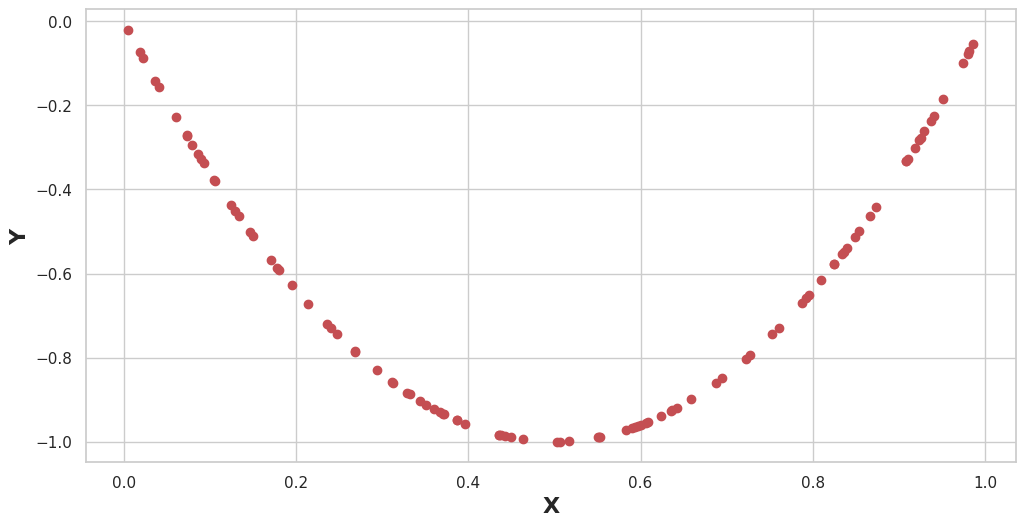

In [3]:
# Genero los puntos
x = np.random.uniform(0, 1, 100)
y = [4 * i * (i - 1) for i in x]

# ploteo
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(x, y, 'or')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Divido en training y validation set usando train_test_split de sklearn usando 1/3 de puntos como validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.33, random_state=42
)

Usamos [Sequential](https://keras.io/api/models/sequential/) de keras para definir un modelo tipo stack de capas: vamos a usar ahora solo capas tipo [Dense](https://keras.io/api/layers/core_layers/dense/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Usamos para regresiones como activación de la última capa un función de tipo lineal

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

Luego de definir todas las capas tenemos que compilar el modelo para definir la función de pérdida, el optimizador y la métrica. Esto es necesario para poder después entrenar el modelo.

In [8]:
model.compile(
    loss='mean_squared_error', optimizer="SGD", metrics=['mean_squared_error']
)

Vamos a guardar el [.fit ](https://keras.io/api/models/model_training_apis/) del modelo en una variable para después plotear el aprendizaje. Podemos pasar como parámetros el set de validación para ir evaluando en cada paso del entrenamiento, además de evaluar el de entrenamiento. Podemos cambiar la cantidad de información que nos muestra con verbose y además tenemos que decirle la cantidad de épocas que queremos entrenar.

In [9]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=200,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/200
 - 0s - loss: 0.7840 - mean_squared_error: 0.7840 - val_loss: 0.6739 - val_mean_squared_error: 0.6739


Epoch 2/200
 - 0s - loss: 0.5876 - mean_squared_error: 0.5876 - val_loss: 0.5042 - val_mean_squared_error: 0.5042


Epoch 3/200
 - 0s - loss: 0.4449 - mean_squared_error: 0.4449 - val_loss: 0.3654 - val_mean_squared_error: 0.3654


Epoch 4/200
 - 0s - loss: 0.3324 - mean_squared_error: 0.3324 - val_loss: 0.2921 - val_mean_squared_error: 0.2921


Epoch 5/200
 - 0s - loss: 0.2732 - mean_squared_error: 0.2732 - val_loss: 0.2233 - val_mean_squared_error: 0.2233


Epoch 6/200
 - 0s - loss: 0.2203 - mean_squared_error: 0.2203 - val_loss: 0.1874 - val_mean_squared_error: 0.1874


Epoch 7/200
 - 0s - loss: 0.1928 - mean_squared_error: 0.1928 - val_loss: 0.1496 - val_mean_squared_error: 0.1496


Epoch 8/200
 - 0s - loss: 0.1656 - mean_squared_error: 0.1656 - val_loss: 0.1314 - val_mean_squared_error: 0.1314


Epoch 9/200
 - 0s - loss: 0.1527 - mean_squared_error: 0.1527 - val_loss: 0.1125 - val_mean_squared_error: 0.1125


Epoch 10/200
 - 0s - loss: 0.1400 - mean_squared_error: 0.1400 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 11/200
 - 0s - loss: 0.1308 - mean_squared_error: 0.1308 - val_loss: 0.0901 - val_mean_squared_error: 0.0901


Epoch 12/200
 - 0s - loss: 0.1258 - mean_squared_error: 0.1258 - val_loss: 0.0806 - val_mean_squared_error: 0.0806


Epoch 13/200
 - 0s - loss: 0.1209 - mean_squared_error: 0.1209 - val_loss: 0.0770 - val_mean_squared_error: 0.0770


Epoch 14/200
 - 0s - loss: 0.1188 - mean_squared_error: 0.1188 - val_loss: 0.0710 - val_mean_squared_error: 0.0710


Epoch 15/200
 - 0s - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.0678 - val_mean_squared_error: 0.0678


Epoch 16/200
 - 0s - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.0660 - val_mean_squared_error: 0.0660


Epoch 17/200
 - 0s - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.0631 - val_mean_squared_error: 0.0631


Epoch 18/200
 - 0s - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.0608 - val_mean_squared_error: 0.0608


Epoch 19/200
 - 0s - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 20/200
 - 0s - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.0567 - val_mean_squared_error: 0.0567


Epoch 21/200
 - 0s - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.0561 - val_mean_squared_error: 0.0561


Epoch 22/200
 - 0s - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.0576 - val_mean_squared_error: 0.0576


Epoch 23/200
 - 0s - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0573 - val_mean_squared_error: 0.0573


Epoch 24/200
 - 0s - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.0574 - val_mean_squared_error: 0.0574


Epoch 25/200
 - 0s - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.0568 - val_mean_squared_error: 0.0568


Epoch 26/200
 - 0s - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0563 - val_mean_squared_error: 0.0563


Epoch 27/200
 - 0s - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0577 - val_mean_squared_error: 0.0577


Epoch 28/200
 - 0s - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.0591 - val_mean_squared_error: 0.0591


Epoch 29/200
 - 0s - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0585 - val_mean_squared_error: 0.0585


Epoch 30/200
 - 0s - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.0576 - val_mean_squared_error: 0.0576


Epoch 31/200
 - 0s - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0575 - val_mean_squared_error: 0.0575


Epoch 32/200
 - 0s - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.0592 - val_mean_squared_error: 0.0592


Epoch 33/200
 - 0s - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0581 - val_mean_squared_error: 0.0581


Epoch 34/200
 - 0s - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.0573 - val_mean_squared_error: 0.0573


Epoch 35/200
 - 0s - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.0587 - val_mean_squared_error: 0.0587


Epoch 36/200
 - 0s - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.0583 - val_mean_squared_error: 0.0583


Epoch 37/200
 - 0s - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.0589 - val_mean_squared_error: 0.0589


Epoch 38/200
 - 0s - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.0584 - val_mean_squared_error: 0.0584


Epoch 39/200
 - 0s - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.0582 - val_mean_squared_error: 0.0582


Epoch 40/200
 - 0s - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.0594 - val_mean_squared_error: 0.0594


Epoch 41/200
 - 0s - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.0609 - val_mean_squared_error: 0.0609


Epoch 42/200
 - 0s - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.0590 - val_mean_squared_error: 0.0590


Epoch 43/200
 - 0s - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.0581 - val_mean_squared_error: 0.0581


Epoch 44/200
 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0555 - val_mean_squared_error: 0.0555


Epoch 45/200
 - 0s - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.0543 - val_mean_squared_error: 0.0543


Epoch 46/200


 - 0s - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.0573 - val_mean_squared_error: 0.0573


Epoch 47/200


 - 0s - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.0563 - val_mean_squared_error: 0.0563


Epoch 48/200


 - 0s - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 49/200


 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0555 - val_mean_squared_error: 0.0555


Epoch 50/200


 - 0s - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 51/200


 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0585 - val_mean_squared_error: 0.0585


Epoch 52/200
 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 53/200
 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0565 - val_mean_squared_error: 0.0565


Epoch 54/200
 - 0s - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 55/200


 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0536 - val_mean_squared_error: 0.0536


Epoch 56/200


 - 0s - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.0540 - val_mean_squared_error: 0.0540


Epoch 57/200


 - 0s - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.0556 - val_mean_squared_error: 0.0556


Epoch 58/200


 - 0s - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.0552 - val_mean_squared_error: 0.0552


Epoch 59/200


 - 0s - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.0542 - val_mean_squared_error: 0.0542


Epoch 60/200
 - 0s - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 61/200


 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0551 - val_mean_squared_error: 0.0551


Epoch 62/200
 - 0s - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.0577 - val_mean_squared_error: 0.0577


Epoch 63/200


 - 0s - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.0584 - val_mean_squared_error: 0.0584


Epoch 64/200


 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0572 - val_mean_squared_error: 0.0572


Epoch 65/200


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0558 - val_mean_squared_error: 0.0558


Epoch 66/200
 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0560 - val_mean_squared_error: 0.0560


Epoch 67/200
 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0546 - val_mean_squared_error: 0.0546


Epoch 68/200
 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0556 - val_mean_squared_error: 0.0556


Epoch 69/200
 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0538 - val_mean_squared_error: 0.0538


Epoch 70/200
 - 0s - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.0542 - val_mean_squared_error: 0.0542


Epoch 71/200


 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0558 - val_mean_squared_error: 0.0558


Epoch 72/200
 - 0s - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.0541 - val_mean_squared_error: 0.0541


Epoch 73/200


 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 74/200


 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0567 - val_mean_squared_error: 0.0567


Epoch 75/200


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0581 - val_mean_squared_error: 0.0581


Epoch 76/200


 - 0s - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.0575 - val_mean_squared_error: 0.0575


Epoch 77/200


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0609 - val_mean_squared_error: 0.0609


Epoch 78/200


 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0636 - val_mean_squared_error: 0.0636


Epoch 79/200
 - 0s - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.0596 - val_mean_squared_error: 0.0596


Epoch 80/200
 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0584 - val_mean_squared_error: 0.0584


Epoch 81/200


 - 0s - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.0576 - val_mean_squared_error: 0.0576


Epoch 82/200


 - 0s - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.0576 - val_mean_squared_error: 0.0576


Epoch 83/200


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0587 - val_mean_squared_error: 0.0587


Epoch 84/200


 - 0s - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 85/200


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0565 - val_mean_squared_error: 0.0565


Epoch 86/200


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0568 - val_mean_squared_error: 0.0568


Epoch 87/200


 - 0s - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.0570 - val_mean_squared_error: 0.0570


Epoch 88/200
 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 89/200


 - 0s - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 90/200


 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0584 - val_mean_squared_error: 0.0584


Epoch 91/200


 - 0s - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.0574 - val_mean_squared_error: 0.0574


Epoch 92/200


 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0592 - val_mean_squared_error: 0.0592


Epoch 93/200


 - 0s - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.0596 - val_mean_squared_error: 0.0596


Epoch 94/200


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0595 - val_mean_squared_error: 0.0595


Epoch 95/200


 - 0s - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.0573 - val_mean_squared_error: 0.0573


Epoch 96/200


 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0582 - val_mean_squared_error: 0.0582


Epoch 97/200
 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0573 - val_mean_squared_error: 0.0573


Epoch 98/200


 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 99/200


 - 0s - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.0601 - val_mean_squared_error: 0.0601


Epoch 100/200


 - 0s - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.0602 - val_mean_squared_error: 0.0602


Epoch 101/200
 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0613 - val_mean_squared_error: 0.0613


Epoch 102/200


 - 0s - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.0627 - val_mean_squared_error: 0.0627


Epoch 103/200


 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0597 - val_mean_squared_error: 0.0597


Epoch 104/200


 - 0s - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.0624 - val_mean_squared_error: 0.0624


Epoch 105/200


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0587 - val_mean_squared_error: 0.0587


Epoch 106/200


 - 0s - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.0598 - val_mean_squared_error: 0.0598


Epoch 107/200


 - 0s - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.0568 - val_mean_squared_error: 0.0568


Epoch 108/200


 - 0s - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.0587 - val_mean_squared_error: 0.0587


Epoch 109/200


 - 0s - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.0619 - val_mean_squared_error: 0.0619


Epoch 110/200


 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0598 - val_mean_squared_error: 0.0598


Epoch 111/200


 - 0s - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.0599 - val_mean_squared_error: 0.0599


Epoch 112/200


 - 0s - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.0567 - val_mean_squared_error: 0.0567


Epoch 113/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0588 - val_mean_squared_error: 0.0588


Epoch 114/200


 - 0s - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.0595 - val_mean_squared_error: 0.0595


Epoch 115/200


 - 0s - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.0606 - val_mean_squared_error: 0.0606


Epoch 116/200


 - 0s - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.0615 - val_mean_squared_error: 0.0615


Epoch 117/200


 - 0s - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.0642 - val_mean_squared_error: 0.0642


Epoch 118/200


 - 0s - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.0638 - val_mean_squared_error: 0.0638


Epoch 119/200


 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0633 - val_mean_squared_error: 0.0633


Epoch 120/200


 - 0s - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.0612 - val_mean_squared_error: 0.0612


Epoch 121/200


 - 0s - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.0620 - val_mean_squared_error: 0.0620


Epoch 122/200


 - 0s - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.0597 - val_mean_squared_error: 0.0597


Epoch 123/200


 - 0s - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.0612 - val_mean_squared_error: 0.0612


Epoch 124/200


 - 0s - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.0591 - val_mean_squared_error: 0.0591


Epoch 125/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0562 - val_mean_squared_error: 0.0562


Epoch 126/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0588 - val_mean_squared_error: 0.0588


Epoch 127/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0604 - val_mean_squared_error: 0.0604


Epoch 128/200


 - 0s - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.0601 - val_mean_squared_error: 0.0601


Epoch 129/200


 - 0s - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.0570 - val_mean_squared_error: 0.0570


Epoch 130/200

 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0552 - val_mean_squared_error: 0.0552


Epoch 131/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0554 - val_mean_squared_error: 0.0554


Epoch 132/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0565 - val_mean_squared_error: 0.0565


Epoch 133/200


 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0554 - val_mean_squared_error: 0.0554


Epoch 134/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0580 - val_mean_squared_error: 0.0580


Epoch 135/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0587 - val_mean_squared_error: 0.0587


Epoch 136/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0583 - val_mean_squared_error: 0.0583


Epoch 137/200
 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0595 - val_mean_squared_error: 0.0595


Epoch 138/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0583 - val_mean_squared_error: 0.0583


Epoch 139/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0585 - val_mean_squared_error: 0.0585


Epoch 140/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0575 - val_mean_squared_error: 0.0575


Epoch 141/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0582 - val_mean_squared_error: 0.0582


Epoch 142/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0562 - val_mean_squared_error: 0.0562


Epoch 143/200
 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0554 - val_mean_squared_error: 0.0554


Epoch 144/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0552 - val_mean_squared_error: 0.0552


Epoch 145/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0544 - val_mean_squared_error: 0.0544


Epoch 146/200


 - 0s - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.0543 - val_mean_squared_error: 0.0543


Epoch 147/200


 - 0s - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.0532 - val_mean_squared_error: 0.0532


Epoch 148/200


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0549 - val_mean_squared_error: 0.0549


Epoch 149/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 150/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0549 - val_mean_squared_error: 0.0549


Epoch 151/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0554 - val_mean_squared_error: 0.0554


Epoch 152/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0562 - val_mean_squared_error: 0.0562


Epoch 153/200


 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 154/200


 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0569 - val_mean_squared_error: 0.0569


Epoch 155/200


 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0575 - val_mean_squared_error: 0.0575


Epoch 156/200


 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0565 - val_mean_squared_error: 0.0565


Epoch 157/200


 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0565 - val_mean_squared_error: 0.0565


Epoch 158/200


 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0554 - val_mean_squared_error: 0.0554


Epoch 159/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0553 - val_mean_squared_error: 0.0553


Epoch 160/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0593 - val_mean_squared_error: 0.0593


Epoch 161/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0585 - val_mean_squared_error: 0.0585


Epoch 162/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0602 - val_mean_squared_error: 0.0602


Epoch 163/200


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0583 - val_mean_squared_error: 0.0583


Epoch 164/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0554 - val_mean_squared_error: 0.0554


Epoch 165/200


 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0552 - val_mean_squared_error: 0.0552


Epoch 166/200


 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0543 - val_mean_squared_error: 0.0543


Epoch 167/200


 - 0s - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.0549 - val_mean_squared_error: 0.0549


Epoch 168/200


 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0559 - val_mean_squared_error: 0.0559


Epoch 169/200


 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0552 - val_mean_squared_error: 0.0552


Epoch 170/200
 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0568 - val_mean_squared_error: 0.0568


Epoch 171/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0555 - val_mean_squared_error: 0.0555


Epoch 172/200


 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0569 - val_mean_squared_error: 0.0569


Epoch 173/200


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0551 - val_mean_squared_error: 0.0551


Epoch 174/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0549 - val_mean_squared_error: 0.0549


Epoch 175/200
 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0560 - val_mean_squared_error: 0.0560


Epoch 176/200


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0574 - val_mean_squared_error: 0.0574


Epoch 177/200


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0566 - val_mean_squared_error: 0.0566


Epoch 178/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0565 - val_mean_squared_error: 0.0565


Epoch 179/200


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 180/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0550 - val_mean_squared_error: 0.0550


Epoch 181/200
 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0547 - val_mean_squared_error: 0.0547


Epoch 182/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0564 - val_mean_squared_error: 0.0564


Epoch 183/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0556 - val_mean_squared_error: 0.0556


Epoch 184/200


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0555 - val_mean_squared_error: 0.0555


Epoch 185/200


 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 186/200


 - 0s - loss: 0.1090 - mean_squared_error: 0.1090 - val_loss: 0.0575 - val_mean_squared_error: 0.0575


Epoch 187/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0558 - val_mean_squared_error: 0.0558


Epoch 188/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 189/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0582 - val_mean_squared_error: 0.0582


Epoch 190/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0556 - val_mean_squared_error: 0.0556


Epoch 191/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0556 - val_mean_squared_error: 0.0556


Epoch 192/200


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0569 - val_mean_squared_error: 0.0569


Epoch 193/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0600 - val_mean_squared_error: 0.0600


Epoch 194/200


 - 0s - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.0590 - val_mean_squared_error: 0.0590


Epoch 195/200


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 196/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0574 - val_mean_squared_error: 0.0574


Epoch 197/200


 - 0s - loss: 0.1090 - mean_squared_error: 0.1090 - val_loss: 0.0573 - val_mean_squared_error: 0.0573


Epoch 198/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0595 - val_mean_squared_error: 0.0595


Epoch 199/200


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0580 - val_mean_squared_error: 0.0580


Epoch 200/200
 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0599 - val_mean_squared_error: 0.0599


Vemos el predict de los puntos de validación y ploteamos

In [10]:
pred = model.predict(X_validation)

Text(0, 0.5, 'Y')

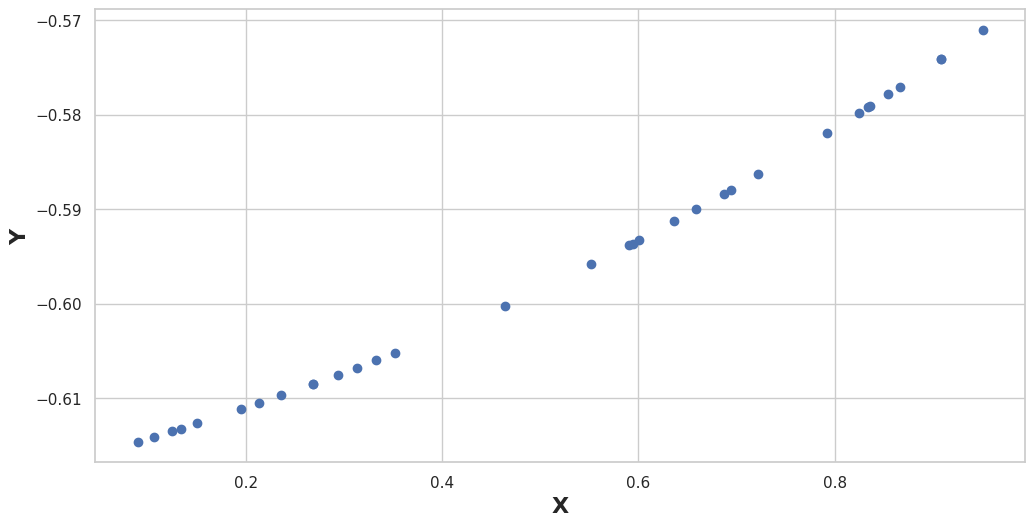

In [11]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Vemos que si bien aprendio parte del comportamiento de la función, podríamos intentar mejorar el aprendizaje.

`.history` del `.fit` es un JSON que tiene los valores impresos durante el entramiento(métricas y loss)

In [12]:
history.history

{'val_loss': [0.6739221447796533,
  0.5041879583714586,
  0.36538568429761764,
  0.29208765786747926,
  0.22328310199505227,
  0.1874192526253561,
  0.14955422905922838,
  0.13141337872454614,
  0.1125255533014283,
  0.09762829587315068,
  0.0900691652839834,
  0.08062073746413896,
  0.0769698993500435,
  0.07104528018019417,
  0.06775948947126215,
  0.0660290616479787,
  0.06307685442946175,
  0.06083357266404412,
  0.05785274234685031,
  0.056692444013826775,
  0.05609917166558179,
  0.0575957072503639,
  0.05727544697848233,
  0.05742950602011247,
  0.05675641469883196,
  0.05630029263821515,
  0.05767051830436244,
  0.05913027172738856,
  0.0584682102004687,
  0.05760647198467544,
  0.057452124853928886,
  0.05917682295495814,
  0.05806717299150698,
  0.057347296539581184,
  0.058667795224623245,
  0.05832477388056842,
  0.05892652363488168,
  0.05843745871926799,
  0.05821693485433405,
  0.059431551080761535,
  0.060867769925883324,
  0.05896633140968554,
  0.05810184934825608,
  

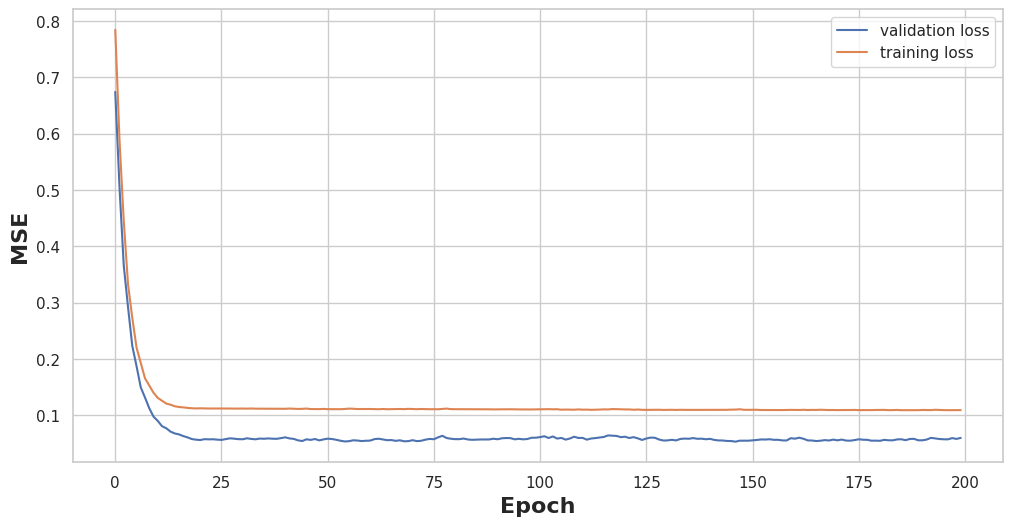

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [15]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

In [16]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=500,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/500
 - 0s - loss: 1.1075 - mean_squared_error: 1.1075 - val_loss: 0.2003 - val_mean_squared_error: 0.2003


Epoch 2/500
 - 0s - loss: 0.1994 - mean_squared_error: 0.1994 - val_loss: 0.1501 - val_mean_squared_error: 0.1501


Epoch 3/500
 - 0s - loss: 0.1632 - mean_squared_error: 0.1632 - val_loss: 0.0659 - val_mean_squared_error: 0.0659


Epoch 4/500
 - 0s - loss: 0.1409 - mean_squared_error: 0.1409 - val_loss: 0.0658 - val_mean_squared_error: 0.0658


Epoch 5/500
 - 0s - loss: 0.1435 - mean_squared_error: 0.1435 - val_loss: 0.0622 - val_mean_squared_error: 0.0622


Epoch 6/500
 - 0s - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 0.0807 - val_mean_squared_error: 0.0807


Epoch 7/500
 - 0s - loss: 0.1289 - mean_squared_error: 0.1289 - val_loss: 0.0610 - val_mean_squared_error: 0.0610


Epoch 8/500
 - 0s - loss: 0.1277 - mean_squared_error: 0.1277 - val_loss: 0.0602 - val_mean_squared_error: 0.0602


Epoch 9/500
 - 0s - loss: 0.1229 - mean_squared_error: 0.1229 - val_loss: 0.0904 - val_mean_squared_error: 0.0904


Epoch 10/500
 - 0s - loss: 0.1292 - mean_squared_error: 0.1292 - val_loss: 0.0643 - val_mean_squared_error: 0.0643


Epoch 11/500
 - 0s - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 0.0555 - val_mean_squared_error: 0.0555


Epoch 12/500
 - 0s - loss: 0.1240 - mean_squared_error: 0.1240 - val_loss: 0.0557 - val_mean_squared_error: 0.0557


Epoch 13/500
 - 0s - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.0553 - val_mean_squared_error: 0.0553


Epoch 14/500
 - 0s - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.0555 - val_mean_squared_error: 0.0555


Epoch 15/500
 - 0s - loss: 0.1175 - mean_squared_error: 0.1175 - val_loss: 0.0746 - val_mean_squared_error: 0.0746


Epoch 16/500
 - 0s - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.0602 - val_mean_squared_error: 0.0602


Epoch 17/500
 - 0s - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 18/500
 - 0s - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.0574 - val_mean_squared_error: 0.0574


Epoch 19/500
 - 0s - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.0538 - val_mean_squared_error: 0.0538


Epoch 20/500
 - 0s - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 21/500
 - 0s - loss: 0.1257 - mean_squared_error: 0.1257 - val_loss: 0.0821 - val_mean_squared_error: 0.0821


Epoch 22/500
 - 0s - loss: 0.1184 - mean_squared_error: 0.1184 - val_loss: 0.0630 - val_mean_squared_error: 0.0630


Epoch 23/500
 - 0s - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 24/500
 - 0s - loss: 0.1286 - mean_squared_error: 0.1286 - val_loss: 0.1052 - val_mean_squared_error: 0.1052


Epoch 25/500
 - 0s - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 26/500
 - 0s - loss: 0.1265 - mean_squared_error: 0.1265 - val_loss: 0.0737 - val_mean_squared_error: 0.0737


Epoch 27/500
 - 0s - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.0552 - val_mean_squared_error: 0.0552


Epoch 28/500
 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0706 - val_mean_squared_error: 0.0706


Epoch 29/500
 - 0s - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 30/500
 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0565 - val_mean_squared_error: 0.0565


Epoch 31/500
 - 0s - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.0640 - val_mean_squared_error: 0.0640


Epoch 32/500
 - 0s - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.0527 - val_mean_squared_error: 0.0527


Epoch 33/500


 - 0s - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.0533 - val_mean_squared_error: 0.0533


Epoch 34/500
 - 0s - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.0528 - val_mean_squared_error: 0.0528


Epoch 35/500
 - 0s - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.0530 - val_mean_squared_error: 0.0530


Epoch 36/500
 - 0s - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.0622 - val_mean_squared_error: 0.0622


Epoch 37/500
 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0918 - val_mean_squared_error: 0.0918


Epoch 38/500
 - 0s - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.0792 - val_mean_squared_error: 0.0792


Epoch 39/500
 - 0s - loss: 0.1155 - mean_squared_error: 0.1155 - val_loss: 0.0637 - val_mean_squared_error: 0.0637


Epoch 40/500
 - 0s - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.0530 - val_mean_squared_error: 0.0530


Epoch 41/500
 - 0s - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.0535 - val_mean_squared_error: 0.0535


Epoch 42/500
 - 0s - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.0584 - val_mean_squared_error: 0.0584


Epoch 43/500
 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0550 - val_mean_squared_error: 0.0550


Epoch 44/500
 - 0s - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 0.0539 - val_mean_squared_error: 0.0539


Epoch 45/500


 - 0s - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.0530 - val_mean_squared_error: 0.0530


Epoch 46/500
 - 0s - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.0531 - val_mean_squared_error: 0.0531


Epoch 47/500


 - 0s - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 48/500
 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0822 - val_mean_squared_error: 0.0822


Epoch 49/500
 - 0s - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.0740 - val_mean_squared_error: 0.0740


Epoch 50/500
 - 0s - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.0604 - val_mean_squared_error: 0.0604


Epoch 51/500


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0606 - val_mean_squared_error: 0.0606


Epoch 52/500


 - 0s - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.0823 - val_mean_squared_error: 0.0823


Epoch 53/500


 - 0s - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.0567 - val_mean_squared_error: 0.0567


Epoch 54/500


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0690 - val_mean_squared_error: 0.0690


Epoch 55/500


 - 0s - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.0646 - val_mean_squared_error: 0.0646


Epoch 56/500


 - 0s - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.0547 - val_mean_squared_error: 0.0547


Epoch 57/500


 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 58/500


 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0530 - val_mean_squared_error: 0.0530


Epoch 59/500
 - 0s - loss: 0.1142 - mean_squared_error: 0.1142 - val_loss: 0.0562 - val_mean_squared_error: 0.0562


Epoch 60/500
 - 0s - loss: 0.1195 - mean_squared_error: 0.1195 - val_loss: 0.0697 - val_mean_squared_error: 0.0697


Epoch 61/500
 - 0s - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.0914 - val_mean_squared_error: 0.0914


Epoch 62/500
 - 0s - loss: 0.1237 - mean_squared_error: 0.1237 - val_loss: 0.0859 - val_mean_squared_error: 0.0859


Epoch 63/500


 - 0s - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.1076 - val_mean_squared_error: 0.1076


Epoch 64/500


 - 0s - loss: 0.1292 - mean_squared_error: 0.1292 - val_loss: 0.0581 - val_mean_squared_error: 0.0581


Epoch 65/500


 - 0s - loss: 0.1090 - mean_squared_error: 0.1090 - val_loss: 0.0901 - val_mean_squared_error: 0.0901


Epoch 66/500
 - 0s - loss: 0.1241 - mean_squared_error: 0.1241 - val_loss: 0.0636 - val_mean_squared_error: 0.0636


Epoch 67/500


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0603 - val_mean_squared_error: 0.0603


Epoch 68/500


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0633 - val_mean_squared_error: 0.0633


Epoch 69/500


 - 0s - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 70/500


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0690 - val_mean_squared_error: 0.0690


Epoch 71/500
 - 0s - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.0630 - val_mean_squared_error: 0.0630


Epoch 72/500
 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0556 - val_mean_squared_error: 0.0556


Epoch 73/500
 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0664 - val_mean_squared_error: 0.0664


Epoch 74/500


 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0620 - val_mean_squared_error: 0.0620


Epoch 75/500
 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0662 - val_mean_squared_error: 0.0662


Epoch 76/500


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0578 - val_mean_squared_error: 0.0578


Epoch 77/500


 - 0s - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.0547 - val_mean_squared_error: 0.0547


Epoch 78/500


 - 0s - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.0558 - val_mean_squared_error: 0.0558


Epoch 79/500


 - 0s - loss: 0.1084 - mean_squared_error: 0.1084 - val_loss: 0.0590 - val_mean_squared_error: 0.0590


Epoch 80/500
 - 0s - loss: 0.1084 - mean_squared_error: 0.1084 - val_loss: 0.0546 - val_mean_squared_error: 0.0546


Epoch 81/500
 - 0s - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.0540 - val_mean_squared_error: 0.0540


Epoch 82/500
 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.0532 - val_mean_squared_error: 0.0532


Epoch 83/500
 - 0s - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.0526 - val_mean_squared_error: 0.0526


Epoch 84/500
 - 0s - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.0816 - val_mean_squared_error: 0.0816


Epoch 85/500


 - 0s - loss: 0.1174 - mean_squared_error: 0.1174 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 86/500


 - 0s - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.0587 - val_mean_squared_error: 0.0587


Epoch 87/500
 - 0s - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.0643 - val_mean_squared_error: 0.0643


Epoch 88/500
 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0575 - val_mean_squared_error: 0.0575


Epoch 89/500


 - 0s - loss: 0.1086 - mean_squared_error: 0.1086 - val_loss: 0.0522 - val_mean_squared_error: 0.0522


Epoch 90/500


 - 0s - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.0522 - val_mean_squared_error: 0.0522


Epoch 91/500


 - 0s - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.0521 - val_mean_squared_error: 0.0521


Epoch 92/500


 - 0s - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.0563 - val_mean_squared_error: 0.0563


Epoch 93/500


 - 0s - loss: 0.1080 - mean_squared_error: 0.1080 - val_loss: 0.0535 - val_mean_squared_error: 0.0535


Epoch 94/500


 - 0s - loss: 0.1084 - mean_squared_error: 0.1084 - val_loss: 0.0568 - val_mean_squared_error: 0.0568


Epoch 95/500


 - 0s - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.0586 - val_mean_squared_error: 0.0586


Epoch 96/500


 - 0s - loss: 0.1074 - mean_squared_error: 0.1074 - val_loss: 0.0535 - val_mean_squared_error: 0.0535


Epoch 97/500


 - 0s - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.0594 - val_mean_squared_error: 0.0594


Epoch 98/500


 - 0s - loss: 0.1088 - mean_squared_error: 0.1088 - val_loss: 0.0568 - val_mean_squared_error: 0.0568


Epoch 99/500


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0542 - val_mean_squared_error: 0.0542


Epoch 100/500


 - 0s - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.0567 - val_mean_squared_error: 0.0567


Epoch 101/500


 - 0s - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.0547 - val_mean_squared_error: 0.0547


Epoch 102/500
 - 0s - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.0519 - val_mean_squared_error: 0.0519


Epoch 103/500


 - 0s - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.0599 - val_mean_squared_error: 0.0599


Epoch 104/500


 - 0s - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.0577 - val_mean_squared_error: 0.0577


Epoch 105/500


 - 0s - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 106/500


 - 0s - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.0574 - val_mean_squared_error: 0.0574


Epoch 107/500


 - 0s - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.0909 - val_mean_squared_error: 0.0909


Epoch 108/500


 - 0s - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.0600 - val_mean_squared_error: 0.0600


Epoch 109/500


 - 0s - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.0664 - val_mean_squared_error: 0.0664


Epoch 110/500


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0826 - val_mean_squared_error: 0.0826


Epoch 111/500


 - 0s - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.0692 - val_mean_squared_error: 0.0692


Epoch 112/500


 - 0s - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.0656 - val_mean_squared_error: 0.0656


Epoch 113/500


 - 0s - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.0525 - val_mean_squared_error: 0.0525


Epoch 114/500


 - 0s - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.0521 - val_mean_squared_error: 0.0521


Epoch 115/500
 - 0s - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.0524 - val_mean_squared_error: 0.0524


Epoch 116/500


 - 0s - loss: 0.1085 - mean_squared_error: 0.1085 - val_loss: 0.0617 - val_mean_squared_error: 0.0617


Epoch 117/500


 - 0s - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.0624 - val_mean_squared_error: 0.0624


Epoch 118/500


 - 0s - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.0698 - val_mean_squared_error: 0.0698


Epoch 119/500


 - 0s - loss: 0.1090 - mean_squared_error: 0.1090 - val_loss: 0.0617 - val_mean_squared_error: 0.0617


Epoch 120/500


 - 0s - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.0694 - val_mean_squared_error: 0.0694


Epoch 121/500


 - 0s - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.0519 - val_mean_squared_error: 0.0519


Epoch 122/500


 - 0s - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.0714 - val_mean_squared_error: 0.0714


Epoch 123/500


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0553 - val_mean_squared_error: 0.0553


Epoch 124/500


 - 0s - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.0520 - val_mean_squared_error: 0.0520


Epoch 125/500


 - 0s - loss: 0.1074 - mean_squared_error: 0.1074 - val_loss: 0.0627 - val_mean_squared_error: 0.0627


Epoch 126/500


 - 0s - loss: 0.1069 - mean_squared_error: 0.1069 - val_loss: 0.0779 - val_mean_squared_error: 0.0779


Epoch 127/500


 - 0s - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0756 - val_mean_squared_error: 0.0756


Epoch 128/500


 - 0s - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 129/500


 - 0s - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.0629 - val_mean_squared_error: 0.0629


Epoch 130/500


 - 0s - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.0525 - val_mean_squared_error: 0.0525


Epoch 131/500


 - 0s - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.0506 - val_mean_squared_error: 0.0506


Epoch 132/500


 - 0s - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.0832 - val_mean_squared_error: 0.0832


Epoch 133/500


 - 0s - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.0558 - val_mean_squared_error: 0.0558


Epoch 134/500


 - 0s - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.0610 - val_mean_squared_error: 0.0610


Epoch 135/500


 - 0s - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.0594 - val_mean_squared_error: 0.0594


Epoch 136/500


 - 0s - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.0689 - val_mean_squared_error: 0.0689


Epoch 137/500


 - 0s - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.0531 - val_mean_squared_error: 0.0531


Epoch 138/500


 - 0s - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 139/500


 - 0s - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.0598 - val_mean_squared_error: 0.0598


Epoch 140/500


 - 0s - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.0685 - val_mean_squared_error: 0.0685


Epoch 141/500


 - 0s - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.0924 - val_mean_squared_error: 0.0924


Epoch 142/500


 - 0s - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.1168 - val_mean_squared_error: 0.1168


Epoch 143/500


 - 0s - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.0578 - val_mean_squared_error: 0.0578


Epoch 144/500


 - 0s - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.0526 - val_mean_squared_error: 0.0526


Epoch 145/500


 - 0s - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 146/500


 - 0s - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.0509 - val_mean_squared_error: 0.0509


Epoch 147/500


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0555 - val_mean_squared_error: 0.0555


Epoch 148/500


 - 0s - loss: 0.1027 - mean_squared_error: 0.1027 - val_loss: 0.0515 - val_mean_squared_error: 0.0515


Epoch 149/500


 - 0s - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.0641 - val_mean_squared_error: 0.0641


Epoch 150/500


 - 0s - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.0737 - val_mean_squared_error: 0.0737


Epoch 151/500


 - 0s - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.0655 - val_mean_squared_error: 0.0655


Epoch 152/500


 - 0s - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.0508 - val_mean_squared_error: 0.0508


Epoch 153/500


 - 0s - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.0500 - val_mean_squared_error: 0.0500


Epoch 154/500


 - 0s - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 0.0503 - val_mean_squared_error: 0.0503


Epoch 155/500


 - 0s - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.0598 - val_mean_squared_error: 0.0598


Epoch 156/500


 - 0s - loss: 0.1027 - mean_squared_error: 0.1027 - val_loss: 0.0497 - val_mean_squared_error: 0.0497


Epoch 157/500


 - 0s - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.0586 - val_mean_squared_error: 0.0586


Epoch 158/500


 - 0s - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.0561 - val_mean_squared_error: 0.0561


Epoch 159/500


 - 0s - loss: 0.1021 - mean_squared_error: 0.1021 - val_loss: 0.0505 - val_mean_squared_error: 0.0505


Epoch 160/500


 - 0s - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.0515 - val_mean_squared_error: 0.0515


Epoch 161/500


 - 0s - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.0532 - val_mean_squared_error: 0.0532


Epoch 162/500
 - 0s - loss: 0.1016 - mean_squared_error: 0.1016 - val_loss: 0.0508 - val_mean_squared_error: 0.0508


Epoch 163/500
 - 0s - loss: 0.1061 - mean_squared_error: 0.1061 - val_loss: 0.0577 - val_mean_squared_error: 0.0577


Epoch 164/500


 - 0s - loss: 0.1021 - mean_squared_error: 0.1021 - val_loss: 0.0552 - val_mean_squared_error: 0.0552


Epoch 165/500


 - 0s - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.0724 - val_mean_squared_error: 0.0724


Epoch 166/500


 - 0s - loss: 0.1052 - mean_squared_error: 0.1052 - val_loss: 0.0534 - val_mean_squared_error: 0.0534


Epoch 167/500


 - 0s - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 168/500


 - 0s - loss: 0.0999 - mean_squared_error: 0.0999 - val_loss: 0.0501 - val_mean_squared_error: 0.0501


Epoch 169/500


 - 0s - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.0638 - val_mean_squared_error: 0.0638


Epoch 170/500


 - 0s - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.0515 - val_mean_squared_error: 0.0515


Epoch 171/500


 - 0s - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.0508 - val_mean_squared_error: 0.0508


Epoch 172/500
 - 0s - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.0560 - val_mean_squared_error: 0.0560


Epoch 173/500
 - 0s - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.0583 - val_mean_squared_error: 0.0583


Epoch 174/500


 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.0543 - val_mean_squared_error: 0.0543


Epoch 175/500


 - 0s - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.0590 - val_mean_squared_error: 0.0590


Epoch 176/500


 - 0s - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.0952 - val_mean_squared_error: 0.0952


Epoch 177/500


 - 0s - loss: 0.1142 - mean_squared_error: 0.1142 - val_loss: 0.0590 - val_mean_squared_error: 0.0590


Epoch 178/500


 - 0s - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.0665 - val_mean_squared_error: 0.0665


Epoch 179/500


 - 0s - loss: 0.1021 - mean_squared_error: 0.1021 - val_loss: 0.0656 - val_mean_squared_error: 0.0656


Epoch 180/500


 - 0s - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.0486 - val_mean_squared_error: 0.0486


Epoch 181/500


 - 0s - loss: 0.1021 - mean_squared_error: 0.1021 - val_loss: 0.0535 - val_mean_squared_error: 0.0535


Epoch 182/500


 - 0s - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.0541 - val_mean_squared_error: 0.0541


Epoch 183/500


 - 0s - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.0493 - val_mean_squared_error: 0.0493


Epoch 184/500


 - 0s - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.0467 - val_mean_squared_error: 0.0467


Epoch 185/500


 - 0s - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.0473 - val_mean_squared_error: 0.0473


Epoch 186/500


 - 0s - loss: 0.1063 - mean_squared_error: 0.1063 - val_loss: 0.0463 - val_mean_squared_error: 0.0463


Epoch 187/500


 - 0s - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.0520 - val_mean_squared_error: 0.0520


Epoch 188/500


 - 0s - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.0459 - val_mean_squared_error: 0.0459


Epoch 189/500


 - 0s - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.0494 - val_mean_squared_error: 0.0494


Epoch 190/500


 - 0s - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.0489 - val_mean_squared_error: 0.0489


Epoch 191/500


 - 0s - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0481 - val_mean_squared_error: 0.0481


Epoch 192/500


 - 0s - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0536 - val_mean_squared_error: 0.0536


Epoch 193/500


 - 0s - loss: 0.0945 - mean_squared_error: 0.0945 - val_loss: 0.0484 - val_mean_squared_error: 0.0484


Epoch 194/500


 - 0s - loss: 0.1029 - mean_squared_error: 0.1029 - val_loss: 0.0474 - val_mean_squared_error: 0.0474


Epoch 195/500


 - 0s - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.0529 - val_mean_squared_error: 0.0529


Epoch 196/500


 - 0s - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0457 - val_mean_squared_error: 0.0457


Epoch 197/500


 - 0s - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.0484 - val_mean_squared_error: 0.0484


Epoch 198/500


 - 0s - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0567 - val_mean_squared_error: 0.0567


Epoch 199/500


 - 0s - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0550 - val_mean_squared_error: 0.0550


Epoch 200/500


 - 0s - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.0903 - val_mean_squared_error: 0.0903


Epoch 201/500


 - 0s - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.0489 - val_mean_squared_error: 0.0489


Epoch 202/500


 - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0474 - val_mean_squared_error: 0.0474


Epoch 203/500


 - 0s - loss: 0.0915 - mean_squared_error: 0.0915 - val_loss: 0.0451 - val_mean_squared_error: 0.0451


Epoch 204/500


 - 0s - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.0556 - val_mean_squared_error: 0.0556


Epoch 205/500


 - 0s - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.0512 - val_mean_squared_error: 0.0512


Epoch 206/500


 - 0s - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.0448 - val_mean_squared_error: 0.0448


Epoch 207/500


 - 0s - loss: 0.0959 - mean_squared_error: 0.0959 - val_loss: 0.0492 - val_mean_squared_error: 0.0492


Epoch 208/500


 - 0s - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.0455 - val_mean_squared_error: 0.0455


Epoch 209/500


 - 0s - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.0451 - val_mean_squared_error: 0.0451


Epoch 210/500


 - 0s - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.0463 - val_mean_squared_error: 0.0463


Epoch 211/500


 - 0s - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.0452 - val_mean_squared_error: 0.0452


Epoch 212/500


 - 0s - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0504 - val_mean_squared_error: 0.0504


Epoch 213/500


 - 0s - loss: 0.1006 - mean_squared_error: 0.1006 - val_loss: 0.0492 - val_mean_squared_error: 0.0492


Epoch 214/500


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0439 - val_mean_squared_error: 0.0439


Epoch 215/500


 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0492 - val_mean_squared_error: 0.0492


Epoch 216/500


 - 0s - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0465 - val_mean_squared_error: 0.0465


Epoch 217/500


 - 0s - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.0728 - val_mean_squared_error: 0.0728


Epoch 218/500


 - 0s - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.0426 - val_mean_squared_error: 0.0426


Epoch 219/500


 - 0s - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.0439 - val_mean_squared_error: 0.0439


Epoch 220/500


 - 0s - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.0434 - val_mean_squared_error: 0.0434


Epoch 221/500


 - 0s - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.0451 - val_mean_squared_error: 0.0451


Epoch 222/500


 - 0s - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.0422 - val_mean_squared_error: 0.0422


Epoch 223/500


 - 0s - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0430 - val_mean_squared_error: 0.0430


Epoch 224/500


 - 0s - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 225/500


 - 0s - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.0415 - val_mean_squared_error: 0.0415


Epoch 226/500


 - 0s - loss: 0.0855 - mean_squared_error: 0.0855 - val_loss: 0.0408 - val_mean_squared_error: 0.0408


Epoch 227/500


 - 0s - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0412 - val_mean_squared_error: 0.0412


Epoch 228/500


 - 0s - loss: 0.0849 - mean_squared_error: 0.0849 - val_loss: 0.0440 - val_mean_squared_error: 0.0440


Epoch 229/500


 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0410 - val_mean_squared_error: 0.0410


Epoch 230/500


 - 0s - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.0413 - val_mean_squared_error: 0.0413


Epoch 231/500


 - 0s - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.0616 - val_mean_squared_error: 0.0616


Epoch 232/500


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0438 - val_mean_squared_error: 0.0438


Epoch 233/500


 - 0s - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0648 - val_mean_squared_error: 0.0648


Epoch 234/500


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0410 - val_mean_squared_error: 0.0410


Epoch 235/500


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0393 - val_mean_squared_error: 0.0393


Epoch 236/500


 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0406 - val_mean_squared_error: 0.0406


Epoch 237/500
 - 0s - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.0498 - val_mean_squared_error: 0.0498


Epoch 238/500


 - 0s - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0483 - val_mean_squared_error: 0.0483


Epoch 239/500


 - 0s - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0503 - val_mean_squared_error: 0.0503


Epoch 240/500


 - 0s - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.0739 - val_mean_squared_error: 0.0739


Epoch 241/500


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0424 - val_mean_squared_error: 0.0424


Epoch 242/500


 - 0s - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0399 - val_mean_squared_error: 0.0399


Epoch 243/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0437 - val_mean_squared_error: 0.0437


Epoch 244/500


 - 0s - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.0403 - val_mean_squared_error: 0.0403


Epoch 245/500


 - 0s - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0381 - val_mean_squared_error: 0.0381


Epoch 246/500


 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0473 - val_mean_squared_error: 0.0473


Epoch 247/500


 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.0378 - val_mean_squared_error: 0.0378


Epoch 248/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0377 - val_mean_squared_error: 0.0377


Epoch 249/500


 - 0s - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.0374 - val_mean_squared_error: 0.0374


Epoch 250/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0374 - val_mean_squared_error: 0.0374


Epoch 251/500


 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0417 - val_mean_squared_error: 0.0417


Epoch 252/500


 - 0s - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.0485 - val_mean_squared_error: 0.0485


Epoch 253/500


 - 0s - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0422 - val_mean_squared_error: 0.0422


Epoch 254/500


 - 0s - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0375 - val_mean_squared_error: 0.0375


Epoch 255/500


 - 0s - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0401 - val_mean_squared_error: 0.0401


Epoch 256/500


 - 0s - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0452 - val_mean_squared_error: 0.0452


Epoch 257/500


 - 0s - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.0577 - val_mean_squared_error: 0.0577


Epoch 258/500


 - 0s - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.0350 - val_mean_squared_error: 0.0350


Epoch 259/500


 - 0s - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0355 - val_mean_squared_error: 0.0355


Epoch 260/500
 - 0s - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0541 - val_mean_squared_error: 0.0541


Epoch 261/500


 - 0s - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.0355 - val_mean_squared_error: 0.0355


Epoch 262/500


 - 0s - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.0429 - val_mean_squared_error: 0.0429


Epoch 263/500


 - 0s - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0386 - val_mean_squared_error: 0.0386


Epoch 264/500


 - 0s - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0395 - val_mean_squared_error: 0.0395


Epoch 265/500
 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0339 - val_mean_squared_error: 0.0339


Epoch 266/500


 - 0s - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0547 - val_mean_squared_error: 0.0547


Epoch 267/500


 - 0s - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.0340 - val_mean_squared_error: 0.0340


Epoch 268/500


 - 0s - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.0343 - val_mean_squared_error: 0.0343


Epoch 269/500


 - 0s - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.0375 - val_mean_squared_error: 0.0375


Epoch 270/500


 - 0s - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.0388 - val_mean_squared_error: 0.0388


Epoch 271/500


 - 0s - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0326 - val_mean_squared_error: 0.0326


Epoch 272/500


 - 0s - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0525 - val_mean_squared_error: 0.0525


Epoch 273/500
 - 0s - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.0586 - val_mean_squared_error: 0.0586


Epoch 274/500


 - 0s - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0323 - val_mean_squared_error: 0.0323


Epoch 275/500


 - 0s - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0372 - val_mean_squared_error: 0.0372


Epoch 276/500


 - 0s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0307 - val_mean_squared_error: 0.0307


Epoch 277/500
 - 0s - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0329 - val_mean_squared_error: 0.0329


Epoch 278/500


 - 0s - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0312 - val_mean_squared_error: 0.0312


Epoch 279/500


 - 0s - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0506 - val_mean_squared_error: 0.0506


Epoch 280/500


 - 0s - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0347 - val_mean_squared_error: 0.0347


Epoch 281/500


 - 0s - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.0416 - val_mean_squared_error: 0.0416


Epoch 282/500


 - 0s - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0356 - val_mean_squared_error: 0.0356


Epoch 283/500


 - 0s - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0313 - val_mean_squared_error: 0.0313


Epoch 284/500


 - 0s - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.0321 - val_mean_squared_error: 0.0321


Epoch 285/500
 - 0s - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.0290 - val_mean_squared_error: 0.0290


Epoch 286/500


 - 0s - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0316 - val_mean_squared_error: 0.0316


Epoch 287/500


 - 0s - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.0292 - val_mean_squared_error: 0.0292


Epoch 288/500


 - 0s - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.0296 - val_mean_squared_error: 0.0296


Epoch 289/500


 - 0s - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.0534 - val_mean_squared_error: 0.0534


Epoch 290/500


 - 0s - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0316 - val_mean_squared_error: 0.0316


Epoch 291/500


 - 0s - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.0313 - val_mean_squared_error: 0.0313


Epoch 292/500


 - 0s - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.0293 - val_mean_squared_error: 0.0293


Epoch 293/500


 - 0s - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0397 - val_mean_squared_error: 0.0397


Epoch 294/500


 - 0s - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.0382 - val_mean_squared_error: 0.0382


Epoch 295/500
 - 0s - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.0263 - val_mean_squared_error: 0.0263


Epoch 296/500


 - 0s - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.0682 - val_mean_squared_error: 0.0682


Epoch 297/500


 - 0s - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.0298 - val_mean_squared_error: 0.0298


Epoch 298/500


 - 0s - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.0284 - val_mean_squared_error: 0.0284


Epoch 299/500
 - 0s - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.0264 - val_mean_squared_error: 0.0264


Epoch 300/500
 - 0s - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.0251 - val_mean_squared_error: 0.0251


Epoch 301/500


 - 0s - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.0244 - val_mean_squared_error: 0.0244


Epoch 302/500


 - 0s - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.0243 - val_mean_squared_error: 0.0243


Epoch 303/500


 - 0s - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.0260 - val_mean_squared_error: 0.0260


Epoch 304/500


 - 0s - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.0338 - val_mean_squared_error: 0.0338


Epoch 305/500


 - 0s - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0421 - val_mean_squared_error: 0.0421


Epoch 306/500


 - 0s - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.0457 - val_mean_squared_error: 0.0457


Epoch 307/500


 - 0s - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.0301 - val_mean_squared_error: 0.0301


Epoch 308/500


 - 0s - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0347 - val_mean_squared_error: 0.0347


Epoch 309/500


 - 0s - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.0273 - val_mean_squared_error: 0.0273


Epoch 310/500


 - 0s - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0223 - val_mean_squared_error: 0.0223


Epoch 311/500


 - 0s - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0536 - val_mean_squared_error: 0.0536


Epoch 312/500


 - 0s - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0327 - val_mean_squared_error: 0.0327


Epoch 313/500


 - 0s - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0257 - val_mean_squared_error: 0.0257


Epoch 314/500


 - 0s - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0397 - val_mean_squared_error: 0.0397


Epoch 315/500


 - 0s - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0278 - val_mean_squared_error: 0.0278


Epoch 316/500


 - 0s - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.0276 - val_mean_squared_error: 0.0276


Epoch 317/500


 - 0s - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.0228 - val_mean_squared_error: 0.0228


Epoch 318/500


 - 0s - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0225 - val_mean_squared_error: 0.0225


Epoch 319/500


 - 0s - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0244 - val_mean_squared_error: 0.0244


Epoch 320/500


 - 0s - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0248 - val_mean_squared_error: 0.0248


Epoch 321/500


 - 0s - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0196 - val_mean_squared_error: 0.0196


Epoch 322/500


 - 0s - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0196 - val_mean_squared_error: 0.0196


Epoch 323/500
 - 0s - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0238 - val_mean_squared_error: 0.0238


Epoch 324/500


 - 0s - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0371 - val_mean_squared_error: 0.0371


Epoch 325/500
 - 0s - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0222 - val_mean_squared_error: 0.0222


Epoch 326/500


 - 0s - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0192 - val_mean_squared_error: 0.0192


Epoch 327/500


 - 0s - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0175 - val_mean_squared_error: 0.0175


Epoch 328/500


 - 0s - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0194 - val_mean_squared_error: 0.0194


Epoch 329/500


 - 0s - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0175 - val_mean_squared_error: 0.0175


Epoch 330/500


 - 0s - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0199 - val_mean_squared_error: 0.0199


Epoch 331/500


 - 0s - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0165 - val_mean_squared_error: 0.0165


Epoch 332/500


 - 0s - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0236 - val_mean_squared_error: 0.0236


Epoch 333/500


 - 0s - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0222 - val_mean_squared_error: 0.0222


Epoch 334/500


 - 0s - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0159 - val_mean_squared_error: 0.0159


Epoch 335/500

 - 0s - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0161 - val_mean_squared_error: 0.0161


Epoch 336/500


 - 0s - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0155 - val_mean_squared_error: 0.0155


Epoch 337/500


 - 0s - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0151 - val_mean_squared_error: 0.0151


Epoch 338/500


 - 0s - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0177 - val_mean_squared_error: 0.0177


Epoch 339/500
 - 0s - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0341 - val_mean_squared_error: 0.0341


Epoch 340/500


 - 0s - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0155 - val_mean_squared_error: 0.0155


Epoch 341/500


 - 0s - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0144 - val_mean_squared_error: 0.0144


Epoch 342/500


 - 0s - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0140 - val_mean_squared_error: 0.0140


Epoch 343/500


 - 0s - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0151 - val_mean_squared_error: 0.0151


Epoch 344/500


 - 0s - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0138 - val_mean_squared_error: 0.0138


Epoch 345/500


 - 0s - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0155 - val_mean_squared_error: 0.0155


Epoch 346/500
 - 0s - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0136 - val_mean_squared_error: 0.0136


Epoch 347/500


 - 0s - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0128 - val_mean_squared_error: 0.0128


Epoch 348/500


 - 0s - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0162 - val_mean_squared_error: 0.0162


Epoch 349/500


 - 0s - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0272 - val_mean_squared_error: 0.0272


Epoch 350/500


 - 0s - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0253 - val_mean_squared_error: 0.0253


Epoch 351/500


 - 0s - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0131 - val_mean_squared_error: 0.0131


Epoch 352/500


 - 0s - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0117 - val_mean_squared_error: 0.0117


Epoch 353/500
 - 0s - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0124 - val_mean_squared_error: 0.0124


Epoch 354/500


 - 0s - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0116 - val_mean_squared_error: 0.0116


Epoch 355/500


 - 0s - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0182 - val_mean_squared_error: 0.0182


Epoch 356/500


 - 0s - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0160 - val_mean_squared_error: 0.0160


Epoch 357/500


 - 0s - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0108 - val_mean_squared_error: 0.0108


Epoch 358/500


 - 0s - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0119 - val_mean_squared_error: 0.0119


Epoch 359/500

 - 0s - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0324 - val_mean_squared_error: 0.0324


Epoch 360/500


 - 0s - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0251 - val_mean_squared_error: 0.0251


Epoch 361/500
 - 0s - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0128 - val_mean_squared_error: 0.0128


Epoch 362/500


 - 0s - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0114 - val_mean_squared_error: 0.0114


Epoch 363/500


 - 0s - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0097 - val_mean_squared_error: 0.0097


Epoch 364/500


 - 0s - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0127 - val_mean_squared_error: 0.0127


Epoch 365/500


 - 0s - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0159 - val_mean_squared_error: 0.0159


Epoch 366/500


 - 0s - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0091 - val_mean_squared_error: 0.0091


Epoch 367/500


 - 0s - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0095 - val_mean_squared_error: 0.0095


Epoch 368/500


 - 0s - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0142 - val_mean_squared_error: 0.0142


Epoch 369/500


 - 0s - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0087 - val_mean_squared_error: 0.0087


Epoch 370/500


 - 0s - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0109 - val_mean_squared_error: 0.0109


Epoch 371/500


 - 0s - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0137 - val_mean_squared_error: 0.0137


Epoch 372/500


 - 0s - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0098 - val_mean_squared_error: 0.0098


Epoch 373/500

 - 0s - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0082 - val_mean_squared_error: 0.0082


Epoch 374/500


 - 0s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0083 - val_mean_squared_error: 0.0083


Epoch 375/500


 - 0s - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0110 - val_mean_squared_error: 0.0110


Epoch 376/500


 - 0s - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0103 - val_mean_squared_error: 0.0103


Epoch 377/500


 - 0s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0076 - val_mean_squared_error: 0.0076


Epoch 378/500


 - 0s - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0107 - val_mean_squared_error: 0.0107


Epoch 379/500


 - 0s - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0108 - val_mean_squared_error: 0.0108


Epoch 380/500


 - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0078 - val_mean_squared_error: 0.0078


Epoch 381/500


 - 0s - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0077 - val_mean_squared_error: 0.0077


Epoch 382/500


 - 0s - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0077 - val_mean_squared_error: 0.0077


Epoch 383/500


 - 0s - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0070 - val_mean_squared_error: 0.0070


Epoch 384/500


 - 0s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0065 - val_mean_squared_error: 0.0065


Epoch 385/500


 - 0s - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0085 - val_mean_squared_error: 0.0085


Epoch 386/500


 - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 387/500


 - 0s - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0111 - val_mean_squared_error: 0.0111


Epoch 388/500
 - 0s - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 389/500


 - 0s - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0079 - val_mean_squared_error: 0.0079


Epoch 390/500


 - 0s - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0070 - val_mean_squared_error: 0.0070


Epoch 391/500


 - 0s - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0141 - val_mean_squared_error: 0.0141


Epoch 392/500


 - 0s - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0057 - val_mean_squared_error: 0.0057


Epoch 393/500


 - 0s - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 394/500


 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 395/500


 - 0s - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0205 - val_mean_squared_error: 0.0205


Epoch 396/500


 - 0s - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0088 - val_mean_squared_error: 0.0088


Epoch 397/500


 - 0s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0064 - val_mean_squared_error: 0.0064


Epoch 398/500


 - 0s - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


Epoch 399/500


 - 0s - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0054 - val_mean_squared_error: 0.0054


Epoch 400/500


 - 0s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0064 - val_mean_squared_error: 0.0064


Epoch 401/500


 - 0s - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 402/500


 - 0s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 403/500
 - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 404/500


 - 0s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0118 - val_mean_squared_error: 0.0118


Epoch 405/500
 - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0045 - val_mean_squared_error: 0.0045


Epoch 406/500


 - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0119 - val_mean_squared_error: 0.0119


Epoch 407/500


 - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0076 - val_mean_squared_error: 0.0076


Epoch 408/500


 - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0168 - val_mean_squared_error: 0.0168


Epoch 409/500


 - 0s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0075 - val_mean_squared_error: 0.0075


Epoch 410/500


 - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0043 - val_mean_squared_error: 0.0043


Epoch 411/500


 - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0138 - val_mean_squared_error: 0.0138


Epoch 412/500


 - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0068 - val_mean_squared_error: 0.0068


Epoch 413/500


 - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


Epoch 414/500


 - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 415/500


 - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 416/500


 - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0131 - val_mean_squared_error: 0.0131


Epoch 417/500
 - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


Epoch 418/500


 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0045 - val_mean_squared_error: 0.0045


Epoch 419/500


 - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 420/500


 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 421/500


 - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0123 - val_mean_squared_error: 0.0123


Epoch 422/500

 - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 423/500
 - 0s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0249 - val_mean_squared_error: 0.0249


Epoch 424/500


 - 0s - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0144 - val_mean_squared_error: 0.0144


Epoch 425/500


 - 0s - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0059 - val_mean_squared_error: 0.0059


Epoch 426/500


 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 427/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0051 - val_mean_squared_error: 0.0051


Epoch 428/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 429/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 430/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 431/500


 - 0s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0049 - val_mean_squared_error: 0.0049


Epoch 432/500


 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 433/500


 - 0s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0108 - val_mean_squared_error: 0.0108


Epoch 434/500


 - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0051 - val_mean_squared_error: 0.0051


Epoch 435/500


 - 0s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0111 - val_mean_squared_error: 0.0111


Epoch 436/500


 - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 437/500
 - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0093 - val_mean_squared_error: 0.0093


Epoch 438/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 439/500


 - 0s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0147 - val_mean_squared_error: 0.0147


Epoch 440/500


 - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0065 - val_mean_squared_error: 0.0065


Epoch 441/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0129 - val_mean_squared_error: 0.0129


Epoch 442/500
 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 443/500


 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0045 - val_mean_squared_error: 0.0045


Epoch 444/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 445/500


 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 446/500


 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 447/500


 - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 448/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 449/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 450/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 451/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


Epoch 452/500


 - 0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0149 - val_mean_squared_error: 0.0149


Epoch 453/500


 - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 454/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 455/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0068 - val_mean_squared_error: 0.0068


Epoch 456/500


 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 457/500


 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0105 - val_mean_squared_error: 0.0105


Epoch 458/500


 - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0085 - val_mean_squared_error: 0.0085


Epoch 459/500
 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 460/500


 - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 461/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 462/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0049 - val_mean_squared_error: 0.0049


Epoch 463/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 464/500
 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 465/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 466/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 467/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 468/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0052 - val_mean_squared_error: 0.0052


Epoch 469/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0043 - val_mean_squared_error: 0.0043


Epoch 470/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0040 - val_mean_squared_error: 0.0040


Epoch 471/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 472/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 473/500
 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 474/500
 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


Epoch 475/500


 - 0s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 476/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 477/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 478/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 479/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 480/500


 - 0s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 481/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 482/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 483/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 484/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 485/500


 - 0s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 486/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 487/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0058 - val_mean_squared_error: 0.0058


Epoch 488/500
 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 489/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 490/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 491/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 492/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 493/500


 - 0s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 494/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 495/500


 - 0s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 496/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 497/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 498/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 499/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0058 - val_mean_squared_error: 0.0058


Epoch 500/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Text(0, 0.5, 'Y')

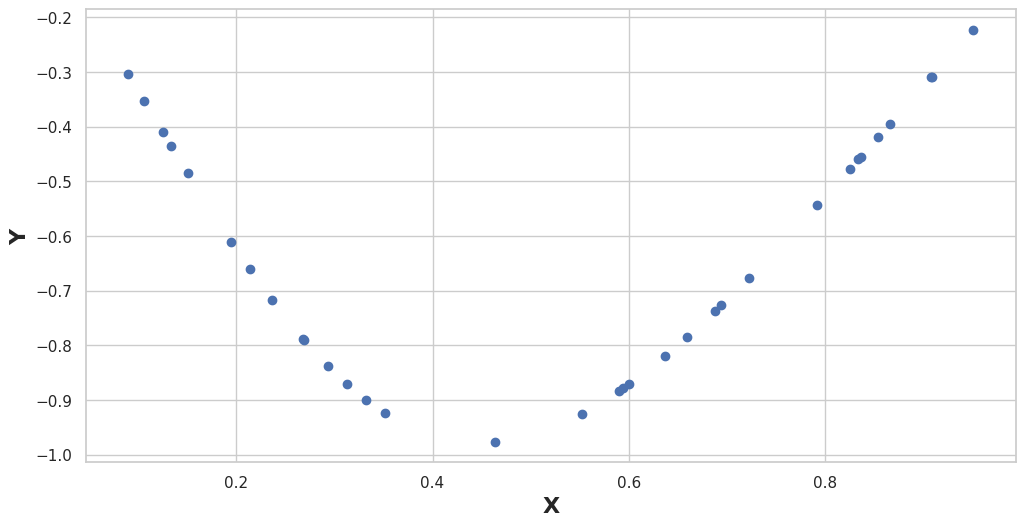

In [17]:
pred = model.predict(X_validation)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

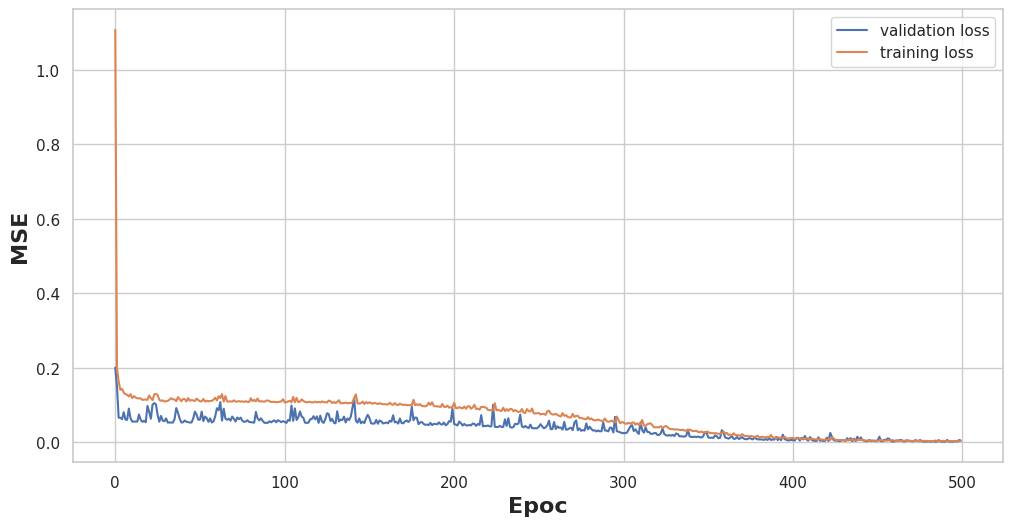

In [18]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

## California dataset: Regresión

Ahora vamos con un [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) más complicado, el dataset del precio medio por cuadra de casas en un distrito de california

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [20]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [21]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Las variables que contiene el dataset son:

* MedInc: ingreso medio de las personas que viven en esa cuadra
* HouseAge: edad media de las casas de esa cuadra
* AveRooms: número medio de ambientes
* AveBedrms número medio de habitaciones
* Population: cantidad de habitantes en la cuadra
* AveOccup: número medio de habitantes en la casa
* Latitude: latitud de la cuadra
* Longitude: longitud de la cuadra


* MedHouseVal:valor medio de las casas.

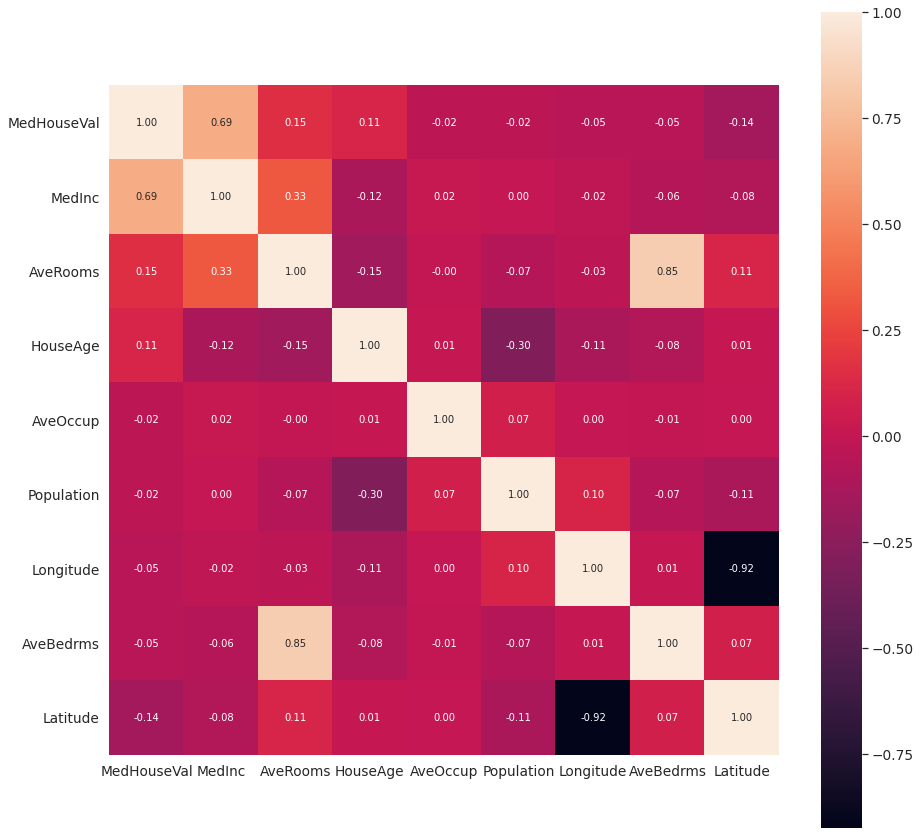

In [23]:
california_df['MedHouseVal'] = california.target
corrmat = california_df.corr()
k = 9  # number of variables for heatmap
cols = corrmat.nlargest(k, 'MedHouseVal')['MedHouseVal'].index
cm = np.corrcoef(california_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

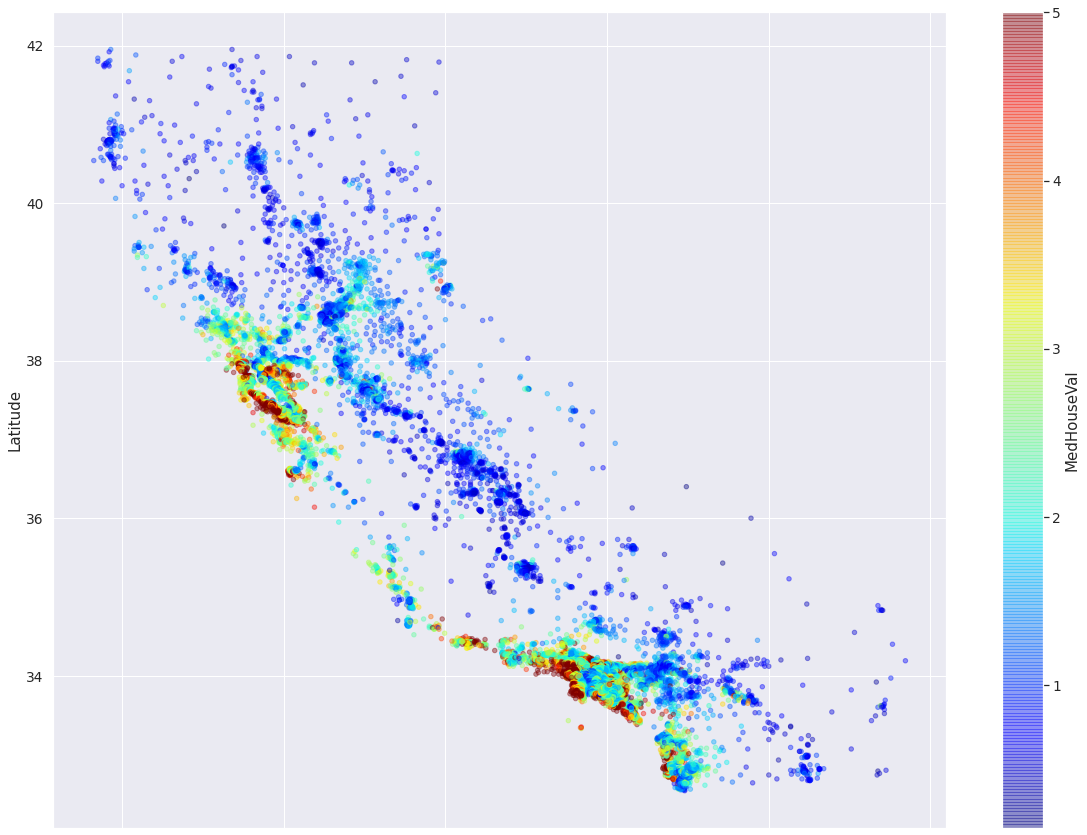

In [24]:
california_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    c="MedHouseVal",
    figsize=(20, 15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

In [25]:
california_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

Text(0, 0.5, 'Counts')

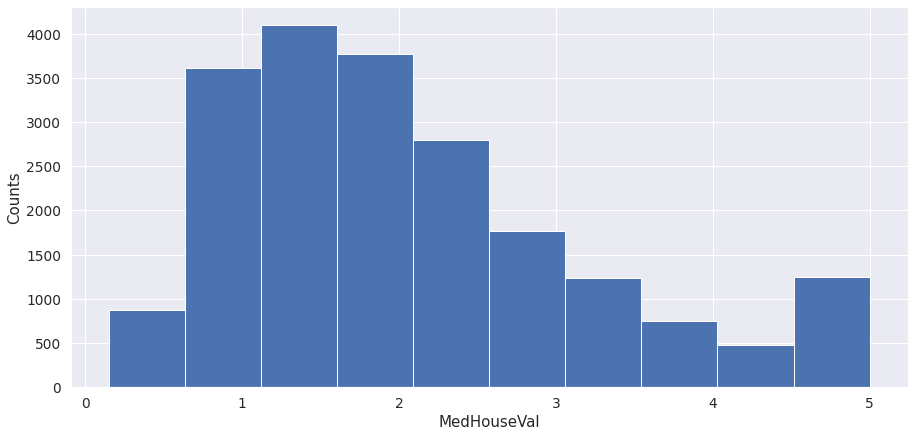

In [26]:
fig = plt.figure(figsize=(15, 7))
california_df["MedHouseVal"].hist()
plt.xlabel("MedHouseVal")
plt.ylabel("Counts")

Vamos a usar el StandardScaler y luego empezar a entrenar modelos y ver qué onda.

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(california_df)
scaled_df = scaler.transform(california_df)
names = california_df.columns
scaled_california_df = pd.DataFrame(scaled_df, columns=names)

Entreno el modelo más simple: una regresión lineal

In [28]:
X = scaled_california_df.drop("MedHouseVal", axis=1)
y = scaled_california_df.filter(items=["MedHouseVal"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5)
)
rmse.mean()

0.6464066254204867

In [29]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_[0]

array([ 0.71895227,  0.10291078, -0.23010693,  0.26491789, -0.00390232,
       -0.03408034, -0.77984545, -0.75441522])

Podemos ver la importancia tiene cada variable:

In [30]:
coeficientes = pd.DataFrame(
    {'Feature': X.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

Feature      Beta
6    Latitude -0.779845
7   Longitude -0.754415
2    AveRooms -0.230107
5    AveOccup -0.034080
4  Population -0.003902
1    HouseAge  0.102911
3   AveBedrms  0.264918
0      MedInc  0.718952

In [31]:
y_pred = linreg.predict(X)

(-3.0, 6.0)

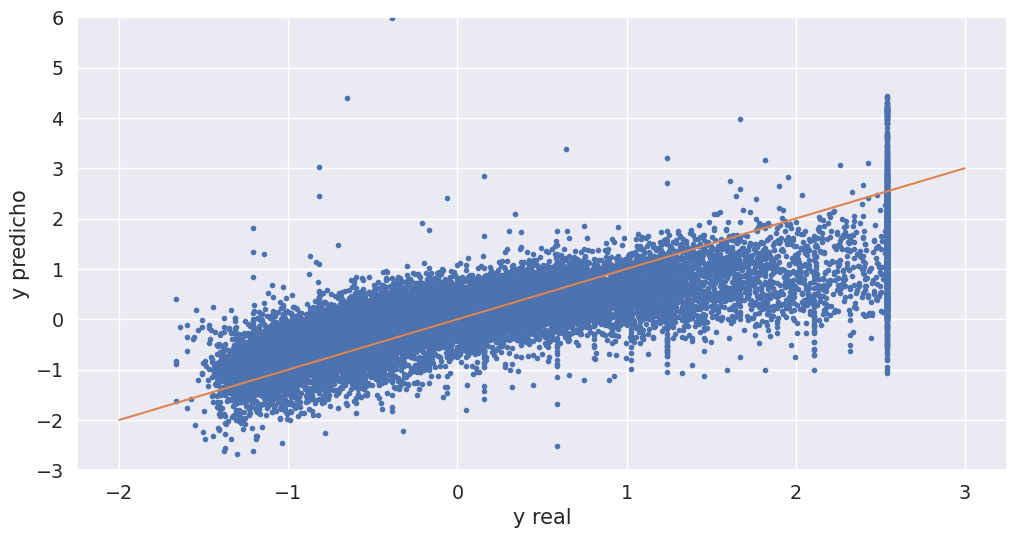

In [32]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y, y_pred, ".")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))

In [36]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=opt)

Podemos usar .summary() para ver el modelo: capas, parámetros etc

In [37]:
model.summary()

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 13s - loss: 0.5138

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.4188 

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.3728

 7200/12384 [================>.............] - ETA: 0s - loss: 0.3678

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.3647

12224/12384 [============================>.] - ETA: 0s - loss: 0.3583

12384/12384 [==============================] - 0s 34us/step - loss: 0.3577 - val_loss: 0.3309


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4324

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.3310

 5632/12384 [============>.................] - ETA: 0s - loss: 0.3400

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.3293

11168/12384 [==========================>...] - ETA: 0s - loss: 0.3227

12384/12384 [==============================] - 0s 27us/step - loss: 0.3191 - val_loss: 0.3166


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2730

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2994

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2967

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.3056

11520/12384 [==========================>...] - ETA: 0s - loss: 0.3061

12384/12384 [==============================] - 0s 26us/step - loss: 0.3056 - val_loss: 0.3142


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3904

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.3203

 5632/12384 [============>.................] - ETA: 0s - loss: 0.3053

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.3061

11200/12384 [==========================>...] - ETA: 0s - loss: 0.3047

12384/12384 [==============================] - 0s 27us/step - loss: 0.3018 - val_loss: 0.3031


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1907

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2934

 5696/12384 [============>.................] - ETA: 0s - loss: 0.3049

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.3052

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2980

12384/12384 [==============================] - 0s 26us/step - loss: 0.2965 - val_loss: 0.3115


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1654

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2810

 5632/12384 [============>.................] - ETA: 0s - loss: 0.3001

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2989

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2949

12384/12384 [==============================] - 0s 26us/step - loss: 0.2927 - val_loss: 0.2975


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2384

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2900

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2859

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2840

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2878

12384/12384 [==============================] - 0s 27us/step - loss: 0.2883 - val_loss: 0.2908


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3477

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2974

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2841

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2795

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2873

12384/12384 [==============================] - 0s 27us/step - loss: 0.2864 - val_loss: 0.2992


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2639

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2951

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2821

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2829

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2849

12384/12384 [==============================] - 0s 27us/step - loss: 0.2839 - val_loss: 0.3087


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6092

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2989

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2887

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2825

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2816

12384/12384 [==============================] - 0s 27us/step - loss: 0.2809 - val_loss: 0.3007


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1706

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2704

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2696

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2714

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2763

12384/12384 [==============================] - 0s 28us/step - loss: 0.2789 - val_loss: 0.3007


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2641

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2857

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2798

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2805

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2745

12384/12384 [==============================] - 0s 27us/step - loss: 0.2774 - val_loss: 0.2877


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1863

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2921

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2823

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2795

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2760

12384/12384 [==============================] - 0s 27us/step - loss: 0.2760 - val_loss: 0.2958


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1768

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2702

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2674

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2659

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2692

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2741

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2719

12384/12384 [==============================] - 0s 35us/step - loss: 0.2744 - val_loss: 0.2750


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1643

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2956

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2841

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2840

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2765

12384/12384 [==============================] - 0s 27us/step - loss: 0.2741 - val_loss: 0.2858


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2333

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2693

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2645

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2687

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2693

12384/12384 [==============================] - 0s 27us/step - loss: 0.2717 - val_loss: 0.2910


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1013

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2523

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2618

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2631

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2700

12384/12384 [==============================] - 0s 27us/step - loss: 0.2706 - val_loss: 0.2768


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3267

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2851

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2681

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2707

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2708

12384/12384 [==============================] - 0s 27us/step - loss: 0.2683 - val_loss: 0.2848


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1988

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2683

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2629

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2627

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2662

12384/12384 [==============================] - 0s 26us/step - loss: 0.2668 - val_loss: 0.2707


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2064

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2630

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2623

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2694

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2663

12384/12384 [==============================] - 0s 27us/step - loss: 0.2647 - val_loss: 0.2747


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3683

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2844

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2714

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2724

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2659

12384/12384 [==============================] - 0s 27us/step - loss: 0.2635 - val_loss: 0.2678


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1336

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2810

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2662

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2615

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2628

12384/12384 [==============================] - 0s 27us/step - loss: 0.2612 - val_loss: 0.2722


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3205

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2636

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2635

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2635

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2605

12384/12384 [==============================] - 0s 27us/step - loss: 0.2610 - val_loss: 0.2638


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1759

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2508

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2585

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2535

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2594

12384/12384 [==============================] - 0s 27us/step - loss: 0.2603 - val_loss: 0.2646


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3612

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2612

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2666

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2652

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2602

12384/12384 [==============================] - 0s 28us/step - loss: 0.2576 - val_loss: 0.2685


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2999

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2547

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2491

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2517

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2550

12384/12384 [==============================] - 0s 27us/step - loss: 0.2562 - val_loss: 0.2650


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2209

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2469

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2591

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2628

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2562

12384/12384 [==============================] - 0s 27us/step - loss: 0.2559 - val_loss: 0.2622


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1951

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2412

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2458

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2505

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2534

12384/12384 [==============================] - 0s 28us/step - loss: 0.2552 - val_loss: 0.2622


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2198

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2486

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2405

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2546

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2516

12384/12384 [==============================] - 0s 28us/step - loss: 0.2538 - val_loss: 0.2575


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4694

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2431

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2510

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2528

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2534

12384/12384 [==============================] - 0s 28us/step - loss: 0.2541 - val_loss: 0.2593


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6019

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2498

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2481

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2494

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2508

12384/12384 [==============================] - 0s 27us/step - loss: 0.2522 - val_loss: 0.2733


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1676

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2463

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2479

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2510

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2511

12384/12384 [==============================] - 0s 28us/step - loss: 0.2509 - val_loss: 0.2710


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4363

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2473

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2569

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2517

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2498

12384/12384 [==============================] - 0s 27us/step - loss: 0.2508 - val_loss: 0.2539


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1476

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2465

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2487

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2495

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2502

12384/12384 [==============================] - 0s 27us/step - loss: 0.2492 - val_loss: 0.2555


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3788

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2615

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2555

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2495

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2480

12384/12384 [==============================] - 0s 27us/step - loss: 0.2474 - val_loss: 0.2638


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2327

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2473

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2578

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2546

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 0s 27us/step - loss: 0.2496 - val_loss: 0.2604


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1388

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2432

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2522

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2510

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 27us/step - loss: 0.2466 - val_loss: 0.2587


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1818

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2503

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2473

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2500

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2481



12384/12384 [==============================] - 0s 29us/step - loss: 0.2477 - val_loss: 0.2595


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1488

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2505

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2436

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2472

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 27us/step - loss: 0.2480 - val_loss: 0.2576


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1411

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2363

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2501

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2434

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2497

12384/12384 [==============================] - 0s 27us/step - loss: 0.2460 - val_loss: 0.2674


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1195

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2284

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2410

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2432

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2504

12384/12384 [==============================] - 0s 27us/step - loss: 0.2470 - val_loss: 0.2524


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1877

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2636

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2473

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2435

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2451

12384/12384 [==============================] - 0s 27us/step - loss: 0.2465 - val_loss: 0.2550


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2018

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2559

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2535

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2506

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 27us/step - loss: 0.2452 - val_loss: 0.2515


Epoch 44/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3535

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2586

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2508

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2457

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 27us/step - loss: 0.2453 - val_loss: 0.2514


Epoch 45/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3097

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2263

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2483

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2424

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2453

12384/12384 [==============================] - 0s 27us/step - loss: 0.2454 - val_loss: 0.2579


Epoch 46/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3195

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2367

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2331

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2363

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 27us/step - loss: 0.2431 - val_loss: 0.2578


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4348

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2512

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2430

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2389

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 28us/step - loss: 0.2453 - val_loss: 0.2508


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2150

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2266

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2331

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2375

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 28us/step - loss: 0.2429 - val_loss: 0.2682


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3797

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2633

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2399

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2428

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2484

12384/12384 [==============================] - 0s 28us/step - loss: 0.2439 - val_loss: 0.2503


Epoch 50/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3352

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2653

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2516

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2454

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 28us/step - loss: 0.2443 - val_loss: 0.2484


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1111

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2296

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2359

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2390

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2361

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 31us/step - loss: 0.2436 - val_loss: 0.2691


Epoch 52/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2250

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2700

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2542

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2531

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2464

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 31us/step - loss: 0.2430 - val_loss: 0.2543


Epoch 53/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3464

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2607

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2397

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2365

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 27us/step - loss: 0.2420 - val_loss: 0.2510


Epoch 54/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3826

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2451

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2445

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2405

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 27us/step - loss: 0.2416 - val_loss: 0.2516


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2498

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2488

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2520

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2504

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 27us/step - loss: 0.2431 - val_loss: 0.2575


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1881

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2509

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2559

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2524

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 27us/step - loss: 0.2428 - val_loss: 0.2509


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3207

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2301

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2379

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 28us/step - loss: 0.2419 - val_loss: 0.2586


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1373

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2569

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2463

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2396

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2423

12384/12384 [==============================] - 0s 27us/step - loss: 0.2412 - val_loss: 0.2445


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2481

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2609

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2470

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2438

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 27us/step - loss: 0.2413 - val_loss: 0.2574


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2752

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2300

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2392

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2428

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 27us/step - loss: 0.2406 - val_loss: 0.2506


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2397

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2382

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2377

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2412

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 0s 27us/step - loss: 0.2412 - val_loss: 0.2574


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1700

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2470

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2481

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2479

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 27us/step - loss: 0.2413 - val_loss: 0.2535


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2710

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2483

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2446

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2467

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 27us/step - loss: 0.2407 - val_loss: 0.2516


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1837

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2387

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2401

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2383

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 27us/step - loss: 0.2391 - val_loss: 0.2457


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0786

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2486

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2482

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2456

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 27us/step - loss: 0.2410 - val_loss: 0.2459


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3867

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2260

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2312

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2395

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 27us/step - loss: 0.2393 - val_loss: 0.2497


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3827

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2364

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2493

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2443

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 27us/step - loss: 0.2392 - val_loss: 0.2521


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1534

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2307

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2347

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2387

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 27us/step - loss: 0.2399 - val_loss: 0.2473


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1926

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2461

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2394

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2393

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 27us/step - loss: 0.2406 - val_loss: 0.2524


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2052

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2373

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2243

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2375

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 28us/step - loss: 0.2386 - val_loss: 0.2485


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2115

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2490

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2412

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2399

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 28us/step - loss: 0.2401 - val_loss: 0.2416


Epoch 72/100


   32/12384 [..............................] - ETA: 1s - loss: 0.2009

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2534

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2390

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2352

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2381

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 31us/step - loss: 0.2394 - val_loss: 0.2456


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5734

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2459

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2435

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2491

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 0s 30us/step - loss: 0.2395 - val_loss: 0.2485


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2840

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2357

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2327

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2339

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 28us/step - loss: 0.2381 - val_loss: 0.2570


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2940

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2318

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2406

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2376

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 28us/step - loss: 0.2391 - val_loss: 0.2635


Epoch 76/100


   32/12384 [..............................] - ETA: 0s - loss: 0.3153

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2597

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2399

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2337

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 27us/step - loss: 0.2393 - val_loss: 0.2445


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2293

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2340

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2377

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2375

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 27us/step - loss: 0.2379 - val_loss: 0.2561


Epoch 78/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4165

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2376

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2396

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2370

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 28us/step - loss: 0.2389 - val_loss: 0.2459


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1753

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2326

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2331

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2359

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2397

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 32us/step - loss: 0.2390 - val_loss: 0.2450


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1179

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2251

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2332

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2368

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 28us/step - loss: 0.2381 - val_loss: 0.2506


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1825

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2363

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2428

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2397

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2421

12384/12384 [==============================] - 0s 30us/step - loss: 0.2379 - val_loss: 0.2515


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1625

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2179

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2181

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2287

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 29us/step - loss: 0.2382 - val_loss: 0.2494


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2917

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2327

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2362

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2390

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 27us/step - loss: 0.2393 - val_loss: 0.2476


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2872

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2329

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2395

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2368

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 27us/step - loss: 0.2370 - val_loss: 0.2482


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1271

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2345

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2261

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2372

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 27us/step - loss: 0.2374 - val_loss: 0.2491


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2669

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2441

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2434

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2473

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 27us/step - loss: 0.2393 - val_loss: 0.2506


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1355

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2224

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2257

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2356

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 28us/step - loss: 0.2360 - val_loss: 0.2480


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1619

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2335

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2406

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2371

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 29us/step - loss: 0.2371 - val_loss: 0.2471


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2664

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2394

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2405

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2372

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 28us/step - loss: 0.2374 - val_loss: 0.2426


Epoch 90/100


   32/12384 [..............................] - ETA: 1s - loss: 0.0616

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2445

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2482

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2435

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 29us/step - loss: 0.2365 - val_loss: 0.2434


Epoch 91/100


   32/12384 [..............................] - ETA: 1s - loss: 0.2808

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2347

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2355

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2401

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2398

12384/12384 [==============================] - 0s 28us/step - loss: 0.2382 - val_loss: 0.2644


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4347

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2594

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2406

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2345

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 28us/step - loss: 0.2360 - val_loss: 0.2579


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1969

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2556

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2424

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2412

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 29us/step - loss: 0.2384 - val_loss: 0.2397


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0845

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2554

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2484

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2437

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 27us/step - loss: 0.2374 - val_loss: 0.2444


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1828

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2325

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2382

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2372

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 27us/step - loss: 0.2374 - val_loss: 0.2681


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1203

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2605

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2398

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2399

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 28us/step - loss: 0.2372 - val_loss: 0.2443


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2275

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2514

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2413

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2362

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 28us/step - loss: 0.2363 - val_loss: 0.2642


Epoch 98/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1299

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2286

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2352

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 28us/step - loss: 0.2375 - val_loss: 0.2437


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2953

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2450

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2301

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2278

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 28us/step - loss: 0.2361 - val_loss: 0.2431


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3201

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2459

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2414

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2384

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 30us/step - loss: 0.2355 - val_loss: 0.2401


In [38]:
y_pred_nn = model.predict(X_test.values)

(-3.0, 6.0)

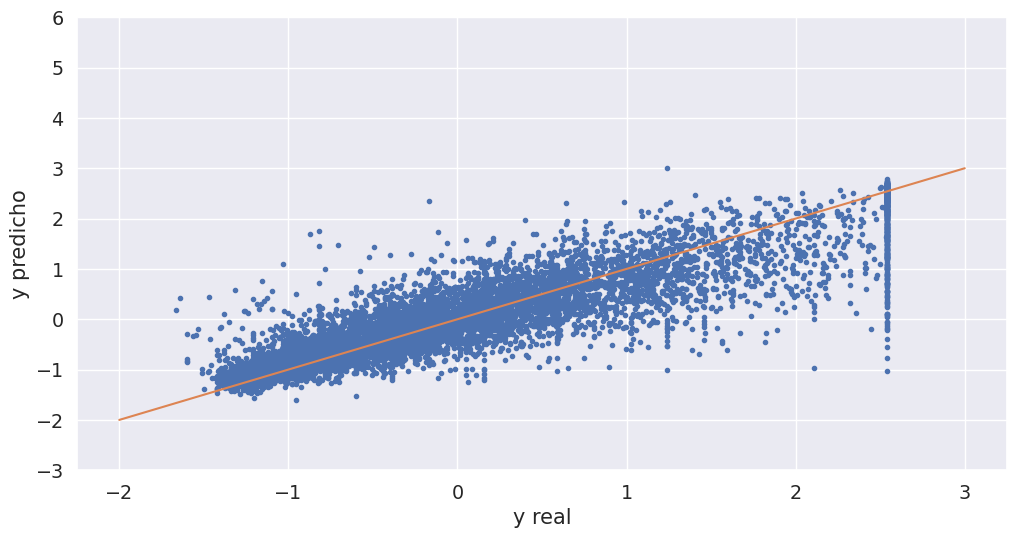

In [39]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_test, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.ylim(-3, 6)

In [40]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])

Ahora ploteamos el rmse del validation y training por época

Text(0.5, 0, 'Época')

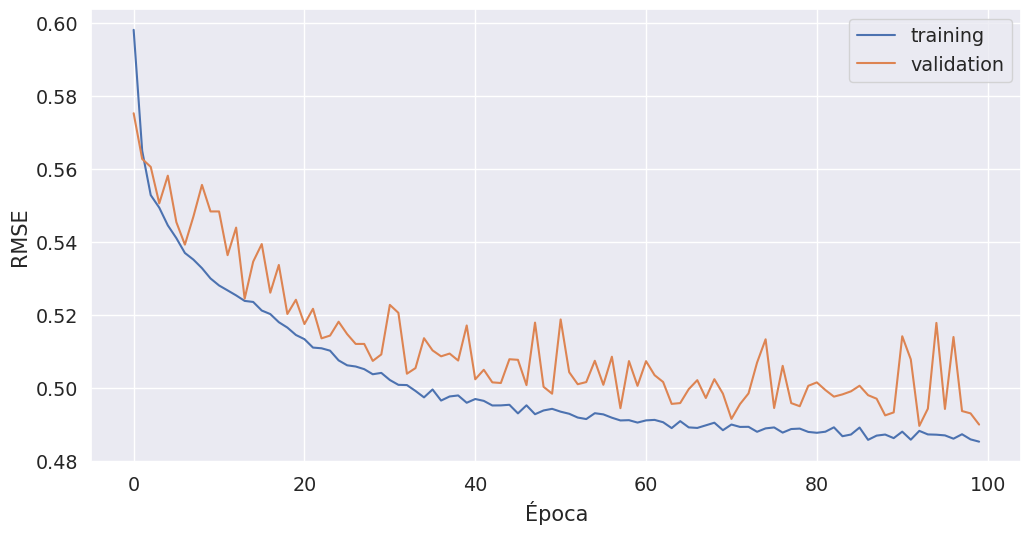

In [41]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que salta bastante la loss durante el entrenamiento:

Qué podemos hacer para que salte menos? Qué es lo que controla la "velocidad del aprendizaje"?

Podemos bajar la tasa de aprendizaje

In [42]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.SGD(lr=0.05)
model.compile(loss='mse', optimizer=opt)

In [43]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 13s - loss: 1.2728

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.4604 

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.4160

 7456/12384 [=================>............] - ETA: 0s - loss: 0.3864

10240/12384 [=======================>......] - ETA: 0s - loss: 0.3705

12384/12384 [==============================] - 0s 34us/step - loss: 0.3694 - val_loss: 0.3445


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2593

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.3282

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.3247

 7840/12384 [=================>............] - ETA: 0s - loss: 0.3284

10400/12384 [========================>.....] - ETA: 0s - loss: 0.3219

12384/12384 [==============================] - 0s 30us/step - loss: 0.3207 - val_loss: 0.3258


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4597

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.3201

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.3261

 7488/12384 [=================>............] - ETA: 0s - loss: 0.3157

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.3081

12384/12384 [==============================] - 0s 30us/step - loss: 0.3098 - val_loss: 0.3234


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1908

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.3185

 5472/12384 [============>.................] - ETA: 0s - loss: 0.3054

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.3098

10880/12384 [=========================>....] - ETA: 0s - loss: 0.3038

12384/12384 [==============================] - 0s 31us/step - loss: 0.3045 - val_loss: 0.3109


Epoch 5/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1465

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.3142

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2990

 7840/12384 [=================>............] - ETA: 0s - loss: 0.3020

10496/12384 [========================>.....] - ETA: 0s - loss: 0.3027

12384/12384 [==============================] - 0s 31us/step - loss: 0.3016 - val_loss: 0.3104


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2809

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2999

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.3054

 7776/12384 [=================>............] - ETA: 0s - loss: 0.3004

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2990

12384/12384 [==============================] - 0s 30us/step - loss: 0.2980 - val_loss: 0.3031


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2446

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2871

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2826

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2904

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2937

12384/12384 [==============================] - 0s 29us/step - loss: 0.2949 - val_loss: 0.3035


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0771

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.3042

 5504/12384 [============>.................] - ETA: 0s - loss: 0.3020

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2927

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2931

12384/12384 [==============================] - 0s 30us/step - loss: 0.2931 - val_loss: 0.3083


Epoch 9/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3811

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2939

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2905

 7520/12384 [=================>............] - ETA: 0s - loss: 0.3001

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2934

12320/12384 [============================>.] - ETA: 0s - loss: 0.2895

12384/12384 [==============================] - 0s 32us/step - loss: 0.2903 - val_loss: 0.3121


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3567

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2931

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2773

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2879

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2897

12384/12384 [==============================] - 0s 29us/step - loss: 0.2892 - val_loss: 0.2974


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3289

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2895

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2760

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2854

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2847

12384/12384 [==============================] - 0s 28us/step - loss: 0.2876 - val_loss: 0.2972


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1957

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2772

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2779

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2824



11200/12384 [==========================>...] - ETA: 0s - loss: 0.2832

12384/12384 [==============================] - 0s 28us/step - loss: 0.2851 - val_loss: 0.2991


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2372

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2944

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2961

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2938

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2862

12384/12384 [==============================] - 0s 28us/step - loss: 0.2832 - val_loss: 0.2956


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3826

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2959

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2814

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2753

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2782

12384/12384 [==============================] - 0s 28us/step - loss: 0.2819 - val_loss: 0.2882


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2939



 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2876

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2741

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2751

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2771

12384/12384 [==============================] - 0s 29us/step - loss: 0.2806 - val_loss: 0.2891


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2738

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2809

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2783

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2732



10496/12384 [========================>.....] - ETA: 0s - loss: 0.2768

12384/12384 [==============================] - 0s 29us/step - loss: 0.2791 - val_loss: 0.2930


Epoch 17/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1379

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2942

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2837

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2872

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2812

12384/12384 [==============================] - 0s 30us/step - loss: 0.2791 - val_loss: 0.2872


Epoch 18/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1994

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2635

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2703

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2742

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2707

12384/12384 [==============================] - 0s 30us/step - loss: 0.2763 - val_loss: 0.2853


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4377

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2709

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2843

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2787

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2767

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2795

12384/12384 [==============================] - 0s 33us/step - loss: 0.2764 - val_loss: 0.2888


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2630

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2640

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2622

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2701

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2748

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2733

12384/12384 [==============================] - 0s 33us/step - loss: 0.2745 - val_loss: 0.2859


Epoch 21/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2042

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2673

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2691

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2780

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2803

12384/12384 [==============================] - 0s 30us/step - loss: 0.2738 - val_loss: 0.2845


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1387

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2750

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2701

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2727

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2760

12256/12384 [============================>.] - ETA: 0s - loss: 0.2726

12384/12384 [==============================] - 0s 31us/step - loss: 0.2720 - val_loss: 0.2885


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1746

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2695

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2778

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2743

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2712

12384/12384 [==============================] - 0s 29us/step - loss: 0.2722 - val_loss: 0.2832


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3507

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2869

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2750

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2743

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2701

12384/12384 [==============================] - 0s 30us/step - loss: 0.2711 - val_loss: 0.2860


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1180

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2648

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2642

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2680

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2684

12384/12384 [==============================] - 0s 29us/step - loss: 0.2697 - val_loss: 0.2776


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2340

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2792

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2751

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2679

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2714

12384/12384 [==============================] - 0s 30us/step - loss: 0.2694 - val_loss: 0.2799


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3240

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2693

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2601

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2618



10976/12384 [=========================>....] - ETA: 0s - loss: 0.2644

12384/12384 [==============================] - 0s 29us/step - loss: 0.2686 - val_loss: 0.2828


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5066

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2786

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2669

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2725

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2661

12384/12384 [==============================] - 0s 29us/step - loss: 0.2682 - val_loss: 0.2803


Epoch 29/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1195

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2766

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2698

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2674

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2681

12384/12384 [==============================] - 0s 28us/step - loss: 0.2675 - val_loss: 0.2764


Epoch 30/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2349

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2647

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2655

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2705

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2647

12384/12384 [==============================] - 0s 31us/step - loss: 0.2675 - val_loss: 0.2803


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3457

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2551

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2615

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2682

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2657

12384/12384 [==============================] - 0s 29us/step - loss: 0.2670 - val_loss: 0.2798


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1500

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2648

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2592

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2614

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2693

12384/12384 [==============================] - 0s 28us/step - loss: 0.2657 - val_loss: 0.2828


Epoch 33/200


   32/12384 [..............................] - ETA: 0s - loss: 0.4546

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2581

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2661

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2673

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2624

12384/12384 [==============================] - 0s 30us/step - loss: 0.2657 - val_loss: 0.2776


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1975

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2655

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2566

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2649

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2639

12384/12384 [==============================] - 0s 29us/step - loss: 0.2649 - val_loss: 0.2768


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3220

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2723

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2565

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2583

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 28us/step - loss: 0.2638 - val_loss: 0.2776


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1106

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2526

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2550

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2596

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2627

12384/12384 [==============================] - 0s 29us/step - loss: 0.2626 - val_loss: 0.2797


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1396

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2662

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2614

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2622

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2594

12384/12384 [==============================] - 0s 30us/step - loss: 0.2638 - val_loss: 0.2775


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4707

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2733

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2605

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2603

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2605

12384/12384 [==============================] - 0s 29us/step - loss: 0.2627 - val_loss: 0.2765


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6999

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2710

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2746

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2675



10624/12384 [========================>.....] - ETA: 0s - loss: 0.2640

12384/12384 [==============================] - 0s 29us/step - loss: 0.2630 - val_loss: 0.2787


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4259

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2598

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2630

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2626



11104/12384 [=========================>....] - ETA: 0s - loss: 0.2605

12384/12384 [==============================] - 0s 28us/step - loss: 0.2629 - val_loss: 0.2725


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2461

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2467

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2560

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2569

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2611

12384/12384 [==============================] - 0s 28us/step - loss: 0.2621 - val_loss: 0.2823


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2839

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2475

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2511

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2541

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2629

12384/12384 [==============================] - 0s 28us/step - loss: 0.2616 - val_loss: 0.2730


Epoch 43/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2187

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2609

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2533

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2587

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2599

12384/12384 [==============================] - 0s 28us/step - loss: 0.2616 - val_loss: 0.2719


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2332

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2789

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2866

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2685

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2618

12384/12384 [==============================] - 0s 28us/step - loss: 0.2613 - val_loss: 0.2740


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2302

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2402

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2526

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2642

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2614

12384/12384 [==============================] - 0s 28us/step - loss: 0.2608 - val_loss: 0.2732


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3231

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2703

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2650

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2682

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2649

12384/12384 [==============================] - 0s 29us/step - loss: 0.2604 - val_loss: 0.2713


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3791

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2705

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2608

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2633

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2589

12384/12384 [==============================] - 0s 30us/step - loss: 0.2594 - val_loss: 0.2737


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4680

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2497

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2579

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2568

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2591

12384/12384 [==============================] - 0s 29us/step - loss: 0.2597 - val_loss: 0.2696


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0929

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2697

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2564

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2568

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2575

12384/12384 [==============================] - 0s 30us/step - loss: 0.2595 - val_loss: 0.2697


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2344

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2594

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2718

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2752

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2664

12384/12384 [==============================] - 0s 32us/step - loss: 0.2596 - val_loss: 0.2709


Epoch 51/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2710

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2639

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2656

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2603



10400/12384 [========================>.....] - ETA: 0s - loss: 0.2568

12384/12384 [==============================] - 0s 31us/step - loss: 0.2588 - val_loss: 0.2701


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2938

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2558

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2544

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2555



10304/12384 [=======================>......] - ETA: 0s - loss: 0.2514

12384/12384 [==============================] - 0s 30us/step - loss: 0.2583 - val_loss: 0.2709


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3613

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2591

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2672

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2621

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2589

12384/12384 [==============================] - 0s 30us/step - loss: 0.2579 - val_loss: 0.2715


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2453

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2461

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2583

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2600

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2561

12384/12384 [==============================] - 0s 30us/step - loss: 0.2574 - val_loss: 0.2724


Epoch 55/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1381

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2599

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2573

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2556

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2524

12160/12384 [============================>.] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 0s 31us/step - loss: 0.2566 - val_loss: 0.2693


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1431

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2554

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2567

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2569

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2525

12384/12384 [==============================] - 0s 29us/step - loss: 0.2569 - val_loss: 0.2673


Epoch 57/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3003

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2625

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2610

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2548

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2567

12384/12384 [==============================] - 0s 29us/step - loss: 0.2552 - val_loss: 0.2778


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2109

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2600

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2531

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2585

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2559

12384/12384 [==============================] - 0s 28us/step - loss: 0.2554 - val_loss: 0.2659


Epoch 59/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1783

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2270

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2440

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2536

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2536

12384/12384 [==============================] - 0s 29us/step - loss: 0.2542 - val_loss: 0.2676


Epoch 60/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3226

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2641

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2610

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2546

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2495

12384/12384 [==============================] - 0s 29us/step - loss: 0.2532 - val_loss: 0.2654


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1522

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2694

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2586

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2557

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2579

12384/12384 [==============================] - 0s 29us/step - loss: 0.2535 - val_loss: 0.2735


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3024

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2459

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2436

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2411

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2520

12384/12384 [==============================] - 0s 28us/step - loss: 0.2527 - val_loss: 0.2640


Epoch 63/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2075



 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2603

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2570

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2515

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2489

12384/12384 [==============================] - 0s 29us/step - loss: 0.2520 - val_loss: 0.2680


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1272

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2473

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2428

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2474

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2520

12384/12384 [==============================] - 0s 30us/step - loss: 0.2520 - val_loss: 0.2643


Epoch 65/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2074

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2555

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2476

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2480

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2510

12384/12384 [==============================] - 0s 29us/step - loss: 0.2513 - val_loss: 0.2654


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1341

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2629

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2521

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2548

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2554

12384/12384 [==============================] - 0s 30us/step - loss: 0.2511 - val_loss: 0.2656


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3057

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2541

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2569

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2516

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2504

12384/12384 [==============================] - 0s 30us/step - loss: 0.2511 - val_loss: 0.2619


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1929

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2497

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2504

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2489



10368/12384 [========================>.....] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 30us/step - loss: 0.2506 - val_loss: 0.2591


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1741

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2673

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2512

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2441

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 28us/step - loss: 0.2496 - val_loss: 0.2626


Epoch 70/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1922

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2449

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2416

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2427

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2454

12384/12384 [==============================] - 0s 28us/step - loss: 0.2492 - val_loss: 0.2618


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2411

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2476

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2527

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2507

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2476

12384/12384 [==============================] - 0s 29us/step - loss: 0.2491 - val_loss: 0.2631


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2802

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2490

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2522

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2504

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2520

12384/12384 [==============================] - 0s 30us/step - loss: 0.2487 - val_loss: 0.2695


Epoch 73/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2680

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2570

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2631

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2538

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 0s 30us/step - loss: 0.2479 - val_loss: 0.2609


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2314

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2317

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2517

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2554

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2488

12384/12384 [==============================] - 0s 29us/step - loss: 0.2484 - val_loss: 0.2593


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3824

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2373

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2558

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2456

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2466

12384/12384 [==============================] - 0s 29us/step - loss: 0.2477 - val_loss: 0.2590


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3385

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2225

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2426

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2501



10848/12384 [=========================>....] - ETA: 0s - loss: 0.2488

12384/12384 [==============================] - 0s 30us/step - loss: 0.2469 - val_loss: 0.2663


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4832

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2484

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2434

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2532

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 30us/step - loss: 0.2460 - val_loss: 0.2691


Epoch 78/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3779

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2505

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2430

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2446

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2468

12384/12384 [==============================] - 0s 28us/step - loss: 0.2475 - val_loss: 0.2628


Epoch 79/200


   32/12384 [..............................] - ETA: 0s - loss: 0.5479

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2644

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2516

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2534

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2483

12384/12384 [==============================] - 0s 30us/step - loss: 0.2464 - val_loss: 0.2558


Epoch 80/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1967

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2427

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2480

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2464

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 30us/step - loss: 0.2466 - val_loss: 0.2579


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2115

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2367

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2350

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2439



10400/12384 [========================>.....] - ETA: 0s - loss: 0.2479

12384/12384 [==============================] - 0s 31us/step - loss: 0.2463 - val_loss: 0.2573


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2781

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2513

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2447

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2421

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 28us/step - loss: 0.2454 - val_loss: 0.2707


Epoch 83/200
   32/12384 [..............................] - ETA: 0s - loss: 0.7580

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2388

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2475

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2397

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2477

12384/12384 [==============================] - 0s 28us/step - loss: 0.2456 - val_loss: 0.2567


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2342

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2406

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2366

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2396

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 30us/step - loss: 0.2447 - val_loss: 0.2585


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1795

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2462

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2483

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2440

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2455

12384/12384 [==============================] - 0s 29us/step - loss: 0.2444 - val_loss: 0.2629


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0921

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2328

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2356

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2419



10528/12384 [========================>.....] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 31us/step - loss: 0.2443 - val_loss: 0.2542


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4318

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2455

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2374

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2411

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2417

12384/12384 [==============================] - 0s 29us/step - loss: 0.2440 - val_loss: 0.2669


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2824

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2477

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2449

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2457

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 30us/step - loss: 0.2437 - val_loss: 0.2553


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4074

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2521

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2446

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2425



10784/12384 [=========================>....] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 29us/step - loss: 0.2446 - val_loss: 0.2516


Epoch 90/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1863

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2458

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2407

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2413

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 30us/step - loss: 0.2437 - val_loss: 0.2580


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1435

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2277

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2429

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2430

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 28us/step - loss: 0.2439 - val_loss: 0.2539


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1538

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2305

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2364

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2372

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 28us/step - loss: 0.2434 - val_loss: 0.2544


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3942

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2518

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2507

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2485

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 28us/step - loss: 0.2429 - val_loss: 0.2561


Epoch 94/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2396

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2442

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2476

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2419

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 29us/step - loss: 0.2426 - val_loss: 0.2626


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3076

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2396

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2412

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2480

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 30us/step - loss: 0.2433 - val_loss: 0.2565


Epoch 96/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3453

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2653

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2560

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2508

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2455

12384/12384 [==============================] - 0s 31us/step - loss: 0.2423 - val_loss: 0.2542


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2043

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2309

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2382

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2422

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2429

12384/12384 [==============================] - 0s 31us/step - loss: 0.2425 - val_loss: 0.2549


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5370

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2394

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2367

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2393

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 30us/step - loss: 0.2426 - val_loss: 0.2518


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2932

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2634

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2563

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2427

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 29us/step - loss: 0.2411 - val_loss: 0.2548


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2799

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2396

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2403

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2429

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 27us/step - loss: 0.2418 - val_loss: 0.2589


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1199

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2420

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2491

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2448

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2472

12384/12384 [==============================] - 0s 27us/step - loss: 0.2433 - val_loss: 0.2601


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2814

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2679

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2482

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2426

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 27us/step - loss: 0.2417 - val_loss: 0.2560


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2913

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2332

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2362

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2381

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 27us/step - loss: 0.2425 - val_loss: 0.2577


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2441

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2330

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2419

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2406

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 27us/step - loss: 0.2417 - val_loss: 0.2568


Epoch 105/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1165

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2503

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2457

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2412

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 27us/step - loss: 0.2415 - val_loss: 0.2524


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1568

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2570

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2525

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2461

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2412

12384/12384 [==============================] - 0s 29us/step - loss: 0.2422 - val_loss: 0.2560


Epoch 107/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1971

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2719

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2526

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2432

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 28us/step - loss: 0.2410 - val_loss: 0.2552


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3965

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2411

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2434

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2478

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 27us/step - loss: 0.2419 - val_loss: 0.2547


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1709

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2399

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2454

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2419

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 27us/step - loss: 0.2415 - val_loss: 0.2566


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3297

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2417

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2384

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2463

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 27us/step - loss: 0.2417 - val_loss: 0.2503


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1652

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2492

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2387

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 0s 27us/step - loss: 0.2411 - val_loss: 0.2557


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3645

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2311

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2389

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2422

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 27us/step - loss: 0.2423 - val_loss: 0.2527


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1826

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2490

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2419

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2409

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 27us/step - loss: 0.2401 - val_loss: 0.2508


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3241

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2422

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2437

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2444

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 27us/step - loss: 0.2404 - val_loss: 0.2512


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2676

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2366

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2334

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2386

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 31us/step - loss: 0.2410 - val_loss: 0.2515


Epoch 116/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0877

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2270

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2428

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2462

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2475

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 32us/step - loss: 0.2412 - val_loss: 0.2505


Epoch 117/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1870

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2404

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2289

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2306

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2416

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 31us/step - loss: 0.2409 - val_loss: 0.2612


Epoch 118/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3312

 1184/12384 [=>............................] - ETA: 0s - loss: 0.2356

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2477

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2487

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2497

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2431

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2403

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 40us/step - loss: 0.2396 - val_loss: 0.2507


Epoch 119/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2555

 1664/12384 [===>..........................] - ETA: 0s - loss: 0.2392

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2483

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2379

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2411

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2418

12192/12384 [============================>.] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 34us/step - loss: 0.2406 - val_loss: 0.2519


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1950

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2320

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2428

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2428

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 27us/step - loss: 0.2406 - val_loss: 0.2602


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1541

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2497

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2462

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2412

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 26us/step - loss: 0.2403 - val_loss: 0.2507


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2694

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2626

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2482

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2448

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 27us/step - loss: 0.2403 - val_loss: 0.2530


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1257

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2435

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2431

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2439

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 27us/step - loss: 0.2404 - val_loss: 0.2581


Epoch 124/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4247

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2420

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2467

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2407

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 27us/step - loss: 0.2402 - val_loss: 0.2536


Epoch 125/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1193

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2154

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2353

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2422

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 27us/step - loss: 0.2401 - val_loss: 0.2576


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1993

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2479

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2422

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2417

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 27us/step - loss: 0.2397 - val_loss: 0.2609


Epoch 127/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2275

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2492

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2373

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2353

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 28us/step - loss: 0.2393 - val_loss: 0.2598


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1990

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2312

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2314

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2297

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 26us/step - loss: 0.2403 - val_loss: 0.2531


Epoch 129/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2048

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2423

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2390

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2375

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 28us/step - loss: 0.2394 - val_loss: 0.2531


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2254

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2433

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2344

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2415

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 27us/step - loss: 0.2402 - val_loss: 0.2505


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2150

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2395

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2350

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2363

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 27us/step - loss: 0.2389 - val_loss: 0.2526


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2043

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2213

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2298

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2366

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 27us/step - loss: 0.2402 - val_loss: 0.2550


Epoch 133/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1518

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2343

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2280

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2369

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 27us/step - loss: 0.2400 - val_loss: 0.2541


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1288

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2351

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2350

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2327

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 27us/step - loss: 0.2396 - val_loss: 0.2601


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1371

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2261

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2285

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2321

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 27us/step - loss: 0.2390 - val_loss: 0.2532


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2930

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2507

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2377

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2381

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 27us/step - loss: 0.2395 - val_loss: 0.2520


Epoch 137/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2377

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2496

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2426

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2401

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 27us/step - loss: 0.2395 - val_loss: 0.2570


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2492

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2486

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2381

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2376

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 27us/step - loss: 0.2393 - val_loss: 0.2515


Epoch 139/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1736

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2350

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2373

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2400

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2423

12384/12384 [==============================] - 0s 27us/step - loss: 0.2392 - val_loss: 0.2531


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1647

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2270

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2259

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2374

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2426

12384/12384 [==============================] - 0s 27us/step - loss: 0.2397 - val_loss: 0.2493


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1276

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2448

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2430

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2369

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 28us/step - loss: 0.2386 - val_loss: 0.2537


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3313

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2421

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2323

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2390

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2398

12384/12384 [==============================] - 0s 28us/step - loss: 0.2403 - val_loss: 0.2558


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3155

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2443

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2382

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2346

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 27us/step - loss: 0.2382 - val_loss: 0.2502


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1764

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2283

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2183

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2291

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 33us/step - loss: 0.2393 - val_loss: 0.2538


Epoch 145/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4742

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2338

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2395

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2386

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 29us/step - loss: 0.2394 - val_loss: 0.2513


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2118

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2296

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2250

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2302

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2330

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2376

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2412

12384/12384 [==============================] - 0s 35us/step - loss: 0.2393 - val_loss: 0.2504


Epoch 147/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2264

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2356

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2384

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2327

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2340

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2434

12320/12384 [============================>.] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 33us/step - loss: 0.2383 - val_loss: 0.2526


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3976

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2484

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2402

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2446

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2396

12384/12384 [==============================] - 0s 27us/step - loss: 0.2395 - val_loss: 0.2584


Epoch 149/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2636

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2339

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2429

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2353

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 27us/step - loss: 0.2386 - val_loss: 0.2489


Epoch 150/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1974

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2360

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2311

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2342

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 27us/step - loss: 0.2386 - val_loss: 0.2501


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2711

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2274

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2366

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2312

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 27us/step - loss: 0.2386 - val_loss: 0.2633


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2354

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2274

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2328

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2331

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 27us/step - loss: 0.2382 - val_loss: 0.2504


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1319

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2369

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2363

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2401

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 27us/step - loss: 0.2389 - val_loss: 0.2636


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1159

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2443

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2359

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2346

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 27us/step - loss: 0.2397 - val_loss: 0.2510


Epoch 155/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1717

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2464

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2400

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2380

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 28us/step - loss: 0.2381 - val_loss: 0.2627


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1462

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2308

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2344

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2364

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 31us/step - loss: 0.2378 - val_loss: 0.2523


Epoch 157/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1274

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2413

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2377

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2397

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 29us/step - loss: 0.2391 - val_loss: 0.2556


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1893

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2392

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2387

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2380

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 29us/step - loss: 0.2387 - val_loss: 0.2514


Epoch 159/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1991

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2296

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2352

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2392

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 30us/step - loss: 0.2377 - val_loss: 0.2612


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2880

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2285

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2440

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2400

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 28us/step - loss: 0.2384 - val_loss: 0.2609


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2287

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2467

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2436

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2420

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2429

12384/12384 [==============================] - 0s 29us/step - loss: 0.2389 - val_loss: 0.2488


Epoch 162/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3531

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2344

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2305

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2305

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 29us/step - loss: 0.2380 - val_loss: 0.2536


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1147

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2414

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2399

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2353

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 29us/step - loss: 0.2383 - val_loss: 0.2507


Epoch 164/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1507

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2445

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2423

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2440

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 30us/step - loss: 0.2377 - val_loss: 0.2576


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2276

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2392

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2425

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2424

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 28us/step - loss: 0.2396 - val_loss: 0.2476


Epoch 166/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2769

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2210

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2287

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2341

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2364

12352/12384 [============================>.] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 29us/step - loss: 0.2368 - val_loss: 0.2489


Epoch 167/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1889

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2471

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2441

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2401

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 27us/step - loss: 0.2369 - val_loss: 0.2523


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2272

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2221

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2353

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2326

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 27us/step - loss: 0.2375 - val_loss: 0.2501


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3245

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2383

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2448

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2461

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 27us/step - loss: 0.2375 - val_loss: 0.2575


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5737

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2502

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2318

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2333

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 27us/step - loss: 0.2376 - val_loss: 0.2494


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1921

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2515

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2542

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2438

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 26us/step - loss: 0.2382 - val_loss: 0.2499


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2639

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2335

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2407

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2412

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 26us/step - loss: 0.2377 - val_loss: 0.2517


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1027

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2307

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2335

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2380

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 27us/step - loss: 0.2377 - val_loss: 0.2487


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3745

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2457

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2376

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2402

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 28us/step - loss: 0.2368 - val_loss: 0.2700


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1804

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2559

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2516

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2520

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2485

12384/12384 [==============================] - 0s 27us/step - loss: 0.2464 - val_loss: 0.2626


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2588

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2582

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2467

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2393

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2442

12384/12384 [==============================] - 0s 28us/step - loss: 0.2435 - val_loss: 0.2551


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1992

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2342

 5216/12384 [===========>..................] - ETA: 0s - loss: 0.2320

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2474

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 29us/step - loss: 0.2405 - val_loss: 0.2540


Epoch 178/200


   32/12384 [..............................] - ETA: 1s - loss: 0.0979

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2137

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2235

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2343

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 27us/step - loss: 0.2391 - val_loss: 0.2626


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2424

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2213

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2324

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2405

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 27us/step - loss: 0.2408 - val_loss: 0.2480


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1865

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2297

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2362

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2351

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 28us/step - loss: 0.2389 - val_loss: 0.2481


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2050

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2456

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2328

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2419

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 27us/step - loss: 0.2388 - val_loss: 0.2570


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1330

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2299

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2311

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2342

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 27us/step - loss: 0.2372 - val_loss: 0.2467


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1609

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2343

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2268

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2364

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 27us/step - loss: 0.2372 - val_loss: 0.2604


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2121

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2614

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2423

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2371

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 28us/step - loss: 0.2380 - val_loss: 0.2476


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1190

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2454

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2357

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2310

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 28us/step - loss: 0.2379 - val_loss: 0.2520


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1936

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2402

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2290

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2345

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 28us/step - loss: 0.2373 - val_loss: 0.2613


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3515

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2468

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2448

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2379

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 29us/step - loss: 0.2375 - val_loss: 0.2546


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3016

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2353

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2351

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2330

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 28us/step - loss: 0.2378 - val_loss: 0.2490


Epoch 189/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1022

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2536

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2429

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2388

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 29us/step - loss: 0.2371 - val_loss: 0.2501


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4511

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2469

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2418

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2400

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2356



12384/12384 [==============================] - 0s 29us/step - loss: 0.2371 - val_loss: 0.2524


Epoch 191/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3013

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2397

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2314

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2341

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 28us/step - loss: 0.2379 - val_loss: 0.2505


Epoch 192/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1840



 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2362

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2395

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2381

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 31us/step - loss: 0.2369 - val_loss: 0.2560


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1255

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2221

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2295

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2326

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 28us/step - loss: 0.2365 - val_loss: 0.2499


Epoch 194/200


   32/12384 [..............................] - ETA: 0s - loss: 0.3820



 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2125

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2299

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2394

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2368

12032/12384 [============================>.] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 30us/step - loss: 0.2370 - val_loss: 0.2535


Epoch 195/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2234

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2545

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2382

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2363

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 27us/step - loss: 0.2366 - val_loss: 0.2484


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3608

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2390

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2390

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2420

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 28us/step - loss: 0.2366 - val_loss: 0.2553


Epoch 197/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2612

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2475

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2359

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2386

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 27us/step - loss: 0.2378 - val_loss: 0.2527


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2836

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2354

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2296

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2333

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 27us/step - loss: 0.2368 - val_loss: 0.2501


Epoch 199/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2779

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2537

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2397

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2441

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 27us/step - loss: 0.2372 - val_loss: 0.2482


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1182

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2313

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2285

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2307

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 27us/step - loss: 0.2364 - val_loss: 0.2454


Text(0.5, 0, 'Época')

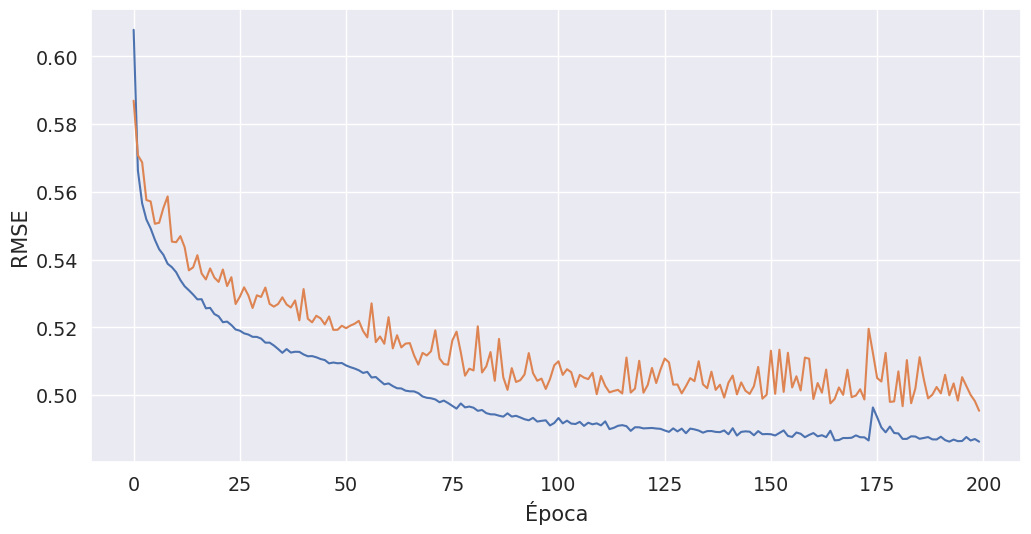

In [44]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que es un poco menos errático el aprendizaje, qué otra cosa podemos hacer para mejorar el entrenamiento como tal:

Hint: Qué cosa se encarga de modificar los pesos una vez calculados los gradientes?

Probamos cambiar el [optmizador](https://keras.io/api/optimizers/) a uno mejor:

mejor==no usar solo el gradiente. Usamos Adam de optmizador

In [45]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [46]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 21s - loss: 1.3135

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.7671 

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.6099

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.5328

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.5003

11520/12384 [==========================>...] - ETA: 0s - loss: 0.4637

12384/12384 [==============================] - 0s 37us/step - loss: 0.4546 - val_loss: 0.3622


Epoch 2/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3565

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.3611

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.3358

 6144/12384 [=============>................] - ETA: 0s - loss: 0.3503

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.3488

11136/12384 [=========================>....] - ETA: 0s - loss: 0.3443

12384/12384 [==============================] - 0s 31us/step - loss: 0.3445 - val_loss: 0.3476


Epoch 3/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3446

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3462

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.3350

 7424/12384 [================>.............] - ETA: 0s - loss: 0.3295

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.3300

12320/12384 [============================>.] - ETA: 0s - loss: 0.3336

12384/12384 [==============================] - 0s 29us/step - loss: 0.3336 - val_loss: 0.3391


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3854

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.3373

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3250

 7360/12384 [================>.............] - ETA: 0s - loss: 0.3286

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.3248

12224/12384 [============================>.] - ETA: 0s - loss: 0.3291

12384/12384 [==============================] - 0s 29us/step - loss: 0.3278 - val_loss: 0.3344


Epoch 5/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5940

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3174

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.3224

 7360/12384 [================>.............] - ETA: 0s - loss: 0.3213

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.3220

12288/12384 [============================>.] - ETA: 0s - loss: 0.3222

12384/12384 [==============================] - 0s 29us/step - loss: 0.3233 - val_loss: 0.3312


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1905

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3382

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.3379

 7392/12384 [================>.............] - ETA: 0s - loss: 0.3306

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.3235



12352/12384 [============================>.] - ETA: 0s - loss: 0.3202

12384/12384 [==============================] - 0s 29us/step - loss: 0.3198 - val_loss: 0.3280


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2448

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3110

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.3140

 7424/12384 [================>.............] - ETA: 0s - loss: 0.3064

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.3113

12256/12384 [============================>.] - ETA: 0s - loss: 0.3163

12384/12384 [==============================] - 0s 29us/step - loss: 0.3171 - val_loss: 0.3258


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1645

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.3153

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.3169

 7360/12384 [================>.............] - ETA: 0s - loss: 0.3175

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.3151

12160/12384 [============================>.] - ETA: 0s - loss: 0.3142

12384/12384 [==============================] - 0s 29us/step - loss: 0.3148 - val_loss: 0.3225


Epoch 9/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3007

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2922

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3112

 7360/12384 [================>.............] - ETA: 0s - loss: 0.3064

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.3089

12192/12384 [============================>.] - ETA: 0s - loss: 0.3118

12384/12384 [==============================] - 0s 29us/step - loss: 0.3120 - val_loss: 0.3199


Epoch 10/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3593

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.3111

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3112

 7296/12384 [================>.............] - ETA: 0s - loss: 0.3118

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.3093

12192/12384 [============================>.] - ETA: 0s - loss: 0.3110

12384/12384 [==============================] - 0s 29us/step - loss: 0.3091 - val_loss: 0.3188


Epoch 11/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3121

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.3137

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.3013

 7456/12384 [=================>............] - ETA: 0s - loss: 0.3040

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.3027

12128/12384 [============================>.] - ETA: 0s - loss: 0.3035

12384/12384 [==============================] - 0s 29us/step - loss: 0.3060 - val_loss: 0.3151


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2983

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2854

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2959

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2988

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.3036

12192/12384 [============================>.] - ETA: 0s - loss: 0.3032

12384/12384 [==============================] - 0s 29us/step - loss: 0.3027 - val_loss: 0.3144


Epoch 13/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4795

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.3138

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.3071

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2977

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2994

12320/12384 [============================>.] - ETA: 0s - loss: 0.2997

12384/12384 [==============================] - 0s 29us/step - loss: 0.3003 - val_loss: 0.3099


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2398

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2982

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2867

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2883

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2903

12352/12384 [============================>.] - ETA: 0s - loss: 0.2975

12384/12384 [==============================] - 0s 29us/step - loss: 0.2972 - val_loss: 0.3068


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4703

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2960

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2965

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2987

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2943

12384/12384 [==============================] - 0s 29us/step - loss: 0.2945 - val_loss: 0.3081


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4207

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2967

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2995

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2915

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2902

12256/12384 [============================>.] - ETA: 0s - loss: 0.2913

12384/12384 [==============================] - 0s 29us/step - loss: 0.2917 - val_loss: 0.3026


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3213

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2807

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2820

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2834

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2866

12288/12384 [============================>.] - ETA: 0s - loss: 0.2886

12384/12384 [==============================] - 0s 29us/step - loss: 0.2891 - val_loss: 0.3013


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1321

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2599

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2755

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2839

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2857

12224/12384 [============================>.] - ETA: 0s - loss: 0.2869

12384/12384 [==============================] - 0s 29us/step - loss: 0.2866 - val_loss: 0.2972


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2346

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2925

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.3031

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2952

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2900

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2835

12384/12384 [==============================] - 0s 30us/step - loss: 0.2846 - val_loss: 0.2969


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2569

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2740

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2775

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2837

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2838

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2827

12384/12384 [==============================] - 0s 30us/step - loss: 0.2822 - val_loss: 0.2931


Epoch 21/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1315

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2787

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2808

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2860

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2865



12224/12384 [============================>.] - ETA: 0s - loss: 0.2804

12384/12384 [==============================] - 0s 29us/step - loss: 0.2805 - val_loss: 0.2935


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2406

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2676

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2791

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2826

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2791

12224/12384 [============================>.] - ETA: 0s - loss: 0.2788

12384/12384 [==============================] - 0s 29us/step - loss: 0.2784 - val_loss: 0.2898


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3615

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2599

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2691

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2784

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2748

12384/12384 [==============================] - 0s 29us/step - loss: 0.2764 - val_loss: 0.2888


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2088

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2625

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2690

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2688

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2750



12160/12384 [============================>.] - ETA: 0s - loss: 0.2756

12384/12384 [==============================] - 0s 30us/step - loss: 0.2749 - val_loss: 0.2872


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2730

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2539

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2656

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2712

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2730

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2723

12384/12384 [==============================] - 0s 32us/step - loss: 0.2731 - val_loss: 0.2846


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1552

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2687

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2819

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2737

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2714

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2734

12384/12384 [==============================] - 0s 31us/step - loss: 0.2719 - val_loss: 0.2850


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1226

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2736

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2676

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2677

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2718

12320/12384 [============================>.] - ETA: 0s - loss: 0.2705

12384/12384 [==============================] - 0s 29us/step - loss: 0.2702 - val_loss: 0.2832


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4656

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2506

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2634

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2734

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2729

12032/12384 [============================>.] - ETA: 0s - loss: 0.2710

12384/12384 [==============================] - 0s 29us/step - loss: 0.2692 - val_loss: 0.2811


Epoch 29/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0789

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2682

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2712

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2633

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2655

12224/12384 [============================>.] - ETA: 0s - loss: 0.2681

12384/12384 [==============================] - 0s 29us/step - loss: 0.2675 - val_loss: 0.2800


Epoch 30/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1892

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2734

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2670

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2679

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2628

12032/12384 [============================>.] - ETA: 0s - loss: 0.2656

12384/12384 [==============================] - 0s 29us/step - loss: 0.2665 - val_loss: 0.2792


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1501

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2519

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2506

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2567

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2623

12032/12384 [============================>.] - ETA: 0s - loss: 0.2652

12384/12384 [==============================] - 0s 29us/step - loss: 0.2652 - val_loss: 0.2767


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2355

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2617

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2640

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2612

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2604

12192/12384 [============================>.] - ETA: 0s - loss: 0.2644

12384/12384 [==============================] - 0s 29us/step - loss: 0.2639 - val_loss: 0.2757


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4174

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2670

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2688

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2685

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2626

12160/12384 [============================>.] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 29us/step - loss: 0.2625 - val_loss: 0.2758


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3011

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2462

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2564

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2549

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2633

12352/12384 [============================>.] - ETA: 0s - loss: 0.2610

12384/12384 [==============================] - 0s 29us/step - loss: 0.2613 - val_loss: 0.2759


Epoch 35/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3183

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2784

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2607

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2635

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2663

12224/12384 [============================>.] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 29us/step - loss: 0.2601 - val_loss: 0.2713


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1529

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2542

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2545

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2594

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2553

12096/12384 [============================>.] - ETA: 0s - loss: 0.2584

12384/12384 [==============================] - 0s 29us/step - loss: 0.2586 - val_loss: 0.2706


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2300

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2411

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2503

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2544

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2581

12384/12384 [==============================] - 0s 29us/step - loss: 0.2569 - val_loss: 0.2702


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2218

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2523

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2441

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2450

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2503

12384/12384 [==============================] - 0s 29us/step - loss: 0.2556 - val_loss: 0.2677


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1855

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2387

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2459

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2476

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2536

12320/12384 [============================>.] - ETA: 0s - loss: 0.2539

12384/12384 [==============================] - 0s 29us/step - loss: 0.2538 - val_loss: 0.2673


Epoch 40/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3531

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2453

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2423

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2488

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2528

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2541

12384/12384 [==============================] - 0s 32us/step - loss: 0.2523 - val_loss: 0.2650


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1927

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2289

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2471

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2464

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2506

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2520

12384/12384 [==============================] - 0s 32us/step - loss: 0.2510 - val_loss: 0.2643


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2635

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2224

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2510

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2494

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2476

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2491

12384/12384 [==============================] - 0s 31us/step - loss: 0.2493 - val_loss: 0.2607


Epoch 43/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3960

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2363

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2465

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2507

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2514

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2480

12384/12384 [==============================] - 0s 32us/step - loss: 0.2479 - val_loss: 0.2608


Epoch 44/200
   32/12384 [..............................] - ETA: 2s - loss: 0.1262

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2545

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2505

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2563

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2478

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2458

12384/12384 [==============================] - 0s 32us/step - loss: 0.2468 - val_loss: 0.2600


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4020

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2341

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2407

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2438

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2472

12288/12384 [============================>.] - ETA: 0s - loss: 0.2457

12384/12384 [==============================] - 0s 29us/step - loss: 0.2454 - val_loss: 0.2625


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2200

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2186

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2412

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2398

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 29us/step - loss: 0.2446 - val_loss: 0.2572


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4555

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2559

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2485

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2435

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2454

12352/12384 [============================>.] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 29us/step - loss: 0.2432 - val_loss: 0.2563


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0950

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2384

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2416

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2430

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 28us/step - loss: 0.2422 - val_loss: 0.2558


Epoch 49/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3423

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2340

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2358

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2387

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2400



12256/12384 [============================>.] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 30us/step - loss: 0.2412 - val_loss: 0.2550


Epoch 50/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2752

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2391

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2364

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2435

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2401

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 30us/step - loss: 0.2405 - val_loss: 0.2542


Epoch 51/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3842

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2503

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2364

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2384

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2390

12096/12384 [============================>.] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 29us/step - loss: 0.2398 - val_loss: 0.2537


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2227

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2315

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2336

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2442

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2419

12160/12384 [============================>.] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 29us/step - loss: 0.2392 - val_loss: 0.2516


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1419

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2370

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2431

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2353

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 28us/step - loss: 0.2386 - val_loss: 0.2522


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3082

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2513

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2490

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2429

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 29us/step - loss: 0.2379 - val_loss: 0.2519


Epoch 55/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1632

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2295

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2299

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2312

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 28us/step - loss: 0.2368 - val_loss: 0.2517


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1769

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2277

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2290

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2331

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 28us/step - loss: 0.2365 - val_loss: 0.2512


Epoch 57/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1616

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2209

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2427

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2479

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2413

12128/12384 [============================>.] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 29us/step - loss: 0.2361 - val_loss: 0.2499


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1409

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2535

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2414

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2398

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 28us/step - loss: 0.2355 - val_loss: 0.2497


Epoch 59/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2222

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2420

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2391

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2393

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2357

12256/12384 [============================>.] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 28us/step - loss: 0.2353 - val_loss: 0.2496


Epoch 60/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1525

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2347

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2311

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2331

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2339

12192/12384 [============================>.] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 29us/step - loss: 0.2348 - val_loss: 0.2479


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3401

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2345

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2377

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2343

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2356

12160/12384 [============================>.] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 30us/step - loss: 0.2346 - val_loss: 0.2503


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2684

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2347

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2422

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2322

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2307

12224/12384 [============================>.] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 29us/step - loss: 0.2344 - val_loss: 0.2475


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2024

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2545

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2504

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2418

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2371

12064/12384 [============================>.] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 30us/step - loss: 0.2332 - val_loss: 0.2486


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4678

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2428

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2330

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2291

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2267

12256/12384 [============================>.] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 29us/step - loss: 0.2334 - val_loss: 0.2493


Epoch 65/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1724

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2187

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2324

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2326

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2313

12128/12384 [============================>.] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 29us/step - loss: 0.2331 - val_loss: 0.2474


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2837

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2275

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2257

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2279

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2319

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 30us/step - loss: 0.2331 - val_loss: 0.2468


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0975

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2366

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2303

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2269

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2286

12256/12384 [============================>.] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 29us/step - loss: 0.2326 - val_loss: 0.2464


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2003

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2376

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2408

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2409

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2322

12096/12384 [============================>.] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 30us/step - loss: 0.2326 - val_loss: 0.2489


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2334

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2320

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2300

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2434

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2361

12096/12384 [============================>.] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 29us/step - loss: 0.2328 - val_loss: 0.2460


Epoch 70/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3234

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2363

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2326

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2301

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2334

12032/12384 [============================>.] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 30us/step - loss: 0.2320 - val_loss: 0.2469


Epoch 71/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1143

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2263

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2280

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2316

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2295

12032/12384 [============================>.] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 29us/step - loss: 0.2320 - val_loss: 0.2454


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1961

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2448

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2397

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2379

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2338

12128/12384 [============================>.] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 29us/step - loss: 0.2314 - val_loss: 0.2476


Epoch 73/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1794

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2376

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2357

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2324

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2331

12288/12384 [============================>.] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 29us/step - loss: 0.2313 - val_loss: 0.2460


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1725

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2242

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2343

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2329

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2296

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 30us/step - loss: 0.2315 - val_loss: 0.2451


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1792

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2493

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2350

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2291

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2280

12160/12384 [============================>.] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 29us/step - loss: 0.2309 - val_loss: 0.2453


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2101

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2410

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2300

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2269

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2300

12064/12384 [============================>.] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 29us/step - loss: 0.2306 - val_loss: 0.2458


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2551

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2167

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2238

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2335

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2309

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 30us/step - loss: 0.2311 - val_loss: 0.2455


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3317

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2264

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2247

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2279

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2329

12160/12384 [============================>.] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 29us/step - loss: 0.2313 - val_loss: 0.2451


Epoch 79/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2530

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2125

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2171

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2205

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2270

12288/12384 [============================>.] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 29us/step - loss: 0.2308 - val_loss: 0.2457


Epoch 80/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1128

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2256

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2376

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2361

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2338

12128/12384 [============================>.] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 29us/step - loss: 0.2306 - val_loss: 0.2443


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2041

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2426

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2325

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2295

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2302

12192/12384 [============================>.] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 29us/step - loss: 0.2301 - val_loss: 0.2441


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2339

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2271

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2284

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2274

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2270

12128/12384 [============================>.] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 29us/step - loss: 0.2299 - val_loss: 0.2449


Epoch 83/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2490

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2379

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2358

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2324

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 28us/step - loss: 0.2301 - val_loss: 0.2446


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1846

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2195

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2310

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2285

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 28us/step - loss: 0.2304 - val_loss: 0.2442


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1988

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2355

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2322

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2345

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 28us/step - loss: 0.2299 - val_loss: 0.2436


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1528

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2164

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2224

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2286

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 28us/step - loss: 0.2296 - val_loss: 0.2467


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1482

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2335

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2259

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2268

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2281

12320/12384 [============================>.] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 28us/step - loss: 0.2302 - val_loss: 0.2444


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2809

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2172



 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2251

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2306

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 28us/step - loss: 0.2296 - val_loss: 0.2456


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1638

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2301

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2288

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2360

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 28us/step - loss: 0.2292 - val_loss: 0.2442


Epoch 90/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2035

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2180

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2294

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2286

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 28us/step - loss: 0.2292 - val_loss: 0.2431


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2337

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2089

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2139

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2231

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2260

12128/12384 [============================>.] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 29us/step - loss: 0.2290 - val_loss: 0.2434


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3124

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2258

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2274

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2343

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 28us/step - loss: 0.2287 - val_loss: 0.2432


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2170

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2265

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2208

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2236

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2270

12384/12384 [==============================] - 0s 29us/step - loss: 0.2289 - val_loss: 0.2440


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1092

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2155

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2157

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2229

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2263

12064/12384 [============================>.] - ETA: 0s - loss: 0.2293



12384/12384 [==============================] - 0s 29us/step - loss: 0.2289 - val_loss: 0.2431


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1640

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2261

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2212

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2296

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 29us/step - loss: 0.2288 - val_loss: 0.2435


Epoch 96/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3651

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2417

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2277

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2292

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2311

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 30us/step - loss: 0.2286 - val_loss: 0.2427


Epoch 97/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2847

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2317

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2366

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2330

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2306

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 30us/step - loss: 0.2283 - val_loss: 0.2434


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1768

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2399

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2350

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2317

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 30us/step - loss: 0.2282 - val_loss: 0.2423


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1535

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2123

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2252

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2256

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2270

12128/12384 [============================>.] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 29us/step - loss: 0.2281 - val_loss: 0.2423


Epoch 100/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2080

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2221

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2285

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2304

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2293

12064/12384 [============================>.] - ETA: 0s - loss: 0.2275

12384/12384 [==============================] - 0s 29us/step - loss: 0.2280 - val_loss: 0.2424


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3370

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2267

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2310

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2288

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2256



12256/12384 [============================>.] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 29us/step - loss: 0.2283 - val_loss: 0.2431


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2074

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2139

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2221

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2290

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2300

12288/12384 [============================>.] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 29us/step - loss: 0.2282 - val_loss: 0.2422


Epoch 103/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2578

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2286

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2317

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2336

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2295

12352/12384 [============================>.] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 29us/step - loss: 0.2278 - val_loss: 0.2429


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1349

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2425

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2299

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2284

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2304



12224/12384 [============================>.] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 29us/step - loss: 0.2279 - val_loss: 0.2419


Epoch 105/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1186

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2465

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2294

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2317

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2270

12384/12384 [==============================] - 0s 29us/step - loss: 0.2278 - val_loss: 0.2426


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1455

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2404

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2293

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2270

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2313

12320/12384 [============================>.] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 30us/step - loss: 0.2278 - val_loss: 0.2427


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4160

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2449

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2327

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2275

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2295



12000/12384 [============================>.] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 29us/step - loss: 0.2277 - val_loss: 0.2417


Epoch 108/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2033

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2246

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2282

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2246

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2272



11968/12384 [===========================>..] - ETA: 0s - loss: 0.2261

12384/12384 [==============================] - 0s 30us/step - loss: 0.2277 - val_loss: 0.2412


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1581

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2200

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2314

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2254

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2244

12160/12384 [============================>.] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 29us/step - loss: 0.2268 - val_loss: 0.2423


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2274

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2074

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2138

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2184

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2244

12128/12384 [============================>.] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 29us/step - loss: 0.2273 - val_loss: 0.2409


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1436

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2260

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2294

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2226

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2266

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2262

12384/12384 [==============================] - 0s 30us/step - loss: 0.2268 - val_loss: 0.2414


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1808

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2136

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2140

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2149

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2257

12256/12384 [============================>.] - ETA: 0s - loss: 0.2266

12384/12384 [==============================] - 0s 29us/step - loss: 0.2274 - val_loss: 0.2412


Epoch 113/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4038

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2193

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2201

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2230

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2241

12192/12384 [============================>.] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 29us/step - loss: 0.2268 - val_loss: 0.2410


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5328

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2269

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2357

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2259

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 28us/step - loss: 0.2270 - val_loss: 0.2406


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3398

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2513

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2409

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2323

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 28us/step - loss: 0.2269 - val_loss: 0.2409


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1414

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2173

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2262

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2264

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2294

12256/12384 [============================>.] - ETA: 0s - loss: 0.2256

12384/12384 [==============================] - 0s 28us/step - loss: 0.2264 - val_loss: 0.2410


Epoch 117/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1203

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2327

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2301

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2309

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 28us/step - loss: 0.2265 - val_loss: 0.2424


Epoch 118/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2074

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2214

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2250

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2331

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 29us/step - loss: 0.2267 - val_loss: 0.2404


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2185

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2175

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2230

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2241

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2257

12352/12384 [============================>.] - ETA: 0s - loss: 0.2259

12384/12384 [==============================] - 0s 29us/step - loss: 0.2259 - val_loss: 0.2415


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2446

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2158

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2339

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2281

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 29us/step - loss: 0.2263 - val_loss: 0.2405


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3185

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2272

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2263

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2311

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2279

12224/12384 [============================>.] - ETA: 0s - loss: 0.2261

12384/12384 [==============================] - 0s 29us/step - loss: 0.2264 - val_loss: 0.2398


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5770

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2404

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2309

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2237

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2234

12352/12384 [============================>.] - ETA: 0s - loss: 0.2265

12384/12384 [==============================] - 0s 29us/step - loss: 0.2264 - val_loss: 0.2402


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1534

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2230

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2197

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2276

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2262

12224/12384 [============================>.] - ETA: 0s - loss: 0.2266

12384/12384 [==============================] - 0s 29us/step - loss: 0.2260 - val_loss: 0.2403


Epoch 124/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1697

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2344

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2345

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2322

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2265

12096/12384 [============================>.] - ETA: 0s - loss: 0.2266

12384/12384 [==============================] - 0s 29us/step - loss: 0.2260 - val_loss: 0.2405


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1347

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2193

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2246

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2280

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2287

12160/12384 [============================>.] - ETA: 0s - loss: 0.2265

12384/12384 [==============================] - 0s 29us/step - loss: 0.2259 - val_loss: 0.2400


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1372

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2124

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2135

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2239

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 29us/step - loss: 0.2258 - val_loss: 0.2410


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3779

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2369

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2308

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2300

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2304



11904/12384 [===========================>..] - ETA: 0s - loss: 0.2255

12384/12384 [==============================] - 0s 30us/step - loss: 0.2260 - val_loss: 0.2393


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2607

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2295

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2282

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2335

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2315

12064/12384 [============================>.] - ETA: 0s - loss: 0.2254

12384/12384 [==============================] - 0s 29us/step - loss: 0.2256 - val_loss: 0.2399


Epoch 129/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4167

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2294

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2359

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2331

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2322

12192/12384 [============================>.] - ETA: 0s - loss: 0.2261

12384/12384 [==============================] - 0s 29us/step - loss: 0.2261 - val_loss: 0.2390


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0996

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2177

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2192

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2198

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2256

12224/12384 [============================>.] - ETA: 0s - loss: 0.2261

12384/12384 [==============================] - 0s 29us/step - loss: 0.2258 - val_loss: 0.2398


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1019

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2208

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2233

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2305

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2244

12288/12384 [============================>.] - ETA: 0s - loss: 0.2254

12384/12384 [==============================] - 0s 29us/step - loss: 0.2255 - val_loss: 0.2393


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3377

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2316

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2237

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2244

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2221

12032/12384 [============================>.] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 30us/step - loss: 0.2252 - val_loss: 0.2396


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0992

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2142

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2187

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2246

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2264

12192/12384 [============================>.] - ETA: 0s - loss: 0.2254

12384/12384 [==============================] - 0s 29us/step - loss: 0.2252 - val_loss: 0.2414


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2097

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2127

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2204

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2261

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2304

12128/12384 [============================>.] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 29us/step - loss: 0.2254 - val_loss: 0.2388


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2941

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2278

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2310

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2313

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2253

12032/12384 [============================>.] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 29us/step - loss: 0.2253 - val_loss: 0.2391


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1715

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2284

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2312

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2292

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2251

12192/12384 [============================>.] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 29us/step - loss: 0.2251 - val_loss: 0.2397


Epoch 137/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2787

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2175

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2306

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2245

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2231

12320/12384 [============================>.] - ETA: 0s - loss: 0.2252

12384/12384 [==============================] - 0s 29us/step - loss: 0.2252 - val_loss: 0.2393


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1368

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2201

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2230

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2281

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2261

12384/12384 [==============================] - 0s 29us/step - loss: 0.2249 - val_loss: 0.2389


Epoch 139/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2363

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2279

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2227

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2253

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2258

12096/12384 [============================>.] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 29us/step - loss: 0.2252 - val_loss: 0.2391


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2055

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2121

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2215

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2225

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2254

12320/12384 [============================>.] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 29us/step - loss: 0.2248 - val_loss: 0.2393


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1760

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2191

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2197

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2175

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2175

12000/12384 [============================>.] - ETA: 0s - loss: 0.2239

12384/12384 [==============================] - 0s 30us/step - loss: 0.2249 - val_loss: 0.2392


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1778

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2305

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2190

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2290

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2303

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2267

12384/12384 [==============================] - 0s 30us/step - loss: 0.2252 - val_loss: 0.2385


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1512

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2099

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2189

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2221

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2190

12224/12384 [============================>.] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 0s 29us/step - loss: 0.2249 - val_loss: 0.2390


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1755

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2113

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2154

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2198

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2222

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 30us/step - loss: 0.2247 - val_loss: 0.2402


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2650

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2153

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2169

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2170

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2261

12320/12384 [============================>.] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 29us/step - loss: 0.2248 - val_loss: 0.2388


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3540

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2477

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2303

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2289

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2318

12096/12384 [============================>.] - ETA: 0s - loss: 0.2241

12384/12384 [==============================] - 0s 29us/step - loss: 0.2246 - val_loss: 0.2386


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3151

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2356

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2303

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2273

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 29us/step - loss: 0.2247 - val_loss: 0.2386


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1559

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2268

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2221

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2201

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2219

12128/12384 [============================>.] - ETA: 0s - loss: 0.2228

12384/12384 [==============================] - 0s 29us/step - loss: 0.2245 - val_loss: 0.2401


Epoch 149/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1817

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2075

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2120

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2142

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2259

12320/12384 [============================>.] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 29us/step - loss: 0.2249 - val_loss: 0.2384


Epoch 150/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2320

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2198

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2248

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2200

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2228

12352/12384 [============================>.] - ETA: 0s - loss: 0.2243

12384/12384 [==============================] - 0s 29us/step - loss: 0.2241 - val_loss: 0.2408


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0896

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2392

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2360

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2276

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2283

12256/12384 [============================>.] - ETA: 0s - loss: 0.2237

12384/12384 [==============================] - 0s 29us/step - loss: 0.2243 - val_loss: 0.2386


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1855

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2259

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2283

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2283

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2247

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2243

12384/12384 [==============================] - 0s 30us/step - loss: 0.2244 - val_loss: 0.2386


Epoch 153/200
   32/12384 [..............................] - ETA: 2s - loss: 0.1733

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2328

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2252

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2222

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2238

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2247

12384/12384 [==============================] - 0s 30us/step - loss: 0.2239 - val_loss: 0.2384


Epoch 154/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1658

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2066

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2211

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2225

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2239

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 33us/step - loss: 0.2242 - val_loss: 0.2385


Epoch 155/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3361

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2244

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2210

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2275

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2278



11552/12384 [==========================>...] - ETA: 0s - loss: 0.2256

12384/12384 [==============================] - 0s 31us/step - loss: 0.2237 - val_loss: 0.2416


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2579

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2570

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2427

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2332

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2261

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 31us/step - loss: 0.2243 - val_loss: 0.2398


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2455

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2245

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2255

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2307

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2242

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2237

12384/12384 [==============================] - 0s 31us/step - loss: 0.2243 - val_loss: 0.2386


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0976

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2247

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2304

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2264

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2212

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2245

12064/12384 [============================>.] - ETA: 0s - loss: 0.2237

12384/12384 [==============================] - 0s 34us/step - loss: 0.2243 - val_loss: 0.2384


Epoch 159/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3008

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2373

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2278

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2274

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2250

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2243

12384/12384 [==============================] - 0s 31us/step - loss: 0.2240 - val_loss: 0.2387


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2817

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2085

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2196

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2247

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2217

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2228

12384/12384 [==============================] - 0s 32us/step - loss: 0.2246 - val_loss: 0.2391


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1923

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2389

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2234

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2211

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2229

12352/12384 [============================>.] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 29us/step - loss: 0.2242 - val_loss: 0.2384


Epoch 162/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1768

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2362

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2291

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2279

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2257

12384/12384 [==============================] - 0s 29us/step - loss: 0.2242 - val_loss: 0.2384


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2083

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2142

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2219

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2217

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 0s 29us/step - loss: 0.2239 - val_loss: 0.2404


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3532

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2221

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2208

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2256

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2251

12384/12384 [==============================] - 0s 28us/step - loss: 0.2241 - val_loss: 0.2391


Epoch 165/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1863

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2175

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2225

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2246

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2262

12384/12384 [==============================] - 0s 29us/step - loss: 0.2242 - val_loss: 0.2390


Epoch 166/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2069

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2363

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2208

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2168

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2211

12320/12384 [============================>.] - ETA: 0s - loss: 0.2239

12384/12384 [==============================] - 0s 29us/step - loss: 0.2238 - val_loss: 0.2383


Epoch 167/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1562

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2320

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2268

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2234

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2207

12384/12384 [==============================] - 0s 29us/step - loss: 0.2238 - val_loss: 0.2397


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3340

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2230

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2303

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2276

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 29us/step - loss: 0.2241 - val_loss: 0.2381


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2133

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2263

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2189

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2234

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 0s 28us/step - loss: 0.2235 - val_loss: 0.2383


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1785



 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2099

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2240

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2289

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2263

12256/12384 [============================>.] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 29us/step - loss: 0.2234 - val_loss: 0.2386


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1183

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2268

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2254

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2231

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2210

12384/12384 [==============================] - 0s 29us/step - loss: 0.2233 - val_loss: 0.2392


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2443

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2203

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2252

 7264/12384 [================>.............] - ETA: 0s - loss: 0.2304

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2269

12192/12384 [============================>.] - ETA: 0s - loss: 0.2238

12384/12384 [==============================] - 0s 29us/step - loss: 0.2234 - val_loss: 0.2377


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0963

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2314

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2207

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2230

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2194

12320/12384 [============================>.] - ETA: 0s - loss: 0.2234

12384/12384 [==============================] - 0s 29us/step - loss: 0.2233 - val_loss: 0.2386


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1600

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2259

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2232

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2213

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2234

12320/12384 [============================>.] - ETA: 0s - loss: 0.2234

12384/12384 [==============================] - 0s 29us/step - loss: 0.2238 - val_loss: 0.2378


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0829

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2070

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2227

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2188

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2220

12288/12384 [============================>.] - ETA: 0s - loss: 0.2241

12384/12384 [==============================] - 0s 29us/step - loss: 0.2237 - val_loss: 0.2373


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4575

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2236

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2270

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2310

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 29us/step - loss: 0.2234 - val_loss: 0.2378


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2486

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2052

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2140

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2177

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2180

12096/12384 [============================>.] - ETA: 0s - loss: 0.2224

12384/12384 [==============================] - 0s 29us/step - loss: 0.2232 - val_loss: 0.2379


Epoch 178/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3106

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2255

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2203

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2269



 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2219

12000/12384 [============================>.] - ETA: 0s - loss: 0.2225

12384/12384 [==============================] - 0s 30us/step - loss: 0.2234 - val_loss: 0.2381


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1804

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2188

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2227

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2240

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2227

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2235

12384/12384 [==============================] - 0s 30us/step - loss: 0.2237 - val_loss: 0.2392


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2276

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2152

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2207

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2251

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2229

12384/12384 [==============================] - 0s 29us/step - loss: 0.2236 - val_loss: 0.2385


Epoch 181/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1872

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2016

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2170

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2155

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2245

12352/12384 [============================>.] - ETA: 0s - loss: 0.2228

12384/12384 [==============================] - 0s 29us/step - loss: 0.2233 - val_loss: 0.2382


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1182

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2174

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2152

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2143

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2205

12320/12384 [============================>.] - ETA: 0s - loss: 0.2237

12384/12384 [==============================] - 0s 29us/step - loss: 0.2238 - val_loss: 0.2379


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0824

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2144

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2173

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2198

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2222

12384/12384 [==============================] - 0s 28us/step - loss: 0.2236 - val_loss: 0.2379


Epoch 184/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2165

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2087

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2178

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2209

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2196

12064/12384 [============================>.] - ETA: 0s - loss: 0.2232

12384/12384 [==============================] - 0s 30us/step - loss: 0.2233 - val_loss: 0.2384


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2532

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2162

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2224

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2228

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2225

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2219

12384/12384 [==============================] - 0s 30us/step - loss: 0.2232 - val_loss: 0.2380


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2702

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2153

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2253

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2201

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2214

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2193

12384/12384 [==============================] - 0s 32us/step - loss: 0.2232 - val_loss: 0.2374


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4178

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2460

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2319

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2243

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2277

12096/12384 [============================>.] - ETA: 0s - loss: 0.2248

12384/12384 [==============================] - 0s 30us/step - loss: 0.2236 - val_loss: 0.2378


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2062

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2254

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2221

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2248

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2274

12032/12384 [============================>.] - ETA: 0s - loss: 0.2220

12384/12384 [==============================] - 0s 30us/step - loss: 0.2230 - val_loss: 0.2369


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1147

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2303

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2284

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2269

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2239

12032/12384 [============================>.] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 0s 29us/step - loss: 0.2233 - val_loss: 0.2371


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2040

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2169

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2300

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2231

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2224

12320/12384 [============================>.] - ETA: 0s - loss: 0.2227

12384/12384 [==============================] - 0s 29us/step - loss: 0.2232 - val_loss: 0.2372


Epoch 191/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3423

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2214

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2214

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2280

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2260

12384/12384 [==============================] - 0s 28us/step - loss: 0.2232 - val_loss: 0.2385


Epoch 192/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2045

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2226

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2216

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2206

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2203

12384/12384 [==============================] - 0s 29us/step - loss: 0.2231 - val_loss: 0.2369


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1504

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2205

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2171

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2218

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2246

12384/12384 [==============================] - 0s 29us/step - loss: 0.2225 - val_loss: 0.2388


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1722

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2294

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2210

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2216

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2186

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2237

12384/12384 [==============================] - 0s 30us/step - loss: 0.2229 - val_loss: 0.2421


Epoch 195/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3426

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2204

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2194

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2228

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2239

12256/12384 [============================>.] - ETA: 0s - loss: 0.2235

12384/12384 [==============================] - 0s 29us/step - loss: 0.2231 - val_loss: 0.2372


Epoch 196/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4394

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2350

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2236

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2251

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.2237

12256/12384 [============================>.] - ETA: 0s - loss: 0.2227

12384/12384 [==============================] - 0s 29us/step - loss: 0.2229 - val_loss: 0.2373


Epoch 197/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2915

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2147

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.2170

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2228

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2237

12352/12384 [============================>.] - ETA: 0s - loss: 0.2235

12384/12384 [==============================] - 0s 29us/step - loss: 0.2231 - val_loss: 0.2372


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1934

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2169

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2198

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2192

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2213

12384/12384 [==============================] - 0s 29us/step - loss: 0.2228 - val_loss: 0.2374


Epoch 199/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1139

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2198

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2241

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2223

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2247

12384/12384 [==============================] - 0s 29us/step - loss: 0.2228 - val_loss: 0.2373


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3477

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2301

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2271

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2232

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2223

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2227

12384/12384 [==============================] - 0s 32us/step - loss: 0.2230 - val_loss: 0.2379


No handles with labels found to put in legend.


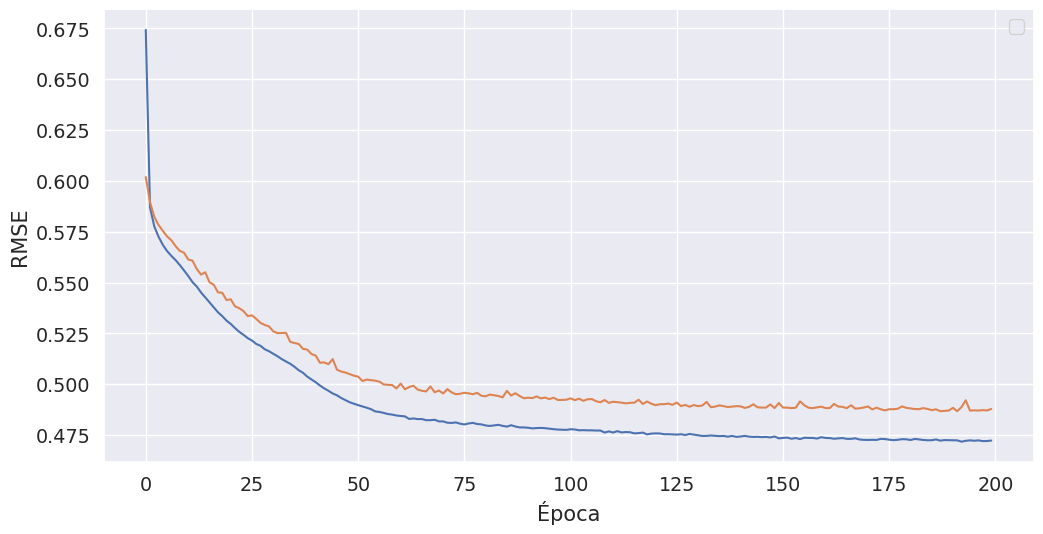

In [47]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Vemos que el aprendizaje es mucho menos errático.

Ahora intentemos complejizar el modelo agregando una capa más

In [48]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 27s - loss: 1.0725

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.8072 

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.6807

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.6102

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.5540

10880/12384 [=========================>....] - ETA: 0s - loss: 0.5092

12384/12384 [==============================] - 0s 40us/step - loss: 0.4935 - val_loss: 0.3523


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2539

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.3386

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.3411

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.3324

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.3338

11200/12384 [==========================>...] - ETA: 0s - loss: 0.3288

12384/12384 [==============================] - 0s 33us/step - loss: 0.3294 - val_loss: 0.3243


Epoch 3/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2497

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.3324

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.3247

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.3239

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.3184

11040/12384 [=========================>....] - ETA: 0s - loss: 0.3126

12384/12384 [==============================] - 0s 33us/step - loss: 0.3104 - val_loss: 0.3102


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2255

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.3013

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.3002

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2937

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2976

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2989

12384/12384 [==============================] - 0s 33us/step - loss: 0.2984 - val_loss: 0.3024


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1394

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2877

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2852

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2853

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2900

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2899

12384/12384 [==============================] - 0s 33us/step - loss: 0.2893 - val_loss: 0.2951


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1021

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2956

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.3091

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2906

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2877

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2881



12384/12384 [==============================] - 0s 32us/step - loss: 0.2835 - val_loss: 0.2900


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2877

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2918

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.3016

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2865

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2797

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2800

12384/12384 [==============================] - 0s 32us/step - loss: 0.2785 - val_loss: 0.2868


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1746

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3035

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2883

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2954

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2864

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2836

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2780

12384/12384 [==============================] - 0s 36us/step - loss: 0.2750 - val_loss: 0.2849


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5830

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2887

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2864

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2802

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2750

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2733

12384/12384 [==============================] - 0s 32us/step - loss: 0.2713 - val_loss: 0.2815


Epoch 10/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2619

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2665

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2690

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2720

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2682

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2693

12384/12384 [==============================] - 0s 33us/step - loss: 0.2687 - val_loss: 0.2795


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1852

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2779

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2720

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2690

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2602

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 32us/step - loss: 0.2656 - val_loss: 0.2776


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3747

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2695

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2568

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2602

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2629

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2645

12384/12384 [==============================] - 0s 33us/step - loss: 0.2635 - val_loss: 0.2741


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1036

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2677

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2721

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2667

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2610



11104/12384 [=========================>....] - ETA: 0s - loss: 0.2616

12384/12384 [==============================] - 0s 33us/step - loss: 0.2610 - val_loss: 0.2731


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3722

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2614

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2733

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2662

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2675

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2620

12384/12384 [==============================] - 0s 33us/step - loss: 0.2589 - val_loss: 0.2737


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1458

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2407

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2541

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2552

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2551

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2543

12384/12384 [==============================] - 0s 33us/step - loss: 0.2569 - val_loss: 0.2700


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1667

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2587

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2609

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2609

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2567

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2558

12384/12384 [==============================] - 0s 32us/step - loss: 0.2546 - val_loss: 0.2680


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3268

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2506

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2496

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2509



 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2517

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2537

12384/12384 [==============================] - 0s 33us/step - loss: 0.2528 - val_loss: 0.2694


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1849

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2568

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2477

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2421

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2514

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2511

12384/12384 [==============================] - 0s 32us/step - loss: 0.2502 - val_loss: 0.2654


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2160

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2489

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2454

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2450

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2465

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2469

12384/12384 [==============================] - 0s 33us/step - loss: 0.2483 - val_loss: 0.2630


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2907

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2576

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2601

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2498

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2508

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2489

12384/12384 [==============================] - 0s 33us/step - loss: 0.2463 - val_loss: 0.2622


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3181

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2446

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2442

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2423

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2436

12384/12384 [==============================] - 0s 32us/step - loss: 0.2438 - val_loss: 0.2585


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1338

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2478

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2426

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2367

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2373

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 32us/step - loss: 0.2417 - val_loss: 0.2578


Epoch 23/100


   32/12384 [..............................] - ETA: 0s - loss: 0.1317

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2357

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2248

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2334

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2400

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 33us/step - loss: 0.2401 - val_loss: 0.2547


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2061

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2518

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2533

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2423

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2391

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 35us/step - loss: 0.2384 - val_loss: 0.2564


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1111

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2490

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2422

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2381

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2317

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 35us/step - loss: 0.2374 - val_loss: 0.2533


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1449

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2357

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2276

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2337

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2337

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2367



11872/12384 [===========================>..] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 37us/step - loss: 0.2364 - val_loss: 0.2518


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2109

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2032

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2192

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2302

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2319

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2322

12256/12384 [============================>.] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 35us/step - loss: 0.2354 - val_loss: 0.2511


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5593

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2195

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2297

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2361

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2370

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 34us/step - loss: 0.2345 - val_loss: 0.2545


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1619

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2354

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2439

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2429

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2420

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 34us/step - loss: 0.2341 - val_loss: 0.2511


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1639

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2345

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2346

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2338

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2352

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2353

12032/12384 [============================>.] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 36us/step - loss: 0.2330 - val_loss: 0.2519


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2430

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2199

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2263

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2291



 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2320

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 34us/step - loss: 0.2328 - val_loss: 0.2506


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2636

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2083

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2269

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2254

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2322

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 35us/step - loss: 0.2317 - val_loss: 0.2505


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1971

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2314

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2263

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2311

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 33us/step - loss: 0.2321 - val_loss: 0.2508


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1848

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2449

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2384

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2356

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2316

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2307



12384/12384 [==============================] - 0s 33us/step - loss: 0.2316 - val_loss: 0.2504


Epoch 35/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1326

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2274

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2303

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2317

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2298

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 33us/step - loss: 0.2309 - val_loss: 0.2493


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0810

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2360

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2369

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2362

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2319

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2295

12384/12384 [==============================] - 0s 32us/step - loss: 0.2305 - val_loss: 0.2479


Epoch 37/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3086

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2150

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2218

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2248

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2294

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2275

12384/12384 [==============================] - 0s 33us/step - loss: 0.2300 - val_loss: 0.2474


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3713

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2460

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2382

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2306

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2300

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 33us/step - loss: 0.2294 - val_loss: 0.2477


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2645

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2421

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2262

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2319

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2281

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 32us/step - loss: 0.2289 - val_loss: 0.2481


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1972



 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2510

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2348

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2335

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2311

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 33us/step - loss: 0.2286 - val_loss: 0.2483


Epoch 41/100
   32/12384 [..............................] - ETA: 2s - loss: 0.2950

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2289

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2329

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2342

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2306

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 35us/step - loss: 0.2284 - val_loss: 0.2501


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2987

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2193

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2226

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2320

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2327

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 34us/step - loss: 0.2285 - val_loss: 0.2476


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2880

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2090

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2293

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2262



 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2279

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 34us/step - loss: 0.2281 - val_loss: 0.2474


Epoch 44/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3550

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2299

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2186

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2225

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2257

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 35us/step - loss: 0.2274 - val_loss: 0.2491


Epoch 45/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1463

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2492

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2429

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2303

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2268

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2265

12384/12384 [==============================] - 0s 35us/step - loss: 0.2278 - val_loss: 0.2462


Epoch 46/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1647

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2309

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2263

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2278



 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2235

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2275

12384/12384 [==============================] - 0s 33us/step - loss: 0.2269 - val_loss: 0.2462


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1812

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2260

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2208

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2222

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2269

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 33us/step - loss: 0.2268 - val_loss: 0.2458


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0852

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2179

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2231

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2312



 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2300

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2295

12384/12384 [==============================] - 0s 35us/step - loss: 0.2269 - val_loss: 0.2477


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2297

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2080

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2137

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2146

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2252

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 35us/step - loss: 0.2268 - val_loss: 0.2444


Epoch 50/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1035

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2085

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2267

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2247

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2244

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2258

12384/12384 [==============================] - 0s 35us/step - loss: 0.2258 - val_loss: 0.2467


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1281

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2285

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2321

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2288

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2279

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 34us/step - loss: 0.2257 - val_loss: 0.2454


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2574

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2138

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2247

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2244

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2273

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2259

12160/12384 [============================>.] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 36us/step - loss: 0.2261 - val_loss: 0.2443


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2035

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2289

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2286

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2249

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2245

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2256

12384/12384 [==============================] - 0s 34us/step - loss: 0.2256 - val_loss: 0.2435


Epoch 54/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1228

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2110

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2177

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2265



 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2255

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2247

12384/12384 [==============================] - 0s 35us/step - loss: 0.2246 - val_loss: 0.2453


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3452

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2298

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2324

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2274

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2300

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2258

12288/12384 [============================>.] - ETA: 0s - loss: 0.2253

12384/12384 [==============================] - 0s 35us/step - loss: 0.2247 - val_loss: 0.2491


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2355

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2143

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2268

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2248

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2253

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2269

12384/12384 [==============================] - 0s 34us/step - loss: 0.2249 - val_loss: 0.2436


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3677

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2394

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2313

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2290

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2257

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 34us/step - loss: 0.2246 - val_loss: 0.2431


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4941

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2301

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2225

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2346

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2298

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2214

12352/12384 [============================>.] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 35us/step - loss: 0.2248 - val_loss: 0.2446


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3759

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2292

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2347

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2256

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2263

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2219

12384/12384 [==============================] - 0s 34us/step - loss: 0.2240 - val_loss: 0.2425


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4631

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2421

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2312

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2270

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2254

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2259

12224/12384 [============================>.] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 38us/step - loss: 0.2247 - val_loss: 0.2430


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1336

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2333

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2306

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2308

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2285

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2270

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2257

12384/12384 [==============================] - 0s 37us/step - loss: 0.2240 - val_loss: 0.2443


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1161

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2026

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2193

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2163

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2205

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2228

12384/12384 [==============================] - 0s 34us/step - loss: 0.2232 - val_loss: 0.2443


Epoch 63/100
   32/12384 [..............................] - ETA: 2s - loss: 0.2002

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2072

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2195

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2194

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2214

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2248

12384/12384 [==============================] - 0s 37us/step - loss: 0.2235 - val_loss: 0.2414


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2429

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2176

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2249

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2200

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2214

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2240

12384/12384 [==============================] - 0s 35us/step - loss: 0.2234 - val_loss: 0.2427


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2274

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2278

 3552/12384 [=======>......................] - ETA: 0s - loss: 0.2237

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2248

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2220

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2253

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2247

12384/12384 [==============================] - 0s 37us/step - loss: 0.2233 - val_loss: 0.2449


Epoch 66/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2015

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2111

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2173

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2161

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2177



10944/12384 [=========================>....] - ETA: 0s - loss: 0.2211

12384/12384 [==============================] - 0s 34us/step - loss: 0.2224 - val_loss: 0.2444


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1247

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2220

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2227

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2188

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2224

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2230

12384/12384 [==============================] - 0s 33us/step - loss: 0.2228 - val_loss: 0.2425


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2962

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2162

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2251

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2283

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2263

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2232

12384/12384 [==============================] - 0s 34us/step - loss: 0.2228 - val_loss: 0.2430


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3761

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2158

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2220

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2222

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2246

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2253

12384/12384 [==============================] - 0s 33us/step - loss: 0.2225 - val_loss: 0.2416


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2200

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2350

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2286

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2217

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2207



11136/12384 [=========================>....] - ETA: 0s - loss: 0.2205

12384/12384 [==============================] - 0s 33us/step - loss: 0.2223 - val_loss: 0.2422


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4113

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2237

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2283

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2231

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2196

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2213

12384/12384 [==============================] - 0s 33us/step - loss: 0.2215 - val_loss: 0.2449


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1717

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2207

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2163

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2202

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2238

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2201

12384/12384 [==============================] - 0s 34us/step - loss: 0.2218 - val_loss: 0.2415


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1779

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2103

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2211

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2235

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2190

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2193

12384/12384 [==============================] - 0s 34us/step - loss: 0.2213 - val_loss: 0.2423


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1829

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2115

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2101

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2167



 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2234

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2224

12192/12384 [============================>.] - ETA: 0s - loss: 0.2209

12384/12384 [==============================] - 0s 36us/step - loss: 0.2219 - val_loss: 0.2401


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3777

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2144

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2180

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2213

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2221



11040/12384 [=========================>....] - ETA: 0s - loss: 0.2231

12384/12384 [==============================] - 0s 34us/step - loss: 0.2215 - val_loss: 0.2397


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1666

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2072

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2133

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2147

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2187

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2209

12384/12384 [==============================] - 0s 34us/step - loss: 0.2212 - val_loss: 0.2432


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1713

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2295

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2209

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2246

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2242

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2212

12384/12384 [==============================] - 0s 33us/step - loss: 0.2205 - val_loss: 0.2397


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1840

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2208

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2186

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2218

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2195

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2204

12384/12384 [==============================] - 0s 33us/step - loss: 0.2214 - val_loss: 0.2411


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1164

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2182

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2272

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2256

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2233

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2207

12384/12384 [==============================] - 0s 33us/step - loss: 0.2206 - val_loss: 0.2410


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1836

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2084

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2061

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2087

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2130

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2148

12384/12384 [==============================] - 0s 33us/step - loss: 0.2201 - val_loss: 0.2396


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1957

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2397

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2328

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2250

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2234

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2226

12384/12384 [==============================] - 0s 34us/step - loss: 0.2203 - val_loss: 0.2387


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2606

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2223

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2204

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2177

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2206

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2208

12384/12384 [==============================] - 0s 35us/step - loss: 0.2203 - val_loss: 0.2403


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3086

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2158

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2342

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2214

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2216

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2188

12384/12384 [==============================] - 0s 34us/step - loss: 0.2196 - val_loss: 0.2415


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1145

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2265

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2237

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2206

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2217

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2201

12384/12384 [==============================] - 0s 34us/step - loss: 0.2192 - val_loss: 0.2386


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1832

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2203

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2226

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2279

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2207

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2195

12384/12384 [==============================] - 0s 33us/step - loss: 0.2193 - val_loss: 0.2405


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2056

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2124

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2179

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2152

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2189

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2222

12384/12384 [==============================] - 0s 33us/step - loss: 0.2197 - val_loss: 0.2384


Epoch 87/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1549

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2152

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2171

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2212

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2205

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2183

12384/12384 [==============================] - 0s 33us/step - loss: 0.2189 - val_loss: 0.2388


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1473

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2219

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2260

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2209

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2209

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2182

12384/12384 [==============================] - 0s 32us/step - loss: 0.2189 - val_loss: 0.2391


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1663

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2299

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2215

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2161

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2155

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2188

12384/12384 [==============================] - 0s 32us/step - loss: 0.2191 - val_loss: 0.2377


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1903

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2149

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2199

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2182

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2206

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2202

12384/12384 [==============================] - 0s 32us/step - loss: 0.2183 - val_loss: 0.2384


Epoch 91/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2573

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2111

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2200

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2226

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2216

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2195

12384/12384 [==============================] - 0s 34us/step - loss: 0.2184 - val_loss: 0.2376


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1045

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2043

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2067

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2096

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2093

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2159

12384/12384 [==============================] - 0s 33us/step - loss: 0.2178 - val_loss: 0.2406


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0883

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2322

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2249

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2172

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2151

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2200

12384/12384 [==============================] - 0s 32us/step - loss: 0.2180 - val_loss: 0.2411


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4848

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2159

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2105

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2170

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2186

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2188

12384/12384 [==============================] - 0s 33us/step - loss: 0.2181 - val_loss: 0.2364


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1795

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2142

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2092

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2150

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2147

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2201

12384/12384 [==============================] - 0s 33us/step - loss: 0.2182 - val_loss: 0.2377


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1229

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2146

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2187

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2178

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2205

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2187

12384/12384 [==============================] - 0s 32us/step - loss: 0.2174 - val_loss: 0.2368


Epoch 97/100


   32/12384 [..............................] - ETA: 1s - loss: 0.1347

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2169

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2162

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2203

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2191

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2192

12384/12384 [==============================] - 0s 33us/step - loss: 0.2175 - val_loss: 0.2378


Epoch 98/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0817

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2227

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2275

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2226

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2161

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2124

12384/12384 [==============================] - 0s 34us/step - loss: 0.2165 - val_loss: 0.2378


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1811

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2111

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2231

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2155

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2147

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2174



12384/12384 [==============================] - 0s 33us/step - loss: 0.2172 - val_loss: 0.2371


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3962

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2216

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2213

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2154

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2197

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2158

12384/12384 [==============================] - 0s 33us/step - loss: 0.2174 - val_loss: 0.2352


No handles with labels found to put in legend.


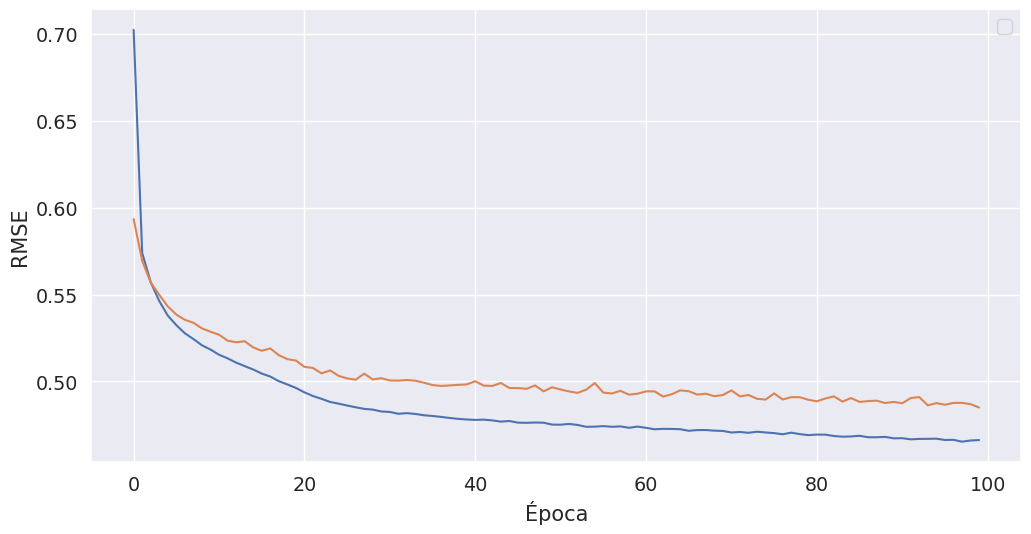

In [49]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

In [50]:
california_df_ld = pd.DataFrame(california.data, columns=california.feature_names)

Voy a tomar menos datos y voy a agregar más parámetros a mi red: Qué puede pasar cuando tengo menos cantidad de datos y más cantidad de parámetros a entrenar? Qué puede malir sal?

In [51]:
X = scaled_california_df[0:10000].drop("MedHouseVal", axis=1)
y = scaled_california_df[0:10000].filter(items=["MedHouseVal"])

In [52]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [53]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(8,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 13s - loss: 0.7117

2016/6000 [=========>....................] - ETA: 0s - loss: 0.5330 

4128/6000 [===================>..........] - ETA: 0s - loss: 0.4527

6000/6000 [==============================] - 0s 49us/step - loss: 0.4160 - val_loss: 0.3349


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2239

2304/6000 [==========>...................] - ETA: 0s - loss: 0.3149

4576/6000 [=====================>........] - ETA: 0s - loss: 0.3397

6000/6000 [==============================] - 0s 32us/step - loss: 0.3386 - val_loss: 0.3075


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4414

2304/6000 [==========>...................] - ETA: 0s - loss: 0.3328

4576/6000 [=====================>........] - ETA: 0s - loss: 0.3146

6000/6000 [==============================] - 0s 31us/step - loss: 0.3221 - val_loss: 0.3003


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2363

2272/6000 [==========>...................] - ETA: 0s - loss: 0.3249

4544/6000 [=====================>........] - ETA: 0s - loss: 0.3139

6000/6000 [==============================] - 0s 31us/step - loss: 0.3113 - val_loss: 0.2863


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2750

2304/6000 [==========>...................] - ETA: 0s - loss: 0.3083

4640/6000 [======================>.......] - ETA: 0s - loss: 0.3013

6000/6000 [==============================] - 0s 31us/step - loss: 0.2970 - val_loss: 0.2769


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0991

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2814

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2864

6000/6000 [==============================] - 0s 33us/step - loss: 0.2826 - val_loss: 0.2690


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2239

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2785

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2700

6000/6000 [==============================] - 0s 32us/step - loss: 0.2716 - val_loss: 0.2596


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3023

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2703

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2628

6000/6000 [==============================] - 0s 32us/step - loss: 0.2611 - val_loss: 0.2536


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2042

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2643

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2557

6000/6000 [==============================] - 0s 32us/step - loss: 0.2530 - val_loss: 0.2494


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2920

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2391

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2532

6000/6000 [==============================] - 0s 34us/step - loss: 0.2460 - val_loss: 0.2422


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2401

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2535

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2443

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2397

6000/6000 [==============================] - 0s 37us/step - loss: 0.2398 - val_loss: 0.2449


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1621

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2242

3456/6000 [================>.............] - ETA: 0s - loss: 0.2276

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2340

6000/6000 [==============================] - 0s 36us/step - loss: 0.2352 - val_loss: 0.2342


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1955

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2485

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 31us/step - loss: 0.2328 - val_loss: 0.2319


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1602

2368/6000 [==========>...................] - ETA: 0s - loss: 0.2243

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 32us/step - loss: 0.2264 - val_loss: 0.2288


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4786

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2427

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 32us/step - loss: 0.2240 - val_loss: 0.2247


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1022

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2190

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2152

6000/6000 [==============================] - 0s 32us/step - loss: 0.2212 - val_loss: 0.2293


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1676

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2194

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 32us/step - loss: 0.2190 - val_loss: 0.2199


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2330

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 31us/step - loss: 0.2152 - val_loss: 0.2183


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1975

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2113

6000/6000 [==============================] - 0s 32us/step - loss: 0.2154 - val_loss: 0.2189


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2936

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2091

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 31us/step - loss: 0.2116 - val_loss: 0.2149


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4144

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2040

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2060

6000/6000 [==============================] - 0s 31us/step - loss: 0.2100 - val_loss: 0.2160


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1610

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1944

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2015

6000/6000 [==============================] - 0s 31us/step - loss: 0.2081 - val_loss: 0.2185


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0629

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1931

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2069

6000/6000 [==============================] - 0s 32us/step - loss: 0.2082 - val_loss: 0.2134


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2064

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2059

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2056

6000/6000 [==============================] - 0s 31us/step - loss: 0.2063 - val_loss: 0.2130


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2967

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2093

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2090

6000/6000 [==============================] - 0s 31us/step - loss: 0.2050 - val_loss: 0.2106


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2329

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2129

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2048

6000/6000 [==============================] - 0s 32us/step - loss: 0.2021 - val_loss: 0.2130


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1936

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1845

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1986

6000/6000 [==============================] - 0s 31us/step - loss: 0.2019 - val_loss: 0.2129


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1522

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1887

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2031

6000/6000 [==============================] - 0s 33us/step - loss: 0.2025 - val_loss: 0.2090


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1860

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1940

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1967

6000/6000 [==============================] - 0s 32us/step - loss: 0.2019 - val_loss: 0.2093


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2083

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2247

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2055

6000/6000 [==============================] - 0s 31us/step - loss: 0.1998 - val_loss: 0.2095


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2504

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1910

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1978

6000/6000 [==============================] - 0s 32us/step - loss: 0.1990 - val_loss: 0.2124


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2056

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1988

6000/6000 [==============================] - 0s 31us/step - loss: 0.1973 - val_loss: 0.2075


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1569

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2182

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2049

6000/6000 [==============================] - 0s 31us/step - loss: 0.2003 - val_loss: 0.2060


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1943

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2059

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1975

6000/6000 [==============================] - 0s 32us/step - loss: 0.1967 - val_loss: 0.2171


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1988

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2022

6000/6000 [==============================] - 0s 31us/step - loss: 0.1969 - val_loss: 0.2065


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2098

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1873

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1913

6000/6000 [==============================] - 0s 31us/step - loss: 0.1964 - val_loss: 0.2040


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3597

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1890

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 31us/step - loss: 0.1955 - val_loss: 0.2091


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0812

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1837

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 31us/step - loss: 0.1942 - val_loss: 0.2047


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2208

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1861

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1915

6000/6000 [==============================] - 0s 31us/step - loss: 0.1941 - val_loss: 0.2087


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1505

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1981

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1962

6000/6000 [==============================] - 0s 31us/step - loss: 0.1941 - val_loss: 0.2074


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1086

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1890

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1946

6000/6000 [==============================] - 0s 31us/step - loss: 0.1931 - val_loss: 0.2105


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2115

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1939

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1871

6000/6000 [==============================] - 0s 32us/step - loss: 0.1921 - val_loss: 0.2023


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1749

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 31us/step - loss: 0.1911 - val_loss: 0.2077


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0710

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1862

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1885

6000/6000 [==============================] - 0s 32us/step - loss: 0.1931 - val_loss: 0.2024


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1372

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1778

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1909

6000/6000 [==============================] - 0s 32us/step - loss: 0.1903 - val_loss: 0.2045


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1649

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1834

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 33us/step - loss: 0.1913 - val_loss: 0.2023


Epoch 47/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1643

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1852

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1915

6000/6000 [==============================] - 0s 31us/step - loss: 0.1892 - val_loss: 0.2011


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1878

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1803

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 31us/step - loss: 0.1904 - val_loss: 0.2067


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3002

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1922

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 31us/step - loss: 0.1895 - val_loss: 0.2063


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1064

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1951

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 31us/step - loss: 0.1894 - val_loss: 0.2083


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1594

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1764

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 31us/step - loss: 0.1884 - val_loss: 0.2087


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1883

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1915

6000/6000 [==============================] - 0s 32us/step - loss: 0.1889 - val_loss: 0.2052


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2074

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1738

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 31us/step - loss: 0.1876 - val_loss: 0.1992


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1142

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1813

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 32us/step - loss: 0.1879 - val_loss: 0.2115


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1812

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 32us/step - loss: 0.1898 - val_loss: 0.2060


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2132

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1922

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 31us/step - loss: 0.1876 - val_loss: 0.2002


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1946

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1954

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1946

6000/6000 [==============================] - 0s 31us/step - loss: 0.1872 - val_loss: 0.2024


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0927

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1980

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1865

6000/6000 [==============================] - 0s 31us/step - loss: 0.1856 - val_loss: 0.2059


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1307

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1995

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1894

6000/6000 [==============================] - 0s 31us/step - loss: 0.1864 - val_loss: 0.2042


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1931

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1882

6000/6000 [==============================] - 0s 32us/step - loss: 0.1855 - val_loss: 0.1998


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0583

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1810

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 31us/step - loss: 0.1863 - val_loss: 0.1999


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1697

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1886

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 32us/step - loss: 0.1842 - val_loss: 0.2005


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1960

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 34us/step - loss: 0.1844 - val_loss: 0.2054


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2346

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1837

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 31us/step - loss: 0.1850 - val_loss: 0.2033


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2127

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1890

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 31us/step - loss: 0.1838 - val_loss: 0.1993


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1850

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 32us/step - loss: 0.1826 - val_loss: 0.2027


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1970

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1879

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 31us/step - loss: 0.1830 - val_loss: 0.2055


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1508

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1855

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 31us/step - loss: 0.1825 - val_loss: 0.1985


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1859

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 31us/step - loss: 0.1824 - val_loss: 0.2006


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1906

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 31us/step - loss: 0.1823 - val_loss: 0.1986


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1914

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1827

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 32us/step - loss: 0.1824 - val_loss: 0.2030


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1506

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1804

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 31us/step - loss: 0.1818 - val_loss: 0.2021


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1229

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1896

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 31us/step - loss: 0.1822 - val_loss: 0.1969


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0868

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1818

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 32us/step - loss: 0.1821 - val_loss: 0.2005


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2368

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1808

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 31us/step - loss: 0.1804 - val_loss: 0.2028


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3246

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1735

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 32us/step - loss: 0.1805 - val_loss: 0.2018


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1691

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1754

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 31us/step - loss: 0.1815 - val_loss: 0.1984


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1783

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 32us/step - loss: 0.1800 - val_loss: 0.2018


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1484

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1921

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 31us/step - loss: 0.1791 - val_loss: 0.1996


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1840

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 31us/step - loss: 0.1791 - val_loss: 0.1995


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1891

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1855

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 31us/step - loss: 0.1798 - val_loss: 0.1963


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1582

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1744

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 31us/step - loss: 0.1785 - val_loss: 0.1990


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1548

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1995

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 31us/step - loss: 0.1789 - val_loss: 0.1962


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1373

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1798

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 31us/step - loss: 0.1790 - val_loss: 0.1977


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2958

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1829

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 31us/step - loss: 0.1777 - val_loss: 0.1942


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1755

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 31us/step - loss: 0.1791 - val_loss: 0.2003


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0748

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1625

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 31us/step - loss: 0.1758 - val_loss: 0.1958


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2440

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1717

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1685

6000/6000 [==============================] - 0s 31us/step - loss: 0.1761 - val_loss: 0.1965


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1312

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1912

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 32us/step - loss: 0.1774 - val_loss: 0.2039


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2079

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1807

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 31us/step - loss: 0.1768 - val_loss: 0.2009


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1150

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1790

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 31us/step - loss: 0.1750 - val_loss: 0.2084


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0847

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1779

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 31us/step - loss: 0.1761 - val_loss: 0.2045


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1734

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 31us/step - loss: 0.1754 - val_loss: 0.1958


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0909

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1741

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 31us/step - loss: 0.1748 - val_loss: 0.1955


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1694

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 31us/step - loss: 0.1745 - val_loss: 0.1961


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2324

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1709

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 31us/step - loss: 0.1749 - val_loss: 0.1955


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1682

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1699

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 31us/step - loss: 0.1740 - val_loss: 0.1933


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1731

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 32us/step - loss: 0.1740 - val_loss: 0.1976


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1291

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1809

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 31us/step - loss: 0.1740 - val_loss: 0.1992


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2714

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1829

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 31us/step - loss: 0.1717 - val_loss: 0.1951


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1898

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1917

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 33us/step - loss: 0.1733 - val_loss: 0.1949


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0649

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1719

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 31us/step - loss: 0.1724 - val_loss: 0.2006


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2427

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1736

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 31us/step - loss: 0.1725 - val_loss: 0.1994


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1517

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 32us/step - loss: 0.1714 - val_loss: 0.1934


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1891

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1807

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 31us/step - loss: 0.1714 - val_loss: 0.1943


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0908

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1831

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 31us/step - loss: 0.1722 - val_loss: 0.1977


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1234

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1827

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 31us/step - loss: 0.1712 - val_loss: 0.1932


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1666

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 33us/step - loss: 0.1712 - val_loss: 0.1929


Epoch 109/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1728

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1667

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 33us/step - loss: 0.1699 - val_loss: 0.1938


Epoch 110/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1069

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1906

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 32us/step - loss: 0.1700 - val_loss: 0.1979


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2486

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1490

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 31us/step - loss: 0.1700 - val_loss: 0.1924


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1201

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1707

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 31us/step - loss: 0.1699 - val_loss: 0.2079


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1151

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1745

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 31us/step - loss: 0.1703 - val_loss: 0.1978


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1682

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 32us/step - loss: 0.1687 - val_loss: 0.1926


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2154

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1540

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 32us/step - loss: 0.1692 - val_loss: 0.1953


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1050

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1724

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 31us/step - loss: 0.1689 - val_loss: 0.1942


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3014

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1740

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 32us/step - loss: 0.1686 - val_loss: 0.1995


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2893

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1782

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1675



6000/6000 [==============================] - 0s 33us/step - loss: 0.1678 - val_loss: 0.1921


Epoch 119/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2263



2048/6000 [=========>....................] - ETA: 0s - loss: 0.1670

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 35us/step - loss: 0.1686 - val_loss: 0.1943


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4222

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1738

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 34us/step - loss: 0.1669 - val_loss: 0.1946


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3675

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1752

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 33us/step - loss: 0.1674 - val_loss: 0.1909


Epoch 122/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2536

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1690

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1687

5888/6000 [============================>.] - ETA: 0s - loss: 0.1678

6000/6000 [==============================] - 0s 35us/step - loss: 0.1665 - val_loss: 0.1932


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1533

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 31us/step - loss: 0.1676 - val_loss: 0.1924


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1695

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1642

6000/6000 [==============================] - 0s 31us/step - loss: 0.1670 - val_loss: 0.1931


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2193

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1597

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1643

6000/6000 [==============================] - 0s 31us/step - loss: 0.1662 - val_loss: 0.1927


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1798

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1630

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1628

6000/6000 [==============================] - 0s 31us/step - loss: 0.1654 - val_loss: 0.1903


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1174

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1521

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1621

6000/6000 [==============================] - 0s 31us/step - loss: 0.1656 - val_loss: 0.1989


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1795

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1610

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 31us/step - loss: 0.1673 - val_loss: 0.1972


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1673

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 31us/step - loss: 0.1668 - val_loss: 0.1929


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1756

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1550

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1603

6000/6000 [==============================] - 0s 31us/step - loss: 0.1646 - val_loss: 0.1906


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2811

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1558

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1616

6000/6000 [==============================] - 0s 31us/step - loss: 0.1648 - val_loss: 0.1898


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0629

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1593

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1624

6000/6000 [==============================] - 0s 31us/step - loss: 0.1650 - val_loss: 0.1954


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0550

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1767

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 31us/step - loss: 0.1645 - val_loss: 0.1898


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2253

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1554

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 31us/step - loss: 0.1649 - val_loss: 0.1921


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1675

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 32us/step - loss: 0.1632 - val_loss: 0.1911


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1509

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1633

6000/6000 [==============================] - 0s 31us/step - loss: 0.1638 - val_loss: 0.1974


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3933

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1729

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 31us/step - loss: 0.1641 - val_loss: 0.1909


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2651

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1790

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 31us/step - loss: 0.1640 - val_loss: 0.1918


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1966

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1751

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1627

6000/6000 [==============================] - 0s 31us/step - loss: 0.1632 - val_loss: 0.1929


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1021

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1600

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 31us/step - loss: 0.1633 - val_loss: 0.1932


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1073

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1643

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 33us/step - loss: 0.1639 - val_loss: 0.1957


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1878

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1477

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 31us/step - loss: 0.1627 - val_loss: 0.1907


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2471

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1659

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 31us/step - loss: 0.1627 - val_loss: 0.1917


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3672

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1636

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1635

6000/6000 [==============================] - 0s 31us/step - loss: 0.1620 - val_loss: 0.1932


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1540

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1615

6000/6000 [==============================] - 0s 31us/step - loss: 0.1630 - val_loss: 0.1892


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2846

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1535

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1638

6000/6000 [==============================] - 0s 31us/step - loss: 0.1616 - val_loss: 0.1914


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1998

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1610

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1607

6000/6000 [==============================] - 0s 31us/step - loss: 0.1612 - val_loss: 0.1886


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3486

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1637

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1655

6000/6000 [==============================] - 0s 32us/step - loss: 0.1620 - val_loss: 0.1902


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1463

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1517

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1576

6000/6000 [==============================] - 0s 32us/step - loss: 0.1617 - val_loss: 0.1902


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1628

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1610



6000/6000 [==============================] - 0s 34us/step - loss: 0.1621 - val_loss: 0.1890


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1217

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1648

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1608

6000/6000 [==============================] - 0s 33us/step - loss: 0.1611 - val_loss: 0.1891


Epoch 152/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3888

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1569



4192/6000 [===================>..........] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 33us/step - loss: 0.1617 - val_loss: 0.1907


Epoch 153/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0923



2304/6000 [==========>...................] - ETA: 0s - loss: 0.1639



4448/6000 [=====================>........] - ETA: 0s - loss: 0.1643

6000/6000 [==============================] - 0s 32us/step - loss: 0.1616 - val_loss: 0.1896


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1387

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1599

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 33us/step - loss: 0.1594 - val_loss: 0.2020


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2444

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1669

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 32us/step - loss: 0.1612 - val_loss: 0.1876


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1616

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1596

6000/6000 [==============================] - 0s 31us/step - loss: 0.1603 - val_loss: 0.1892


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0991

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1533

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 31us/step - loss: 0.1585 - val_loss: 0.1884


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1554

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1596

6000/6000 [==============================] - 0s 31us/step - loss: 0.1594 - val_loss: 0.1899


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1547

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1404

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1574

6000/6000 [==============================] - 0s 31us/step - loss: 0.1598 - val_loss: 0.1994


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0860

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1483

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1570

6000/6000 [==============================] - 0s 31us/step - loss: 0.1599 - val_loss: 0.1913


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1983

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1457

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1559

6000/6000 [==============================] - 0s 31us/step - loss: 0.1592 - val_loss: 0.1896


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1119

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1438

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1568

6000/6000 [==============================] - 0s 31us/step - loss: 0.1606 - val_loss: 0.1877


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0896

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1541

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1532

6000/6000 [==============================] - 0s 31us/step - loss: 0.1586 - val_loss: 0.1917


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0612

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1577

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1612

6000/6000 [==============================] - 0s 31us/step - loss: 0.1596 - val_loss: 0.1942


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1432

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1529

6000/6000 [==============================] - 0s 30us/step - loss: 0.1600 - val_loss: 0.1884


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2010

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1565

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1559

6000/6000 [==============================] - 0s 31us/step - loss: 0.1584 - val_loss: 0.1883


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1584

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1593

6000/6000 [==============================] - 0s 31us/step - loss: 0.1582 - val_loss: 0.1911


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1568

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1611

6000/6000 [==============================] - 0s 31us/step - loss: 0.1600 - val_loss: 0.1874


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1408

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1604

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 31us/step - loss: 0.1580 - val_loss: 0.1915


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0524

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1644

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 31us/step - loss: 0.1587 - val_loss: 0.1912


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1380

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1626

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1547

6000/6000 [==============================] - 0s 31us/step - loss: 0.1582 - val_loss: 0.1968


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0959

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1599

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 31us/step - loss: 0.1580 - val_loss: 0.1949


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2912

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1741

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1643

6000/6000 [==============================] - 0s 32us/step - loss: 0.1591 - val_loss: 0.1849


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0889

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1410

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1519

6000/6000 [==============================] - 0s 31us/step - loss: 0.1569 - val_loss: 0.1888


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1186

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1559

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1586

6000/6000 [==============================] - 0s 30us/step - loss: 0.1564 - val_loss: 0.1850


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1158

2432/6000 [===========>..................] - ETA: 0s - loss: 0.1547

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1529

6000/6000 [==============================] - 0s 29us/step - loss: 0.1571 - val_loss: 0.1943


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1518

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1519

6000/6000 [==============================] - 0s 29us/step - loss: 0.1568 - val_loss: 0.1893


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1111

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1497

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1547

6000/6000 [==============================] - 0s 31us/step - loss: 0.1576 - val_loss: 0.1865


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1483

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1579

6000/6000 [==============================] - 0s 31us/step - loss: 0.1564 - val_loss: 0.1848


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1930

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1692

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1618

6000/6000 [==============================] - 0s 30us/step - loss: 0.1576 - val_loss: 0.1862


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1538

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1630

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1601

6000/6000 [==============================] - 0s 30us/step - loss: 0.1572 - val_loss: 0.1865


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0911

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1466

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 30us/step - loss: 0.1557 - val_loss: 0.1891


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0805

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1603

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1603

6000/6000 [==============================] - 0s 29us/step - loss: 0.1571 - val_loss: 0.1843


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1549

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 30us/step - loss: 0.1565 - val_loss: 0.1905


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1933

2432/6000 [===========>..................] - ETA: 0s - loss: 0.1483

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1532

6000/6000 [==============================] - 0s 30us/step - loss: 0.1555 - val_loss: 0.1873


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0779

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1573

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1570

6000/6000 [==============================] - 0s 30us/step - loss: 0.1565 - val_loss: 0.1895


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2532

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1567

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1567

6000/6000 [==============================] - 0s 30us/step - loss: 0.1542 - val_loss: 0.1895


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

2432/6000 [===========>..................] - ETA: 0s - loss: 0.1671

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1602

6000/6000 [==============================] - 0s 30us/step - loss: 0.1554 - val_loss: 0.1895


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1496

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1550

6000/6000 [==============================] - 0s 30us/step - loss: 0.1559 - val_loss: 0.1847


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1762

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1528

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 30us/step - loss: 0.1561 - val_loss: 0.1881


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1516

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1524

6000/6000 [==============================] - 0s 31us/step - loss: 0.1563 - val_loss: 0.1889


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1532

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 31us/step - loss: 0.1547 - val_loss: 0.1891


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1922

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1615

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1564

6000/6000 [==============================] - 0s 30us/step - loss: 0.1538 - val_loss: 0.1866


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0655

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1546

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1535

6000/6000 [==============================] - 0s 31us/step - loss: 0.1548 - val_loss: 0.1875


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2090

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1578

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 31us/step - loss: 0.1552 - val_loss: 0.1899


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1461

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1707

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 30us/step - loss: 0.1541 - val_loss: 0.1933


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0818

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1501

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1503

6000/6000 [==============================] - 0s 30us/step - loss: 0.1544 - val_loss: 0.1890


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1474

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1508

6000/6000 [==============================] - 0s 31us/step - loss: 0.1534 - val_loss: 0.1877


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1442

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1541

6000/6000 [==============================] - 0s 32us/step - loss: 0.1532 - val_loss: 0.1912


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1714

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1516

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1441

6000/6000 [==============================] - 0s 33us/step - loss: 0.1534 - val_loss: 0.1912


Epoch 201/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2172

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1468

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1562

6000/6000 [==============================] - 0s 32us/step - loss: 0.1541 - val_loss: 0.1894


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1797

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1585

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1603

6000/6000 [==============================] - 0s 34us/step - loss: 0.1542 - val_loss: 0.1893


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1537

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1498

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1485

6000/6000 [==============================] - 0s 32us/step - loss: 0.1533 - val_loss: 0.1870


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1083

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1583

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1567

6000/6000 [==============================] - 0s 31us/step - loss: 0.1542 - val_loss: 0.1877


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0897

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1491

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1507

6000/6000 [==============================] - 0s 32us/step - loss: 0.1536 - val_loss: 0.1926


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1432

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 33us/step - loss: 0.1529 - val_loss: 0.1919


Epoch 207/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1758

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1588

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 32us/step - loss: 0.1522 - val_loss: 0.1862


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3205

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1552

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 34us/step - loss: 0.1522 - val_loss: 0.1932


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1517

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1420

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 32us/step - loss: 0.1528 - val_loss: 0.1852


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2352

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1482

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 31us/step - loss: 0.1519 - val_loss: 0.1901


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2365

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1429

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1484

6000/6000 [==============================] - 0s 33us/step - loss: 0.1521 - val_loss: 0.1863


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1475

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1433

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 30us/step - loss: 0.1522 - val_loss: 0.1861


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1433

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1497

6000/6000 [==============================] - 0s 31us/step - loss: 0.1526 - val_loss: 0.1874


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2641

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1474

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1525

6000/6000 [==============================] - 0s 30us/step - loss: 0.1520 - val_loss: 0.1885


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1443

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1505

6000/6000 [==============================] - 0s 30us/step - loss: 0.1507 - val_loss: 0.1908


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1619

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1523

6000/6000 [==============================] - 0s 30us/step - loss: 0.1530 - val_loss: 0.1896


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1233

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1377

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1465

6000/6000 [==============================] - 0s 30us/step - loss: 0.1511 - val_loss: 0.1872


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1570

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1496

6000/6000 [==============================] - 0s 30us/step - loss: 0.1514 - val_loss: 0.1876


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1043

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1423

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 30us/step - loss: 0.1512 - val_loss: 0.1891


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1478

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1538

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 32us/step - loss: 0.1523 - val_loss: 0.1852


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1150

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1385

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1484

6000/6000 [==============================] - 0s 32us/step - loss: 0.1514 - val_loss: 0.1890


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1422

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1499

6000/6000 [==============================] - 0s 31us/step - loss: 0.1506 - val_loss: 0.1899


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1804

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1495

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1506

6000/6000 [==============================] - 0s 31us/step - loss: 0.1504 - val_loss: 0.1886


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1369

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1495

6000/6000 [==============================] - 0s 31us/step - loss: 0.1507 - val_loss: 0.1858


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1506

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 31us/step - loss: 0.1504 - val_loss: 0.1880


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1503

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1642

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1518

6000/6000 [==============================] - 0s 34us/step - loss: 0.1507 - val_loss: 0.1949


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1460

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1472

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 31us/step - loss: 0.1512 - val_loss: 0.1885


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1056

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1525

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1488

6000/6000 [==============================] - 0s 31us/step - loss: 0.1506 - val_loss: 0.1897


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1470

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1499

6000/6000 [==============================] - 0s 31us/step - loss: 0.1497 - val_loss: 0.1866


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1325

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1441

6000/6000 [==============================] - 0s 31us/step - loss: 0.1502 - val_loss: 0.1905


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1396

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1520

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 31us/step - loss: 0.1516 - val_loss: 0.1900


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2294

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1479

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1547

6000/6000 [==============================] - 0s 30us/step - loss: 0.1495 - val_loss: 0.1879


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0992

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1600

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 31us/step - loss: 0.1499 - val_loss: 0.1867


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2120

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1496

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1494

6000/6000 [==============================] - 0s 31us/step - loss: 0.1502 - val_loss: 0.1859


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0811

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1455

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 30us/step - loss: 0.1505 - val_loss: 0.1963


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1520

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1494

6000/6000 [==============================] - 0s 31us/step - loss: 0.1500 - val_loss: 0.1889


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1496

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1473

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1491

6000/6000 [==============================] - 0s 31us/step - loss: 0.1482 - val_loss: 0.1873


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1419

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1518

6000/6000 [==============================] - 0s 31us/step - loss: 0.1500 - val_loss: 0.1888


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0833

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1524

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 31us/step - loss: 0.1494 - val_loss: 0.1892


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1306

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1405

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 31us/step - loss: 0.1495 - val_loss: 0.1889


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1443

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1427

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1504

6000/6000 [==============================] - 0s 31us/step - loss: 0.1506 - val_loss: 0.1918


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1559

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1548

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1481

6000/6000 [==============================] - 0s 31us/step - loss: 0.1480 - val_loss: 0.1909


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1007

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1448

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1466

6000/6000 [==============================] - 0s 36us/step - loss: 0.1496 - val_loss: 0.1857


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1893

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1437

3424/6000 [================>.............] - ETA: 0s - loss: 0.1507

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1495

6000/6000 [==============================] - 0s 44us/step - loss: 0.1499 - val_loss: 0.1901


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1933

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1472

3552/6000 [================>.............] - ETA: 0s - loss: 0.1502

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 41us/step - loss: 0.1494 - val_loss: 0.1874


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2118

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1463

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 34us/step - loss: 0.1489 - val_loss: 0.1889


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1502

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1409

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1470

6000/6000 [==============================] - 0s 31us/step - loss: 0.1486 - val_loss: 0.1913


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2429

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1528

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1531

6000/6000 [==============================] - 0s 31us/step - loss: 0.1498 - val_loss: 0.1934


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1088

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1360

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 31us/step - loss: 0.1472 - val_loss: 0.1884


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2670

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1461

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 30us/step - loss: 0.1486 - val_loss: 0.1870


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1042

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1509

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1485

6000/6000 [==============================] - 0s 31us/step - loss: 0.1488 - val_loss: 0.1902


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1047

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1412

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 31us/step - loss: 0.1486 - val_loss: 0.1871


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0896

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1518

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 31us/step - loss: 0.1474 - val_loss: 0.1868


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1437

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 31us/step - loss: 0.1475 - val_loss: 0.1893


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1708

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1478

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 31us/step - loss: 0.1472 - val_loss: 0.1864


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2884

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1482

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 31us/step - loss: 0.1476 - val_loss: 0.1918


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1504

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1500

6000/6000 [==============================] - 0s 31us/step - loss: 0.1474 - val_loss: 0.1857


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1413

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 33us/step - loss: 0.1473 - val_loss: 0.1889


Epoch 259/500
  32/6000 [..............................] - ETA: 1s - loss: 0.1606

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1540

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 35us/step - loss: 0.1466 - val_loss: 0.1920


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1507

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1490

6000/6000 [==============================] - 0s 31us/step - loss: 0.1479 - val_loss: 0.1908


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1999

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1514

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 31us/step - loss: 0.1476 - val_loss: 0.1906


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0496

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1466

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1484

6000/6000 [==============================] - 0s 31us/step - loss: 0.1464 - val_loss: 0.1889


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0782

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1482

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1538

6000/6000 [==============================] - 0s 31us/step - loss: 0.1479 - val_loss: 0.1885


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1954

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1559

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1503

6000/6000 [==============================] - 0s 31us/step - loss: 0.1494 - val_loss: 0.1899


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0692

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1510

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 31us/step - loss: 0.1457 - val_loss: 0.1875


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0808

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1437

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 32us/step - loss: 0.1469 - val_loss: 0.1913


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1205

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1462

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 31us/step - loss: 0.1459 - val_loss: 0.1899


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1286

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1434

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 31us/step - loss: 0.1465 - val_loss: 0.1880


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0755

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1491

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1470

6000/6000 [==============================] - 0s 32us/step - loss: 0.1464 - val_loss: 0.1884


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1399

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 31us/step - loss: 0.1466 - val_loss: 0.1910


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1510

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1469

6000/6000 [==============================] - 0s 31us/step - loss: 0.1459 - val_loss: 0.1879


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1418

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 31us/step - loss: 0.1464 - val_loss: 0.1881


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0886

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1508

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 31us/step - loss: 0.1465 - val_loss: 0.1866


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1734

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1539

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1468

6000/6000 [==============================] - 0s 31us/step - loss: 0.1451 - val_loss: 0.1895


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2364

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1531

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 31us/step - loss: 0.1449 - val_loss: 0.1917


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1431

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1428

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 31us/step - loss: 0.1450 - val_loss: 0.1903


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0766

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1389

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 31us/step - loss: 0.1465 - val_loss: 0.1892


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3227

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1400

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 31us/step - loss: 0.1460 - val_loss: 0.1885


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2574

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1485

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1471

6000/6000 [==============================] - 0s 31us/step - loss: 0.1447 - val_loss: 0.1876


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0806

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1383

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 31us/step - loss: 0.1446 - val_loss: 0.1892


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0907

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1410

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 31us/step - loss: 0.1448 - val_loss: 0.1918


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1640

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1508

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1473

6000/6000 [==============================] - 0s 31us/step - loss: 0.1472 - val_loss: 0.1948


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2614

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1474

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 31us/step - loss: 0.1448 - val_loss: 0.1894


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0649

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1354

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 31us/step - loss: 0.1453 - val_loss: 0.1898


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1050

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1361

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1441

6000/6000 [==============================] - 0s 31us/step - loss: 0.1458 - val_loss: 0.1904


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1105

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1464

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 30us/step - loss: 0.1443 - val_loss: 0.1887


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1580

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1438

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1474

6000/6000 [==============================] - 0s 32us/step - loss: 0.1453 - val_loss: 0.1885


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1360

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1449

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1445

6000/6000 [==============================] - 0s 33us/step - loss: 0.1436 - val_loss: 0.1881


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1051

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1431

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1494

6000/6000 [==============================] - 0s 32us/step - loss: 0.1461 - val_loss: 0.1862


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1442

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 30us/step - loss: 0.1451 - val_loss: 0.1883


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2688

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1465

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 31us/step - loss: 0.1463 - val_loss: 0.1886


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1449

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 31us/step - loss: 0.1439 - val_loss: 0.1879


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1395

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 32us/step - loss: 0.1446 - val_loss: 0.1914


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1133

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1489

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 32us/step - loss: 0.1441 - val_loss: 0.1877


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1361

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 31us/step - loss: 0.1440 - val_loss: 0.1895


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0823

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1483

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 31us/step - loss: 0.1444 - val_loss: 0.1919


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1944

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1470

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1453

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1432

6000/6000 [==============================] - 0s 36us/step - loss: 0.1430 - val_loss: 0.1898


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1223

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1473

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1463

6000/6000 [==============================] - 0s 31us/step - loss: 0.1443 - val_loss: 0.1883


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0705

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1455

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 31us/step - loss: 0.1429 - val_loss: 0.1911


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1397

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 31us/step - loss: 0.1439 - val_loss: 0.1891


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1416

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 32us/step - loss: 0.1434 - val_loss: 0.1891


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1187

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1496

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 31us/step - loss: 0.1433 - val_loss: 0.1881


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2042

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1388

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 31us/step - loss: 0.1442 - val_loss: 0.1909


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1276

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1368

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 31us/step - loss: 0.1435 - val_loss: 0.1921


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0854

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1330

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1412

6000/6000 [==============================] - 0s 31us/step - loss: 0.1424 - val_loss: 0.1902


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1127

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1424

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 31us/step - loss: 0.1424 - val_loss: 0.1922


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2565

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1472

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 31us/step - loss: 0.1416 - val_loss: 0.1977


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0805

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1402

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 31us/step - loss: 0.1420 - val_loss: 0.1907


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1751

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1402

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1451

6000/6000 [==============================] - 0s 32us/step - loss: 0.1433 - val_loss: 0.1916


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1394

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 31us/step - loss: 0.1436 - val_loss: 0.1918


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0913

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1372

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1441

6000/6000 [==============================] - 0s 31us/step - loss: 0.1422 - val_loss: 0.1991


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2223

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1457

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 31us/step - loss: 0.1420 - val_loss: 0.1915


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2697

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1500

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 31us/step - loss: 0.1431 - val_loss: 0.1929


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1337

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 31us/step - loss: 0.1420 - val_loss: 0.1922


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1457

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1412

6000/6000 [==============================] - 0s 31us/step - loss: 0.1420 - val_loss: 0.1895


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1396

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1419

6000/6000 [==============================] - 0s 31us/step - loss: 0.1417 - val_loss: 0.1900


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1779

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1382

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 31us/step - loss: 0.1414 - val_loss: 0.1940


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1286

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1412

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1434

6000/6000 [==============================] - 0s 31us/step - loss: 0.1419 - val_loss: 0.1904


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1035

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1406

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 31us/step - loss: 0.1438 - val_loss: 0.1879


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0928

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1492

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1404

6000/6000 [==============================] - 0s 31us/step - loss: 0.1430 - val_loss: 0.1921


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1156

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1343

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 32us/step - loss: 0.1421 - val_loss: 0.1972


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0943

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1428

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 31us/step - loss: 0.1418 - val_loss: 0.1907


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2113

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1436

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1394

6000/6000 [==============================] - 0s 31us/step - loss: 0.1414 - val_loss: 0.1915


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1609

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1481

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1400

6000/6000 [==============================] - 0s 30us/step - loss: 0.1415 - val_loss: 0.1904


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1413

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 31us/step - loss: 0.1410 - val_loss: 0.1918


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1406

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 31us/step - loss: 0.1411 - val_loss: 0.1899


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0598

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1402

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 31us/step - loss: 0.1417 - val_loss: 0.1923


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1355

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 31us/step - loss: 0.1412 - val_loss: 0.1912


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1371

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1361

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 31us/step - loss: 0.1412 - val_loss: 0.1934


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1756

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1404

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1451

6000/6000 [==============================] - 0s 31us/step - loss: 0.1418 - val_loss: 0.2002


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1644

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1543

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 31us/step - loss: 0.1412 - val_loss: 0.1937


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1395

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1538

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1409

6000/6000 [==============================] - 0s 31us/step - loss: 0.1410 - val_loss: 0.1961


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1693

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1427

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1394

6000/6000 [==============================] - 0s 30us/step - loss: 0.1417 - val_loss: 0.1915


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1492

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1525

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1491

6000/6000 [==============================] - 0s 32us/step - loss: 0.1424 - val_loss: 0.1885


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1410

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1431

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 30us/step - loss: 0.1403 - val_loss: 0.1917


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1357

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1409

6000/6000 [==============================] - 0s 33us/step - loss: 0.1402 - val_loss: 0.1900


Epoch 337/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0754

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1306

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 31us/step - loss: 0.1395 - val_loss: 0.1962


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1599

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1490

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 33us/step - loss: 0.1406 - val_loss: 0.1931


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1994

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1359

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 32us/step - loss: 0.1395 - val_loss: 0.1942


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1378

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1465

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 30us/step - loss: 0.1413 - val_loss: 0.1922


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1613

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1391

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1421

6000/6000 [==============================] - 0s 30us/step - loss: 0.1400 - val_loss: 0.1942


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1658

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1364

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 31us/step - loss: 0.1395 - val_loss: 0.1899


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1362

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 31us/step - loss: 0.1397 - val_loss: 0.1966


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1425

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1397

6000/6000 [==============================] - 0s 31us/step - loss: 0.1407 - val_loss: 0.1893


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1433

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 31us/step - loss: 0.1404 - val_loss: 0.1901


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1478

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1427

6000/6000 [==============================] - 0s 31us/step - loss: 0.1395 - val_loss: 0.1929


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0722

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1467

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 31us/step - loss: 0.1380 - val_loss: 0.1948


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1298

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 31us/step - loss: 0.1399 - val_loss: 0.1949


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1236

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1398

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1443

6000/6000 [==============================] - 0s 31us/step - loss: 0.1405 - val_loss: 0.1920


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1172

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1432

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 31us/step - loss: 0.1391 - val_loss: 0.1945


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1320

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1311

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 31us/step - loss: 0.1392 - val_loss: 0.1924


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1822

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1347

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 30us/step - loss: 0.1391 - val_loss: 0.1928


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0822

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1360

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 31us/step - loss: 0.1382 - val_loss: 0.1931


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1300

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 31us/step - loss: 0.1393 - val_loss: 0.1963


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2026

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1351

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 30us/step - loss: 0.1390 - val_loss: 0.1975


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2197

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1362

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 31us/step - loss: 0.1389 - val_loss: 0.1922


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1240

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1450

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1419

6000/6000 [==============================] - 0s 31us/step - loss: 0.1404 - val_loss: 0.1919


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1579

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1420

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 31us/step - loss: 0.1375 - val_loss: 0.2047


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1398

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 31us/step - loss: 0.1393 - val_loss: 0.1994


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1334

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1456

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 31us/step - loss: 0.1385 - val_loss: 0.1937


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1218

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1402

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 31us/step - loss: 0.1389 - val_loss: 0.1934


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0857

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1354

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 31us/step - loss: 0.1391 - val_loss: 0.1908


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0540

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1403

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 31us/step - loss: 0.1380 - val_loss: 0.1958


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1104

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1354

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 31us/step - loss: 0.1392 - val_loss: 0.1914


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1345

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1360

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1366

6000/6000 [==============================] - 0s 36us/step - loss: 0.1382 - val_loss: 0.1913


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0613

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1362

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 32us/step - loss: 0.1369 - val_loss: 0.1953


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0970

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1333

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1401

6000/6000 [==============================] - 0s 31us/step - loss: 0.1392 - val_loss: 0.1911


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1203

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1344

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 32us/step - loss: 0.1376 - val_loss: 0.1980


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1464

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 31us/step - loss: 0.1385 - val_loss: 0.1943


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1385

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 31us/step - loss: 0.1381 - val_loss: 0.1926


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1322

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1259

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 31us/step - loss: 0.1378 - val_loss: 0.1946


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0567

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1451

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 31us/step - loss: 0.1374 - val_loss: 0.1960


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1416

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 31us/step - loss: 0.1391 - val_loss: 0.1959


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1020

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1313

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 31us/step - loss: 0.1380 - val_loss: 0.1924


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1011

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1332

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 31us/step - loss: 0.1366 - val_loss: 0.1925


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1401

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1423

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 31us/step - loss: 0.1375 - val_loss: 0.1970


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1827

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1498

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 31us/step - loss: 0.1378 - val_loss: 0.1918


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1243

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1349

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1400

6000/6000 [==============================] - 0s 31us/step - loss: 0.1370 - val_loss: 0.1969


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1427

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1400

6000/6000 [==============================] - 0s 31us/step - loss: 0.1375 - val_loss: 0.1930


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1127

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1473

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1410

6000/6000 [==============================] - 0s 31us/step - loss: 0.1377 - val_loss: 0.1928


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0986

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1420

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 32us/step - loss: 0.1373 - val_loss: 0.1919


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1229

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 32us/step - loss: 0.1364 - val_loss: 0.1939


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1247

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 31us/step - loss: 0.1372 - val_loss: 0.1917


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1294

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 31us/step - loss: 0.1369 - val_loss: 0.1917


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1095

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1399

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 31us/step - loss: 0.1365 - val_loss: 0.1944


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1291

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 31us/step - loss: 0.1364 - val_loss: 0.1973


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0442

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1445

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 32us/step - loss: 0.1367 - val_loss: 0.1923


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0402

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1347

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 31us/step - loss: 0.1364 - val_loss: 0.1953


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0687

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1380

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1385

6000/6000 [==============================] - 0s 30us/step - loss: 0.1365 - val_loss: 0.1943


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1459

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1330

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 32us/step - loss: 0.1363 - val_loss: 0.1933


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1015

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1405

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1346

6000/6000 [==============================] - 0s 33us/step - loss: 0.1357 - val_loss: 0.1960


Epoch 392/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0793

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1369

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 32us/step - loss: 0.1372 - val_loss: 0.1957


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2530

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1333

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1339

6000/6000 [==============================] - 0s 31us/step - loss: 0.1375 - val_loss: 0.2011


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1348

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 31us/step - loss: 0.1363 - val_loss: 0.1939


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1352

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1376

6000/6000 [==============================] - 0s 30us/step - loss: 0.1362 - val_loss: 0.1954


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1323

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 31us/step - loss: 0.1369 - val_loss: 0.1919


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1042

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1378

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 31us/step - loss: 0.1355 - val_loss: 0.1974


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1100

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1306

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1336

6000/6000 [==============================] - 0s 32us/step - loss: 0.1359 - val_loss: 0.1951


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0773

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1296

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 30us/step - loss: 0.1358 - val_loss: 0.1942


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1290

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1349

6000/6000 [==============================] - 0s 31us/step - loss: 0.1356 - val_loss: 0.1949


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2395

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1476

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 31us/step - loss: 0.1354 - val_loss: 0.1914


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1025

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1393

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 31us/step - loss: 0.1355 - val_loss: 0.1956


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0837

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1254

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1274

6000/6000 [==============================] - 0s 31us/step - loss: 0.1354 - val_loss: 0.1973


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1504

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1527

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1433

6000/6000 [==============================] - 0s 33us/step - loss: 0.1365 - val_loss: 0.1942


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0478

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1310

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 31us/step - loss: 0.1349 - val_loss: 0.1948


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1257

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1315

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 31us/step - loss: 0.1348 - val_loss: 0.1949


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0752

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1267

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1266

6000/6000 [==============================] - 0s 31us/step - loss: 0.1346 - val_loss: 0.1971


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1399

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 31us/step - loss: 0.1342 - val_loss: 0.1985


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1331

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 31us/step - loss: 0.1352 - val_loss: 0.1926


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1012

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1345

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 31us/step - loss: 0.1346 - val_loss: 0.1939


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0755

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1356

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 31us/step - loss: 0.1354 - val_loss: 0.1973


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2287

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1350

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 31us/step - loss: 0.1336 - val_loss: 0.1934


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0611

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1289

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 31us/step - loss: 0.1346 - val_loss: 0.1957


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1212

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1331

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 31us/step - loss: 0.1345 - val_loss: 0.2009


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1095

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1348

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 31us/step - loss: 0.1348 - val_loss: 0.1942


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2439

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1394

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1366

6000/6000 [==============================] - 0s 31us/step - loss: 0.1334 - val_loss: 0.1973


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1325

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 31us/step - loss: 0.1344 - val_loss: 0.1935


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1382

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 31us/step - loss: 0.1346 - val_loss: 0.1977


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1302

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 31us/step - loss: 0.1346 - val_loss: 0.2034


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1448

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1366

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1342

6000/6000 [==============================] - 0s 31us/step - loss: 0.1342 - val_loss: 0.1994


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1324

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1243

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 31us/step - loss: 0.1341 - val_loss: 0.1972


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1784

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1301

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 32us/step - loss: 0.1350 - val_loss: 0.1975


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0870

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1383

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 31us/step - loss: 0.1343 - val_loss: 0.1966


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1828

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1227

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 31us/step - loss: 0.1327 - val_loss: 0.1908


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0910

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1437

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 32us/step - loss: 0.1340 - val_loss: 0.1986


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0728

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1304

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1351

6000/6000 [==============================] - 0s 31us/step - loss: 0.1352 - val_loss: 0.1937


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0992

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1268

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 31us/step - loss: 0.1331 - val_loss: 0.1929


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1262

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1312

6000/6000 [==============================] - 0s 31us/step - loss: 0.1329 - val_loss: 0.1970


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1322

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 31us/step - loss: 0.1334 - val_loss: 0.1966


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0999

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1334

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1358

6000/6000 [==============================] - 0s 32us/step - loss: 0.1344 - val_loss: 0.1929


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2337

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1282

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 31us/step - loss: 0.1340 - val_loss: 0.1930


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1192

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1428

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 31us/step - loss: 0.1348 - val_loss: 0.1987


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2567

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1280

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1339

5856/6000 [============================>.] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 37us/step - loss: 0.1324 - val_loss: 0.1990


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1256

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1348

6000/6000 [==============================] - 0s 31us/step - loss: 0.1329 - val_loss: 0.1977


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1147

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1446

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1384

6000/6000 [==============================] - 0s 31us/step - loss: 0.1335 - val_loss: 0.1947


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0637

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1310

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1317

6000/6000 [==============================] - 0s 31us/step - loss: 0.1334 - val_loss: 0.1922


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0643

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1439

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 31us/step - loss: 0.1332 - val_loss: 0.1943


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0822

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1276

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 31us/step - loss: 0.1327 - val_loss: 0.1960


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2397

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1368

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1348

6000/6000 [==============================] - 0s 30us/step - loss: 0.1337 - val_loss: 0.1941


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1269

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 31us/step - loss: 0.1326 - val_loss: 0.1935


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1942

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1299

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1266

6000/6000 [==============================] - 0s 31us/step - loss: 0.1321 - val_loss: 0.1951


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1065

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1252

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 31us/step - loss: 0.1320 - val_loss: 0.1958


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1338

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 31us/step - loss: 0.1332 - val_loss: 0.2044


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1291

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1354

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 31us/step - loss: 0.1322 - val_loss: 0.1953


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1788

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1302

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1335

6000/6000 [==============================] - 0s 30us/step - loss: 0.1324 - val_loss: 0.1972


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2318

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1300

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 31us/step - loss: 0.1310 - val_loss: 0.1952


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1552

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1281

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 31us/step - loss: 0.1327 - val_loss: 0.1954


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1380

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 31us/step - loss: 0.1314 - val_loss: 0.2019


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2402

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1275

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 31us/step - loss: 0.1329 - val_loss: 0.1946


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1336

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 31us/step - loss: 0.1318 - val_loss: 0.2028


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1425

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1349

6000/6000 [==============================] - 0s 31us/step - loss: 0.1325 - val_loss: 0.1942


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1299

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 31us/step - loss: 0.1323 - val_loss: 0.1931


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1077

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1324

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 31us/step - loss: 0.1323 - val_loss: 0.1958


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0993

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1278

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 32us/step - loss: 0.1323 - val_loss: 0.2005


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0492

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1454

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 31us/step - loss: 0.1316 - val_loss: 0.1929


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1255

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 31us/step - loss: 0.1313 - val_loss: 0.1989


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1139

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1330

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 31us/step - loss: 0.1326 - val_loss: 0.2007


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2130

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1232

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 31us/step - loss: 0.1314 - val_loss: 0.1977


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1310

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 32us/step - loss: 0.1313 - val_loss: 0.2019


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2826

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1301

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1349

6000/6000 [==============================] - 0s 32us/step - loss: 0.1316 - val_loss: 0.1967


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1355

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1312

6000/6000 [==============================] - 0s 32us/step - loss: 0.1305 - val_loss: 0.1989


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1257

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 31us/step - loss: 0.1313 - val_loss: 0.1940


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1131

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1298

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 31us/step - loss: 0.1313 - val_loss: 0.1926


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0944

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1221

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 31us/step - loss: 0.1317 - val_loss: 0.1964


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0787

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1254

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 31us/step - loss: 0.1305 - val_loss: 0.1961


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1258

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 31us/step - loss: 0.1320 - val_loss: 0.2002


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0956

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1323

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 33us/step - loss: 0.1318 - val_loss: 0.1962


Epoch 468/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2141

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1355

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 31us/step - loss: 0.1317 - val_loss: 0.1988


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1395

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1253

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 31us/step - loss: 0.1307 - val_loss: 0.1972


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1217

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 31us/step - loss: 0.1315 - val_loss: 0.1985


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0838

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1329

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 31us/step - loss: 0.1307 - val_loss: 0.1958


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0371

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1279

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 31us/step - loss: 0.1309 - val_loss: 0.1969


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1793

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1396

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1348

6000/6000 [==============================] - 0s 31us/step - loss: 0.1310 - val_loss: 0.1947


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1384

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1281

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1278

6000/6000 [==============================] - 0s 30us/step - loss: 0.1308 - val_loss: 0.1977


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0783

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1219

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 30us/step - loss: 0.1305 - val_loss: 0.1987


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0954

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1208

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 32us/step - loss: 0.1307 - val_loss: 0.1965


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1452

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1132

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 31us/step - loss: 0.1307 - val_loss: 0.1953


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1283

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1262

6000/6000 [==============================] - 0s 31us/step - loss: 0.1301 - val_loss: 0.1975


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1317

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1282

6000/6000 [==============================] - 0s 31us/step - loss: 0.1300 - val_loss: 0.1959


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2073

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1224

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1274

6000/6000 [==============================] - 0s 30us/step - loss: 0.1305 - val_loss: 0.1950


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1491

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1242

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1312

6000/6000 [==============================] - 0s 31us/step - loss: 0.1299 - val_loss: 0.1971


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0817

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1383

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 31us/step - loss: 0.1301 - val_loss: 0.1948


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1709

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1240

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 30us/step - loss: 0.1309 - val_loss: 0.1971


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2074

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1445

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1296

6000/6000 [==============================] - 0s 30us/step - loss: 0.1298 - val_loss: 0.1983


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1221

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 31us/step - loss: 0.1292 - val_loss: 0.1969


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1680

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1269

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 31us/step - loss: 0.1288 - val_loss: 0.1971


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3310

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1279

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1308

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 39us/step - loss: 0.1295 - val_loss: 0.1990


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0917

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1236

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1279

6000/6000 [==============================] - 0s 32us/step - loss: 0.1304 - val_loss: 0.1967


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0955

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1305

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 30us/step - loss: 0.1290 - val_loss: 0.1996


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1490

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1357

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 30us/step - loss: 0.1301 - val_loss: 0.1980


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0885

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1254

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 30us/step - loss: 0.1294 - val_loss: 0.1950


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1120

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1260

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 31us/step - loss: 0.1280 - val_loss: 0.1943


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1280

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1283

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1312

6000/6000 [==============================] - 0s 39us/step - loss: 0.1297 - val_loss: 0.1952


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1315

3520/6000 [================>.............] - ETA: 0s - loss: 0.1229

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 40us/step - loss: 0.1286 - val_loss: 0.1976


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2065

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1263

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1224

6000/6000 [==============================] - 0s 30us/step - loss: 0.1292 - val_loss: 0.1987


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1731

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1330

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 31us/step - loss: 0.1281 - val_loss: 0.1953


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0773

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1245

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 31us/step - loss: 0.1290 - val_loss: 0.1966


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1815

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1282

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1271

6000/6000 [==============================] - 0s 30us/step - loss: 0.1291 - val_loss: 0.1988


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0746

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1371

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 31us/step - loss: 0.1304 - val_loss: 0.1950


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1960

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1268

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 31us/step - loss: 0.1292 - val_loss: 0.1952


Text(0, 0.5, 'y pred')

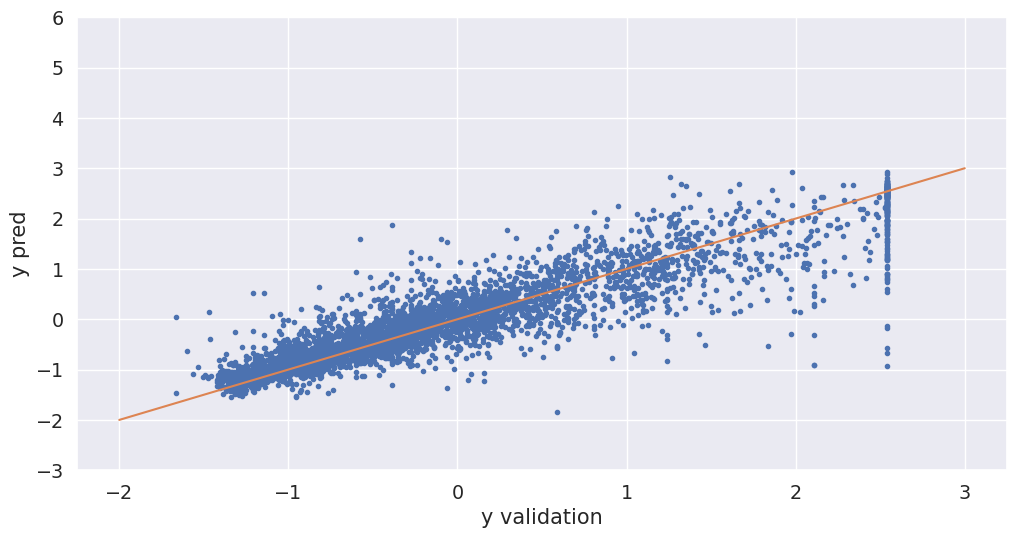

In [54]:
y_pred_nn = model.predict(X_validation.values)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_validation, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)
plt.xlabel("y validation")
plt.ylabel("y pred")

No handles with labels found to put in legend.


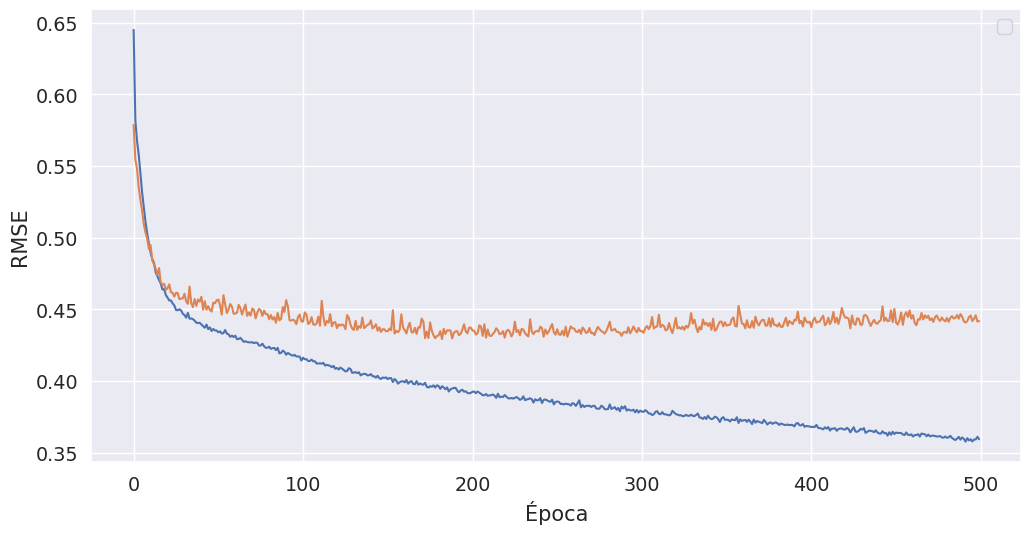

In [55]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Que pasa si agregamos muchas neuronas?

In [56]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [57]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 12s - loss: 0.8182

2016/6000 [=========>....................] - ETA: 0s - loss: 0.6151 

4032/6000 [===================>..........] - ETA: 0s - loss: 0.6012

6000/6000 [==============================] - 0s 47us/step - loss: 0.5274 - val_loss: 0.3409


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4421

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3892

4192/6000 [===================>..........] - ETA: 0s - loss: 0.3529

6000/6000 [==============================] - 0s 33us/step - loss: 0.3879 - val_loss: 0.2995


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2225

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3033

3904/6000 [==================>...........] - ETA: 0s - loss: 0.3000

5984/6000 [============================>.] - ETA: 0s - loss: 0.2882

6000/6000 [==============================] - 0s 36us/step - loss: 0.2882 - val_loss: 0.2582


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1804

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2688

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2828

6000/6000 [==============================] - 0s 35us/step - loss: 0.2716 - val_loss: 0.2410


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1992

1952/6000 [========>.....................] - ETA: 0s - loss: 0.3070

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2654

5824/6000 [============================>.] - ETA: 0s - loss: 0.2542

6000/6000 [==============================] - 0s 38us/step - loss: 0.2530 - val_loss: 0.2380


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1964

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2367

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2530

5824/6000 [============================>.] - ETA: 0s - loss: 0.2458

6000/6000 [==============================] - 0s 36us/step - loss: 0.2465 - val_loss: 0.2236


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2390

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2348

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2353

6000/6000 [==============================] - 0s 34us/step - loss: 0.2402 - val_loss: 0.2273


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1356

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2161

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2398

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 41us/step - loss: 0.2321 - val_loss: 0.2195


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1919

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2063

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2170

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 37us/step - loss: 0.2199 - val_loss: 0.2199


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.8680

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2428

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2363

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2315

6000/6000 [==============================] - 0s 35us/step - loss: 0.2310 - val_loss: 0.2164


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2677

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2246

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2168

5984/6000 [============================>.] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 35us/step - loss: 0.2216 - val_loss: 0.2260


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2062

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2157

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2168

6000/6000 [==============================] - 0s 36us/step - loss: 0.2144 - val_loss: 0.2463


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0642

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1960

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2068

6000/6000 [==============================] - 0s 35us/step - loss: 0.2098 - val_loss: 0.2173


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1213

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2051

3584/6000 [================>.............] - ETA: 0s - loss: 0.2103

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2433

6000/6000 [==============================] - 0s 37us/step - loss: 0.2404 - val_loss: 0.2140


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1770

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2023

6000/6000 [==============================] - 0s 34us/step - loss: 0.2027 - val_loss: 0.2316


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2503

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2258

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2076

6000/6000 [==============================] - 0s 33us/step - loss: 0.2036 - val_loss: 0.2247


Epoch 17/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1459

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2058

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2041

6000/6000 [==============================] - 0s 32us/step - loss: 0.2018 - val_loss: 0.2161


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2503

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1946

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 33us/step - loss: 0.1947 - val_loss: 0.2123


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0699

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1931

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1975

6000/6000 [==============================] - 0s 33us/step - loss: 0.1926 - val_loss: 0.2082


Epoch 20/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3195

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2108

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2035

6000/6000 [==============================] - 0s 34us/step - loss: 0.1962 - val_loss: 0.2311


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0792

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2002

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 32us/step - loss: 0.2152 - val_loss: 0.2048


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1828

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2030

6000/6000 [==============================] - 0s 33us/step - loss: 0.2000 - val_loss: 0.2041


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0847

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1882

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 32us/step - loss: 0.1920 - val_loss: 0.2086


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1988

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1921

6000/6000 [==============================] - 0s 33us/step - loss: 0.1917 - val_loss: 0.2023


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0827

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1815

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 32us/step - loss: 0.1879 - val_loss: 0.2052


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1675

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1903

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 33us/step - loss: 0.1908 - val_loss: 0.2025


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2003

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 34us/step - loss: 0.2047 - val_loss: 0.2086


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1490

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1674

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 33us/step - loss: 0.1872 - val_loss: 0.2038


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1119

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1713

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 32us/step - loss: 0.1811 - val_loss: 0.2053


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2089

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1756

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 33us/step - loss: 0.1818 - val_loss: 0.2068


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1823

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 32us/step - loss: 0.1826 - val_loss: 0.2037


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1789

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1757

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1977

6000/6000 [==============================] - 0s 32us/step - loss: 0.1888 - val_loss: 0.1991


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1673

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 32us/step - loss: 0.1780 - val_loss: 0.2029


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1225

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1597

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 33us/step - loss: 0.1760 - val_loss: 0.1962


Epoch 35/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1391

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1728

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 32us/step - loss: 0.1764 - val_loss: 0.2004


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1767

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1873

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 32us/step - loss: 0.1794 - val_loss: 0.1940


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1882

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1854

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 37us/step - loss: 0.1817 - val_loss: 0.1930


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0955

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1643

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 33us/step - loss: 0.1755 - val_loss: 0.1984


Epoch 39/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1092

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1770

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 33us/step - loss: 0.1775 - val_loss: 0.2211


Epoch 40/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1102

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1795

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 33us/step - loss: 0.1781 - val_loss: 0.2301


Epoch 41/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1697

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1610

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 33us/step - loss: 0.1858 - val_loss: 0.2104


Epoch 42/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1490

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2156

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1999

6000/6000 [==============================] - 0s 33us/step - loss: 0.1891 - val_loss: 0.2035


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1609

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1780

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 33us/step - loss: 0.1704 - val_loss: 0.1949


Epoch 44/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2508

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1699

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 32us/step - loss: 0.1683 - val_loss: 0.1941


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1104

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1690

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1655

6000/6000 [==============================] - 0s 32us/step - loss: 0.1689 - val_loss: 0.1947


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2575

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1675

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 34us/step - loss: 0.1677 - val_loss: 0.1938


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2501

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1703

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 34us/step - loss: 0.1700 - val_loss: 0.1950


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2169

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1589

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1621

6000/6000 [==============================] - 0s 34us/step - loss: 0.1680 - val_loss: 0.1996


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0667

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1686

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 34us/step - loss: 0.1677 - val_loss: 0.1965


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1583

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1678

5952/6000 [============================>.] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 35us/step - loss: 0.1711 - val_loss: 0.1954


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1961

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1777

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 32us/step - loss: 0.1701 - val_loss: 0.1992


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1620

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1542

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 32us/step - loss: 0.1665 - val_loss: 0.1975


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1877

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1623

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 32us/step - loss: 0.1659 - val_loss: 0.1955


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1172

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1682

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 33us/step - loss: 0.1654 - val_loss: 0.1929


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1299

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1589

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1574

6000/6000 [==============================] - 0s 32us/step - loss: 0.1635 - val_loss: 0.1999


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2057

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1787

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 32us/step - loss: 0.1691 - val_loss: 0.1955


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2451

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1518

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1587

6000/6000 [==============================] - 0s 32us/step - loss: 0.1623 - val_loss: 0.1937


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1077

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1509

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1598

6000/6000 [==============================] - 0s 34us/step - loss: 0.1618 - val_loss: 0.1921


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1824

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1677

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 32us/step - loss: 0.1619 - val_loss: 0.1917


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1558

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 33us/step - loss: 0.1593 - val_loss: 0.1942


Epoch 61/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3096

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1659

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1608

6000/6000 [==============================] - 0s 33us/step - loss: 0.1608 - val_loss: 0.1951


Epoch 62/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1213

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1755

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1590

6000/6000 [==============================] - 0s 34us/step - loss: 0.1591 - val_loss: 0.1950


Epoch 63/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1077

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1526

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1610

5952/6000 [============================>.] - ETA: 0s - loss: 0.1573

6000/6000 [==============================] - 0s 35us/step - loss: 0.1590 - val_loss: 0.1971


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1857

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 34us/step - loss: 0.1669 - val_loss: 0.1937


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1502

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1610

5920/6000 [============================>.] - ETA: 0s - loss: 0.1619

6000/6000 [==============================] - 0s 35us/step - loss: 0.1614 - val_loss: 0.1935


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0721

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1646

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1619

5888/6000 [============================>.] - ETA: 0s - loss: 0.1608

6000/6000 [==============================] - 0s 36us/step - loss: 0.1622 - val_loss: 0.1934


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1643

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1644

5920/6000 [============================>.] - ETA: 0s - loss: 0.1594

6000/6000 [==============================] - 0s 36us/step - loss: 0.1593 - val_loss: 0.1915


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0909

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1593

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1585

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 36us/step - loss: 0.1593 - val_loss: 0.1903


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0775

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1599

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1548

5888/6000 [============================>.] - ETA: 0s - loss: 0.1559

6000/6000 [==============================] - 0s 39us/step - loss: 0.1557 - val_loss: 0.1948


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2305

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1505

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1590

5984/6000 [============================>.] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 35us/step - loss: 0.1603 - val_loss: 0.1908


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1004

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1428

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1540

6000/6000 [==============================] - 0s 34us/step - loss: 0.1540 - val_loss: 0.1900


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1781

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1592

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1593

6000/6000 [==============================] - 0s 35us/step - loss: 0.1585 - val_loss: 0.1941


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0557

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1555

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1554

5984/6000 [============================>.] - ETA: 0s - loss: 0.1539

6000/6000 [==============================] - 0s 34us/step - loss: 0.1537 - val_loss: 0.1976


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1637

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1534

6000/6000 [==============================] - 0s 34us/step - loss: 0.1550 - val_loss: 0.1875


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1578

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1588

6000/6000 [==============================] - 0s 32us/step - loss: 0.1550 - val_loss: 0.1926


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1330

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1590

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1594

6000/6000 [==============================] - 0s 32us/step - loss: 0.1546 - val_loss: 0.1955


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1642

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1559

6000/6000 [==============================] - 0s 32us/step - loss: 0.1519 - val_loss: 0.1899


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1334

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1390

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1493

6000/6000 [==============================] - 0s 32us/step - loss: 0.1509 - val_loss: 0.1960


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0941

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1577

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1517

6000/6000 [==============================] - 0s 31us/step - loss: 0.1498 - val_loss: 0.1930


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1804

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1540

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1536

6000/6000 [==============================] - 0s 32us/step - loss: 0.1511 - val_loss: 0.1894


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0548

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1546

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 31us/step - loss: 0.1494 - val_loss: 0.1964


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1500

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1500

6000/6000 [==============================] - 0s 31us/step - loss: 0.1497 - val_loss: 0.1915


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1424

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1514

6000/6000 [==============================] - 0s 31us/step - loss: 0.1525 - val_loss: 0.1874


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2173

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1501

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1534

6000/6000 [==============================] - 0s 30us/step - loss: 0.1500 - val_loss: 0.1866


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2532

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1477

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 32us/step - loss: 0.1475 - val_loss: 0.1875


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0490

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1415

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1513

6000/6000 [==============================] - 0s 31us/step - loss: 0.1463 - val_loss: 0.1851


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0512

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1441

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 31us/step - loss: 0.1466 - val_loss: 0.1894


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1201

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1375

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 32us/step - loss: 0.1454 - val_loss: 0.1867


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1467

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 31us/step - loss: 0.1450 - val_loss: 0.1880


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0489

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1260

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 31us/step - loss: 0.1447 - val_loss: 0.1898


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1407

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 32us/step - loss: 0.1446 - val_loss: 0.1966


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1015

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1432

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1391

6000/6000 [==============================] - 0s 33us/step - loss: 0.1448 - val_loss: 0.1886


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1415

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 32us/step - loss: 0.1460 - val_loss: 0.1905


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2753

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1379

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1448

6000/6000 [==============================] - 0s 32us/step - loss: 0.1436 - val_loss: 0.1940


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1428

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 32us/step - loss: 0.1429 - val_loss: 0.1959


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0571

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1421

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 33us/step - loss: 0.1427 - val_loss: 0.1892


Epoch 97/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1037

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1368

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 32us/step - loss: 0.1425 - val_loss: 0.1882


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0935

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1314

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 32us/step - loss: 0.1422 - val_loss: 0.1915


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1618

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1416

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 32us/step - loss: 0.1399 - val_loss: 0.1906


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0793

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1397

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 32us/step - loss: 0.1420 - val_loss: 0.1931


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1369

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 33us/step - loss: 0.1479 - val_loss: 0.1954


Epoch 102/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1718

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1410

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 34us/step - loss: 0.1427 - val_loss: 0.1857


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1489

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 33us/step - loss: 0.1451 - val_loss: 0.1882


Epoch 104/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1501

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1360

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 32us/step - loss: 0.1395 - val_loss: 0.1963


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1041

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1411

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 32us/step - loss: 0.1373 - val_loss: 0.1890


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2330

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1326

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1272

6000/6000 [==============================] - 0s 32us/step - loss: 0.1366 - val_loss: 0.1861


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1368

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1335

6000/6000 [==============================] - 0s 33us/step - loss: 0.1367 - val_loss: 0.1847


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1323

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1218

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 33us/step - loss: 0.1368 - val_loss: 0.1906


Epoch 109/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0959

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1346

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1365

6000/6000 [==============================] - 0s 33us/step - loss: 0.1417 - val_loss: 0.1924


Epoch 110/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2065

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1395

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 32us/step - loss: 0.1392 - val_loss: 0.1848


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0879

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1252

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1336

6000/6000 [==============================] - 0s 33us/step - loss: 0.1337 - val_loss: 0.1928


Epoch 112/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1096

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1298

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1339

6000/6000 [==============================] - 0s 33us/step - loss: 0.1338 - val_loss: 0.1913


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1352

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1244

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1322

6000/6000 [==============================] - 0s 33us/step - loss: 0.1350 - val_loss: 0.1988


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1137

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1387

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1296

6000/6000 [==============================] - 0s 32us/step - loss: 0.1338 - val_loss: 0.1850


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1241

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 33us/step - loss: 0.1347 - val_loss: 0.1943


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1430

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1290

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 32us/step - loss: 0.1336 - val_loss: 0.1886


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1203

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1323

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 33us/step - loss: 0.1327 - val_loss: 0.1889


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0581

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1219

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1258

6000/6000 [==============================] - 0s 33us/step - loss: 0.1308 - val_loss: 0.1979


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0588

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1220

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 33us/step - loss: 0.1314 - val_loss: 0.1961


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1305

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 32us/step - loss: 0.1311 - val_loss: 0.1838


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0892

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1224

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 32us/step - loss: 0.1311 - val_loss: 0.1924


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0594

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1168

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1259

6000/6000 [==============================] - 0s 33us/step - loss: 0.1310 - val_loss: 0.1902


Epoch 123/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0685

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1169

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 33us/step - loss: 0.1297 - val_loss: 0.2027


Epoch 124/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1254

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1319

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 33us/step - loss: 0.1330 - val_loss: 0.1972


Epoch 125/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1584

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1296

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 32us/step - loss: 0.1306 - val_loss: 0.1925


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1236

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 33us/step - loss: 0.1271 - val_loss: 0.1848


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1611

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1329

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 34us/step - loss: 0.1259 - val_loss: 0.1886


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1050

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1286

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1312

6000/6000 [==============================] - 0s 32us/step - loss: 0.1287 - val_loss: 0.1872


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1328

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1318

6000/6000 [==============================] - 0s 32us/step - loss: 0.1312 - val_loss: 0.2083


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1417

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1618

6000/6000 [==============================] - 0s 32us/step - loss: 0.1565 - val_loss: 0.1898


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1185

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1245

6000/6000 [==============================] - 0s 32us/step - loss: 0.1296 - val_loss: 0.1869


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0768

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1332

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 33us/step - loss: 0.1333 - val_loss: 0.1966


Epoch 133/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1385

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1281

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1285



6000/6000 [==============================] - 0s 33us/step - loss: 0.1288 - val_loss: 0.1895


Epoch 134/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1054

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1191



4320/6000 [====================>.........] - ETA: 0s - loss: 0.1242

6000/6000 [==============================] - 0s 32us/step - loss: 0.1259 - val_loss: 0.1952


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0882

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1090

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1218

6000/6000 [==============================] - 0s 32us/step - loss: 0.1252 - val_loss: 0.1829


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0879

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1195

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1211

6000/6000 [==============================] - 0s 32us/step - loss: 0.1243 - val_loss: 0.1919


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1041

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1145

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1193

6000/6000 [==============================] - 0s 32us/step - loss: 0.1237 - val_loss: 0.1932


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1228

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1247

6000/6000 [==============================] - 0s 32us/step - loss: 0.1229 - val_loss: 0.2034


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1276

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1149

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1232

6000/6000 [==============================] - 0s 32us/step - loss: 0.1234 - val_loss: 0.1915


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3544

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1212

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1212

6000/6000 [==============================] - 0s 33us/step - loss: 0.1231 - val_loss: 0.1922


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1814

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1176

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1226

6000/6000 [==============================] - 0s 32us/step - loss: 0.1232 - val_loss: 0.1904


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1080

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1160

6000/6000 [==============================] - 0s 33us/step - loss: 0.1233 - val_loss: 0.1886


Epoch 143/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1252

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1148



4288/6000 [====================>.........] - ETA: 0s - loss: 0.1204

6000/6000 [==============================] - 0s 33us/step - loss: 0.1222 - val_loss: 0.1992


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3691

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1241

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 33us/step - loss: 0.1222 - val_loss: 0.1950


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0819

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1186

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1205

6000/6000 [==============================] - 0s 32us/step - loss: 0.1211 - val_loss: 0.1981


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0598

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1166

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1195

6000/6000 [==============================] - 0s 32us/step - loss: 0.1212 - val_loss: 0.1886


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1611

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1155

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1205

6000/6000 [==============================] - 0s 33us/step - loss: 0.1196 - val_loss: 0.1879


Epoch 148/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0790

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1073

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1153



6000/6000 [==============================] - 0s 33us/step - loss: 0.1186 - val_loss: 0.1917


Epoch 149/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0968

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1175

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 33us/step - loss: 0.1221 - val_loss: 0.1937


Epoch 150/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0586

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1306

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 33us/step - loss: 0.1571 - val_loss: 0.1822


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0852

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1221

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1229

6000/6000 [==============================] - 0s 31us/step - loss: 0.1214 - val_loss: 0.1857


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0388

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1129

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1173

6000/6000 [==============================] - 0s 32us/step - loss: 0.1180 - val_loss: 0.1877


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0777

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1184

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1208

6000/6000 [==============================] - 0s 31us/step - loss: 0.1184 - val_loss: 0.1853


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0531

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1210

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1201

6000/6000 [==============================] - 0s 31us/step - loss: 0.1187 - val_loss: 0.1970


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0534

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1135

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1154

6000/6000 [==============================] - 0s 31us/step - loss: 0.1183 - val_loss: 0.1912


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1297

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1158

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1134

6000/6000 [==============================] - 0s 32us/step - loss: 0.1159 - val_loss: 0.1878


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1404

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1155

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1192

6000/6000 [==============================] - 0s 32us/step - loss: 0.1195 - val_loss: 0.2010


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0506

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1122

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1109

6000/6000 [==============================] - 0s 31us/step - loss: 0.1167 - val_loss: 0.1868


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1253

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1127

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1118

6000/6000 [==============================] - 0s 31us/step - loss: 0.1156 - val_loss: 0.1930


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0772

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1108

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1149

6000/6000 [==============================] - 0s 32us/step - loss: 0.1168 - val_loss: 0.1924


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1179

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1189

6000/6000 [==============================] - 0s 32us/step - loss: 0.1182 - val_loss: 0.1928


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1160

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1172

6000/6000 [==============================] - 0s 32us/step - loss: 0.1149 - val_loss: 0.1885


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1239

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1172

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1191

6000/6000 [==============================] - 0s 32us/step - loss: 0.1161 - val_loss: 0.1936


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0686

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1106

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1119

6000/6000 [==============================] - 0s 32us/step - loss: 0.1168 - val_loss: 0.1881


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2285

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1082

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1102

6000/6000 [==============================] - 0s 33us/step - loss: 0.1150 - val_loss: 0.1924


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1064

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1074

6000/6000 [==============================] - 0s 33us/step - loss: 0.1136 - val_loss: 0.1979


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1157

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1203

6000/6000 [==============================] - 0s 32us/step - loss: 0.1165 - val_loss: 0.2035


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1068

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1106

6000/6000 [==============================] - 0s 31us/step - loss: 0.1140 - val_loss: 0.1893


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1187

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1110

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1134

6000/6000 [==============================] - 0s 30us/step - loss: 0.1130 - val_loss: 0.1920


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1231

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1096

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1164

6000/6000 [==============================] - 0s 31us/step - loss: 0.1152 - val_loss: 0.1877


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1759

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1093

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1087

6000/6000 [==============================] - 0s 31us/step - loss: 0.1148 - val_loss: 0.1883


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0366

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1099

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1129

6000/6000 [==============================] - 0s 31us/step - loss: 0.1149 - val_loss: 0.1870


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0873

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1169

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1140

6000/6000 [==============================] - 0s 33us/step - loss: 0.1136 - val_loss: 0.1889


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0494

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1201

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1150

6000/6000 [==============================] - 0s 31us/step - loss: 0.1122 - val_loss: 0.1943


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0933

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1094

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1142

6000/6000 [==============================] - 0s 31us/step - loss: 0.1132 - val_loss: 0.1891


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1247

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1141

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1148

6000/6000 [==============================] - 0s 30us/step - loss: 0.1142 - val_loss: 0.1915


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0621

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1119

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1117

6000/6000 [==============================] - 0s 31us/step - loss: 0.1113 - val_loss: 0.1973


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0976

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1100

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1097

6000/6000 [==============================] - 0s 31us/step - loss: 0.1096 - val_loss: 0.1983


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1129

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1082

6000/6000 [==============================] - 0s 31us/step - loss: 0.1124 - val_loss: 0.1932


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2003

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1024

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1090

6000/6000 [==============================] - 0s 31us/step - loss: 0.1106 - val_loss: 0.1914


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0718

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1000

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1099

6000/6000 [==============================] - 0s 31us/step - loss: 0.1132 - val_loss: 0.1927


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0684

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1144

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1125

6000/6000 [==============================] - 0s 31us/step - loss: 0.1110 - val_loss: 0.2035


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0889

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1081

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1128

6000/6000 [==============================] - 0s 32us/step - loss: 0.1123 - val_loss: 0.1928


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1054

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1013

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1118

6000/6000 [==============================] - 0s 32us/step - loss: 0.1134 - val_loss: 0.1954


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1321

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1100

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1115

6000/6000 [==============================] - 0s 31us/step - loss: 0.1122 - val_loss: 0.2013


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1102

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1120

6000/6000 [==============================] - 0s 31us/step - loss: 0.1119 - val_loss: 0.2001


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1763

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1179

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1101

6000/6000 [==============================] - 0s 31us/step - loss: 0.1103 - val_loss: 0.1955


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0315

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1111

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1107

6000/6000 [==============================] - 0s 32us/step - loss: 0.1110 - val_loss: 0.2076


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0986

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1080

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1062

6000/6000 [==============================] - 0s 32us/step - loss: 0.1094 - val_loss: 0.2008


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1929

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1029

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1063

6000/6000 [==============================] - 0s 31us/step - loss: 0.1105 - val_loss: 0.1924


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1101

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1086

6000/6000 [==============================] - 0s 30us/step - loss: 0.1102 - val_loss: 0.2022


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0763

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1088

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1074

6000/6000 [==============================] - 0s 32us/step - loss: 0.1077 - val_loss: 0.1988


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0747

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1101

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1097

6000/6000 [==============================] - 0s 32us/step - loss: 0.1075 - val_loss: 0.1917


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1502

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1079

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1085

6000/6000 [==============================] - 0s 31us/step - loss: 0.1102 - val_loss: 0.1975


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1144

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1040

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1060

6000/6000 [==============================] - 0s 31us/step - loss: 0.1073 - val_loss: 0.1961


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0946

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1014

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1076

6000/6000 [==============================] - 0s 31us/step - loss: 0.1096 - val_loss: 0.1975


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1059

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1052

6000/6000 [==============================] - 0s 32us/step - loss: 0.1073 - val_loss: 0.1938


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0731

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1072

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1073

6000/6000 [==============================] - 0s 31us/step - loss: 0.1077 - val_loss: 0.2053


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0707

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1107

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1117

6000/6000 [==============================] - 0s 31us/step - loss: 0.1078 - val_loss: 0.1918


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0538

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1047

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1059

6000/6000 [==============================] - 0s 32us/step - loss: 0.1074 - val_loss: 0.2092


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1639

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1108

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1059

6000/6000 [==============================] - 0s 32us/step - loss: 0.1042 - val_loss: 0.1982


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0575

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1062

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1105

6000/6000 [==============================] - 0s 31us/step - loss: 0.1063 - val_loss: 0.1974


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0572

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1091

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1038

6000/6000 [==============================] - 0s 31us/step - loss: 0.1050 - val_loss: 0.2096


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0518

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1101

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1073

6000/6000 [==============================] - 0s 31us/step - loss: 0.1092 - val_loss: 0.2032


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1741

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1082

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1104

6000/6000 [==============================] - 0s 32us/step - loss: 0.1069 - val_loss: 0.1997


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1080

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1068

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1071

6000/6000 [==============================] - 0s 31us/step - loss: 0.1073 - val_loss: 0.1993


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0741

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1089

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1090

6000/6000 [==============================] - 0s 31us/step - loss: 0.1074 - val_loss: 0.1953


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1444

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1086

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1067

6000/6000 [==============================] - 0s 30us/step - loss: 0.1058 - val_loss: 0.1999


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0968

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1027

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1075

6000/6000 [==============================] - 0s 31us/step - loss: 0.1066 - val_loss: 0.1922


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1076

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1048

6000/6000 [==============================] - 0s 31us/step - loss: 0.1052 - val_loss: 0.1970


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0791

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1067

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1049

6000/6000 [==============================] - 0s 31us/step - loss: 0.1044 - val_loss: 0.1991


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1241

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1164

6000/6000 [==============================] - 0s 31us/step - loss: 0.1139 - val_loss: 0.1945


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1053

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1158

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1116

6000/6000 [==============================] - 0s 36us/step - loss: 0.1098 - val_loss: 0.2017


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0903

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1174

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1186

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1152

6000/6000 [==============================] - 0s 40us/step - loss: 0.1112 - val_loss: 0.1999


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1227

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1100

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1142

6000/6000 [==============================] - 0s 34us/step - loss: 0.1060 - val_loss: 0.1980


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0850

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1037

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1100

6000/6000 [==============================] - 0s 31us/step - loss: 0.1073 - val_loss: 0.1921


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0448

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0966

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 31us/step - loss: 0.1055 - val_loss: 0.1959


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1195

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1112

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1083

6000/6000 [==============================] - 0s 31us/step - loss: 0.1061 - val_loss: 0.1941


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0458

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1021

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0994

6000/6000 [==============================] - 0s 31us/step - loss: 0.1029 - val_loss: 0.1985


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1239

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1035

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1065

6000/6000 [==============================] - 0s 32us/step - loss: 0.1059 - val_loss: 0.1953


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0873

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1085

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1048

6000/6000 [==============================] - 0s 32us/step - loss: 0.1051 - val_loss: 0.1974


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1231

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1045

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 31us/step - loss: 0.1047 - val_loss: 0.1932


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0949

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0983

6000/6000 [==============================] - 0s 32us/step - loss: 0.1021 - val_loss: 0.1913


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1155

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1057

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1030

6000/6000 [==============================] - 0s 32us/step - loss: 0.1011 - val_loss: 0.1970


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0976

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1036

6000/6000 [==============================] - 0s 32us/step - loss: 0.1023 - val_loss: 0.2034


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2712

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1066

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1086

6000/6000 [==============================] - 0s 32us/step - loss: 0.1043 - val_loss: 0.1945


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1449

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1056

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1049

6000/6000 [==============================] - 0s 32us/step - loss: 0.1024 - val_loss: 0.1975


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0996

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0997

6000/6000 [==============================] - 0s 32us/step - loss: 0.0996 - val_loss: 0.1953


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0422

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0977

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1013

6000/6000 [==============================] - 0s 32us/step - loss: 0.1024 - val_loss: 0.2034


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2632

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1003

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1037

6000/6000 [==============================] - 0s 33us/step - loss: 0.1039 - val_loss: 0.2035


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0664

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1004

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1076

6000/6000 [==============================] - 0s 32us/step - loss: 0.1048 - val_loss: 0.1942


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1255

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1055

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1086

6000/6000 [==============================] - 0s 32us/step - loss: 0.1078 - val_loss: 0.1979


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0371

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1308

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1156

6000/6000 [==============================] - 0s 32us/step - loss: 0.1112 - val_loss: 0.1956


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0417

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0937

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0947

6000/6000 [==============================] - 0s 33us/step - loss: 0.0999 - val_loss: 0.1928


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0373

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0966

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1011

6000/6000 [==============================] - 0s 32us/step - loss: 0.1003 - val_loss: 0.1939


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0751

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0993

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0969

6000/6000 [==============================] - 0s 32us/step - loss: 0.0998 - val_loss: 0.1999


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1291

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1068

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1009

6000/6000 [==============================] - 0s 32us/step - loss: 0.0997 - val_loss: 0.2012


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1171

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0997

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1013

6000/6000 [==============================] - 0s 33us/step - loss: 0.0991 - val_loss: 0.1982


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1540

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0959

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0987

6000/6000 [==============================] - 0s 32us/step - loss: 0.0989 - val_loss: 0.1990


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0971

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0950

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1020

6000/6000 [==============================] - 0s 31us/step - loss: 0.1021 - val_loss: 0.1927


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0248

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1016

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0993

6000/6000 [==============================] - 0s 32us/step - loss: 0.0999 - val_loss: 0.2084


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0871

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1018

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1008

6000/6000 [==============================] - 0s 32us/step - loss: 0.1009 - val_loss: 0.1974


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0981

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0963

6000/6000 [==============================] - 0s 32us/step - loss: 0.0988 - val_loss: 0.2064


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0669

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1051

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0992

6000/6000 [==============================] - 0s 33us/step - loss: 0.0988 - val_loss: 0.1951


Epoch 245/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1479



2080/6000 [=========>....................] - ETA: 0s - loss: 0.0949



4064/6000 [===================>..........] - ETA: 0s - loss: 0.0969

6000/6000 [==============================] - 0s 33us/step - loss: 0.0972 - val_loss: 0.2026


Epoch 246/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0660

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0968

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1032

6000/6000 [==============================] - 0s 33us/step - loss: 0.1013 - val_loss: 0.1981


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1034

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1009

6000/6000 [==============================] - 0s 32us/step - loss: 0.0999 - val_loss: 0.1978


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0948

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0998

6000/6000 [==============================] - 0s 32us/step - loss: 0.0992 - val_loss: 0.1961


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1001

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0977

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0976

6000/6000 [==============================] - 0s 32us/step - loss: 0.0969 - val_loss: 0.1977


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0461

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0974

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0999

6000/6000 [==============================] - 0s 32us/step - loss: 0.0981 - val_loss: 0.2035


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0917

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0978

6000/6000 [==============================] - 0s 32us/step - loss: 0.0967 - val_loss: 0.2001


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0912

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0957

6000/6000 [==============================] - 0s 32us/step - loss: 0.0972 - val_loss: 0.2060


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0796

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0937

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0957

6000/6000 [==============================] - 0s 32us/step - loss: 0.0964 - val_loss: 0.1988


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0882

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0919

6000/6000 [==============================] - 0s 32us/step - loss: 0.0934 - val_loss: 0.2014


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0986

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1067

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1006

6000/6000 [==============================] - 0s 32us/step - loss: 0.0997 - val_loss: 0.2128


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1012

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0994

6000/6000 [==============================] - 0s 32us/step - loss: 0.0982 - val_loss: 0.2082


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0665

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0988

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0992

6000/6000 [==============================] - 0s 32us/step - loss: 0.0964 - val_loss: 0.1963


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0896

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0921

6000/6000 [==============================] - 0s 33us/step - loss: 0.0954 - val_loss: 0.2046


Epoch 259/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0677

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0937

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0965

6000/6000 [==============================] - 0s 33us/step - loss: 0.0971 - val_loss: 0.2069


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0486

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0864

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0909

6000/6000 [==============================] - 0s 32us/step - loss: 0.0952 - val_loss: 0.2011


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0964

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0943

6000/6000 [==============================] - 0s 32us/step - loss: 0.0948 - val_loss: 0.2034


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1646

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0957

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0950

6000/6000 [==============================] - 0s 32us/step - loss: 0.0974 - val_loss: 0.2018


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1326

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0956

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0941

6000/6000 [==============================] - 0s 32us/step - loss: 0.0949 - val_loss: 0.2023


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0944

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0888

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0937

6000/6000 [==============================] - 0s 32us/step - loss: 0.0943 - val_loss: 0.1991


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0552

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0981

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0924

6000/6000 [==============================] - 0s 32us/step - loss: 0.0953 - val_loss: 0.2020


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0959

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0964

6000/6000 [==============================] - 0s 32us/step - loss: 0.0967 - val_loss: 0.1978


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0706

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0879

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0917

6000/6000 [==============================] - 0s 33us/step - loss: 0.0924 - val_loss: 0.1977


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0682

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0947

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0919

6000/6000 [==============================] - 0s 32us/step - loss: 0.0936 - val_loss: 0.1983


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1006

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0986

6000/6000 [==============================] - 0s 32us/step - loss: 0.0956 - val_loss: 0.2017


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0887

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0931

6000/6000 [==============================] - 0s 32us/step - loss: 0.0926 - val_loss: 0.1981


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1290

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0950

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0923

6000/6000 [==============================] - 0s 32us/step - loss: 0.0924 - val_loss: 0.1984


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0402

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0892

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0924

6000/6000 [==============================] - 0s 31us/step - loss: 0.0929 - val_loss: 0.2000


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0863

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0928

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 32us/step - loss: 0.0942 - val_loss: 0.2079


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0945

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0881

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0925

6000/6000 [==============================] - 0s 31us/step - loss: 0.0947 - val_loss: 0.2020


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0393

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1158

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1037

6000/6000 [==============================] - 0s 31us/step - loss: 0.1036 - val_loss: 0.2052


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0441

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0916

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0899

6000/6000 [==============================] - 0s 32us/step - loss: 0.0941 - val_loss: 0.2086


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0919

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0919

6000/6000 [==============================] - 0s 32us/step - loss: 0.0930 - val_loss: 0.2105


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1677

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0904

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0909

6000/6000 [==============================] - 0s 33us/step - loss: 0.0920 - val_loss: 0.2063


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1631

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0885

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0940

6000/6000 [==============================] - 0s 32us/step - loss: 0.0942 - val_loss: 0.2045


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0791

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0841

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0919

6000/6000 [==============================] - 0s 32us/step - loss: 0.0917 - val_loss: 0.2045


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0839

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0896

6000/6000 [==============================] - 0s 31us/step - loss: 0.0926 - val_loss: 0.2031


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0919

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0961

6000/6000 [==============================] - 0s 32us/step - loss: 0.0945 - val_loss: 0.2083


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0577

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0958

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 32us/step - loss: 0.0915 - val_loss: 0.1991


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1295

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0930

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 31us/step - loss: 0.0901 - val_loss: 0.2086


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1068

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0940

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0909

6000/6000 [==============================] - 0s 31us/step - loss: 0.0919 - val_loss: 0.2017


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0841

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0866

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0882

6000/6000 [==============================] - 0s 31us/step - loss: 0.0885 - val_loss: 0.2076


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1258

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0943

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0901

6000/6000 [==============================] - 0s 32us/step - loss: 0.0913 - val_loss: 0.2025


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1137

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0953

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0943

6000/6000 [==============================] - 0s 31us/step - loss: 0.0906 - val_loss: 0.2050


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0638

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0819

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0847

6000/6000 [==============================] - 0s 32us/step - loss: 0.0905 - val_loss: 0.2031


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0854

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0898

6000/6000 [==============================] - 0s 32us/step - loss: 0.0905 - val_loss: 0.2026


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0929

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0889

6000/6000 [==============================] - 0s 31us/step - loss: 0.0898 - val_loss: 0.2048


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0608

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0823

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0915

6000/6000 [==============================] - 0s 32us/step - loss: 0.0909 - val_loss: 0.2110


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0891

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 32us/step - loss: 0.0904 - val_loss: 0.2086


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0767

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0915

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0888

6000/6000 [==============================] - 0s 32us/step - loss: 0.0911 - val_loss: 0.2065


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0442

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0971

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0933

6000/6000 [==============================] - 0s 32us/step - loss: 0.0901 - val_loss: 0.2109


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0700

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0891

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0901

6000/6000 [==============================] - 0s 31us/step - loss: 0.0907 - val_loss: 0.2064


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0751

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0904

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0887

6000/6000 [==============================] - 0s 33us/step - loss: 0.0885 - val_loss: 0.2113


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0555

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0916

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0922

6000/6000 [==============================] - 0s 32us/step - loss: 0.0900 - val_loss: 0.2040


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0644

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0933

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0900

6000/6000 [==============================] - 0s 33us/step - loss: 0.0908 - val_loss: 0.2047


Epoch 300/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0496

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0876

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0880

6000/6000 [==============================] - 0s 32us/step - loss: 0.0879 - val_loss: 0.2055


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1116

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0895

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 33us/step - loss: 0.0892 - val_loss: 0.2069


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0572

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0854

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0878

6000/6000 [==============================] - 0s 32us/step - loss: 0.0881 - val_loss: 0.2013


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0759

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0899

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0849

6000/6000 [==============================] - 0s 32us/step - loss: 0.0882 - val_loss: 0.2051


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0949

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0923

6000/6000 [==============================] - 0s 32us/step - loss: 0.0884 - val_loss: 0.2121


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0945

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 32us/step - loss: 0.0873 - val_loss: 0.2026


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0429

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0802

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0854

6000/6000 [==============================] - 0s 32us/step - loss: 0.0889 - val_loss: 0.2165


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1450

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0822

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0865

6000/6000 [==============================] - 0s 31us/step - loss: 0.0879 - val_loss: 0.2113


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0446

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0881

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0881

6000/6000 [==============================] - 0s 32us/step - loss: 0.0879 - val_loss: 0.2003


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0465

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0919

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 32us/step - loss: 0.0915 - val_loss: 0.2030


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0871

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0852

6000/6000 [==============================] - 0s 32us/step - loss: 0.0868 - val_loss: 0.2092


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0335

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1180

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1030

6000/6000 [==============================] - 0s 32us/step - loss: 0.1018 - val_loss: 0.2036


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1016

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1003

6000/6000 [==============================] - 0s 32us/step - loss: 0.0995 - val_loss: 0.2160


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0716

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0991

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0923

6000/6000 [==============================] - 0s 32us/step - loss: 0.0947 - val_loss: 0.2118


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1061

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0846

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0876

6000/6000 [==============================] - 0s 32us/step - loss: 0.0891 - val_loss: 0.2042


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1387

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0957

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0874

6000/6000 [==============================] - 0s 33us/step - loss: 0.0881 - val_loss: 0.2061


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0394

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0926

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0864

6000/6000 [==============================] - 0s 32us/step - loss: 0.0907 - val_loss: 0.2086


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0950

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0957

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0871

6000/6000 [==============================] - 0s 32us/step - loss: 0.0864 - val_loss: 0.2097


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0928

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0791

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0830

6000/6000 [==============================] - 0s 32us/step - loss: 0.0852 - val_loss: 0.2079


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0527

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0826

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0842

6000/6000 [==============================] - 0s 32us/step - loss: 0.0854 - val_loss: 0.2029


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0996

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0886

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0845

6000/6000 [==============================] - 0s 32us/step - loss: 0.0862 - val_loss: 0.2248


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0488

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0914

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0870

6000/6000 [==============================] - 0s 32us/step - loss: 0.0860 - val_loss: 0.2051


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0798

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0840

6000/6000 [==============================] - 0s 33us/step - loss: 0.0839 - val_loss: 0.2089


Epoch 323/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2204

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0832

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 32us/step - loss: 0.0841 - val_loss: 0.2078


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0610

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0825

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0845

6000/6000 [==============================] - 0s 32us/step - loss: 0.0850 - val_loss: 0.2087


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0815

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 32us/step - loss: 0.0832 - val_loss: 0.2057


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0945

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0786

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0826

6000/6000 [==============================] - 0s 32us/step - loss: 0.0844 - val_loss: 0.2121


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0515

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0807

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0828

6000/6000 [==============================] - 0s 33us/step - loss: 0.0847 - val_loss: 0.2134


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0669

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0900

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0813

6000/6000 [==============================] - 0s 32us/step - loss: 0.0862 - val_loss: 0.2070


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0350

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0829

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0885

6000/6000 [==============================] - 0s 32us/step - loss: 0.0863 - val_loss: 0.2095


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0826

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0869

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0859

6000/6000 [==============================] - 0s 32us/step - loss: 0.0875 - val_loss: 0.2136


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0485

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0861

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0887

6000/6000 [==============================] - 0s 32us/step - loss: 0.0876 - val_loss: 0.2129


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1596

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0749

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0841

6000/6000 [==============================] - 0s 32us/step - loss: 0.0864 - val_loss: 0.2133


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0821

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0739

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0831

6000/6000 [==============================] - 0s 32us/step - loss: 0.0858 - val_loss: 0.2133


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0860

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0867

6000/6000 [==============================] - 0s 32us/step - loss: 0.0863 - val_loss: 0.2089


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0768

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0792

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0830

6000/6000 [==============================] - 0s 32us/step - loss: 0.0860 - val_loss: 0.2084


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0685

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0819

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0828

6000/6000 [==============================] - 0s 32us/step - loss: 0.0855 - val_loss: 0.2097


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0602

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0787

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 32us/step - loss: 0.0823 - val_loss: 0.2186


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0759

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0787

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0864

6000/6000 [==============================] - 0s 32us/step - loss: 0.0841 - val_loss: 0.2124


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0634

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0859

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 32us/step - loss: 0.0836 - val_loss: 0.2054


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1044

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0824

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0841

6000/6000 [==============================] - 0s 32us/step - loss: 0.0846 - val_loss: 0.2107


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1019

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0855

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 32us/step - loss: 0.0841 - val_loss: 0.2064


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0941

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0834

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 32us/step - loss: 0.0834 - val_loss: 0.2151


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0475

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0812

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0845

6000/6000 [==============================] - 0s 32us/step - loss: 0.0857 - val_loss: 0.2161


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0839

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0846

6000/6000 [==============================] - 0s 32us/step - loss: 0.0844 - val_loss: 0.2113


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0824

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0816

6000/6000 [==============================] - 0s 32us/step - loss: 0.0834 - val_loss: 0.2114


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0827

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0822

5856/6000 [============================>.] - ETA: 0s - loss: 0.0855

6000/6000 [==============================] - 0s 35us/step - loss: 0.0853 - val_loss: 0.2140


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0778

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0808

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0817

6000/6000 [==============================] - 0s 32us/step - loss: 0.0816 - val_loss: 0.2192


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0855

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 32us/step - loss: 0.0825 - val_loss: 0.2091


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1953

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0909

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0839

6000/6000 [==============================] - 0s 32us/step - loss: 0.0829 - val_loss: 0.2156


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0829

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0778

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0803

6000/6000 [==============================] - 0s 31us/step - loss: 0.0821 - val_loss: 0.2192


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0812

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0803

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0809

6000/6000 [==============================] - 0s 32us/step - loss: 0.0829 - val_loss: 0.2213


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0823

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0785

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 32us/step - loss: 0.0836 - val_loss: 0.2108


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0851

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0790

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0837

6000/6000 [==============================] - 0s 32us/step - loss: 0.0840 - val_loss: 0.2144


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0830

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0795

6000/6000 [==============================] - 0s 32us/step - loss: 0.0820 - val_loss: 0.2124


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2373

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0813

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 32us/step - loss: 0.0814 - val_loss: 0.2211


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0961

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0802

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 32us/step - loss: 0.0825 - val_loss: 0.2150


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0652

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0853

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0842

6000/6000 [==============================] - 0s 31us/step - loss: 0.0820 - val_loss: 0.2095


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0747

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0787

6000/6000 [==============================] - 0s 31us/step - loss: 0.0811 - val_loss: 0.2123


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0313

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0811

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0793

6000/6000 [==============================] - 0s 32us/step - loss: 0.0805 - val_loss: 0.2150


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0430

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0829

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0840

6000/6000 [==============================] - 0s 31us/step - loss: 0.0833 - val_loss: 0.2126


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0977

2304/6000 [==========>...................] - ETA: 0s - loss: 0.0794

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0788

6000/6000 [==============================] - 0s 31us/step - loss: 0.0789 - val_loss: 0.2191


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0611

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0845

4576/6000 [=====================>........] - ETA: 0s - loss: 0.0803

6000/6000 [==============================] - 0s 31us/step - loss: 0.0807 - val_loss: 0.2151


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0420

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0799

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 34us/step - loss: 0.0805 - val_loss: 0.2065


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0820

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0771

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 40us/step - loss: 0.0798 - val_loss: 0.2115


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0805

1056/6000 [====>.........................] - ETA: 0s - loss: 0.0709

3040/6000 [==============>...............] - ETA: 0s - loss: 0.0776

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 37us/step - loss: 0.0802 - val_loss: 0.2122


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0360

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0701

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0773

6000/6000 [==============================] - 0s 32us/step - loss: 0.0830 - val_loss: 0.2131


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0532

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0718

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0813

6000/6000 [==============================] - 0s 32us/step - loss: 0.0806 - val_loss: 0.2238


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0800

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0856

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0828

6000/6000 [==============================] - 0s 32us/step - loss: 0.0818 - val_loss: 0.2140


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0839

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 32us/step - loss: 0.0802 - val_loss: 0.2272


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0598

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0725

4512/6000 [=====================>........] - ETA: 0s - loss: 0.0773

6000/6000 [==============================] - 0s 31us/step - loss: 0.0812 - val_loss: 0.2250


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1219

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0744

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 31us/step - loss: 0.0801 - val_loss: 0.2189


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0633

2304/6000 [==========>...................] - ETA: 0s - loss: 0.0766

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 31us/step - loss: 0.0798 - val_loss: 0.2231


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0836

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0791

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 32us/step - loss: 0.0791 - val_loss: 0.2179


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0727

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0778

6000/6000 [==============================] - 0s 32us/step - loss: 0.0798 - val_loss: 0.2120


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1176

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0826

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0809

6000/6000 [==============================] - 0s 31us/step - loss: 0.0795 - val_loss: 0.2188


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0793

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0775

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0762

6000/6000 [==============================] - 0s 31us/step - loss: 0.0810 - val_loss: 0.2243


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0606

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0758

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 33us/step - loss: 0.0890 - val_loss: 0.2175


Epoch 378/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0762

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0779

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0802

6000/6000 [==============================] - 0s 32us/step - loss: 0.0798 - val_loss: 0.2195


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0425

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0777

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0782



6000/6000 [==============================] - 0s 33us/step - loss: 0.0778 - val_loss: 0.2187


Epoch 380/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0642

1920/6000 [========>.....................] - ETA: 0s - loss: 0.0746

3776/6000 [=================>............] - ETA: 0s - loss: 0.0756

5856/6000 [============================>.] - ETA: 0s - loss: 0.0776

6000/6000 [==============================] - 0s 35us/step - loss: 0.0781 - val_loss: 0.2201


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0595

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0774

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0755

6000/6000 [==============================] - 0s 32us/step - loss: 0.0786 - val_loss: 0.2223


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0842

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0792

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0785

6000/6000 [==============================] - 0s 33us/step - loss: 0.0800 - val_loss: 0.2146


Epoch 383/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0328

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0762

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 33us/step - loss: 0.0785 - val_loss: 0.2237


Epoch 384/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0528

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0803

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0780

6000/6000 [==============================] - 0s 34us/step - loss: 0.0788 - val_loss: 0.2177


Epoch 385/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1654

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0785

3840/6000 [==================>...........] - ETA: 0s - loss: 0.0800

5760/6000 [===========================>..] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 35us/step - loss: 0.0781 - val_loss: 0.2259


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0493

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0730

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0780

6000/6000 [==============================] - 0s 32us/step - loss: 0.0792 - val_loss: 0.2171


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1005

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0757

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0759

6000/6000 [==============================] - 0s 32us/step - loss: 0.0789 - val_loss: 0.2224


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0499

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0797

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0764

6000/6000 [==============================] - 0s 33us/step - loss: 0.0774 - val_loss: 0.2175


Epoch 389/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0534

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0766

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0741

6000/6000 [==============================] - 0s 34us/step - loss: 0.0784 - val_loss: 0.2165


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0565

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0712

4000/6000 [===================>..........] - ETA: 0s - loss: 0.0750

6000/6000 [==============================] - 0s 33us/step - loss: 0.0756 - val_loss: 0.2184


Epoch 391/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0461

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0767

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0776

6000/6000 [==============================] - 0s 32us/step - loss: 0.0801 - val_loss: 0.2187


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0529

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0837

4064/6000 [===================>..........] - ETA: 0s - loss: 0.0793

6000/6000 [==============================] - 0s 33us/step - loss: 0.0797 - val_loss: 0.2160


Epoch 393/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0554

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0727

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0758

6000/6000 [==============================] - 0s 32us/step - loss: 0.0797 - val_loss: 0.2210


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2083

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0741

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0754

6000/6000 [==============================] - 0s 32us/step - loss: 0.0762 - val_loss: 0.2281


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0497

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0797

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0786

6000/6000 [==============================] - 0s 32us/step - loss: 0.0780 - val_loss: 0.2214


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0489

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0740

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0779

6000/6000 [==============================] - 0s 32us/step - loss: 0.0776 - val_loss: 0.2185


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0745

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0785

6000/6000 [==============================] - 0s 32us/step - loss: 0.0773 - val_loss: 0.2178


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0367

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0769

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0776

6000/6000 [==============================] - 0s 33us/step - loss: 0.0768 - val_loss: 0.2192


Epoch 399/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0882

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0836

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0796

6000/6000 [==============================] - 0s 33us/step - loss: 0.0789 - val_loss: 0.2184


Epoch 400/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0967

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0718

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0740

6000/6000 [==============================] - 0s 33us/step - loss: 0.0754 - val_loss: 0.2227


Epoch 401/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0949

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0833

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0793

6000/6000 [==============================] - 0s 33us/step - loss: 0.0806 - val_loss: 0.2235


Epoch 402/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1011

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0729

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0711

6000/6000 [==============================] - 0s 34us/step - loss: 0.0778 - val_loss: 0.2189


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0302

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0708

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0764

6000/6000 [==============================] - 0s 32us/step - loss: 0.0767 - val_loss: 0.2150


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0469

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0743

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 32us/step - loss: 0.0761 - val_loss: 0.2185


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0586

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0738

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0786

6000/6000 [==============================] - 0s 31us/step - loss: 0.0764 - val_loss: 0.2224


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0560

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0774

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0769

6000/6000 [==============================] - 0s 32us/step - loss: 0.0767 - val_loss: 0.2348


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0641

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0773

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 32us/step - loss: 0.0772 - val_loss: 0.2175


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0913

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0765

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0738

6000/6000 [==============================] - 0s 33us/step - loss: 0.0745 - val_loss: 0.2232


Epoch 409/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0256

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0717

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0718

6000/6000 [==============================] - 0s 33us/step - loss: 0.0752 - val_loss: 0.2206


Epoch 410/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0298

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0735

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0778

6000/6000 [==============================] - 0s 32us/step - loss: 0.0765 - val_loss: 0.2282


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0714

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0735

6000/6000 [==============================] - 0s 32us/step - loss: 0.0753 - val_loss: 0.2194


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0557

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0704

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0751

6000/6000 [==============================] - 0s 32us/step - loss: 0.0780 - val_loss: 0.2223


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0247

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0672

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0764

6000/6000 [==============================] - 0s 32us/step - loss: 0.0772 - val_loss: 0.2270


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0525

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0710

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0778

6000/6000 [==============================] - 0s 31us/step - loss: 0.0771 - val_loss: 0.2254


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0699

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0750

6000/6000 [==============================] - 0s 32us/step - loss: 0.0758 - val_loss: 0.2242


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0559

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0734

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 32us/step - loss: 0.0786 - val_loss: 0.2323


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0574

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0748

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0792

6000/6000 [==============================] - 0s 32us/step - loss: 0.0771 - val_loss: 0.2221


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0571

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0722

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0746

6000/6000 [==============================] - 0s 32us/step - loss: 0.0727 - val_loss: 0.2307


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0373

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0716

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0716

6000/6000 [==============================] - 0s 33us/step - loss: 0.0745 - val_loss: 0.2202


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0500

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0768

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0742

6000/6000 [==============================] - 0s 32us/step - loss: 0.0767 - val_loss: 0.2227


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0734

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0712

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0729

6000/6000 [==============================] - 0s 32us/step - loss: 0.0743 - val_loss: 0.2232


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0812

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0701

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0748

6000/6000 [==============================] - 0s 32us/step - loss: 0.0735 - val_loss: 0.2199


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0950

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0728

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0750

6000/6000 [==============================] - 0s 33us/step - loss: 0.0746 - val_loss: 0.2305


Epoch 424/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0912

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0687

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0747

6000/6000 [==============================] - 0s 32us/step - loss: 0.0749 - val_loss: 0.2205


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0694

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0829

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0773

6000/6000 [==============================] - 0s 32us/step - loss: 0.0737 - val_loss: 0.2216


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0474

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0749

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 32us/step - loss: 0.0757 - val_loss: 0.2241


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0730

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 33us/step - loss: 0.0749 - val_loss: 0.2236


Epoch 428/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1735

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0845

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0779

6000/6000 [==============================] - 0s 33us/step - loss: 0.0759 - val_loss: 0.2276


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0531

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0826

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 32us/step - loss: 0.0760 - val_loss: 0.2210


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0832

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0674

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0739

6000/6000 [==============================] - 0s 32us/step - loss: 0.0750 - val_loss: 0.2256


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0564

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0750

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0731

6000/6000 [==============================] - 0s 32us/step - loss: 0.0751 - val_loss: 0.2249


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0783

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0733

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0711

6000/6000 [==============================] - 0s 31us/step - loss: 0.0755 - val_loss: 0.2254


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0620

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0774

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0734

6000/6000 [==============================] - 0s 32us/step - loss: 0.0719 - val_loss: 0.2299


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0542

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0712

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0752

6000/6000 [==============================] - 0s 32us/step - loss: 0.0726 - val_loss: 0.2226


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1859

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0699

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0699

6000/6000 [==============================] - 0s 32us/step - loss: 0.0734 - val_loss: 0.2433


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0653

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0777

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0741

6000/6000 [==============================] - 0s 32us/step - loss: 0.0765 - val_loss: 0.2376


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0934

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0806

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0754

6000/6000 [==============================] - 0s 32us/step - loss: 0.0741 - val_loss: 0.2236


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0577

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0809

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0745

6000/6000 [==============================] - 0s 32us/step - loss: 0.0746 - val_loss: 0.2191


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0803

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0673

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0703

6000/6000 [==============================] - 0s 32us/step - loss: 0.0726 - val_loss: 0.2195


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0744

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0760

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 32us/step - loss: 0.0721 - val_loss: 0.2205


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0426

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0673

3680/6000 [=================>............] - ETA: 0s - loss: 0.0727

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0751

6000/6000 [==============================] - 0s 41us/step - loss: 0.0746 - val_loss: 0.2252


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0807

3072/6000 [==============>...............] - ETA: 0s - loss: 0.0782

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 42us/step - loss: 0.0761 - val_loss: 0.2227


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0536



2144/6000 [=========>....................] - ETA: 0s - loss: 0.0671

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0725

6000/6000 [==============================] - 0s 32us/step - loss: 0.0759 - val_loss: 0.2173


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0681

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0750

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0739

6000/6000 [==============================] - 0s 32us/step - loss: 0.0736 - val_loss: 0.2286


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0237

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0730

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0752

6000/6000 [==============================] - 0s 32us/step - loss: 0.0766 - val_loss: 0.2215


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0696

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0745

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0780

6000/6000 [==============================] - 0s 32us/step - loss: 0.0760 - val_loss: 0.2214


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0314

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0669

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0726

6000/6000 [==============================] - 0s 32us/step - loss: 0.0757 - val_loss: 0.2243


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0707

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0725

6000/6000 [==============================] - 0s 32us/step - loss: 0.0728 - val_loss: 0.2192


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0423

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0768

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0720

6000/6000 [==============================] - 0s 32us/step - loss: 0.0729 - val_loss: 0.2278


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0380

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0730

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0722

6000/6000 [==============================] - 0s 32us/step - loss: 0.0716 - val_loss: 0.2275


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0730

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 32us/step - loss: 0.0724 - val_loss: 0.2318


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0838

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0690

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0734

6000/6000 [==============================] - 0s 32us/step - loss: 0.0728 - val_loss: 0.2266


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0819

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0747

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 32us/step - loss: 0.0746 - val_loss: 0.2277


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1024

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0698

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0716

6000/6000 [==============================] - 0s 32us/step - loss: 0.0751 - val_loss: 0.2357


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0577

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0703

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0733

6000/6000 [==============================] - 0s 32us/step - loss: 0.0738 - val_loss: 0.2245


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0443

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0712

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0726

6000/6000 [==============================] - 0s 31us/step - loss: 0.0726 - val_loss: 0.2245


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0448

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0721

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0716

6000/6000 [==============================] - 0s 31us/step - loss: 0.0723 - val_loss: 0.2200


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0693

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0715

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0706

6000/6000 [==============================] - 0s 32us/step - loss: 0.0723 - val_loss: 0.2184


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0322

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0736

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0761

6000/6000 [==============================] - 0s 32us/step - loss: 0.0744 - val_loss: 0.2218


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0444

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0691

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0690

6000/6000 [==============================] - 0s 32us/step - loss: 0.0723 - val_loss: 0.2347


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0734

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0776

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0728

6000/6000 [==============================] - 0s 32us/step - loss: 0.0722 - val_loss: 0.2332


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1233

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0715

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0703

6000/6000 [==============================] - 0s 31us/step - loss: 0.0705 - val_loss: 0.2280


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0682

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0692

6000/6000 [==============================] - 0s 32us/step - loss: 0.0733 - val_loss: 0.2203


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0614

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0703

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 33us/step - loss: 0.0738 - val_loss: 0.2246


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0357

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0658

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0687

6000/6000 [==============================] - 0s 33us/step - loss: 0.0716 - val_loss: 0.2297


Epoch 466/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0723

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0613

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0670

6000/6000 [==============================] - 0s 33us/step - loss: 0.0696 - val_loss: 0.2334


Epoch 467/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0841

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0706

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0696

6000/6000 [==============================] - 0s 33us/step - loss: 0.0706 - val_loss: 0.2272


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0398

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0723

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0718

6000/6000 [==============================] - 0s 32us/step - loss: 0.0739 - val_loss: 0.2229


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0731

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0702

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0701

6000/6000 [==============================] - 0s 32us/step - loss: 0.0706 - val_loss: 0.2197


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0516

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0685

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0729

6000/6000 [==============================] - 0s 32us/step - loss: 0.0735 - val_loss: 0.2250


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0346

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0725

3776/6000 [=================>............] - ETA: 0s - loss: 0.0730

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0745

6000/6000 [==============================] - 0s 36us/step - loss: 0.0734 - val_loss: 0.2259


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1380

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0694

3488/6000 [================>.............] - ETA: 0s - loss: 0.0730

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0708

6000/6000 [==============================] - 0s 40us/step - loss: 0.0719 - val_loss: 0.2372


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0474

1952/6000 [========>.....................] - ETA: 0s - loss: 0.0790

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0727

6000/6000 [==============================] - 0s 32us/step - loss: 0.0698 - val_loss: 0.2280


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0707

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0693

6000/6000 [==============================] - 0s 32us/step - loss: 0.0694 - val_loss: 0.2281


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0461

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0764

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0780

6000/6000 [==============================] - 0s 32us/step - loss: 0.0745 - val_loss: 0.2219


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0270

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0666

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0717

6000/6000 [==============================] - 0s 32us/step - loss: 0.0728 - val_loss: 0.2370


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0635

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0678

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0720

6000/6000 [==============================] - 0s 32us/step - loss: 0.0718 - val_loss: 0.2236


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0822

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0707

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0689

6000/6000 [==============================] - 0s 31us/step - loss: 0.0704 - val_loss: 0.2274


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0699

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0686

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0715

6000/6000 [==============================] - 0s 32us/step - loss: 0.0722 - val_loss: 0.2290


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0739

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 32us/step - loss: 0.0706 - val_loss: 0.2265


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1339

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0646

3744/6000 [=================>............] - ETA: 0s - loss: 0.0679

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0700

6000/6000 [==============================] - 0s 40us/step - loss: 0.0695 - val_loss: 0.2258


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0536

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0699

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0695

6000/6000 [==============================] - 0s 31us/step - loss: 0.0714 - val_loss: 0.2343


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0864

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0693

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0706

6000/6000 [==============================] - 0s 31us/step - loss: 0.0729 - val_loss: 0.2464


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0742

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0707

6000/6000 [==============================] - 0s 32us/step - loss: 0.0705 - val_loss: 0.2231


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0259

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0717

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0702

6000/6000 [==============================] - 0s 32us/step - loss: 0.0704 - val_loss: 0.2239


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0469

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0663

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0694

6000/6000 [==============================] - 0s 32us/step - loss: 0.0696 - val_loss: 0.2265


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0423

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0705

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0667

6000/6000 [==============================] - 0s 32us/step - loss: 0.0675 - val_loss: 0.2301


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0393

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0679

4448/6000 [=====================>........] - ETA: 0s - loss: 0.0673

6000/6000 [==============================] - 0s 31us/step - loss: 0.0681 - val_loss: 0.2281


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0623

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0664

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0690

6000/6000 [==============================] - 0s 32us/step - loss: 0.0692 - val_loss: 0.2289


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0264

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0662

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0684

6000/6000 [==============================] - 0s 32us/step - loss: 0.0693 - val_loss: 0.2301


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0502

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0724

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0695

6000/6000 [==============================] - 0s 32us/step - loss: 0.0699 - val_loss: 0.2276


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0621

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0657

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0710

6000/6000 [==============================] - 0s 32us/step - loss: 0.0735 - val_loss: 0.2305


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0500

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0608

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0672

6000/6000 [==============================] - 0s 31us/step - loss: 0.0699 - val_loss: 0.2237


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1220

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0743

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0691

6000/6000 [==============================] - 0s 32us/step - loss: 0.0696 - val_loss: 0.2265


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0432

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0697

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0699

6000/6000 [==============================] - 0s 32us/step - loss: 0.0686 - val_loss: 0.2284


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0927

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0736

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0708

6000/6000 [==============================] - 0s 32us/step - loss: 0.0684 - val_loss: 0.2245


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0316

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0698

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0691

6000/6000 [==============================] - 0s 32us/step - loss: 0.0697 - val_loss: 0.2262


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0707

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0682

6000/6000 [==============================] - 0s 32us/step - loss: 0.0685 - val_loss: 0.2281


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0627

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0721

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0688

6000/6000 [==============================] - 0s 34us/step - loss: 0.0688 - val_loss: 0.2277


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0352

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0700

4096/6000 [===================>..........] - ETA: 0s - loss: 0.0673

6000/6000 [==============================] - 0s 33us/step - loss: 0.0687 - val_loss: 0.2299


No handles with labels found to put in legend.


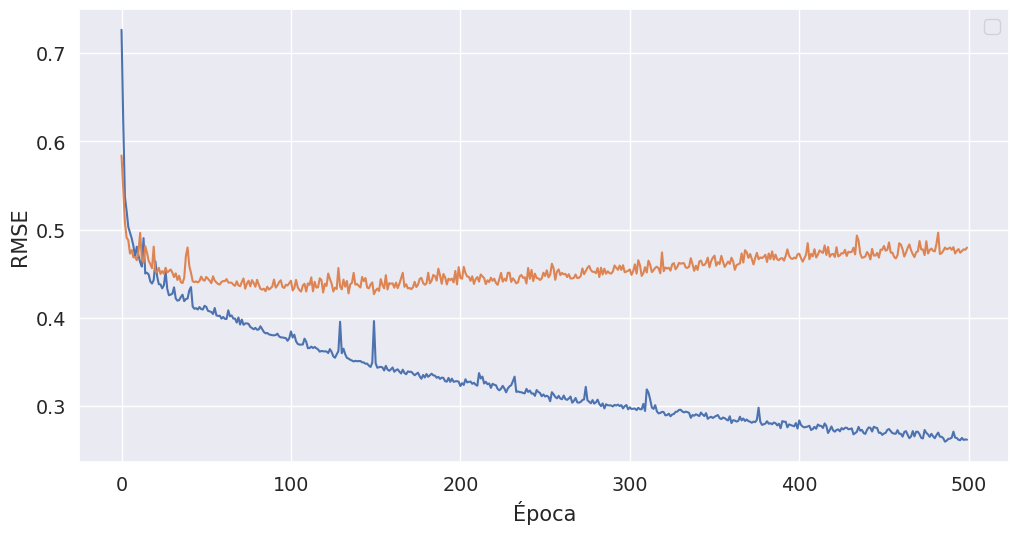

In [58]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Aca ya directamente a partir de un punto empieza a desaprender las cosas útiles que aprendió.

Como podemos solucionar este problema? Qué métodos vimos para mejorar la generalización del modelo?

Probamos el método de [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) primero con el modelo anterior con muchas neuronas:

In [59]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [60]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 22s - loss: 0.8100

1696/6000 [=======>......................] - ETA: 0s - loss: 0.7183 

3456/6000 [================>.............] - ETA: 0s - loss: 0.6554

5280/6000 [=========================>....] - ETA: 0s - loss: 0.6241

6000/6000 [==============================] - 0s 63us/step - loss: 0.6144 - val_loss: 0.3921


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3494

1824/6000 [========>.....................] - ETA: 0s - loss: 0.4741

3616/6000 [=================>............] - ETA: 0s - loss: 0.4964

5440/6000 [==========================>...] - ETA: 0s - loss: 0.4918

6000/6000 [==============================] - 0s 39us/step - loss: 0.4868 - val_loss: 0.3491


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2894

1728/6000 [=======>......................] - ETA: 0s - loss: 0.4699

3520/6000 [================>.............] - ETA: 0s - loss: 0.4437

5312/6000 [=========================>....] - ETA: 0s - loss: 0.4223

6000/6000 [==============================] - 0s 39us/step - loss: 0.4178 - val_loss: 0.3133


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2897

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3287

3616/6000 [=================>............] - ETA: 0s - loss: 0.3737

5408/6000 [==========================>...] - ETA: 0s - loss: 0.3730

6000/6000 [==============================] - 0s 39us/step - loss: 0.3675 - val_loss: 0.2854


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2558

1792/6000 [=======>......................] - ETA: 0s - loss: 0.4276

3584/6000 [================>.............] - ETA: 0s - loss: 0.3803

5376/6000 [=========================>....] - ETA: 0s - loss: 0.3757

6000/6000 [==============================] - 0s 39us/step - loss: 0.3678 - val_loss: 0.2621


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2510

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2909

3616/6000 [=================>............] - ETA: 0s - loss: 0.3799

5408/6000 [==========================>...] - ETA: 0s - loss: 0.3622

6000/6000 [==============================] - 0s 39us/step - loss: 0.3572 - val_loss: 0.2554


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3244

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3000

3584/6000 [================>.............] - ETA: 0s - loss: 0.2988

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2984

6000/6000 [==============================] - 0s 39us/step - loss: 0.2938 - val_loss: 0.2497


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2989

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2861

3616/6000 [=================>............] - ETA: 0s - loss: 0.2850

5408/6000 [==========================>...] - ETA: 0s - loss: 0.3056

6000/6000 [==============================] - 0s 39us/step - loss: 0.3004 - val_loss: 0.2405


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2657

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2997

3552/6000 [================>.............] - ETA: 0s - loss: 0.2797

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2797

6000/6000 [==============================] - 0s 39us/step - loss: 0.2832 - val_loss: 0.2392


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2718

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2698

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2788

6000/6000 [==============================] - 0s 41us/step - loss: 0.2841 - val_loss: 0.2398


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3821

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3079

3680/6000 [=================>............] - ETA: 0s - loss: 0.2768

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2754

6000/6000 [==============================] - 0s 39us/step - loss: 0.2755 - val_loss: 0.2288


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1623

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2978

3584/6000 [================>.............] - ETA: 0s - loss: 0.2970

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2848

6000/6000 [==============================] - 0s 39us/step - loss: 0.2762 - val_loss: 0.2297


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6578

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3306

3648/6000 [=================>............] - ETA: 0s - loss: 0.2968

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2834

6000/6000 [==============================] - 0s 39us/step - loss: 0.2801 - val_loss: 0.2274


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4488

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2902

3616/6000 [=================>............] - ETA: 0s - loss: 0.2690

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2632

6000/6000 [==============================] - 0s 39us/step - loss: 0.2631 - val_loss: 0.2268


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3216

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2869

3616/6000 [=================>............] - ETA: 0s - loss: 0.2748

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2621

6000/6000 [==============================] - 0s 39us/step - loss: 0.2636 - val_loss: 0.2256


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0889

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2759

3648/6000 [=================>............] - ETA: 0s - loss: 0.2630

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2563

6000/6000 [==============================] - 0s 39us/step - loss: 0.2529 - val_loss: 0.2245


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2120

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2377

3584/6000 [================>.............] - ETA: 0s - loss: 0.2511

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2533

6000/6000 [==============================] - 0s 39us/step - loss: 0.2562 - val_loss: 0.2244


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1082

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2435

3648/6000 [=================>............] - ETA: 0s - loss: 0.2432

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2537

6000/6000 [==============================] - 0s 38us/step - loss: 0.2527 - val_loss: 0.2242


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5036

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2473

3584/6000 [================>.............] - ETA: 0s - loss: 0.2477

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2476

6000/6000 [==============================] - 0s 39us/step - loss: 0.2543 - val_loss: 0.2286


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2062

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2487

3648/6000 [=================>............] - ETA: 0s - loss: 0.2487

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2466

6000/6000 [==============================] - 0s 39us/step - loss: 0.2503 - val_loss: 0.2210


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3642

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2556

3584/6000 [================>.............] - ETA: 0s - loss: 0.2354

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2451

6000/6000 [==============================] - 0s 39us/step - loss: 0.2436 - val_loss: 0.2224


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3137

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2446

3552/6000 [================>.............] - ETA: 0s - loss: 0.2452

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2465

6000/6000 [==============================] - 0s 40us/step - loss: 0.2438 - val_loss: 0.2241


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4396

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2453

3520/6000 [================>.............] - ETA: 0s - loss: 0.2479

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2475

6000/6000 [==============================] - 0s 39us/step - loss: 0.2448 - val_loss: 0.2185


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2217

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2589

3584/6000 [================>.............] - ETA: 0s - loss: 0.2457

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2428

6000/6000 [==============================] - 0s 39us/step - loss: 0.2422 - val_loss: 0.2177


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2124

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2426

3680/6000 [=================>............] - ETA: 0s - loss: 0.2314

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 39us/step - loss: 0.2363 - val_loss: 0.2220


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2939

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2459

3520/6000 [================>.............] - ETA: 0s - loss: 0.2414

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2411

6000/6000 [==============================] - 0s 39us/step - loss: 0.2406 - val_loss: 0.2170


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2196

3552/6000 [================>.............] - ETA: 0s - loss: 0.2442

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2430

6000/6000 [==============================] - 0s 40us/step - loss: 0.2420 - val_loss: 0.2183


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2221

3648/6000 [=================>............] - ETA: 0s - loss: 0.2351

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2371

6000/6000 [==============================] - 0s 39us/step - loss: 0.2365 - val_loss: 0.2127


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2083

3616/6000 [=================>............] - ETA: 0s - loss: 0.2327

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2372

6000/6000 [==============================] - 0s 38us/step - loss: 0.2366 - val_loss: 0.2148


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2582

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2290

3520/6000 [================>.............] - ETA: 0s - loss: 0.2355

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2437

6000/6000 [==============================] - 0s 39us/step - loss: 0.2440 - val_loss: 0.2139


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1920

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2301

3712/6000 [=================>............] - ETA: 0s - loss: 0.2339

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 38us/step - loss: 0.2306 - val_loss: 0.2151


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2455

3648/6000 [=================>............] - ETA: 0s - loss: 0.2345

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2328

6000/6000 [==============================] - 0s 39us/step - loss: 0.2327 - val_loss: 0.2105


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2413

3584/6000 [================>.............] - ETA: 0s - loss: 0.2443

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2417

6000/6000 [==============================] - 0s 40us/step - loss: 0.2396 - val_loss: 0.2137


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4848

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2323

3520/6000 [================>.............] - ETA: 0s - loss: 0.2215

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 39us/step - loss: 0.2294 - val_loss: 0.2136


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1948

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2063

3520/6000 [================>.............] - ETA: 0s - loss: 0.2254

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 40us/step - loss: 0.2292 - val_loss: 0.2096


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1905

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2392

3520/6000 [================>.............] - ETA: 0s - loss: 0.2256

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 39us/step - loss: 0.2317 - val_loss: 0.2087


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1776

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2372

3552/6000 [================>.............] - ETA: 0s - loss: 0.2345

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 39us/step - loss: 0.2270 - val_loss: 0.2121


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2107

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2439

3552/6000 [================>.............] - ETA: 0s - loss: 0.2345

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 39us/step - loss: 0.2294 - val_loss: 0.2122


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2853

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2232

3552/6000 [================>.............] - ETA: 0s - loss: 0.2317

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2329

6000/6000 [==============================] - 0s 39us/step - loss: 0.2321 - val_loss: 0.2086


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3384

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2307

3616/6000 [=================>............] - ETA: 0s - loss: 0.2300

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 39us/step - loss: 0.2295 - val_loss: 0.2116


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2033

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2036

3552/6000 [================>.............] - ETA: 0s - loss: 0.2229

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 39us/step - loss: 0.2300 - val_loss: 0.2121


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1167

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2232

3616/6000 [=================>............] - ETA: 0s - loss: 0.2376

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2357

6000/6000 [==============================] - 0s 39us/step - loss: 0.2352 - val_loss: 0.2083


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2059

3648/6000 [=================>............] - ETA: 0s - loss: 0.2194

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 38us/step - loss: 0.2297 - val_loss: 0.2066


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2293

3456/6000 [================>.............] - ETA: 0s - loss: 0.2195

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 40us/step - loss: 0.2262 - val_loss: 0.2049


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3788

1312/6000 [=====>........................] - ETA: 0s - loss: 0.2377

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2331

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 43us/step - loss: 0.2257 - val_loss: 0.2068


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3453

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2355

3488/6000 [================>.............] - ETA: 0s - loss: 0.2237

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 40us/step - loss: 0.2258 - val_loss: 0.2094


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1763

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2322

3552/6000 [================>.............] - ETA: 0s - loss: 0.2150

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 40us/step - loss: 0.2251 - val_loss: 0.2047


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2703

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2365

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2220

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 40us/step - loss: 0.2214 - val_loss: 0.2136


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1950

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2287

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 43us/step - loss: 0.2243 - val_loss: 0.2009


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1744

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2373

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2219

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 41us/step - loss: 0.2220 - val_loss: 0.2086


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2381

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2117

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2195

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 41us/step - loss: 0.2231 - val_loss: 0.2040


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1529

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2006

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2165

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 42us/step - loss: 0.2199 - val_loss: 0.2073


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2451

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2454

3488/6000 [================>.............] - ETA: 0s - loss: 0.2302

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 40us/step - loss: 0.2258 - val_loss: 0.2057


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3427

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2208

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2225

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 43us/step - loss: 0.2212 - val_loss: 0.1999


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1898

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2269

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2096

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 40us/step - loss: 0.2205 - val_loss: 0.2022


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1807

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2259

3552/6000 [================>.............] - ETA: 0s - loss: 0.2245

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 39us/step - loss: 0.2210 - val_loss: 0.2024


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2149

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2298

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2187

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 41us/step - loss: 0.2180 - val_loss: 0.2010


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2260

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2236

3648/6000 [=================>............] - ETA: 0s - loss: 0.2194

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 39us/step - loss: 0.2229 - val_loss: 0.2017


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2217

3648/6000 [=================>............] - ETA: 0s - loss: 0.2199

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 39us/step - loss: 0.2204 - val_loss: 0.2012


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3451

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2136

3584/6000 [================>.............] - ETA: 0s - loss: 0.2199

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2159

6000/6000 [==============================] - 0s 39us/step - loss: 0.2172 - val_loss: 0.2088


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2443

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2273

3456/6000 [================>.............] - ETA: 0s - loss: 0.2236

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 40us/step - loss: 0.2210 - val_loss: 0.2010


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1833

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2068

3584/6000 [================>.............] - ETA: 0s - loss: 0.2132

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 39us/step - loss: 0.2142 - val_loss: 0.2021


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1685

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2317

3648/6000 [=================>............] - ETA: 0s - loss: 0.2315

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2150

6000/6000 [==============================] - 0s 39us/step - loss: 0.2144 - val_loss: 0.2021


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3675

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2149

3584/6000 [================>.............] - ETA: 0s - loss: 0.2226

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 39us/step - loss: 0.2215 - val_loss: 0.1967


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1981

3648/6000 [=================>............] - ETA: 0s - loss: 0.2211

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 39us/step - loss: 0.2174 - val_loss: 0.1983


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2324

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1938

3616/6000 [=================>............] - ETA: 0s - loss: 0.2145

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2170

6000/6000 [==============================] - 0s 39us/step - loss: 0.2182 - val_loss: 0.1981


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4269

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2037

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2092

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2077

5920/6000 [============================>.] - ETA: 0s - loss: 0.2143

6000/6000 [==============================] - 0s 47us/step - loss: 0.2146 - val_loss: 0.1970


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3062

1344/6000 [=====>........................] - ETA: 0s - loss: 0.2161

2656/6000 [============>.................] - ETA: 0s - loss: 0.2078

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2104

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2131

6000/6000 [==============================] - 0s 60us/step - loss: 0.2127 - val_loss: 0.1962


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5372

 736/6000 [==>...........................] - ETA: 0s - loss: 0.2060

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2092

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2231

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2129

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 55us/step - loss: 0.2159 - val_loss: 0.1994


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2562

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2424

2720/6000 [============>.................] - ETA: 0s - loss: 0.2134

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2207

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 48us/step - loss: 0.2130 - val_loss: 0.2001


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1713

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1908

3424/6000 [================>.............] - ETA: 0s - loss: 0.2097

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 39us/step - loss: 0.2144 - val_loss: 0.1994


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1036

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2219

3616/6000 [=================>............] - ETA: 0s - loss: 0.2151

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2141

6000/6000 [==============================] - 0s 39us/step - loss: 0.2121 - val_loss: 0.1964


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2407

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2169

3584/6000 [================>.............] - ETA: 0s - loss: 0.2196

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 38us/step - loss: 0.2148 - val_loss: 0.2003


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1154

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2047

3616/6000 [=================>............] - ETA: 0s - loss: 0.2167

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 39us/step - loss: 0.2190 - val_loss: 0.1968


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2044

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1996

3680/6000 [=================>............] - ETA: 0s - loss: 0.2069

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2064

6000/6000 [==============================] - 0s 38us/step - loss: 0.2102 - val_loss: 0.1981


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4435

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2371

3616/6000 [=================>............] - ETA: 0s - loss: 0.2312

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2154

6000/6000 [==============================] - 0s 39us/step - loss: 0.2117 - val_loss: 0.1968


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2366

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2172

3552/6000 [================>.............] - ETA: 0s - loss: 0.2133

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 39us/step - loss: 0.2118 - val_loss: 0.1986


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1913

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2053

3648/6000 [=================>............] - ETA: 0s - loss: 0.2044

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2070

6000/6000 [==============================] - 0s 39us/step - loss: 0.2092 - val_loss: 0.1981


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4646

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2044

3680/6000 [=================>............] - ETA: 0s - loss: 0.2097

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2097

6000/6000 [==============================] - 0s 38us/step - loss: 0.2116 - val_loss: 0.1973


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1988

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2287

3584/6000 [================>.............] - ETA: 0s - loss: 0.2113

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2093

6000/6000 [==============================] - 0s 38us/step - loss: 0.2108 - val_loss: 0.1935


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1550

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2087

3616/6000 [=================>............] - ETA: 0s - loss: 0.2076

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2103

6000/6000 [==============================] - 0s 39us/step - loss: 0.2103 - val_loss: 0.1941


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2119

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2284

3456/6000 [================>.............] - ETA: 0s - loss: 0.2041

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2041

6000/6000 [==============================] - 0s 40us/step - loss: 0.2098 - val_loss: 0.1927


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1765

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1983

3584/6000 [================>.............] - ETA: 0s - loss: 0.1993

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2078

6000/6000 [==============================] - 0s 39us/step - loss: 0.2086 - val_loss: 0.1930


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2425

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1947

3584/6000 [================>.............] - ETA: 0s - loss: 0.2052

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2098

6000/6000 [==============================] - 0s 39us/step - loss: 0.2078 - val_loss: 0.1923


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2073

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2122

3584/6000 [================>.............] - ETA: 0s - loss: 0.2152

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2080

6000/6000 [==============================] - 0s 39us/step - loss: 0.2074 - val_loss: 0.1908


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1092

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2133

3584/6000 [================>.............] - ETA: 0s - loss: 0.2069

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2092

6000/6000 [==============================] - 0s 39us/step - loss: 0.2094 - val_loss: 0.1942


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2498

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2144

3648/6000 [=================>............] - ETA: 0s - loss: 0.2162

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2052

6000/6000 [==============================] - 0s 38us/step - loss: 0.2057 - val_loss: 0.1943


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1862

3648/6000 [=================>............] - ETA: 0s - loss: 0.2020

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2061

6000/6000 [==============================] - 0s 39us/step - loss: 0.2042 - val_loss: 0.1973


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2125

3616/6000 [=================>............] - ETA: 0s - loss: 0.2184

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 39us/step - loss: 0.2134 - val_loss: 0.1913


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1855

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2102

3488/6000 [================>.............] - ETA: 0s - loss: 0.2103

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2074

6000/6000 [==============================] - 0s 39us/step - loss: 0.2076 - val_loss: 0.1962


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1974

3648/6000 [=================>............] - ETA: 0s - loss: 0.2006

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1997

6000/6000 [==============================] - 0s 39us/step - loss: 0.2036 - val_loss: 0.1918


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2116

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2113

3584/6000 [================>.............] - ETA: 0s - loss: 0.2096

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2058

6000/6000 [==============================] - 0s 39us/step - loss: 0.2058 - val_loss: 0.1918


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1079

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2106

3616/6000 [=================>............] - ETA: 0s - loss: 0.2182

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2093

6000/6000 [==============================] - 0s 39us/step - loss: 0.2101 - val_loss: 0.1935


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2604

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1868

3584/6000 [================>.............] - ETA: 0s - loss: 0.1984

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2030

6000/6000 [==============================] - 0s 38us/step - loss: 0.2032 - val_loss: 0.1919


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1014

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2048

3680/6000 [=================>............] - ETA: 0s - loss: 0.2059

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2052

6000/6000 [==============================] - 0s 40us/step - loss: 0.2036 - val_loss: 0.1913


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2036

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2098

3552/6000 [================>.............] - ETA: 0s - loss: 0.1977

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1983

6000/6000 [==============================] - 0s 39us/step - loss: 0.2040 - val_loss: 0.2018


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5238

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2044

3520/6000 [================>.............] - ETA: 0s - loss: 0.1980

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2049

6000/6000 [==============================] - 0s 40us/step - loss: 0.2051 - val_loss: 0.1968


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0775

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1896

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2006

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2038

6000/6000 [==============================] - 0s 43us/step - loss: 0.2091 - val_loss: 0.1921


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1676

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1947

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2035

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1997

6000/6000 [==============================] - 0s 42us/step - loss: 0.2029 - val_loss: 0.1923


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1910

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1999

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2023

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2000

6000/6000 [==============================] - 0s 42us/step - loss: 0.1974 - val_loss: 0.1904


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1847

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2114

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2039

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2037

6000/6000 [==============================] - 0s 41us/step - loss: 0.2021 - val_loss: 0.1889


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2823

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1932

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1958

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1966

6000/6000 [==============================] - 0s 41us/step - loss: 0.1986 - val_loss: 0.1916


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2361

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2075

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2040

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 41us/step - loss: 0.2006 - val_loss: 0.2052


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1284

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1893

3488/6000 [================>.............] - ETA: 0s - loss: 0.1865

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 39us/step - loss: 0.1958 - val_loss: 0.1929


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2934

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1944

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1944

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1979

6000/6000 [==============================] - 0s 43us/step - loss: 0.1985 - val_loss: 0.1945


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2117

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1897

3424/6000 [================>.............] - ETA: 0s - loss: 0.2005

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2036

6000/6000 [==============================] - 0s 43us/step - loss: 0.2008 - val_loss: 0.1927


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1101

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1982

2784/6000 [============>.................] - ETA: 0s - loss: 0.1959

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2050

6000/6000 [==============================] - 0s 44us/step - loss: 0.2027 - val_loss: 0.1947


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1993

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2046

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2027

6000/6000 [==============================] - 0s 44us/step - loss: 0.1992 - val_loss: 0.1882


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2640

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1883

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1929

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2011

6000/6000 [==============================] - 0s 40us/step - loss: 0.2039 - val_loss: 0.1886


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1413

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2052

3552/6000 [================>.............] - ETA: 0s - loss: 0.2048

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2023

6000/6000 [==============================] - 0s 41us/step - loss: 0.2006 - val_loss: 0.1887


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1526

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1959

3424/6000 [================>.............] - ETA: 0s - loss: 0.2041

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1996

6000/6000 [==============================] - 0s 43us/step - loss: 0.2014 - val_loss: 0.1934


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3200

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2018

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1961

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1942

6000/6000 [==============================] - 0s 41us/step - loss: 0.1941 - val_loss: 0.1876


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1974

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1923

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1949

6000/6000 [==============================] - 0s 41us/step - loss: 0.1986 - val_loss: 0.1911


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2605

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1651

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1922

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1966

6000/6000 [==============================] - 0s 41us/step - loss: 0.1952 - val_loss: 0.1904


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1024

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1945

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2016

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1987

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1992

6000/6000 [==============================] - 0s 47us/step - loss: 0.2006 - val_loss: 0.1907


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1954

3456/6000 [================>.............] - ETA: 0s - loss: 0.1881

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1954

6000/6000 [==============================] - 0s 42us/step - loss: 0.1983 - val_loss: 0.1873


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1593

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2021

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2027

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2032

6000/6000 [==============================] - 0s 42us/step - loss: 0.1998 - val_loss: 0.1948


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2047

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2054

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2004

6000/6000 [==============================] - 0s 41us/step - loss: 0.2029 - val_loss: 0.1987


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1814

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1929

3520/6000 [================>.............] - ETA: 0s - loss: 0.1869

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1988

6000/6000 [==============================] - 0s 40us/step - loss: 0.1993 - val_loss: 0.1910


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1805

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2130

3456/6000 [================>.............] - ETA: 0s - loss: 0.1942

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 40us/step - loss: 0.2130 - val_loss: 0.1950


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2982

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1885

2848/6000 [=============>................] - ETA: 0s - loss: 0.1948

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 44us/step - loss: 0.1997 - val_loss: 0.1905


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2126

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1962

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2007

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2037

6000/6000 [==============================] - 0s 40us/step - loss: 0.2012 - val_loss: 0.1902


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2311

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1891

3552/6000 [================>.............] - ETA: 0s - loss: 0.1905

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1968

6000/6000 [==============================] - 0s 39us/step - loss: 0.1990 - val_loss: 0.1908


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2037

3488/6000 [================>.............] - ETA: 0s - loss: 0.1916

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1917

6000/6000 [==============================] - 0s 39us/step - loss: 0.1925 - val_loss: 0.1881


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1970

3520/6000 [================>.............] - ETA: 0s - loss: 0.1926

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1895

6000/6000 [==============================] - 0s 40us/step - loss: 0.1933 - val_loss: 0.1925


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4047

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1952

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1940

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 42us/step - loss: 0.1967 - val_loss: 0.1906


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2266

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1919

3584/6000 [================>.............] - ETA: 0s - loss: 0.2009

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2036

6000/6000 [==============================] - 0s 39us/step - loss: 0.2017 - val_loss: 0.1932


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1730

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1980

3584/6000 [================>.............] - ETA: 0s - loss: 0.1935

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1942

6000/6000 [==============================] - 0s 39us/step - loss: 0.1962 - val_loss: 0.1887


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1899

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1911

3520/6000 [================>.............] - ETA: 0s - loss: 0.1988

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1973

6000/6000 [==============================] - 0s 39us/step - loss: 0.1960 - val_loss: 0.1882


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1493

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1926

3552/6000 [================>.............] - ETA: 0s - loss: 0.1917

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 39us/step - loss: 0.1947 - val_loss: 0.1868


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1808

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1871

3488/6000 [================>.............] - ETA: 0s - loss: 0.1910

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 40us/step - loss: 0.1968 - val_loss: 0.1892


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1824

3488/6000 [================>.............] - ETA: 0s - loss: 0.1893

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1925

6000/6000 [==============================] - 0s 40us/step - loss: 0.1943 - val_loss: 0.1921


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2970

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1854

3520/6000 [================>.............] - ETA: 0s - loss: 0.1913

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 39us/step - loss: 0.1942 - val_loss: 0.1857


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2190

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2061

3520/6000 [================>.............] - ETA: 0s - loss: 0.1957

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1970

6000/6000 [==============================] - 0s 39us/step - loss: 0.1964 - val_loss: 0.1909


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2111

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1973

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1972

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1930

6000/6000 [==============================] - 0s 40us/step - loss: 0.1952 - val_loss: 0.1902


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2433

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1898

3552/6000 [================>.............] - ETA: 0s - loss: 0.2003

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1987

6000/6000 [==============================] - 0s 39us/step - loss: 0.1973 - val_loss: 0.1895


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0976

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1896

3520/6000 [================>.............] - ETA: 0s - loss: 0.1904

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 40us/step - loss: 0.1948 - val_loss: 0.1874


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2768

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1921

3552/6000 [================>.............] - ETA: 0s - loss: 0.1995

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 38us/step - loss: 0.1968 - val_loss: 0.1924


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1351

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2077

3520/6000 [================>.............] - ETA: 0s - loss: 0.1992

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1982

6000/6000 [==============================] - 0s 39us/step - loss: 0.1982 - val_loss: 0.1895


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0860

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1920

3520/6000 [================>.............] - ETA: 0s - loss: 0.1934

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 40us/step - loss: 0.1973 - val_loss: 0.1846


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0854

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1891

3456/6000 [================>.............] - ETA: 0s - loss: 0.1897

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1948

6000/6000 [==============================] - 0s 40us/step - loss: 0.1968 - val_loss: 0.1851


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2155

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1810

3584/6000 [================>.............] - ETA: 0s - loss: 0.1843

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 39us/step - loss: 0.1922 - val_loss: 0.1866


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2631

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1958

3456/6000 [================>.............] - ETA: 0s - loss: 0.1909

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1930

6000/6000 [==============================] - 0s 39us/step - loss: 0.1971 - val_loss: 0.1888


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1003

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1764

3552/6000 [================>.............] - ETA: 0s - loss: 0.1914

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 39us/step - loss: 0.1934 - val_loss: 0.1879


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1490

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1825

3552/6000 [================>.............] - ETA: 0s - loss: 0.1887

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1955

6000/6000 [==============================] - 0s 39us/step - loss: 0.1975 - val_loss: 0.1900


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1416

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1834

3520/6000 [================>.............] - ETA: 0s - loss: 0.1886

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 39us/step - loss: 0.1906 - val_loss: 0.1862


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0876

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1936

3584/6000 [================>.............] - ETA: 0s - loss: 0.1932

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1907

6000/6000 [==============================] - 0s 39us/step - loss: 0.1923 - val_loss: 0.1876


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1289

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2137

3584/6000 [================>.............] - ETA: 0s - loss: 0.1996

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 40us/step - loss: 0.1939 - val_loss: 0.1884


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3218

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1883

3488/6000 [================>.............] - ETA: 0s - loss: 0.1895

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1935

6000/6000 [==============================] - 0s 39us/step - loss: 0.1926 - val_loss: 0.1854


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1635

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2142

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2031

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 41us/step - loss: 0.1963 - val_loss: 0.1884


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1945

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1613

3552/6000 [================>.............] - ETA: 0s - loss: 0.1732

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 38us/step - loss: 0.1875 - val_loss: 0.1883


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2054

3520/6000 [================>.............] - ETA: 0s - loss: 0.2015

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1936

6000/6000 [==============================] - 0s 39us/step - loss: 0.1934 - val_loss: 0.1898


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1846

3552/6000 [================>.............] - ETA: 0s - loss: 0.1954

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 39us/step - loss: 0.1971 - val_loss: 0.1864


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1835

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1943

3552/6000 [================>.............] - ETA: 0s - loss: 0.1900

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1946

6000/6000 [==============================] - 0s 39us/step - loss: 0.1932 - val_loss: 0.1871


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1415

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1914

3616/6000 [=================>............] - ETA: 0s - loss: 0.1984

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1937

6000/6000 [==============================] - 0s 39us/step - loss: 0.1942 - val_loss: 0.1862


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1234

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2003

3584/6000 [================>.............] - ETA: 0s - loss: 0.1985

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1946

6000/6000 [==============================] - 0s 42us/step - loss: 0.1933 - val_loss: 0.1860


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2502

1408/6000 [======>.......................] - ETA: 0s - loss: 0.2083

2880/6000 [=============>................] - ETA: 0s - loss: 0.1945

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 43us/step - loss: 0.1867 - val_loss: 0.1876


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1763

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1955

3552/6000 [================>.............] - ETA: 0s - loss: 0.1908

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 39us/step - loss: 0.1922 - val_loss: 0.1888


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2064

3552/6000 [================>.............] - ETA: 0s - loss: 0.1890

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 39us/step - loss: 0.1895 - val_loss: 0.1869


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2144

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2087

3520/6000 [================>.............] - ETA: 0s - loss: 0.1960

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 40us/step - loss: 0.1942 - val_loss: 0.1872


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2973

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1852

3552/6000 [================>.............] - ETA: 0s - loss: 0.1845

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 40us/step - loss: 0.1907 - val_loss: 0.1939


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2433

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1788

3648/6000 [=================>............] - ETA: 0s - loss: 0.1918

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 39us/step - loss: 0.1924 - val_loss: 0.1838


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1993

3584/6000 [================>.............] - ETA: 0s - loss: 0.2050

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1977

6000/6000 [==============================] - 0s 39us/step - loss: 0.1966 - val_loss: 0.1863


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2143

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1921

3552/6000 [================>.............] - ETA: 0s - loss: 0.1880

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1914

6000/6000 [==============================] - 0s 39us/step - loss: 0.1897 - val_loss: 0.1813


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3950

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2065

3616/6000 [=================>............] - ETA: 0s - loss: 0.1968

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1919

6000/6000 [==============================] - 0s 39us/step - loss: 0.1894 - val_loss: 0.1856


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1890

3616/6000 [=================>............] - ETA: 0s - loss: 0.1944

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1888

6000/6000 [==============================] - 0s 38us/step - loss: 0.1901 - val_loss: 0.1863


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1549

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1885

3584/6000 [================>.............] - ETA: 0s - loss: 0.1825

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 39us/step - loss: 0.1875 - val_loss: 0.1886


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1960

3648/6000 [=================>............] - ETA: 0s - loss: 0.1893

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 39us/step - loss: 0.1881 - val_loss: 0.1862


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1816

3584/6000 [================>.............] - ETA: 0s - loss: 0.1742

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1856

6000/6000 [==============================] - 0s 38us/step - loss: 0.1844 - val_loss: 0.1874


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1671

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1682

3616/6000 [=================>............] - ETA: 0s - loss: 0.1787

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1884

6000/6000 [==============================] - 0s 39us/step - loss: 0.1887 - val_loss: 0.1862


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1912

3584/6000 [================>.............] - ETA: 0s - loss: 0.1909

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 38us/step - loss: 0.1904 - val_loss: 0.1895


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2559

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1745

3584/6000 [================>.............] - ETA: 0s - loss: 0.1835

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 39us/step - loss: 0.1930 - val_loss: 0.1893


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2435

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1804

3520/6000 [================>.............] - ETA: 0s - loss: 0.1872

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1928

6000/6000 [==============================] - 0s 39us/step - loss: 0.1906 - val_loss: 0.1873


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2038

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1719

3584/6000 [================>.............] - ETA: 0s - loss: 0.1858

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 38us/step - loss: 0.1880 - val_loss: 0.1847


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1725

3552/6000 [================>.............] - ETA: 0s - loss: 0.1782

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 39us/step - loss: 0.1882 - val_loss: 0.1891


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2625

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1821

3520/6000 [================>.............] - ETA: 0s - loss: 0.1899

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 39us/step - loss: 0.1904 - val_loss: 0.1826


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1026

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1961

3584/6000 [================>.............] - ETA: 0s - loss: 0.1921

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 39us/step - loss: 0.1872 - val_loss: 0.1835


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1500

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1801

3616/6000 [=================>............] - ETA: 0s - loss: 0.1793

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 39us/step - loss: 0.1875 - val_loss: 0.1895


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2199

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1914

3552/6000 [================>.............] - ETA: 0s - loss: 0.1960

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1905

6000/6000 [==============================] - 0s 39us/step - loss: 0.1921 - val_loss: 0.1822


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0710

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1855

3552/6000 [================>.............] - ETA: 0s - loss: 0.1889

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 38us/step - loss: 0.1861 - val_loss: 0.1854


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1953

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1725

3584/6000 [================>.............] - ETA: 0s - loss: 0.1833

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 38us/step - loss: 0.1911 - val_loss: 0.1846


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2128

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1890

3648/6000 [=================>............] - ETA: 0s - loss: 0.1924

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1865

6000/6000 [==============================] - 0s 39us/step - loss: 0.1875 - val_loss: 0.1864


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1630

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1902

3584/6000 [================>.............] - ETA: 0s - loss: 0.1894

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 39us/step - loss: 0.1896 - val_loss: 0.1820


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2222

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1856

3616/6000 [=================>............] - ETA: 0s - loss: 0.1914

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 38us/step - loss: 0.1859 - val_loss: 0.1807


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1833

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1902

3552/6000 [================>.............] - ETA: 0s - loss: 0.1802

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1825

6000/6000 [==============================] - 0s 39us/step - loss: 0.1829 - val_loss: 0.1809


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1660

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1857

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1875

6000/6000 [==============================] - 0s 40us/step - loss: 0.1868 - val_loss: 0.1852


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1790

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1639

3552/6000 [================>.............] - ETA: 0s - loss: 0.1733

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 39us/step - loss: 0.1903 - val_loss: 0.1862


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2128

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1849

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1835

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 40us/step - loss: 0.1892 - val_loss: 0.1855


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1247

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1882

3552/6000 [================>.............] - ETA: 0s - loss: 0.1878

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 40us/step - loss: 0.1876 - val_loss: 0.1820


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1202

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1933

3552/6000 [================>.............] - ETA: 0s - loss: 0.1809

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 39us/step - loss: 0.1861 - val_loss: 0.1869


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0742

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1858

3584/6000 [================>.............] - ETA: 0s - loss: 0.1934

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 39us/step - loss: 0.1831 - val_loss: 0.1851


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0860

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1705

3552/6000 [================>.............] - ETA: 0s - loss: 0.1775

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1856

6000/6000 [==============================] - 0s 40us/step - loss: 0.1877 - val_loss: 0.1842


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1920

3584/6000 [================>.............] - ETA: 0s - loss: 0.1911

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 38us/step - loss: 0.1888 - val_loss: 0.1862


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2000

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1878

3584/6000 [================>.............] - ETA: 0s - loss: 0.1860

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 38us/step - loss: 0.1837 - val_loss: 0.1833


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1613

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1851

3552/6000 [================>.............] - ETA: 0s - loss: 0.1887

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 38us/step - loss: 0.2118 - val_loss: 0.1826


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1413

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1800

3552/6000 [================>.............] - ETA: 0s - loss: 0.1764

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1883

6000/6000 [==============================] - 0s 39us/step - loss: 0.1877 - val_loss: 0.1901


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1652

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1805

3616/6000 [=================>............] - ETA: 0s - loss: 0.1823

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1861

6000/6000 [==============================] - 0s 39us/step - loss: 0.1859 - val_loss: 0.1891


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4395

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1837

3616/6000 [=================>............] - ETA: 0s - loss: 0.1951

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1882

6000/6000 [==============================] - 0s 39us/step - loss: 0.1866 - val_loss: 0.1878


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3637

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1742

3584/6000 [================>.............] - ETA: 0s - loss: 0.1852

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1871

6000/6000 [==============================] - 0s 39us/step - loss: 0.1868 - val_loss: 0.1943


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1648

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1671

3584/6000 [================>.............] - ETA: 0s - loss: 0.1813

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 39us/step - loss: 0.1843 - val_loss: 0.1872


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1690

3584/6000 [================>.............] - ETA: 0s - loss: 0.1786

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 38us/step - loss: 0.1851 - val_loss: 0.1840


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1298

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1822

3552/6000 [================>.............] - ETA: 0s - loss: 0.1815

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 40us/step - loss: 0.1819 - val_loss: 0.1796


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0772

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1866

3552/6000 [================>.............] - ETA: 0s - loss: 0.1765

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 40us/step - loss: 0.1836 - val_loss: 0.1804


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1395

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1580

3616/6000 [=================>............] - ETA: 0s - loss: 0.1743

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 39us/step - loss: 0.1805 - val_loss: 0.1837


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1106

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1745

3584/6000 [================>.............] - ETA: 0s - loss: 0.1778

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 41us/step - loss: 0.1856 - val_loss: 0.1807


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2016

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1799

2816/6000 [=============>................] - ETA: 0s - loss: 0.1830

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1824

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1827

6000/6000 [==============================] - 0s 47us/step - loss: 0.1844 - val_loss: 0.1850


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2375

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1945

2816/6000 [=============>................] - ETA: 0s - loss: 0.1934

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1908

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 62us/step - loss: 0.1861 - val_loss: 0.1880


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

 992/6000 [===>..........................] - ETA: 0s - loss: 0.1817

2432/6000 [===========>..................] - ETA: 0s - loss: 0.1865

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1855

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 49us/step - loss: 0.1853 - val_loss: 0.1877


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5127

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1863

2784/6000 [============>.................] - ETA: 0s - loss: 0.1865

3744/6000 [=================>............] - ETA: 0s - loss: 0.1838

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1856

6000/6000 [==============================] - 0s 51us/step - loss: 0.1860 - val_loss: 0.1836


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1529

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1817

2816/6000 [=============>................] - ETA: 0s - loss: 0.1811

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1903

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1861

6000/6000 [==============================] - 0s 48us/step - loss: 0.1852 - val_loss: 0.1844


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0961

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1703

2784/6000 [============>.................] - ETA: 0s - loss: 0.1724

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1737

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 47us/step - loss: 0.1813 - val_loss: 0.1836


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3148

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1950

2752/6000 [============>.................] - ETA: 0s - loss: 0.1900

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1911

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 47us/step - loss: 0.1870 - val_loss: 0.1857


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1736

2912/6000 [=============>................] - ETA: 0s - loss: 0.1831

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1852

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 47us/step - loss: 0.1848 - val_loss: 0.1872


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1869

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1946

2528/6000 [===========>..................] - ETA: 0s - loss: 0.1881

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1796

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 49us/step - loss: 0.1845 - val_loss: 0.1814


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1194

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1961

2848/6000 [=============>................] - ETA: 0s - loss: 0.1942

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1847

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 49us/step - loss: 0.1843 - val_loss: 0.1852


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1338

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1978

2752/6000 [============>.................] - ETA: 0s - loss: 0.1910

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1835

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 47us/step - loss: 0.1856 - val_loss: 0.1843


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2091

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1829

2848/6000 [=============>................] - ETA: 0s - loss: 0.1767

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1860

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 46us/step - loss: 0.1858 - val_loss: 0.1860


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3939

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1869

3488/6000 [================>.............] - ETA: 0s - loss: 0.1862

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 40us/step - loss: 0.1786 - val_loss: 0.1855


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1833

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1854

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 41us/step - loss: 0.1802 - val_loss: 0.1843


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1067

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1993

3456/6000 [================>.............] - ETA: 0s - loss: 0.1816

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 40us/step - loss: 0.1781 - val_loss: 0.1824


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2582

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1975

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1891

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 42us/step - loss: 0.1852 - val_loss: 0.1885


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2147

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1859

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1862

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1859

6000/6000 [==============================] - 0s 41us/step - loss: 0.1835 - val_loss: 0.1836


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2270

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1814

3584/6000 [================>.............] - ETA: 0s - loss: 0.1854

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 39us/step - loss: 0.1848 - val_loss: 0.1839


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3670

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1847

3520/6000 [================>.............] - ETA: 0s - loss: 0.1814

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 39us/step - loss: 0.1838 - val_loss: 0.1866


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0914

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1948

3552/6000 [================>.............] - ETA: 0s - loss: 0.1903

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 38us/step - loss: 0.1857 - val_loss: 0.1842


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1096

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1804

3616/6000 [=================>............] - ETA: 0s - loss: 0.1751

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 39us/step - loss: 0.1788 - val_loss: 0.1872


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1869

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1772

3552/6000 [================>.............] - ETA: 0s - loss: 0.1801

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 39us/step - loss: 0.1852 - val_loss: 0.1899


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1406

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1902

3552/6000 [================>.............] - ETA: 0s - loss: 0.1817

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 39us/step - loss: 0.1853 - val_loss: 0.1854


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2255

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1881

3456/6000 [================>.............] - ETA: 0s - loss: 0.1863

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 40us/step - loss: 0.1802 - val_loss: 0.1859


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1553

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1875

3584/6000 [================>.............] - ETA: 0s - loss: 0.1864

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 38us/step - loss: 0.1836 - val_loss: 0.1817


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2026

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1901

3552/6000 [================>.............] - ETA: 0s - loss: 0.1827

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 39us/step - loss: 0.1782 - val_loss: 0.1826


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0815

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1862

3488/6000 [================>.............] - ETA: 0s - loss: 0.1827

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1804

6000/6000 [==============================] - 0s 40us/step - loss: 0.1795 - val_loss: 0.1822


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2930

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1829

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1805

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 40us/step - loss: 0.1842 - val_loss: 0.1818


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1737

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1802

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 40us/step - loss: 0.1829 - val_loss: 0.1802


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1973

3584/6000 [================>.............] - ETA: 0s - loss: 0.1808

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 39us/step - loss: 0.1797 - val_loss: 0.1806


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1649

3584/6000 [================>.............] - ETA: 0s - loss: 0.1715

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 39us/step - loss: 0.1818 - val_loss: 0.1851


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1989

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1794

3520/6000 [================>.............] - ETA: 0s - loss: 0.1868

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 39us/step - loss: 0.1799 - val_loss: 0.1826


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2966

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1776

3520/6000 [================>.............] - ETA: 0s - loss: 0.1798

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 41us/step - loss: 0.1791 - val_loss: 0.1819


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1853

3488/6000 [================>.............] - ETA: 0s - loss: 0.1832

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1875

6000/6000 [==============================] - 0s 39us/step - loss: 0.1864 - val_loss: 0.1843


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3300

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1672

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1717

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 40us/step - loss: 0.1821 - val_loss: 0.1844


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0898

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1698

3456/6000 [================>.............] - ETA: 0s - loss: 0.1716

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 40us/step - loss: 0.1810 - val_loss: 0.1862


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2004

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1976

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1923

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 42us/step - loss: 0.1859 - val_loss: 0.1841


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1164

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1854

3456/6000 [================>.............] - ETA: 0s - loss: 0.1855

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 42us/step - loss: 0.1849 - val_loss: 0.1865


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2429

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1678

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1796

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 42us/step - loss: 0.1807 - val_loss: 0.1835


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1755

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1740

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 41us/step - loss: 0.1772 - val_loss: 0.1855


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1778

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1856

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1781



6000/6000 [==============================] - 0s 42us/step - loss: 0.1819 - val_loss: 0.1818


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1176

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1767

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1739

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 42us/step - loss: 0.1766 - val_loss: 0.1870


Epoch 248/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2528

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1716

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1699

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 41us/step - loss: 0.1847 - val_loss: 0.1840


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1284

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1877

3584/6000 [================>.............] - ETA: 0s - loss: 0.1798

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 39us/step - loss: 0.1806 - val_loss: 0.1873


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1932

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1972

3520/6000 [================>.............] - ETA: 0s - loss: 0.1871

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1847

6000/6000 [==============================] - 0s 39us/step - loss: 0.1864 - val_loss: 0.1826


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2546

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1831

3584/6000 [================>.............] - ETA: 0s - loss: 0.1753

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 40us/step - loss: 0.1793 - val_loss: 0.1822


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2129

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1817

3616/6000 [=================>............] - ETA: 0s - loss: 0.1878

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1865

6000/6000 [==============================] - 0s 38us/step - loss: 0.1850 - val_loss: 0.1814


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4307

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1942

3712/6000 [=================>............] - ETA: 0s - loss: 0.1888

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 37us/step - loss: 0.1846 - val_loss: 0.1838


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1704

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1731

3616/6000 [=================>............] - ETA: 0s - loss: 0.1695

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 37us/step - loss: 0.1801 - val_loss: 0.1842


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2092

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1641

3744/6000 [=================>............] - ETA: 0s - loss: 0.1821

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 37us/step - loss: 0.1768 - val_loss: 0.1849


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1060

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1754

3744/6000 [=================>............] - ETA: 0s - loss: 0.1688

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 37us/step - loss: 0.1779 - val_loss: 0.1897


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2097

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1748

3616/6000 [=================>............] - ETA: 0s - loss: 0.1782

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 38us/step - loss: 0.1802 - val_loss: 0.1894


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2896

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1739

3584/6000 [================>.............] - ETA: 0s - loss: 0.1772

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 38us/step - loss: 0.1773 - val_loss: 0.1853


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1752

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1939

3552/6000 [================>.............] - ETA: 0s - loss: 0.1836

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 40us/step - loss: 0.1815 - val_loss: 0.1827


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1590

3552/6000 [================>.............] - ETA: 0s - loss: 0.1698

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 39us/step - loss: 0.1781 - val_loss: 0.1858


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2291

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1680

3456/6000 [================>.............] - ETA: 0s - loss: 0.1779

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 40us/step - loss: 0.1818 - val_loss: 0.1851


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1703

3552/6000 [================>.............] - ETA: 0s - loss: 0.1720

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 39us/step - loss: 0.1797 - val_loss: 0.1856


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4102

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1810

3488/6000 [================>.............] - ETA: 0s - loss: 0.1800

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 39us/step - loss: 0.1829 - val_loss: 0.1855


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3552

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1977

3520/6000 [================>.............] - ETA: 0s - loss: 0.1881

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 39us/step - loss: 0.1812 - val_loss: 0.1888


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1984

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1744

3552/6000 [================>.............] - ETA: 0s - loss: 0.1803

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 39us/step - loss: 0.1796 - val_loss: 0.1823


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1929

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1554

3584/6000 [================>.............] - ETA: 0s - loss: 0.1694

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 39us/step - loss: 0.1743 - val_loss: 0.1870


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1683

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1706

3552/6000 [================>.............] - ETA: 0s - loss: 0.1720

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 39us/step - loss: 0.1803 - val_loss: 0.1866


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6784

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1852

3584/6000 [================>.............] - ETA: 0s - loss: 0.1791

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 39us/step - loss: 0.1746 - val_loss: 0.1821


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2664

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1756

3520/6000 [================>.............] - ETA: 0s - loss: 0.1754

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 39us/step - loss: 0.1814 - val_loss: 0.1874


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2035

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1791

3456/6000 [================>.............] - ETA: 0s - loss: 0.1869

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 40us/step - loss: 0.1811 - val_loss: 0.1832


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1441

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1600

3488/6000 [================>.............] - ETA: 0s - loss: 0.1732

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 39us/step - loss: 0.1747 - val_loss: 0.1832


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1296

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1850

3552/6000 [================>.............] - ETA: 0s - loss: 0.1785

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 40us/step - loss: 0.1801 - val_loss: 0.1884


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1923

3456/6000 [================>.............] - ETA: 0s - loss: 0.1800

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 39us/step - loss: 0.1744 - val_loss: 0.1833


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1681

3584/6000 [================>.............] - ETA: 0s - loss: 0.1781

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 39us/step - loss: 0.1768 - val_loss: 0.1844


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1644

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1703

3488/6000 [================>.............] - ETA: 0s - loss: 0.1724

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 40us/step - loss: 0.1767 - val_loss: 0.1801


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0855

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1877

3520/6000 [================>.............] - ETA: 0s - loss: 0.1797

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 39us/step - loss: 0.1833 - val_loss: 0.1857


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1706

3520/6000 [================>.............] - ETA: 0s - loss: 0.1696

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 39us/step - loss: 0.1789 - val_loss: 0.1849


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0843

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1700

3520/6000 [================>.............] - ETA: 0s - loss: 0.1734

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 39us/step - loss: 0.1755 - val_loss: 0.1826


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2853

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1949

3552/6000 [================>.............] - ETA: 0s - loss: 0.1844

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 38us/step - loss: 0.1816 - val_loss: 0.1862


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0793

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1662

3520/6000 [================>.............] - ETA: 0s - loss: 0.1770

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 40us/step - loss: 0.1773 - val_loss: 0.1819


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0649

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1955

3552/6000 [================>.............] - ETA: 0s - loss: 0.1897

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 39us/step - loss: 0.1832 - val_loss: 0.1831


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1155

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1820

3488/6000 [================>.............] - ETA: 0s - loss: 0.1779

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 39us/step - loss: 0.1786 - val_loss: 0.1839


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1959

3456/6000 [================>.............] - ETA: 0s - loss: 0.1876

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 40us/step - loss: 0.1812 - val_loss: 0.1808


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1422

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2065

3488/6000 [================>.............] - ETA: 0s - loss: 0.1928

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 40us/step - loss: 0.1857 - val_loss: 0.1879


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3482

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1921

3488/6000 [================>.............] - ETA: 0s - loss: 0.1824

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 39us/step - loss: 0.1765 - val_loss: 0.1802


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1373

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1779

3456/6000 [================>.............] - ETA: 0s - loss: 0.1817

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 40us/step - loss: 0.1828 - val_loss: 0.1843


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1025

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1894

3552/6000 [================>.............] - ETA: 0s - loss: 0.1801

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 39us/step - loss: 0.1809 - val_loss: 0.1842


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1727

3584/6000 [================>.............] - ETA: 0s - loss: 0.1822

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 39us/step - loss: 0.1795 - val_loss: 0.1859


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3130

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1880

3584/6000 [================>.............] - ETA: 0s - loss: 0.1794

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 39us/step - loss: 0.1779 - val_loss: 0.1878


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1205

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1778

3584/6000 [================>.............] - ETA: 0s - loss: 0.1759

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 41us/step - loss: 0.1741 - val_loss: 0.1831


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4664

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1771

3552/6000 [================>.............] - ETA: 0s - loss: 0.1724

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 39us/step - loss: 0.1766 - val_loss: 0.1826


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1744

3520/6000 [================>.............] - ETA: 0s - loss: 0.1777

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 38us/step - loss: 0.1773 - val_loss: 0.1839


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1308

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1828

3520/6000 [================>.............] - ETA: 0s - loss: 0.1792

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 39us/step - loss: 0.1824 - val_loss: 0.1797


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1749

3584/6000 [================>.............] - ETA: 0s - loss: 0.1803

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 38us/step - loss: 0.1810 - val_loss: 0.1800


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1864

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1965

3520/6000 [================>.............] - ETA: 0s - loss: 0.1978

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 39us/step - loss: 0.1844 - val_loss: 0.1815


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2341

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1658

3584/6000 [================>.............] - ETA: 0s - loss: 0.1685

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 39us/step - loss: 0.1736 - val_loss: 0.1889


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2602

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1997

3488/6000 [================>.............] - ETA: 0s - loss: 0.1833

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 39us/step - loss: 0.1781 - val_loss: 0.1813


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2704

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1921

3552/6000 [================>.............] - ETA: 0s - loss: 0.1827

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 39us/step - loss: 0.1797 - val_loss: 0.1867


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1878

3584/6000 [================>.............] - ETA: 0s - loss: 0.1900

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 38us/step - loss: 0.1813 - val_loss: 0.1810


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1445

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1928

3456/6000 [================>.............] - ETA: 0s - loss: 0.1810

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 39us/step - loss: 0.1783 - val_loss: 0.1841


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1710

3552/6000 [================>.............] - ETA: 0s - loss: 0.1784

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 39us/step - loss: 0.1733 - val_loss: 0.1829


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1822

3584/6000 [================>.............] - ETA: 0s - loss: 0.1754

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 39us/step - loss: 0.1785 - val_loss: 0.1817


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1120

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1853

3552/6000 [================>.............] - ETA: 0s - loss: 0.1796

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 39us/step - loss: 0.1804 - val_loss: 0.1836


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2845

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1687

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1768

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 44us/step - loss: 0.1796 - val_loss: 0.1855


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2239

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1912

2880/6000 [=============>................] - ETA: 0s - loss: 0.1752

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1710

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 49us/step - loss: 0.1753 - val_loss: 0.1866


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2586

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1802

2944/6000 [=============>................] - ETA: 0s - loss: 0.1787

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 42us/step - loss: 0.1761 - val_loss: 0.1852


Epoch 307/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1037

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1600

3488/6000 [================>.............] - ETA: 0s - loss: 0.1687

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 39us/step - loss: 0.1774 - val_loss: 0.1827


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1765

3456/6000 [================>.............] - ETA: 0s - loss: 0.1712

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 41us/step - loss: 0.1747 - val_loss: 0.1834


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1741

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1776

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 41us/step - loss: 0.1778 - val_loss: 0.1855


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1084

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1921

2976/6000 [=============>................] - ETA: 0s - loss: 0.1830

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 43us/step - loss: 0.1780 - val_loss: 0.1825


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0818

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1865

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1776

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 42us/step - loss: 0.1825 - val_loss: 0.1790


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1944

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1754

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1799

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 43us/step - loss: 0.1786 - val_loss: 0.1863


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0713

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1590

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1761

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 41us/step - loss: 0.1765 - val_loss: 0.1824


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2057

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1648

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1664

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 40us/step - loss: 0.1719 - val_loss: 0.1795


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4714

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3424/6000 [================>.............] - ETA: 0s - loss: 0.1826

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 40us/step - loss: 0.1766 - val_loss: 0.1849


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1813

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1719

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 40us/step - loss: 0.1749 - val_loss: 0.1806


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2181

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1641

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1680

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 42us/step - loss: 0.1792 - val_loss: 0.1801


Epoch 318/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0508

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1768

3488/6000 [================>.............] - ETA: 0s - loss: 0.1753

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 41us/step - loss: 0.1731 - val_loss: 0.1811


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1615

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1633

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1683

6000/6000 [==============================] - 0s 41us/step - loss: 0.1683 - val_loss: 0.1845


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1957

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1722

3552/6000 [================>.............] - ETA: 0s - loss: 0.1805

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 39us/step - loss: 0.1768 - val_loss: 0.1809


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1782

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1777

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1746

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 42us/step - loss: 0.1722 - val_loss: 0.1799


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1764

3616/6000 [=================>............] - ETA: 0s - loss: 0.1821

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 38us/step - loss: 0.1812 - val_loss: 0.1802


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1131

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1653

3616/6000 [=================>............] - ETA: 0s - loss: 0.1715

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 38us/step - loss: 0.1774 - val_loss: 0.1815


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0888

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1776

3584/6000 [================>.............] - ETA: 0s - loss: 0.1818

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 39us/step - loss: 0.1788 - val_loss: 0.1828


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1749

3584/6000 [================>.............] - ETA: 0s - loss: 0.1693

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 39us/step - loss: 0.1739 - val_loss: 0.1814


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1856

3680/6000 [=================>............] - ETA: 0s - loss: 0.1831

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 39us/step - loss: 0.1839 - val_loss: 0.1846


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1502

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1749

3552/6000 [================>.............] - ETA: 0s - loss: 0.1792

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 39us/step - loss: 0.1767 - val_loss: 0.1849


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4147

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1802

3552/6000 [================>.............] - ETA: 0s - loss: 0.1688

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 39us/step - loss: 0.1745 - val_loss: 0.1801


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1966

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1665

3520/6000 [================>.............] - ETA: 0s - loss: 0.1664

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 39us/step - loss: 0.1747 - val_loss: 0.1831


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1927

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1666

3488/6000 [================>.............] - ETA: 0s - loss: 0.1747

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 39us/step - loss: 0.1738 - val_loss: 0.1822


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1511

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1635

3584/6000 [================>.............] - ETA: 0s - loss: 0.1685

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 39us/step - loss: 0.1746 - val_loss: 0.1857


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0696

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1720

3520/6000 [================>.............] - ETA: 0s - loss: 0.1754

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 39us/step - loss: 0.1756 - val_loss: 0.1801


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2554

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1701

3520/6000 [================>.............] - ETA: 0s - loss: 0.1699

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 39us/step - loss: 0.1759 - val_loss: 0.1868


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2323

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1805

3552/6000 [================>.............] - ETA: 0s - loss: 0.1734

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 39us/step - loss: 0.1737 - val_loss: 0.1817


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1371

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1628

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1672

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 39us/step - loss: 0.1763 - val_loss: 0.1814


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1731

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1780

3520/6000 [================>.............] - ETA: 0s - loss: 0.1804

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 39us/step - loss: 0.1797 - val_loss: 0.1827


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1740

3552/6000 [================>.............] - ETA: 0s - loss: 0.1661

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 39us/step - loss: 0.1730 - val_loss: 0.1824


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1751

3584/6000 [================>.............] - ETA: 0s - loss: 0.1732

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 39us/step - loss: 0.1701 - val_loss: 0.1872


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2347

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1762

3584/6000 [================>.............] - ETA: 0s - loss: 0.1738

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 39us/step - loss: 0.1744 - val_loss: 0.1819


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2085

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1650

3552/6000 [================>.............] - ETA: 0s - loss: 0.1733

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 39us/step - loss: 0.1757 - val_loss: 0.1831


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1905

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1815

3616/6000 [=================>............] - ETA: 0s - loss: 0.1856

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 38us/step - loss: 0.1812 - val_loss: 0.1851


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1013

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1686

3520/6000 [================>.............] - ETA: 0s - loss: 0.1711

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 39us/step - loss: 0.1743 - val_loss: 0.1901


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1764

2976/6000 [=============>................] - ETA: 0s - loss: 0.1744

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 43us/step - loss: 0.1738 - val_loss: 0.1828


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1407

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1743

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1722

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 40us/step - loss: 0.1748 - val_loss: 0.1849


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1541

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1664

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1784

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 42us/step - loss: 0.1784 - val_loss: 0.1808


Epoch 346/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2687

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1559

3456/6000 [================>.............] - ETA: 0s - loss: 0.1668

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 40us/step - loss: 0.1754 - val_loss: 0.1784


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1748

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1800

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1802

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 41us/step - loss: 0.1790 - val_loss: 0.1842


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1730

3488/6000 [================>.............] - ETA: 0s - loss: 0.1788

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 40us/step - loss: 0.1764 - val_loss: 0.1813


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1761

3552/6000 [================>.............] - ETA: 0s - loss: 0.1696

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 40us/step - loss: 0.1704 - val_loss: 0.1839


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1688

3552/6000 [================>.............] - ETA: 0s - loss: 0.1670

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1685

6000/6000 [==============================] - 0s 38us/step - loss: 0.1713 - val_loss: 0.1824


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0978

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1627

3488/6000 [================>.............] - ETA: 0s - loss: 0.1686

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 39us/step - loss: 0.1726 - val_loss: 0.1866


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1556

3584/6000 [================>.............] - ETA: 0s - loss: 0.1578

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 39us/step - loss: 0.1725 - val_loss: 0.1819


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1902

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1754

3584/6000 [================>.............] - ETA: 0s - loss: 0.1810

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 39us/step - loss: 0.1760 - val_loss: 0.1811


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1773

3520/6000 [================>.............] - ETA: 0s - loss: 0.1799

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 39us/step - loss: 0.1728 - val_loss: 0.1817


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2607

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1849

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1820

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 40us/step - loss: 0.1788 - val_loss: 0.1820


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3244

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1845

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1756

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 40us/step - loss: 0.1720 - val_loss: 0.1778


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2149

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1704

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1800

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 40us/step - loss: 0.1791 - val_loss: 0.1818


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2170

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1719

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1688

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 40us/step - loss: 0.1714 - val_loss: 0.1837


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1804

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1710

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 40us/step - loss: 0.1746 - val_loss: 0.1800


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3331

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1585

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1749

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 41us/step - loss: 0.1776 - val_loss: 0.1831


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3087

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1671

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1803

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 42us/step - loss: 0.1734 - val_loss: 0.1838


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1745

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1628

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1658

6000/6000 [==============================] - 0s 42us/step - loss: 0.1656 - val_loss: 0.1833


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1590

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1631

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 42us/step - loss: 0.1710 - val_loss: 0.1846


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2012

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1659

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1645

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 42us/step - loss: 0.1723 - val_loss: 0.1830


Epoch 365/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1013

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1815

3424/6000 [================>.............] - ETA: 0s - loss: 0.1740

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 40us/step - loss: 0.1778 - val_loss: 0.1840


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1697

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1717

3520/6000 [================>.............] - ETA: 0s - loss: 0.1702

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 39us/step - loss: 0.1729 - val_loss: 0.1829


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1973

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1694

3488/6000 [================>.............] - ETA: 0s - loss: 0.1695

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 40us/step - loss: 0.1708 - val_loss: 0.1782


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1730

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1680

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1738

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 41us/step - loss: 0.1775 - val_loss: 0.1787


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1652

3488/6000 [================>.............] - ETA: 0s - loss: 0.1704

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 44us/step - loss: 0.1690 - val_loss: 0.1787


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0574

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1734

2816/6000 [=============>................] - ETA: 0s - loss: 0.1697

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 44us/step - loss: 0.1703 - val_loss: 0.1809


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2165

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1651

3456/6000 [================>.............] - ETA: 0s - loss: 0.1671

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 39us/step - loss: 0.1735 - val_loss: 0.1852


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1079

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1961

3520/6000 [================>.............] - ETA: 0s - loss: 0.1818

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1810

6000/6000 [==============================] - 0s 40us/step - loss: 0.1784 - val_loss: 0.1807


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2101

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1741

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1771

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 42us/step - loss: 0.1752 - val_loss: 0.1817


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1486

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1672

3456/6000 [================>.............] - ETA: 0s - loss: 0.1728

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 40us/step - loss: 0.1758 - val_loss: 0.1790


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1325

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1671

2752/6000 [============>.................] - ETA: 0s - loss: 0.1690

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1672

6000/6000 [==============================] - 0s 44us/step - loss: 0.1705 - val_loss: 0.1786


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3149

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1813

3488/6000 [================>.............] - ETA: 0s - loss: 0.1755

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 39us/step - loss: 0.1717 - val_loss: 0.1848


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3852

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1717

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1658

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 41us/step - loss: 0.1741 - val_loss: 0.1811


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1571

3520/6000 [================>.............] - ETA: 0s - loss: 0.1706

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 40us/step - loss: 0.1755 - val_loss: 0.1838


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1872

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1695

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 40us/step - loss: 0.1702 - val_loss: 0.1829


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2412

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1688

3616/6000 [=================>............] - ETA: 0s - loss: 0.1632

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 39us/step - loss: 0.1717 - val_loss: 0.1819


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1533

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1705

3616/6000 [=================>............] - ETA: 0s - loss: 0.1696

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 38us/step - loss: 0.1712 - val_loss: 0.1878


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1708

3552/6000 [================>.............] - ETA: 0s - loss: 0.1766

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 39us/step - loss: 0.1759 - val_loss: 0.1805


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1702

3424/6000 [================>.............] - ETA: 0s - loss: 0.1747

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 40us/step - loss: 0.1746 - val_loss: 0.1799


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1486

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1634

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 40us/step - loss: 0.1729 - val_loss: 0.1839


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2033

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1711

3552/6000 [================>.............] - ETA: 0s - loss: 0.1763

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 39us/step - loss: 0.1741 - val_loss: 0.1835


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2286

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1697

3552/6000 [================>.............] - ETA: 0s - loss: 0.1805

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 38us/step - loss: 0.1720 - val_loss: 0.1890


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1055

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1589

3552/6000 [================>.............] - ETA: 0s - loss: 0.1683

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 38us/step - loss: 0.1706 - val_loss: 0.1835


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1461

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1775

3552/6000 [================>.............] - ETA: 0s - loss: 0.1775

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 39us/step - loss: 0.1723 - val_loss: 0.1824


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1157

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1597

3424/6000 [================>.............] - ETA: 0s - loss: 0.1608

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 40us/step - loss: 0.1701 - val_loss: 0.1859


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1761

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1612

3520/6000 [================>.............] - ETA: 0s - loss: 0.1722

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 39us/step - loss: 0.1727 - val_loss: 0.1823


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0931

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1683

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1659

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 40us/step - loss: 0.1708 - val_loss: 0.1826


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2046

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1587

3680/6000 [=================>............] - ETA: 0s - loss: 0.1684

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1666

6000/6000 [==============================] - 0s 39us/step - loss: 0.1699 - val_loss: 0.1809


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1665

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1596

3552/6000 [================>.............] - ETA: 0s - loss: 0.1727

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 38us/step - loss: 0.1763 - val_loss: 0.1827


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1262

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1664

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1687

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 41us/step - loss: 0.1710 - val_loss: 0.1781


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1023

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1721

3520/6000 [================>.............] - ETA: 0s - loss: 0.1703

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 39us/step - loss: 0.1685 - val_loss: 0.1775


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3141

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1744

3584/6000 [================>.............] - ETA: 0s - loss: 0.1705

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 39us/step - loss: 0.1724 - val_loss: 0.1822


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1643

3520/6000 [================>.............] - ETA: 0s - loss: 0.1666

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 39us/step - loss: 0.1712 - val_loss: 0.1852


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1324

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1627

3488/6000 [================>.............] - ETA: 0s - loss: 0.1679

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 39us/step - loss: 0.1708 - val_loss: 0.1835


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1948

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1692

3584/6000 [================>.............] - ETA: 0s - loss: 0.1656

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 38us/step - loss: 0.1699 - val_loss: 0.1843


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2135

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1847

3456/6000 [================>.............] - ETA: 0s - loss: 0.1760

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 40us/step - loss: 0.1714 - val_loss: 0.1796


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1338

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1670

3552/6000 [================>.............] - ETA: 0s - loss: 0.1644

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 39us/step - loss: 0.1721 - val_loss: 0.1824


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0920

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1862

3552/6000 [================>.............] - ETA: 0s - loss: 0.1757

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 39us/step - loss: 0.1705 - val_loss: 0.1849


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1184

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1675

3552/6000 [================>.............] - ETA: 0s - loss: 0.1734

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 39us/step - loss: 0.1739 - val_loss: 0.1828


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1749

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1640

3552/6000 [================>.............] - ETA: 0s - loss: 0.1662

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 39us/step - loss: 0.1696 - val_loss: 0.1802


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1638

3488/6000 [================>.............] - ETA: 0s - loss: 0.1760

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 40us/step - loss: 0.1787 - val_loss: 0.1875


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1948

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1775

3584/6000 [================>.............] - ETA: 0s - loss: 0.1761

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 39us/step - loss: 0.1745 - val_loss: 0.1824


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1631

3456/6000 [================>.............] - ETA: 0s - loss: 0.1654

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 41us/step - loss: 0.1725 - val_loss: 0.1830


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1727

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1761

3552/6000 [================>.............] - ETA: 0s - loss: 0.1690

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 39us/step - loss: 0.1713 - val_loss: 0.1805


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3841

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1674

3584/6000 [================>.............] - ETA: 0s - loss: 0.1661

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 39us/step - loss: 0.1683 - val_loss: 0.1841


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2030

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1606

3520/6000 [================>.............] - ETA: 0s - loss: 0.1719

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 39us/step - loss: 0.1733 - val_loss: 0.1845


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1247

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1626

3520/6000 [================>.............] - ETA: 0s - loss: 0.1711

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 39us/step - loss: 0.1764 - val_loss: 0.1822


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1889

3616/6000 [=================>............] - ETA: 0s - loss: 0.1774

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 39us/step - loss: 0.1741 - val_loss: 0.1817


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1832

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1830

3424/6000 [================>.............] - ETA: 0s - loss: 0.1792

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 40us/step - loss: 0.1700 - val_loss: 0.1812


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3286

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1709

3488/6000 [================>.............] - ETA: 0s - loss: 0.1728

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 40us/step - loss: 0.1714 - val_loss: 0.1823


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1235

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1643

3584/6000 [================>.............] - ETA: 0s - loss: 0.1669

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1661

6000/6000 [==============================] - 0s 39us/step - loss: 0.1672 - val_loss: 0.1848


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1969

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1730

3552/6000 [================>.............] - ETA: 0s - loss: 0.1700

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 39us/step - loss: 0.1711 - val_loss: 0.1829


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2132

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1737

3520/6000 [================>.............] - ETA: 0s - loss: 0.1728

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 39us/step - loss: 0.1729 - val_loss: 0.1821


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1408

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1744

3584/6000 [================>.............] - ETA: 0s - loss: 0.1744

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 39us/step - loss: 0.1733 - val_loss: 0.1782


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2261

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1734

3584/6000 [================>.............] - ETA: 0s - loss: 0.1689

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 39us/step - loss: 0.1688 - val_loss: 0.1791


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2046

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1797

3584/6000 [================>.............] - ETA: 0s - loss: 0.1695

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 38us/step - loss: 0.1675 - val_loss: 0.1780


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1929

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1583

3552/6000 [================>.............] - ETA: 0s - loss: 0.1686

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1672

6000/6000 [==============================] - 0s 39us/step - loss: 0.1648 - val_loss: 0.1781


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1524

3648/6000 [=================>............] - ETA: 0s - loss: 0.1661

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 38us/step - loss: 0.1695 - val_loss: 0.1855


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1696

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1736

3712/6000 [=================>............] - ETA: 0s - loss: 0.1706

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 37us/step - loss: 0.1685 - val_loss: 0.1847


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1782

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1790

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1745

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 40us/step - loss: 0.1704 - val_loss: 0.1826


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1570

3488/6000 [================>.............] - ETA: 0s - loss: 0.1652

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 39us/step - loss: 0.1685 - val_loss: 0.1820


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1157

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1673

3552/6000 [================>.............] - ETA: 0s - loss: 0.1666

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 39us/step - loss: 0.1726 - val_loss: 0.1814


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1765

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1780

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 43us/step - loss: 0.1700 - val_loss: 0.1799


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2145

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1829

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1713

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 47us/step - loss: 0.1685 - val_loss: 0.1821


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1552

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1671

3424/6000 [================>.............] - ETA: 0s - loss: 0.1691

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 41us/step - loss: 0.1691 - val_loss: 0.1864


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3227

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1692

3456/6000 [================>.............] - ETA: 0s - loss: 0.1720

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 43us/step - loss: 0.1753 - val_loss: 0.1795


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1932

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1717

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1652

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1648

6000/6000 [==============================] - 0s 42us/step - loss: 0.1668 - val_loss: 0.1813


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2097

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1711

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1746

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 41us/step - loss: 0.1732 - val_loss: 0.1846


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0669

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1762

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1756

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 44us/step - loss: 0.1716 - val_loss: 0.1800


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1290

1216/6000 [=====>........................] - ETA: 0s - loss: 0.1763

2816/6000 [=============>................] - ETA: 0s - loss: 0.1827

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 44us/step - loss: 0.1721 - val_loss: 0.1786


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1763

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1761

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 42us/step - loss: 0.1760 - val_loss: 0.1808


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1135

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1715

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1653

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 41us/step - loss: 0.1679 - val_loss: 0.1785


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2244

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1693

3520/6000 [================>.............] - ETA: 0s - loss: 0.1692

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 40us/step - loss: 0.1692 - val_loss: 0.1803


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0854

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1522

3520/6000 [================>.............] - ETA: 0s - loss: 0.1737

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 40us/step - loss: 0.1703 - val_loss: 0.1813


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1505

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1770

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1687

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 41us/step - loss: 0.1729 - val_loss: 0.1804


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1486

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1618

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1678

6000/6000 [==============================] - 0s 41us/step - loss: 0.1676 - val_loss: 0.1818


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0780

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1528

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1588

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 44us/step - loss: 0.1650 - val_loss: 0.1823


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1738

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1668

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 41us/step - loss: 0.1666 - val_loss: 0.1854


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1493

3424/6000 [================>.............] - ETA: 0s - loss: 0.1705

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 41us/step - loss: 0.1693 - val_loss: 0.1836


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4841

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1675

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1732

4768/6000 [======================>.......] - ETA: 0s - loss: 0.1733



6000/6000 [==============================] - 0s 42us/step - loss: 0.1692 - val_loss: 0.1791


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1384

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1781

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1634

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 41us/step - loss: 0.1667 - val_loss: 0.1814


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1878

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1771

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1743

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 42us/step - loss: 0.1746 - val_loss: 0.1846


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1682

3456/6000 [================>.............] - ETA: 0s - loss: 0.1760

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 40us/step - loss: 0.1737 - val_loss: 0.1827


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1559

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1618

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1672

6000/6000 [==============================] - 0s 41us/step - loss: 0.1684 - val_loss: 0.1800


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1085

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1534

3424/6000 [================>.............] - ETA: 0s - loss: 0.1634

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1655

6000/6000 [==============================] - 0s 42us/step - loss: 0.1674 - val_loss: 0.1810


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1227

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1739

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1772

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 44us/step - loss: 0.1663 - val_loss: 0.1811


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1647

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1676

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 44us/step - loss: 0.1690 - val_loss: 0.1799


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1624

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1610

4832/6000 [=======================>......] - ETA: 0s - loss: 0.1616

6000/6000 [==============================] - 0s 42us/step - loss: 0.1648 - val_loss: 0.1807


Epoch 453/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1457

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1627

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1638

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 41us/step - loss: 0.1682 - val_loss: 0.1833


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1771

3456/6000 [================>.............] - ETA: 0s - loss: 0.1705

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 40us/step - loss: 0.1679 - val_loss: 0.1815


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0963

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1646

3456/6000 [================>.............] - ETA: 0s - loss: 0.1700

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 41us/step - loss: 0.1716 - val_loss: 0.1825


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1508

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1725

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1717

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 41us/step - loss: 0.1719 - val_loss: 0.1821


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2491

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1586

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1648

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 41us/step - loss: 0.1705 - val_loss: 0.1850


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1426

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1598

2688/6000 [============>.................] - ETA: 0s - loss: 0.1761

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1733

5952/6000 [============================>.] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 46us/step - loss: 0.1704 - val_loss: 0.1781


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2926

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1716

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1596

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 41us/step - loss: 0.1666 - val_loss: 0.1815


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1312

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1597

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1635

4928/6000 [=======================>......] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 42us/step - loss: 0.1681 - val_loss: 0.1755


Epoch 461/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3546

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1710

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1666

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 42us/step - loss: 0.1665 - val_loss: 0.1783


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1056

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1570

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1714

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 43us/step - loss: 0.1723 - val_loss: 0.1814


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1598

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1694

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1750

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 41us/step - loss: 0.1696 - val_loss: 0.1764


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2365

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1667

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1695

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 41us/step - loss: 0.1669 - val_loss: 0.1825


Epoch 465/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0533

1056/6000 [====>.........................] - ETA: 0s - loss: 0.1682

2496/6000 [===========>..................] - ETA: 0s - loss: 0.1714

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1691

5856/6000 [============================>.] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 45us/step - loss: 0.1697 - val_loss: 0.1835


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1696

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1588

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1615

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 42us/step - loss: 0.1703 - val_loss: 0.1814


Epoch 467/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0886

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1688

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1603

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1654

6000/6000 [==============================] - 0s 42us/step - loss: 0.1688 - val_loss: 0.1816


Epoch 468/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1588

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1753

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1726

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 41us/step - loss: 0.1714 - val_loss: 0.1817


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1711

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1558

3584/6000 [================>.............] - ETA: 0s - loss: 0.1621

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1626

6000/6000 [==============================] - 0s 38us/step - loss: 0.1640 - val_loss: 0.1816


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2007

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1838

3584/6000 [================>.............] - ETA: 0s - loss: 0.1792

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 38us/step - loss: 0.1719 - val_loss: 0.1766


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3774

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1824

3584/6000 [================>.............] - ETA: 0s - loss: 0.1684

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 38us/step - loss: 0.1674 - val_loss: 0.1787


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1493

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1695

3552/6000 [================>.............] - ETA: 0s - loss: 0.1598

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 39us/step - loss: 0.1686 - val_loss: 0.1820


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2972

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1713

3488/6000 [================>.............] - ETA: 0s - loss: 0.1693

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 39us/step - loss: 0.1727 - val_loss: 0.1792


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1623

3456/6000 [================>.............] - ETA: 0s - loss: 0.1658

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1683

6000/6000 [==============================] - 0s 41us/step - loss: 0.1680 - val_loss: 0.1821


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1212

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1721

3520/6000 [================>.............] - ETA: 0s - loss: 0.1651

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 39us/step - loss: 0.1675 - val_loss: 0.1805


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1038

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1695

3552/6000 [================>.............] - ETA: 0s - loss: 0.1616

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1652

6000/6000 [==============================] - 0s 40us/step - loss: 0.1669 - val_loss: 0.1809


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3286

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1537

3520/6000 [================>.............] - ETA: 0s - loss: 0.1593

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1671

6000/6000 [==============================] - 0s 40us/step - loss: 0.1674 - val_loss: 0.1789


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1463

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1802

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1750

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 42us/step - loss: 0.1701 - val_loss: 0.1827


Epoch 479/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0921

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1681

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1692

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 42us/step - loss: 0.1635 - val_loss: 0.1807


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1532

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1627

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1670

6000/6000 [==============================] - 0s 42us/step - loss: 0.1660 - val_loss: 0.1860


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1525

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1733

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1667

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 42us/step - loss: 0.1683 - val_loss: 0.1834


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1893

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1663

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1695

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 41us/step - loss: 0.1703 - val_loss: 0.1827


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0956

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1542

3424/6000 [================>.............] - ETA: 0s - loss: 0.1636

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 41us/step - loss: 0.1666 - val_loss: 0.1774


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1496

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1684

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1663

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1588

6000/6000 [==============================] - 0s 40us/step - loss: 0.1590 - val_loss: 0.1857


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1870

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1739

3456/6000 [================>.............] - ETA: 0s - loss: 0.1714

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 39us/step - loss: 0.1752 - val_loss: 0.1800


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1667

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1709

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1700

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 40us/step - loss: 0.1685 - val_loss: 0.1790


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1945

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1780

3584/6000 [================>.............] - ETA: 0s - loss: 0.1673

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 39us/step - loss: 0.1707 - val_loss: 0.1826


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2095

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1549

3616/6000 [=================>............] - ETA: 0s - loss: 0.1587

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1635

6000/6000 [==============================] - 0s 39us/step - loss: 0.1674 - val_loss: 0.1824


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2753

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1658

3520/6000 [================>.............] - ETA: 0s - loss: 0.1637

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1655

6000/6000 [==============================] - 0s 39us/step - loss: 0.1652 - val_loss: 0.1790


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1653

3488/6000 [================>.............] - ETA: 0s - loss: 0.1703

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 39us/step - loss: 0.1677 - val_loss: 0.1831


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1787

3520/6000 [================>.............] - ETA: 0s - loss: 0.1769

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1669

6000/6000 [==============================] - 0s 39us/step - loss: 0.1686 - val_loss: 0.1799


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2774

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1553

3552/6000 [================>.............] - ETA: 0s - loss: 0.1611

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 39us/step - loss: 0.1644 - val_loss: 0.1789


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1759

3456/6000 [================>.............] - ETA: 0s - loss: 0.1653

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1666

6000/6000 [==============================] - 0s 41us/step - loss: 0.1707 - val_loss: 0.1774


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0979

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1595

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1600

4864/6000 [=======================>......] - ETA: 0s - loss: 0.1631

6000/6000 [==============================] - 0s 42us/step - loss: 0.1638 - val_loss: 0.1818


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1754

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1597

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1587

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1656

6000/6000 [==============================] - 0s 41us/step - loss: 0.1689 - val_loss: 0.1811


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6690

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1696

2656/6000 [============>.................] - ETA: 0s - loss: 0.1587

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1646

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1665

6000/6000 [==============================] - 0s 51us/step - loss: 0.1672 - val_loss: 0.1809


Epoch 497/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1990

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1625

2720/6000 [============>.................] - ETA: 0s - loss: 0.1742

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1684

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 47us/step - loss: 0.1682 - val_loss: 0.1803


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0972

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1547

3584/6000 [================>.............] - ETA: 0s - loss: 0.1607

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 39us/step - loss: 0.1688 - val_loss: 0.1795


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1612

3584/6000 [================>.............] - ETA: 0s - loss: 0.1755

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 38us/step - loss: 0.1694 - val_loss: 0.1818


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1174

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1578

3552/6000 [================>.............] - ETA: 0s - loss: 0.1575

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1661

6000/6000 [==============================] - 0s 39us/step - loss: 0.1672 - val_loss: 0.1789


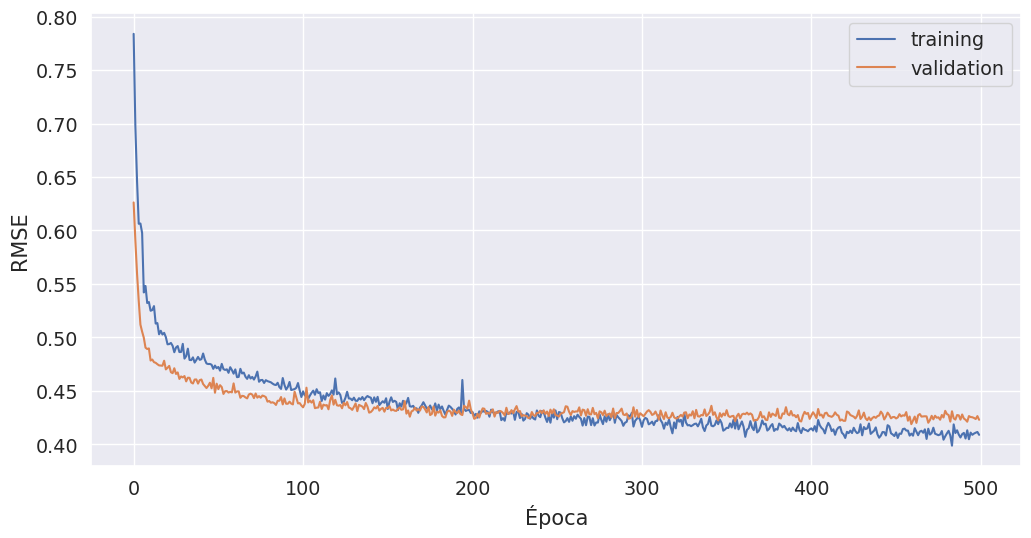

In [61]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Ahora probamos, por otro lado, el método de [regularización](https://keras.io/api/layers/regularizers/) tipo L2

In [62]:
from keras.regularizers import l2

In [63]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [64]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 14s - loss: 1.4086

1824/6000 [========>.....................] - ETA: 0s - loss: 1.4754 

3776/6000 [=================>............] - ETA: 0s - loss: 1.2821

5792/6000 [===========================>..] - ETA: 0s - loss: 1.1553

6000/6000 [==============================] - 0s 52us/step - loss: 1.1437 - val_loss: 0.8754


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6647

1824/6000 [========>.....................] - ETA: 0s - loss: 0.8730

3744/6000 [=================>............] - ETA: 0s - loss: 0.8602

5728/6000 [===========================>..] - ETA: 0s - loss: 0.8191

6000/6000 [==============================] - 0s 37us/step - loss: 0.8171 - val_loss: 0.7118


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5242

1632/6000 [=======>......................] - ETA: 0s - loss: 0.7069

3552/6000 [================>.............] - ETA: 0s - loss: 0.6906

5504/6000 [==========================>...] - ETA: 0s - loss: 0.6752

6000/6000 [==============================] - 0s 37us/step - loss: 0.6742 - val_loss: 0.6117


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7201

1952/6000 [========>.....................] - ETA: 0s - loss: 0.9718

3872/6000 [==================>...........] - ETA: 0s - loss: 0.8242

5824/6000 [============================>.] - ETA: 0s - loss: 0.7393

6000/6000 [==============================] - 0s 35us/step - loss: 0.7337 - val_loss: 0.5524


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5880

2080/6000 [=========>....................] - ETA: 0s - loss: 0.5750

4096/6000 [===================>..........] - ETA: 0s - loss: 0.5530

6000/6000 [==============================] - 0s 34us/step - loss: 0.5466 - val_loss: 0.5111


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4355

2016/6000 [=========>....................] - ETA: 0s - loss: 0.5757

3872/6000 [==================>...........] - ETA: 0s - loss: 0.5415

5760/6000 [===========================>..] - ETA: 0s - loss: 0.5321

6000/6000 [==============================] - 0s 35us/step - loss: 0.5298 - val_loss: 0.4839


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5166

2048/6000 [=========>....................] - ETA: 0s - loss: 0.4912

4096/6000 [===================>..........] - ETA: 0s - loss: 0.4925

6000/6000 [==============================] - 0s 34us/step - loss: 0.4813 - val_loss: 0.4585


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3782

2048/6000 [=========>....................] - ETA: 0s - loss: 0.4629

4000/6000 [===================>..........] - ETA: 0s - loss: 0.4537

5952/6000 [============================>.] - ETA: 0s - loss: 0.4574

6000/6000 [==============================] - 0s 35us/step - loss: 0.4578 - val_loss: 0.4435


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3185

2016/6000 [=========>....................] - ETA: 0s - loss: 0.4543

4000/6000 [===================>..........] - ETA: 0s - loss: 0.4440

6000/6000 [==============================] - 0s 34us/step - loss: 0.4573 - val_loss: 0.4486


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5018

1984/6000 [========>.....................] - ETA: 0s - loss: 0.5126

4000/6000 [===================>..........] - ETA: 0s - loss: 0.5473

5952/6000 [============================>.] - ETA: 0s - loss: 0.5054

6000/6000 [==============================] - 0s 35us/step - loss: 0.5038 - val_loss: 0.4132


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4155

2016/6000 [=========>....................] - ETA: 0s - loss: 0.4074

3968/6000 [==================>...........] - ETA: 0s - loss: 0.4022

5984/6000 [============================>.] - ETA: 0s - loss: 0.4064

6000/6000 [==============================] - 0s 35us/step - loss: 0.4070 - val_loss: 0.3941


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3185

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3828

4032/6000 [===================>..........] - ETA: 0s - loss: 0.4007

6000/6000 [==============================] - 0s 34us/step - loss: 0.3980 - val_loss: 0.3783


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3744

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3698

4064/6000 [===================>..........] - ETA: 0s - loss: 0.3735

6000/6000 [==============================] - 0s 35us/step - loss: 0.3834 - val_loss: 0.3705


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5353

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3912

4064/6000 [===================>..........] - ETA: 0s - loss: 0.3862

6000/6000 [==============================] - 0s 34us/step - loss: 0.3848 - val_loss: 0.3648


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3995

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3731

4032/6000 [===================>..........] - ETA: 0s - loss: 0.3682

6000/6000 [==============================] - 0s 36us/step - loss: 0.3628 - val_loss: 0.3585


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2674

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3440

4000/6000 [===================>..........] - ETA: 0s - loss: 0.3528

5984/6000 [============================>.] - ETA: 0s - loss: 0.3543

6000/6000 [==============================] - 0s 35us/step - loss: 0.3544 - val_loss: 0.3480


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2584

1952/6000 [========>.....................] - ETA: 0s - loss: 0.3586

3904/6000 [==================>...........] - ETA: 0s - loss: 0.3494

5888/6000 [============================>.] - ETA: 0s - loss: 0.3489

6000/6000 [==============================] - 0s 36us/step - loss: 0.3485 - val_loss: 0.3420


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1779

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3436

3968/6000 [==================>...........] - ETA: 0s - loss: 0.3425

5920/6000 [============================>.] - ETA: 0s - loss: 0.3401

6000/6000 [==============================] - 0s 36us/step - loss: 0.3405 - val_loss: 0.3475


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3477

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3507

4032/6000 [===================>..........] - ETA: 0s - loss: 0.3390

6000/6000 [==============================] - 0s 34us/step - loss: 0.3381 - val_loss: 0.3392


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3099

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3479

4064/6000 [===================>..........] - ETA: 0s - loss: 0.3490

6000/6000 [==============================] - 0s 34us/step - loss: 0.3452 - val_loss: 0.3361


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3756

1728/6000 [=======>......................] - ETA: 0s - loss: 0.3140

3744/6000 [=================>............] - ETA: 0s - loss: 0.3234

5696/6000 [===========================>..] - ETA: 0s - loss: 0.3244

6000/6000 [==============================] - 0s 36us/step - loss: 0.3258 - val_loss: 0.3208


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5617

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3257

3968/6000 [==================>...........] - ETA: 0s - loss: 0.3174

5888/6000 [============================>.] - ETA: 0s - loss: 0.3248

6000/6000 [==============================] - 0s 36us/step - loss: 0.3237 - val_loss: 0.3257


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3429

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3358

4000/6000 [===================>..........] - ETA: 0s - loss: 0.3233

6000/6000 [==============================] - 0s 35us/step - loss: 0.3182 - val_loss: 0.3138


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4053

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2977

4032/6000 [===================>..........] - ETA: 0s - loss: 0.3098

6000/6000 [==============================] - 0s 35us/step - loss: 0.3135 - val_loss: 0.3105


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2928

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2864

4000/6000 [===================>..........] - ETA: 0s - loss: 0.3056

5952/6000 [============================>.] - ETA: 0s - loss: 0.3136

6000/6000 [==============================] - 0s 35us/step - loss: 0.3129 - val_loss: 0.3132


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3602

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2912

3968/6000 [==================>...........] - ETA: 0s - loss: 0.3057

6000/6000 [==============================] - 0s 35us/step - loss: 0.3077 - val_loss: 0.3105


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5290

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3181

4160/6000 [===================>..........] - ETA: 0s - loss: 0.3144

6000/6000 [==============================] - 0s 34us/step - loss: 0.3103 - val_loss: 0.3110


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4009

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2936

4064/6000 [===================>..........] - ETA: 0s - loss: 0.3134

5984/6000 [============================>.] - ETA: 0s - loss: 0.3035

6000/6000 [==============================] - 0s 37us/step - loss: 0.3038 - val_loss: 0.2963


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1750

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2915

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2933

6000/6000 [==============================] - 0s 35us/step - loss: 0.3004 - val_loss: 0.3107


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2366

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2993

4000/6000 [===================>..........] - ETA: 0s - loss: 0.3013

5632/6000 [===========================>..] - ETA: 0s - loss: 0.3008

6000/6000 [==============================] - 0s 38us/step - loss: 0.3079 - val_loss: 0.3016


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2782

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3202

4064/6000 [===================>..........] - ETA: 0s - loss: 0.3155

6000/6000 [==============================] - 0s 34us/step - loss: 0.3099 - val_loss: 0.2960


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2303

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2843

4160/6000 [===================>..........] - ETA: 0s - loss: 0.3027

6000/6000 [==============================] - 0s 34us/step - loss: 0.3000 - val_loss: 0.2972


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2891

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2982

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2895

6000/6000 [==============================] - 0s 34us/step - loss: 0.2948 - val_loss: 0.3045


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4207

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2844

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2854

6000/6000 [==============================] - 0s 34us/step - loss: 0.2920 - val_loss: 0.2884


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2320

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3251

3840/6000 [==================>...........] - ETA: 0s - loss: 0.3033

5888/6000 [============================>.] - ETA: 0s - loss: 0.2927

6000/6000 [==============================] - 0s 35us/step - loss: 0.2923 - val_loss: 0.2863


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4269

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2840

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2939

6000/6000 [==============================] - 0s 34us/step - loss: 0.2916 - val_loss: 0.2865


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2098

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2962

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2888

6000/6000 [==============================] - 0s 34us/step - loss: 0.2885 - val_loss: 0.2927


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1809

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2617

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2793

5888/6000 [============================>.] - ETA: 0s - loss: 0.2849

6000/6000 [==============================] - 0s 36us/step - loss: 0.2845 - val_loss: 0.2877


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

1952/6000 [========>.....................] - ETA: 0s - loss: 0.3004

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2876

5824/6000 [============================>.] - ETA: 0s - loss: 0.2853

6000/6000 [==============================] - 0s 35us/step - loss: 0.2870 - val_loss: 0.2844


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3029

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2958

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2912

6000/6000 [==============================] - 0s 34us/step - loss: 0.2863 - val_loss: 0.2847


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1868

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2889

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2785

6000/6000 [==============================] - 0s 34us/step - loss: 0.2827 - val_loss: 0.2803


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3111

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2889

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2817

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2827

6000/6000 [==============================] - 0s 37us/step - loss: 0.2834 - val_loss: 0.2886


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2001

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2735

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2804

5920/6000 [============================>.] - ETA: 0s - loss: 0.2858

6000/6000 [==============================] - 0s 35us/step - loss: 0.2855 - val_loss: 0.2855


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2263

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2905

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2852

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2841

6000/6000 [==============================] - 0s 36us/step - loss: 0.2844 - val_loss: 0.2783


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6146

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2974

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2978

6000/6000 [==============================] - 0s 34us/step - loss: 0.2842 - val_loss: 0.2768


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3080

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2859

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2861

6000/6000 [==============================] - 0s 34us/step - loss: 0.2777 - val_loss: 0.2758


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1760

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2847

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2815

5984/6000 [============================>.] - ETA: 0s - loss: 0.2781

6000/6000 [==============================] - 0s 35us/step - loss: 0.2778 - val_loss: 0.2847


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4454

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2665

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2752

6000/6000 [==============================] - 0s 34us/step - loss: 0.2783 - val_loss: 0.2792


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2896

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2802

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2807

5920/6000 [============================>.] - ETA: 0s - loss: 0.2779

6000/6000 [==============================] - 0s 35us/step - loss: 0.2781 - val_loss: 0.2803


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2198

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2782

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2814

6000/6000 [==============================] - 0s 34us/step - loss: 0.2770 - val_loss: 0.2713


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4583

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2673

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2737

6000/6000 [==============================] - 0s 34us/step - loss: 0.2743 - val_loss: 0.2787


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3460

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2693

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2721

6000/6000 [==============================] - 0s 33us/step - loss: 0.2733 - val_loss: 0.2703


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6434

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2866

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2802

6000/6000 [==============================] - 0s 35us/step - loss: 0.2737 - val_loss: 0.2706


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3274

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2808

3712/6000 [=================>............] - ETA: 0s - loss: 0.2851

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2779

6000/6000 [==============================] - 0s 38us/step - loss: 0.2760 - val_loss: 0.2711


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2191

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2798

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2682

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2732

6000/6000 [==============================] - 0s 39us/step - loss: 0.2738 - val_loss: 0.2686


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2665

3520/6000 [================>.............] - ETA: 0s - loss: 0.2662

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2752

6000/6000 [==============================] - 0s 38us/step - loss: 0.2714 - val_loss: 0.2689


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7865

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2981

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2747

5888/6000 [============================>.] - ETA: 0s - loss: 0.2744

6000/6000 [==============================] - 0s 35us/step - loss: 0.2744 - val_loss: 0.2719


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2008

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2647

3712/6000 [=================>............] - ETA: 0s - loss: 0.2739

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2668

6000/6000 [==============================] - 0s 37us/step - loss: 0.2694 - val_loss: 0.2683


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2224

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2768

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2645

5952/6000 [============================>.] - ETA: 0s - loss: 0.2692

6000/6000 [==============================] - 0s 35us/step - loss: 0.2703 - val_loss: 0.2668


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2739

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2821

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2737

6000/6000 [==============================] - 0s 41us/step - loss: 0.2709 - val_loss: 0.2657


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2452

3776/6000 [=================>............] - ETA: 0s - loss: 0.2588

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2606

6000/6000 [==============================] - 0s 39us/step - loss: 0.2687 - val_loss: 0.2717


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6314

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2738

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2699

5888/6000 [============================>.] - ETA: 0s - loss: 0.2713

6000/6000 [==============================] - 0s 36us/step - loss: 0.2710 - val_loss: 0.2772


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2905

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2932

3552/6000 [================>.............] - ETA: 0s - loss: 0.2817

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2715

6000/6000 [==============================] - 0s 37us/step - loss: 0.2688 - val_loss: 0.2678


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1874

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2553

3616/6000 [=================>............] - ETA: 0s - loss: 0.2509

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2679

6000/6000 [==============================] - 0s 39us/step - loss: 0.2714 - val_loss: 0.2636


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2997

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2789

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2689

5824/6000 [============================>.] - ETA: 0s - loss: 0.2668

6000/6000 [==============================] - 0s 38us/step - loss: 0.2669 - val_loss: 0.2648


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2974

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2762

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2628

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2650

6000/6000 [==============================] - 0s 38us/step - loss: 0.2658 - val_loss: 0.2658


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2590

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2656

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2663

6000/6000 [==============================] - 0s 38us/step - loss: 0.2670 - val_loss: 0.2839


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1592

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2733

3648/6000 [=================>............] - ETA: 0s - loss: 0.2654

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2662

6000/6000 [==============================] - 0s 39us/step - loss: 0.2660 - val_loss: 0.2694


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1753

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2529

3456/6000 [================>.............] - ETA: 0s - loss: 0.2500

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2620

6000/6000 [==============================] - 0s 37us/step - loss: 0.2632 - val_loss: 0.2610


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1440

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2590

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2634

6000/6000 [==============================] - 0s 34us/step - loss: 0.2639 - val_loss: 0.2631


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2105

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2541

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2668

6000/6000 [==============================] - 0s 34us/step - loss: 0.2677 - val_loss: 0.2642


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2551

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2670

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2650

6000/6000 [==============================] - 0s 34us/step - loss: 0.2639 - val_loss: 0.2632


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3228

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2563

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2618

6000/6000 [==============================] - 0s 33us/step - loss: 0.2619 - val_loss: 0.2646


Epoch 74/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1812

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2603

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2627

6000/6000 [==============================] - 0s 34us/step - loss: 0.2637 - val_loss: 0.2701


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2741

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2608

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2595

6000/6000 [==============================] - 0s 34us/step - loss: 0.2625 - val_loss: 0.2638


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1907

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2576

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2516

6000/6000 [==============================] - 0s 33us/step - loss: 0.2613 - val_loss: 0.2605


Epoch 77/500


  32/6000 [..............................] - ETA: 0s - loss: 0.6382

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2499

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2571

6000/6000 [==============================] - 0s 33us/step - loss: 0.2608 - val_loss: 0.2586


Epoch 78/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1322

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2520

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2526

6000/6000 [==============================] - 0s 33us/step - loss: 0.2628 - val_loss: 0.2672


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4487

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2760

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2627

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2601

6000/6000 [==============================] - 0s 41us/step - loss: 0.2616 - val_loss: 0.2589


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1525

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2560

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2582

6000/6000 [==============================] - 0s 34us/step - loss: 0.2589 - val_loss: 0.2608


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3198

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2536

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2555

6000/6000 [==============================] - 0s 34us/step - loss: 0.2628 - val_loss: 0.2718


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2280

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2465

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2570

6000/6000 [==============================] - 0s 35us/step - loss: 0.2576 - val_loss: 0.2570


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2946

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2600

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2599

5856/6000 [============================>.] - ETA: 0s - loss: 0.2603

6000/6000 [==============================] - 0s 36us/step - loss: 0.2609 - val_loss: 0.2663


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1539

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2611

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2676

5920/6000 [============================>.] - ETA: 0s - loss: 0.2583

6000/6000 [==============================] - 0s 35us/step - loss: 0.2585 - val_loss: 0.2566


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2197

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2734

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2650

6000/6000 [==============================] - 0s 34us/step - loss: 0.2590 - val_loss: 0.2577


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2065

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2380

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2424

6000/6000 [==============================] - 0s 34us/step - loss: 0.2551 - val_loss: 0.2560


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2224

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2673

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2567

6000/6000 [==============================] - 0s 35us/step - loss: 0.2568 - val_loss: 0.2625


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3834

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2577

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2611

6000/6000 [==============================] - 0s 34us/step - loss: 0.2575 - val_loss: 0.2576


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2606

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2555

6000/6000 [==============================] - 0s 34us/step - loss: 0.2546 - val_loss: 0.2653


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2312

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2661

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2552

6000/6000 [==============================] - 0s 34us/step - loss: 0.2567 - val_loss: 0.2590


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4655

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2544

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2617

6000/6000 [==============================] - 0s 35us/step - loss: 0.2562 - val_loss: 0.2624


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5044

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2598

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2676

6000/6000 [==============================] - 0s 34us/step - loss: 0.2574 - val_loss: 0.2569


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3024

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2575

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2511

6000/6000 [==============================] - 0s 35us/step - loss: 0.2552 - val_loss: 0.2537


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2145

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2689

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2668

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2590

6000/6000 [==============================] - 0s 36us/step - loss: 0.2576 - val_loss: 0.2528


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2139

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2555

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2602

6000/6000 [==============================] - 0s 34us/step - loss: 0.2551 - val_loss: 0.2629


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2872

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2417

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2620

5952/6000 [============================>.] - ETA: 0s - loss: 0.2560

6000/6000 [==============================] - 0s 36us/step - loss: 0.2564 - val_loss: 0.2586


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2032

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2464

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2505

6000/6000 [==============================] - 0s 34us/step - loss: 0.2524 - val_loss: 0.2523


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1314

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2646

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2573

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2526

6000/6000 [==============================] - 0s 37us/step - loss: 0.2547 - val_loss: 0.2576


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3542

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2540

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2555

5888/6000 [============================>.] - ETA: 0s - loss: 0.2566

6000/6000 [==============================] - 0s 36us/step - loss: 0.2551 - val_loss: 0.2540


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1026

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2527

3776/6000 [=================>............] - ETA: 0s - loss: 0.2551

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2565

6000/6000 [==============================] - 0s 37us/step - loss: 0.2553 - val_loss: 0.2511


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2582

3584/6000 [================>.............] - ETA: 0s - loss: 0.2554

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2544

6000/6000 [==============================] - 0s 43us/step - loss: 0.2534 - val_loss: 0.2508


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2169

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2702

3744/6000 [=================>............] - ETA: 0s - loss: 0.2564

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2512

6000/6000 [==============================] - 0s 37us/step - loss: 0.2524 - val_loss: 0.2582


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2398

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2622

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2541

5888/6000 [============================>.] - ETA: 0s - loss: 0.2511

6000/6000 [==============================] - 0s 36us/step - loss: 0.2504 - val_loss: 0.2604


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2253

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2613

3712/6000 [=================>............] - ETA: 0s - loss: 0.2648

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2616

6000/6000 [==============================] - 0s 37us/step - loss: 0.2635 - val_loss: 0.2513


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2357

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2492

3456/6000 [================>.............] - ETA: 0s - loss: 0.2560

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2542

6000/6000 [==============================] - 0s 39us/step - loss: 0.2530 - val_loss: 0.2504


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4421

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2658

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2544

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2460

6000/6000 [==============================] - 0s 40us/step - loss: 0.2501 - val_loss: 0.2534


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1984

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2673

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2649

5984/6000 [============================>.] - ETA: 0s - loss: 0.2547

6000/6000 [==============================] - 0s 35us/step - loss: 0.2545 - val_loss: 0.2517


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1230

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2626

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2458

6000/6000 [==============================] - 0s 34us/step - loss: 0.2500 - val_loss: 0.2524


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3116

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2537

3680/6000 [=================>............] - ETA: 0s - loss: 0.2504

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2501

6000/6000 [==============================] - 0s 49us/step - loss: 0.2494 - val_loss: 0.2499


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2440

3424/6000 [================>.............] - ETA: 0s - loss: 0.2421

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2473

6000/6000 [==============================] - 0s 39us/step - loss: 0.2502 - val_loss: 0.2508


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3062

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2443

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2456

5952/6000 [============================>.] - ETA: 0s - loss: 0.2509

6000/6000 [==============================] - 0s 37us/step - loss: 0.2506 - val_loss: 0.2490


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2871

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2556

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2515

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2534

6000/6000 [==============================] - 0s 43us/step - loss: 0.2484 - val_loss: 0.2501


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1133

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2492

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2484

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2460

6000/6000 [==============================] - 0s 42us/step - loss: 0.2490 - val_loss: 0.2550


Epoch 114/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1354

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2624

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2522

6000/6000 [==============================] - 0s 36us/step - loss: 0.2497 - val_loss: 0.2561


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1361

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2595

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2481

6000/6000 [==============================] - 0s 36us/step - loss: 0.2503 - val_loss: 0.2476


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1974

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2433

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2467

6000/6000 [==============================] - 0s 35us/step - loss: 0.2480 - val_loss: 0.2501


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2880

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2612

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2474

6000/6000 [==============================] - 0s 35us/step - loss: 0.2487 - val_loss: 0.2445


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1785

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2476

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2514

5984/6000 [============================>.] - ETA: 0s - loss: 0.2484

6000/6000 [==============================] - 0s 37us/step - loss: 0.2481 - val_loss: 0.2570


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3052

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2504

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2430

6000/6000 [==============================] - 0s 35us/step - loss: 0.2457 - val_loss: 0.2507


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1353

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2618

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2478

6000/6000 [==============================] - 0s 35us/step - loss: 0.2467 - val_loss: 0.2444


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3487

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2337

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2508

6000/6000 [==============================] - 0s 35us/step - loss: 0.2469 - val_loss: 0.2638


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4457

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2545

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2486

6000/6000 [==============================] - 0s 35us/step - loss: 0.2530 - val_loss: 0.2615


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1461

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2352

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 35us/step - loss: 0.2462 - val_loss: 0.2437


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1611

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2566

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2544

6000/6000 [==============================] - 0s 36us/step - loss: 0.2488 - val_loss: 0.2540


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2073

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2455

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2458

6000/6000 [==============================] - 0s 36us/step - loss: 0.2482 - val_loss: 0.2540


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1945

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2373

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2473

6000/6000 [==============================] - 0s 36us/step - loss: 0.2449 - val_loss: 0.2511


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2426

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2452

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2442

6000/6000 [==============================] - 0s 44us/step - loss: 0.2444 - val_loss: 0.2428


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2587

3712/6000 [=================>............] - ETA: 0s - loss: 0.2410

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2453

6000/6000 [==============================] - 0s 39us/step - loss: 0.2472 - val_loss: 0.2539


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1498

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2866

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2593

5920/6000 [============================>.] - ETA: 0s - loss: 0.2519

6000/6000 [==============================] - 0s 37us/step - loss: 0.2534 - val_loss: 0.2416


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4913

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2306

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2365

6000/6000 [==============================] - 0s 36us/step - loss: 0.2451 - val_loss: 0.2477


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1375

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2492

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2464

6000/6000 [==============================] - 0s 36us/step - loss: 0.2451 - val_loss: 0.2459


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3662

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2395

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2497

6000/6000 [==============================] - 0s 35us/step - loss: 0.2471 - val_loss: 0.2466


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1605

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2370

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2480

6000/6000 [==============================] - 0s 36us/step - loss: 0.2451 - val_loss: 0.2471


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2357

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2344

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2427

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2449

6000/6000 [==============================] - 0s 38us/step - loss: 0.2438 - val_loss: 0.2438


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1921

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2496

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2464

5856/6000 [============================>.] - ETA: 0s - loss: 0.2439

6000/6000 [==============================] - 0s 38us/step - loss: 0.2441 - val_loss: 0.2545


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1931

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2570

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2544

5856/6000 [============================>.] - ETA: 0s - loss: 0.2466

6000/6000 [==============================] - 0s 38us/step - loss: 0.2466 - val_loss: 0.2415


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2003

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2385

3456/6000 [================>.............] - ETA: 0s - loss: 0.2333

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2386

6000/6000 [==============================] - 0s 39us/step - loss: 0.2416 - val_loss: 0.2420


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2612

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2535

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2474

5824/6000 [============================>.] - ETA: 0s - loss: 0.2429

6000/6000 [==============================] - 0s 38us/step - loss: 0.2426 - val_loss: 0.2619


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2498

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2384

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2296

5824/6000 [============================>.] - ETA: 0s - loss: 0.2405

6000/6000 [==============================] - 0s 37us/step - loss: 0.2413 - val_loss: 0.2417


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2230

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2144

3648/6000 [=================>............] - ETA: 0s - loss: 0.2350

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2401

6000/6000 [==============================] - 0s 39us/step - loss: 0.2399 - val_loss: 0.2493


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4958

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2338

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2410

6000/6000 [==============================] - 0s 36us/step - loss: 0.2415 - val_loss: 0.2394


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2171

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2454

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2399

6000/6000 [==============================] - 0s 36us/step - loss: 0.2411 - val_loss: 0.2408


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2902

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2502

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2465

6000/6000 [==============================] - 0s 35us/step - loss: 0.2433 - val_loss: 0.2571


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1877

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2455

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2467

6000/6000 [==============================] - 0s 35us/step - loss: 0.2424 - val_loss: 0.2486


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3016

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2378

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2405

6000/6000 [==============================] - 0s 36us/step - loss: 0.2418 - val_loss: 0.2449


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2281

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2434

6000/6000 [==============================] - 0s 36us/step - loss: 0.2459 - val_loss: 0.2429


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2470

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2533

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2456

6000/6000 [==============================] - 0s 36us/step - loss: 0.2392 - val_loss: 0.2482


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2505

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 36us/step - loss: 0.2414 - val_loss: 0.2541


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2514

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2303

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2349

6000/6000 [==============================] - 0s 36us/step - loss: 0.2414 - val_loss: 0.2418


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1893

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2289

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2371

6000/6000 [==============================] - 0s 35us/step - loss: 0.2383 - val_loss: 0.2378


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1911

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2416

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 36us/step - loss: 0.2374 - val_loss: 0.2398


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1890

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2369

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 36us/step - loss: 0.2386 - val_loss: 0.2486


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1554

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2290

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2488

6000/6000 [==============================] - 0s 35us/step - loss: 0.2418 - val_loss: 0.2477


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1933

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2287

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 36us/step - loss: 0.2404 - val_loss: 0.2450


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2376

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2325

6000/6000 [==============================] - 0s 36us/step - loss: 0.2402 - val_loss: 0.2436


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3853

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2496

3488/6000 [================>.............] - ETA: 0s - loss: 0.2453

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2452

6000/6000 [==============================] - 0s 40us/step - loss: 0.2413 - val_loss: 0.2475


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2181

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2315

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2363

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2378

6000/6000 [==============================] - 0s 39us/step - loss: 0.2402 - val_loss: 0.2434


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2457

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2522

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2467

6000/6000 [==============================] - 0s 36us/step - loss: 0.2377 - val_loss: 0.2366


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1975

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2322

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 35us/step - loss: 0.2384 - val_loss: 0.2381


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2179

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2374

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2393

6000/6000 [==============================] - 0s 35us/step - loss: 0.2403 - val_loss: 0.2406


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2346

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2308

6000/6000 [==============================] - 0s 36us/step - loss: 0.2383 - val_loss: 0.2499


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2409

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2375

6000/6000 [==============================] - 0s 36us/step - loss: 0.2373 - val_loss: 0.2384


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2344

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2398

6000/6000 [==============================] - 0s 36us/step - loss: 0.2350 - val_loss: 0.2446


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2242

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 36us/step - loss: 0.2388 - val_loss: 0.2448


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1896

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2326

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2385

6000/6000 [==============================] - 0s 36us/step - loss: 0.2400 - val_loss: 0.2393


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2309

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2430

6000/6000 [==============================] - 0s 35us/step - loss: 0.2392 - val_loss: 0.2530


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2817

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2318

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2286

5888/6000 [============================>.] - ETA: 0s - loss: 0.2404

6000/6000 [==============================] - 0s 37us/step - loss: 0.2393 - val_loss: 0.2357


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2347

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 36us/step - loss: 0.2353 - val_loss: 0.2362


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2450

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2404

5984/6000 [============================>.] - ETA: 0s - loss: 0.2379

6000/6000 [==============================] - 0s 37us/step - loss: 0.2378 - val_loss: 0.2451


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2259

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2283

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2338

5952/6000 [============================>.] - ETA: 0s - loss: 0.2395

6000/6000 [==============================] - 0s 38us/step - loss: 0.2392 - val_loss: 0.2433


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1506

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2253

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2381

5952/6000 [============================>.] - ETA: 0s - loss: 0.2397

6000/6000 [==============================] - 0s 36us/step - loss: 0.2395 - val_loss: 0.2400


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1732

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2515

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2422

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 38us/step - loss: 0.2385 - val_loss: 0.2548


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2547

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2264

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2330

5856/6000 [============================>.] - ETA: 0s - loss: 0.2368

6000/6000 [==============================] - 0s 36us/step - loss: 0.2364 - val_loss: 0.2468


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3245

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2382

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2334

6000/6000 [==============================] - 0s 36us/step - loss: 0.2361 - val_loss: 0.2355


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2608

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2430

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 35us/step - loss: 0.2360 - val_loss: 0.2410


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2259

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2195

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2276

5984/6000 [============================>.] - ETA: 0s - loss: 0.2370

6000/6000 [==============================] - 0s 36us/step - loss: 0.2372 - val_loss: 0.2453


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2474

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2431

6000/6000 [==============================] - 0s 36us/step - loss: 0.2367 - val_loss: 0.2324


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2319

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2396

6000/6000 [==============================] - 0s 35us/step - loss: 0.2341 - val_loss: 0.2559


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2335

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2266

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2317

6000/6000 [==============================] - 0s 35us/step - loss: 0.2342 - val_loss: 0.2368


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1509

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2342

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 35us/step - loss: 0.2347 - val_loss: 0.2509


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2032

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2569

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 35us/step - loss: 0.2359 - val_loss: 0.2402


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1537

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2414

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2380

6000/6000 [==============================] - 0s 35us/step - loss: 0.2440 - val_loss: 0.2495


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1332

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2289

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2386

6000/6000 [==============================] - 0s 35us/step - loss: 0.2392 - val_loss: 0.2376


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3504

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2313

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 36us/step - loss: 0.2323 - val_loss: 0.2454


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3242

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2406

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2362

5952/6000 [============================>.] - ETA: 0s - loss: 0.2315

6000/6000 [==============================] - 0s 37us/step - loss: 0.2343 - val_loss: 0.2401


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4603

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2271

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2344

6000/6000 [==============================] - 0s 35us/step - loss: 0.2321 - val_loss: 0.2322


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2034

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2345

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 36us/step - loss: 0.2335 - val_loss: 0.2526


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5095

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2269

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2272

6000/6000 [==============================] - 0s 36us/step - loss: 0.2339 - val_loss: 0.2342


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2211

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2381

6000/6000 [==============================] - 0s 37us/step - loss: 0.2338 - val_loss: 0.2359


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1334

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2334

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2353

6000/6000 [==============================] - 0s 36us/step - loss: 0.2317 - val_loss: 0.2431


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1810

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2195

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 36us/step - loss: 0.2319 - val_loss: 0.2574


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2480

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2309

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 35us/step - loss: 0.2342 - val_loss: 0.2424


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2101

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2184

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 35us/step - loss: 0.2388 - val_loss: 0.2343


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1771

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2315

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 35us/step - loss: 0.2346 - val_loss: 0.2356


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2363

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 35us/step - loss: 0.2363 - val_loss: 0.2309


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2556

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2209

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2383

6000/6000 [==============================] - 0s 35us/step - loss: 0.2345 - val_loss: 0.2543


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5711

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2414

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 35us/step - loss: 0.2357 - val_loss: 0.2330


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2254

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2230

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 34us/step - loss: 0.2304 - val_loss: 0.2390


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1589

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2231

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 35us/step - loss: 0.2319 - val_loss: 0.2436


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2241

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 36us/step - loss: 0.2308 - val_loss: 0.2324


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5149

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2305

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2318

5920/6000 [============================>.] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 37us/step - loss: 0.2305 - val_loss: 0.2325


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1658

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2338

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 35us/step - loss: 0.2317 - val_loss: 0.2299


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1998

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2269

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 35us/step - loss: 0.2310 - val_loss: 0.2501


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2212

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2308

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 35us/step - loss: 0.2335 - val_loss: 0.2298


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2298

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 35us/step - loss: 0.2304 - val_loss: 0.2407


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4898

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2435

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 36us/step - loss: 0.2365 - val_loss: 0.2648


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2495

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2434

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2391

6000/6000 [==============================] - 0s 35us/step - loss: 0.2345 - val_loss: 0.2342


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1362

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2276

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2321

6000/6000 [==============================] - 0s 35us/step - loss: 0.2302 - val_loss: 0.2472


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1156

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2064

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 36us/step - loss: 0.2299 - val_loss: 0.2404


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4274

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2323

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 36us/step - loss: 0.2302 - val_loss: 0.2392


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1982

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2308

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2379

6000/6000 [==============================] - 0s 36us/step - loss: 0.2339 - val_loss: 0.2279


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2449

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 36us/step - loss: 0.2328 - val_loss: 0.2323


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1786

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2366

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2334

6000/6000 [==============================] - 0s 35us/step - loss: 0.2322 - val_loss: 0.2499


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2612

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2423

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 36us/step - loss: 0.2331 - val_loss: 0.2297


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3368

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2318

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 36us/step - loss: 0.2300 - val_loss: 0.2336


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3471

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2397

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 36us/step - loss: 0.2280 - val_loss: 0.2303


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1487

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2286

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2262

5984/6000 [============================>.] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 37us/step - loss: 0.2294 - val_loss: 0.2370


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3703

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2338

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 36us/step - loss: 0.2335 - val_loss: 0.2426


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4242

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2361

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2337

6000/6000 [==============================] - 0s 36us/step - loss: 0.2301 - val_loss: 0.2292


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1650

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2276

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 36us/step - loss: 0.2277 - val_loss: 0.2279


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2418

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2312

6000/6000 [==============================] - 0s 36us/step - loss: 0.2291 - val_loss: 0.2376


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2529

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2433

5856/6000 [============================>.] - ETA: 0s - loss: 0.2394

6000/6000 [==============================] - 0s 37us/step - loss: 0.2395 - val_loss: 0.2434


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3340

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2296

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2326

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 39us/step - loss: 0.2312 - val_loss: 0.2283


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2737

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2263

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 35us/step - loss: 0.2283 - val_loss: 0.2470


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1482

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2162

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 36us/step - loss: 0.2282 - val_loss: 0.2297


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3052

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2301

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 36us/step - loss: 0.2250 - val_loss: 0.2312


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3626

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2204

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 35us/step - loss: 0.2338 - val_loss: 0.2269


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4922

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2144

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 35us/step - loss: 0.2295 - val_loss: 0.2305


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2316

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 36us/step - loss: 0.2280 - val_loss: 0.2404


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2284

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2346

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2226

5984/6000 [============================>.] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 37us/step - loss: 0.2270 - val_loss: 0.2323


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2160

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 36us/step - loss: 0.2291 - val_loss: 0.2271


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2004

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2020

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2288

6000/6000 [==============================] - 0s 36us/step - loss: 0.2263 - val_loss: 0.2263


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2115

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2137

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 35us/step - loss: 0.2295 - val_loss: 0.2265


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4220

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2246

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 36us/step - loss: 0.2283 - val_loss: 0.2342


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1839

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2458

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 36us/step - loss: 0.2306 - val_loss: 0.2259


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2028

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 36us/step - loss: 0.2278 - val_loss: 0.2290


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1920

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2361

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2354

5984/6000 [============================>.] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 36us/step - loss: 0.2238 - val_loss: 0.2341


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1999

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2154

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 36us/step - loss: 0.2280 - val_loss: 0.2416


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1602

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2196

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 36us/step - loss: 0.2298 - val_loss: 0.2417


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6363

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2262

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2340

6000/6000 [==============================] - 0s 36us/step - loss: 0.2273 - val_loss: 0.2570


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2263

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 35us/step - loss: 0.2268 - val_loss: 0.2368


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3173

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2241

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 36us/step - loss: 0.2286 - val_loss: 0.2423


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1360

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2260

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 36us/step - loss: 0.2248 - val_loss: 0.2313


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2130

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2317

6000/6000 [==============================] - 0s 36us/step - loss: 0.2270 - val_loss: 0.2321


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3575

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2125

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 36us/step - loss: 0.2283 - val_loss: 0.2305


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2108

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2232

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 36us/step - loss: 0.2269 - val_loss: 0.2312


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2130

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2257

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 36us/step - loss: 0.2243 - val_loss: 0.2349


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2156

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 35us/step - loss: 0.2266 - val_loss: 0.2293


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3196

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2085

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 36us/step - loss: 0.2226 - val_loss: 0.2315


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2162

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 36us/step - loss: 0.2265 - val_loss: 0.2404


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3343

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2115

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 35us/step - loss: 0.2266 - val_loss: 0.2307


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2620

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2218

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 35us/step - loss: 0.2232 - val_loss: 0.2253


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2252

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2268

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 35us/step - loss: 0.2240 - val_loss: 0.2245


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2005

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2393

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 36us/step - loss: 0.2243 - val_loss: 0.2290


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2682

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2121

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 36us/step - loss: 0.2251 - val_loss: 0.2267


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2441

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 35us/step - loss: 0.2224 - val_loss: 0.2241


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0988

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2277

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2218

5920/6000 [============================>.] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 37us/step - loss: 0.2226 - val_loss: 0.2335


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1554

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2321

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 35us/step - loss: 0.2246 - val_loss: 0.2277


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2286

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2156

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 35us/step - loss: 0.2245 - val_loss: 0.2311


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1683

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2243

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2152

6000/6000 [==============================] - 0s 36us/step - loss: 0.2234 - val_loss: 0.2385


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1876

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2214

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 35us/step - loss: 0.2255 - val_loss: 0.2279


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1754

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2244

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 35us/step - loss: 0.2279 - val_loss: 0.2298


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1276

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2211

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 36us/step - loss: 0.2239 - val_loss: 0.2316


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2112

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 35us/step - loss: 0.2230 - val_loss: 0.2324


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3758

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2333

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 35us/step - loss: 0.2271 - val_loss: 0.2299


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2075

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2221

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 36us/step - loss: 0.2243 - val_loss: 0.2307


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1857

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2393

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 36us/step - loss: 0.2218 - val_loss: 0.2347


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2562

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2252

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 36us/step - loss: 0.2224 - val_loss: 0.2212


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3872

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2294

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 35us/step - loss: 0.2242 - val_loss: 0.2230


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2224

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2154

6000/6000 [==============================] - 0s 35us/step - loss: 0.2191 - val_loss: 0.2204


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1740

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2180

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 36us/step - loss: 0.2245 - val_loss: 0.2366


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2189

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2097

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 35us/step - loss: 0.2212 - val_loss: 0.2256


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1972

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2048

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 36us/step - loss: 0.2224 - val_loss: 0.2228


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3431

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2224

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 35us/step - loss: 0.2228 - val_loss: 0.2195


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3610

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2262

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 35us/step - loss: 0.2214 - val_loss: 0.2274


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2530

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2318

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 35us/step - loss: 0.2263 - val_loss: 0.2340


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1749

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2287

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 36us/step - loss: 0.2245 - val_loss: 0.2230


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2734

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2252

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 35us/step - loss: 0.2282 - val_loss: 0.2256


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1706

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2392

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 35us/step - loss: 0.2218 - val_loss: 0.2260


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2312

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 36us/step - loss: 0.2242 - val_loss: 0.2197


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1832

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2184

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 35us/step - loss: 0.2261 - val_loss: 0.2214


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3485

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2292

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 35us/step - loss: 0.2234 - val_loss: 0.2225


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1484

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2146

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 35us/step - loss: 0.2261 - val_loss: 0.2348


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2178

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2469

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 35us/step - loss: 0.2291 - val_loss: 0.2636


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2594

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2124

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 36us/step - loss: 0.2244 - val_loss: 0.2220


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1496

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2277

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 36us/step - loss: 0.2247 - val_loss: 0.2442


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2078

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2132

6000/6000 [==============================] - 0s 36us/step - loss: 0.2217 - val_loss: 0.2291


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1639

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2212

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 35us/step - loss: 0.2229 - val_loss: 0.2214


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1640

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2251

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2158

5920/6000 [============================>.] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 37us/step - loss: 0.2206 - val_loss: 0.2264


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1767

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2159

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2121

5984/6000 [============================>.] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 37us/step - loss: 0.2212 - val_loss: 0.2201


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1490

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2372

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2253

5984/6000 [============================>.] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 37us/step - loss: 0.2217 - val_loss: 0.2336


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1662

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2273

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 36us/step - loss: 0.2232 - val_loss: 0.2334


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1058

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2116

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 36us/step - loss: 0.2242 - val_loss: 0.2258


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1665

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2306

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 36us/step - loss: 0.2187 - val_loss: 0.2228


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3615

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2214

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 36us/step - loss: 0.2173 - val_loss: 0.2327


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1917

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2239

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 36us/step - loss: 0.2221 - val_loss: 0.2214


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2102

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 36us/step - loss: 0.2221 - val_loss: 0.2268


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1992

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2163

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 36us/step - loss: 0.2233 - val_loss: 0.2249


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2616

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2314

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 36us/step - loss: 0.2194 - val_loss: 0.2205


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3635

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2254

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 36us/step - loss: 0.2249 - val_loss: 0.2251


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2302

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2216

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 36us/step - loss: 0.2204 - val_loss: 0.2241


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3986

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2307

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 36us/step - loss: 0.2200 - val_loss: 0.2285


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1698

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2262

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 36us/step - loss: 0.2260 - val_loss: 0.2193


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2018

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2170

6000/6000 [==============================] - 0s 35us/step - loss: 0.2203 - val_loss: 0.2411


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3176

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2117

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 36us/step - loss: 0.2224 - val_loss: 0.2319


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2037

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2221

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 36us/step - loss: 0.2223 - val_loss: 0.2203


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1759

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2325

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 36us/step - loss: 0.2252 - val_loss: 0.2242


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1796

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2223

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 36us/step - loss: 0.2210 - val_loss: 0.2249


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1226

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2166

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2161

6000/6000 [==============================] - 0s 36us/step - loss: 0.2216 - val_loss: 0.2274


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2362

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2234

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 36us/step - loss: 0.2194 - val_loss: 0.2246


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1596

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2176

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2153

5952/6000 [============================>.] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 37us/step - loss: 0.2225 - val_loss: 0.2204


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2225

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2205

5856/6000 [============================>.] - ETA: 0s - loss: 0.2159

6000/6000 [==============================] - 0s 37us/step - loss: 0.2170 - val_loss: 0.2227


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1553

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2176

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2150

5888/6000 [============================>.] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 37us/step - loss: 0.2168 - val_loss: 0.2322


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2316

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2144

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2174

5856/6000 [============================>.] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 38us/step - loss: 0.2208 - val_loss: 0.2198


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2276

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2238

5952/6000 [============================>.] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 37us/step - loss: 0.2251 - val_loss: 0.2237


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1575

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2233

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 35us/step - loss: 0.2176 - val_loss: 0.2200


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2304

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 35us/step - loss: 0.2173 - val_loss: 0.2192


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1918

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2135

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2150

6000/6000 [==============================] - 0s 35us/step - loss: 0.2211 - val_loss: 0.2263


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2186

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2322

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 36us/step - loss: 0.2188 - val_loss: 0.2223


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2078

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2132

5888/6000 [============================>.] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 37us/step - loss: 0.2212 - val_loss: 0.2152


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1262

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2168

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2194

5888/6000 [============================>.] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 37us/step - loss: 0.2227 - val_loss: 0.2241


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2097

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2216

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 35us/step - loss: 0.2215 - val_loss: 0.2320


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1845

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2225

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 36us/step - loss: 0.2192 - val_loss: 0.2173


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1289

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2140

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2074

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 39us/step - loss: 0.2168 - val_loss: 0.2187


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1203

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2404

3712/6000 [=================>............] - ETA: 0s - loss: 0.2304

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 39us/step - loss: 0.2204 - val_loss: 0.2314


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1974

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2121

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2203

5824/6000 [============================>.] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 39us/step - loss: 0.2213 - val_loss: 0.2243


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1373

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1924

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2107

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2124

6000/6000 [==============================] - 0s 38us/step - loss: 0.2171 - val_loss: 0.2408


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3196

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2253

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 36us/step - loss: 0.2213 - val_loss: 0.2157


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2432

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2234

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 36us/step - loss: 0.2237 - val_loss: 0.2168


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2230

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2125

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 36us/step - loss: 0.2189 - val_loss: 0.2293


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2204

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2239

5856/6000 [============================>.] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 37us/step - loss: 0.2253 - val_loss: 0.2210


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2477

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2022

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 36us/step - loss: 0.2195 - val_loss: 0.2328


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2090

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 36us/step - loss: 0.2186 - val_loss: 0.2218


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1956

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2287

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 36us/step - loss: 0.2184 - val_loss: 0.2190


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2473

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2351

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2230

5984/6000 [============================>.] - ETA: 0s - loss: 0.2190

6000/6000 [==============================] - 0s 37us/step - loss: 0.2193 - val_loss: 0.2164


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2518

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2148

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 36us/step - loss: 0.2203 - val_loss: 0.2293


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2724

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2068

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2128

6000/6000 [==============================] - 0s 36us/step - loss: 0.2220 - val_loss: 0.2270


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2063

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 36us/step - loss: 0.2180 - val_loss: 0.2203


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1141

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2061

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 36us/step - loss: 0.2175 - val_loss: 0.2234


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2538

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2121

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2165

5920/6000 [============================>.] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 39us/step - loss: 0.2209 - val_loss: 0.2188


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2011

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2118

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2254

5824/6000 [============================>.] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 37us/step - loss: 0.2193 - val_loss: 0.2235


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2420

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2087

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2127

5952/6000 [============================>.] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 37us/step - loss: 0.2247 - val_loss: 0.2209


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1823

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2516

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2269

5984/6000 [============================>.] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 37us/step - loss: 0.2266 - val_loss: 0.2269


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6918

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2271

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2304

5984/6000 [============================>.] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 36us/step - loss: 0.2223 - val_loss: 0.2321


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1620

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2118

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 36us/step - loss: 0.2211 - val_loss: 0.2292


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2097

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2160

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2161

6000/6000 [==============================] - 0s 36us/step - loss: 0.2204 - val_loss: 0.2242


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1943

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2150

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 36us/step - loss: 0.2153 - val_loss: 0.2213


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1457

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2178

3744/6000 [=================>............] - ETA: 0s - loss: 0.2269

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 40us/step - loss: 0.2181 - val_loss: 0.2234


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1663

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2120

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2134

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 38us/step - loss: 0.2176 - val_loss: 0.2303


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4147

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2171

3680/6000 [=================>............] - ETA: 0s - loss: 0.2203

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 41us/step - loss: 0.2200 - val_loss: 0.2245


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2143

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2177

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2227

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 39us/step - loss: 0.2172 - val_loss: 0.2145


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1056

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2126

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2129

5888/6000 [============================>.] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 38us/step - loss: 0.2226 - val_loss: 0.2232


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2105

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2107

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2188

5856/6000 [============================>.] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 38us/step - loss: 0.2204 - val_loss: 0.2222


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3439

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2058

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2196

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 40us/step - loss: 0.2185 - val_loss: 0.2320


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0970

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2459

3680/6000 [=================>............] - ETA: 0s - loss: 0.2294

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 42us/step - loss: 0.2204 - val_loss: 0.2192


Epoch 356/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1911

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2394

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2261

5920/6000 [============================>.] - ETA: 0s - loss: 0.2536

6000/6000 [==============================] - 0s 37us/step - loss: 0.2534 - val_loss: 0.2250


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4281

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2149

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 35us/step - loss: 0.2233 - val_loss: 0.2185


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1307

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2080

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2232

5888/6000 [============================>.] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 38us/step - loss: 0.2240 - val_loss: 0.2250


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1331

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2166

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2146

6000/6000 [==============================] - 0s 36us/step - loss: 0.2180 - val_loss: 0.2439


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2050

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2280

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2237

5920/6000 [============================>.] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 37us/step - loss: 0.2198 - val_loss: 0.2366


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4221

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2280

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2198

5952/6000 [============================>.] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 37us/step - loss: 0.2202 - val_loss: 0.2276


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2457

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2044

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2120

6000/6000 [==============================] - 0s 36us/step - loss: 0.2198 - val_loss: 0.2441


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2446

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2151

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2139

6000/6000 [==============================] - 0s 36us/step - loss: 0.2170 - val_loss: 0.2235


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2284

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2137

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 36us/step - loss: 0.2185 - val_loss: 0.2302


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2833

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2151

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 36us/step - loss: 0.2225 - val_loss: 0.2271


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3347

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2263

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2099

6000/6000 [==============================] - 0s 37us/step - loss: 0.2204 - val_loss: 0.2247


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3572

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2303

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2194

5888/6000 [============================>.] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 38us/step - loss: 0.2172 - val_loss: 0.2280


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1237

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2276

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 36us/step - loss: 0.2207 - val_loss: 0.2266


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2273

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 36us/step - loss: 0.2191 - val_loss: 0.2224


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1763

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1909

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2064

6000/6000 [==============================] - 0s 36us/step - loss: 0.2160 - val_loss: 0.2216


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1990

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2097

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 35us/step - loss: 0.2197 - val_loss: 0.2234


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2208

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2143

6000/6000 [==============================] - 0s 36us/step - loss: 0.2191 - val_loss: 0.2226


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1600

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2261

3552/6000 [================>.............] - ETA: 0s - loss: 0.2236

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2154

6000/6000 [==============================] - 0s 39us/step - loss: 0.2179 - val_loss: 0.2439


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3282

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2308

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2246

5824/6000 [============================>.] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 38us/step - loss: 0.2218 - val_loss: 0.2198


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3399

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2064

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2086

5984/6000 [============================>.] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 37us/step - loss: 0.2156 - val_loss: 0.2204


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5012

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2272

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 36us/step - loss: 0.2202 - val_loss: 0.2199


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1807

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2135

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2177

5920/6000 [============================>.] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 37us/step - loss: 0.2193 - val_loss: 0.2248


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2176

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2098

5920/6000 [============================>.] - ETA: 0s - loss: 0.2159

6000/6000 [==============================] - 0s 37us/step - loss: 0.2168 - val_loss: 0.2181


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2444

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2241

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2190

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2121

6000/6000 [==============================] - 0s 40us/step - loss: 0.2147 - val_loss: 0.2231


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2701

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2093

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2084

5952/6000 [============================>.] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 38us/step - loss: 0.2175 - val_loss: 0.2393


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2138

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2050

3680/6000 [=================>............] - ETA: 0s - loss: 0.2093

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2150

6000/6000 [==============================] - 0s 38us/step - loss: 0.2185 - val_loss: 0.2191


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2163

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2317

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 36us/step - loss: 0.2174 - val_loss: 0.2207


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1893

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2242

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 36us/step - loss: 0.2171 - val_loss: 0.2205


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2233

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 35us/step - loss: 0.2161 - val_loss: 0.2210


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2170

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2230

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 36us/step - loss: 0.2196 - val_loss: 0.2151


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1541

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2287

3744/6000 [=================>............] - ETA: 0s - loss: 0.2181

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 39us/step - loss: 0.2189 - val_loss: 0.2154


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5414

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2252

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2142

5888/6000 [============================>.] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 37us/step - loss: 0.2168 - val_loss: 0.2339


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1413

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2030

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2042

6000/6000 [==============================] - 0s 36us/step - loss: 0.2151 - val_loss: 0.2338


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2052

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2309

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 35us/step - loss: 0.2175 - val_loss: 0.2350


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1947

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2213

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 35us/step - loss: 0.2219 - val_loss: 0.2348


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2244

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 36us/step - loss: 0.2179 - val_loss: 0.2219


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1811

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2173

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2178

6000/6000 [==============================] - 0s 35us/step - loss: 0.2216 - val_loss: 0.2415


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1953

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2231

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 36us/step - loss: 0.2159 - val_loss: 0.2227


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2486

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2121

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 38us/step - loss: 0.2178 - val_loss: 0.2236


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2128

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2050

3744/6000 [=================>............] - ETA: 0s - loss: 0.2167

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 39us/step - loss: 0.2175 - val_loss: 0.2259


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1752

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2113

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2165

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 41us/step - loss: 0.2165 - val_loss: 0.2195


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2242

3744/6000 [=================>............] - ETA: 0s - loss: 0.2227

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 39us/step - loss: 0.2186 - val_loss: 0.2265


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1851

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2080

3584/6000 [================>.............] - ETA: 0s - loss: 0.2072

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 40us/step - loss: 0.2174 - val_loss: 0.2263


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2012

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2169

5888/6000 [============================>.] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 38us/step - loss: 0.2165 - val_loss: 0.2296


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1432

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1987

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2138

5920/6000 [============================>.] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 37us/step - loss: 0.2164 - val_loss: 0.2188


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2994

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2229

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 35us/step - loss: 0.2171 - val_loss: 0.2250


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2316

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2061

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 35us/step - loss: 0.2151 - val_loss: 0.2199


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5073

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2175

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 35us/step - loss: 0.2207 - val_loss: 0.2415


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2552

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2293

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 35us/step - loss: 0.2210 - val_loss: 0.2398


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2844

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2097

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2062

6000/6000 [==============================] - 0s 35us/step - loss: 0.2166 - val_loss: 0.2222


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2418

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2187

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 35us/step - loss: 0.2143 - val_loss: 0.2221


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2148

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2201

5920/6000 [============================>.] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 36us/step - loss: 0.2211 - val_loss: 0.2167


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3564

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2099

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2139

6000/6000 [==============================] - 0s 36us/step - loss: 0.2143 - val_loss: 0.2250


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3311

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2227

3488/6000 [================>.............] - ETA: 0s - loss: 0.2184

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2142

6000/6000 [==============================] - 0s 39us/step - loss: 0.2156 - val_loss: 0.2228


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1793

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2143

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2168

6000/6000 [==============================] - 0s 36us/step - loss: 0.2175 - val_loss: 0.2276


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2052

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2235

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 36us/step - loss: 0.2171 - val_loss: 0.2248


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1453

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2107

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2090

6000/6000 [==============================] - 0s 35us/step - loss: 0.2197 - val_loss: 0.2234


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2661

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2108

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2078

6000/6000 [==============================] - 0s 35us/step - loss: 0.2145 - val_loss: 0.2198


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1952

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2090

6000/6000 [==============================] - 0s 35us/step - loss: 0.2140 - val_loss: 0.2282


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2113

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 35us/step - loss: 0.2167 - val_loss: 0.2225


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1653

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2138

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2112

6000/6000 [==============================] - 0s 35us/step - loss: 0.2143 - val_loss: 0.2335


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3085

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2240

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 35us/step - loss: 0.2157 - val_loss: 0.2197


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3774

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2244

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2138

6000/6000 [==============================] - 0s 35us/step - loss: 0.2156 - val_loss: 0.2195


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1541

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2097

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2109

6000/6000 [==============================] - 0s 35us/step - loss: 0.2127 - val_loss: 0.2173


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1797

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2007

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2082

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2152

6000/6000 [==============================] - 0s 39us/step - loss: 0.2166 - val_loss: 0.2216


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1975

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2146

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2164

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 40us/step - loss: 0.2196 - val_loss: 0.2210


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3336

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2249

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 36us/step - loss: 0.2211 - val_loss: 0.2227


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2504

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2034

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2140

6000/6000 [==============================] - 0s 35us/step - loss: 0.2189 - val_loss: 0.2289


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2096

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2175

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2105

6000/6000 [==============================] - 0s 35us/step - loss: 0.2141 - val_loss: 0.2138


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2166

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 35us/step - loss: 0.2174 - val_loss: 0.2192


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2254

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 35us/step - loss: 0.2172 - val_loss: 0.2324


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1452

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2156

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 35us/step - loss: 0.2166 - val_loss: 0.2187


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2401

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2219

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2146

6000/6000 [==============================] - 0s 35us/step - loss: 0.2135 - val_loss: 0.2242


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1771

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2102

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2071

6000/6000 [==============================] - 0s 36us/step - loss: 0.2154 - val_loss: 0.2233


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2025

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2024

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2064

6000/6000 [==============================] - 0s 35us/step - loss: 0.2146 - val_loss: 0.2358


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2001

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2045

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 35us/step - loss: 0.2147 - val_loss: 0.2248


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2495

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2197

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2107

6000/6000 [==============================] - 0s 35us/step - loss: 0.2160 - val_loss: 0.2351


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1926

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2188

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 35us/step - loss: 0.2173 - val_loss: 0.2251


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2249

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2166

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2144

6000/6000 [==============================] - 0s 35us/step - loss: 0.2156 - val_loss: 0.2183


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1153

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1973

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2083

6000/6000 [==============================] - 0s 35us/step - loss: 0.2149 - val_loss: 0.2211


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0987

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2067

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2123

6000/6000 [==============================] - 0s 35us/step - loss: 0.2151 - val_loss: 0.2152


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2786

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1987

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2078

6000/6000 [==============================] - 0s 35us/step - loss: 0.2179 - val_loss: 0.2206


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1431

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2197

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2131

6000/6000 [==============================] - 0s 36us/step - loss: 0.2145 - val_loss: 0.2390


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2074

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 35us/step - loss: 0.2183 - val_loss: 0.2246


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2157

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2175

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 36us/step - loss: 0.2294 - val_loss: 0.2188


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1187

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2090

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2101

6000/6000 [==============================] - 0s 36us/step - loss: 0.2194 - val_loss: 0.2315


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2961

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2119

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2154

6000/6000 [==============================] - 0s 35us/step - loss: 0.2203 - val_loss: 0.2187


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1638

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2164

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2161

5920/6000 [============================>.] - ETA: 0s - loss: 0.2131

6000/6000 [==============================] - 0s 37us/step - loss: 0.2139 - val_loss: 0.2152


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2093

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1925

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 35us/step - loss: 0.2136 - val_loss: 0.2167


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2460

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2025

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 35us/step - loss: 0.2123 - val_loss: 0.2162


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1295

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2241

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 35us/step - loss: 0.2152 - val_loss: 0.2292


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2065

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 35us/step - loss: 0.2141 - val_loss: 0.2331


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1694

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2192

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 35us/step - loss: 0.2147 - val_loss: 0.2156


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1362

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2214

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2095

6000/6000 [==============================] - 0s 36us/step - loss: 0.2125 - val_loss: 0.2221


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1007

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2176

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2119

6000/6000 [==============================] - 0s 36us/step - loss: 0.2138 - val_loss: 0.2214


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2180

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2106

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2123

6000/6000 [==============================] - 0s 35us/step - loss: 0.2111 - val_loss: 0.2352


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1820

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2158

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 35us/step - loss: 0.2152 - val_loss: 0.2222


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1801

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2223

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 35us/step - loss: 0.2167 - val_loss: 0.2273


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2229

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2125

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 35us/step - loss: 0.2132 - val_loss: 0.2177


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3321

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2172

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 35us/step - loss: 0.2159 - val_loss: 0.2214


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2783

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2265

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2155

6000/6000 [==============================] - 0s 35us/step - loss: 0.2134 - val_loss: 0.2165


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2727

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2096

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2110

6000/6000 [==============================] - 0s 36us/step - loss: 0.2117 - val_loss: 0.2225


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2708

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2304

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 35us/step - loss: 0.2109 - val_loss: 0.2255


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1886

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2204

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 35us/step - loss: 0.2161 - val_loss: 0.2208


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3025

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2273

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2151

5984/6000 [============================>.] - ETA: 0s - loss: 0.2153

6000/6000 [==============================] - 0s 37us/step - loss: 0.2150 - val_loss: 0.2270


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1292

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2149

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2089

5920/6000 [============================>.] - ETA: 0s - loss: 0.2153

6000/6000 [==============================] - 0s 37us/step - loss: 0.2159 - val_loss: 0.2270


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3067

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2187

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2155

5984/6000 [============================>.] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 39us/step - loss: 0.2159 - val_loss: 0.2219


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2504

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2249

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 35us/step - loss: 0.2152 - val_loss: 0.2167


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2039

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1827

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2103

6000/6000 [==============================] - 0s 35us/step - loss: 0.2168 - val_loss: 0.2297


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2452

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2146

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 35us/step - loss: 0.2157 - val_loss: 0.2147


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1187

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2115

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2112

5984/6000 [============================>.] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 36us/step - loss: 0.2160 - val_loss: 0.2155


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1633

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2140

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 35us/step - loss: 0.2135 - val_loss: 0.2195


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1088

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2170

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 35us/step - loss: 0.2135 - val_loss: 0.2454


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1238

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1964

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2036

6000/6000 [==============================] - 0s 34us/step - loss: 0.2149 - val_loss: 0.2181


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2489

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2299

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 35us/step - loss: 0.2185 - val_loss: 0.2181


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1887

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2079

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2091

6000/6000 [==============================] - 0s 35us/step - loss: 0.2140 - val_loss: 0.2400


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2034

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2018

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2131

6000/6000 [==============================] - 0s 36us/step - loss: 0.2145 - val_loss: 0.2309


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1469

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2146

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2101

6000/6000 [==============================] - 0s 35us/step - loss: 0.2134 - val_loss: 0.2203


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2106

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2088

3488/6000 [================>.............] - ETA: 0s - loss: 0.2140

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 43us/step - loss: 0.2147 - val_loss: 0.2200


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2270

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2182

6000/6000 [==============================] - 0s 35us/step - loss: 0.2175 - val_loss: 0.2142


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1498

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2135

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2117

6000/6000 [==============================] - 0s 35us/step - loss: 0.2156 - val_loss: 0.2141


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1839

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2128

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 35us/step - loss: 0.2155 - val_loss: 0.2165


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1224

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2165

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2150

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2128

6000/6000 [==============================] - 0s 39us/step - loss: 0.2136 - val_loss: 0.2209


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2871

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1991

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2137

6000/6000 [==============================] - 0s 35us/step - loss: 0.2135 - val_loss: 0.2166


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2686

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2344

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2230

6000/6000 [==============================] - 0s 36us/step - loss: 0.2137 - val_loss: 0.2175


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3213

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1994

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2141

6000/6000 [==============================] - 0s 35us/step - loss: 0.2121 - val_loss: 0.2353


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2697

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2081

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 35us/step - loss: 0.2154 - val_loss: 0.2111


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3017

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2151

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2096

6000/6000 [==============================] - 0s 35us/step - loss: 0.2118 - val_loss: 0.2159


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2516

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2209

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2132

6000/6000 [==============================] - 0s 36us/step - loss: 0.2149 - val_loss: 0.2144


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3006

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2091

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2047

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 39us/step - loss: 0.2117 - val_loss: 0.2173


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1878

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2225

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2157

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2145

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2152

6000/6000 [==============================] - 0s 49us/step - loss: 0.2137 - val_loss: 0.2206


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1798

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2172

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2073

6000/6000 [==============================] - 0s 36us/step - loss: 0.2108 - val_loss: 0.2271


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1859

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2110

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 36us/step - loss: 0.2233 - val_loss: 0.2164


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2301

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 36us/step - loss: 0.2214 - val_loss: 0.2434


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2495

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2256

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 36us/step - loss: 0.2164 - val_loss: 0.2236


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1614

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2120

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 35us/step - loss: 0.2152 - val_loss: 0.2239


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2780

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2071

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2089

6000/6000 [==============================] - 0s 35us/step - loss: 0.2167 - val_loss: 0.2191


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1951

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2150

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2106

6000/6000 [==============================] - 0s 36us/step - loss: 0.2151 - val_loss: 0.2161


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1841

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2067

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 36us/step - loss: 0.2154 - val_loss: 0.2166


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1557

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2195

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 35us/step - loss: 0.2146 - val_loss: 0.2192


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1412

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2273

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 36us/step - loss: 0.2143 - val_loss: 0.2122


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1583

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1954

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2110

6000/6000 [==============================] - 0s 35us/step - loss: 0.2147 - val_loss: 0.2148


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2463

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2023

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2126

6000/6000 [==============================] - 0s 36us/step - loss: 0.2140 - val_loss: 0.2206


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1979

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2075

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 36us/step - loss: 0.2145 - val_loss: 0.2265


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2147

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2147

6000/6000 [==============================] - 0s 35us/step - loss: 0.2149 - val_loss: 0.2295


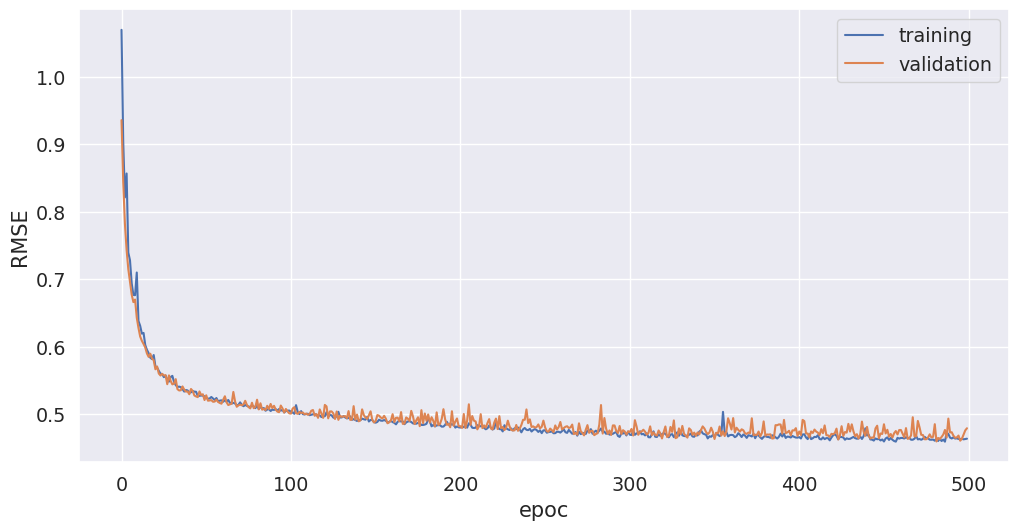

In [65]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("RMSE")
plt.xlabel("epoc")
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()

Vemos que el poder de generalización de esta red es mucho mejor que la anterior (los errores de validation y training no están tan separados y no perdí precisión o accuracy)

## Clasificación

Primero un ejemplo de clasificación binaria y después uno de clasificación con n clases

In [66]:
header = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
    "class",
]

In [67]:
header

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'class']

In [68]:
data = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1T9VNcGMatXFrg7JpIkwHpqHrb8dGKvtP",
    names=header,
    index_col=False,
)
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis class  
0          98.67                       -0.25    AB  
1         114.41                        4.56    AB  
2         105.99                       -3.53    AB  
3         101.87                       11.21    AB  
4         108.17                        7.92    AB

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'pelvic incidence'}>,
        <AxesSubplot:title={'center':'pelvic tilt'}>],
       [<AxesSubplot:title={'center':'lumbar lordosis angle'}>,
        <AxesSubplot:title={'center':'sacral slope'}>],
       [<AxesSubplot:title={'center':'pelvic radius'}>,
        <AxesSubplot:title={'center':'grade of spondylolisthesis'}>]],
      dtype=object)

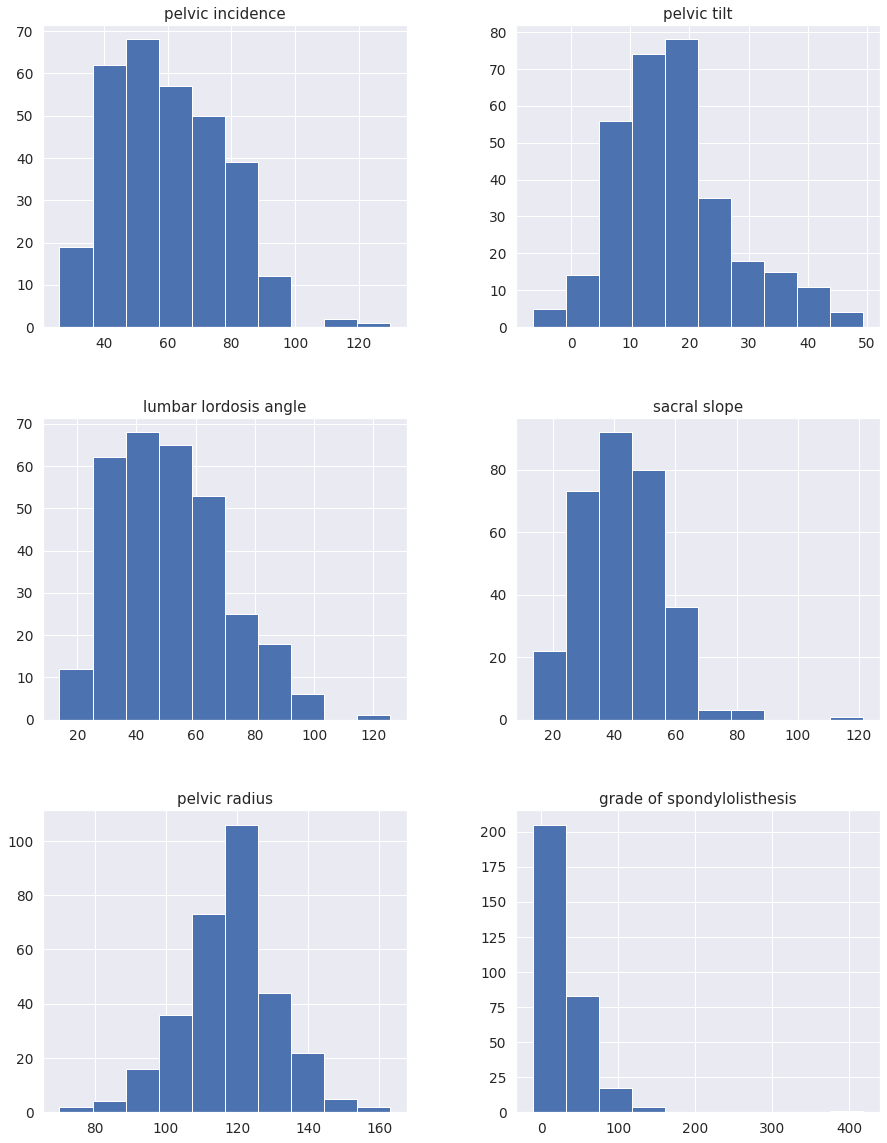

In [69]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()

data.hist(ax=ax)

Los datasets no están tan mal distribuídos así que elijo no normalizarlos

Paso los valores de "AB" y "NO" a valores categóricos

In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
target = np.unique(data["class"])

In [72]:
label_encoder.fit(target)

LabelEncoder()

In [73]:
data["class"] = label_encoder.transform(data["class"])

In [74]:
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  class  
0          98.67                       -0.25      0  
1         114.41                        4.56      0  
2         105.99                       -3.53      0  
3         101.87                       11.21      0  
4         108.17                        7.92      0

In [75]:
x_columns = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
]
x_data = data[x_columns]
y_data = data['class']

In [76]:
x_data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  
0          98.67                       -0.25  
1         114.41                        4.56  
2         105.99                       -3.53  
3         101.87                       11.21  
4         108.17                        7.92

Separo los datos en train y validation

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.4, random_state=66
)

Entreno un modelo sencillo de clasificación, un árbol de decisión para tener una referencia de error.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_tree = DecisionTreeClassifier(criterion="entropy")

In [80]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Calculo el accuracy de mi árbol entrenado:

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
pred = model_tree.predict(X_validation)

In [83]:
decision_tree_acc = accuracy_score(pred, y_validation)
decision_tree_acc

0.7741935483870968

Mi red tiene que tener como cantidad de neuronas en la capa de salida la cantidad de clases si uso softmax o 1 neurona para el caso que use una activación de tipo sigmoide

In [84]:
num_classes = 2

In [85]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


El modelo necesita los labels en one hot encoding, uso la función to_categorical para transformarlos

In [87]:
y_train[1:10]

235    1
66     0
143    0
256    1
18     0
279    1
273    1
120    0
154    0
Name: class, dtype: int64

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_validation, num_classes)

In [89]:
y_train[1:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Ahora si puedo entrenar!

In [90]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6839 - accuracy: 0.6562

186/186 [==============================] - 0s 444us/step - loss: 0.6974 - accuracy: 0.6559 - val_loss: 0.7234 - val_accuracy: 0.6290


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5930 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6848 - accuracy: 0.6613 - val_loss: 0.7137 - val_accuracy: 0.6290


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7690 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 0.6762 - accuracy: 0.6559 - val_loss: 0.7060 - val_accuracy: 0.6290


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6728 - accuracy: 0.6562

186/186 [==============================] - 0s 125us/step - loss: 0.6669 - accuracy: 0.6667 - val_loss: 0.6992 - val_accuracy: 0.6290


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6849 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.6582 - accuracy: 0.6720 - val_loss: 0.6939 - val_accuracy: 0.6290


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5763 - accuracy: 0.7500

186/186 [==============================] - 0s 41us/step - loss: 0.6493 - accuracy: 0.6828 - val_loss: 0.6890 - val_accuracy: 0.6290


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4677 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.6450 - accuracy: 0.6828 - val_loss: 0.6853 - val_accuracy: 0.6290


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6542 - accuracy: 0.6562

186/186 [==============================] - 0s 42us/step - loss: 0.6434 - accuracy: 0.6828 - val_loss: 0.6804 - val_accuracy: 0.6290


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7250 - accuracy: 0.5938

186/186 [==============================] - 0s 43us/step - loss: 0.6405 - accuracy: 0.6828 - val_loss: 0.6775 - val_accuracy: 0.6290


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5600 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6376 - accuracy: 0.6828 - val_loss: 0.6762 - val_accuracy: 0.6290


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6552 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6360 - accuracy: 0.6828 - val_loss: 0.6753 - val_accuracy: 0.6290


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5660 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6348 - accuracy: 0.6828 - val_loss: 0.6729 - val_accuracy: 0.6290


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5379 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6326 - accuracy: 0.6828 - val_loss: 0.6707 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7083 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.6306 - accuracy: 0.6882 - val_loss: 0.6687 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6784 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.6294 - accuracy: 0.6882 - val_loss: 0.6677 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5527 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.6283 - accuracy: 0.6882 - val_loss: 0.6679 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7190 - accuracy: 0.5938

186/186 [==============================] - 0s 43us/step - loss: 0.6231 - accuracy: 0.6882 - val_loss: 0.6670 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6165 - accuracy: 0.6989 - val_loss: 0.6669 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6577 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.6157 - accuracy: 0.6989 - val_loss: 0.6671 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6501 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.6147 - accuracy: 0.6989 - val_loss: 0.6665 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5944 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6145 - accuracy: 0.6989 - val_loss: 0.6665 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6967 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.6144 - accuracy: 0.6989 - val_loss: 0.6663 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6495 - accuracy: 0.6562

186/186 [==============================] - 0s 42us/step - loss: 0.6143 - accuracy: 0.6989 - val_loss: 0.6664 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5017 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6145 - accuracy: 0.6989 - val_loss: 0.6666 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6221 - accuracy: 0.6875

186/186 [==============================] - 0s 42us/step - loss: 0.6144 - accuracy: 0.6989 - val_loss: 0.6658 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8284 - accuracy: 0.4688

186/186 [==============================] - 0s 43us/step - loss: 0.6147 - accuracy: 0.6989 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5490 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6145 - accuracy: 0.6989 - val_loss: 0.6662 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5671 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.6142 - accuracy: 0.6989 - val_loss: 0.6661 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6493 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.6142 - accuracy: 0.6989 - val_loss: 0.6657 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5482 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6143 - accuracy: 0.6989 - val_loss: 0.6660 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6097 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.6142 - accuracy: 0.6989 - val_loss: 0.6662 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6768 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6142 - accuracy: 0.6989 - val_loss: 0.6659 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.6145 - accuracy: 0.6989 - val_loss: 0.6665 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5843 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6146 - accuracy: 0.6989 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6026 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6141 - accuracy: 0.6989 - val_loss: 0.6652 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6486 - accuracy: 0.6562



186/186 [==============================] - 0s 43us/step - loss: 0.6141 - accuracy: 0.6989 - val_loss: 0.6653 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5196 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.6144 - accuracy: 0.6989 - val_loss: 0.6661 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4850 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6143 - accuracy: 0.6989 - val_loss: 0.6662 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.6141 - accuracy: 0.6989 - val_loss: 0.6655 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5675 - accuracy: 0.7500

186/186 [==============================] - 0s 42us/step - loss: 0.6142 - accuracy: 0.6989 - val_loss: 0.6655 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7181 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.6142 - accuracy: 0.6989 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.7188



186/186 [==============================] - 0s 43us/step - loss: 0.6141 - accuracy: 0.6989 - val_loss: 0.6647 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5196 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6142 - accuracy: 0.6989 - val_loss: 0.6654 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6385 - accuracy: 0.6562

186/186 [==============================] - 0s 70us/step - loss: 0.6142 - accuracy: 0.6989 - val_loss: 0.6648 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5412 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6142 - accuracy: 0.6989 - val_loss: 0.6654 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4920 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.6140 - accuracy: 0.6989 - val_loss: 0.6653 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6024 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6140 - accuracy: 0.6989 - val_loss: 0.6652 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.6140 - accuracy: 0.6989 - val_loss: 0.6654 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7049 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.6141 - accuracy: 0.6989 - val_loss: 0.6651 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6217 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6140 - accuracy: 0.6989 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5735 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.6140 - accuracy: 0.6989 - val_loss: 0.6656 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5946 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.6140 - accuracy: 0.6989 - val_loss: 0.6655 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6760 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 0.6139 - accuracy: 0.6989 - val_loss: 0.6654 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4762 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.6140 - accuracy: 0.6989 - val_loss: 0.6656 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5207 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6140 - accuracy: 0.6989 - val_loss: 0.6663 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6550 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.6140 - accuracy: 0.6989 - val_loss: 0.6657 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6218 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.6139 - accuracy: 0.6989 - val_loss: 0.6660 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6493 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6143 - accuracy: 0.6989 - val_loss: 0.6654 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6488 - accuracy: 0.6562



186/186 [==============================] - 0s 48us/step - loss: 0.6139 - accuracy: 0.6989 - val_loss: 0.6658 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5571 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.6139 - accuracy: 0.6989 - val_loss: 0.6659 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6219 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6657 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6218 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6657 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6084 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.6139 - accuracy: 0.6989 - val_loss: 0.6662 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6494 - accuracy: 0.6562



186/186 [==============================] - 0s 44us/step - loss: 0.6139 - accuracy: 0.6989 - val_loss: 0.6660 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6901 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6656 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6490 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6655 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8172 - accuracy: 0.4688

186/186 [==============================] - 0s 49us/step - loss: 0.6144 - accuracy: 0.6989 - val_loss: 0.6645 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6482 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6649 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5679 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7311 - accuracy: 0.5625

186/186 [==============================] - 0s 45us/step - loss: 0.6139 - accuracy: 0.6989 - val_loss: 0.6648 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6484 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6652 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6217 - accuracy: 0.6875

186/186 [==============================] - 0s 42us/step - loss: 0.6137 - accuracy: 0.6989 - val_loss: 0.6651 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5732 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.6137 - accuracy: 0.6989 - val_loss: 0.6654 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6488 - accuracy: 0.6562

186/186 [==============================] - 0s 42us/step - loss: 0.6137 - accuracy: 0.6989 - val_loss: 0.6657 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5674 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6659 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6273 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6137 - accuracy: 0.6989 - val_loss: 0.6655 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6489 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.6137 - accuracy: 0.6989 - val_loss: 0.6657 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6675 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.6139 - accuracy: 0.6989 - val_loss: 0.6665 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5945 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.6136 - accuracy: 0.6989 - val_loss: 0.6660 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6894 - accuracy: 0.6250

186/186 [==============================] - 0s 42us/step - loss: 0.6137 - accuracy: 0.6989 - val_loss: 0.6660 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5799 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6665 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5687 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6136 - accuracy: 0.6989 - val_loss: 0.6660 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7440 - accuracy: 0.5625



186/186 [==============================] - 0s 44us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7710 - accuracy: 0.5312

186/186 [==============================] - 0s 42us/step - loss: 0.6138 - accuracy: 0.6989 - val_loss: 0.6644 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7062 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.6136 - accuracy: 0.6989 - val_loss: 0.6648 - val_accuracy: 0.6371


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6937 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.6136 - accuracy: 0.6989 - val_loss: 0.6647 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6803 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6135 - accuracy: 0.6989 - val_loss: 0.6648 - val_accuracy: 0.6371


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5844 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.6135 - accuracy: 0.6989 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7689 - accuracy: 0.5312

186/186 [==============================] - 0s 43us/step - loss: 0.6136 - accuracy: 0.6989 - val_loss: 0.6655 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6270 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6139 - accuracy: 0.6989 - val_loss: 0.6664 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5963 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6135 - accuracy: 0.6989 - val_loss: 0.6662 - val_accuracy: 0.6371


Epoch 92/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5945 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6135 - accuracy: 0.6989 - val_loss: 0.6660 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7039 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.6136 - accuracy: 0.6989 - val_loss: 0.6651 - val_accuracy: 0.6371


Epoch 94/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6808 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6135 - accuracy: 0.6989 - val_loss: 0.6649 - val_accuracy: 0.6371


Epoch 95/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6134 - accuracy: 0.6989 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 96/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5193 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6135 - accuracy: 0.6989 - val_loss: 0.6654 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5946 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6136 - accuracy: 0.6989 - val_loss: 0.6662 - val_accuracy: 0.6371


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6063 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.6135 - accuracy: 0.6989 - val_loss: 0.6664 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6495 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.6134 - accuracy: 0.6989 - val_loss: 0.6660 - val_accuracy: 0.6371


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5945 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.6133 - accuracy: 0.6989 - val_loss: 0.6655 - val_accuracy: 0.6371


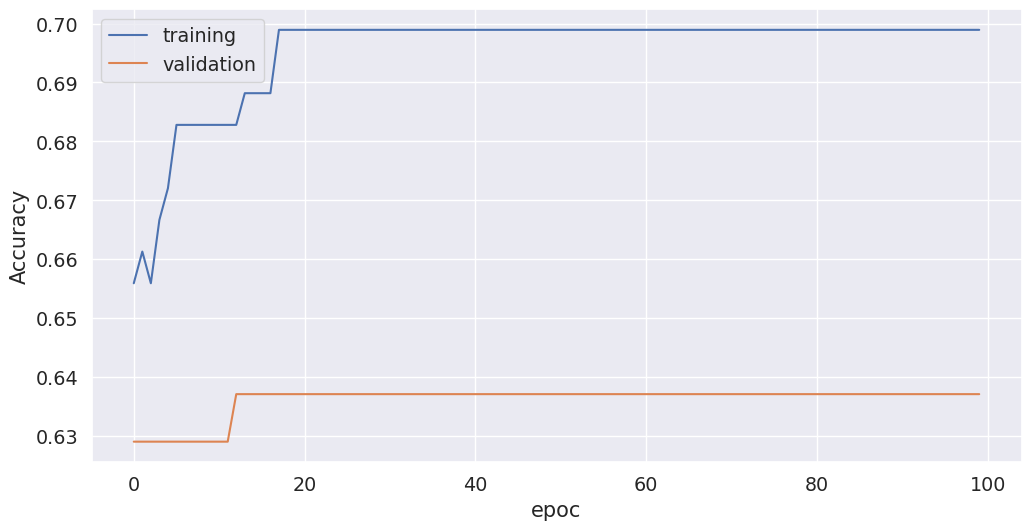

In [91]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

A medida que las red se va haciendo más profunda conviene usar relu. Agrego relu + regularizacion y cambio optimizador

In [92]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [93]:
model.compile(
    loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [94]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 15.7248 - accuracy: 0.3438

186/186 [==============================] - 0s 929us/step - loss: 15.2604 - accuracy: 0.3172 - val_loss: 10.7139 - val_accuracy: 0.3629


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 13.0169 - accuracy: 0.3125

186/186 [==============================] - 0s 52us/step - loss: 12.7490 - accuracy: 0.3172 - val_loss: 8.0835 - val_accuracy: 0.3629


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 11.3524 - accuracy: 0.3750

186/186 [==============================] - 0s 52us/step - loss: 8.9241 - accuracy: 0.3065 - val_loss: 6.3153 - val_accuracy: 0.3629


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.5727 - accuracy: 0.3125

186/186 [==============================] - 0s 50us/step - loss: 7.8584 - accuracy: 0.3548 - val_loss: 4.6739 - val_accuracy: 0.3629


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.1763 - accuracy: 0.3125

186/186 [==============================] - 0s 54us/step - loss: 6.1474 - accuracy: 0.3656 - val_loss: 3.4409 - val_accuracy: 0.3629


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.3513 - accuracy: 0.4375

186/186 [==============================] - 0s 52us/step - loss: 4.9994 - accuracy: 0.3925 - val_loss: 2.2785 - val_accuracy: 0.3629


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.1978 - accuracy: 0.3750

186/186 [==============================] - 0s 51us/step - loss: 3.1421 - accuracy: 0.4677 - val_loss: 1.2854 - val_accuracy: 0.4274


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.1562 - accuracy: 0.5312

186/186 [==============================] - 0s 48us/step - loss: 2.7915 - accuracy: 0.4355 - val_loss: 0.7976 - val_accuracy: 0.5645


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.8919 - accuracy: 0.3438

186/186 [==============================] - 0s 52us/step - loss: 2.6723 - accuracy: 0.4946 - val_loss: 0.6677 - val_accuracy: 0.6935


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.7826 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 2.5841 - accuracy: 0.5430 - val_loss: 0.6479 - val_accuracy: 0.7742


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3639 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 2.2644 - accuracy: 0.5860 - val_loss: 0.6527 - val_accuracy: 0.7339


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0039 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 1.5385 - accuracy: 0.6183 - val_loss: 0.6566 - val_accuracy: 0.6774


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2721 - accuracy: 0.4062

186/186 [==============================] - 0s 52us/step - loss: 1.8284 - accuracy: 0.5914 - val_loss: 0.6528 - val_accuracy: 0.6694


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0087 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 2.1516 - accuracy: 0.5538 - val_loss: 0.6565 - val_accuracy: 0.6774


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7841 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 1.3480 - accuracy: 0.6720 - val_loss: 0.6601 - val_accuracy: 0.6613


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4452 - accuracy: 0.5625

186/186 [==============================] - 0s 50us/step - loss: 1.5760 - accuracy: 0.5645 - val_loss: 0.6634 - val_accuracy: 0.6532


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3017 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 1.5573 - accuracy: 0.6237 - val_loss: 0.6660 - val_accuracy: 0.6452


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.1376 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 1.6562 - accuracy: 0.5484 - val_loss: 0.6677 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0331 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 1.2644 - accuracy: 0.6237 - val_loss: 0.6670 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8085 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 1.2920 - accuracy: 0.6290 - val_loss: 0.6662 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7953 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 1.1224 - accuracy: 0.6452 - val_loss: 0.6655 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2752 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 1.2014 - accuracy: 0.6022 - val_loss: 0.6648 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4279 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 1.0204 - accuracy: 0.6290 - val_loss: 0.6642 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3669 - accuracy: 0.6250



186/186 [==============================] - 0s 50us/step - loss: 1.0232 - accuracy: 0.6290 - val_loss: 0.6637 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6331 - accuracy: 0.4688

186/186 [==============================] - 0s 50us/step - loss: 1.0630 - accuracy: 0.6183 - val_loss: 0.6632 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9150 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.9427 - accuracy: 0.6344 - val_loss: 0.6627 - val_accuracy: 0.6371


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1861 - accuracy: 0.5000

186/186 [==============================] - 0s 52us/step - loss: 0.9707 - accuracy: 0.6237 - val_loss: 0.6622 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7258 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.7926 - accuracy: 0.7151 - val_loss: 0.6617 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6805 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.7747 - accuracy: 0.7097 - val_loss: 0.6613 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5397 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.8229 - accuracy: 0.6882 - val_loss: 0.6609 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6224 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.7301 - accuracy: 0.7043 - val_loss: 0.6605 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6007 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6995 - accuracy: 0.6882 - val_loss: 0.6601 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8109 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.9467 - accuracy: 0.6452 - val_loss: 0.6598 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7603 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.7601 - accuracy: 0.7258 - val_loss: 0.6592 - val_accuracy: 0.6371


Epoch 35/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9885 - accuracy: 0.5312

186/186 [==============================] - 0s 54us/step - loss: 0.8588 - accuracy: 0.6398 - val_loss: 0.6589 - val_accuracy: 0.6371


Epoch 36/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6329 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.8042 - accuracy: 0.6828 - val_loss: 0.6587 - val_accuracy: 0.6371


Epoch 37/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7205 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.7518 - accuracy: 0.6989 - val_loss: 0.6584 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8636 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.8118 - accuracy: 0.6452 - val_loss: 0.6581 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7190 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.6793 - accuracy: 0.6882 - val_loss: 0.6579 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6631 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.6481 - accuracy: 0.7204 - val_loss: 0.6576 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7535 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.7085 - accuracy: 0.6613 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6525 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6602 - accuracy: 0.6989 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7860 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.6469 - accuracy: 0.7097 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6654 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.7005 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1173 - accuracy: 0.6250



186/186 [==============================] - 0s 50us/step - loss: 0.7439 - accuracy: 0.6935 - val_loss: 0.6565 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6268 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6831 - accuracy: 0.6774 - val_loss: 0.6563 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5795 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6984 - accuracy: 0.6505 - val_loss: 0.6562 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1142 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.7449 - accuracy: 0.6559 - val_loss: 0.6560 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.8691 - accuracy: 0.6613 - val_loss: 0.6558 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5816 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6977 - accuracy: 0.7043 - val_loss: 0.6557 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5965 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6174 - accuracy: 0.7258 - val_loss: 0.6556 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6286 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6672 - accuracy: 0.6882 - val_loss: 0.6555 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9090 - accuracy: 0.5000

186/186 [==============================] - 0s 51us/step - loss: 0.6777 - accuracy: 0.7097 - val_loss: 0.6554 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6175 - accuracy: 0.6562



186/186 [==============================] - 0s 48us/step - loss: 0.6267 - accuracy: 0.6882 - val_loss: 0.6553 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0327 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.7291 - accuracy: 0.6720 - val_loss: 0.6552 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6353 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6464 - accuracy: 0.6882 - val_loss: 0.6552 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6444 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6412 - accuracy: 0.6828 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5285 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.6703 - accuracy: 0.7043 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6164 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6119 - accuracy: 0.6989 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6286 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.6756 - accuracy: 0.6882 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5940 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6403 - accuracy: 0.6989 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6911 - accuracy: 0.6935 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5900 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6779 - accuracy: 0.6720 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5673 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6234 - accuracy: 0.6935 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5576 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6486 - accuracy: 0.6505 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6689 - accuracy: 0.6828 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5771 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6706 - accuracy: 0.6667 - val_loss: 0.6552 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6361 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6130 - accuracy: 0.7097 - val_loss: 0.6552 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.6020 - accuracy: 0.6828 - val_loss: 0.6553 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5934 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6466 - accuracy: 0.6882 - val_loss: 0.6553 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5797 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5876 - accuracy: 0.7151 - val_loss: 0.6554 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4980 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.5897 - accuracy: 0.6935 - val_loss: 0.6554 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6633 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6215 - accuracy: 0.7043 - val_loss: 0.6555 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6112 - accuracy: 0.7097 - val_loss: 0.6556 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6333 - accuracy: 0.7043 - val_loss: 0.6557 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6699 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.6293 - accuracy: 0.6989 - val_loss: 0.6558 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6233 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6240 - accuracy: 0.7204 - val_loss: 0.6559 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6802 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6194 - accuracy: 0.7043 - val_loss: 0.6560 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5946 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6487 - accuracy: 0.6989 - val_loss: 0.6561 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6431 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6157 - accuracy: 0.6882 - val_loss: 0.6562 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6302 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.6200 - accuracy: 0.7151 - val_loss: 0.6563 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6142 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6294 - accuracy: 0.7043 - val_loss: 0.6565 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6081 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5827 - accuracy: 0.7188



186/186 [==============================] - 0s 48us/step - loss: 0.6760 - accuracy: 0.6989 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7602 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6054 - accuracy: 0.7097 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6194 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6371 - accuracy: 0.6935 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5415 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5864 - accuracy: 0.7151 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 88/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5216 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6058 - accuracy: 0.7097 - val_loss: 0.6565 - val_accuracy: 0.6371


Epoch 89/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5723 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5725 - accuracy: 0.7312 - val_loss: 0.6559 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8727 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6726 - accuracy: 0.7043 - val_loss: 0.6548 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6038 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6881 - accuracy: 0.6989 - val_loss: 0.6542 - val_accuracy: 0.6371


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4887 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.6735 - accuracy: 0.6989 - val_loss: 0.6550 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6016 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5864 - accuracy: 0.7151 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5192 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6134 - accuracy: 0.7097 - val_loss: 0.6545 - val_accuracy: 0.6371


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6241 - accuracy: 0.7151 - val_loss: 0.6541 - val_accuracy: 0.6371


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4766 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5958 - accuracy: 0.7151 - val_loss: 0.6519 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5920 - accuracy: 0.7097 - val_loss: 0.6500 - val_accuracy: 0.6371


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6419 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6100 - accuracy: 0.6774 - val_loss: 0.6440 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5461 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5678 - accuracy: 0.7419 - val_loss: 0.6397 - val_accuracy: 0.6371


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5934 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5770 - accuracy: 0.7312 - val_loss: 0.6364 - val_accuracy: 0.6371


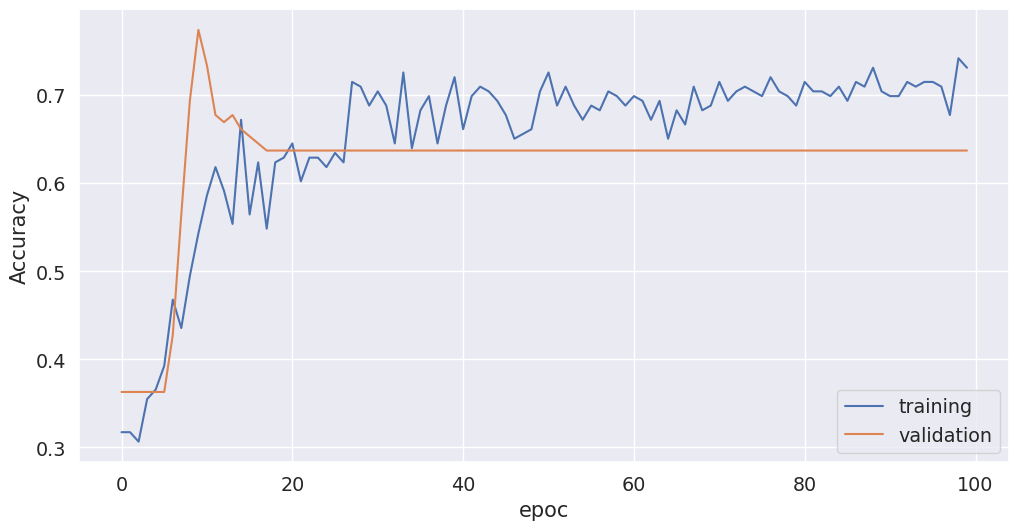

In [95]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Cambio de nuevo el optimizador por RMSprop

In [96]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [97]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [98]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 8.9091 - accuracy: 0.6250

186/186 [==============================] - 0s 797us/step - loss: 9.2149 - accuracy: 0.5269 - val_loss: 2.0043 - val_accuracy: 0.6774


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 8.0265 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 6.9226 - accuracy: 0.5806 - val_loss: 1.2916 - val_accuracy: 0.7339


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5526 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 3.2207 - accuracy: 0.6075 - val_loss: 1.0231 - val_accuracy: 0.7581


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5546 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 2.7335 - accuracy: 0.6882 - val_loss: 0.9358 - val_accuracy: 0.7661


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.9984 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 2.8438 - accuracy: 0.6667 - val_loss: 0.8503 - val_accuracy: 0.7581


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4831 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 2.0275 - accuracy: 0.6505 - val_loss: 0.7554 - val_accuracy: 0.7742


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7035 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 1.6257 - accuracy: 0.6935 - val_loss: 0.7470 - val_accuracy: 0.7742


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0907 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 1.6849 - accuracy: 0.7043 - val_loss: 0.7504 - val_accuracy: 0.7661


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7283 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 1.6942 - accuracy: 0.7204 - val_loss: 0.7296 - val_accuracy: 0.7661


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1581 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 1.0307 - accuracy: 0.7581 - val_loss: 0.7269 - val_accuracy: 0.7500


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5505 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 1.4361 - accuracy: 0.7258 - val_loss: 0.7172 - val_accuracy: 0.7339


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2631 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 1.2173 - accuracy: 0.7151 - val_loss: 0.7081 - val_accuracy: 0.7500


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1274 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 1.4185 - accuracy: 0.7204 - val_loss: 0.6561 - val_accuracy: 0.7500


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9001 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 1.1665 - accuracy: 0.7151 - val_loss: 0.6750 - val_accuracy: 0.7500


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9297 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 1.4345 - accuracy: 0.7473 - val_loss: 0.6569 - val_accuracy: 0.7581


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.8369 - accuracy: 0.7473 - val_loss: 0.6794 - val_accuracy: 0.7500


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0701 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.8290 - accuracy: 0.7312 - val_loss: 0.6506 - val_accuracy: 0.7339


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4774 - accuracy: 0.5312

186/186 [==============================] - 0s 47us/step - loss: 0.7729 - accuracy: 0.7151 - val_loss: 0.6361 - val_accuracy: 0.7419


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0454 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.9863 - accuracy: 0.7043 - val_loss: 0.6384 - val_accuracy: 0.7500


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7153 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 1.0045 - accuracy: 0.6935 - val_loss: 0.6500 - val_accuracy: 0.7097


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.0385 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.9049 - accuracy: 0.7151 - val_loss: 0.6503 - val_accuracy: 0.7097


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1533 - accuracy: 0.6250



186/186 [==============================] - 0s 46us/step - loss: 0.8928 - accuracy: 0.7151 - val_loss: 0.6528 - val_accuracy: 0.6774


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6050 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.9366 - accuracy: 0.7473 - val_loss: 0.6602 - val_accuracy: 0.6694


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0784 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.7530 - accuracy: 0.6882 - val_loss: 0.6651 - val_accuracy: 0.6452


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7474 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.8619 - accuracy: 0.7204 - val_loss: 0.6689 - val_accuracy: 0.6452


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8010 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6500 - accuracy: 0.7366 - val_loss: 0.6655 - val_accuracy: 0.6452


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7648 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.6872 - accuracy: 0.7258 - val_loss: 0.6654 - val_accuracy: 0.6532


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8231 - accuracy: 0.8438

186/186 [==============================] - 0s 84us/step - loss: 0.8333 - accuracy: 0.7366 - val_loss: 0.6596 - val_accuracy: 0.6613


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8429 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.6757 - accuracy: 0.7204 - val_loss: 0.6598 - val_accuracy: 0.6532


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9970 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.8266 - accuracy: 0.7043 - val_loss: 0.6594 - val_accuracy: 0.6452


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7060 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.7327 - accuracy: 0.7151 - val_loss: 0.6629 - val_accuracy: 0.6532


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5144 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.7177 - accuracy: 0.7312 - val_loss: 0.6545 - val_accuracy: 0.6613


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6939 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.7228 - accuracy: 0.7097 - val_loss: 0.6545 - val_accuracy: 0.6613


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5498 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.7329 - accuracy: 0.7097 - val_loss: 0.6545 - val_accuracy: 0.6532


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8512 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.7532 - accuracy: 0.6935 - val_loss: 0.6600 - val_accuracy: 0.6371


Epoch 36/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6229 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.7121 - accuracy: 0.7097 - val_loss: 0.6593 - val_accuracy: 0.6452


Epoch 37/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6855 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6462 - accuracy: 0.7366 - val_loss: 0.6570 - val_accuracy: 0.6452


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7673 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.7239 - accuracy: 0.7097 - val_loss: 0.6574 - val_accuracy: 0.6452


Epoch 39/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6704 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6963 - accuracy: 0.7312 - val_loss: 0.6543 - val_accuracy: 0.6452


Epoch 40/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7141 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.6376 - accuracy: 0.7473 - val_loss: 0.6515 - val_accuracy: 0.6613


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6649 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6432 - accuracy: 0.7366 - val_loss: 0.6490 - val_accuracy: 0.6613


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6120 - accuracy: 0.7188



186/186 [==============================] - 0s 63us/step - loss: 0.7199 - accuracy: 0.6989 - val_loss: 0.6483 - val_accuracy: 0.6613


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9949 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.7536 - accuracy: 0.7043 - val_loss: 0.6507 - val_accuracy: 0.6613


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5569 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.6381 - accuracy: 0.7204 - val_loss: 0.6523 - val_accuracy: 0.6452


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7607 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.7339 - accuracy: 0.7043 - val_loss: 0.6545 - val_accuracy: 0.6452


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7251 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.7345 - accuracy: 0.7204 - val_loss: 0.6523 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7769 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.7300 - accuracy: 0.6989 - val_loss: 0.6553 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6939 - accuracy: 0.6989 - val_loss: 0.6525 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6647 - accuracy: 0.6250

186/186 [==============================] - 0s 83us/step - loss: 0.6310 - accuracy: 0.7204 - val_loss: 0.6532 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.5579 - accuracy: 0.7473 - val_loss: 0.6478 - val_accuracy: 0.6452


Epoch 51/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6136 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6199 - accuracy: 0.7258 - val_loss: 0.6476 - val_accuracy: 0.6452


Epoch 52/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6943 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6439 - accuracy: 0.7258 - val_loss: 0.6498 - val_accuracy: 0.6371


Epoch 53/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6176 - accuracy: 0.7258 - val_loss: 0.6511 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6062 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.7574 - accuracy: 0.6882 - val_loss: 0.6500 - val_accuracy: 0.6371


Epoch 55/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5487 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6123 - accuracy: 0.7258 - val_loss: 0.6454 - val_accuracy: 0.6371


Epoch 56/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6733 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6067 - accuracy: 0.7527 - val_loss: 0.6453 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4953 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6287 - accuracy: 0.7634 - val_loss: 0.6333 - val_accuracy: 0.6694


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6318 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6556 - accuracy: 0.7312 - val_loss: 0.6297 - val_accuracy: 0.6694


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9499 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 0.7508 - accuracy: 0.6882 - val_loss: 0.6303 - val_accuracy: 0.6774


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6410 - accuracy: 0.6562



186/186 [==============================] - 0s 48us/step - loss: 0.6157 - accuracy: 0.7258 - val_loss: 0.6208 - val_accuracy: 0.6935


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6285 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6492 - accuracy: 0.7366 - val_loss: 0.6250 - val_accuracy: 0.6855


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5714 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.5771 - accuracy: 0.7258 - val_loss: 0.6253 - val_accuracy: 0.6774


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5276 - accuracy: 0.7500



186/186 [==============================] - 0s 49us/step - loss: 0.5910 - accuracy: 0.7419 - val_loss: 0.6244 - val_accuracy: 0.6774


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6006 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5641 - accuracy: 0.7312 - val_loss: 0.6190 - val_accuracy: 0.6774


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4749 - accuracy: 0.7812



186/186 [==============================] - 0s 51us/step - loss: 0.5311 - accuracy: 0.7849 - val_loss: 0.5950 - val_accuracy: 0.7016


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6399 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5459 - accuracy: 0.7527 - val_loss: 0.5811 - val_accuracy: 0.7016


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6970 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6076 - accuracy: 0.7366 - val_loss: 0.5707 - val_accuracy: 0.7016


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5373 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5975 - accuracy: 0.7473 - val_loss: 0.5591 - val_accuracy: 0.6855


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4693 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5313 - accuracy: 0.7742 - val_loss: 0.5342 - val_accuracy: 0.6935


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5209 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.5501 - accuracy: 0.7419 - val_loss: 0.5113 - val_accuracy: 0.7661


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4539 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5068 - accuracy: 0.7796 - val_loss: 0.5087 - val_accuracy: 0.7097


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7039 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5410 - accuracy: 0.7419 - val_loss: 0.5141 - val_accuracy: 0.6855


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5869 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5748 - accuracy: 0.7312 - val_loss: 0.5117 - val_accuracy: 0.6855


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8193 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6095 - accuracy: 0.7527 - val_loss: 0.5061 - val_accuracy: 0.6935


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5531 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5393 - accuracy: 0.7473 - val_loss: 0.4936 - val_accuracy: 0.6935


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5828 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5874 - accuracy: 0.7634 - val_loss: 0.4862 - val_accuracy: 0.7258


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5195 - accuracy: 0.7473 - val_loss: 0.4691 - val_accuracy: 0.7823


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5579 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5611 - accuracy: 0.7258 - val_loss: 0.4648 - val_accuracy: 0.7742


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5310 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5051 - accuracy: 0.7366 - val_loss: 0.4724 - val_accuracy: 0.7258


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5511 - accuracy: 0.7312 - val_loss: 0.4621 - val_accuracy: 0.7419


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7052 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5853 - accuracy: 0.7204 - val_loss: 0.4672 - val_accuracy: 0.7742


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6175 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5376 - accuracy: 0.7527 - val_loss: 0.4767 - val_accuracy: 0.7339


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6540 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5778 - accuracy: 0.7581 - val_loss: 0.4725 - val_accuracy: 0.7419


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5516 - accuracy: 0.7419 - val_loss: 0.4522 - val_accuracy: 0.7661


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8598 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.6463 - accuracy: 0.6935 - val_loss: 0.4667 - val_accuracy: 0.7742


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6033 - accuracy: 0.6562



186/186 [==============================] - 0s 55us/step - loss: 0.5424 - accuracy: 0.7204 - val_loss: 0.4785 - val_accuracy: 0.7258


Epoch 87/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4958 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5266 - accuracy: 0.7581 - val_loss: 0.4656 - val_accuracy: 0.7742


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4946 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5430 - accuracy: 0.7258 - val_loss: 0.4691 - val_accuracy: 0.7419


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.6162 - accuracy: 0.7204 - val_loss: 0.4602 - val_accuracy: 0.7661


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5500 - accuracy: 0.6562



186/186 [==============================] - 0s 48us/step - loss: 0.5290 - accuracy: 0.7581 - val_loss: 0.4589 - val_accuracy: 0.7742


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.5007 - accuracy: 0.7473 - val_loss: 0.4641 - val_accuracy: 0.7742


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5825 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4864 - accuracy: 0.7688 - val_loss: 0.4625 - val_accuracy: 0.7581


Epoch 93/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4448 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5117 - accuracy: 0.7366 - val_loss: 0.4695 - val_accuracy: 0.7419


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5207 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4780 - accuracy: 0.7796 - val_loss: 0.4595 - val_accuracy: 0.7581


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5042 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5390 - accuracy: 0.7634 - val_loss: 0.4498 - val_accuracy: 0.7661


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4989 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5519 - accuracy: 0.7527 - val_loss: 0.4617 - val_accuracy: 0.7581


Epoch 97/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5022 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4915 - accuracy: 0.7742 - val_loss: 0.4643 - val_accuracy: 0.7823


Epoch 98/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4818 - accuracy: 0.7688 - val_loss: 0.4599 - val_accuracy: 0.7823


Epoch 99/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4445 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5286 - accuracy: 0.7796 - val_loss: 0.4432 - val_accuracy: 0.7742


Epoch 100/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6447 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.5134 - accuracy: 0.7581 - val_loss: 0.4455 - val_accuracy: 0.7742


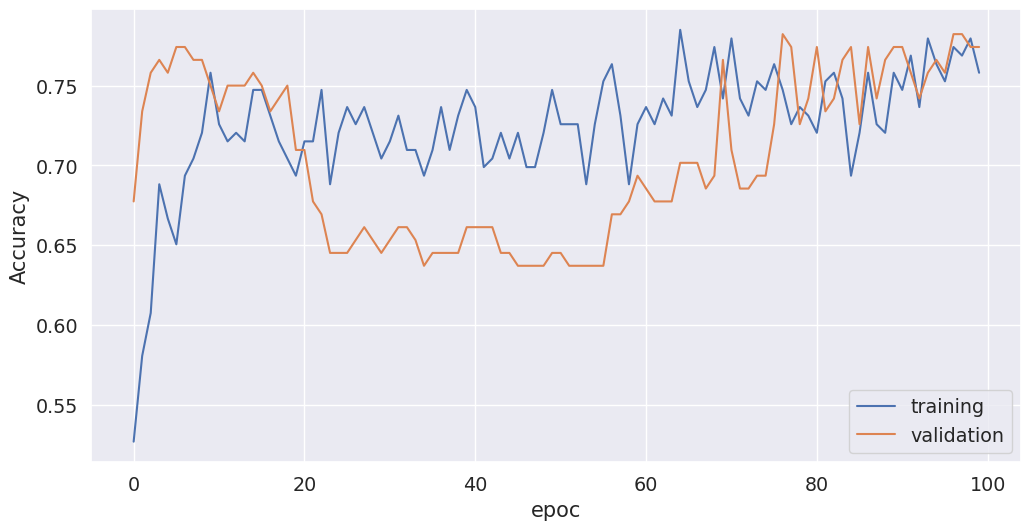

In [99]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Agreguemosle regularización de tipo L2

In [100]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation="softmax"))

In [101]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [102]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 25.7266 - accuracy: 0.6875

186/186 [==============================] - 0s 881us/step - loss: 23.3106 - accuracy: 0.6989 - val_loss: 21.6648 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 21.8897 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 18.9810 - accuracy: 0.7043 - val_loss: 18.6877 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 18.5420 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 17.0345 - accuracy: 0.7043 - val_loss: 16.2632 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 9.6310 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 14.5715 - accuracy: 0.6989 - val_loss: 14.1280 - val_accuracy: 0.6371


Epoch 5/100


 32/186 [====>.........................] - ETA: 0s - loss: 13.3315 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 12.6911 - accuracy: 0.7043 - val_loss: 12.2078 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 14.2106 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 11.0511 - accuracy: 0.7097 - val_loss: 10.5713 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 15.1813 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 10.1545 - accuracy: 0.6935 - val_loss: 9.0099 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.1196 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 9.0804 - accuracy: 0.7097 - val_loss: 7.4848 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.1410 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 6.9590 - accuracy: 0.7151 - val_loss: 6.5123 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 10.8173 - accuracy: 0.4688

186/186 [==============================] - 0s 48us/step - loss: 6.4530 - accuracy: 0.6882 - val_loss: 5.4730 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.2076 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 6.0929 - accuracy: 0.7043 - val_loss: 4.4920 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.5177 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 4.8871 - accuracy: 0.6935 - val_loss: 3.6031 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.5477 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 3.8722 - accuracy: 0.6989 - val_loss: 2.7262 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.4033 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 3.4249 - accuracy: 0.6935 - val_loss: 2.0219 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.3405 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 2.6996 - accuracy: 0.6882 - val_loss: 1.4403 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3200 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 2.3604 - accuracy: 0.7366 - val_loss: 1.0239 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.7793 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 1.9385 - accuracy: 0.6882 - val_loss: 0.7637 - val_accuracy: 0.6774


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.8524 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 1.9387 - accuracy: 0.6935 - val_loss: 0.6698 - val_accuracy: 0.7581


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5582 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 2.2030 - accuracy: 0.6720 - val_loss: 0.6586 - val_accuracy: 0.7258


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4399 - accuracy: 0.5312

186/186 [==============================] - 0s 46us/step - loss: 1.4714 - accuracy: 0.6720 - val_loss: 0.6701 - val_accuracy: 0.7016


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4119 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 1.4843 - accuracy: 0.6774 - val_loss: 0.6824 - val_accuracy: 0.6694


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7008 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.9771 - accuracy: 0.6559 - val_loss: 0.6862 - val_accuracy: 0.6532


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5407 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 1.1147 - accuracy: 0.6720 - val_loss: 0.6936 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8797 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 1.0845 - accuracy: 0.6720 - val_loss: 0.6918 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0129 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.9981 - accuracy: 0.6075 - val_loss: 0.6985 - val_accuracy: 0.6210


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8296 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 1.0416 - accuracy: 0.6075 - val_loss: 0.6927 - val_accuracy: 0.6290


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7539 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.8707 - accuracy: 0.6452 - val_loss: 0.6841 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9200 - accuracy: 0.5312



186/186 [==============================] - 0s 51us/step - loss: 0.8486 - accuracy: 0.6398 - val_loss: 0.6774 - val_accuracy: 0.6532


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8250 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.7615 - accuracy: 0.6882 - val_loss: 0.6711 - val_accuracy: 0.6532


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7438 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.8322 - accuracy: 0.6022 - val_loss: 0.6668 - val_accuracy: 0.6532


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6203 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.7313 - accuracy: 0.6828 - val_loss: 0.6461 - val_accuracy: 0.6774


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7373 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.7124 - accuracy: 0.6720 - val_loss: 0.6394 - val_accuracy: 0.6774


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7738 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.7391 - accuracy: 0.6667 - val_loss: 0.6318 - val_accuracy: 0.6855


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7550 - accuracy: 0.6875

186/186 [==============================] - 0s 71us/step - loss: 0.7279 - accuracy: 0.6452 - val_loss: 0.6245 - val_accuracy: 0.7016


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6849 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6697 - accuracy: 0.7312 - val_loss: 0.6261 - val_accuracy: 0.7016


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6578 - accuracy: 0.7258 - val_loss: 0.6247 - val_accuracy: 0.7016


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6351 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6900 - accuracy: 0.6989 - val_loss: 0.6182 - val_accuracy: 0.7016


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7903 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.7320 - accuracy: 0.6989 - val_loss: 0.6151 - val_accuracy: 0.7016


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5077 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.6326 - accuracy: 0.6935 - val_loss: 0.6146 - val_accuracy: 0.7016


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7136 - accuracy: 0.5625



186/186 [==============================] - 0s 51us/step - loss: 0.6569 - accuracy: 0.6559 - val_loss: 0.6129 - val_accuracy: 0.7016


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6211 - accuracy: 0.6562



186/186 [==============================] - 0s 51us/step - loss: 0.6640 - accuracy: 0.7419 - val_loss: 0.6142 - val_accuracy: 0.7016


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.6998 - accuracy: 0.6452 - val_loss: 0.6150 - val_accuracy: 0.7016


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4727 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5936 - accuracy: 0.7204 - val_loss: 0.6097 - val_accuracy: 0.7016


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5282 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5855 - accuracy: 0.7151 - val_loss: 0.6074 - val_accuracy: 0.7016


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5942 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5893 - accuracy: 0.6935 - val_loss: 0.6070 - val_accuracy: 0.7016


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6146 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5997 - accuracy: 0.6667 - val_loss: 0.6095 - val_accuracy: 0.7016


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6320 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5834 - accuracy: 0.7312 - val_loss: 0.6041 - val_accuracy: 0.7177


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7523 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6181 - accuracy: 0.6989 - val_loss: 0.6026 - val_accuracy: 0.7097


Epoch 49/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.6050 - accuracy: 0.7043 - val_loss: 0.6005 - val_accuracy: 0.7016


Epoch 50/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5904 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5647 - accuracy: 0.7097 - val_loss: 0.5956 - val_accuracy: 0.7177


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6317 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5748 - accuracy: 0.7366 - val_loss: 0.5944 - val_accuracy: 0.7016


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6096 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.5443 - accuracy: 0.7419 - val_loss: 0.5951 - val_accuracy: 0.7016


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6951 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5766 - accuracy: 0.7312 - val_loss: 0.5887 - val_accuracy: 0.7016


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5753 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5824 - accuracy: 0.7312 - val_loss: 0.5866 - val_accuracy: 0.7097


Epoch 55/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5694 - accuracy: 0.7312 - val_loss: 0.5823 - val_accuracy: 0.7258


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5534 - accuracy: 0.7258 - val_loss: 0.5824 - val_accuracy: 0.7097


Epoch 57/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5677 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5891 - accuracy: 0.7151 - val_loss: 0.5861 - val_accuracy: 0.7016


Epoch 58/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5200 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5303 - accuracy: 0.7473 - val_loss: 0.5853 - val_accuracy: 0.7016


Epoch 59/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5481 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5504 - accuracy: 0.7473 - val_loss: 0.5870 - val_accuracy: 0.7016


Epoch 60/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7738 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5923 - accuracy: 0.7258 - val_loss: 0.5842 - val_accuracy: 0.7016


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7381 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5280 - accuracy: 0.7957 - val_loss: 0.5812 - val_accuracy: 0.7016


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4929 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5446 - accuracy: 0.7849 - val_loss: 0.5777 - val_accuracy: 0.7097


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6775 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5587 - accuracy: 0.7366 - val_loss: 0.5770 - val_accuracy: 0.7258


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4637 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5330 - accuracy: 0.7419 - val_loss: 0.5773 - val_accuracy: 0.7258


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5878 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.5038 - accuracy: 0.7581 - val_loss: 0.5741 - val_accuracy: 0.7258


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6044 - accuracy: 0.6875



186/186 [==============================] - 0s 49us/step - loss: 0.5462 - accuracy: 0.7258 - val_loss: 0.5764 - val_accuracy: 0.7258


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5141 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5977 - accuracy: 0.7151 - val_loss: 0.5799 - val_accuracy: 0.7016


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4786 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5538 - accuracy: 0.7527 - val_loss: 0.5773 - val_accuracy: 0.7016


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5071 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5258 - accuracy: 0.7473 - val_loss: 0.5738 - val_accuracy: 0.7177


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5074 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5396 - accuracy: 0.7366 - val_loss: 0.5759 - val_accuracy: 0.7016


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4734 - accuracy: 0.7500



186/186 [==============================] - 0s 49us/step - loss: 0.5549 - accuracy: 0.7366 - val_loss: 0.5723 - val_accuracy: 0.7097


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6339 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.5254 - accuracy: 0.7419 - val_loss: 0.5673 - val_accuracy: 0.7258


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4237 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.5269 - accuracy: 0.7957 - val_loss: 0.5656 - val_accuracy: 0.7258


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4014 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.5304 - accuracy: 0.7473 - val_loss: 0.5610 - val_accuracy: 0.7258


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4720 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4964 - accuracy: 0.8011 - val_loss: 0.5607 - val_accuracy: 0.7258


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4900 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5116 - accuracy: 0.7796 - val_loss: 0.5614 - val_accuracy: 0.7258


Epoch 77/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7664 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.4944 - accuracy: 0.8011 - val_loss: 0.5622 - val_accuracy: 0.7258


Epoch 78/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5042 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5226 - accuracy: 0.7366 - val_loss: 0.5590 - val_accuracy: 0.7258


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5084 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5295 - accuracy: 0.7366 - val_loss: 0.5592 - val_accuracy: 0.7258


Epoch 80/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3805 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.5400 - accuracy: 0.7473 - val_loss: 0.5606 - val_accuracy: 0.7258


Epoch 81/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4377 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.4698 - accuracy: 0.7903 - val_loss: 0.5582 - val_accuracy: 0.7258


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5468 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.4898 - accuracy: 0.7742 - val_loss: 0.5543 - val_accuracy: 0.7339


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5017 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4694 - accuracy: 0.7849 - val_loss: 0.5539 - val_accuracy: 0.7258


Epoch 84/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5691 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5065 - accuracy: 0.7634 - val_loss: 0.5539 - val_accuracy: 0.7258


Epoch 85/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5072 - accuracy: 0.7903 - val_loss: 0.5569 - val_accuracy: 0.7258


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4585 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5073 - accuracy: 0.7634 - val_loss: 0.5559 - val_accuracy: 0.7258


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3930 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4771 - accuracy: 0.7688 - val_loss: 0.5543 - val_accuracy: 0.7339


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4506 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5173 - accuracy: 0.7634 - val_loss: 0.5561 - val_accuracy: 0.7258


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4690 - accuracy: 0.7688 - val_loss: 0.5559 - val_accuracy: 0.7258


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5243 - accuracy: 0.7581 - val_loss: 0.5547 - val_accuracy: 0.7258


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4994 - accuracy: 0.7957 - val_loss: 0.5587 - val_accuracy: 0.7177


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5078 - accuracy: 0.7204 - val_loss: 0.5575 - val_accuracy: 0.7097


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4618 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4887 - accuracy: 0.7742 - val_loss: 0.5565 - val_accuracy: 0.7097


Epoch 94/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5786 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.4921 - accuracy: 0.7581 - val_loss: 0.5539 - val_accuracy: 0.7258


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3614 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.4892 - accuracy: 0.7688 - val_loss: 0.5501 - val_accuracy: 0.7258


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.4752 - accuracy: 0.7957 - val_loss: 0.5508 - val_accuracy: 0.7177


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4788 - accuracy: 0.7903 - val_loss: 0.5503 - val_accuracy: 0.7339


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4850 - accuracy: 0.7903 - val_loss: 0.5500 - val_accuracy: 0.7258


Epoch 99/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4956 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4806 - accuracy: 0.7903 - val_loss: 0.5489 - val_accuracy: 0.7258


Epoch 100/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4657 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4747 - accuracy: 0.8011 - val_loss: 0.5492 - val_accuracy: 0.7258


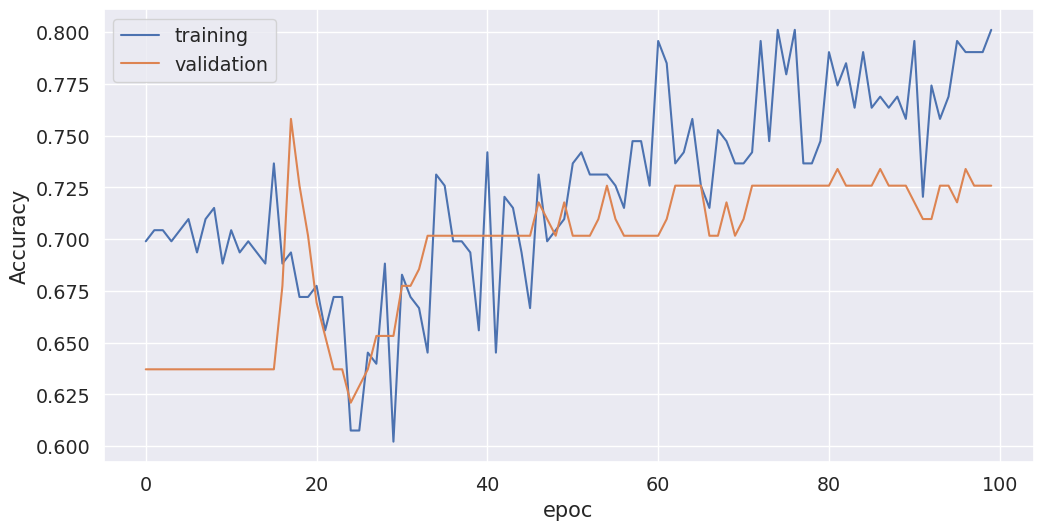

In [103]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Parece estar muy errático el aprendizaje, bajemos el parámetro de regularización y bajemos la tasa de aprendizaje

In [104]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))

In [105]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(
    X_train.values, y_train, epochs=1000, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7180 - accuracy: 0.7500

186/186 [==============================] - 0s 582us/step - loss: 0.7177 - accuracy: 0.7043 - val_loss: 0.7175 - val_accuracy: 0.6371


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7173 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.7172 - accuracy: 0.7043 - val_loss: 0.7172 - val_accuracy: 0.6371


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7167 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.7168 - accuracy: 0.7043 - val_loss: 0.7170 - val_accuracy: 0.6371


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7159 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.7165 - accuracy: 0.7043 - val_loss: 0.7167 - val_accuracy: 0.6371


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7159 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.7162 - accuracy: 0.7043 - val_loss: 0.7165 - val_accuracy: 0.6371


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7155 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.7159 - accuracy: 0.7043 - val_loss: 0.7163 - val_accuracy: 0.6371


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7151 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.7156 - accuracy: 0.7043 - val_loss: 0.7160 - val_accuracy: 0.6371


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7161 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.7153 - accuracy: 0.7043 - val_loss: 0.7158 - val_accuracy: 0.6371


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7149 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.7149 - accuracy: 0.7043 - val_loss: 0.7155 - val_accuracy: 0.6371


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7139 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.7146 - accuracy: 0.7043 - val_loss: 0.7153 - val_accuracy: 0.6371


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7131 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.7143 - accuracy: 0.7043 - val_loss: 0.7151 - val_accuracy: 0.6371


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7127 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.7140 - accuracy: 0.7043 - val_loss: 0.7149 - val_accuracy: 0.6371


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7150 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.7137 - accuracy: 0.7043 - val_loss: 0.7146 - val_accuracy: 0.6371


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7128 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.7134 - accuracy: 0.7043 - val_loss: 0.7144 - val_accuracy: 0.6371


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7135 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.7131 - accuracy: 0.7043 - val_loss: 0.7142 - val_accuracy: 0.6371


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7110 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.7128 - accuracy: 0.7043 - val_loss: 0.7140 - val_accuracy: 0.6371


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7118 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.7125 - accuracy: 0.7043 - val_loss: 0.7137 - val_accuracy: 0.6371


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7146 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.7122 - accuracy: 0.7043 - val_loss: 0.7135 - val_accuracy: 0.6371


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7104 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.7119 - accuracy: 0.7043 - val_loss: 0.7133 - val_accuracy: 0.6371


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7093 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.7116 - accuracy: 0.7043 - val_loss: 0.7131 - val_accuracy: 0.6371


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7126 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.7114 - accuracy: 0.7043 - val_loss: 0.7128 - val_accuracy: 0.6371


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7162 - accuracy: 0.5000

186/186 [==============================] - 0s 49us/step - loss: 0.7110 - accuracy: 0.7043 - val_loss: 0.7126 - val_accuracy: 0.6371


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7121 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.7107 - accuracy: 0.7043 - val_loss: 0.7124 - val_accuracy: 0.6371


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7093 - accuracy: 0.7500

186/186 [==============================] - 0s 97us/step - loss: 0.7105 - accuracy: 0.7043 - val_loss: 0.7122 - val_accuracy: 0.6371


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7116 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.7102 - accuracy: 0.7043 - val_loss: 0.7119 - val_accuracy: 0.6371


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7105 - accuracy: 0.6875



186/186 [==============================] - 0s 53us/step - loss: 0.7099 - accuracy: 0.7043 - val_loss: 0.7117 - val_accuracy: 0.6371


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7102 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.7096 - accuracy: 0.7043 - val_loss: 0.7115 - val_accuracy: 0.6371


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7119 - accuracy: 0.6250



186/186 [==============================] - 0s 47us/step - loss: 0.7093 - accuracy: 0.7043 - val_loss: 0.7113 - val_accuracy: 0.6371


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7076 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.7090 - accuracy: 0.7043 - val_loss: 0.7111 - val_accuracy: 0.6371


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7094 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.7087 - accuracy: 0.7043 - val_loss: 0.7108 - val_accuracy: 0.6371


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7091 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.7084 - accuracy: 0.7043 - val_loss: 0.7106 - val_accuracy: 0.6371


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7099 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.7081 - accuracy: 0.7043 - val_loss: 0.7104 - val_accuracy: 0.6371


Epoch 33/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7051 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.7078 - accuracy: 0.7043 - val_loss: 0.7102 - val_accuracy: 0.6371


Epoch 34/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7095 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.7075 - accuracy: 0.7043 - val_loss: 0.7100 - val_accuracy: 0.6371


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7043 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.7072 - accuracy: 0.7043 - val_loss: 0.7097 - val_accuracy: 0.6371


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7115 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.7069 - accuracy: 0.7043 - val_loss: 0.7095 - val_accuracy: 0.6371


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7036 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.7066 - accuracy: 0.7043 - val_loss: 0.7093 - val_accuracy: 0.6371


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7072 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.7063 - accuracy: 0.7043 - val_loss: 0.7091 - val_accuracy: 0.6371


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7069 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.7060 - accuracy: 0.7043 - val_loss: 0.7089 - val_accuracy: 0.6371


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7052 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.7058 - accuracy: 0.7043 - val_loss: 0.7087 - val_accuracy: 0.6371


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7049 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.7055 - accuracy: 0.7043 - val_loss: 0.7084 - val_accuracy: 0.6371


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7046 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.7052 - accuracy: 0.7043 - val_loss: 0.7082 - val_accuracy: 0.6371


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7013 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.7049 - accuracy: 0.7043 - val_loss: 0.7080 - val_accuracy: 0.6371


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7071 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.7046 - accuracy: 0.7043 - val_loss: 0.7078 - val_accuracy: 0.6371


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7037 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.7043 - accuracy: 0.7043 - val_loss: 0.7076 - val_accuracy: 0.6371


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7066 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.7040 - accuracy: 0.7043 - val_loss: 0.7074 - val_accuracy: 0.6371


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6998 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.7037 - accuracy: 0.7043 - val_loss: 0.7072 - val_accuracy: 0.6371


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7061 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.7034 - accuracy: 0.7043 - val_loss: 0.7069 - val_accuracy: 0.6371


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7008 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.7032 - accuracy: 0.7043 - val_loss: 0.7067 - val_accuracy: 0.6371


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7074 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 0.7029 - accuracy: 0.7043 - val_loss: 0.7065 - val_accuracy: 0.6371


Epoch 51/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7036 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.7026 - accuracy: 0.7043 - val_loss: 0.7063 - val_accuracy: 0.6371


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6997 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.7023 - accuracy: 0.7043 - val_loss: 0.7061 - val_accuracy: 0.6371


Epoch 53/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6994 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.7020 - accuracy: 0.7043 - val_loss: 0.7059 - val_accuracy: 0.6371


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7028 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.7017 - accuracy: 0.7043 - val_loss: 0.7057 - val_accuracy: 0.6371


Epoch 55/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6949 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.7014 - accuracy: 0.7043 - val_loss: 0.7055 - val_accuracy: 0.6371


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6984 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.7011 - accuracy: 0.7043 - val_loss: 0.7053 - val_accuracy: 0.6371


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7100 - accuracy: 0.5625

186/186 [==============================] - 0s 51us/step - loss: 0.7008 - accuracy: 0.7043 - val_loss: 0.7050 - val_accuracy: 0.6371


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6997 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.7006 - accuracy: 0.7043 - val_loss: 0.7048 - val_accuracy: 0.6371


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7015 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.7003 - accuracy: 0.7043 - val_loss: 0.7046 - val_accuracy: 0.6371


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7054 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.7000 - accuracy: 0.7043 - val_loss: 0.7044 - val_accuracy: 0.6371


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7031 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.6997 - accuracy: 0.7043 - val_loss: 0.7042 - val_accuracy: 0.6371


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7007 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6994 - accuracy: 0.7043 - val_loss: 0.7040 - val_accuracy: 0.6371


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7026 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.6991 - accuracy: 0.7043 - val_loss: 0.7038 - val_accuracy: 0.6371


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7024 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6989 - accuracy: 0.7043 - val_loss: 0.7036 - val_accuracy: 0.6371


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6931 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6986 - accuracy: 0.7043 - val_loss: 0.7034 - val_accuracy: 0.6371


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7020 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.6983 - accuracy: 0.7043 - val_loss: 0.7032 - val_accuracy: 0.6371


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6994 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6980 - accuracy: 0.7043 - val_loss: 0.7030 - val_accuracy: 0.6371


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6944 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6978 - accuracy: 0.7043 - val_loss: 0.7028 - val_accuracy: 0.6371


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6892 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.6975 - accuracy: 0.7043 - val_loss: 0.7026 - val_accuracy: 0.6371


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6986 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6972 - accuracy: 0.7043 - val_loss: 0.7024 - val_accuracy: 0.6371


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6909 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.6969 - accuracy: 0.7043 - val_loss: 0.7022 - val_accuracy: 0.6371


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7057 - accuracy: 0.5938

186/186 [==============================] - 0s 43us/step - loss: 0.6966 - accuracy: 0.7043 - val_loss: 0.7020 - val_accuracy: 0.6371


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6953 - accuracy: 0.7188



186/186 [==============================] - 0s 44us/step - loss: 0.6964 - accuracy: 0.7043 - val_loss: 0.7018 - val_accuracy: 0.6371


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6924 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.6961 - accuracy: 0.7043 - val_loss: 0.7016 - val_accuracy: 0.6371


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6974 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6958 - accuracy: 0.7043 - val_loss: 0.7014 - val_accuracy: 0.6371


Epoch 76/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6945 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6956 - accuracy: 0.7043 - val_loss: 0.7012 - val_accuracy: 0.6371


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6953 - accuracy: 0.7043 - val_loss: 0.7010 - val_accuracy: 0.6371


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7020 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.6950 - accuracy: 0.7043 - val_loss: 0.7008 - val_accuracy: 0.6371


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7101 - accuracy: 0.5312

186/186 [==============================] - 0s 44us/step - loss: 0.6948 - accuracy: 0.7043 - val_loss: 0.7006 - val_accuracy: 0.6371


Epoch 80/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6849 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6945 - accuracy: 0.7043 - val_loss: 0.7004 - val_accuracy: 0.6371


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6959 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6942 - accuracy: 0.7043 - val_loss: 0.7002 - val_accuracy: 0.6371


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6899 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6940 - accuracy: 0.7043 - val_loss: 0.7000 - val_accuracy: 0.6371


Epoch 83/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6954 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6937 - accuracy: 0.7043 - val_loss: 0.6998 - val_accuracy: 0.6371


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7010 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.6934 - accuracy: 0.7043 - val_loss: 0.6996 - val_accuracy: 0.6371


Epoch 85/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7037 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.6931 - accuracy: 0.7043 - val_loss: 0.6994 - val_accuracy: 0.6371


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6946 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6929 - accuracy: 0.7043 - val_loss: 0.6992 - val_accuracy: 0.6371


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6974 - accuracy: 0.6562



186/186 [==============================] - 0s 44us/step - loss: 0.6926 - accuracy: 0.7043 - val_loss: 0.6990 - val_accuracy: 0.6371


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6818 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6924 - accuracy: 0.7043 - val_loss: 0.6989 - val_accuracy: 0.6371


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6970 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6921 - accuracy: 0.7043 - val_loss: 0.6987 - val_accuracy: 0.6371


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6905 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6918 - accuracy: 0.7043 - val_loss: 0.6985 - val_accuracy: 0.6371


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6902 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6916 - accuracy: 0.7043 - val_loss: 0.6983 - val_accuracy: 0.6371


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6899 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6913 - accuracy: 0.7043 - val_loss: 0.6981 - val_accuracy: 0.6371


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6832 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6910 - accuracy: 0.7043 - val_loss: 0.6979 - val_accuracy: 0.6371


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6894 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6908 - accuracy: 0.7043 - val_loss: 0.6977 - val_accuracy: 0.6371


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6758 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.6905 - accuracy: 0.7043 - val_loss: 0.6975 - val_accuracy: 0.6371


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6988 - accuracy: 0.6250



186/186 [==============================] - 0s 45us/step - loss: 0.6903 - accuracy: 0.7043 - val_loss: 0.6974 - val_accuracy: 0.6371


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6818 - accuracy: 0.7812



186/186 [==============================] - 0s 43us/step - loss: 0.6900 - accuracy: 0.7043 - val_loss: 0.6972 - val_accuracy: 0.6371


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6883 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6897 - accuracy: 0.7043 - val_loss: 0.6970 - val_accuracy: 0.6371


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6845 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6895 - accuracy: 0.7043 - val_loss: 0.6968 - val_accuracy: 0.6371


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6947 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6892 - accuracy: 0.7043 - val_loss: 0.6966 - val_accuracy: 0.6371


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6980 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.6889 - accuracy: 0.7043 - val_loss: 0.6964 - val_accuracy: 0.6371


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6942 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.6887 - accuracy: 0.7043 - val_loss: 0.6962 - val_accuracy: 0.6371


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.6884 - accuracy: 0.7043 - val_loss: 0.6960 - val_accuracy: 0.6371


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6866 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6882 - accuracy: 0.7043 - val_loss: 0.6959 - val_accuracy: 0.6371


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6936 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6879 - accuracy: 0.7043 - val_loss: 0.6957 - val_accuracy: 0.6371


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6787 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6876 - accuracy: 0.7043 - val_loss: 0.6955 - val_accuracy: 0.6371


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6858 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6874 - accuracy: 0.7043 - val_loss: 0.6953 - val_accuracy: 0.6371


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6930 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6871 - accuracy: 0.7043 - val_loss: 0.6951 - val_accuracy: 0.6371


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7004 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.6869 - accuracy: 0.7043 - val_loss: 0.6949 - val_accuracy: 0.6371


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6888 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6866 - accuracy: 0.7043 - val_loss: 0.6948 - val_accuracy: 0.6371


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6847 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.6864 - accuracy: 0.7043 - val_loss: 0.6946 - val_accuracy: 0.6371


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6922 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.6861 - accuracy: 0.7043 - val_loss: 0.6944 - val_accuracy: 0.6371


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6645 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.6859 - accuracy: 0.7043 - val_loss: 0.6942 - val_accuracy: 0.6371


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6839 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6856 - accuracy: 0.7043 - val_loss: 0.6940 - val_accuracy: 0.6371


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6836 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6854 - accuracy: 0.7043 - val_loss: 0.6939 - val_accuracy: 0.6371


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6914 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6851 - accuracy: 0.7043 - val_loss: 0.6937 - val_accuracy: 0.6371


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6953 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 0.6849 - accuracy: 0.7043 - val_loss: 0.6935 - val_accuracy: 0.6371


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6869 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6846 - accuracy: 0.7043 - val_loss: 0.6933 - val_accuracy: 0.6371


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6743 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.6844 - accuracy: 0.7043 - val_loss: 0.6932 - val_accuracy: 0.6371


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6906 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.6841 - accuracy: 0.7043 - val_loss: 0.6930 - val_accuracy: 0.6371


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6820 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.6838 - accuracy: 0.7043 - val_loss: 0.6928 - val_accuracy: 0.6371


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6732 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6836 - accuracy: 0.7043 - val_loss: 0.6926 - val_accuracy: 0.6371


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7156 - accuracy: 0.4688

186/186 [==============================] - 0s 44us/step - loss: 0.6833 - accuracy: 0.7043 - val_loss: 0.6924 - val_accuracy: 0.6371


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6769 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.6831 - accuracy: 0.7043 - val_loss: 0.6923 - val_accuracy: 0.6371


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6983 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.6828 - accuracy: 0.7043 - val_loss: 0.6921 - val_accuracy: 0.6371


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7025 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 0.6826 - accuracy: 0.7043 - val_loss: 0.6919 - val_accuracy: 0.6371


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6848 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6824 - accuracy: 0.7043 - val_loss: 0.6918 - val_accuracy: 0.6371


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6979 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.6821 - accuracy: 0.7043 - val_loss: 0.6916 - val_accuracy: 0.6371


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6844 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6819 - accuracy: 0.7043 - val_loss: 0.6914 - val_accuracy: 0.6371


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6706 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6816 - accuracy: 0.7043 - val_loss: 0.6912 - val_accuracy: 0.6371


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6748 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6814 - accuracy: 0.7043 - val_loss: 0.6911 - val_accuracy: 0.6371


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6700 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6811 - accuracy: 0.7043 - val_loss: 0.6909 - val_accuracy: 0.6371


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6927 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6809 - accuracy: 0.7043 - val_loss: 0.6907 - val_accuracy: 0.6371


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6740 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6807 - accuracy: 0.7043 - val_loss: 0.6906 - val_accuracy: 0.6371


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6784 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6804 - accuracy: 0.7043 - val_loss: 0.6904 - val_accuracy: 0.6371


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6640 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.6802 - accuracy: 0.7043 - val_loss: 0.6902 - val_accuracy: 0.6371


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6779 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6800 - accuracy: 0.7043 - val_loss: 0.6901 - val_accuracy: 0.6371


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6872 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6797 - accuracy: 0.7043 - val_loss: 0.6899 - val_accuracy: 0.6371


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6870 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6795 - accuracy: 0.7043 - val_loss: 0.6897 - val_accuracy: 0.6371


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6674 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6792 - accuracy: 0.7043 - val_loss: 0.6896 - val_accuracy: 0.6371


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6622 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.6790 - accuracy: 0.7043 - val_loss: 0.6894 - val_accuracy: 0.6371


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6913 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.6788 - accuracy: 0.7043 - val_loss: 0.6892 - val_accuracy: 0.6371


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6566 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6785 - accuracy: 0.7043 - val_loss: 0.6891 - val_accuracy: 0.6371


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6811 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6783 - accuracy: 0.7043 - val_loss: 0.6889 - val_accuracy: 0.6371


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6759 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6781 - accuracy: 0.7043 - val_loss: 0.6888 - val_accuracy: 0.6371


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6806 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6778 - accuracy: 0.7043 - val_loss: 0.6886 - val_accuracy: 0.6371


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6652 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.6776 - accuracy: 0.7043 - val_loss: 0.6884 - val_accuracy: 0.6371


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6649 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.6774 - accuracy: 0.7043 - val_loss: 0.6883 - val_accuracy: 0.6371


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6697 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6771 - accuracy: 0.7043 - val_loss: 0.6881 - val_accuracy: 0.6371


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6746 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6769 - accuracy: 0.7043 - val_loss: 0.6880 - val_accuracy: 0.6371


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6691 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.6767 - accuracy: 0.7043 - val_loss: 0.6878 - val_accuracy: 0.6371


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6741 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6764 - accuracy: 0.7043 - val_loss: 0.6876 - val_accuracy: 0.6371


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6686 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6762 - accuracy: 0.7043 - val_loss: 0.6875 - val_accuracy: 0.6371


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6842 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6760 - accuracy: 0.7043 - val_loss: 0.6873 - val_accuracy: 0.6371


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6840 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6757 - accuracy: 0.7043 - val_loss: 0.6871 - val_accuracy: 0.6371


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.6755 - accuracy: 0.7043 - val_loss: 0.6870 - val_accuracy: 0.6371


Epoch 157/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6674 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.6753 - accuracy: 0.7043 - val_loss: 0.6868 - val_accuracy: 0.6371


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.6750 - accuracy: 0.7043 - val_loss: 0.6867 - val_accuracy: 0.6371


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6669 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6748 - accuracy: 0.7043 - val_loss: 0.6865 - val_accuracy: 0.6371


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6831 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6745 - accuracy: 0.7043 - val_loss: 0.6863 - val_accuracy: 0.6371


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6718 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6743 - accuracy: 0.7043 - val_loss: 0.6862 - val_accuracy: 0.6371


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6772 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6741 - accuracy: 0.7043 - val_loss: 0.6860 - val_accuracy: 0.6371


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6657 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6739 - accuracy: 0.7043 - val_loss: 0.6859 - val_accuracy: 0.6371


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6711 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6736 - accuracy: 0.7043 - val_loss: 0.6857 - val_accuracy: 0.6371


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.6734 - accuracy: 0.7043 - val_loss: 0.6856 - val_accuracy: 0.6371


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6706 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6732 - accuracy: 0.7043 - val_loss: 0.6854 - val_accuracy: 0.6371


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.6729 - accuracy: 0.7043 - val_loss: 0.6853 - val_accuracy: 0.6371


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6759 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6727 - accuracy: 0.7043 - val_loss: 0.6851 - val_accuracy: 0.6371


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6757 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6725 - accuracy: 0.7043 - val_loss: 0.6849 - val_accuracy: 0.6371


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6696 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.6722 - accuracy: 0.7043 - val_loss: 0.6848 - val_accuracy: 0.6371


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6753 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6720 - accuracy: 0.7043 - val_loss: 0.6846 - val_accuracy: 0.6371


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6691 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6718 - accuracy: 0.7043 - val_loss: 0.6845 - val_accuracy: 0.6371


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6450 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6716 - accuracy: 0.7043 - val_loss: 0.6843 - val_accuracy: 0.6371


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6567 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6713 - accuracy: 0.7043 - val_loss: 0.6842 - val_accuracy: 0.6371


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6684 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.6711 - accuracy: 0.7043 - val_loss: 0.6840 - val_accuracy: 0.6371


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.6709 - accuracy: 0.7043 - val_loss: 0.6839 - val_accuracy: 0.6371


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6923 - accuracy: 0.5938

186/186 [==============================] - 0s 43us/step - loss: 0.6707 - accuracy: 0.7043 - val_loss: 0.6837 - val_accuracy: 0.6371


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6616 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.6705 - accuracy: 0.7043 - val_loss: 0.6836 - val_accuracy: 0.6371


Epoch 179/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6428 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.6702 - accuracy: 0.7043 - val_loss: 0.6834 - val_accuracy: 0.6371


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6673 - accuracy: 0.7188



186/186 [==============================] - 0s 43us/step - loss: 0.6700 - accuracy: 0.7043 - val_loss: 0.6833 - val_accuracy: 0.6371


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6670 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6698 - accuracy: 0.7043 - val_loss: 0.6831 - val_accuracy: 0.6371


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6542 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6696 - accuracy: 0.7043 - val_loss: 0.6830 - val_accuracy: 0.6371


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6728 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6694 - accuracy: 0.7043 - val_loss: 0.6828 - val_accuracy: 0.6371


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6536 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6691 - accuracy: 0.7043 - val_loss: 0.6827 - val_accuracy: 0.6371


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6724 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6689 - accuracy: 0.7043 - val_loss: 0.6825 - val_accuracy: 0.6371


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6594 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.6687 - accuracy: 0.7043 - val_loss: 0.6824 - val_accuracy: 0.6371


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6720 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6685 - accuracy: 0.7043 - val_loss: 0.6822 - val_accuracy: 0.6371


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6682 - accuracy: 0.7043 - val_loss: 0.6821 - val_accuracy: 0.6371


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6680 - accuracy: 0.7043 - val_loss: 0.6820 - val_accuracy: 0.6371


Epoch 190/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6517 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6678 - accuracy: 0.7043 - val_loss: 0.6818 - val_accuracy: 0.6371


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6844 - accuracy: 0.6250



186/186 [==============================] - 0s 48us/step - loss: 0.6676 - accuracy: 0.7043 - val_loss: 0.6817 - val_accuracy: 0.6371


Epoch 192/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6710 - accuracy: 0.6875

186/186 [==============================] - 0s 42us/step - loss: 0.6674 - accuracy: 0.7043 - val_loss: 0.6815 - val_accuracy: 0.6371


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6575 - accuracy: 0.7500



186/186 [==============================] - 0s 46us/step - loss: 0.6671 - accuracy: 0.7043 - val_loss: 0.6814 - val_accuracy: 0.6371


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.6669 - accuracy: 0.7043 - val_loss: 0.6812 - val_accuracy: 0.6371


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6570 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6667 - accuracy: 0.7043 - val_loss: 0.6811 - val_accuracy: 0.6371


Epoch 196/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6905 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.6665 - accuracy: 0.7043 - val_loss: 0.6810 - val_accuracy: 0.6371


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6632 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.6663 - accuracy: 0.7043 - val_loss: 0.6808 - val_accuracy: 0.6371


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6426 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6661 - accuracy: 0.7043 - val_loss: 0.6807 - val_accuracy: 0.6371


Epoch 199/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6422 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.6659 - accuracy: 0.7043 - val_loss: 0.6805 - val_accuracy: 0.6371


Epoch 200/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6626 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6657 - accuracy: 0.7043 - val_loss: 0.6804 - val_accuracy: 0.6371


Epoch 201/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6347 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.6655 - accuracy: 0.7043 - val_loss: 0.6803 - val_accuracy: 0.6371


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6482 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.6653 - accuracy: 0.7043 - val_loss: 0.6801 - val_accuracy: 0.6371


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.6650 - accuracy: 0.7043 - val_loss: 0.6800 - val_accuracy: 0.6371


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6476 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.6648 - accuracy: 0.7043 - val_loss: 0.6799 - val_accuracy: 0.6371


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6615 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6646 - accuracy: 0.7043 - val_loss: 0.6797 - val_accuracy: 0.6371


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6644 - accuracy: 0.7043 - val_loss: 0.6796 - val_accuracy: 0.6371


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6610 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6642 - accuracy: 0.7043 - val_loss: 0.6794 - val_accuracy: 0.6371


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6640 - accuracy: 0.7043 - val_loss: 0.6793 - val_accuracy: 0.6371


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6749 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6638 - accuracy: 0.7043 - val_loss: 0.6792 - val_accuracy: 0.6371


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6636 - accuracy: 0.7043 - val_loss: 0.6790 - val_accuracy: 0.6371


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6891 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.6634 - accuracy: 0.7043 - val_loss: 0.6789 - val_accuracy: 0.6371


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6744 - accuracy: 0.6562



186/186 [==============================] - 0s 47us/step - loss: 0.6632 - accuracy: 0.7043 - val_loss: 0.6788 - val_accuracy: 0.6371


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6524 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6630 - accuracy: 0.7043 - val_loss: 0.6787 - val_accuracy: 0.6371


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6374 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6628 - accuracy: 0.7043 - val_loss: 0.6785 - val_accuracy: 0.6371


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6814 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.6626 - accuracy: 0.7043 - val_loss: 0.6784 - val_accuracy: 0.6371


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6664 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6624 - accuracy: 0.7043 - val_loss: 0.6783 - val_accuracy: 0.6371


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6439 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6622 - accuracy: 0.7043 - val_loss: 0.6781 - val_accuracy: 0.6371


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6810 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.6620 - accuracy: 0.7043 - val_loss: 0.6780 - val_accuracy: 0.6371


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6659 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6618 - accuracy: 0.7043 - val_loss: 0.6779 - val_accuracy: 0.6371


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6657 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6616 - accuracy: 0.7043 - val_loss: 0.6777 - val_accuracy: 0.6371


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6200 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.6614 - accuracy: 0.7043 - val_loss: 0.6776 - val_accuracy: 0.6371


Epoch 222/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6501 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6612 - accuracy: 0.7043 - val_loss: 0.6775 - val_accuracy: 0.6371


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6269 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.6610 - accuracy: 0.7043 - val_loss: 0.6774 - val_accuracy: 0.6371


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6803 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 0.6608 - accuracy: 0.7043 - val_loss: 0.6772 - val_accuracy: 0.6371


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6648 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6606 - accuracy: 0.7043 - val_loss: 0.6771 - val_accuracy: 0.6371


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6646 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6604 - accuracy: 0.7043 - val_loss: 0.6770 - val_accuracy: 0.6371


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6800 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.6602 - accuracy: 0.7043 - val_loss: 0.6768 - val_accuracy: 0.6371


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6877 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.6600 - accuracy: 0.7043 - val_loss: 0.6767 - val_accuracy: 0.6371


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6484 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6598 - accuracy: 0.7043 - val_loss: 0.6766 - val_accuracy: 0.6371


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6560 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.6596 - accuracy: 0.7043 - val_loss: 0.6765 - val_accuracy: 0.6371


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6594 - accuracy: 0.7043 - val_loss: 0.6763 - val_accuracy: 0.6371


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7112 - accuracy: 0.5000

186/186 [==============================] - 0s 46us/step - loss: 0.6592 - accuracy: 0.7043 - val_loss: 0.6762 - val_accuracy: 0.6371


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6633 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6590 - accuracy: 0.7043 - val_loss: 0.6761 - val_accuracy: 0.6371


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6952 - accuracy: 0.5625

186/186 [==============================] - 0s 47us/step - loss: 0.6588 - accuracy: 0.7043 - val_loss: 0.6760 - val_accuracy: 0.6371


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6710 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6586 - accuracy: 0.7043 - val_loss: 0.6758 - val_accuracy: 0.6371


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6584 - accuracy: 0.7043 - val_loss: 0.6757 - val_accuracy: 0.6371


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6626 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6582 - accuracy: 0.7043 - val_loss: 0.6756 - val_accuracy: 0.6371


Epoch 238/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6625 - accuracy: 0.6875



186/186 [==============================] - 0s 56us/step - loss: 0.6580 - accuracy: 0.7043 - val_loss: 0.6755 - val_accuracy: 0.6371


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6578 - accuracy: 0.7043 - val_loss: 0.6753 - val_accuracy: 0.6371


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6539 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6576 - accuracy: 0.7043 - val_loss: 0.6752 - val_accuracy: 0.6371


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6619 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6574 - accuracy: 0.7043 - val_loss: 0.6751 - val_accuracy: 0.6371


Epoch 242/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6783 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.6572 - accuracy: 0.7043 - val_loss: 0.6750 - val_accuracy: 0.6371


Epoch 243/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6615 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6570 - accuracy: 0.7043 - val_loss: 0.6748 - val_accuracy: 0.6371


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6530 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6568 - accuracy: 0.7043 - val_loss: 0.6747 - val_accuracy: 0.6371


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6528 - accuracy: 0.7188



186/186 [==============================] - 0s 44us/step - loss: 0.6566 - accuracy: 0.7043 - val_loss: 0.6746 - val_accuracy: 0.6371


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6442 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6564 - accuracy: 0.7043 - val_loss: 0.6745 - val_accuracy: 0.6371


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6270 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6562 - accuracy: 0.7043 - val_loss: 0.6744 - val_accuracy: 0.6371


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6437 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.6561 - accuracy: 0.7043 - val_loss: 0.6743 - val_accuracy: 0.6371


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6265 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.6559 - accuracy: 0.7043 - val_loss: 0.6742 - val_accuracy: 0.6371


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6177 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.6557 - accuracy: 0.7043 - val_loss: 0.6741 - val_accuracy: 0.6371


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6602 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6555 - accuracy: 0.7043 - val_loss: 0.6739 - val_accuracy: 0.6371


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6687 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6554 - accuracy: 0.7043 - val_loss: 0.6738 - val_accuracy: 0.6371


Epoch 253/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6772 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6552 - accuracy: 0.7043 - val_loss: 0.6737 - val_accuracy: 0.6371


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6424 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.6550 - accuracy: 0.7043 - val_loss: 0.6736 - val_accuracy: 0.6371


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6857 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.6548 - accuracy: 0.7043 - val_loss: 0.6735 - val_accuracy: 0.6371


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6594 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.6546 - accuracy: 0.7043 - val_loss: 0.6734 - val_accuracy: 0.6371


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6417 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.6545 - accuracy: 0.7043 - val_loss: 0.6733 - val_accuracy: 0.6371


Epoch 258/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6503 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6543 - accuracy: 0.7043 - val_loss: 0.6732 - val_accuracy: 0.6371


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6148 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.6541 - accuracy: 0.7043 - val_loss: 0.6730 - val_accuracy: 0.6371


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6588 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6539 - accuracy: 0.7043 - val_loss: 0.6729 - val_accuracy: 0.6371


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6497 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6537 - accuracy: 0.7043 - val_loss: 0.6728 - val_accuracy: 0.6371


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6317 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.6536 - accuracy: 0.7043 - val_loss: 0.6727 - val_accuracy: 0.6371


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6534 - accuracy: 0.7043 - val_loss: 0.6726 - val_accuracy: 0.6371


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6131 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.6532 - accuracy: 0.7043 - val_loss: 0.6725 - val_accuracy: 0.6371


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6670 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.6530 - accuracy: 0.7043 - val_loss: 0.6724 - val_accuracy: 0.6371


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6215 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.6528 - accuracy: 0.7043 - val_loss: 0.6723 - val_accuracy: 0.6371


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6527 - accuracy: 0.7043 - val_loss: 0.6722 - val_accuracy: 0.6371


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6483 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6525 - accuracy: 0.7043 - val_loss: 0.6721 - val_accuracy: 0.6371


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6848 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.6523 - accuracy: 0.7043 - val_loss: 0.6720 - val_accuracy: 0.6371


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6204 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.6521 - accuracy: 0.7043 - val_loss: 0.6718 - val_accuracy: 0.6371


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6520 - accuracy: 0.7043 - val_loss: 0.6717 - val_accuracy: 0.6371


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6846 - accuracy: 0.5938

186/186 [==============================] - 0s 82us/step - loss: 0.6518 - accuracy: 0.7043 - val_loss: 0.6716 - val_accuracy: 0.6371


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6516 - accuracy: 0.7043 - val_loss: 0.6715 - val_accuracy: 0.6371


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6565 - accuracy: 0.6875



186/186 [==============================] - 0s 51us/step - loss: 0.6514 - accuracy: 0.7043 - val_loss: 0.6714 - val_accuracy: 0.6371


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6283 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.6513 - accuracy: 0.7043 - val_loss: 0.6713 - val_accuracy: 0.6371


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6511 - accuracy: 0.7043 - val_loss: 0.6712 - val_accuracy: 0.6371


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6278 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6509 - accuracy: 0.7043 - val_loss: 0.6711 - val_accuracy: 0.6371


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6276 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6507 - accuracy: 0.7043 - val_loss: 0.6710 - val_accuracy: 0.6371


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5894 - accuracy: 0.9062



186/186 [==============================] - 0s 71us/step - loss: 0.6506 - accuracy: 0.7043 - val_loss: 0.6709 - val_accuracy: 0.6371


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5986 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.6504 - accuracy: 0.7043 - val_loss: 0.6708 - val_accuracy: 0.6371


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6268 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6503 - accuracy: 0.7043 - val_loss: 0.6707 - val_accuracy: 0.6371


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6935 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 0.6501 - accuracy: 0.7043 - val_loss: 0.6706 - val_accuracy: 0.6371


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6359 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6499 - accuracy: 0.7043 - val_loss: 0.6705 - val_accuracy: 0.6371


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6261 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6497 - accuracy: 0.7043 - val_loss: 0.6704 - val_accuracy: 0.6371


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6548 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6496 - accuracy: 0.7043 - val_loss: 0.6703 - val_accuracy: 0.6371


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6450 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6494 - accuracy: 0.7043 - val_loss: 0.6702 - val_accuracy: 0.6371


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6545 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6492 - accuracy: 0.7043 - val_loss: 0.6701 - val_accuracy: 0.6371


Epoch 288/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6836 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.6491 - accuracy: 0.7043 - val_loss: 0.6700 - val_accuracy: 0.6371


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6640 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6489 - accuracy: 0.7043 - val_loss: 0.6699 - val_accuracy: 0.6371


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6487 - accuracy: 0.7043 - val_loss: 0.6698 - val_accuracy: 0.6371


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6145 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.6486 - accuracy: 0.7043 - val_loss: 0.6697 - val_accuracy: 0.6371


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6538 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6484 - accuracy: 0.7043 - val_loss: 0.6696 - val_accuracy: 0.6371


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6437 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6482 - accuracy: 0.7043 - val_loss: 0.6695 - val_accuracy: 0.6371


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6833 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.6480 - accuracy: 0.7043 - val_loss: 0.6694 - val_accuracy: 0.6371


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6733 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.6479 - accuracy: 0.7043 - val_loss: 0.6693 - val_accuracy: 0.6371


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6477 - accuracy: 0.7043 - val_loss: 0.6692 - val_accuracy: 0.6371


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6229 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.6476 - accuracy: 0.7043 - val_loss: 0.6691 - val_accuracy: 0.6371


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6529 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6474 - accuracy: 0.7043 - val_loss: 0.6690 - val_accuracy: 0.6371


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6022 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6472 - accuracy: 0.7043 - val_loss: 0.6689 - val_accuracy: 0.6371


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6627 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.6471 - accuracy: 0.7043 - val_loss: 0.6689 - val_accuracy: 0.6371


Epoch 301/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6830 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.6469 - accuracy: 0.7043 - val_loss: 0.6688 - val_accuracy: 0.6371


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6115 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6468 - accuracy: 0.7043 - val_loss: 0.6687 - val_accuracy: 0.6371


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6215 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6466 - accuracy: 0.7043 - val_loss: 0.6686 - val_accuracy: 0.6371


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6465 - accuracy: 0.7043 - val_loss: 0.6685 - val_accuracy: 0.6371


Epoch 305/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6463 - accuracy: 0.7043 - val_loss: 0.6684 - val_accuracy: 0.6371


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7034 - accuracy: 0.5312



186/186 [==============================] - 0s 48us/step - loss: 0.6461 - accuracy: 0.7043 - val_loss: 0.6683 - val_accuracy: 0.6371


Epoch 307/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6620 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6460 - accuracy: 0.7043 - val_loss: 0.6682 - val_accuracy: 0.6371


Epoch 308/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.6458 - accuracy: 0.7043 - val_loss: 0.6681 - val_accuracy: 0.6371


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6201 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6457 - accuracy: 0.7043 - val_loss: 0.6680 - val_accuracy: 0.6371


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6512 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6455 - accuracy: 0.7043 - val_loss: 0.6680 - val_accuracy: 0.6371


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.6875

186/186 [==============================] - 0s 73us/step - loss: 0.6454 - accuracy: 0.7043 - val_loss: 0.6679 - val_accuracy: 0.6371


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5984 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6452 - accuracy: 0.7043 - val_loss: 0.6678 - val_accuracy: 0.6371


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6451 - accuracy: 0.7043 - val_loss: 0.6677 - val_accuracy: 0.6371


Epoch 314/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.6562



186/186 [==============================] - 0s 49us/step - loss: 0.6449 - accuracy: 0.7043 - val_loss: 0.6676 - val_accuracy: 0.6371


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6293 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6448 - accuracy: 0.7043 - val_loss: 0.6675 - val_accuracy: 0.6371


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6185 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6446 - accuracy: 0.7043 - val_loss: 0.6674 - val_accuracy: 0.6371


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6289 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.6445 - accuracy: 0.7043 - val_loss: 0.6673 - val_accuracy: 0.6371


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6394 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6443 - accuracy: 0.7043 - val_loss: 0.6673 - val_accuracy: 0.6371


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6071 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6441 - accuracy: 0.7043 - val_loss: 0.6672 - val_accuracy: 0.6371


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.6439 - accuracy: 0.7043 - val_loss: 0.6672 - val_accuracy: 0.6371


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6487 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6433 - accuracy: 0.7043 - val_loss: 0.6681 - val_accuracy: 0.6371


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6820 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.6428 - accuracy: 0.7043 - val_loss: 0.6690 - val_accuracy: 0.6371


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6614 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.6420 - accuracy: 0.7043 - val_loss: 0.6695 - val_accuracy: 0.6371


Epoch 324/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6350 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6412 - accuracy: 0.7043 - val_loss: 0.6704 - val_accuracy: 0.6371


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6377 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6396 - accuracy: 0.7043 - val_loss: 0.6704 - val_accuracy: 0.6371


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6487 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6373 - accuracy: 0.7043 - val_loss: 0.6697 - val_accuracy: 0.6371


Epoch 327/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6381 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6356 - accuracy: 0.7151 - val_loss: 0.6688 - val_accuracy: 0.6371


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6367 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6340 - accuracy: 0.7151 - val_loss: 0.6679 - val_accuracy: 0.6048


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6428 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6328 - accuracy: 0.7151 - val_loss: 0.6667 - val_accuracy: 0.5887


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6063 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6313 - accuracy: 0.7151 - val_loss: 0.6654 - val_accuracy: 0.6129


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6551 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6299 - accuracy: 0.7312 - val_loss: 0.6643 - val_accuracy: 0.5887


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6359 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.6280 - accuracy: 0.7419 - val_loss: 0.6631 - val_accuracy: 0.5726


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6236 - accuracy: 0.7188



186/186 [==============================] - 0s 48us/step - loss: 0.6268 - accuracy: 0.7527 - val_loss: 0.6622 - val_accuracy: 0.6048


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6384 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6257 - accuracy: 0.7634 - val_loss: 0.6611 - val_accuracy: 0.6210


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6582 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6239 - accuracy: 0.7581 - val_loss: 0.6599 - val_accuracy: 0.6210


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6102 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.6226 - accuracy: 0.7688 - val_loss: 0.6593 - val_accuracy: 0.6452


Epoch 337/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6300 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.6215 - accuracy: 0.7581 - val_loss: 0.6589 - val_accuracy: 0.6532


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.7500



186/186 [==============================] - 0s 44us/step - loss: 0.6203 - accuracy: 0.7527 - val_loss: 0.6585 - val_accuracy: 0.6452


Epoch 339/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6395 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6193 - accuracy: 0.7473 - val_loss: 0.6581 - val_accuracy: 0.6452


Epoch 340/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6186 - accuracy: 0.7527 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6215 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.6179 - accuracy: 0.7527 - val_loss: 0.6575 - val_accuracy: 0.6532


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5955 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.6168 - accuracy: 0.7527 - val_loss: 0.6573 - val_accuracy: 0.6613


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6176 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6163 - accuracy: 0.7581 - val_loss: 0.6572 - val_accuracy: 0.6613


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6054 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.6157 - accuracy: 0.7581 - val_loss: 0.6567 - val_accuracy: 0.6613


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.7188



186/186 [==============================] - 0s 46us/step - loss: 0.6148 - accuracy: 0.7634 - val_loss: 0.6563 - val_accuracy: 0.6774


Epoch 346/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6008 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.6141 - accuracy: 0.7742 - val_loss: 0.6557 - val_accuracy: 0.6855


Epoch 347/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5848 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.6137 - accuracy: 0.7688 - val_loss: 0.6553 - val_accuracy: 0.6855


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6228 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.6127 - accuracy: 0.7688 - val_loss: 0.6549 - val_accuracy: 0.6855


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5844 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6121 - accuracy: 0.7796 - val_loss: 0.6542 - val_accuracy: 0.6855


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6116 - accuracy: 0.7742 - val_loss: 0.6537 - val_accuracy: 0.6855


Epoch 351/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6616 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6110 - accuracy: 0.7742 - val_loss: 0.6531 - val_accuracy: 0.6694


Epoch 352/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6091 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.6105 - accuracy: 0.7796 - val_loss: 0.6527 - val_accuracy: 0.6855


Epoch 353/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6463 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6099 - accuracy: 0.7742 - val_loss: 0.6523 - val_accuracy: 0.6935


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6228 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6094 - accuracy: 0.7796 - val_loss: 0.6518 - val_accuracy: 0.6855


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5859 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6091 - accuracy: 0.7796 - val_loss: 0.6515 - val_accuracy: 0.6855


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6048 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.6081 - accuracy: 0.7849 - val_loss: 0.6512 - val_accuracy: 0.6855


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6181 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6086 - accuracy: 0.7688 - val_loss: 0.6509 - val_accuracy: 0.6855


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6051 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6072 - accuracy: 0.7796 - val_loss: 0.6505 - val_accuracy: 0.6774


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6064 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.6068 - accuracy: 0.7849 - val_loss: 0.6502 - val_accuracy: 0.6774


Epoch 360/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5971 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.6064 - accuracy: 0.7849 - val_loss: 0.6497 - val_accuracy: 0.6613


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6386 - accuracy: 0.6875



186/186 [==============================] - 0s 44us/step - loss: 0.6060 - accuracy: 0.7796 - val_loss: 0.6492 - val_accuracy: 0.6613


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6290 - accuracy: 0.7500



186/186 [==============================] - 0s 44us/step - loss: 0.6055 - accuracy: 0.7796 - val_loss: 0.6489 - val_accuracy: 0.6694


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5925 - accuracy: 0.8125



186/186 [==============================] - 0s 43us/step - loss: 0.6050 - accuracy: 0.7796 - val_loss: 0.6485 - val_accuracy: 0.6694


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6037 - accuracy: 0.7500



186/186 [==============================] - 0s 43us/step - loss: 0.6045 - accuracy: 0.7796 - val_loss: 0.6480 - val_accuracy: 0.6694


Epoch 365/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5827 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.6041 - accuracy: 0.7796 - val_loss: 0.6477 - val_accuracy: 0.6774


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5998 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.6040 - accuracy: 0.7849 - val_loss: 0.6473 - val_accuracy: 0.6694


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5701 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.6031 - accuracy: 0.7796 - val_loss: 0.6470 - val_accuracy: 0.6774


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6104 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.6026 - accuracy: 0.7796 - val_loss: 0.6467 - val_accuracy: 0.6774


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6024 - accuracy: 0.7849 - val_loss: 0.6464 - val_accuracy: 0.6774


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5738 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.6017 - accuracy: 0.7796 - val_loss: 0.6460 - val_accuracy: 0.6694


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5920 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.6015 - accuracy: 0.7796 - val_loss: 0.6452 - val_accuracy: 0.6774


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6147 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6012 - accuracy: 0.8118 - val_loss: 0.6451 - val_accuracy: 0.6774


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6003 - accuracy: 0.7849 - val_loss: 0.6445 - val_accuracy: 0.6774


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6001 - accuracy: 0.8011 - val_loss: 0.6440 - val_accuracy: 0.6935


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5995 - accuracy: 0.7957 - val_loss: 0.6436 - val_accuracy: 0.6935


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6191 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5991 - accuracy: 0.8118 - val_loss: 0.6432 - val_accuracy: 0.6935


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5745 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5988 - accuracy: 0.8011 - val_loss: 0.6427 - val_accuracy: 0.6935


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6197 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5984 - accuracy: 0.8118 - val_loss: 0.6424 - val_accuracy: 0.6935


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5764 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5982 - accuracy: 0.8172 - val_loss: 0.6420 - val_accuracy: 0.6935


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5975 - accuracy: 0.8172 - val_loss: 0.6417 - val_accuracy: 0.6935


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.5970 - accuracy: 0.8118 - val_loss: 0.6413 - val_accuracy: 0.6935


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5714 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.5969 - accuracy: 0.8118 - val_loss: 0.6410 - val_accuracy: 0.6935


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6168 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.5963 - accuracy: 0.8011 - val_loss: 0.6404 - val_accuracy: 0.6935


Epoch 384/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5854 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5956 - accuracy: 0.8226 - val_loss: 0.6401 - val_accuracy: 0.6935


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5663 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5952 - accuracy: 0.8226 - val_loss: 0.6397 - val_accuracy: 0.7016


Epoch 386/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6429 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.5948 - accuracy: 0.8280 - val_loss: 0.6394 - val_accuracy: 0.6935


Epoch 387/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6258 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.5946 - accuracy: 0.8226 - val_loss: 0.6391 - val_accuracy: 0.6935


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5822 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.5940 - accuracy: 0.8226 - val_loss: 0.6387 - val_accuracy: 0.6935


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5796 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5943 - accuracy: 0.8280 - val_loss: 0.6383 - val_accuracy: 0.6935


Epoch 390/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5674 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5930 - accuracy: 0.8280 - val_loss: 0.6379 - val_accuracy: 0.6935


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6012 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5927 - accuracy: 0.8280 - val_loss: 0.6376 - val_accuracy: 0.6935


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5511 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.5923 - accuracy: 0.8280 - val_loss: 0.6371 - val_accuracy: 0.6935


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5549 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.5920 - accuracy: 0.8226 - val_loss: 0.6366 - val_accuracy: 0.6935


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5756 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5919 - accuracy: 0.8226 - val_loss: 0.6362 - val_accuracy: 0.6935


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5903 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5909 - accuracy: 0.8280 - val_loss: 0.6358 - val_accuracy: 0.6935


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5566 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5907 - accuracy: 0.8280 - val_loss: 0.6354 - val_accuracy: 0.6935


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6141 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5904 - accuracy: 0.8280 - val_loss: 0.6350 - val_accuracy: 0.6935


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6008 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5898 - accuracy: 0.8280 - val_loss: 0.6347 - val_accuracy: 0.6935


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5889 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5892 - accuracy: 0.8280 - val_loss: 0.6342 - val_accuracy: 0.6935


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5764 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5887 - accuracy: 0.8333 - val_loss: 0.6339 - val_accuracy: 0.6935


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5796 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5886 - accuracy: 0.8226 - val_loss: 0.6334 - val_accuracy: 0.6935


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5976 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5880 - accuracy: 0.8333 - val_loss: 0.6329 - val_accuracy: 0.6935


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6009 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5881 - accuracy: 0.8280 - val_loss: 0.6326 - val_accuracy: 0.6935


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5796 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5875 - accuracy: 0.8226 - val_loss: 0.6323 - val_accuracy: 0.6935


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5871 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5867 - accuracy: 0.8333 - val_loss: 0.6318 - val_accuracy: 0.6935


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5865 - accuracy: 0.8280 - val_loss: 0.6314 - val_accuracy: 0.6935


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6162 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.5863 - accuracy: 0.8333 - val_loss: 0.6310 - val_accuracy: 0.6935


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5946 - accuracy: 0.8125

186/186 [==============================] - 0s 41us/step - loss: 0.5857 - accuracy: 0.8333 - val_loss: 0.6307 - val_accuracy: 0.6935


Epoch 409/1000
 32/186 [====>.........................]

 - ETA: 0s - loss: 0.6265 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.5851 - accuracy: 0.8280 - val_loss: 0.6304 - val_accuracy: 0.6935


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6343 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.5854 - accuracy: 0.8333 - val_loss: 0.6301 - val_accuracy: 0.6935


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5575 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.5842 - accuracy: 0.8333 - val_loss: 0.6298 - val_accuracy: 0.6935


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5844 - accuracy: 0.8387 - val_loss: 0.6296 - val_accuracy: 0.6935


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6010 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5836 - accuracy: 0.8387 - val_loss: 0.6292 - val_accuracy: 0.6935


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5595 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.5835 - accuracy: 0.8333 - val_loss: 0.6288 - val_accuracy: 0.6935


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5506 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5831 - accuracy: 0.8333 - val_loss: 0.6286 - val_accuracy: 0.6935


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6044 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5822 - accuracy: 0.8333 - val_loss: 0.6283 - val_accuracy: 0.6935


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5839 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5820 - accuracy: 0.8387 - val_loss: 0.6278 - val_accuracy: 0.6935


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5685 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5821 - accuracy: 0.8333 - val_loss: 0.6275 - val_accuracy: 0.6935


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6059 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5810 - accuracy: 0.8333 - val_loss: 0.6273 - val_accuracy: 0.7016


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5866 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.5805 - accuracy: 0.8333 - val_loss: 0.6269 - val_accuracy: 0.7016


Epoch 421/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6025 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5800 - accuracy: 0.8387 - val_loss: 0.6267 - val_accuracy: 0.7097


Epoch 422/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5841 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.5800 - accuracy: 0.8280 - val_loss: 0.6262 - val_accuracy: 0.7097


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6037 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5792 - accuracy: 0.8387 - val_loss: 0.6261 - val_accuracy: 0.7097


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6090 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5786 - accuracy: 0.8333 - val_loss: 0.6257 - val_accuracy: 0.7097


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5811 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5782 - accuracy: 0.8333 - val_loss: 0.6255 - val_accuracy: 0.7097


Epoch 426/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5959 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5779 - accuracy: 0.8280 - val_loss: 0.6250 - val_accuracy: 0.7097


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5891 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.5771 - accuracy: 0.8387 - val_loss: 0.6250 - val_accuracy: 0.7097


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5352 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.5770 - accuracy: 0.8280 - val_loss: 0.6244 - val_accuracy: 0.7097


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5672 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5765 - accuracy: 0.8333 - val_loss: 0.6241 - val_accuracy: 0.7097


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5522 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5758 - accuracy: 0.8280 - val_loss: 0.6237 - val_accuracy: 0.7097


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6054 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5752 - accuracy: 0.8387 - val_loss: 0.6236 - val_accuracy: 0.7097


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5607 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.5755 - accuracy: 0.8118 - val_loss: 0.6232 - val_accuracy: 0.7097


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5811 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5741 - accuracy: 0.8333 - val_loss: 0.6231 - val_accuracy: 0.7016


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5946 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5752 - accuracy: 0.8387 - val_loss: 0.6225 - val_accuracy: 0.7097


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5504 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5734 - accuracy: 0.8226 - val_loss: 0.6222 - val_accuracy: 0.7097


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5830 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5730 - accuracy: 0.8226 - val_loss: 0.6218 - val_accuracy: 0.7097


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5454 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5725 - accuracy: 0.8226 - val_loss: 0.6216 - val_accuracy: 0.7097


Epoch 438/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5584 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5718 - accuracy: 0.8226 - val_loss: 0.6214 - val_accuracy: 0.7016


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5828 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.5714 - accuracy: 0.8226 - val_loss: 0.6205 - val_accuracy: 0.7097


Epoch 440/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5739 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5711 - accuracy: 0.8280 - val_loss: 0.6206 - val_accuracy: 0.7016


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5531 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5706 - accuracy: 0.8065 - val_loss: 0.6202 - val_accuracy: 0.7097


Epoch 442/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6058 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5701 - accuracy: 0.8226 - val_loss: 0.6200 - val_accuracy: 0.7016


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5857 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5703 - accuracy: 0.8226 - val_loss: 0.6197 - val_accuracy: 0.7016


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5470 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5693 - accuracy: 0.8172 - val_loss: 0.6196 - val_accuracy: 0.7016


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5959 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5686 - accuracy: 0.8118 - val_loss: 0.6189 - val_accuracy: 0.7016


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5495 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.5685 - accuracy: 0.8065 - val_loss: 0.6182 - val_accuracy: 0.7097


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5745 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5678 - accuracy: 0.8226 - val_loss: 0.6181 - val_accuracy: 0.7097


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.5679 - accuracy: 0.8118 - val_loss: 0.6178 - val_accuracy: 0.7097


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5419 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.5670 - accuracy: 0.8118 - val_loss: 0.6175 - val_accuracy: 0.7097


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6425 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.5674 - accuracy: 0.8172 - val_loss: 0.6174 - val_accuracy: 0.7097


Epoch 451/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5806 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5659 - accuracy: 0.8065 - val_loss: 0.6169 - val_accuracy: 0.7097


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5373 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.5663 - accuracy: 0.8118 - val_loss: 0.6164 - val_accuracy: 0.7097


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5914 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.5653 - accuracy: 0.8011 - val_loss: 0.6162 - val_accuracy: 0.7097


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5093 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.5648 - accuracy: 0.8118 - val_loss: 0.6156 - val_accuracy: 0.7097


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6130 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5650 - accuracy: 0.8118 - val_loss: 0.6153 - val_accuracy: 0.7097


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5428 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5644 - accuracy: 0.8011 - val_loss: 0.6152 - val_accuracy: 0.7177


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5886 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5641 - accuracy: 0.8226 - val_loss: 0.6154 - val_accuracy: 0.7097


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5710 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5630 - accuracy: 0.7957 - val_loss: 0.6150 - val_accuracy: 0.7097


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5258 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.5627 - accuracy: 0.8011 - val_loss: 0.6143 - val_accuracy: 0.7177


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6221 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5630 - accuracy: 0.8118 - val_loss: 0.6142 - val_accuracy: 0.7097


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6054 - accuracy: 0.6875



186/186 [==============================] - 0s 47us/step - loss: 0.5619 - accuracy: 0.8065 - val_loss: 0.6138 - val_accuracy: 0.7097


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5614 - accuracy: 0.8011 - val_loss: 0.6130 - val_accuracy: 0.7177


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5614 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5613 - accuracy: 0.8118 - val_loss: 0.6128 - val_accuracy: 0.7177


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5679 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5609 - accuracy: 0.8172 - val_loss: 0.6126 - val_accuracy: 0.7177


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5865 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.5604 - accuracy: 0.8118 - val_loss: 0.6124 - val_accuracy: 0.7097


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5368 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5601 - accuracy: 0.8118 - val_loss: 0.6118 - val_accuracy: 0.7177


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5593 - accuracy: 0.8011 - val_loss: 0.6116 - val_accuracy: 0.7177


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5788 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5588 - accuracy: 0.8118 - val_loss: 0.6114 - val_accuracy: 0.7258


Epoch 469/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5909 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.5599 - accuracy: 0.8118 - val_loss: 0.6114 - val_accuracy: 0.7258


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5459 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5583 - accuracy: 0.8065 - val_loss: 0.6113 - val_accuracy: 0.7258


Epoch 471/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5365 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5577 - accuracy: 0.8118 - val_loss: 0.6113 - val_accuracy: 0.7258


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5867 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5575 - accuracy: 0.8118 - val_loss: 0.6105 - val_accuracy: 0.7258


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5542 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5574 - accuracy: 0.8118 - val_loss: 0.6104 - val_accuracy: 0.7258


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5638 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5566 - accuracy: 0.8118 - val_loss: 0.6099 - val_accuracy: 0.7258


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5307 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.5562 - accuracy: 0.8118 - val_loss: 0.6095 - val_accuracy: 0.7339


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5814 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5559 - accuracy: 0.8118 - val_loss: 0.6094 - val_accuracy: 0.7258


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5454 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5553 - accuracy: 0.8118 - val_loss: 0.6089 - val_accuracy: 0.7339


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6022 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5551 - accuracy: 0.8118 - val_loss: 0.6089 - val_accuracy: 0.7258


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5803 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5547 - accuracy: 0.8118 - val_loss: 0.6085 - val_accuracy: 0.7258


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5641 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.5540 - accuracy: 0.8118 - val_loss: 0.6082 - val_accuracy: 0.7258


Epoch 481/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5449 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5540 - accuracy: 0.8118 - val_loss: 0.6074 - val_accuracy: 0.7339


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5532 - accuracy: 0.8118 - val_loss: 0.6071 - val_accuracy: 0.7339


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5778 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.5528 - accuracy: 0.8118 - val_loss: 0.6072 - val_accuracy: 0.7258


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5547 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.5529 - accuracy: 0.8118 - val_loss: 0.6063 - val_accuracy: 0.7339


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5662 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.5521 - accuracy: 0.8118 - val_loss: 0.6064 - val_accuracy: 0.7258


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5616 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5520 - accuracy: 0.8118 - val_loss: 0.6059 - val_accuracy: 0.7339


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5512 - accuracy: 0.8118 - val_loss: 0.6054 - val_accuracy: 0.7339


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6530 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.5518 - accuracy: 0.8226 - val_loss: 0.6052 - val_accuracy: 0.7339


Epoch 489/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5506 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.5505 - accuracy: 0.8118 - val_loss: 0.6049 - val_accuracy: 0.7339


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.5504 - accuracy: 0.8118 - val_loss: 0.6044 - val_accuracy: 0.7339


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5392 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5495 - accuracy: 0.8118 - val_loss: 0.6042 - val_accuracy: 0.7339


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.5491 - accuracy: 0.8118 - val_loss: 0.6039 - val_accuracy: 0.7339


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5960 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.5490 - accuracy: 0.8118 - val_loss: 0.6038 - val_accuracy: 0.7339


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5278 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.5487 - accuracy: 0.8118 - val_loss: 0.6026 - val_accuracy: 0.7339


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5310 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5482 - accuracy: 0.8280 - val_loss: 0.6026 - val_accuracy: 0.7339


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5576 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5477 - accuracy: 0.8118 - val_loss: 0.6018 - val_accuracy: 0.7339


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5530 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5470 - accuracy: 0.8118 - val_loss: 0.6015 - val_accuracy: 0.7339


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5629 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.5470 - accuracy: 0.8118 - val_loss: 0.6011 - val_accuracy: 0.7339


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5759 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.5463 - accuracy: 0.8118 - val_loss: 0.6008 - val_accuracy: 0.7339


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5263 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5457 - accuracy: 0.8118 - val_loss: 0.6005 - val_accuracy: 0.7339


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5597 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5462 - accuracy: 0.8172 - val_loss: 0.6008 - val_accuracy: 0.7339


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5180 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.5449 - accuracy: 0.8118 - val_loss: 0.6003 - val_accuracy: 0.7419


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5254 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.5450 - accuracy: 0.8118 - val_loss: 0.5993 - val_accuracy: 0.7339


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5621 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5447 - accuracy: 0.8387 - val_loss: 0.5993 - val_accuracy: 0.7339


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5439 - accuracy: 0.8118 - val_loss: 0.5987 - val_accuracy: 0.7339


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5252 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.5432 - accuracy: 0.8118 - val_loss: 0.5983 - val_accuracy: 0.7339


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5285 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5433 - accuracy: 0.8118 - val_loss: 0.5978 - val_accuracy: 0.7339


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5537 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5424 - accuracy: 0.8280 - val_loss: 0.5976 - val_accuracy: 0.7339


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5444 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5423 - accuracy: 0.8226 - val_loss: 0.5970 - val_accuracy: 0.7339


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5535 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5423 - accuracy: 0.8333 - val_loss: 0.5966 - val_accuracy: 0.7339


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5295 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5412 - accuracy: 0.8333 - val_loss: 0.5966 - val_accuracy: 0.7419


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5394 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5416 - accuracy: 0.8172 - val_loss: 0.5963 - val_accuracy: 0.7419


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5057 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5409 - accuracy: 0.8441 - val_loss: 0.5963 - val_accuracy: 0.7419


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5537 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5404 - accuracy: 0.8387 - val_loss: 0.5963 - val_accuracy: 0.7419


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5396 - accuracy: 0.8172 - val_loss: 0.5959 - val_accuracy: 0.7419


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5590 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5391 - accuracy: 0.8172 - val_loss: 0.5949 - val_accuracy: 0.7419


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5343 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.5395 - accuracy: 0.8333 - val_loss: 0.5946 - val_accuracy: 0.7419


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5918 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5389 - accuracy: 0.8333 - val_loss: 0.5942 - val_accuracy: 0.7419


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5380 - accuracy: 0.8280 - val_loss: 0.5935 - val_accuracy: 0.7419


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5381 - accuracy: 0.8280 - val_loss: 0.5936 - val_accuracy: 0.7419


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5898 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5378 - accuracy: 0.8495 - val_loss: 0.5935 - val_accuracy: 0.7419


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4833 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.5371 - accuracy: 0.8172 - val_loss: 0.5929 - val_accuracy: 0.7419


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5286 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5364 - accuracy: 0.8333 - val_loss: 0.5925 - val_accuracy: 0.7419


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5532 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5360 - accuracy: 0.8441 - val_loss: 0.5922 - val_accuracy: 0.7419


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5357 - accuracy: 0.8333 - val_loss: 0.5915 - val_accuracy: 0.7419


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5163 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.5351 - accuracy: 0.8280 - val_loss: 0.5909 - val_accuracy: 0.7419


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4951 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.5351 - accuracy: 0.8333 - val_loss: 0.5904 - val_accuracy: 0.7419


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5169 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.5349 - accuracy: 0.8441 - val_loss: 0.5903 - val_accuracy: 0.7419


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5119 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5339 - accuracy: 0.8441 - val_loss: 0.5899 - val_accuracy: 0.7419


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5939 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5336 - accuracy: 0.8387 - val_loss: 0.5898 - val_accuracy: 0.7419


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5344 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5332 - accuracy: 0.8387 - val_loss: 0.5894 - val_accuracy: 0.7419


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5258 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5327 - accuracy: 0.8495 - val_loss: 0.5895 - val_accuracy: 0.7419


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5484 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5329 - accuracy: 0.8387 - val_loss: 0.5890 - val_accuracy: 0.7419


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4876 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.5319 - accuracy: 0.8387 - val_loss: 0.5887 - val_accuracy: 0.7419


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5322 - accuracy: 0.8226 - val_loss: 0.5883 - val_accuracy: 0.7419


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5584 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5310 - accuracy: 0.8441 - val_loss: 0.5877 - val_accuracy: 0.7419


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.5312 - accuracy: 0.8441 - val_loss: 0.5874 - val_accuracy: 0.7419


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5531 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5308 - accuracy: 0.8387 - val_loss: 0.5870 - val_accuracy: 0.7419


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5302 - accuracy: 0.8387 - val_loss: 0.5866 - val_accuracy: 0.7419


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5197 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5295 - accuracy: 0.8441 - val_loss: 0.5861 - val_accuracy: 0.7419


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5545 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5295 - accuracy: 0.8387 - val_loss: 0.5858 - val_accuracy: 0.7419


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5278 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5288 - accuracy: 0.8387 - val_loss: 0.5853 - val_accuracy: 0.7419


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5608 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.5284 - accuracy: 0.8441 - val_loss: 0.5852 - val_accuracy: 0.7419


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5349 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.5279 - accuracy: 0.8333 - val_loss: 0.5850 - val_accuracy: 0.7419


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5280 - accuracy: 0.8387 - val_loss: 0.5848 - val_accuracy: 0.7419


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5926 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5270 - accuracy: 0.8441 - val_loss: 0.5848 - val_accuracy: 0.7419


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5072 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.5270 - accuracy: 0.8441 - val_loss: 0.5846 - val_accuracy: 0.7419


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5549 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5262 - accuracy: 0.8387 - val_loss: 0.5843 - val_accuracy: 0.7419


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5586 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.5267 - accuracy: 0.8495 - val_loss: 0.5838 - val_accuracy: 0.7419


Epoch 550/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5096 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5257 - accuracy: 0.8333 - val_loss: 0.5838 - val_accuracy: 0.7419


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5401 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5252 - accuracy: 0.8387 - val_loss: 0.5834 - val_accuracy: 0.7419


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4962 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5256 - accuracy: 0.8441 - val_loss: 0.5830 - val_accuracy: 0.7419


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5370 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5244 - accuracy: 0.8387 - val_loss: 0.5823 - val_accuracy: 0.7419


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5349 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5239 - accuracy: 0.8387 - val_loss: 0.5819 - val_accuracy: 0.7419


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6215 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.5238 - accuracy: 0.8495 - val_loss: 0.5823 - val_accuracy: 0.7419


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5935 - accuracy: 0.7500

186/186 [==============================] - 0s 68us/step - loss: 0.5235 - accuracy: 0.8387 - val_loss: 0.5814 - val_accuracy: 0.7419


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5076 - accuracy: 0.8438

186/186 [==============================] - 0s 71us/step - loss: 0.5231 - accuracy: 0.8333 - val_loss: 0.5809 - val_accuracy: 0.7581


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4621 - accuracy: 0.9688

186/186 [==============================] - 0s 64us/step - loss: 0.5225 - accuracy: 0.8333 - val_loss: 0.5807 - val_accuracy: 0.7419


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5575 - accuracy: 0.7812

186/186 [==============================] - 0s 67us/step - loss: 0.5229 - accuracy: 0.8387 - val_loss: 0.5804 - val_accuracy: 0.7500


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5269 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.5216 - accuracy: 0.8333 - val_loss: 0.5799 - val_accuracy: 0.7581


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.5211 - accuracy: 0.8333 - val_loss: 0.5795 - val_accuracy: 0.7581


Epoch 562/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5012 - accuracy: 0.9062

186/186 [==============================] - 0s 73us/step - loss: 0.5211 - accuracy: 0.8495 - val_loss: 0.5796 - val_accuracy: 0.7500


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5118 - accuracy: 0.8438

186/186 [==============================] - 0s 94us/step - loss: 0.5210 - accuracy: 0.8333 - val_loss: 0.5792 - val_accuracy: 0.7581


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4612 - accuracy: 0.9688

186/186 [==============================] - 0s 96us/step - loss: 0.5205 - accuracy: 0.8387 - val_loss: 0.5791 - val_accuracy: 0.7581


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5128 - accuracy: 0.8438

186/186 [==============================] - 0s 100us/step - loss: 0.5204 - accuracy: 0.8333 - val_loss: 0.5785 - val_accuracy: 0.7581


Epoch 566/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5030 - accuracy: 0.8750

186/186 [==============================] - 0s 100us/step - loss: 0.5193 - accuracy: 0.8495 - val_loss: 0.5781 - val_accuracy: 0.7581


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5023 - accuracy: 0.9062

186/186 [==============================] - 0s 99us/step - loss: 0.5195 - accuracy: 0.8441 - val_loss: 0.5780 - val_accuracy: 0.7581


Epoch 568/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4977 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.5186 - accuracy: 0.8441 - val_loss: 0.5775 - val_accuracy: 0.7581


Epoch 569/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4799 - accuracy: 0.8438

186/186 [==============================] - 0s 80us/step - loss: 0.5181 - accuracy: 0.8441 - val_loss: 0.5770 - val_accuracy: 0.7581


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.5184 - accuracy: 0.8441 - val_loss: 0.5773 - val_accuracy: 0.7581


Epoch 571/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4794 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.5178 - accuracy: 0.8495 - val_loss: 0.5770 - val_accuracy: 0.7581


Epoch 572/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5349 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5180 - accuracy: 0.8441 - val_loss: 0.5767 - val_accuracy: 0.7581


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4738 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5169 - accuracy: 0.8387 - val_loss: 0.5762 - val_accuracy: 0.7581


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5557 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.5166 - accuracy: 0.8441 - val_loss: 0.5758 - val_accuracy: 0.7581


Epoch 575/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5253 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5160 - accuracy: 0.8495 - val_loss: 0.5755 - val_accuracy: 0.7581


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5069 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5157 - accuracy: 0.8441 - val_loss: 0.5751 - val_accuracy: 0.7581


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5127 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5151 - accuracy: 0.8441 - val_loss: 0.5745 - val_accuracy: 0.7581


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4828 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.5148 - accuracy: 0.8387 - val_loss: 0.5740 - val_accuracy: 0.7661


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5145 - accuracy: 0.8495 - val_loss: 0.5745 - val_accuracy: 0.7581


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5545 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.5140 - accuracy: 0.8495 - val_loss: 0.5749 - val_accuracy: 0.7581


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4894 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5141 - accuracy: 0.8441 - val_loss: 0.5746 - val_accuracy: 0.7581


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4907 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5135 - accuracy: 0.8387 - val_loss: 0.5744 - val_accuracy: 0.7581


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5543 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5128 - accuracy: 0.8333 - val_loss: 0.5736 - val_accuracy: 0.7581


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4980 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.5126 - accuracy: 0.8387 - val_loss: 0.5737 - val_accuracy: 0.7581


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5079 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.5128 - accuracy: 0.8387 - val_loss: 0.5734 - val_accuracy: 0.7581


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5192 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.5116 - accuracy: 0.8441 - val_loss: 0.5732 - val_accuracy: 0.7581


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4803 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5113 - accuracy: 0.8441 - val_loss: 0.5736 - val_accuracy: 0.7500


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5007 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5114 - accuracy: 0.8333 - val_loss: 0.5726 - val_accuracy: 0.7581


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4981 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5104 - accuracy: 0.8441 - val_loss: 0.5719 - val_accuracy: 0.7661


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.5102 - accuracy: 0.8495 - val_loss: 0.5722 - val_accuracy: 0.7581


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5421 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.5101 - accuracy: 0.8387 - val_loss: 0.5722 - val_accuracy: 0.7581


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.5095 - accuracy: 0.8333 - val_loss: 0.5714 - val_accuracy: 0.7661


Epoch 593/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4815 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.5092 - accuracy: 0.8441 - val_loss: 0.5718 - val_accuracy: 0.7581


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5051 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5086 - accuracy: 0.8441 - val_loss: 0.5714 - val_accuracy: 0.7581


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5497 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5084 - accuracy: 0.8441 - val_loss: 0.5711 - val_accuracy: 0.7581


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5448 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5080 - accuracy: 0.8441 - val_loss: 0.5718 - val_accuracy: 0.7500


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4646 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.5086 - accuracy: 0.8387 - val_loss: 0.5707 - val_accuracy: 0.7581


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4986 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5071 - accuracy: 0.8387 - val_loss: 0.5702 - val_accuracy: 0.7661


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5398 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5074 - accuracy: 0.8495 - val_loss: 0.5700 - val_accuracy: 0.7661


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4924 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5064 - accuracy: 0.8441 - val_loss: 0.5692 - val_accuracy: 0.7661


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5069 - accuracy: 0.8387 - val_loss: 0.5690 - val_accuracy: 0.7661


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5429 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5061 - accuracy: 0.8548 - val_loss: 0.5690 - val_accuracy: 0.7661


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4722 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5058 - accuracy: 0.8495 - val_loss: 0.5690 - val_accuracy: 0.7661


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5056 - accuracy: 0.8495 - val_loss: 0.5694 - val_accuracy: 0.7500


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.5050 - accuracy: 0.8495 - val_loss: 0.5687 - val_accuracy: 0.7661


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5050 - accuracy: 0.8495 - val_loss: 0.5684 - val_accuracy: 0.7661


Epoch 607/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5302 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.5041 - accuracy: 0.8548 - val_loss: 0.5679 - val_accuracy: 0.7661


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5495 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5042 - accuracy: 0.8441 - val_loss: 0.5678 - val_accuracy: 0.7661


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4593 - accuracy: 0.9375

186/186 [==============================] - 0s 42us/step - loss: 0.5047 - accuracy: 0.8495 - val_loss: 0.5684 - val_accuracy: 0.7500


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4706 - accuracy: 0.9375

186/186 [==============================] - 0s 42us/step - loss: 0.5035 - accuracy: 0.8548 - val_loss: 0.5683 - val_accuracy: 0.7500


Epoch 611/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5677 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5030 - accuracy: 0.8495 - val_loss: 0.5679 - val_accuracy: 0.7581


Epoch 612/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4974 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5030 - accuracy: 0.8441 - val_loss: 0.5680 - val_accuracy: 0.7500


Epoch 613/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5426 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5023 - accuracy: 0.8495 - val_loss: 0.5673 - val_accuracy: 0.7581


Epoch 614/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.5336 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5023 - accuracy: 0.8548 - val_loss: 0.5668 - val_accuracy: 0.7581


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4794 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.5018 - accuracy: 0.8495 - val_loss: 0.5667 - val_accuracy: 0.7581


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4742 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5015 - accuracy: 0.8495 - val_loss: 0.5674 - val_accuracy: 0.7500


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5599 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.5020 - accuracy: 0.8495 - val_loss: 0.5670 - val_accuracy: 0.7500


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4586 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5005 - accuracy: 0.8495 - val_loss: 0.5661 - val_accuracy: 0.7581


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4700 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5004 - accuracy: 0.8495 - val_loss: 0.5658 - val_accuracy: 0.7581


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5002 - accuracy: 0.8495 - val_loss: 0.5664 - val_accuracy: 0.7581


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4498 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4998 - accuracy: 0.8387 - val_loss: 0.5657 - val_accuracy: 0.7581


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4913 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4993 - accuracy: 0.8495 - val_loss: 0.5657 - val_accuracy: 0.7581


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5560 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4989 - accuracy: 0.8548 - val_loss: 0.5652 - val_accuracy: 0.7581


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4824 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4992 - accuracy: 0.8495 - val_loss: 0.5652 - val_accuracy: 0.7581


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4688 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4982 - accuracy: 0.8495 - val_loss: 0.5648 - val_accuracy: 0.7581


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5111 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4981 - accuracy: 0.8602 - val_loss: 0.5647 - val_accuracy: 0.7581


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4981 - accuracy: 0.8548 - val_loss: 0.5643 - val_accuracy: 0.7581


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4816 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4974 - accuracy: 0.8548 - val_loss: 0.5645 - val_accuracy: 0.7581


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4224 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4970 - accuracy: 0.8495 - val_loss: 0.5638 - val_accuracy: 0.7581


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5618 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4967 - accuracy: 0.8602 - val_loss: 0.5644 - val_accuracy: 0.7581


Epoch 631/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4970 - accuracy: 0.8333 - val_loss: 0.5641 - val_accuracy: 0.7581


Epoch 632/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4518 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4964 - accuracy: 0.8548 - val_loss: 0.5633 - val_accuracy: 0.7581


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4647 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4960 - accuracy: 0.8495 - val_loss: 0.5624 - val_accuracy: 0.7581


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4803 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4956 - accuracy: 0.8495 - val_loss: 0.5628 - val_accuracy: 0.7581


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4614 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4951 - accuracy: 0.8495 - val_loss: 0.5624 - val_accuracy: 0.7581


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4591 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.4953 - accuracy: 0.8548 - val_loss: 0.5624 - val_accuracy: 0.7581


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4650 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4942 - accuracy: 0.8495 - val_loss: 0.5621 - val_accuracy: 0.7581


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4823 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4945 - accuracy: 0.8602 - val_loss: 0.5628 - val_accuracy: 0.7581


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4942 - accuracy: 0.8495 - val_loss: 0.5616 - val_accuracy: 0.7581


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4940 - accuracy: 0.8548 - val_loss: 0.5622 - val_accuracy: 0.7581


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4974 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4937 - accuracy: 0.8495 - val_loss: 0.5614 - val_accuracy: 0.7581


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4929 - accuracy: 0.8548 - val_loss: 0.5617 - val_accuracy: 0.7581


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4975 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4930 - accuracy: 0.8548 - val_loss: 0.5617 - val_accuracy: 0.7581


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4740 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4924 - accuracy: 0.8602 - val_loss: 0.5611 - val_accuracy: 0.7581


Epoch 645/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4615 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4919 - accuracy: 0.8602 - val_loss: 0.5617 - val_accuracy: 0.7581


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.4922 - accuracy: 0.8548 - val_loss: 0.5613 - val_accuracy: 0.7581


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4915 - accuracy: 0.8602 - val_loss: 0.5607 - val_accuracy: 0.7581


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4697 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4913 - accuracy: 0.8548 - val_loss: 0.5610 - val_accuracy: 0.7581


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5064 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4914 - accuracy: 0.8495 - val_loss: 0.5595 - val_accuracy: 0.7661


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4899 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4907 - accuracy: 0.8602 - val_loss: 0.5601 - val_accuracy: 0.7581


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4620 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.4908 - accuracy: 0.8548 - val_loss: 0.5597 - val_accuracy: 0.7581


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4856 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4900 - accuracy: 0.8548 - val_loss: 0.5594 - val_accuracy: 0.7581


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4879 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4897 - accuracy: 0.8548 - val_loss: 0.5584 - val_accuracy: 0.7661


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4800 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4896 - accuracy: 0.8548 - val_loss: 0.5594 - val_accuracy: 0.7581


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4900 - accuracy: 0.8548 - val_loss: 0.5592 - val_accuracy: 0.7581


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4889 - accuracy: 0.8548 - val_loss: 0.5591 - val_accuracy: 0.7581


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4814 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4883 - accuracy: 0.8548 - val_loss: 0.5584 - val_accuracy: 0.7661


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4882 - accuracy: 0.8548 - val_loss: 0.5575 - val_accuracy: 0.7661


Epoch 659/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5304 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4880 - accuracy: 0.8548 - val_loss: 0.5582 - val_accuracy: 0.7581


Epoch 660/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5912 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.4880 - accuracy: 0.8602 - val_loss: 0.5593 - val_accuracy: 0.7581


Epoch 661/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4866 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4876 - accuracy: 0.8495 - val_loss: 0.5583 - val_accuracy: 0.7581


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4089 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.4871 - accuracy: 0.8495 - val_loss: 0.5567 - val_accuracy: 0.7661


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4816 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4868 - accuracy: 0.8548 - val_loss: 0.5571 - val_accuracy: 0.7661


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4269 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.4869 - accuracy: 0.8548 - val_loss: 0.5564 - val_accuracy: 0.7661


Epoch 665/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4732 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4865 - accuracy: 0.8602 - val_loss: 0.5566 - val_accuracy: 0.7661


Epoch 666/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5400 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4861 - accuracy: 0.8548 - val_loss: 0.5566 - val_accuracy: 0.7661


Epoch 667/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4857 - accuracy: 0.8548 - val_loss: 0.5570 - val_accuracy: 0.7581


Epoch 668/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5231 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4852 - accuracy: 0.8548 - val_loss: 0.5571 - val_accuracy: 0.7581


Epoch 669/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4882 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4860 - accuracy: 0.8548 - val_loss: 0.5561 - val_accuracy: 0.7661


Epoch 670/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5163 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4847 - accuracy: 0.8548 - val_loss: 0.5555 - val_accuracy: 0.7661


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5043 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4845 - accuracy: 0.8495 - val_loss: 0.5542 - val_accuracy: 0.7742


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5236 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4846 - accuracy: 0.8602 - val_loss: 0.5551 - val_accuracy: 0.7661


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5469 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4842 - accuracy: 0.8548 - val_loss: 0.5543 - val_accuracy: 0.7742


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4426 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4836 - accuracy: 0.8548 - val_loss: 0.5543 - val_accuracy: 0.7742


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.4839 - accuracy: 0.8548 - val_loss: 0.5540 - val_accuracy: 0.7742


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4841 - accuracy: 0.8548 - val_loss: 0.5546 - val_accuracy: 0.7661


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5474 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4831 - accuracy: 0.8548 - val_loss: 0.5555 - val_accuracy: 0.7661


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4953 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4826 - accuracy: 0.8548 - val_loss: 0.5542 - val_accuracy: 0.7661


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4651 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4823 - accuracy: 0.8548 - val_loss: 0.5543 - val_accuracy: 0.7661


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4828 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4819 - accuracy: 0.8548 - val_loss: 0.5523 - val_accuracy: 0.7823


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4432 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.4821 - accuracy: 0.8548 - val_loss: 0.5525 - val_accuracy: 0.7742


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4757 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4813 - accuracy: 0.8548 - val_loss: 0.5515 - val_accuracy: 0.7823


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5004 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4819 - accuracy: 0.8602 - val_loss: 0.5511 - val_accuracy: 0.7823


Epoch 684/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4844 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4810 - accuracy: 0.8602 - val_loss: 0.5522 - val_accuracy: 0.7742


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4893 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4810 - accuracy: 0.8602 - val_loss: 0.5522 - val_accuracy: 0.7742


Epoch 686/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4424 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4805 - accuracy: 0.8548 - val_loss: 0.5517 - val_accuracy: 0.7742


Epoch 687/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4802 - accuracy: 0.8602 - val_loss: 0.5520 - val_accuracy: 0.7742


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4787 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4796 - accuracy: 0.8548 - val_loss: 0.5513 - val_accuracy: 0.7823


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5077 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4807 - accuracy: 0.8602 - val_loss: 0.5505 - val_accuracy: 0.7823


Epoch 690/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5028 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4793 - accuracy: 0.8548 - val_loss: 0.5505 - val_accuracy: 0.7823


Epoch 691/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5276 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4794 - accuracy: 0.8602 - val_loss: 0.5514 - val_accuracy: 0.7742


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5237 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4791 - accuracy: 0.8495 - val_loss: 0.5507 - val_accuracy: 0.7823


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.4784 - accuracy: 0.8548 - val_loss: 0.5510 - val_accuracy: 0.7742


Epoch 694/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7812

186/186 [==============================] - 0s 42us/step - loss: 0.4789 - accuracy: 0.8548 - val_loss: 0.5495 - val_accuracy: 0.7823


Epoch 695/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.4784 - accuracy: 0.8548 - val_loss: 0.5492 - val_accuracy: 0.7823


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.4780 - accuracy: 0.8548 - val_loss: 0.5487 - val_accuracy: 0.7823


Epoch 697/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4658 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4782 - accuracy: 0.8548 - val_loss: 0.5482 - val_accuracy: 0.7823


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4294 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.4774 - accuracy: 0.8548 - val_loss: 0.5479 - val_accuracy: 0.7823


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4773 - accuracy: 0.8602 - val_loss: 0.5484 - val_accuracy: 0.7823


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4914 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4769 - accuracy: 0.8602 - val_loss: 0.5489 - val_accuracy: 0.7823


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5007 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4764 - accuracy: 0.8548 - val_loss: 0.5485 - val_accuracy: 0.7823


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4089 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4765 - accuracy: 0.8656 - val_loss: 0.5494 - val_accuracy: 0.7823


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4350 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4762 - accuracy: 0.8495 - val_loss: 0.5482 - val_accuracy: 0.7823


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5693 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4758 - accuracy: 0.8656 - val_loss: 0.5490 - val_accuracy: 0.7823


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4376 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4760 - accuracy: 0.8495 - val_loss: 0.5474 - val_accuracy: 0.7823


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4585 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4758 - accuracy: 0.8548 - val_loss: 0.5469 - val_accuracy: 0.7823


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4449 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4747 - accuracy: 0.8602 - val_loss: 0.5472 - val_accuracy: 0.7823


Epoch 708/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4848 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4749 - accuracy: 0.8548 - val_loss: 0.5471 - val_accuracy: 0.7823


Epoch 709/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4450 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.4745 - accuracy: 0.8495 - val_loss: 0.5455 - val_accuracy: 0.7823


Epoch 710/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5195 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4745 - accuracy: 0.8602 - val_loss: 0.5456 - val_accuracy: 0.7823


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5104 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4742 - accuracy: 0.8656 - val_loss: 0.5464 - val_accuracy: 0.7823


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4634 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4744 - accuracy: 0.8495 - val_loss: 0.5457 - val_accuracy: 0.7823


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4501 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4736 - accuracy: 0.8548 - val_loss: 0.5461 - val_accuracy: 0.7823


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4710 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4730 - accuracy: 0.8548 - val_loss: 0.5462 - val_accuracy: 0.7823


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4729 - accuracy: 0.8495 - val_loss: 0.5459 - val_accuracy: 0.7823


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4684 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4744 - accuracy: 0.8495 - val_loss: 0.5463 - val_accuracy: 0.7823


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4946 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4724 - accuracy: 0.8495 - val_loss: 0.5453 - val_accuracy: 0.7823


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4274 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4727 - accuracy: 0.8495 - val_loss: 0.5442 - val_accuracy: 0.7823


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4774 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4721 - accuracy: 0.8602 - val_loss: 0.5438 - val_accuracy: 0.7823


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.4716 - accuracy: 0.8656 - val_loss: 0.5438 - val_accuracy: 0.7823


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4717 - accuracy: 0.8656 - val_loss: 0.5442 - val_accuracy: 0.7823


Epoch 722/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4273 - accuracy: 0.9062

186/186 [==============================] - 0s 84us/step - loss: 0.4717 - accuracy: 0.8495 - val_loss: 0.5434 - val_accuracy: 0.7823


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4637 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4715 - accuracy: 0.8548 - val_loss: 0.5430 - val_accuracy: 0.7823


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4711 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4708 - accuracy: 0.8548 - val_loss: 0.5421 - val_accuracy: 0.7823


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4489 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.4711 - accuracy: 0.8602 - val_loss: 0.5420 - val_accuracy: 0.7823


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5034 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4700 - accuracy: 0.8656 - val_loss: 0.5433 - val_accuracy: 0.7823


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4235 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.4698 - accuracy: 0.8495 - val_loss: 0.5414 - val_accuracy: 0.7823


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5099 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4708 - accuracy: 0.8495 - val_loss: 0.5407 - val_accuracy: 0.7823


Epoch 729/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.4695 - accuracy: 0.8656 - val_loss: 0.5413 - val_accuracy: 0.7823


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4596 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4699 - accuracy: 0.8602 - val_loss: 0.5413 - val_accuracy: 0.7823


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4045 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.8495 - val_loss: 0.5397 - val_accuracy: 0.7823


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5537 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.4687 - accuracy: 0.8602 - val_loss: 0.5406 - val_accuracy: 0.7823


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5187 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4685 - accuracy: 0.8656 - val_loss: 0.5413 - val_accuracy: 0.7823


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4676 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4684 - accuracy: 0.8656 - val_loss: 0.5416 - val_accuracy: 0.7823


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4946 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4681 - accuracy: 0.8602 - val_loss: 0.5403 - val_accuracy: 0.7823


Epoch 736/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5454 - accuracy: 0.7500

186/186 [==============================] - 0s 96us/step - loss: 0.4680 - accuracy: 0.8602 - val_loss: 0.5405 - val_accuracy: 0.7823


Epoch 737/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4674 - accuracy: 0.8656 - val_loss: 0.5406 - val_accuracy: 0.7823


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4671 - accuracy: 0.8602 - val_loss: 0.5413 - val_accuracy: 0.7823


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5112 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4677 - accuracy: 0.8495 - val_loss: 0.5391 - val_accuracy: 0.7823


Epoch 740/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4922 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4677 - accuracy: 0.8656 - val_loss: 0.5386 - val_accuracy: 0.7823


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4845 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4665 - accuracy: 0.8602 - val_loss: 0.5388 - val_accuracy: 0.7823


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4383 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4663 - accuracy: 0.8602 - val_loss: 0.5393 - val_accuracy: 0.7823


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.4665 - accuracy: 0.8656 - val_loss: 0.5397 - val_accuracy: 0.7823


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4219 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4659 - accuracy: 0.8495 - val_loss: 0.5380 - val_accuracy: 0.7823


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4744 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4661 - accuracy: 0.8602 - val_loss: 0.5385 - val_accuracy: 0.7823


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4148 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.4656 - accuracy: 0.8495 - val_loss: 0.5374 - val_accuracy: 0.7823


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4512 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4650 - accuracy: 0.8602 - val_loss: 0.5379 - val_accuracy: 0.7823


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4717 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4646 - accuracy: 0.8602 - val_loss: 0.5370 - val_accuracy: 0.7823


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4647 - accuracy: 0.8656 - val_loss: 0.5379 - val_accuracy: 0.7823


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4481 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.4647 - accuracy: 0.8548 - val_loss: 0.5368 - val_accuracy: 0.7823


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4573 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4641 - accuracy: 0.8656 - val_loss: 0.5364 - val_accuracy: 0.7823


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3935 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.4639 - accuracy: 0.8602 - val_loss: 0.5361 - val_accuracy: 0.7823


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4636 - accuracy: 0.8602 - val_loss: 0.5369 - val_accuracy: 0.7823


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5088 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4637 - accuracy: 0.8548 - val_loss: 0.5369 - val_accuracy: 0.7823


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4634 - accuracy: 0.8548 - val_loss: 0.5365 - val_accuracy: 0.7823


Epoch 756/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4492 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4628 - accuracy: 0.8602 - val_loss: 0.5364 - val_accuracy: 0.7823


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4608 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4633 - accuracy: 0.8656 - val_loss: 0.5364 - val_accuracy: 0.7823


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4407 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.4633 - accuracy: 0.8656 - val_loss: 0.5363 - val_accuracy: 0.7823


Epoch 759/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4091 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.4625 - accuracy: 0.8602 - val_loss: 0.5364 - val_accuracy: 0.7823


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4890 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4627 - accuracy: 0.8548 - val_loss: 0.5365 - val_accuracy: 0.7823


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4620 - accuracy: 0.8495 - val_loss: 0.5349 - val_accuracy: 0.7823


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4613 - accuracy: 0.8548 - val_loss: 0.5338 - val_accuracy: 0.7823


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4404 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4617 - accuracy: 0.8602 - val_loss: 0.5334 - val_accuracy: 0.7823


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4611 - accuracy: 0.8548 - val_loss: 0.5325 - val_accuracy: 0.7823


Epoch 765/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4585 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4616 - accuracy: 0.8602 - val_loss: 0.5325 - val_accuracy: 0.7823


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4664 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4613 - accuracy: 0.8602 - val_loss: 0.5324 - val_accuracy: 0.7823


Epoch 767/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4779 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4606 - accuracy: 0.8656 - val_loss: 0.5326 - val_accuracy: 0.7823


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4603 - accuracy: 0.8602 - val_loss: 0.5333 - val_accuracy: 0.7823


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4598 - accuracy: 0.8548 - val_loss: 0.5326 - val_accuracy: 0.7823


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4359 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4599 - accuracy: 0.8602 - val_loss: 0.5333 - val_accuracy: 0.7823


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4920 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4600 - accuracy: 0.8656 - val_loss: 0.5320 - val_accuracy: 0.7823


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4468 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4594 - accuracy: 0.8495 - val_loss: 0.5313 - val_accuracy: 0.7823


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4597 - accuracy: 0.8656 - val_loss: 0.5312 - val_accuracy: 0.7823


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5344 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4591 - accuracy: 0.8656 - val_loss: 0.5318 - val_accuracy: 0.7823


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4478 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4586 - accuracy: 0.8602 - val_loss: 0.5318 - val_accuracy: 0.7823


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4128 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4582 - accuracy: 0.8656 - val_loss: 0.5321 - val_accuracy: 0.7823


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4585 - accuracy: 0.8602 - val_loss: 0.5317 - val_accuracy: 0.7823


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4594 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4581 - accuracy: 0.8602 - val_loss: 0.5315 - val_accuracy: 0.7823


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4417 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.4575 - accuracy: 0.8710 - val_loss: 0.5318 - val_accuracy: 0.7823


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4836 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4574 - accuracy: 0.8602 - val_loss: 0.5298 - val_accuracy: 0.7823


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4691 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4575 - accuracy: 0.8548 - val_loss: 0.5300 - val_accuracy: 0.7823


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4571 - accuracy: 0.8602 - val_loss: 0.5309 - val_accuracy: 0.7823


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5480 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.4572 - accuracy: 0.8602 - val_loss: 0.5303 - val_accuracy: 0.7823


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4740 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4568 - accuracy: 0.8548 - val_loss: 0.5288 - val_accuracy: 0.7823


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4337 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4568 - accuracy: 0.8495 - val_loss: 0.5282 - val_accuracy: 0.7823


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4631 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4559 - accuracy: 0.8656 - val_loss: 0.5298 - val_accuracy: 0.7823


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4848 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4555 - accuracy: 0.8548 - val_loss: 0.5304 - val_accuracy: 0.7823


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4093 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4560 - accuracy: 0.8548 - val_loss: 0.5298 - val_accuracy: 0.7823


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4524 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4559 - accuracy: 0.8548 - val_loss: 0.5280 - val_accuracy: 0.7823


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4741 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4550 - accuracy: 0.8602 - val_loss: 0.5286 - val_accuracy: 0.7823


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4668 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4553 - accuracy: 0.8602 - val_loss: 0.5277 - val_accuracy: 0.7823


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4550 - accuracy: 0.8710 - val_loss: 0.5284 - val_accuracy: 0.7823


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4742 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4545 - accuracy: 0.8495 - val_loss: 0.5274 - val_accuracy: 0.7823


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3952 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.4542 - accuracy: 0.8548 - val_loss: 0.5269 - val_accuracy: 0.7823


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4545 - accuracy: 0.8548 - val_loss: 0.5276 - val_accuracy: 0.7823


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4820 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4543 - accuracy: 0.8602 - val_loss: 0.5270 - val_accuracy: 0.7823


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4545 - accuracy: 0.8548 - val_loss: 0.5277 - val_accuracy: 0.7823


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3990 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4539 - accuracy: 0.8548 - val_loss: 0.5277 - val_accuracy: 0.7823


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3809 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.4534 - accuracy: 0.8548 - val_loss: 0.5274 - val_accuracy: 0.7823


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4427 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4533 - accuracy: 0.8495 - val_loss: 0.5270 - val_accuracy: 0.7823


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4528 - accuracy: 0.8548 - val_loss: 0.5269 - val_accuracy: 0.7823


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4526 - accuracy: 0.8495 - val_loss: 0.5264 - val_accuracy: 0.7823


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4521 - accuracy: 0.8602 - val_loss: 0.5268 - val_accuracy: 0.7823


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5206 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4534 - accuracy: 0.8548 - val_loss: 0.5253 - val_accuracy: 0.7823


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.4524 - accuracy: 0.8602 - val_loss: 0.5247 - val_accuracy: 0.7823


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4518 - accuracy: 0.8656 - val_loss: 0.5256 - val_accuracy: 0.7823


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4659 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4517 - accuracy: 0.8495 - val_loss: 0.5247 - val_accuracy: 0.7823


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4339 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4515 - accuracy: 0.8495 - val_loss: 0.5242 - val_accuracy: 0.7823


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4137 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4508 - accuracy: 0.8602 - val_loss: 0.5234 - val_accuracy: 0.7903


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4773 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4506 - accuracy: 0.8602 - val_loss: 0.5252 - val_accuracy: 0.7823


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4516 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4505 - accuracy: 0.8548 - val_loss: 0.5233 - val_accuracy: 0.7903


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4611 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4510 - accuracy: 0.8548 - val_loss: 0.5239 - val_accuracy: 0.7823


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4905 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4507 - accuracy: 0.8495 - val_loss: 0.5246 - val_accuracy: 0.7823


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4507 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4497 - accuracy: 0.8548 - val_loss: 0.5224 - val_accuracy: 0.7903


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4679 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4497 - accuracy: 0.8548 - val_loss: 0.5233 - val_accuracy: 0.7823


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4955 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4503 - accuracy: 0.8548 - val_loss: 0.5232 - val_accuracy: 0.7823


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4384 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4492 - accuracy: 0.8548 - val_loss: 0.5230 - val_accuracy: 0.7823


Epoch 818/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.4492 - accuracy: 0.8548 - val_loss: 0.5209 - val_accuracy: 0.7903


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4701 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.4500 - accuracy: 0.8602 - val_loss: 0.5207 - val_accuracy: 0.7903


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4747 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4484 - accuracy: 0.8548 - val_loss: 0.5207 - val_accuracy: 0.7903


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4485 - accuracy: 0.8548 - val_loss: 0.5205 - val_accuracy: 0.7903


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4345 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4487 - accuracy: 0.8602 - val_loss: 0.5202 - val_accuracy: 0.7903


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4014 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4493 - accuracy: 0.8548 - val_loss: 0.5206 - val_accuracy: 0.7903


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4480 - accuracy: 0.8602 - val_loss: 0.5199 - val_accuracy: 0.7903


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4766 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4476 - accuracy: 0.8495 - val_loss: 0.5199 - val_accuracy: 0.7903


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4348 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4475 - accuracy: 0.8548 - val_loss: 0.5197 - val_accuracy: 0.7903


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4903 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4470 - accuracy: 0.8602 - val_loss: 0.5199 - val_accuracy: 0.7903


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4419 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4469 - accuracy: 0.8495 - val_loss: 0.5193 - val_accuracy: 0.7903


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4999 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4472 - accuracy: 0.8495 - val_loss: 0.5201 - val_accuracy: 0.7903


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4360 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4469 - accuracy: 0.8602 - val_loss: 0.5194 - val_accuracy: 0.7903


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4428 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4463 - accuracy: 0.8656 - val_loss: 0.5183 - val_accuracy: 0.7903


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4385 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4465 - accuracy: 0.8548 - val_loss: 0.5189 - val_accuracy: 0.7903


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4905 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4458 - accuracy: 0.8548 - val_loss: 0.5194 - val_accuracy: 0.7903


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4456 - accuracy: 0.8495 - val_loss: 0.5184 - val_accuracy: 0.7903


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4513 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4459 - accuracy: 0.8548 - val_loss: 0.5195 - val_accuracy: 0.7903


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.4460 - accuracy: 0.8495 - val_loss: 0.5191 - val_accuracy: 0.7903


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4590 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4454 - accuracy: 0.8548 - val_loss: 0.5190 - val_accuracy: 0.7903


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4353 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4450 - accuracy: 0.8495 - val_loss: 0.5179 - val_accuracy: 0.7903


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4460 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4451 - accuracy: 0.8548 - val_loss: 0.5182 - val_accuracy: 0.7903


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4864 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.4447 - accuracy: 0.8548 - val_loss: 0.5182 - val_accuracy: 0.7903


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3948 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4446 - accuracy: 0.8602 - val_loss: 0.5183 - val_accuracy: 0.7903


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.4440 - accuracy: 0.8548 - val_loss: 0.5175 - val_accuracy: 0.7903


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4548 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4439 - accuracy: 0.8495 - val_loss: 0.5166 - val_accuracy: 0.7903


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4510 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4434 - accuracy: 0.8495 - val_loss: 0.5162 - val_accuracy: 0.7903


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4436 - accuracy: 0.8548 - val_loss: 0.5154 - val_accuracy: 0.8065


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4230 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4435 - accuracy: 0.8387 - val_loss: 0.5156 - val_accuracy: 0.7903


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4429 - accuracy: 0.8495 - val_loss: 0.5162 - val_accuracy: 0.7903


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4431 - accuracy: 0.8495 - val_loss: 0.5151 - val_accuracy: 0.7984


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4425 - accuracy: 0.8548 - val_loss: 0.5155 - val_accuracy: 0.7903


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4430 - accuracy: 0.8441 - val_loss: 0.5153 - val_accuracy: 0.7903


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4372 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4422 - accuracy: 0.8548 - val_loss: 0.5155 - val_accuracy: 0.7903


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4960 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4421 - accuracy: 0.8495 - val_loss: 0.5156 - val_accuracy: 0.7903


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4416 - accuracy: 0.8495 - val_loss: 0.5135 - val_accuracy: 0.8065


Epoch 854/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4423 - accuracy: 0.8495 - val_loss: 0.5131 - val_accuracy: 0.8065


Epoch 855/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4122 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4417 - accuracy: 0.8495 - val_loss: 0.5127 - val_accuracy: 0.8065


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4485 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4414 - accuracy: 0.8495 - val_loss: 0.5127 - val_accuracy: 0.8065


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4402 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4411 - accuracy: 0.8495 - val_loss: 0.5127 - val_accuracy: 0.8065


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4410 - accuracy: 0.8495 - val_loss: 0.5121 - val_accuracy: 0.8065


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4167 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4405 - accuracy: 0.8495 - val_loss: 0.5130 - val_accuracy: 0.8065


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4404 - accuracy: 0.8495 - val_loss: 0.5121 - val_accuracy: 0.8065


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4780 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4407 - accuracy: 0.8495 - val_loss: 0.5119 - val_accuracy: 0.8065


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4769 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4400 - accuracy: 0.8548 - val_loss: 0.5113 - val_accuracy: 0.8065


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4052 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4407 - accuracy: 0.8495 - val_loss: 0.5113 - val_accuracy: 0.8065


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4396 - accuracy: 0.8495 - val_loss: 0.5112 - val_accuracy: 0.8065


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4880 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4391 - accuracy: 0.8495 - val_loss: 0.5126 - val_accuracy: 0.7984


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4396 - accuracy: 0.8495 - val_loss: 0.5124 - val_accuracy: 0.7984


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4628 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4386 - accuracy: 0.8441 - val_loss: 0.5115 - val_accuracy: 0.8065


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4396 - accuracy: 0.8495 - val_loss: 0.5109 - val_accuracy: 0.8065


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4377 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4383 - accuracy: 0.8495 - val_loss: 0.5109 - val_accuracy: 0.8065


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4387 - accuracy: 0.8495 - val_loss: 0.5100 - val_accuracy: 0.8065


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3763 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4386 - accuracy: 0.8495 - val_loss: 0.5109 - val_accuracy: 0.8065


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4209 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.4384 - accuracy: 0.8495 - val_loss: 0.5105 - val_accuracy: 0.8065


Epoch 873/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4492 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4378 - accuracy: 0.8495 - val_loss: 0.5115 - val_accuracy: 0.7984


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4375 - accuracy: 0.8441 - val_loss: 0.5113 - val_accuracy: 0.7984


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4880 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4375 - accuracy: 0.8495 - val_loss: 0.5114 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4856 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4376 - accuracy: 0.8495 - val_loss: 0.5113 - val_accuracy: 0.7984


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4132 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4378 - accuracy: 0.8495 - val_loss: 0.5112 - val_accuracy: 0.7984


Epoch 878/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3923 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4367 - accuracy: 0.8387 - val_loss: 0.5093 - val_accuracy: 0.8065


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4369 - accuracy: 0.8495 - val_loss: 0.5100 - val_accuracy: 0.7984


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4361 - accuracy: 0.8495 - val_loss: 0.5110 - val_accuracy: 0.7984


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4368 - accuracy: 0.8441 - val_loss: 0.5107 - val_accuracy: 0.7984


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4359 - accuracy: 0.8548 - val_loss: 0.5085 - val_accuracy: 0.8065


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4764 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4356 - accuracy: 0.8495 - val_loss: 0.5099 - val_accuracy: 0.7984


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4138 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4356 - accuracy: 0.8495 - val_loss: 0.5102 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5158 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4360 - accuracy: 0.8495 - val_loss: 0.5098 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4269 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4358 - accuracy: 0.8441 - val_loss: 0.5088 - val_accuracy: 0.7984


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4687 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4350 - accuracy: 0.8495 - val_loss: 0.5099 - val_accuracy: 0.7984


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4699 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4352 - accuracy: 0.8387 - val_loss: 0.5088 - val_accuracy: 0.7984


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5430 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4355 - accuracy: 0.8495 - val_loss: 0.5090 - val_accuracy: 0.7984


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4345 - accuracy: 0.8495 - val_loss: 0.5071 - val_accuracy: 0.8065


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4589 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4342 - accuracy: 0.8495 - val_loss: 0.5081 - val_accuracy: 0.7984


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4341 - accuracy: 0.8495 - val_loss: 0.5070 - val_accuracy: 0.8065


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4216 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4341 - accuracy: 0.8495 - val_loss: 0.5064 - val_accuracy: 0.8065


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4337 - accuracy: 0.8495 - val_loss: 0.5067 - val_accuracy: 0.8065


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4262 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4336 - accuracy: 0.8441 - val_loss: 0.5069 - val_accuracy: 0.8065


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4339 - accuracy: 0.8387 - val_loss: 0.5071 - val_accuracy: 0.7984


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.4333 - accuracy: 0.8441 - val_loss: 0.5065 - val_accuracy: 0.8065


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4484 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4337 - accuracy: 0.8495 - val_loss: 0.5059 - val_accuracy: 0.8065


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4327 - accuracy: 0.8495 - val_loss: 0.5058 - val_accuracy: 0.8065


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5136 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4327 - accuracy: 0.8495 - val_loss: 0.5062 - val_accuracy: 0.8065


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4325 - accuracy: 0.8495 - val_loss: 0.5070 - val_accuracy: 0.7984


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4592 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4320 - accuracy: 0.8495 - val_loss: 0.5060 - val_accuracy: 0.8065


Epoch 903/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4337 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4326 - accuracy: 0.8495 - val_loss: 0.5052 - val_accuracy: 0.8065


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4392 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4321 - accuracy: 0.8441 - val_loss: 0.5058 - val_accuracy: 0.8065


Epoch 905/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.4325 - accuracy: 0.8495 - val_loss: 0.5058 - val_accuracy: 0.8065


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.4312 - accuracy: 0.8495 - val_loss: 0.5060 - val_accuracy: 0.7984


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4105 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.4314 - accuracy: 0.8495 - val_loss: 0.5057 - val_accuracy: 0.7984


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4984 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4310 - accuracy: 0.8495 - val_loss: 0.5054 - val_accuracy: 0.8065


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4317 - accuracy: 0.8495 - val_loss: 0.5053 - val_accuracy: 0.7984


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4030 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.4313 - accuracy: 0.8441 - val_loss: 0.5047 - val_accuracy: 0.8065


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4181 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4304 - accuracy: 0.8495 - val_loss: 0.5045 - val_accuracy: 0.8065


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4299 - accuracy: 0.8495 - val_loss: 0.5043 - val_accuracy: 0.8065


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4302 - accuracy: 0.8441 - val_loss: 0.5023 - val_accuracy: 0.8145


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4303 - accuracy: 0.8495 - val_loss: 0.5017 - val_accuracy: 0.8145


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4490 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4301 - accuracy: 0.8441 - val_loss: 0.5024 - val_accuracy: 0.8145


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4122 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4298 - accuracy: 0.8495 - val_loss: 0.5031 - val_accuracy: 0.8065


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4296 - accuracy: 0.8495 - val_loss: 0.5029 - val_accuracy: 0.8065


Epoch 918/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3906 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4291 - accuracy: 0.8495 - val_loss: 0.5023 - val_accuracy: 0.8145


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4159 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.4293 - accuracy: 0.8441 - val_loss: 0.5029 - val_accuracy: 0.8065


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4628 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4291 - accuracy: 0.8495 - val_loss: 0.5027 - val_accuracy: 0.8065


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4290 - accuracy: 0.8495 - val_loss: 0.5022 - val_accuracy: 0.8145


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4002 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.4286 - accuracy: 0.8495 - val_loss: 0.5012 - val_accuracy: 0.8145


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4457 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4282 - accuracy: 0.8441 - val_loss: 0.5023 - val_accuracy: 0.8145


Epoch 924/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3813 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4283 - accuracy: 0.8495 - val_loss: 0.5017 - val_accuracy: 0.8145


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4286 - accuracy: 0.8495 - val_loss: 0.5005 - val_accuracy: 0.8145


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4804 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.4285 - accuracy: 0.8441 - val_loss: 0.5017 - val_accuracy: 0.8145


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4548 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.4275 - accuracy: 0.8441 - val_loss: 0.5017 - val_accuracy: 0.8145


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4409 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4273 - accuracy: 0.8495 - val_loss: 0.5008 - val_accuracy: 0.8145


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4272 - accuracy: 0.8441 - val_loss: 0.5016 - val_accuracy: 0.8145


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 1.0000



186/186 [==============================] - 0s 48us/step - loss: 0.4275 - accuracy: 0.8495 - val_loss: 0.5003 - val_accuracy: 0.8145


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.4273 - accuracy: 0.8495 - val_loss: 0.5000 - val_accuracy: 0.8145


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4102 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4269 - accuracy: 0.8441 - val_loss: 0.5001 - val_accuracy: 0.8145


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4825 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4267 - accuracy: 0.8441 - val_loss: 0.5005 - val_accuracy: 0.8145


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4029 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4264 - accuracy: 0.8495 - val_loss: 0.4998 - val_accuracy: 0.8145


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4263 - accuracy: 0.8495 - val_loss: 0.4988 - val_accuracy: 0.8145


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4262 - accuracy: 0.8441 - val_loss: 0.4991 - val_accuracy: 0.8145


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.4255 - accuracy: 0.8441 - val_loss: 0.4999 - val_accuracy: 0.8145


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.4263 - accuracy: 0.8441 - val_loss: 0.4990 - val_accuracy: 0.8145


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5026 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.4252 - accuracy: 0.8441 - val_loss: 0.4990 - val_accuracy: 0.8145


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4248 - accuracy: 0.8495 - val_loss: 0.4986 - val_accuracy: 0.8145


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4254 - accuracy: 0.8495 - val_loss: 0.4980 - val_accuracy: 0.8145


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4310 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4248 - accuracy: 0.8441 - val_loss: 0.4981 - val_accuracy: 0.8145


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4249 - accuracy: 0.8441 - val_loss: 0.4981 - val_accuracy: 0.8145


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4456 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4244 - accuracy: 0.8441 - val_loss: 0.4982 - val_accuracy: 0.8145


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4364 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.4245 - accuracy: 0.8441 - val_loss: 0.4992 - val_accuracy: 0.8145


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4816 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.4250 - accuracy: 0.8441 - val_loss: 0.4984 - val_accuracy: 0.8145


Epoch 947/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4261 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4240 - accuracy: 0.8441 - val_loss: 0.4981 - val_accuracy: 0.8145


Epoch 948/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4242 - accuracy: 0.8441 - val_loss: 0.4978 - val_accuracy: 0.8145


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4180 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4246 - accuracy: 0.8333 - val_loss: 0.4983 - val_accuracy: 0.8145


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4230 - accuracy: 0.8441 - val_loss: 0.4979 - val_accuracy: 0.8145


Epoch 951/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4818 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4233 - accuracy: 0.8441 - val_loss: 0.4968 - val_accuracy: 0.8145


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4228 - accuracy: 0.8441 - val_loss: 0.4969 - val_accuracy: 0.8145


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4232 - accuracy: 0.8441 - val_loss: 0.4973 - val_accuracy: 0.8145


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4607 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.4235 - accuracy: 0.8495 - val_loss: 0.4974 - val_accuracy: 0.8145


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4227 - accuracy: 0.8441 - val_loss: 0.4971 - val_accuracy: 0.8145


Epoch 956/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4229 - accuracy: 0.8495 - val_loss: 0.4964 - val_accuracy: 0.8145


Epoch 957/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4571 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4224 - accuracy: 0.8495 - val_loss: 0.4959 - val_accuracy: 0.8145


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5435 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.4219 - accuracy: 0.8441 - val_loss: 0.4967 - val_accuracy: 0.8145


Epoch 959/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4221 - accuracy: 0.8441 - val_loss: 0.4962 - val_accuracy: 0.8145


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4220 - accuracy: 0.8441 - val_loss: 0.4952 - val_accuracy: 0.8145


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.4216 - accuracy: 0.8441 - val_loss: 0.4949 - val_accuracy: 0.8145


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4961 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4217 - accuracy: 0.8387 - val_loss: 0.4955 - val_accuracy: 0.8145


Epoch 963/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4335 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4210 - accuracy: 0.8441 - val_loss: 0.4950 - val_accuracy: 0.8145


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4908 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4211 - accuracy: 0.8387 - val_loss: 0.4965 - val_accuracy: 0.8145


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4462 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4208 - accuracy: 0.8441 - val_loss: 0.4962 - val_accuracy: 0.8145


Epoch 966/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4582 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4216 - accuracy: 0.8387 - val_loss: 0.4973 - val_accuracy: 0.8145


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4539 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4205 - accuracy: 0.8441 - val_loss: 0.4964 - val_accuracy: 0.8145


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3904 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4208 - accuracy: 0.8387 - val_loss: 0.4956 - val_accuracy: 0.8145


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4635 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4205 - accuracy: 0.8333 - val_loss: 0.4961 - val_accuracy: 0.8145


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4203 - accuracy: 0.8441 - val_loss: 0.4960 - val_accuracy: 0.8145


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4005 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4209 - accuracy: 0.8387 - val_loss: 0.4950 - val_accuracy: 0.8145


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4913 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4194 - accuracy: 0.8441 - val_loss: 0.4948 - val_accuracy: 0.8145


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4198 - accuracy: 0.8441 - val_loss: 0.4954 - val_accuracy: 0.8145


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4492 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4192 - accuracy: 0.8495 - val_loss: 0.4967 - val_accuracy: 0.8145


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4522 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.4196 - accuracy: 0.8441 - val_loss: 0.4964 - val_accuracy: 0.8145


Epoch 976/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4481 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.4192 - accuracy: 0.8441 - val_loss: 0.4972 - val_accuracy: 0.8145


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.4190 - accuracy: 0.8441 - val_loss: 0.4968 - val_accuracy: 0.8145


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3982 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4193 - accuracy: 0.8387 - val_loss: 0.4951 - val_accuracy: 0.8145


Epoch 979/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4331 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.4181 - accuracy: 0.8441 - val_loss: 0.4927 - val_accuracy: 0.8226


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4325 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.4189 - accuracy: 0.8387 - val_loss: 0.4932 - val_accuracy: 0.8226


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4695 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4180 - accuracy: 0.8441 - val_loss: 0.4941 - val_accuracy: 0.8145


Epoch 982/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4185 - accuracy: 0.8387 - val_loss: 0.4937 - val_accuracy: 0.8145


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4184 - accuracy: 0.8441 - val_loss: 0.4927 - val_accuracy: 0.8226


Epoch 984/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4984 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4177 - accuracy: 0.8441 - val_loss: 0.4929 - val_accuracy: 0.8226


Epoch 985/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4175 - accuracy: 0.8441 - val_loss: 0.4928 - val_accuracy: 0.8226


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4172 - accuracy: 0.8441 - val_loss: 0.4909 - val_accuracy: 0.8145


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.4178 - accuracy: 0.8441 - val_loss: 0.4910 - val_accuracy: 0.8145


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4167 - accuracy: 0.8495 - val_loss: 0.4924 - val_accuracy: 0.8226


Epoch 989/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4477 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4169 - accuracy: 0.8441 - val_loss: 0.4933 - val_accuracy: 0.8145


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4169 - accuracy: 0.8387 - val_loss: 0.4926 - val_accuracy: 0.8226


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3836 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4177 - accuracy: 0.8441 - val_loss: 0.4923 - val_accuracy: 0.8226


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4160 - accuracy: 0.8441 - val_loss: 0.4925 - val_accuracy: 0.8226


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4238 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4170 - accuracy: 0.8441 - val_loss: 0.4924 - val_accuracy: 0.8226


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.4156 - accuracy: 0.8441 - val_loss: 0.4917 - val_accuracy: 0.8226


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4160 - accuracy: 0.8441 - val_loss: 0.4910 - val_accuracy: 0.8145


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3996 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4161 - accuracy: 0.8495 - val_loss: 0.4918 - val_accuracy: 0.8226


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4165 - accuracy: 0.8441 - val_loss: 0.4907 - val_accuracy: 0.8145


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.4149 - accuracy: 0.8441 - val_loss: 0.4915 - val_accuracy: 0.8226


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3774 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4151 - accuracy: 0.8441 - val_loss: 0.4927 - val_accuracy: 0.8145


Epoch 1000/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4148 - accuracy: 0.8441 - val_loss: 0.4907 - val_accuracy: 0.8226


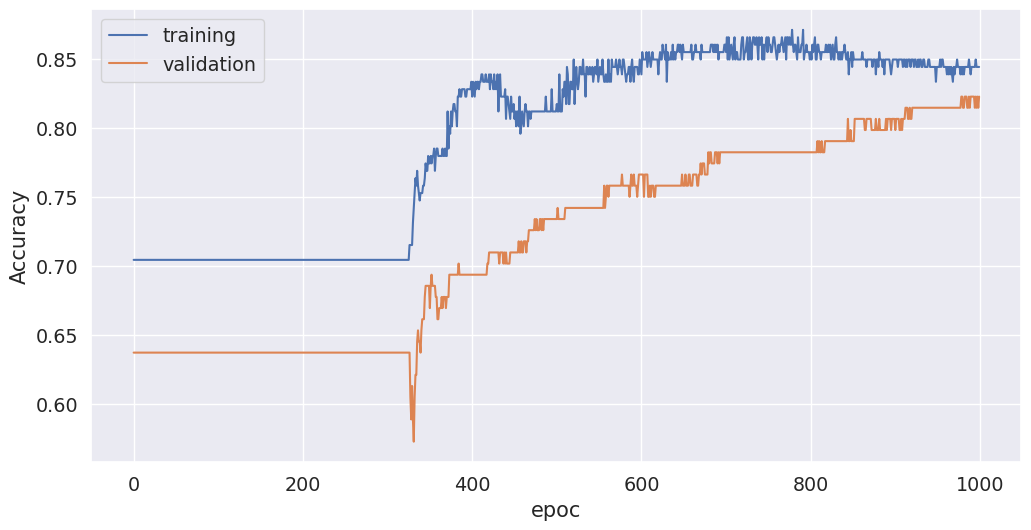

In [107]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Que pasa si quiero guardar los pesos de mi mejor modelo: necesito usar callbacks

In [108]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

EarlyStopping para de entrenar el modelo según una condición sobre la variable monitor

In [109]:
es = EarlyStopping(monitor='val_acc', mode='max')

In [110]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[es],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.4258 - accuracy: 0.3438

186/186 [==============================] - 0s 590us/step - loss: 7.4700 - accuracy: 0.2957 - val_loss: 5.1506 - val_accuracy: 0.3629


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.3238 - accuracy: 0.3438

186/186 [==============================] - 0s 53us/step - loss: 7.1170 - accuracy: 0.2957 - val_loss: 4.9791 - val_accuracy: 0.3629


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.3238 - accuracy: 0.3125

186/186 [==============================] - 0s 52us/step - loss: 6.8908 - accuracy: 0.2957 - val_loss: 4.8458 - val_accuracy: 0.3629


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.0645 - accuracy: 0.1875

186/186 [==============================] - 0s 51us/step - loss: 6.6976 - accuracy: 0.2957 - val_loss: 4.7288 - val_accuracy: 0.3629


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.2305 - accuracy: 0.4062

186/186 [==============================] - 0s 50us/step - loss: 6.5251 - accuracy: 0.2957 - val_loss: 4.6158 - val_accuracy: 0.3629


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.9940 - accuracy: 0.2812

186/186 [==============================] - 0s 49us/step - loss: 6.3569 - accuracy: 0.2957 - val_loss: 4.5043 - val_accuracy: 0.3629


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.6460 - accuracy: 0.1250

186/186 [==============================] - 0s 46us/step - loss: 6.1928 - accuracy: 0.2957 - val_loss: 4.3967 - val_accuracy: 0.3629


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.9647 - accuracy: 0.3438

186/186 [==============================] - 0s 48us/step - loss: 6.0333 - accuracy: 0.2957 - val_loss: 4.2947 - val_accuracy: 0.3629


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.3970 - accuracy: 0.3750



186/186 [==============================] - 0s 45us/step - loss: 5.8743 - accuracy: 0.2957 - val_loss: 4.1945 - val_accuracy: 0.3629


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5744 - accuracy: 0.3438

186/186 [==============================] - 0s 45us/step - loss: 5.7293 - accuracy: 0.2957 - val_loss: 4.0926 - val_accuracy: 0.3629


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.5876 - accuracy: 0.2500

186/186 [==============================] - 0s 44us/step - loss: 5.5865 - accuracy: 0.2957 - val_loss: 3.9811 - val_accuracy: 0.3629


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5737 - accuracy: 0.3750

186/186 [==============================] - 0s 44us/step - loss: 5.4361 - accuracy: 0.2957 - val_loss: 3.8668 - val_accuracy: 0.3629


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.3976 - accuracy: 0.3750

186/186 [==============================] - 0s 48us/step - loss: 5.2859 - accuracy: 0.2957 - val_loss: 3.7485 - val_accuracy: 0.3629


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.4566 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 5.1320 - accuracy: 0.2957 - val_loss: 3.6269 - val_accuracy: 0.3629


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.7414 - accuracy: 0.3438

186/186 [==============================] - 0s 45us/step - loss: 4.9741 - accuracy: 0.2957 - val_loss: 3.5005 - val_accuracy: 0.3629


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.8312 - accuracy: 0.2500

186/186 [==============================] - 0s 46us/step - loss: 4.8137 - accuracy: 0.2957 - val_loss: 3.3727 - val_accuracy: 0.3629


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5093 - accuracy: 0.2500

186/186 [==============================] - 0s 44us/step - loss: 4.6489 - accuracy: 0.2957 - val_loss: 3.2407 - val_accuracy: 0.3629


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.7921 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 4.4845 - accuracy: 0.2957 - val_loss: 3.1116 - val_accuracy: 0.3629


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6233 - accuracy: 0.2500

186/186 [==============================] - 0s 43us/step - loss: 4.3272 - accuracy: 0.2957 - val_loss: 2.9856 - val_accuracy: 0.3629


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.9839 - accuracy: 0.2812

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning




186/186 [==============================] - 0s 50us/step - loss: 4.1709 - accuracy: 0.2957 - val_loss: 2.8593 - val_accuracy: 0.3629


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5716 - accuracy: 0.3438



186/186 [==============================] - 0s 46us/step - loss: 4.0106 - accuracy: 0.2957 - val_loss: 2.7324 - val_accuracy: 0.3629


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8242 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 3.8550 - accuracy: 0.2957 - val_loss: 2.6103 - val_accuracy: 0.3629


Epoch 23/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.2595 - accuracy: 0.3125

186/186 [==============================] - 0s 49us/step - loss: 3.7018 - accuracy: 0.2957 - val_loss: 2.4908 - val_accuracy: 0.3629


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.2337 - accuracy: 0.2188

186/186 [==============================] - 0s 48us/step - loss: 3.5516 - accuracy: 0.2957 - val_loss: 2.3722 - val_accuracy: 0.3629


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.0233 - accuracy: 0.3125

186/186 [==============================] - 0s 49us/step - loss: 3.3998 - accuracy: 0.2957 - val_loss: 2.2513 - val_accuracy: 0.3629


Epoch 26/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.4545 - accuracy: 0.2812

186/186 [==============================] - 0s 48us/step - loss: 3.2474 - accuracy: 0.2957 - val_loss: 2.1345 - val_accuracy: 0.3629


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.6011 - accuracy: 0.2812

186/186 [==============================] - 0s 45us/step - loss: 3.1004 - accuracy: 0.2957 - val_loss: 2.0250 - val_accuracy: 0.3629


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1273 - accuracy: 0.3125

186/186 [==============================] - 0s 47us/step - loss: 2.9560 - accuracy: 0.2957 - val_loss: 1.9175 - val_accuracy: 0.3629


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2930 - accuracy: 0.4062

186/186 [==============================] - 0s 48us/step - loss: 2.8175 - accuracy: 0.2957 - val_loss: 1.8165 - val_accuracy: 0.3629


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5041 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 2.6870 - accuracy: 0.2957 - val_loss: 1.7187 - val_accuracy: 0.3629


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1469 - accuracy: 0.1875

186/186 [==============================] - 0s 48us/step - loss: 2.5593 - accuracy: 0.2957 - val_loss: 1.6253 - val_accuracy: 0.3629


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8142 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 2.4373 - accuracy: 0.2957 - val_loss: 1.5355 - val_accuracy: 0.3629


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7659 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 2.3193 - accuracy: 0.2903 - val_loss: 1.4503 - val_accuracy: 0.3629


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.1929 - accuracy: 0.3438

186/186 [==============================] - 0s 48us/step - loss: 2.2097 - accuracy: 0.2849 - val_loss: 1.3712 - val_accuracy: 0.3629


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.1076 - accuracy: 0.1875

186/186 [==============================] - 0s 48us/step - loss: 2.1082 - accuracy: 0.2957 - val_loss: 1.2969 - val_accuracy: 0.3468


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6111 - accuracy: 0.3750

186/186 [==============================] - 0s 47us/step - loss: 2.0092 - accuracy: 0.2903 - val_loss: 1.2253 - val_accuracy: 0.3548


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8753 - accuracy: 0.1875

186/186 [==============================] - 0s 44us/step - loss: 1.9163 - accuracy: 0.2903 - val_loss: 1.1632 - val_accuracy: 0.3548


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8921 - accuracy: 0.3750

186/186 [==============================] - 0s 44us/step - loss: 1.8312 - accuracy: 0.2903 - val_loss: 1.1042 - val_accuracy: 0.3710


Epoch 39/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.2795 - accuracy: 0.3125

186/186 [==============================] - 0s 52us/step - loss: 1.7503 - accuracy: 0.3387 - val_loss: 1.0509 - val_accuracy: 0.3790


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5064 - accuracy: 0.1875

186/186 [==============================] - 0s 43us/step - loss: 1.6751 - accuracy: 0.3548 - val_loss: 1.0054 - val_accuracy: 0.3548


Epoch 41/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.2230 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 1.6097 - accuracy: 0.3763 - val_loss: 0.9645 - val_accuracy: 0.3306


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0139 - accuracy: 0.4062

186/186 [==============================] - 0s 45us/step - loss: 1.5484 - accuracy: 0.4140 - val_loss: 0.9292 - val_accuracy: 0.3548


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0370 - accuracy: 0.4375

186/186 [==============================] - 0s 47us/step - loss: 1.4914 - accuracy: 0.4409 - val_loss: 0.8989 - val_accuracy: 0.4194


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9541 - accuracy: 0.5000

186/186 [==============================] - 0s 48us/step - loss: 1.4413 - accuracy: 0.4624 - val_loss: 0.8738 - val_accuracy: 0.4194


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8380 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 1.3967 - accuracy: 0.4946 - val_loss: 0.8535 - val_accuracy: 0.4355


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9237 - accuracy: 0.5312

186/186 [==============================] - 0s 45us/step - loss: 1.3552 - accuracy: 0.5161 - val_loss: 0.8358 - val_accuracy: 0.4597


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7202 - accuracy: 0.5312

186/186 [==============================] - 0s 71us/step - loss: 1.3178 - accuracy: 0.5161 - val_loss: 0.8230 - val_accuracy: 0.4839


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9349 - accuracy: 0.5625

186/186 [==============================] - 0s 46us/step - loss: 1.2876 - accuracy: 0.5591 - val_loss: 0.8126 - val_accuracy: 0.5403


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8891 - accuracy: 0.5625

186/186 [==============================] - 0s 47us/step - loss: 1.2604 - accuracy: 0.5753 - val_loss: 0.8038 - val_accuracy: 0.5645


Epoch 50/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6749 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 1.2333 - accuracy: 0.5806 - val_loss: 0.7967 - val_accuracy: 0.5645


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5590 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 1.2093 - accuracy: 0.5968 - val_loss: 0.7915 - val_accuracy: 0.5645


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3097 - accuracy: 0.5625

186/186 [==============================] - 0s 46us/step - loss: 1.1889 - accuracy: 0.6075 - val_loss: 0.7871 - val_accuracy: 0.5645


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9189 - accuracy: 0.5312

186/186 [==============================] - 0s 46us/step - loss: 1.1674 - accuracy: 0.6237 - val_loss: 0.7829 - val_accuracy: 0.5726


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7833 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 1.1467 - accuracy: 0.6290 - val_loss: 0.7787 - val_accuracy: 0.5806


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5676 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 1.1280 - accuracy: 0.6344 - val_loss: 0.7747 - val_accuracy: 0.5887


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7954 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 1.1077 - accuracy: 0.6398 - val_loss: 0.7713 - val_accuracy: 0.5887


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7545 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 1.0915 - accuracy: 0.6505 - val_loss: 0.7678 - val_accuracy: 0.6048


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6721 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 1.0753 - accuracy: 0.6505 - val_loss: 0.7651 - val_accuracy: 0.6048


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6676 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 1.0582 - accuracy: 0.6505 - val_loss: 0.7618 - val_accuracy: 0.6048


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5593 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 1.0422 - accuracy: 0.6505 - val_loss: 0.7583 - val_accuracy: 0.6048


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5973 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 1.0257 - accuracy: 0.6559 - val_loss: 0.7556 - val_accuracy: 0.6048


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7169 - accuracy: 0.5312

186/186 [==============================] - 0s 45us/step - loss: 1.0107 - accuracy: 0.6559 - val_loss: 0.7522 - val_accuracy: 0.6048


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6689 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.9961 - accuracy: 0.6559 - val_loss: 0.7495 - val_accuracy: 0.6048


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5873 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.9804 - accuracy: 0.6613 - val_loss: 0.7462 - val_accuracy: 0.6048


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4893 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.9648 - accuracy: 0.6613 - val_loss: 0.7439 - val_accuracy: 0.6048


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5720 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.9521 - accuracy: 0.6667 - val_loss: 0.7413 - val_accuracy: 0.6129


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7291 - accuracy: 0.5625

186/186 [==============================] - 0s 47us/step - loss: 0.9380 - accuracy: 0.6667 - val_loss: 0.7385 - val_accuracy: 0.6129


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7741 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.9233 - accuracy: 0.6667 - val_loss: 0.7353 - val_accuracy: 0.6129


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6863 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.9094 - accuracy: 0.6720 - val_loss: 0.7324 - val_accuracy: 0.6129


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6590 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.8959 - accuracy: 0.6720 - val_loss: 0.7299 - val_accuracy: 0.6129


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6934 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.8809 - accuracy: 0.6720 - val_loss: 0.7267 - val_accuracy: 0.6129


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6859 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.8670 - accuracy: 0.6720 - val_loss: 0.7239 - val_accuracy: 0.6129


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5931 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.8548 - accuracy: 0.6720 - val_loss: 0.7213 - val_accuracy: 0.6129


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7368 - accuracy: 0.5312

186/186 [==============================] - 0s 49us/step - loss: 0.8403 - accuracy: 0.6720 - val_loss: 0.7192 - val_accuracy: 0.6129


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6444 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 0.8274 - accuracy: 0.6720 - val_loss: 0.7172 - val_accuracy: 0.6129


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6846 - accuracy: 0.6562

186/186 [==============================] - 0s 128us/step - loss: 0.8150 - accuracy: 0.6828 - val_loss: 0.7153 - val_accuracy: 0.6129


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5701 - accuracy: 0.7188



186/186 [==============================] - 0s 44us/step - loss: 0.8026 - accuracy: 0.6828 - val_loss: 0.7125 - val_accuracy: 0.6129


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6985 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.7895 - accuracy: 0.6828 - val_loss: 0.7104 - val_accuracy: 0.6129


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6088 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.7766 - accuracy: 0.6882 - val_loss: 0.7072 - val_accuracy: 0.6129


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.7621 - accuracy: 0.6882 - val_loss: 0.7051 - val_accuracy: 0.6129


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.7508 - accuracy: 0.6882 - val_loss: 0.7024 - val_accuracy: 0.6129


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7858 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.7389 - accuracy: 0.6882 - val_loss: 0.7005 - val_accuracy: 0.6129


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6550 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.7260 - accuracy: 0.6882 - val_loss: 0.6982 - val_accuracy: 0.6129


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7546 - accuracy: 0.5312

186/186 [==============================] - 0s 50us/step - loss: 0.7144 - accuracy: 0.6882 - val_loss: 0.6970 - val_accuracy: 0.6129


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6380 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.7021 - accuracy: 0.6882 - val_loss: 0.6949 - val_accuracy: 0.6129


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4678 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.6908 - accuracy: 0.6882 - val_loss: 0.6929 - val_accuracy: 0.6129


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6276 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6775 - accuracy: 0.6882 - val_loss: 0.6904 - val_accuracy: 0.6129


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7366 - accuracy: 0.6250

186/186 [==============================] - 0s 67us/step - loss: 0.6661 - accuracy: 0.6882 - val_loss: 0.6888 - val_accuracy: 0.6129


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5715 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6536 - accuracy: 0.6882 - val_loss: 0.6868 - val_accuracy: 0.6129


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8080 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6470 - accuracy: 0.6828 - val_loss: 0.6855 - val_accuracy: 0.6129


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5620 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6407 - accuracy: 0.6882 - val_loss: 0.6850 - val_accuracy: 0.6129


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5485 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.6362 - accuracy: 0.6828 - val_loss: 0.6840 - val_accuracy: 0.6129


Epoch 93/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6153 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6293 - accuracy: 0.6882 - val_loss: 0.6815 - val_accuracy: 0.6129


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6128 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6243 - accuracy: 0.6882 - val_loss: 0.6787 - val_accuracy: 0.6129


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8139 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.6181 - accuracy: 0.6935 - val_loss: 0.6756 - val_accuracy: 0.6129


Epoch 96/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4877 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.6140 - accuracy: 0.6935 - val_loss: 0.6735 - val_accuracy: 0.6129


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6074 - accuracy: 0.6989 - val_loss: 0.6712 - val_accuracy: 0.6129


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6414 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6014 - accuracy: 0.6989 - val_loss: 0.6692 - val_accuracy: 0.6129


Epoch 99/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4470 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.5968 - accuracy: 0.6989 - val_loss: 0.6662 - val_accuracy: 0.6129


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7892 - accuracy: 0.5000

186/186 [==============================] - 0s 51us/step - loss: 0.5936 - accuracy: 0.7043 - val_loss: 0.6656 - val_accuracy: 0.6290


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.5880 - accuracy: 0.7097 - val_loss: 0.6633 - val_accuracy: 0.6290


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5853 - accuracy: 0.7097 - val_loss: 0.6601 - val_accuracy: 0.6290


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.5835 - accuracy: 0.7097 - val_loss: 0.6578 - val_accuracy: 0.6290


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5235 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5818 - accuracy: 0.7097 - val_loss: 0.6564 - val_accuracy: 0.6290


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5789 - accuracy: 0.7097 - val_loss: 0.6542 - val_accuracy: 0.6290


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6131 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.5764 - accuracy: 0.7097 - val_loss: 0.6517 - val_accuracy: 0.6290


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5808 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5738 - accuracy: 0.7097 - val_loss: 0.6502 - val_accuracy: 0.6290


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5714 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5718 - accuracy: 0.7097 - val_loss: 0.6467 - val_accuracy: 0.6290


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6026 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.5698 - accuracy: 0.7097 - val_loss: 0.6454 - val_accuracy: 0.6371


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4611 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5684 - accuracy: 0.7097 - val_loss: 0.6438 - val_accuracy: 0.6371


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4988 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5652 - accuracy: 0.7097 - val_loss: 0.6407 - val_accuracy: 0.6371


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6209 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.5627 - accuracy: 0.7097 - val_loss: 0.6378 - val_accuracy: 0.6371


Epoch 113/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5482 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.5608 - accuracy: 0.7097 - val_loss: 0.6351 - val_accuracy: 0.6290


Epoch 114/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6311 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.5586 - accuracy: 0.7097 - val_loss: 0.6332 - val_accuracy: 0.6290


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6585 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.5569 - accuracy: 0.7151 - val_loss: 0.6306 - val_accuracy: 0.6290


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5546 - accuracy: 0.7097 - val_loss: 0.6274 - val_accuracy: 0.6210


Epoch 117/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.5526 - accuracy: 0.7151 - val_loss: 0.6257 - val_accuracy: 0.6210


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4124 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5513 - accuracy: 0.7097 - val_loss: 0.6235 - val_accuracy: 0.6129


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5453 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5483 - accuracy: 0.7151 - val_loss: 0.6225 - val_accuracy: 0.6210


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6601 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.5471 - accuracy: 0.7151 - val_loss: 0.6209 - val_accuracy: 0.6210


Epoch 121/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5102 - accuracy: 0.7500



186/186 [==============================] - 0s 46us/step - loss: 0.5459 - accuracy: 0.7151 - val_loss: 0.6191 - val_accuracy: 0.6210


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5455 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5428 - accuracy: 0.7151 - val_loss: 0.6170 - val_accuracy: 0.6210


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6010 - accuracy: 0.6562



186/186 [==============================] - 0s 45us/step - loss: 0.5413 - accuracy: 0.7204 - val_loss: 0.6165 - val_accuracy: 0.6129


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5476 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5396 - accuracy: 0.7151 - val_loss: 0.6147 - val_accuracy: 0.6210


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5505 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5379 - accuracy: 0.7151 - val_loss: 0.6127 - val_accuracy: 0.6210


Epoch 126/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5641 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5359 - accuracy: 0.7204 - val_loss: 0.6102 - val_accuracy: 0.6129


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6376 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.5339 - accuracy: 0.7366 - val_loss: 0.6093 - val_accuracy: 0.6210


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6724 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.5331 - accuracy: 0.7312 - val_loss: 0.6075 - val_accuracy: 0.6290


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5361 - accuracy: 0.6562



186/186 [==============================] - 0s 45us/step - loss: 0.5302 - accuracy: 0.7366 - val_loss: 0.6058 - val_accuracy: 0.6290


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5845 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.5289 - accuracy: 0.7366 - val_loss: 0.6044 - val_accuracy: 0.6290


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5112 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5278 - accuracy: 0.7366 - val_loss: 0.6025 - val_accuracy: 0.6210


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5238 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.5257 - accuracy: 0.7419 - val_loss: 0.6014 - val_accuracy: 0.6290


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5638 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5236 - accuracy: 0.7419 - val_loss: 0.5998 - val_accuracy: 0.6210


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5430 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5225 - accuracy: 0.7366 - val_loss: 0.5982 - val_accuracy: 0.6210


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.5208 - accuracy: 0.7366 - val_loss: 0.5954 - val_accuracy: 0.6452


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5188 - accuracy: 0.7473 - val_loss: 0.5939 - val_accuracy: 0.6452


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5268 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5167 - accuracy: 0.7419 - val_loss: 0.5922 - val_accuracy: 0.6452


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5008 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5158 - accuracy: 0.7473 - val_loss: 0.5913 - val_accuracy: 0.6452


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5143 - accuracy: 0.7419 - val_loss: 0.5894 - val_accuracy: 0.6452


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5397 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.5123 - accuracy: 0.7473 - val_loss: 0.5882 - val_accuracy: 0.6452


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4546 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5108 - accuracy: 0.7473 - val_loss: 0.5872 - val_accuracy: 0.6452


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4746 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5092 - accuracy: 0.7473 - val_loss: 0.5851 - val_accuracy: 0.6532


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5377 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.5075 - accuracy: 0.7419 - val_loss: 0.5840 - val_accuracy: 0.6532


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5439 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5058 - accuracy: 0.7419 - val_loss: 0.5832 - val_accuracy: 0.6452


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5048 - accuracy: 0.7527 - val_loss: 0.5814 - val_accuracy: 0.6371


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4431 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5032 - accuracy: 0.7419 - val_loss: 0.5803 - val_accuracy: 0.6371


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.5020 - accuracy: 0.7473 - val_loss: 0.5783 - val_accuracy: 0.6290


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.5001 - accuracy: 0.7473 - val_loss: 0.5777 - val_accuracy: 0.6371


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4984 - accuracy: 0.7473 - val_loss: 0.5755 - val_accuracy: 0.6452


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4838 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4971 - accuracy: 0.7419 - val_loss: 0.5742 - val_accuracy: 0.6452


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4955 - accuracy: 0.7527 - val_loss: 0.5731 - val_accuracy: 0.6452


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4939 - accuracy: 0.7473 - val_loss: 0.5714 - val_accuracy: 0.6613


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5151 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4921 - accuracy: 0.7527 - val_loss: 0.5696 - val_accuracy: 0.6532


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.4920 - accuracy: 0.7527 - val_loss: 0.5683 - val_accuracy: 0.6532


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4891 - accuracy: 0.7473 - val_loss: 0.5670 - val_accuracy: 0.6532


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5177 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4877 - accuracy: 0.7527 - val_loss: 0.5660 - val_accuracy: 0.6532


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4997 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.4857 - accuracy: 0.7581 - val_loss: 0.5646 - val_accuracy: 0.6694


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4470 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.4854 - accuracy: 0.7527 - val_loss: 0.5633 - val_accuracy: 0.6774


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4376 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4839 - accuracy: 0.7527 - val_loss: 0.5620 - val_accuracy: 0.6935


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5961 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.4816 - accuracy: 0.7527 - val_loss: 0.5606 - val_accuracy: 0.6935


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6170 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.4806 - accuracy: 0.7634 - val_loss: 0.5598 - val_accuracy: 0.6855


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5135 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4786 - accuracy: 0.7581 - val_loss: 0.5586 - val_accuracy: 0.6855


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4782 - accuracy: 0.7473 - val_loss: 0.5574 - val_accuracy: 0.6855


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.4759 - accuracy: 0.7581 - val_loss: 0.5559 - val_accuracy: 0.6935


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4747 - accuracy: 0.7527 - val_loss: 0.5545 - val_accuracy: 0.6935


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4864 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4736 - accuracy: 0.7634 - val_loss: 0.5536 - val_accuracy: 0.6855


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5622 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 0.4717 - accuracy: 0.7581 - val_loss: 0.5528 - val_accuracy: 0.6935


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4699 - accuracy: 0.7634 - val_loss: 0.5516 - val_accuracy: 0.6855


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4683 - accuracy: 0.7634 - val_loss: 0.5506 - val_accuracy: 0.6855


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4686 - accuracy: 0.7581 - val_loss: 0.5492 - val_accuracy: 0.6855


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4296 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4657 - accuracy: 0.7634 - val_loss: 0.5481 - val_accuracy: 0.6855


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4811 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4643 - accuracy: 0.7634 - val_loss: 0.5469 - val_accuracy: 0.6774


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4441 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4641 - accuracy: 0.7688 - val_loss: 0.5461 - val_accuracy: 0.6694


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4301 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4615 - accuracy: 0.7634 - val_loss: 0.5449 - val_accuracy: 0.6855


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4807 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4605 - accuracy: 0.7634 - val_loss: 0.5438 - val_accuracy: 0.7097


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5561 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 0.4594 - accuracy: 0.7634 - val_loss: 0.5427 - val_accuracy: 0.7016


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4396 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4574 - accuracy: 0.7742 - val_loss: 0.5419 - val_accuracy: 0.7097


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4559 - accuracy: 0.7688 - val_loss: 0.5409 - val_accuracy: 0.7016


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4547 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4545 - accuracy: 0.7634 - val_loss: 0.5398 - val_accuracy: 0.7016


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4535 - accuracy: 0.7581 - val_loss: 0.5386 - val_accuracy: 0.7016


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4877 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.4516 - accuracy: 0.7634 - val_loss: 0.5375 - val_accuracy: 0.7016


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4368 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4505 - accuracy: 0.7688 - val_loss: 0.5364 - val_accuracy: 0.7016


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5183 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.4497 - accuracy: 0.7634 - val_loss: 0.5353 - val_accuracy: 0.7097


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5236 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.4473 - accuracy: 0.7742 - val_loss: 0.5343 - val_accuracy: 0.7016


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4251 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4462 - accuracy: 0.7634 - val_loss: 0.5332 - val_accuracy: 0.7016


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4880 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4445 - accuracy: 0.7796 - val_loss: 0.5323 - val_accuracy: 0.7016


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4434 - accuracy: 0.7742 - val_loss: 0.5312 - val_accuracy: 0.7016


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4422 - accuracy: 0.7742 - val_loss: 0.5301 - val_accuracy: 0.7097


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3926 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4400 - accuracy: 0.7849 - val_loss: 0.5290 - val_accuracy: 0.7097


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4394 - accuracy: 0.7742 - val_loss: 0.5280 - val_accuracy: 0.7097


Epoch 191/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4463 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.4374 - accuracy: 0.7796 - val_loss: 0.5270 - val_accuracy: 0.7097


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4577 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4363 - accuracy: 0.7796 - val_loss: 0.5260 - val_accuracy: 0.7097


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4019 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4347 - accuracy: 0.7796 - val_loss: 0.5251 - val_accuracy: 0.7097


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4550 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.4341 - accuracy: 0.7796 - val_loss: 0.5241 - val_accuracy: 0.7097


Epoch 195/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4327 - accuracy: 0.7957 - val_loss: 0.5232 - val_accuracy: 0.7097


Epoch 196/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4310 - accuracy: 0.7796 - val_loss: 0.5222 - val_accuracy: 0.7097


Epoch 197/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4988 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4292 - accuracy: 0.7849 - val_loss: 0.5214 - val_accuracy: 0.7097


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3735 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4284 - accuracy: 0.7849 - val_loss: 0.5204 - val_accuracy: 0.7097


Epoch 199/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4126 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4272 - accuracy: 0.7742 - val_loss: 0.5197 - val_accuracy: 0.7016


Epoch 200/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4449 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4262 - accuracy: 0.7957 - val_loss: 0.5189 - val_accuracy: 0.7016


Epoch 201/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4892 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4239 - accuracy: 0.7903 - val_loss: 0.5181 - val_accuracy: 0.7016


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4352 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4231 - accuracy: 0.7903 - val_loss: 0.5173 - val_accuracy: 0.7016


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4216 - accuracy: 0.7957 - val_loss: 0.5168 - val_accuracy: 0.7097


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4205 - accuracy: 0.8065 - val_loss: 0.5160 - val_accuracy: 0.7097


Epoch 205/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4185 - accuracy: 0.8011 - val_loss: 0.5151 - val_accuracy: 0.7097


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5020 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4190 - accuracy: 0.7957 - val_loss: 0.5144 - val_accuracy: 0.7177


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4877 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4161 - accuracy: 0.8065 - val_loss: 0.5136 - val_accuracy: 0.7097


Epoch 208/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3737 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.4152 - accuracy: 0.7957 - val_loss: 0.5128 - val_accuracy: 0.7177


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4136 - accuracy: 0.8011 - val_loss: 0.5122 - val_accuracy: 0.7177


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4068 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4122 - accuracy: 0.8011 - val_loss: 0.5113 - val_accuracy: 0.7177


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.4116 - accuracy: 0.8118 - val_loss: 0.5105 - val_accuracy: 0.7177


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4095 - accuracy: 0.8065 - val_loss: 0.5098 - val_accuracy: 0.7177


Epoch 213/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4095 - accuracy: 0.8011 - val_loss: 0.5091 - val_accuracy: 0.7177


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4219 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.4076 - accuracy: 0.8011 - val_loss: 0.5088 - val_accuracy: 0.7177


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.4060 - accuracy: 0.8118 - val_loss: 0.5079 - val_accuracy: 0.7177


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4046 - accuracy: 0.8118 - val_loss: 0.5073 - val_accuracy: 0.7177


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.4038 - accuracy: 0.8172 - val_loss: 0.5067 - val_accuracy: 0.7177


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.4030 - accuracy: 0.7957 - val_loss: 0.5064 - val_accuracy: 0.7177


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4014 - accuracy: 0.8172 - val_loss: 0.5059 - val_accuracy: 0.7177


Epoch 220/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4730 - accuracy: 0.6875



186/186 [==============================] - 0s 54us/step - loss: 0.4017 - accuracy: 0.8118 - val_loss: 0.5056 - val_accuracy: 0.7097


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4023 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3998 - accuracy: 0.8011 - val_loss: 0.5052 - val_accuracy: 0.7097


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3983 - accuracy: 0.8011 - val_loss: 0.5048 - val_accuracy: 0.7097


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3969 - accuracy: 0.8118 - val_loss: 0.5045 - val_accuracy: 0.7177


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3957 - accuracy: 0.8226 - val_loss: 0.5031 - val_accuracy: 0.7177


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3958 - accuracy: 0.8011 - val_loss: 0.5029 - val_accuracy: 0.7258


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3906 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3941 - accuracy: 0.8065 - val_loss: 0.5021 - val_accuracy: 0.7177


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3466 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3936 - accuracy: 0.8011 - val_loss: 0.5018 - val_accuracy: 0.7258


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4710 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.3920 - accuracy: 0.8065 - val_loss: 0.5016 - val_accuracy: 0.7258


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3270 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3917 - accuracy: 0.8118 - val_loss: 0.5014 - val_accuracy: 0.7258


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4825 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3899 - accuracy: 0.8065 - val_loss: 0.5012 - val_accuracy: 0.7258


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3894 - accuracy: 0.8172 - val_loss: 0.5007 - val_accuracy: 0.7258


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3890 - accuracy: 0.8226 - val_loss: 0.5006 - val_accuracy: 0.7339


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4054 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3868 - accuracy: 0.8172 - val_loss: 0.5007 - val_accuracy: 0.7177


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3874 - accuracy: 0.8280 - val_loss: 0.5004 - val_accuracy: 0.7097


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5024 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3850 - accuracy: 0.8387 - val_loss: 0.4995 - val_accuracy: 0.7339


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3842 - accuracy: 0.8226 - val_loss: 0.4996 - val_accuracy: 0.7097


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4682 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3834 - accuracy: 0.8280 - val_loss: 0.4992 - val_accuracy: 0.7097


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3826 - accuracy: 0.8172 - val_loss: 0.4991 - val_accuracy: 0.7016


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3816 - accuracy: 0.8226 - val_loss: 0.4986 - val_accuracy: 0.7016


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3814 - accuracy: 0.8226 - val_loss: 0.4990 - val_accuracy: 0.7016


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3802 - accuracy: 0.8226 - val_loss: 0.4992 - val_accuracy: 0.7016


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3802 - accuracy: 0.8280 - val_loss: 0.4987 - val_accuracy: 0.7016


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3788 - accuracy: 0.8280 - val_loss: 0.4985 - val_accuracy: 0.7016


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3786 - accuracy: 0.8333 - val_loss: 0.4974 - val_accuracy: 0.7016


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3942 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3779 - accuracy: 0.8333 - val_loss: 0.4973 - val_accuracy: 0.7016


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3746 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3764 - accuracy: 0.8280 - val_loss: 0.4972 - val_accuracy: 0.7016


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2134 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3757 - accuracy: 0.8333 - val_loss: 0.4972 - val_accuracy: 0.7016


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3762 - accuracy: 0.8333 - val_loss: 0.4968 - val_accuracy: 0.7016


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3744 - accuracy: 0.8280 - val_loss: 0.4973 - val_accuracy: 0.6935


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4129 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3740 - accuracy: 0.8387 - val_loss: 0.4969 - val_accuracy: 0.6935


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3585 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3733 - accuracy: 0.8441 - val_loss: 0.4952 - val_accuracy: 0.7016


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3729 - accuracy: 0.8441 - val_loss: 0.4942 - val_accuracy: 0.7097


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4356 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3720 - accuracy: 0.8280 - val_loss: 0.4947 - val_accuracy: 0.7016


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2286 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3708 - accuracy: 0.8387 - val_loss: 0.4945 - val_accuracy: 0.7016


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4357 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3716 - accuracy: 0.8333 - val_loss: 0.4947 - val_accuracy: 0.7016


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3703 - accuracy: 0.8441 - val_loss: 0.4941 - val_accuracy: 0.7016


Epoch 257/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3697 - accuracy: 0.8441 - val_loss: 0.4932 - val_accuracy: 0.7016


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3688 - accuracy: 0.8333 - val_loss: 0.4936 - val_accuracy: 0.7016


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4136 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3680 - accuracy: 0.8441 - val_loss: 0.4932 - val_accuracy: 0.7016


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3673 - accuracy: 0.8495 - val_loss: 0.4929 - val_accuracy: 0.7016


Epoch 261/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3670 - accuracy: 0.8441 - val_loss: 0.4923 - val_accuracy: 0.7016


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4318 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3668 - accuracy: 0.8333 - val_loss: 0.4916 - val_accuracy: 0.7016


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3659 - accuracy: 0.8333 - val_loss: 0.4933 - val_accuracy: 0.7016


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3654 - accuracy: 0.8441 - val_loss: 0.4925 - val_accuracy: 0.6935


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3647 - accuracy: 0.8387 - val_loss: 0.4924 - val_accuracy: 0.7016


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2526 - accuracy: 1.0000

186/186 [==============================] - 0s 50us/step - loss: 0.3638 - accuracy: 0.8495 - val_loss: 0.4928 - val_accuracy: 0.6935


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3641 - accuracy: 0.8333 - val_loss: 0.4912 - val_accuracy: 0.7016


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3645 - accuracy: 0.8387 - val_loss: 0.4908 - val_accuracy: 0.7016


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2617 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3630 - accuracy: 0.8333 - val_loss: 0.4922 - val_accuracy: 0.6935


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4668 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3619 - accuracy: 0.8387 - val_loss: 0.4915 - val_accuracy: 0.7016


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3643 - accuracy: 0.8387 - val_loss: 0.4911 - val_accuracy: 0.7016


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3608 - accuracy: 0.8441 - val_loss: 0.4907 - val_accuracy: 0.7016


Epoch 273/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3606 - accuracy: 0.8441 - val_loss: 0.4911 - val_accuracy: 0.6935


Epoch 274/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4200 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3610 - accuracy: 0.8387 - val_loss: 0.4911 - val_accuracy: 0.6935


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3597 - accuracy: 0.8387 - val_loss: 0.4909 - val_accuracy: 0.6935


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3603 - accuracy: 0.8280 - val_loss: 0.4908 - val_accuracy: 0.6935


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3593 - accuracy: 0.8441 - val_loss: 0.4909 - val_accuracy: 0.7016


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3588 - accuracy: 0.8387 - val_loss: 0.4908 - val_accuracy: 0.7016


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3582 - accuracy: 0.8333 - val_loss: 0.4916 - val_accuracy: 0.7016


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4054 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3582 - accuracy: 0.8333 - val_loss: 0.4915 - val_accuracy: 0.7016


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3569 - accuracy: 0.8387 - val_loss: 0.4903 - val_accuracy: 0.7016


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3578 - accuracy: 0.8387 - val_loss: 0.4898 - val_accuracy: 0.7016


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3561 - accuracy: 0.8333 - val_loss: 0.4900 - val_accuracy: 0.7016


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.3553 - accuracy: 0.8333 - val_loss: 0.4896 - val_accuracy: 0.7016


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4586 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3548 - accuracy: 0.8333 - val_loss: 0.4893 - val_accuracy: 0.7016


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3556 - accuracy: 0.8280 - val_loss: 0.4893 - val_accuracy: 0.7016


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3540 - accuracy: 0.8333 - val_loss: 0.4882 - val_accuracy: 0.7016


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2720 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3538 - accuracy: 0.8387 - val_loss: 0.4878 - val_accuracy: 0.7016


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3544 - accuracy: 0.8387 - val_loss: 0.4874 - val_accuracy: 0.7016


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3532 - accuracy: 0.8333 - val_loss: 0.4881 - val_accuracy: 0.7016


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4087 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3529 - accuracy: 0.8280 - val_loss: 0.4883 - val_accuracy: 0.7016


Epoch 292/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3525 - accuracy: 0.8387 - val_loss: 0.4887 - val_accuracy: 0.7016


Epoch 293/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3523 - accuracy: 0.8280 - val_loss: 0.4877 - val_accuracy: 0.7016


Epoch 294/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3519 - accuracy: 0.8280 - val_loss: 0.4871 - val_accuracy: 0.7016


Epoch 295/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2997 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3504 - accuracy: 0.8280 - val_loss: 0.4873 - val_accuracy: 0.7016


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3507 - accuracy: 0.8333 - val_loss: 0.4870 - val_accuracy: 0.7016


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3501 - accuracy: 0.8280 - val_loss: 0.4867 - val_accuracy: 0.7016


Epoch 298/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.4878 - val_accuracy: 0.7016


Epoch 299/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3501 - accuracy: 0.8280 - val_loss: 0.4865 - val_accuracy: 0.7016


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3486 - accuracy: 0.8172 - val_loss: 0.4849 - val_accuracy: 0.7016


Epoch 301/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4582 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.3484 - accuracy: 0.8333 - val_loss: 0.4863 - val_accuracy: 0.7016


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3478 - accuracy: 0.8333 - val_loss: 0.4865 - val_accuracy: 0.7016


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3471 - accuracy: 0.8280 - val_loss: 0.4860 - val_accuracy: 0.7016


Epoch 304/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3465 - accuracy: 0.8226 - val_loss: 0.4850 - val_accuracy: 0.7016


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3482 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3463 - accuracy: 0.8226 - val_loss: 0.4852 - val_accuracy: 0.7016


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2715 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3463 - accuracy: 0.8226 - val_loss: 0.4852 - val_accuracy: 0.7016


Epoch 307/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3455 - accuracy: 0.8226 - val_loss: 0.4867 - val_accuracy: 0.7097


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3447 - accuracy: 0.8226 - val_loss: 0.4846 - val_accuracy: 0.7016


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3454 - accuracy: 0.8226 - val_loss: 0.4844 - val_accuracy: 0.7016


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3448 - accuracy: 0.8226 - val_loss: 0.4840 - val_accuracy: 0.7016


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3443 - accuracy: 0.8226 - val_loss: 0.4844 - val_accuracy: 0.7016


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3849 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3430 - accuracy: 0.8226 - val_loss: 0.4835 - val_accuracy: 0.7016


Epoch 313/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3436 - accuracy: 0.8226 - val_loss: 0.4844 - val_accuracy: 0.7016


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3433 - accuracy: 0.8280 - val_loss: 0.4857 - val_accuracy: 0.7097


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3424 - accuracy: 0.8226 - val_loss: 0.4850 - val_accuracy: 0.7097


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3695 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3427 - accuracy: 0.8226 - val_loss: 0.4840 - val_accuracy: 0.7097


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3422 - accuracy: 0.8172 - val_loss: 0.4850 - val_accuracy: 0.7097


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3414 - accuracy: 0.8226 - val_loss: 0.4842 - val_accuracy: 0.7097


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3795 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3413 - accuracy: 0.8280 - val_loss: 0.4837 - val_accuracy: 0.7097


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4171 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3402 - accuracy: 0.8280 - val_loss: 0.4823 - val_accuracy: 0.7016


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4791 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3402 - accuracy: 0.8280 - val_loss: 0.4828 - val_accuracy: 0.7016


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3405 - accuracy: 0.8280 - val_loss: 0.4815 - val_accuracy: 0.7016


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2078 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.3399 - accuracy: 0.8226 - val_loss: 0.4821 - val_accuracy: 0.7016


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2492 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3396 - accuracy: 0.8280 - val_loss: 0.4829 - val_accuracy: 0.7097


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3393 - accuracy: 0.8280 - val_loss: 0.4827 - val_accuracy: 0.7097


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3390 - accuracy: 0.8280 - val_loss: 0.4831 - val_accuracy: 0.7097


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4178 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3388 - accuracy: 0.8280 - val_loss: 0.4819 - val_accuracy: 0.7097


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3380 - accuracy: 0.8280 - val_loss: 0.4823 - val_accuracy: 0.7097


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4221 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3391 - accuracy: 0.8280 - val_loss: 0.4822 - val_accuracy: 0.7097


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4582 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3381 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.7097


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3370 - accuracy: 0.8280 - val_loss: 0.4825 - val_accuracy: 0.7097


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1932 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3369 - accuracy: 0.8280 - val_loss: 0.4840 - val_accuracy: 0.7016


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3370 - accuracy: 0.8226 - val_loss: 0.4822 - val_accuracy: 0.7097


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3370 - accuracy: 0.8333 - val_loss: 0.4815 - val_accuracy: 0.7097


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.4822 - val_accuracy: 0.7097


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4120 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3385 - accuracy: 0.8280 - val_loss: 0.4825 - val_accuracy: 0.7097


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3355 - accuracy: 0.8280 - val_loss: 0.4813 - val_accuracy: 0.7097


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3374 - accuracy: 0.8172 - val_loss: 0.4818 - val_accuracy: 0.7097


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3353 - accuracy: 0.8333 - val_loss: 0.4825 - val_accuracy: 0.7016


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2704 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3356 - accuracy: 0.8280 - val_loss: 0.4838 - val_accuracy: 0.6935


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2429 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.3356 - accuracy: 0.8226 - val_loss: 0.4820 - val_accuracy: 0.7097


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3738 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3356 - accuracy: 0.8280 - val_loss: 0.4818 - val_accuracy: 0.7097


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3345 - accuracy: 0.8280 - val_loss: 0.4807 - val_accuracy: 0.7097


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3351 - accuracy: 0.8226 - val_loss: 0.4806 - val_accuracy: 0.7097


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3341 - accuracy: 0.8280 - val_loss: 0.4796 - val_accuracy: 0.7097


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3364 - accuracy: 0.8333 - val_loss: 0.4798 - val_accuracy: 0.7097


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3334 - accuracy: 0.8280 - val_loss: 0.4792 - val_accuracy: 0.7097


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4142 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3350 - accuracy: 0.8226 - val_loss: 0.4794 - val_accuracy: 0.7097


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3333 - accuracy: 0.8280 - val_loss: 0.4803 - val_accuracy: 0.7097


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3351 - accuracy: 0.8280 - val_loss: 0.4802 - val_accuracy: 0.7097


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3336 - accuracy: 0.8280 - val_loss: 0.4794 - val_accuracy: 0.7097


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3062 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3336 - accuracy: 0.8280 - val_loss: 0.4795 - val_accuracy: 0.7097


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3328 - accuracy: 0.8226 - val_loss: 0.4779 - val_accuracy: 0.7097


Epoch 354/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3332 - accuracy: 0.8280 - val_loss: 0.4792 - val_accuracy: 0.7097


Epoch 355/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3328 - accuracy: 0.8333 - val_loss: 0.4795 - val_accuracy: 0.7016


Epoch 356/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3326 - accuracy: 0.8280 - val_loss: 0.4793 - val_accuracy: 0.7016


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3517 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3333 - accuracy: 0.8172 - val_loss: 0.4783 - val_accuracy: 0.7097


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5096 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3323 - accuracy: 0.8333 - val_loss: 0.4787 - val_accuracy: 0.7016


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3315 - accuracy: 0.8280 - val_loss: 0.4791 - val_accuracy: 0.7016


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3326 - accuracy: 0.8172 - val_loss: 0.4775 - val_accuracy: 0.7097


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3313 - accuracy: 0.8280 - val_loss: 0.4773 - val_accuracy: 0.7097


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1805 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3317 - accuracy: 0.8280 - val_loss: 0.4766 - val_accuracy: 0.7097


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3319 - accuracy: 0.8172 - val_loss: 0.4762 - val_accuracy: 0.7097


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3309 - accuracy: 0.8226 - val_loss: 0.4763 - val_accuracy: 0.7097


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3954 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.3310 - accuracy: 0.8280 - val_loss: 0.4755 - val_accuracy: 0.7016


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3313 - accuracy: 0.8280 - val_loss: 0.4769 - val_accuracy: 0.7016


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2404 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3316 - accuracy: 0.8172 - val_loss: 0.4758 - val_accuracy: 0.7097


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3307 - accuracy: 0.8226 - val_loss: 0.4745 - val_accuracy: 0.7016


Epoch 369/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2993 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3306 - accuracy: 0.8280 - val_loss: 0.4751 - val_accuracy: 0.7097


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4167 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3296 - accuracy: 0.8280 - val_loss: 0.4760 - val_accuracy: 0.7016


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3297 - accuracy: 0.8280 - val_loss: 0.4770 - val_accuracy: 0.7097


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3290 - accuracy: 0.8280 - val_loss: 0.4762 - val_accuracy: 0.7016


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3290 - accuracy: 0.8280 - val_loss: 0.4761 - val_accuracy: 0.7016


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3306 - accuracy: 0.8226 - val_loss: 0.4755 - val_accuracy: 0.7016


Epoch 375/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3286 - accuracy: 0.8280 - val_loss: 0.4758 - val_accuracy: 0.7016


Epoch 376/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3305 - accuracy: 0.8280 - val_loss: 0.4747 - val_accuracy: 0.7016


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3283 - accuracy: 0.8226 - val_loss: 0.4757 - val_accuracy: 0.7097


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2331 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3292 - accuracy: 0.8226 - val_loss: 0.4755 - val_accuracy: 0.7097


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4057 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.3288 - accuracy: 0.8280 - val_loss: 0.4765 - val_accuracy: 0.7097


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3280 - accuracy: 0.8226 - val_loss: 0.4748 - val_accuracy: 0.7097


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3289 - accuracy: 0.8387 - val_loss: 0.4764 - val_accuracy: 0.7097


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3620 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3279 - accuracy: 0.8226 - val_loss: 0.4738 - val_accuracy: 0.7097


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8750

186/186 [==============================] - 0s 91us/step - loss: 0.3289 - accuracy: 0.8280 - val_loss: 0.4724 - val_accuracy: 0.7016


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3288 - accuracy: 0.8226 - val_loss: 0.4731 - val_accuracy: 0.7016


Epoch 385/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2202 - accuracy: 0.9062

186/186 [==============================] - 0s 72us/step - loss: 0.3276 - accuracy: 0.8226 - val_loss: 0.4749 - val_accuracy: 0.7097


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.3276 - accuracy: 0.8280 - val_loss: 0.4740 - val_accuracy: 0.7097


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 0.3281 - accuracy: 0.8226 - val_loss: 0.4732 - val_accuracy: 0.7097


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3276 - accuracy: 0.8226 - val_loss: 0.4724 - val_accuracy: 0.7097


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3273 - accuracy: 0.8226 - val_loss: 0.4729 - val_accuracy: 0.7097


Epoch 390/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4165 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.3267 - accuracy: 0.8280 - val_loss: 0.4738 - val_accuracy: 0.7097


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4065 - accuracy: 0.7188

186/186 [==============================] - 0s 67us/step - loss: 0.3265 - accuracy: 0.8226 - val_loss: 0.4750 - val_accuracy: 0.7097


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1990 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3263 - accuracy: 0.8226 - val_loss: 0.4722 - val_accuracy: 0.7097


Epoch 393/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3272 - accuracy: 0.8280 - val_loss: 0.4724 - val_accuracy: 0.7097


Epoch 394/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 0.3273 - accuracy: 0.8226 - val_loss: 0.4725 - val_accuracy: 0.7097


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3878 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3265 - accuracy: 0.8333 - val_loss: 0.4734 - val_accuracy: 0.7097


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.3258 - accuracy: 0.8280 - val_loss: 0.4732 - val_accuracy: 0.7097


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8438

186/186 [==============================] - 0s 70us/step - loss: 0.3264 - accuracy: 0.8280 - val_loss: 0.4728 - val_accuracy: 0.7097


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3504 - accuracy: 0.7500

186/186 [==============================] - 0s 94us/step - loss: 0.3263 - accuracy: 0.8226 - val_loss: 0.4723 - val_accuracy: 0.7097


Epoch 399/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8438

186/186 [==============================] - 0s 101us/step - loss: 0.3254 - accuracy: 0.8226 - val_loss: 0.4732 - val_accuracy: 0.7097


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8125

186/186 [==============================] - 0s 98us/step - loss: 0.3251 - accuracy: 0.8280 - val_loss: 0.4718 - val_accuracy: 0.7097


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.3251 - accuracy: 0.8226 - val_loss: 0.4719 - val_accuracy: 0.7097


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3250 - accuracy: 0.8226 - val_loss: 0.4716 - val_accuracy: 0.7097


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3250 - accuracy: 0.8226 - val_loss: 0.4709 - val_accuracy: 0.7097


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3259 - accuracy: 0.8441 - val_loss: 0.4712 - val_accuracy: 0.7097


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3251 - accuracy: 0.8226 - val_loss: 0.4714 - val_accuracy: 0.7097


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.9688

186/186 [==============================] - 0s 60us/step - loss: 0.3263 - accuracy: 0.8280 - val_loss: 0.4716 - val_accuracy: 0.7097


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8125

186/186 [==============================] - 0s 94us/step - loss: 0.3245 - accuracy: 0.8226 - val_loss: 0.4704 - val_accuracy: 0.7097


Epoch 408/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8438

186/186 [==============================] - 0s 105us/step - loss: 0.3250 - accuracy: 0.8172 - val_loss: 0.4688 - val_accuracy: 0.7097


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4186 - accuracy: 0.7812

186/186 [==============================] - 0s 80us/step - loss: 0.3246 - accuracy: 0.8387 - val_loss: 0.4700 - val_accuracy: 0.7097


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3243 - accuracy: 0.8226 - val_loss: 0.4690 - val_accuracy: 0.7097


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3241 - accuracy: 0.8280 - val_loss: 0.4687 - val_accuracy: 0.7097


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.7812

186/186 [==============================] - 0s 103us/step - loss: 0.3241 - accuracy: 0.8280 - val_loss: 0.4696 - val_accuracy: 0.7097


Epoch 413/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.8125

186/186 [==============================] - 0s 78us/step - loss: 0.3251 - accuracy: 0.8280 - val_loss: 0.4689 - val_accuracy: 0.7097


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3233 - accuracy: 0.8226 - val_loss: 0.4683 - val_accuracy: 0.7097


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3244 - accuracy: 0.8387 - val_loss: 0.4689 - val_accuracy: 0.7097


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3235 - accuracy: 0.8226 - val_loss: 0.4680 - val_accuracy: 0.7097


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3233 - accuracy: 0.8333 - val_loss: 0.4693 - val_accuracy: 0.7097


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3488 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3238 - accuracy: 0.8280 - val_loss: 0.4679 - val_accuracy: 0.7097


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.8750

186/186 [==============================] - 0s 89us/step - loss: 0.3237 - accuracy: 0.8226 - val_loss: 0.4660 - val_accuracy: 0.7016


Epoch 420/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8750

186/186 [==============================] - 0s 106us/step - loss: 0.3256 - accuracy: 0.8333 - val_loss: 0.4674 - val_accuracy: 0.7097


Epoch 421/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2852 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.3235 - accuracy: 0.8333 - val_loss: 0.4679 - val_accuracy: 0.7097


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3236 - accuracy: 0.8333 - val_loss: 0.4693 - val_accuracy: 0.7097


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3227 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.3231 - accuracy: 0.8280 - val_loss: 0.4673 - val_accuracy: 0.7097


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3222 - accuracy: 0.8226 - val_loss: 0.4670 - val_accuracy: 0.7097


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.3226 - accuracy: 0.8333 - val_loss: 0.4682 - val_accuracy: 0.7097


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.7812

186/186 [==============================] - 0s 93us/step - loss: 0.3223 - accuracy: 0.8226 - val_loss: 0.4661 - val_accuracy: 0.7097


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.7500

186/186 [==============================] - 0s 99us/step - loss: 0.3230 - accuracy: 0.8495 - val_loss: 0.4685 - val_accuracy: 0.7097


Epoch 428/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8125

186/186 [==============================] - 0s 73us/step - loss: 0.3223 - accuracy: 0.8226 - val_loss: 0.4676 - val_accuracy: 0.7097


Epoch 429/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.3221 - accuracy: 0.8226 - val_loss: 0.4661 - val_accuracy: 0.7097


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4102 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3236 - accuracy: 0.8333 - val_loss: 0.4655 - val_accuracy: 0.7097


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.3228 - accuracy: 0.8387 - val_loss: 0.4656 - val_accuracy: 0.7097


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3224 - accuracy: 0.8387 - val_loss: 0.4665 - val_accuracy: 0.7097


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4599 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.3222 - accuracy: 0.8280 - val_loss: 0.4662 - val_accuracy: 0.7097


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.3218 - accuracy: 0.8387 - val_loss: 0.4678 - val_accuracy: 0.7097


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.3218 - accuracy: 0.8387 - val_loss: 0.4678 - val_accuracy: 0.7097


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.3222 - accuracy: 0.8226 - val_loss: 0.4660 - val_accuracy: 0.7097


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2568 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3220 - accuracy: 0.8333 - val_loss: 0.4656 - val_accuracy: 0.7097


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3209 - accuracy: 0.8333 - val_loss: 0.4656 - val_accuracy: 0.7097


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3233 - accuracy: 0.8280 - val_loss: 0.4649 - val_accuracy: 0.7097


Epoch 440/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.3206 - accuracy: 0.8333 - val_loss: 0.4652 - val_accuracy: 0.7097


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3421 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3210 - accuracy: 0.8387 - val_loss: 0.4668 - val_accuracy: 0.7097


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3222 - accuracy: 0.8387 - val_loss: 0.4678 - val_accuracy: 0.7097


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3215 - accuracy: 0.8387 - val_loss: 0.4682 - val_accuracy: 0.7097


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3204 - accuracy: 0.8280 - val_loss: 0.4680 - val_accuracy: 0.7097


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4012 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3203 - accuracy: 0.8280 - val_loss: 0.4657 - val_accuracy: 0.7097


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3205 - accuracy: 0.8387 - val_loss: 0.4665 - val_accuracy: 0.7097


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3220 - accuracy: 0.8226 - val_loss: 0.4644 - val_accuracy: 0.7097


Epoch 448/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4600 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3206 - accuracy: 0.8333 - val_loss: 0.4654 - val_accuracy: 0.7097


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2173 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3209 - accuracy: 0.8387 - val_loss: 0.4652 - val_accuracy: 0.7097


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3206 - accuracy: 0.8226 - val_loss: 0.4638 - val_accuracy: 0.7097


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3201 - accuracy: 0.8387 - val_loss: 0.4648 - val_accuracy: 0.7097


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3205 - accuracy: 0.8333 - val_loss: 0.4656 - val_accuracy: 0.7097


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3195 - accuracy: 0.8280 - val_loss: 0.4647 - val_accuracy: 0.7097


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4644 - accuracy: 0.7188



186/186 [==============================] - 0s 48us/step - loss: 0.3199 - accuracy: 0.8280 - val_loss: 0.4627 - val_accuracy: 0.7097


Epoch 455/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3203 - accuracy: 0.8333 - val_loss: 0.4630 - val_accuracy: 0.7097


Epoch 456/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3195 - accuracy: 0.8333 - val_loss: 0.4618 - val_accuracy: 0.7016


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3196 - accuracy: 0.8387 - val_loss: 0.4630 - val_accuracy: 0.7097


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3230 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3194 - accuracy: 0.8333 - val_loss: 0.4624 - val_accuracy: 0.7097


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3194 - accuracy: 0.8441 - val_loss: 0.4632 - val_accuracy: 0.7097


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2993 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3188 - accuracy: 0.8333 - val_loss: 0.4625 - val_accuracy: 0.7097


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3195 - accuracy: 0.8387 - val_loss: 0.4651 - val_accuracy: 0.7097


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3196 - accuracy: 0.8226 - val_loss: 0.4635 - val_accuracy: 0.7097


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3197 - accuracy: 0.8333 - val_loss: 0.4643 - val_accuracy: 0.7097


Epoch 464/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3187 - accuracy: 0.8333 - val_loss: 0.4633 - val_accuracy: 0.7097


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3197 - accuracy: 0.8333 - val_loss: 0.4638 - val_accuracy: 0.7097


Epoch 466/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.3185 - accuracy: 0.8280 - val_loss: 0.4631 - val_accuracy: 0.7097


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2429 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3187 - accuracy: 0.8387 - val_loss: 0.4632 - val_accuracy: 0.7097


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3188 - accuracy: 0.8387 - val_loss: 0.4647 - val_accuracy: 0.7097


Epoch 469/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.3186 - accuracy: 0.8387 - val_loss: 0.4660 - val_accuracy: 0.7097


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.7500



186/186 [==============================] - 0s 45us/step - loss: 0.3185 - accuracy: 0.8280 - val_loss: 0.4634 - val_accuracy: 0.7097


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3185 - accuracy: 0.8280 - val_loss: 0.4622 - val_accuracy: 0.7097


Epoch 472/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3187 - accuracy: 0.8387 - val_loss: 0.4636 - val_accuracy: 0.7097


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3186 - accuracy: 0.8333 - val_loss: 0.4643 - val_accuracy: 0.7097


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3845 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3185 - accuracy: 0.8333 - val_loss: 0.4624 - val_accuracy: 0.7097


Epoch 475/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2672 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.3185 - accuracy: 0.8333 - val_loss: 0.4608 - val_accuracy: 0.7097


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3182 - accuracy: 0.8441 - val_loss: 0.4625 - val_accuracy: 0.7097


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3183 - accuracy: 0.8387 - val_loss: 0.4599 - val_accuracy: 0.7097


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3868 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3178 - accuracy: 0.8333 - val_loss: 0.4606 - val_accuracy: 0.7097


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2329 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3182 - accuracy: 0.8333 - val_loss: 0.4603 - val_accuracy: 0.7097


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3061 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3179 - accuracy: 0.8387 - val_loss: 0.4617 - val_accuracy: 0.7097


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3177 - accuracy: 0.8333 - val_loss: 0.4610 - val_accuracy: 0.7097


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3953 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.3173 - accuracy: 0.8333 - val_loss: 0.4599 - val_accuracy: 0.7097


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3178 - accuracy: 0.8333 - val_loss: 0.4597 - val_accuracy: 0.7097


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3176 - accuracy: 0.8387 - val_loss: 0.4591 - val_accuracy: 0.7097


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3175 - accuracy: 0.8387 - val_loss: 0.4601 - val_accuracy: 0.7097


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3173 - accuracy: 0.8333 - val_loss: 0.4605 - val_accuracy: 0.7097


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3168 - accuracy: 0.8333 - val_loss: 0.4599 - val_accuracy: 0.7097


Epoch 488/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3170 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7016


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3183 - accuracy: 0.8333 - val_loss: 0.4594 - val_accuracy: 0.7097


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.3171 - accuracy: 0.8387 - val_loss: 0.4592 - val_accuracy: 0.7097


Epoch 491/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4195 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3170 - accuracy: 0.8333 - val_loss: 0.4590 - val_accuracy: 0.7097


Epoch 492/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2351 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3170 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7016


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3170 - accuracy: 0.8387 - val_loss: 0.4588 - val_accuracy: 0.7097


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3173 - accuracy: 0.8441 - val_loss: 0.4599 - val_accuracy: 0.7097


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3167 - accuracy: 0.8441 - val_loss: 0.4604 - val_accuracy: 0.7097


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3168 - accuracy: 0.8387 - val_loss: 0.4603 - val_accuracy: 0.7097


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2363 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3167 - accuracy: 0.8441 - val_loss: 0.4610 - val_accuracy: 0.7097


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2321 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3173 - accuracy: 0.8333 - val_loss: 0.4597 - val_accuracy: 0.7097


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3167 - accuracy: 0.8333 - val_loss: 0.4596 - val_accuracy: 0.7097


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3159 - accuracy: 0.8387 - val_loss: 0.4608 - val_accuracy: 0.7097


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3164 - accuracy: 0.8333 - val_loss: 0.4606 - val_accuracy: 0.7097


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3155 - accuracy: 0.8333 - val_loss: 0.4602 - val_accuracy: 0.7097


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3416 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3156 - accuracy: 0.8333 - val_loss: 0.4591 - val_accuracy: 0.7097


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2797 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3160 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7097


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2588 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3165 - accuracy: 0.8387 - val_loss: 0.4603 - val_accuracy: 0.7097


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3167 - accuracy: 0.8495 - val_loss: 0.4615 - val_accuracy: 0.7097


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3154 - accuracy: 0.8387 - val_loss: 0.4601 - val_accuracy: 0.7097


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2641 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3155 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7097


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3160 - accuracy: 0.8441 - val_loss: 0.4593 - val_accuracy: 0.7097


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3159 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7097


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2537 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3156 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7097


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3614 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3162 - accuracy: 0.8333 - val_loss: 0.4576 - val_accuracy: 0.7097


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4336 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3150 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.7097


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3159 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7097


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2360 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3152 - accuracy: 0.8441 - val_loss: 0.4586 - val_accuracy: 0.7097


Epoch 516/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2978 - accuracy: 0.7812

186/186 [==============================] - 0s 74us/step - loss: 0.3147 - accuracy: 0.8441 - val_loss: 0.4595 - val_accuracy: 0.7097


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3157 - accuracy: 0.8441 - val_loss: 0.4605 - val_accuracy: 0.7097


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3151 - accuracy: 0.8441 - val_loss: 0.4622 - val_accuracy: 0.7097


Epoch 519/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3156 - accuracy: 0.8387 - val_loss: 0.4587 - val_accuracy: 0.7097


Epoch 520/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3978 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3148 - accuracy: 0.8441 - val_loss: 0.4570 - val_accuracy: 0.7097


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2126 - accuracy: 0.9688

186/186 [==============================] - 0s 42us/step - loss: 0.3147 - accuracy: 0.8441 - val_loss: 0.4554 - val_accuracy: 0.7097


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3145 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7097


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3146 - accuracy: 0.8441 - val_loss: 0.4594 - val_accuracy: 0.7097


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3152 - accuracy: 0.8441 - val_loss: 0.4596 - val_accuracy: 0.7097


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2808 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3146 - accuracy: 0.8441 - val_loss: 0.4598 - val_accuracy: 0.7097


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.3141 - accuracy: 0.8441 - val_loss: 0.4590 - val_accuracy: 0.7097


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3143 - accuracy: 0.8441 - val_loss: 0.4589 - val_accuracy: 0.7097


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3141 - accuracy: 0.8387 - val_loss: 0.4605 - val_accuracy: 0.7097


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3108 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3141 - accuracy: 0.8333 - val_loss: 0.4567 - val_accuracy: 0.7097


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3144 - accuracy: 0.8387 - val_loss: 0.4557 - val_accuracy: 0.7097


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4052 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3143 - accuracy: 0.8441 - val_loss: 0.4564 - val_accuracy: 0.7097


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3140 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7097


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3144 - accuracy: 0.8441 - val_loss: 0.4561 - val_accuracy: 0.7097


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2316 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3137 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7097


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3139 - accuracy: 0.8441 - val_loss: 0.4596 - val_accuracy: 0.7097


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3153 - accuracy: 0.8333 - val_loss: 0.4568 - val_accuracy: 0.7097


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2400 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3137 - accuracy: 0.8441 - val_loss: 0.4564 - val_accuracy: 0.7097


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3140 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7097


Epoch 539/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3948 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3139 - accuracy: 0.8387 - val_loss: 0.4566 - val_accuracy: 0.7097


Epoch 540/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3132 - accuracy: 0.8548 - val_loss: 0.4578 - val_accuracy: 0.7097


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3140 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7097


Epoch 542/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3132 - accuracy: 0.8441 - val_loss: 0.4570 - val_accuracy: 0.7097


Epoch 543/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3140 - accuracy: 0.8441 - val_loss: 0.4550 - val_accuracy: 0.7097


Epoch 544/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3134 - accuracy: 0.8441 - val_loss: 0.4541 - val_accuracy: 0.7177


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3201 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3134 - accuracy: 0.8495 - val_loss: 0.4550 - val_accuracy: 0.7097


Epoch 546/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2029 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3130 - accuracy: 0.8495 - val_loss: 0.4544 - val_accuracy: 0.7177


Epoch 547/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3125 - accuracy: 0.8441 - val_loss: 0.4537 - val_accuracy: 0.7177


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2610 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3137 - accuracy: 0.8495 - val_loss: 0.4548 - val_accuracy: 0.7097


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3122 - accuracy: 0.8441 - val_loss: 0.4532 - val_accuracy: 0.7177


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3137 - accuracy: 0.8548 - val_loss: 0.4530 - val_accuracy: 0.7177


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3530 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3146 - accuracy: 0.8495 - val_loss: 0.4546 - val_accuracy: 0.7097


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.3129 - accuracy: 0.8548 - val_loss: 0.4549 - val_accuracy: 0.7097


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3123 - accuracy: 0.8441 - val_loss: 0.4548 - val_accuracy: 0.7097


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.3121 - accuracy: 0.8441 - val_loss: 0.4551 - val_accuracy: 0.7097


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2328 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3125 - accuracy: 0.8441 - val_loss: 0.4539 - val_accuracy: 0.7177


Epoch 556/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3134 - accuracy: 0.8495 - val_loss: 0.4557 - val_accuracy: 0.7097


Epoch 557/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3144 - accuracy: 0.8495 - val_loss: 0.4544 - val_accuracy: 0.7177


Epoch 558/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3125 - accuracy: 0.8495 - val_loss: 0.4554 - val_accuracy: 0.7097


Epoch 559/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3121 - accuracy: 0.8441 - val_loss: 0.4538 - val_accuracy: 0.7177


Epoch 560/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3119 - accuracy: 0.8495 - val_loss: 0.4541 - val_accuracy: 0.7177


Epoch 561/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3121 - accuracy: 0.8441 - val_loss: 0.4530 - val_accuracy: 0.7177


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2783 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3117 - accuracy: 0.8495 - val_loss: 0.4548 - val_accuracy: 0.7097


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3122 - accuracy: 0.8441 - val_loss: 0.4539 - val_accuracy: 0.7177


Epoch 564/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3123 - accuracy: 0.8441 - val_loss: 0.4516 - val_accuracy: 0.7097


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2870 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3116 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7097


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2233 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3122 - accuracy: 0.8441 - val_loss: 0.4535 - val_accuracy: 0.7177


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3116 - accuracy: 0.8495 - val_loss: 0.4541 - val_accuracy: 0.7177


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3122 - accuracy: 0.8495 - val_loss: 0.4535 - val_accuracy: 0.7177


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3114 - accuracy: 0.8441 - val_loss: 0.4535 - val_accuracy: 0.7177


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3110 - accuracy: 0.8441 - val_loss: 0.4516 - val_accuracy: 0.7177


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3085 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3125 - accuracy: 0.8441 - val_loss: 0.4511 - val_accuracy: 0.7177


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3119 - accuracy: 0.8495 - val_loss: 0.4518 - val_accuracy: 0.7177


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3114 - accuracy: 0.8495 - val_loss: 0.4510 - val_accuracy: 0.7177


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3116 - accuracy: 0.8495 - val_loss: 0.4515 - val_accuracy: 0.7177


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3120 - accuracy: 0.8495 - val_loss: 0.4518 - val_accuracy: 0.7177


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3113 - accuracy: 0.8602 - val_loss: 0.4544 - val_accuracy: 0.7097


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2289 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3111 - accuracy: 0.8441 - val_loss: 0.4544 - val_accuracy: 0.7097


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3507 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.3113 - accuracy: 0.8495 - val_loss: 0.4541 - val_accuracy: 0.7177


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3108 - accuracy: 0.8495 - val_loss: 0.4551 - val_accuracy: 0.7097


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3118 - accuracy: 0.8495 - val_loss: 0.4553 - val_accuracy: 0.7097


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3151 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3122 - accuracy: 0.8441 - val_loss: 0.4524 - val_accuracy: 0.7177


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2834 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3106 - accuracy: 0.8441 - val_loss: 0.4512 - val_accuracy: 0.7177


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3108 - accuracy: 0.8495 - val_loss: 0.4529 - val_accuracy: 0.7177


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3106 - accuracy: 0.8495 - val_loss: 0.4506 - val_accuracy: 0.7177


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2367 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3109 - accuracy: 0.8495 - val_loss: 0.4506 - val_accuracy: 0.7177


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3106 - accuracy: 0.8548 - val_loss: 0.4526 - val_accuracy: 0.7177


Epoch 587/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4148 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3104 - accuracy: 0.8495 - val_loss: 0.4520 - val_accuracy: 0.7177


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2455 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.3108 - accuracy: 0.8548 - val_loss: 0.4521 - val_accuracy: 0.7177


Epoch 589/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3901 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3111 - accuracy: 0.8495 - val_loss: 0.4509 - val_accuracy: 0.7177


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3099 - accuracy: 0.8441 - val_loss: 0.4486 - val_accuracy: 0.7177


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3121 - accuracy: 0.8548 - val_loss: 0.4505 - val_accuracy: 0.7177


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3099 - accuracy: 0.8495 - val_loss: 0.4493 - val_accuracy: 0.7177


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2212 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3106 - accuracy: 0.8495 - val_loss: 0.4512 - val_accuracy: 0.7177


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3537 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3095 - accuracy: 0.8495 - val_loss: 0.4505 - val_accuracy: 0.7177


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2470 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3111 - accuracy: 0.8495 - val_loss: 0.4495 - val_accuracy: 0.7177


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3103 - accuracy: 0.8441 - val_loss: 0.4483 - val_accuracy: 0.7177


Epoch 597/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3804 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3111 - accuracy: 0.8441 - val_loss: 0.4486 - val_accuracy: 0.7097


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3093 - accuracy: 0.8495 - val_loss: 0.4483 - val_accuracy: 0.7177


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2666 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3119 - accuracy: 0.8548 - val_loss: 0.4477 - val_accuracy: 0.7177


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2047 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3094 - accuracy: 0.8495 - val_loss: 0.4472 - val_accuracy: 0.7177


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1671 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3102 - accuracy: 0.8441 - val_loss: 0.4465 - val_accuracy: 0.7177


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3098 - accuracy: 0.8602 - val_loss: 0.4496 - val_accuracy: 0.7177


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3151 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3093 - accuracy: 0.8495 - val_loss: 0.4473 - val_accuracy: 0.7177


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3096 - accuracy: 0.8495 - val_loss: 0.4495 - val_accuracy: 0.7177


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3090 - accuracy: 0.8495 - val_loss: 0.4489 - val_accuracy: 0.7177


Epoch 606/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2308 - accuracy: 0.9375



186/186 [==============================] - 0s 49us/step - loss: 0.3105 - accuracy: 0.8495 - val_loss: 0.4484 - val_accuracy: 0.7177


Epoch 607/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.9375



186/186 [==============================] - 0s 53us/step - loss: 0.3124 - accuracy: 0.8495 - val_loss: 0.4474 - val_accuracy: 0.7177


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3088 - accuracy: 0.8548 - val_loss: 0.4480 - val_accuracy: 0.7177


Epoch 609/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3246 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3099 - accuracy: 0.8495 - val_loss: 0.4477 - val_accuracy: 0.7258


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2746 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3097 - accuracy: 0.8495 - val_loss: 0.4494 - val_accuracy: 0.7177


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3093 - accuracy: 0.8548 - val_loss: 0.4499 - val_accuracy: 0.7177


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2674 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3104 - accuracy: 0.8548 - val_loss: 0.4508 - val_accuracy: 0.7177


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3101 - accuracy: 0.8441 - val_loss: 0.4492 - val_accuracy: 0.7177


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1915 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3102 - accuracy: 0.8495 - val_loss: 0.4489 - val_accuracy: 0.7177


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3091 - accuracy: 0.8441 - val_loss: 0.4474 - val_accuracy: 0.7258


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3091 - accuracy: 0.8495 - val_loss: 0.4497 - val_accuracy: 0.7177


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3097 - accuracy: 0.8495 - val_loss: 0.4477 - val_accuracy: 0.7177


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3090 - accuracy: 0.8548 - val_loss: 0.4500 - val_accuracy: 0.7177


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2463 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3091 - accuracy: 0.8441 - val_loss: 0.4478 - val_accuracy: 0.7177


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3091 - accuracy: 0.8495 - val_loss: 0.4467 - val_accuracy: 0.7177


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3089 - accuracy: 0.8495 - val_loss: 0.4449 - val_accuracy: 0.7177


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3088 - accuracy: 0.8548 - val_loss: 0.4452 - val_accuracy: 0.7177


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2255 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3099 - accuracy: 0.8441 - val_loss: 0.4458 - val_accuracy: 0.7177


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3092 - accuracy: 0.8548 - val_loss: 0.4491 - val_accuracy: 0.7177


Epoch 625/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3082 - accuracy: 0.8548 - val_loss: 0.4492 - val_accuracy: 0.7177


Epoch 626/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1735 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3084 - accuracy: 0.8441 - val_loss: 0.4484 - val_accuracy: 0.7177


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3093 - accuracy: 0.8602 - val_loss: 0.4494 - val_accuracy: 0.7177


Epoch 628/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3104 - accuracy: 0.8548 - val_loss: 0.4486 - val_accuracy: 0.7177


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3085 - accuracy: 0.8495 - val_loss: 0.4478 - val_accuracy: 0.7177


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2615 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3092 - accuracy: 0.8441 - val_loss: 0.4468 - val_accuracy: 0.7258


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3093 - accuracy: 0.8495 - val_loss: 0.4476 - val_accuracy: 0.7177


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2339 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3090 - accuracy: 0.8495 - val_loss: 0.4460 - val_accuracy: 0.7177


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3084 - accuracy: 0.8548 - val_loss: 0.4467 - val_accuracy: 0.7258


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3078 - accuracy: 0.8548 - val_loss: 0.4484 - val_accuracy: 0.7177


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3091 - accuracy: 0.8495 - val_loss: 0.4460 - val_accuracy: 0.7258


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3084 - accuracy: 0.8495 - val_loss: 0.4448 - val_accuracy: 0.7177


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3087 - accuracy: 0.8548 - val_loss: 0.4458 - val_accuracy: 0.7258


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3076 - accuracy: 0.8495 - val_loss: 0.4464 - val_accuracy: 0.7258


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3092 - accuracy: 0.8548 - val_loss: 0.4485 - val_accuracy: 0.7177


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3084 - accuracy: 0.8495 - val_loss: 0.4474 - val_accuracy: 0.7177


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3079 - accuracy: 0.8548 - val_loss: 0.4481 - val_accuracy: 0.7177


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3074 - accuracy: 0.8495 - val_loss: 0.4482 - val_accuracy: 0.7177


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3107 - accuracy: 0.8441 - val_loss: 0.4468 - val_accuracy: 0.7177


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3082 - accuracy: 0.8548 - val_loss: 0.4476 - val_accuracy: 0.7177


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3084 - accuracy: 0.8495 - val_loss: 0.4469 - val_accuracy: 0.7177


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4256 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3075 - accuracy: 0.8495 - val_loss: 0.4459 - val_accuracy: 0.7258


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3078 - accuracy: 0.8548 - val_loss: 0.4459 - val_accuracy: 0.7258


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1754 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3074 - accuracy: 0.8548 - val_loss: 0.4471 - val_accuracy: 0.7177


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3087 - accuracy: 0.8656 - val_loss: 0.4491 - val_accuracy: 0.7177


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2574 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3074 - accuracy: 0.8495 - val_loss: 0.4473 - val_accuracy: 0.7177


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3086 - accuracy: 0.8387 - val_loss: 0.4450 - val_accuracy: 0.7258


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2669 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3087 - accuracy: 0.8495 - val_loss: 0.4454 - val_accuracy: 0.7258


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3974 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3071 - accuracy: 0.8548 - val_loss: 0.4456 - val_accuracy: 0.7258


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3080 - accuracy: 0.8656 - val_loss: 0.4490 - val_accuracy: 0.7177


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3069 - accuracy: 0.8441 - val_loss: 0.4466 - val_accuracy: 0.7177


Epoch 656/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3070 - accuracy: 0.8495 - val_loss: 0.4470 - val_accuracy: 0.7177


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3178 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3088 - accuracy: 0.8387 - val_loss: 0.4455 - val_accuracy: 0.7258


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3076 - accuracy: 0.8548 - val_loss: 0.4480 - val_accuracy: 0.7177


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2277 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3067 - accuracy: 0.8495 - val_loss: 0.4467 - val_accuracy: 0.7177


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3090 - accuracy: 0.8495 - val_loss: 0.4468 - val_accuracy: 0.7177


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3066 - accuracy: 0.8495 - val_loss: 0.4461 - val_accuracy: 0.7258


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2900 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3073 - accuracy: 0.8548 - val_loss: 0.4472 - val_accuracy: 0.7177


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2967 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3066 - accuracy: 0.8495 - val_loss: 0.4469 - val_accuracy: 0.7177


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3077 - accuracy: 0.8495 - val_loss: 0.4444 - val_accuracy: 0.7339


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3068 - accuracy: 0.8548 - val_loss: 0.4459 - val_accuracy: 0.7258


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2023 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3068 - accuracy: 0.8441 - val_loss: 0.4436 - val_accuracy: 0.7258


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2407 - accuracy: 0.8750



186/186 [==============================] - 0s 43us/step - loss: 0.3067 - accuracy: 0.8548 - val_loss: 0.4458 - val_accuracy: 0.7258


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1644 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.3065 - accuracy: 0.8548 - val_loss: 0.4476 - val_accuracy: 0.7177


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1980 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3078 - accuracy: 0.8441 - val_loss: 0.4437 - val_accuracy: 0.7339


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3076 - accuracy: 0.8548 - val_loss: 0.4455 - val_accuracy: 0.7258


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1630 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3072 - accuracy: 0.8441 - val_loss: 0.4444 - val_accuracy: 0.7339


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3076 - accuracy: 0.8602 - val_loss: 0.4453 - val_accuracy: 0.7258


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3067 - accuracy: 0.8548 - val_loss: 0.4441 - val_accuracy: 0.7339


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2378 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3080 - accuracy: 0.8441 - val_loss: 0.4429 - val_accuracy: 0.7258


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3068 - accuracy: 0.8548 - val_loss: 0.4443 - val_accuracy: 0.7258


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2165 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3069 - accuracy: 0.8548 - val_loss: 0.4448 - val_accuracy: 0.7258


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3069 - accuracy: 0.8548 - val_loss: 0.4463 - val_accuracy: 0.7177


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2106 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3060 - accuracy: 0.8548 - val_loss: 0.4475 - val_accuracy: 0.7177


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.4431 - val_accuracy: 0.7339


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3058 - accuracy: 0.8441 - val_loss: 0.4428 - val_accuracy: 0.7339


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1886 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3065 - accuracy: 0.8441 - val_loss: 0.4422 - val_accuracy: 0.7339


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3066 - accuracy: 0.8602 - val_loss: 0.4449 - val_accuracy: 0.7258


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4379 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.4423 - val_accuracy: 0.7339


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3056 - accuracy: 0.8548 - val_loss: 0.4452 - val_accuracy: 0.7177


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3068 - accuracy: 0.8548 - val_loss: 0.4462 - val_accuracy: 0.7177


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2230 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3055 - accuracy: 0.8441 - val_loss: 0.4459 - val_accuracy: 0.7177


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2747 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3066 - accuracy: 0.8387 - val_loss: 0.4431 - val_accuracy: 0.7339


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3062 - accuracy: 0.8441 - val_loss: 0.4403 - val_accuracy: 0.7258


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3062 - accuracy: 0.8495 - val_loss: 0.4414 - val_accuracy: 0.7339


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3054 - accuracy: 0.8548 - val_loss: 0.4425 - val_accuracy: 0.7339


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.4409 - val_accuracy: 0.7258


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2767 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3076 - accuracy: 0.8548 - val_loss: 0.4423 - val_accuracy: 0.7339


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3051 - accuracy: 0.8495 - val_loss: 0.4424 - val_accuracy: 0.7339


Epoch 694/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2445 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3067 - accuracy: 0.8548 - val_loss: 0.4427 - val_accuracy: 0.7339


Epoch 695/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3057 - accuracy: 0.8495 - val_loss: 0.4431 - val_accuracy: 0.7339


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.7812

186/186 [==============================] - 0s 42us/step - loss: 0.3060 - accuracy: 0.8495 - val_loss: 0.4447 - val_accuracy: 0.7177


Epoch 697/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.4415 - val_accuracy: 0.7339


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.7812

186/186 [==============================] - 0s 42us/step - loss: 0.3052 - accuracy: 0.8495 - val_loss: 0.4401 - val_accuracy: 0.7258


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3049 - accuracy: 0.8548 - val_loss: 0.4415 - val_accuracy: 0.7339


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3063 - accuracy: 0.8495 - val_loss: 0.4428 - val_accuracy: 0.7339


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1443 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3054 - accuracy: 0.8495 - val_loss: 0.4429 - val_accuracy: 0.7339


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3059 - accuracy: 0.8441 - val_loss: 0.4409 - val_accuracy: 0.7339


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3056 - accuracy: 0.8602 - val_loss: 0.4439 - val_accuracy: 0.7339


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2397 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.3055 - accuracy: 0.8441 - val_loss: 0.4418 - val_accuracy: 0.7339


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1866 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3055 - accuracy: 0.8495 - val_loss: 0.4406 - val_accuracy: 0.7339


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2783 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3052 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.7258


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1965 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3052 - accuracy: 0.8495 - val_loss: 0.4397 - val_accuracy: 0.7258


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3059 - accuracy: 0.8495 - val_loss: 0.4398 - val_accuracy: 0.7339


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3055 - accuracy: 0.8548 - val_loss: 0.4415 - val_accuracy: 0.7339


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3049 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3045 - accuracy: 0.8495 - val_loss: 0.4408 - val_accuracy: 0.7339


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3052 - accuracy: 0.8441 - val_loss: 0.4391 - val_accuracy: 0.7258


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3060 - accuracy: 0.8495 - val_loss: 0.4398 - val_accuracy: 0.7339


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1801 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3070 - accuracy: 0.8548 - val_loss: 0.4390 - val_accuracy: 0.7258


Epoch 714/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1792 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3045 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7258


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1816 - accuracy: 0.9375



186/186 [==============================] - 0s 49us/step - loss: 0.3043 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7339


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3484 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3058 - accuracy: 0.8495 - val_loss: 0.4398 - val_accuracy: 0.7339


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1988 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3049 - accuracy: 0.8495 - val_loss: 0.4378 - val_accuracy: 0.7339


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2414 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3043 - accuracy: 0.8495 - val_loss: 0.4413 - val_accuracy: 0.7339


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1598 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3058 - accuracy: 0.8495 - val_loss: 0.4420 - val_accuracy: 0.7339


Epoch 720/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2014 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.3045 - accuracy: 0.8495 - val_loss: 0.4424 - val_accuracy: 0.7339


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3048 - accuracy: 0.8495 - val_loss: 0.4424 - val_accuracy: 0.7339


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3045 - accuracy: 0.8495 - val_loss: 0.4417 - val_accuracy: 0.7339


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3050 - accuracy: 0.8495 - val_loss: 0.4441 - val_accuracy: 0.7177


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.4408 - val_accuracy: 0.7339


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2314 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.4409 - val_accuracy: 0.7339


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4550 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3042 - accuracy: 0.8495 - val_loss: 0.4418 - val_accuracy: 0.7339


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3047 - accuracy: 0.8548 - val_loss: 0.4449 - val_accuracy: 0.7177


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.4410 - val_accuracy: 0.7339


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3043 - accuracy: 0.8495 - val_loss: 0.4396 - val_accuracy: 0.7339


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2585 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3039 - accuracy: 0.8495 - val_loss: 0.4409 - val_accuracy: 0.7339


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3052 - accuracy: 0.8441 - val_loss: 0.4400 - val_accuracy: 0.7339


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3051 - accuracy: 0.8495 - val_loss: 0.4408 - val_accuracy: 0.7339


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3035 - accuracy: 0.8495 - val_loss: 0.4396 - val_accuracy: 0.7339


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3051 - accuracy: 0.8495 - val_loss: 0.4412 - val_accuracy: 0.7339


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3039 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7339


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3042 - accuracy: 0.8548 - val_loss: 0.4415 - val_accuracy: 0.7339


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2427 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3040 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7339


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.4428 - val_accuracy: 0.7339


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2264 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3039 - accuracy: 0.8441 - val_loss: 0.4425 - val_accuracy: 0.7339


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3966 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3049 - accuracy: 0.8548 - val_loss: 0.4411 - val_accuracy: 0.7339


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2902 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3041 - accuracy: 0.8495 - val_loss: 0.4414 - val_accuracy: 0.7339


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3264 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3038 - accuracy: 0.8495 - val_loss: 0.4389 - val_accuracy: 0.7339


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3044 - accuracy: 0.8441 - val_loss: 0.4364 - val_accuracy: 0.7339


Epoch 744/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2149 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3044 - accuracy: 0.8495 - val_loss: 0.4376 - val_accuracy: 0.7339


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3032 - accuracy: 0.8495 - val_loss: 0.4391 - val_accuracy: 0.7339


Epoch 746/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3034 - accuracy: 0.8441 - val_loss: 0.4369 - val_accuracy: 0.7339


Epoch 747/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3785 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3045 - accuracy: 0.8602 - val_loss: 0.4394 - val_accuracy: 0.7339


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2695 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3037 - accuracy: 0.8495 - val_loss: 0.4360 - val_accuracy: 0.7339


Epoch 749/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2435 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3032 - accuracy: 0.8495 - val_loss: 0.4368 - val_accuracy: 0.7339


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3033 - accuracy: 0.8495 - val_loss: 0.4395 - val_accuracy: 0.7339


Epoch 751/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3033 - accuracy: 0.8441 - val_loss: 0.4365 - val_accuracy: 0.7339


Epoch 752/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3044 - accuracy: 0.8602 - val_loss: 0.4396 - val_accuracy: 0.7339


Epoch 753/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3032 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7339


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2720 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.4421 - val_accuracy: 0.7339


Epoch 755/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3045 - accuracy: 0.8441 - val_loss: 0.4411 - val_accuracy: 0.7339


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3029 - accuracy: 0.8495 - val_loss: 0.4415 - val_accuracy: 0.7339


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3034 - accuracy: 0.8495 - val_loss: 0.4415 - val_accuracy: 0.7339


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2671 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3042 - accuracy: 0.8495 - val_loss: 0.4399 - val_accuracy: 0.7339


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2242 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3031 - accuracy: 0.8495 - val_loss: 0.4402 - val_accuracy: 0.7339


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3037 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.7339


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1609 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3030 - accuracy: 0.8495 - val_loss: 0.4377 - val_accuracy: 0.7419


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1869 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.4364 - val_accuracy: 0.7339


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3035 - accuracy: 0.8495 - val_loss: 0.4347 - val_accuracy: 0.7339


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3033 - accuracy: 0.8495 - val_loss: 0.4355 - val_accuracy: 0.7339


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3045 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.7339


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3037 - accuracy: 0.8495 - val_loss: 0.4407 - val_accuracy: 0.7339


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2480 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3029 - accuracy: 0.8495 - val_loss: 0.4407 - val_accuracy: 0.7339


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3028 - accuracy: 0.8548 - val_loss: 0.4371 - val_accuracy: 0.7419


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3034 - accuracy: 0.8495 - val_loss: 0.4370 - val_accuracy: 0.7419


Epoch 770/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3023 - accuracy: 0.8495 - val_loss: 0.4382 - val_accuracy: 0.7419


Epoch 771/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3034 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.7419


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1958 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3031 - accuracy: 0.8495 - val_loss: 0.4388 - val_accuracy: 0.7339


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3027 - accuracy: 0.8495 - val_loss: 0.4379 - val_accuracy: 0.7419


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3024 - accuracy: 0.8495 - val_loss: 0.4379 - val_accuracy: 0.7419


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3032 - accuracy: 0.8548 - val_loss: 0.4372 - val_accuracy: 0.7419


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3025 - accuracy: 0.8495 - val_loss: 0.4377 - val_accuracy: 0.7419


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.8438

186/186 [==============================] - 0s 78us/step - loss: 0.3028 - accuracy: 0.8495 - val_loss: 0.4378 - val_accuracy: 0.7419


Epoch 778/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.9062

186/186 [==============================] - 0s 92us/step - loss: 0.3027 - accuracy: 0.8548 - val_loss: 0.4362 - val_accuracy: 0.7419


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.9062

186/186 [==============================] - 0s 67us/step - loss: 0.3027 - accuracy: 0.8495 - val_loss: 0.4376 - val_accuracy: 0.7419


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.3029 - accuracy: 0.8548 - val_loss: 0.4357 - val_accuracy: 0.7419


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.6875

186/186 [==============================] - 0s 69us/step - loss: 0.3024 - accuracy: 0.8495 - val_loss: 0.4345 - val_accuracy: 0.7339


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3024 - accuracy: 0.8495 - val_loss: 0.4351 - val_accuracy: 0.7339


Epoch 783/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.3038 - accuracy: 0.8495 - val_loss: 0.4372 - val_accuracy: 0.7419


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.3031 - accuracy: 0.8495 - val_loss: 0.4347 - val_accuracy: 0.7339


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3344 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3022 - accuracy: 0.8548 - val_loss: 0.4362 - val_accuracy: 0.7419


Epoch 786/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3028 - accuracy: 0.8548 - val_loss: 0.4373 - val_accuracy: 0.7419


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3009 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3041 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7419


Epoch 788/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2028 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.3022 - accuracy: 0.8441 - val_loss: 0.4352 - val_accuracy: 0.7419


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3025 - accuracy: 0.8495 - val_loss: 0.4373 - val_accuracy: 0.7419


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3027 - accuracy: 0.8495 - val_loss: 0.4366 - val_accuracy: 0.7419


Epoch 791/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3021 - accuracy: 0.8495 - val_loss: 0.4375 - val_accuracy: 0.7419


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4017 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3030 - accuracy: 0.8495 - val_loss: 0.4375 - val_accuracy: 0.7419


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2089 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3021 - accuracy: 0.8495 - val_loss: 0.4370 - val_accuracy: 0.7419


Epoch 794/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3025 - accuracy: 0.8495 - val_loss: 0.4359 - val_accuracy: 0.7419


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3018 - accuracy: 0.8495 - val_loss: 0.4341 - val_accuracy: 0.7339


Epoch 796/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3018 - accuracy: 0.8495 - val_loss: 0.4331 - val_accuracy: 0.7339


Epoch 797/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3018 - accuracy: 0.8602 - val_loss: 0.4377 - val_accuracy: 0.7419


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3015 - accuracy: 0.8441 - val_loss: 0.4335 - val_accuracy: 0.7339


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3022 - accuracy: 0.8441 - val_loss: 0.4323 - val_accuracy: 0.7339


Epoch 800/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3018 - accuracy: 0.8656 - val_loss: 0.4358 - val_accuracy: 0.7419


Epoch 801/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2126 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3025 - accuracy: 0.8495 - val_loss: 0.4344 - val_accuracy: 0.7419


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3016 - accuracy: 0.8495 - val_loss: 0.4336 - val_accuracy: 0.7339


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3029 - accuracy: 0.8495 - val_loss: 0.4321 - val_accuracy: 0.7339


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.3039 - accuracy: 0.8548 - val_loss: 0.4336 - val_accuracy: 0.7339


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1705 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3019 - accuracy: 0.8495 - val_loss: 0.4335 - val_accuracy: 0.7339


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2201 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3013 - accuracy: 0.8495 - val_loss: 0.4327 - val_accuracy: 0.7339


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4332 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3018 - accuracy: 0.8495 - val_loss: 0.4348 - val_accuracy: 0.7419


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2414 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3029 - accuracy: 0.8495 - val_loss: 0.4354 - val_accuracy: 0.7419


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3025 - accuracy: 0.8495 - val_loss: 0.4363 - val_accuracy: 0.7419


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3021 - accuracy: 0.8495 - val_loss: 0.4367 - val_accuracy: 0.7419


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3035 - accuracy: 0.8495 - val_loss: 0.4350 - val_accuracy: 0.7419


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3007 - accuracy: 0.8495 - val_loss: 0.4352 - val_accuracy: 0.7419


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3014 - accuracy: 0.8495 - val_loss: 0.4353 - val_accuracy: 0.7419


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3016 - accuracy: 0.8495 - val_loss: 0.4334 - val_accuracy: 0.7339


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4189 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3024 - accuracy: 0.8495 - val_loss: 0.4345 - val_accuracy: 0.7419


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3032 - accuracy: 0.8495 - val_loss: 0.4348 - val_accuracy: 0.7419


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3013 - accuracy: 0.8602 - val_loss: 0.4374 - val_accuracy: 0.7419


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3008 - accuracy: 0.8495 - val_loss: 0.4376 - val_accuracy: 0.7419


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2411 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3012 - accuracy: 0.8548 - val_loss: 0.4340 - val_accuracy: 0.7419


Epoch 820/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2350 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3007 - accuracy: 0.8548 - val_loss: 0.4365 - val_accuracy: 0.7419


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1795 - accuracy: 0.9688



186/186 [==============================] - 0s 45us/step - loss: 0.3013 - accuracy: 0.8495 - val_loss: 0.4372 - val_accuracy: 0.7419


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2052 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.3014 - accuracy: 0.8495 - val_loss: 0.4330 - val_accuracy: 0.7339


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3016 - accuracy: 0.8602 - val_loss: 0.4356 - val_accuracy: 0.7419


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3005 - accuracy: 0.8495 - val_loss: 0.4369 - val_accuracy: 0.7419


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3024 - accuracy: 0.8495 - val_loss: 0.4359 - val_accuracy: 0.7419


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3011 - accuracy: 0.8602 - val_loss: 0.4342 - val_accuracy: 0.7419


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3010 - accuracy: 0.8548 - val_loss: 0.4367 - val_accuracy: 0.7419


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1772 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.3014 - accuracy: 0.8548 - val_loss: 0.4335 - val_accuracy: 0.7419


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1964 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3012 - accuracy: 0.8495 - val_loss: 0.4331 - val_accuracy: 0.7419


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3002 - accuracy: 0.8495 - val_loss: 0.4320 - val_accuracy: 0.7339


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3009 - accuracy: 0.8495 - val_loss: 0.4323 - val_accuracy: 0.7339


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3015 - accuracy: 0.8602 - val_loss: 0.4314 - val_accuracy: 0.7339


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3009 - accuracy: 0.8548 - val_loss: 0.4315 - val_accuracy: 0.7339


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3018 - accuracy: 0.8495 - val_loss: 0.4332 - val_accuracy: 0.7419


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3002 - accuracy: 0.8495 - val_loss: 0.4325 - val_accuracy: 0.7339


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3023 - accuracy: 0.8495 - val_loss: 0.4354 - val_accuracy: 0.7419


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3013 - accuracy: 0.8495 - val_loss: 0.4346 - val_accuracy: 0.7419


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3008 - accuracy: 0.8495 - val_loss: 0.4367 - val_accuracy: 0.7419


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3005 - accuracy: 0.8548 - val_loss: 0.4369 - val_accuracy: 0.7419


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3003 - accuracy: 0.8548 - val_loss: 0.4332 - val_accuracy: 0.7419


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3016 - accuracy: 0.8548 - val_loss: 0.4339 - val_accuracy: 0.7419


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3009 - accuracy: 0.8548 - val_loss: 0.4363 - val_accuracy: 0.7419


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4023 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3012 - accuracy: 0.8495 - val_loss: 0.4371 - val_accuracy: 0.7500


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2129 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3002 - accuracy: 0.8548 - val_loss: 0.4348 - val_accuracy: 0.7419


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3024 - accuracy: 0.8495 - val_loss: 0.4345 - val_accuracy: 0.7419


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3013 - accuracy: 0.8495 - val_loss: 0.4353 - val_accuracy: 0.7419


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3003 - accuracy: 0.8495 - val_loss: 0.4340 - val_accuracy: 0.7419


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3835 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3004 - accuracy: 0.8495 - val_loss: 0.4346 - val_accuracy: 0.7419


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3006 - accuracy: 0.8495 - val_loss: 0.4361 - val_accuracy: 0.7419


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3006 - accuracy: 0.8602 - val_loss: 0.4331 - val_accuracy: 0.7419


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3025 - accuracy: 0.8548 - val_loss: 0.4322 - val_accuracy: 0.7419


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3011 - accuracy: 0.8548 - val_loss: 0.4327 - val_accuracy: 0.7419


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2999 - accuracy: 0.8602 - val_loss: 0.4350 - val_accuracy: 0.7419


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3010 - accuracy: 0.8495 - val_loss: 0.4359 - val_accuracy: 0.7419


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1787 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3003 - accuracy: 0.8548 - val_loss: 0.4371 - val_accuracy: 0.7500


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3003 - accuracy: 0.8495 - val_loss: 0.4348 - val_accuracy: 0.7419


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2996 - accuracy: 0.8548 - val_loss: 0.4327 - val_accuracy: 0.7419


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3001 - accuracy: 0.8548 - val_loss: 0.4300 - val_accuracy: 0.7339


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3003 - accuracy: 0.8548 - val_loss: 0.4295 - val_accuracy: 0.7339


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3005 - accuracy: 0.8495 - val_loss: 0.4331 - val_accuracy: 0.7419


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3004 - accuracy: 0.8548 - val_loss: 0.4312 - val_accuracy: 0.7339


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2999 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3010 - accuracy: 0.8495 - val_loss: 0.4320 - val_accuracy: 0.7419


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3021 - accuracy: 0.8495 - val_loss: 0.4327 - val_accuracy: 0.7419


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3008 - accuracy: 0.8548 - val_loss: 0.4312 - val_accuracy: 0.7419


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2248 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3012 - accuracy: 0.8495 - val_loss: 0.4315 - val_accuracy: 0.7419


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.2995 - accuracy: 0.8548 - val_loss: 0.4337 - val_accuracy: 0.7419


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3003 - accuracy: 0.8495 - val_loss: 0.4321 - val_accuracy: 0.7419


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1463 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3010 - accuracy: 0.8602 - val_loss: 0.4310 - val_accuracy: 0.7339


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3008 - accuracy: 0.8602 - val_loss: 0.4309 - val_accuracy: 0.7339


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3009 - accuracy: 0.8495 - val_loss: 0.4282 - val_accuracy: 0.7419


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4076 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3006 - accuracy: 0.8548 - val_loss: 0.4325 - val_accuracy: 0.7419


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2995 - accuracy: 0.8548 - val_loss: 0.4320 - val_accuracy: 0.7419


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2997 - accuracy: 0.8548 - val_loss: 0.4304 - val_accuracy: 0.7339


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3005 - accuracy: 0.8495 - val_loss: 0.4307 - val_accuracy: 0.7339


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2245 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2996 - accuracy: 0.8548 - val_loss: 0.4319 - val_accuracy: 0.7419


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2995 - accuracy: 0.8495 - val_loss: 0.4308 - val_accuracy: 0.7419


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4095 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2998 - accuracy: 0.8495 - val_loss: 0.4324 - val_accuracy: 0.7419


Epoch 878/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3005 - accuracy: 0.8548 - val_loss: 0.4347 - val_accuracy: 0.7419


Epoch 879/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2400 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2995 - accuracy: 0.8495 - val_loss: 0.4342 - val_accuracy: 0.7419


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2991 - accuracy: 0.8548 - val_loss: 0.4301 - val_accuracy: 0.7339


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1790 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3000 - accuracy: 0.8548 - val_loss: 0.4336 - val_accuracy: 0.7419


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2239 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3000 - accuracy: 0.8495 - val_loss: 0.4322 - val_accuracy: 0.7419


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3082 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2993 - accuracy: 0.8548 - val_loss: 0.4317 - val_accuracy: 0.7419


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2992 - accuracy: 0.8602 - val_loss: 0.4320 - val_accuracy: 0.7419


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1917 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3002 - accuracy: 0.8602 - val_loss: 0.4322 - val_accuracy: 0.7419


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2994 - accuracy: 0.8548 - val_loss: 0.4330 - val_accuracy: 0.7419


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2997 - accuracy: 0.8602 - val_loss: 0.4331 - val_accuracy: 0.7419


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2989 - accuracy: 0.8495 - val_loss: 0.4325 - val_accuracy: 0.7419


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2707 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2993 - accuracy: 0.8495 - val_loss: 0.4339 - val_accuracy: 0.7419


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.2998 - accuracy: 0.8495 - val_loss: 0.4310 - val_accuracy: 0.7419


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2253 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2990 - accuracy: 0.8495 - val_loss: 0.4307 - val_accuracy: 0.7419


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1781 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.3001 - accuracy: 0.8495 - val_loss: 0.4309 - val_accuracy: 0.7419


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2995 - accuracy: 0.8495 - val_loss: 0.4315 - val_accuracy: 0.7419


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1906 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3000 - accuracy: 0.8495 - val_loss: 0.4304 - val_accuracy: 0.7419


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2104 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2987 - accuracy: 0.8548 - val_loss: 0.4281 - val_accuracy: 0.7419


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9375



186/186 [==============================] - 0s 43us/step - loss: 0.3006 - accuracy: 0.8602 - val_loss: 0.4270 - val_accuracy: 0.7419


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2990 - accuracy: 0.8548 - val_loss: 0.4277 - val_accuracy: 0.7419


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2999 - accuracy: 0.8495 - val_loss: 0.4282 - val_accuracy: 0.7419


Epoch 899/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.2992 - accuracy: 0.8602 - val_loss: 0.4318 - val_accuracy: 0.7419


Epoch 900/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3001 - accuracy: 0.8548 - val_loss: 0.4311 - val_accuracy: 0.7419


Epoch 901/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2992 - accuracy: 0.8495 - val_loss: 0.4320 - val_accuracy: 0.7419


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.2990 - accuracy: 0.8602 - val_loss: 0.4340 - val_accuracy: 0.7419


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3053 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2995 - accuracy: 0.8602 - val_loss: 0.4353 - val_accuracy: 0.7419


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2990 - accuracy: 0.8602 - val_loss: 0.4329 - val_accuracy: 0.7419


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2989 - accuracy: 0.8548 - val_loss: 0.4309 - val_accuracy: 0.7419


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1944 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2983 - accuracy: 0.8548 - val_loss: 0.4323 - val_accuracy: 0.7419


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2997 - accuracy: 0.8495 - val_loss: 0.4345 - val_accuracy: 0.7419


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3003 - accuracy: 0.8548 - val_loss: 0.4335 - val_accuracy: 0.7419


Epoch 909/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.2986 - accuracy: 0.8602 - val_loss: 0.4321 - val_accuracy: 0.7419


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2994 - accuracy: 0.8548 - val_loss: 0.4323 - val_accuracy: 0.7419


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3782 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2981 - accuracy: 0.8656 - val_loss: 0.4314 - val_accuracy: 0.7419


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2993 - accuracy: 0.8656 - val_loss: 0.4323 - val_accuracy: 0.7419


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2994 - accuracy: 0.8602 - val_loss: 0.4308 - val_accuracy: 0.7419


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2260 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2984 - accuracy: 0.8495 - val_loss: 0.4294 - val_accuracy: 0.7419


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2989 - accuracy: 0.8548 - val_loss: 0.4329 - val_accuracy: 0.7419


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2276 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2992 - accuracy: 0.8548 - val_loss: 0.4310 - val_accuracy: 0.7419


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2435 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2985 - accuracy: 0.8602 - val_loss: 0.4305 - val_accuracy: 0.7419


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2985 - accuracy: 0.8602 - val_loss: 0.4333 - val_accuracy: 0.7419


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2981 - accuracy: 0.8548 - val_loss: 0.4313 - val_accuracy: 0.7419


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2984 - accuracy: 0.8548 - val_loss: 0.4267 - val_accuracy: 0.7419


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2991 - accuracy: 0.8602 - val_loss: 0.4256 - val_accuracy: 0.7419


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4269 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2981 - accuracy: 0.8548 - val_loss: 0.4278 - val_accuracy: 0.7419


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2982 - accuracy: 0.8602 - val_loss: 0.4289 - val_accuracy: 0.7419


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2992 - accuracy: 0.8495 - val_loss: 0.4324 - val_accuracy: 0.7419


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2704 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2984 - accuracy: 0.8602 - val_loss: 0.4290 - val_accuracy: 0.7419


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2260 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2979 - accuracy: 0.8656 - val_loss: 0.4272 - val_accuracy: 0.7419


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2991 - accuracy: 0.8495 - val_loss: 0.4289 - val_accuracy: 0.7419


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2990 - accuracy: 0.8602 - val_loss: 0.4271 - val_accuracy: 0.7419


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.2978 - accuracy: 0.8548 - val_loss: 0.4277 - val_accuracy: 0.7419


Epoch 930/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1901 - accuracy: 0.9062

186/186 [==============================] - 0s 41us/step - loss: 0.2986 - accuracy: 0.8548 - val_loss: 0.4299 - val_accuracy: 0.7419


Epoch 931/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2996 - accuracy: 0.8495 - val_loss: 0.4287 - val_accuracy: 0.7419


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2985 - accuracy: 0.8548 - val_loss: 0.4282 - val_accuracy: 0.7419


Epoch 933/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3000 - accuracy: 0.8710 - val_loss: 0.4296 - val_accuracy: 0.7419


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2979 - accuracy: 0.8495 - val_loss: 0.4322 - val_accuracy: 0.7419


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2985 - accuracy: 0.8548 - val_loss: 0.4320 - val_accuracy: 0.7419


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2984 - accuracy: 0.8602 - val_loss: 0.4290 - val_accuracy: 0.7419


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2979 - accuracy: 0.8602 - val_loss: 0.4282 - val_accuracy: 0.7419


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2325 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2978 - accuracy: 0.8602 - val_loss: 0.4251 - val_accuracy: 0.7419


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2976 - accuracy: 0.8602 - val_loss: 0.4262 - val_accuracy: 0.7419


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2997 - accuracy: 0.8548 - val_loss: 0.4290 - val_accuracy: 0.7419


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2981 - accuracy: 0.8602 - val_loss: 0.4264 - val_accuracy: 0.7419


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2993 - accuracy: 0.8602 - val_loss: 0.4255 - val_accuracy: 0.7419


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2930 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2974 - accuracy: 0.8548 - val_loss: 0.4279 - val_accuracy: 0.7419


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2419 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2991 - accuracy: 0.8548 - val_loss: 0.4269 - val_accuracy: 0.7419


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2977 - accuracy: 0.8602 - val_loss: 0.4269 - val_accuracy: 0.7419


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2971 - accuracy: 0.8656 - val_loss: 0.4268 - val_accuracy: 0.7419


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2076 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2983 - accuracy: 0.8656 - val_loss: 0.4262 - val_accuracy: 0.7419


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2981 - accuracy: 0.8602 - val_loss: 0.4279 - val_accuracy: 0.7419


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4252 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2980 - accuracy: 0.8548 - val_loss: 0.4312 - val_accuracy: 0.7419


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2350 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2975 - accuracy: 0.8602 - val_loss: 0.4338 - val_accuracy: 0.7661


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2990 - accuracy: 0.8656 - val_loss: 0.4312 - val_accuracy: 0.7419


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1956 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2986 - accuracy: 0.8656 - val_loss: 0.4291 - val_accuracy: 0.7419


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2978 - accuracy: 0.8656 - val_loss: 0.4274 - val_accuracy: 0.7500


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.2983 - accuracy: 0.8495 - val_loss: 0.4302 - val_accuracy: 0.7419


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1948 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.2980 - accuracy: 0.8602 - val_loss: 0.4263 - val_accuracy: 0.7419


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2984 - accuracy: 0.8656 - val_loss: 0.4246 - val_accuracy: 0.7419


Epoch 957/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2198 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2980 - accuracy: 0.8495 - val_loss: 0.4270 - val_accuracy: 0.7500


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2945 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2975 - accuracy: 0.8602 - val_loss: 0.4281 - val_accuracy: 0.7419


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2976 - accuracy: 0.8656 - val_loss: 0.4283 - val_accuracy: 0.7419


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2978 - accuracy: 0.8548 - val_loss: 0.4286 - val_accuracy: 0.7419


Epoch 961/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2634 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2971 - accuracy: 0.8548 - val_loss: 0.4291 - val_accuracy: 0.7419


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2986 - accuracy: 0.8656 - val_loss: 0.4299 - val_accuracy: 0.7419


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1978 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2970 - accuracy: 0.8656 - val_loss: 0.4284 - val_accuracy: 0.7419


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2980 - accuracy: 0.8656 - val_loss: 0.4266 - val_accuracy: 0.7500


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2748 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2985 - accuracy: 0.8602 - val_loss: 0.4254 - val_accuracy: 0.7419


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2983 - accuracy: 0.8548 - val_loss: 0.4258 - val_accuracy: 0.7419


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2982 - accuracy: 0.8548 - val_loss: 0.4249 - val_accuracy: 0.7419


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2972 - accuracy: 0.8602 - val_loss: 0.4268 - val_accuracy: 0.7500


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2305 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2969 - accuracy: 0.8656 - val_loss: 0.4262 - val_accuracy: 0.7419


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2969 - accuracy: 0.8548 - val_loss: 0.4292 - val_accuracy: 0.7419


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2094 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.2967 - accuracy: 0.8656 - val_loss: 0.4261 - val_accuracy: 0.7419


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2972 - accuracy: 0.8548 - val_loss: 0.4297 - val_accuracy: 0.7419


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2974 - accuracy: 0.8602 - val_loss: 0.4274 - val_accuracy: 0.7419


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2910 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2982 - accuracy: 0.8548 - val_loss: 0.4292 - val_accuracy: 0.7419


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2971 - accuracy: 0.8602 - val_loss: 0.4274 - val_accuracy: 0.7500


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2973 - accuracy: 0.8602 - val_loss: 0.4269 - val_accuracy: 0.7500


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2967 - accuracy: 0.8656 - val_loss: 0.4283 - val_accuracy: 0.7419


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2972 - accuracy: 0.8656 - val_loss: 0.4294 - val_accuracy: 0.7419


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1971 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2969 - accuracy: 0.8602 - val_loss: 0.4316 - val_accuracy: 0.7581


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2993 - accuracy: 0.8548 - val_loss: 0.4317 - val_accuracy: 0.7581


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2971 - accuracy: 0.8602 - val_loss: 0.4302 - val_accuracy: 0.7419


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2974 - accuracy: 0.8602 - val_loss: 0.4289 - val_accuracy: 0.7419


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2969 - accuracy: 0.8602 - val_loss: 0.4307 - val_accuracy: 0.7419


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.2971 - accuracy: 0.8602 - val_loss: 0.4297 - val_accuracy: 0.7419


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2965 - accuracy: 0.8656 - val_loss: 0.4269 - val_accuracy: 0.7500


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2978 - accuracy: 0.8710 - val_loss: 0.4306 - val_accuracy: 0.7419


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2952 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2987 - accuracy: 0.8602 - val_loss: 0.4300 - val_accuracy: 0.7419


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2968 - accuracy: 0.8656 - val_loss: 0.4291 - val_accuracy: 0.7419


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2835 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2989 - accuracy: 0.8495 - val_loss: 0.4283 - val_accuracy: 0.7419


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2965 - accuracy: 0.8656 - val_loss: 0.4280 - val_accuracy: 0.7419


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2974 - accuracy: 0.8656 - val_loss: 0.4256 - val_accuracy: 0.7500


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2078 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2965 - accuracy: 0.8656 - val_loss: 0.4254 - val_accuracy: 0.7419


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2938 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2965 - accuracy: 0.8548 - val_loss: 0.4274 - val_accuracy: 0.7419


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2965 - accuracy: 0.8602 - val_loss: 0.4236 - val_accuracy: 0.7500


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2984 - accuracy: 0.8548 - val_loss: 0.4262 - val_accuracy: 0.7500


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2964 - accuracy: 0.8495 - val_loss: 0.4301 - val_accuracy: 0.7500


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2977 - accuracy: 0.8602 - val_loss: 0.4286 - val_accuracy: 0.7419


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2964 - accuracy: 0.8656 - val_loss: 0.4267 - val_accuracy: 0.7500


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2986 - accuracy: 0.8495 - val_loss: 0.4239 - val_accuracy: 0.7500


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2972 - accuracy: 0.8602 - val_loss: 0.4242 - val_accuracy: 0.7500


Por otro lado le puedo decir: si no mejoras despues de x épocas, deja de entrenar:

In [112]:
custom_early_stopping = EarlyStopping(monitor='val_acc', patience=200, mode='max')

In [113]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2968 - accuracy: 0.8548 - val_loss: 0.4262 - val_accuracy: 0.7500


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2969 - accuracy: 0.8602 - val_loss: 0.4273 - val_accuracy: 0.7419


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1874 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2976 - accuracy: 0.8656 - val_loss: 0.4267 - val_accuracy: 0.7500


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1799 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2982 - accuracy: 0.8602 - val_loss: 0.4261 - val_accuracy: 0.7500


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1997 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2963 - accuracy: 0.8548 - val_loss: 0.4274 - val_accuracy: 0.7419


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2977 - accuracy: 0.8602 - val_loss: 0.4267 - val_accuracy: 0.7500


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2543 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2970 - accuracy: 0.8548 - val_loss: 0.4267 - val_accuracy: 0.7500


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2969 - accuracy: 0.8656 - val_loss: 0.4252 - val_accuracy: 0.7581


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2635 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2969 - accuracy: 0.8656 - val_loss: 0.4241 - val_accuracy: 0.7500


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2969 - accuracy: 0.8548 - val_loss: 0.4259 - val_accuracy: 0.7500


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2973 - accuracy: 0.8602 - val_loss: 0.4277 - val_accuracy: 0.7419


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1894 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2961 - accuracy: 0.8548 - val_loss: 0.4270 - val_accuracy: 0.7500


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2968 - accuracy: 0.8602 - val_loss: 0.4273 - val_accuracy: 0.7419


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2973 - accuracy: 0.8656 - val_loss: 0.4269 - val_accuracy: 0.7500


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2968 - accuracy: 0.8548 - val_loss: 0.4302 - val_accuracy: 0.7581


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2284 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2957 - accuracy: 0.8602 - val_loss: 0.4280 - val_accuracy: 0.7419


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2963 - accuracy: 0.8656 - val_loss: 0.4250 - val_accuracy: 0.7581


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2973 - accuracy: 0.8602 - val_loss: 0.4229 - val_accuracy: 0.7500


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1870 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2977 - accuracy: 0.8656 - val_loss: 0.4265 - val_accuracy: 0.7500


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1612 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2958 - accuracy: 0.8602 - val_loss: 0.4238 - val_accuracy: 0.7500


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2825 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2969 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7581


Epoch 22/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2966 - accuracy: 0.8656 - val_loss: 0.4200 - val_accuracy: 0.7581


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2958 - accuracy: 0.8710 - val_loss: 0.4244 - val_accuracy: 0.7581


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2975 - accuracy: 0.8602 - val_loss: 0.4219 - val_accuracy: 0.7581


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4180 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.2969 - accuracy: 0.8548 - val_loss: 0.4241 - val_accuracy: 0.7500


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2315 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.2956 - accuracy: 0.8548 - val_loss: 0.4245 - val_accuracy: 0.7581


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3061 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2961 - accuracy: 0.8548 - val_loss: 0.4280 - val_accuracy: 0.7500


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2966 - accuracy: 0.8602 - val_loss: 0.4265 - val_accuracy: 0.7581


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2965 - accuracy: 0.8602 - val_loss: 0.4259 - val_accuracy: 0.7581


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2970 - accuracy: 0.8656 - val_loss: 0.4239 - val_accuracy: 0.7500


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2669 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2961 - accuracy: 0.8656 - val_loss: 0.4213 - val_accuracy: 0.7581


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2973 - accuracy: 0.8548 - val_loss: 0.4229 - val_accuracy: 0.7500


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2018 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2967 - accuracy: 0.8548 - val_loss: 0.4233 - val_accuracy: 0.7500


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1953 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2952 - accuracy: 0.8548 - val_loss: 0.4261 - val_accuracy: 0.7581


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1829 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2963 - accuracy: 0.8602 - val_loss: 0.4250 - val_accuracy: 0.7581


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1971 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.2956 - accuracy: 0.8602 - val_loss: 0.4268 - val_accuracy: 0.7500


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3871 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2956 - accuracy: 0.8602 - val_loss: 0.4224 - val_accuracy: 0.7500


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.2985 - accuracy: 0.8548 - val_loss: 0.4235 - val_accuracy: 0.7500


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2960 - accuracy: 0.8548 - val_loss: 0.4250 - val_accuracy: 0.7581


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2957 - accuracy: 0.8602 - val_loss: 0.4280 - val_accuracy: 0.7500


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2967 - accuracy: 0.8602 - val_loss: 0.4268 - val_accuracy: 0.7581


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3421 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2961 - accuracy: 0.8602 - val_loss: 0.4274 - val_accuracy: 0.7581


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.2988 - accuracy: 0.8441 - val_loss: 0.4273 - val_accuracy: 0.7581


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2950 - accuracy: 0.8656 - val_loss: 0.4255 - val_accuracy: 0.7581


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.2962 - accuracy: 0.8656 - val_loss: 0.4248 - val_accuracy: 0.7581


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.8438

186/186 [==============================] - 0s 86us/step - loss: 0.2972 - accuracy: 0.8602 - val_loss: 0.4251 - val_accuracy: 0.7581


Epoch 47/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.9375

186/186 [==============================] - 0s 93us/step - loss: 0.2959 - accuracy: 0.8602 - val_loss: 0.4231 - val_accuracy: 0.7500


Epoch 48/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2263 - accuracy: 0.9375

186/186 [==============================] - 0s 96us/step - loss: 0.2960 - accuracy: 0.8548 - val_loss: 0.4222 - val_accuracy: 0.7500


Epoch 49/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.8750

186/186 [==============================] - 0s 106us/step - loss: 0.2963 - accuracy: 0.8602 - val_loss: 0.4208 - val_accuracy: 0.7581


Epoch 50/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8750

186/186 [==============================] - 0s 76us/step - loss: 0.2954 - accuracy: 0.8495 - val_loss: 0.4232 - val_accuracy: 0.7500


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3054 - accuracy: 0.9062

186/186 [==============================] - 0s 99us/step - loss: 0.2959 - accuracy: 0.8656 - val_loss: 0.4210 - val_accuracy: 0.7581


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2971 - accuracy: 0.8548 - val_loss: 0.4243 - val_accuracy: 0.7581


Epoch 53/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.2951 - accuracy: 0.8602 - val_loss: 0.4233 - val_accuracy: 0.7581


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3061 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2968 - accuracy: 0.8548 - val_loss: 0.4224 - val_accuracy: 0.7500


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2955 - accuracy: 0.8495 - val_loss: 0.4255 - val_accuracy: 0.7581


Epoch 56/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2963 - accuracy: 0.8602 - val_loss: 0.4249 - val_accuracy: 0.7581


Epoch 57/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2960 - accuracy: 0.8548 - val_loss: 0.4251 - val_accuracy: 0.7581


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2955 - accuracy: 0.8656 - val_loss: 0.4228 - val_accuracy: 0.7500


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2970 - accuracy: 0.8710 - val_loss: 0.4259 - val_accuracy: 0.7661


Epoch 60/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.9375

186/186 [==============================] - 0s 65us/step - loss: 0.2953 - accuracy: 0.8548 - val_loss: 0.4249 - val_accuracy: 0.7581


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.2958 - accuracy: 0.8656 - val_loss: 0.4210 - val_accuracy: 0.7581


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2954 - accuracy: 0.8548 - val_loss: 0.4213 - val_accuracy: 0.7581


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2978 - accuracy: 0.8495 - val_loss: 0.4234 - val_accuracy: 0.7500


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2952 - accuracy: 0.8602 - val_loss: 0.4226 - val_accuracy: 0.7500


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2966 - accuracy: 0.8602 - val_loss: 0.4223 - val_accuracy: 0.7500


Epoch 66/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.2950 - accuracy: 0.8602 - val_loss: 0.4246 - val_accuracy: 0.7581


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2961 - accuracy: 0.8656 - val_loss: 0.4239 - val_accuracy: 0.7581


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2039 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2955 - accuracy: 0.8548 - val_loss: 0.4243 - val_accuracy: 0.7581


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2185 - accuracy: 0.9062

186/186 [==============================] - 0s 78us/step - loss: 0.2945 - accuracy: 0.8602 - val_loss: 0.4247 - val_accuracy: 0.7581


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.9062

186/186 [==============================] - 0s 98us/step - loss: 0.2960 - accuracy: 0.8602 - val_loss: 0.4217 - val_accuracy: 0.7500


Epoch 71/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1294 - accuracy: 1.0000

186/186 [==============================] - 0s 74us/step - loss: 0.2960 - accuracy: 0.8602 - val_loss: 0.4218 - val_accuracy: 0.7500


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3664 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.2957 - accuracy: 0.8548 - val_loss: 0.4241 - val_accuracy: 0.7581


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.2971 - accuracy: 0.8548 - val_loss: 0.4245 - val_accuracy: 0.7581


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2978 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.2953 - accuracy: 0.8548 - val_loss: 0.4245 - val_accuracy: 0.7581


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2949 - accuracy: 0.8656 - val_loss: 0.4231 - val_accuracy: 0.7581


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2952 - accuracy: 0.8656 - val_loss: 0.4224 - val_accuracy: 0.7500


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1817 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2954 - accuracy: 0.8656 - val_loss: 0.4214 - val_accuracy: 0.7581


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3458 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.2945 - accuracy: 0.8656 - val_loss: 0.4254 - val_accuracy: 0.7581


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2956 - accuracy: 0.8656 - val_loss: 0.4232 - val_accuracy: 0.7500


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2540 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2956 - accuracy: 0.8548 - val_loss: 0.4230 - val_accuracy: 0.7500


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1772 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2962 - accuracy: 0.8602 - val_loss: 0.4247 - val_accuracy: 0.7581


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2950 - accuracy: 0.8656 - val_loss: 0.4235 - val_accuracy: 0.7581


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2952 - accuracy: 0.8602 - val_loss: 0.4251 - val_accuracy: 0.7661


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2952 - accuracy: 0.8548 - val_loss: 0.4263 - val_accuracy: 0.7661


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2951 - accuracy: 0.8495 - val_loss: 0.4278 - val_accuracy: 0.7661


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2964 - accuracy: 0.8656 - val_loss: 0.4258 - val_accuracy: 0.7661


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1796 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2946 - accuracy: 0.8548 - val_loss: 0.4272 - val_accuracy: 0.7742


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2943 - accuracy: 0.8656 - val_loss: 0.4227 - val_accuracy: 0.7500


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4277 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2957 - accuracy: 0.8656 - val_loss: 0.4249 - val_accuracy: 0.7661


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2954 - accuracy: 0.8602 - val_loss: 0.4253 - val_accuracy: 0.7661


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2947 - accuracy: 0.8656 - val_loss: 0.4220 - val_accuracy: 0.7500


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2947 - accuracy: 0.8656 - val_loss: 0.4249 - val_accuracy: 0.7661


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2440 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2943 - accuracy: 0.8548 - val_loss: 0.4256 - val_accuracy: 0.7661


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2951 - accuracy: 0.8602 - val_loss: 0.4257 - val_accuracy: 0.7661


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1682 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2949 - accuracy: 0.8548 - val_loss: 0.4247 - val_accuracy: 0.7661


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2992 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2945 - accuracy: 0.8548 - val_loss: 0.4251 - val_accuracy: 0.7661


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2950 - accuracy: 0.8602 - val_loss: 0.4259 - val_accuracy: 0.7661


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3214 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2957 - accuracy: 0.8602 - val_loss: 0.4249 - val_accuracy: 0.7661


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2114 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2950 - accuracy: 0.8602 - val_loss: 0.4248 - val_accuracy: 0.7661


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3824 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2950 - accuracy: 0.8602 - val_loss: 0.4221 - val_accuracy: 0.7500


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2946 - accuracy: 0.8656 - val_loss: 0.4220 - val_accuracy: 0.7500


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2940 - accuracy: 0.8602 - val_loss: 0.4218 - val_accuracy: 0.7500


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2956 - accuracy: 0.8495 - val_loss: 0.4219 - val_accuracy: 0.7500


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3782 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2957 - accuracy: 0.8548 - val_loss: 0.4235 - val_accuracy: 0.7661


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2396 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2941 - accuracy: 0.8495 - val_loss: 0.4256 - val_accuracy: 0.7661


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2961 - accuracy: 0.8548 - val_loss: 0.4240 - val_accuracy: 0.7661


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2946 - accuracy: 0.8602 - val_loss: 0.4227 - val_accuracy: 0.7581


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1685 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2944 - accuracy: 0.8548 - val_loss: 0.4240 - val_accuracy: 0.7661


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2951 - accuracy: 0.8710 - val_loss: 0.4270 - val_accuracy: 0.7742


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2265 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2950 - accuracy: 0.8602 - val_loss: 0.4260 - val_accuracy: 0.7742


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2123 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2945 - accuracy: 0.8656 - val_loss: 0.4231 - val_accuracy: 0.7581


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2488 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2958 - accuracy: 0.8656 - val_loss: 0.4219 - val_accuracy: 0.7500


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2936 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7500


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2953 - accuracy: 0.8602 - val_loss: 0.4209 - val_accuracy: 0.7500


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3148 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2951 - accuracy: 0.8495 - val_loss: 0.4225 - val_accuracy: 0.7581


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2937 - accuracy: 0.8548 - val_loss: 0.4259 - val_accuracy: 0.7742


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2958 - accuracy: 0.8548 - val_loss: 0.4280 - val_accuracy: 0.7661


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2944 - accuracy: 0.8656 - val_loss: 0.4277 - val_accuracy: 0.7661


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1575 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2945 - accuracy: 0.8602 - val_loss: 0.4243 - val_accuracy: 0.7661


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2956 - accuracy: 0.8548 - val_loss: 0.4257 - val_accuracy: 0.7742


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2938 - accuracy: 0.8602 - val_loss: 0.4262 - val_accuracy: 0.7742


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2963 - accuracy: 0.8495 - val_loss: 0.4220 - val_accuracy: 0.7500


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4803 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.2936 - accuracy: 0.8548 - val_loss: 0.4223 - val_accuracy: 0.7500


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2936 - accuracy: 0.8548 - val_loss: 0.4209 - val_accuracy: 0.7500


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2255 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2946 - accuracy: 0.8495 - val_loss: 0.4230 - val_accuracy: 0.7661


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2938 - accuracy: 0.8602 - val_loss: 0.4230 - val_accuracy: 0.7661


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2936 - accuracy: 0.8602 - val_loss: 0.4249 - val_accuracy: 0.7661


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1938 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2942 - accuracy: 0.8656 - val_loss: 0.4210 - val_accuracy: 0.7500


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2179 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2936 - accuracy: 0.8548 - val_loss: 0.4236 - val_accuracy: 0.7661


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2951 - accuracy: 0.8710 - val_loss: 0.4213 - val_accuracy: 0.7500


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2940 - accuracy: 0.8656 - val_loss: 0.4205 - val_accuracy: 0.7581


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.2942 - accuracy: 0.8495 - val_loss: 0.4226 - val_accuracy: 0.7661


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4877 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.2945 - accuracy: 0.8548 - val_loss: 0.4214 - val_accuracy: 0.7500


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2937 - accuracy: 0.8602 - val_loss: 0.4223 - val_accuracy: 0.7661


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2957 - accuracy: 0.8548 - val_loss: 0.4231 - val_accuracy: 0.7661


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1547 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2945 - accuracy: 0.8602 - val_loss: 0.4224 - val_accuracy: 0.7661


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2568 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2940 - accuracy: 0.8656 - val_loss: 0.4253 - val_accuracy: 0.7742


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2933 - accuracy: 0.8656 - val_loss: 0.4227 - val_accuracy: 0.7661


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2617 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2939 - accuracy: 0.8602 - val_loss: 0.4257 - val_accuracy: 0.7742


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2305 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2955 - accuracy: 0.8548 - val_loss: 0.4249 - val_accuracy: 0.7742


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3047 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2946 - accuracy: 0.8548 - val_loss: 0.4216 - val_accuracy: 0.7581


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2938 - accuracy: 0.8548 - val_loss: 0.4240 - val_accuracy: 0.7661


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2934 - accuracy: 0.8602 - val_loss: 0.4238 - val_accuracy: 0.7661


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2947 - accuracy: 0.8656 - val_loss: 0.4245 - val_accuracy: 0.7742


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2936 - accuracy: 0.8602 - val_loss: 0.4213 - val_accuracy: 0.7500


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3157 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2940 - accuracy: 0.8656 - val_loss: 0.4231 - val_accuracy: 0.7661


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2930 - accuracy: 0.8602 - val_loss: 0.4248 - val_accuracy: 0.7742


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2941 - accuracy: 0.8602 - val_loss: 0.4235 - val_accuracy: 0.7661


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2933 - accuracy: 0.8602 - val_loss: 0.4261 - val_accuracy: 0.7742


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2957 - accuracy: 0.8602 - val_loss: 0.4236 - val_accuracy: 0.7661


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2933 - accuracy: 0.8602 - val_loss: 0.4209 - val_accuracy: 0.7500


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4548 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2938 - accuracy: 0.8548 - val_loss: 0.4201 - val_accuracy: 0.7581


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2939 - accuracy: 0.8548 - val_loss: 0.4214 - val_accuracy: 0.7661


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2944 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7661


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1851 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2949 - accuracy: 0.8656 - val_loss: 0.4221 - val_accuracy: 0.7661


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2944 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7581


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2941 - accuracy: 0.8548 - val_loss: 0.4218 - val_accuracy: 0.7661


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2937 - accuracy: 0.8656 - val_loss: 0.4224 - val_accuracy: 0.7661


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2300 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2936 - accuracy: 0.8495 - val_loss: 0.4235 - val_accuracy: 0.7661


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2929 - accuracy: 0.8656 - val_loss: 0.4199 - val_accuracy: 0.7581


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2937 - accuracy: 0.8656 - val_loss: 0.4226 - val_accuracy: 0.7661


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2641 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2933 - accuracy: 0.8548 - val_loss: 0.4215 - val_accuracy: 0.7661


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2931 - accuracy: 0.8548 - val_loss: 0.4233 - val_accuracy: 0.7661


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2929 - accuracy: 0.8495 - val_loss: 0.4268 - val_accuracy: 0.7742


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2939 - accuracy: 0.8602 - val_loss: 0.4264 - val_accuracy: 0.7742


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4194 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2948 - accuracy: 0.8548 - val_loss: 0.4261 - val_accuracy: 0.7742


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2936 - accuracy: 0.8548 - val_loss: 0.4277 - val_accuracy: 0.7661


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2934 - accuracy: 0.8656 - val_loss: 0.4236 - val_accuracy: 0.7661


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1518 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2944 - accuracy: 0.8602 - val_loss: 0.4242 - val_accuracy: 0.7742


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2294 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2938 - accuracy: 0.8656 - val_loss: 0.4256 - val_accuracy: 0.7742


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2927 - accuracy: 0.8602 - val_loss: 0.4224 - val_accuracy: 0.7661


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3806 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2947 - accuracy: 0.8602 - val_loss: 0.4221 - val_accuracy: 0.7661


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2935 - accuracy: 0.8548 - val_loss: 0.4227 - val_accuracy: 0.7661


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4167 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2946 - accuracy: 0.8602 - val_loss: 0.4235 - val_accuracy: 0.7661


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2941 - accuracy: 0.8548 - val_loss: 0.4232 - val_accuracy: 0.7661


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2928 - accuracy: 0.8602 - val_loss: 0.4263 - val_accuracy: 0.7742


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2934 - accuracy: 0.8602 - val_loss: 0.4248 - val_accuracy: 0.7742


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2939 - accuracy: 0.8710 - val_loss: 0.4229 - val_accuracy: 0.7661


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3776 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2941 - accuracy: 0.8548 - val_loss: 0.4227 - val_accuracy: 0.7661


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2927 - accuracy: 0.8656 - val_loss: 0.4201 - val_accuracy: 0.7661


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2070 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2941 - accuracy: 0.8602 - val_loss: 0.4212 - val_accuracy: 0.7581


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2515 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2928 - accuracy: 0.8548 - val_loss: 0.4194 - val_accuracy: 0.7581


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2936 - accuracy: 0.8548 - val_loss: 0.4225 - val_accuracy: 0.7661


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2930 - accuracy: 0.8602 - val_loss: 0.4226 - val_accuracy: 0.7661


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2930 - accuracy: 0.8602 - val_loss: 0.4226 - val_accuracy: 0.7661


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2351 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2951 - accuracy: 0.8548 - val_loss: 0.4216 - val_accuracy: 0.7661


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2426 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2926 - accuracy: 0.8602 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 188/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2923 - accuracy: 0.8602 - val_loss: 0.4227 - val_accuracy: 0.7742


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1923 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2932 - accuracy: 0.8602 - val_loss: 0.4195 - val_accuracy: 0.7581


Epoch 190/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2928 - accuracy: 0.8602 - val_loss: 0.4183 - val_accuracy: 0.7500


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.8750

186/186 [==============================] - 0s 41us/step - loss: 0.2929 - accuracy: 0.8656 - val_loss: 0.4211 - val_accuracy: 0.7581


Epoch 192/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2950 - accuracy: 0.8656 - val_loss: 0.4234 - val_accuracy: 0.7742


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2933 - accuracy: 0.8548 - val_loss: 0.4247 - val_accuracy: 0.7742


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.2939 - accuracy: 0.8548 - val_loss: 0.4233 - val_accuracy: 0.7742


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2933 - accuracy: 0.8602 - val_loss: 0.4207 - val_accuracy: 0.7661


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2941 - accuracy: 0.8602 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2931 - accuracy: 0.8602 - val_loss: 0.4205 - val_accuracy: 0.7661


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1054 - accuracy: 1.0000

186/186 [==============================] - 0s 45us/step - loss: 0.2929 - accuracy: 0.8548 - val_loss: 0.4207 - val_accuracy: 0.7661


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2932 - accuracy: 0.8602 - val_loss: 0.4193 - val_accuracy: 0.7581


Epoch 200/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2014 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2927 - accuracy: 0.8602 - val_loss: 0.4195 - val_accuracy: 0.7581


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2928 - accuracy: 0.8602 - val_loss: 0.4169 - val_accuracy: 0.7581


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2921 - accuracy: 0.8602 - val_loss: 0.4207 - val_accuracy: 0.7661


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2936 - accuracy: 0.8602 - val_loss: 0.4210 - val_accuracy: 0.7661


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2930 - accuracy: 0.8710 - val_loss: 0.4189 - val_accuracy: 0.7581


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2559 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2919 - accuracy: 0.8602 - val_loss: 0.4220 - val_accuracy: 0.7661


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4284 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.2938 - accuracy: 0.8548 - val_loss: 0.4230 - val_accuracy: 0.7742


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2523 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2943 - accuracy: 0.8656 - val_loss: 0.4232 - val_accuracy: 0.7742


Epoch 208/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.2932 - accuracy: 0.8548 - val_loss: 0.4220 - val_accuracy: 0.7661


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2926 - accuracy: 0.8602 - val_loss: 0.4218 - val_accuracy: 0.7661


Epoch 210/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3168 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.2917 - accuracy: 0.8602 - val_loss: 0.4214 - val_accuracy: 0.7661


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2922 - accuracy: 0.8602 - val_loss: 0.4186 - val_accuracy: 0.7581


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2113 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2949 - accuracy: 0.8602 - val_loss: 0.4182 - val_accuracy: 0.7581


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2924 - accuracy: 0.8548 - val_loss: 0.4209 - val_accuracy: 0.7581


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2923 - accuracy: 0.8548 - val_loss: 0.4211 - val_accuracy: 0.7661


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2429 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2935 - accuracy: 0.8656 - val_loss: 0.4227 - val_accuracy: 0.7742


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2942 - accuracy: 0.8495 - val_loss: 0.4207 - val_accuracy: 0.7661


Epoch 217/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2997 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.2918 - accuracy: 0.8602 - val_loss: 0.4201 - val_accuracy: 0.7581


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2922 - accuracy: 0.8602 - val_loss: 0.4213 - val_accuracy: 0.7661


Epoch 219/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2926 - accuracy: 0.8548 - val_loss: 0.4195 - val_accuracy: 0.7581


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2923 - accuracy: 0.8602 - val_loss: 0.4208 - val_accuracy: 0.7581


Epoch 221/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2923 - accuracy: 0.8602 - val_loss: 0.4191 - val_accuracy: 0.7581


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1755 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2921 - accuracy: 0.8548 - val_loss: 0.4192 - val_accuracy: 0.7581


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3933 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2924 - accuracy: 0.8602 - val_loss: 0.4208 - val_accuracy: 0.7661


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2926 - accuracy: 0.8602 - val_loss: 0.4189 - val_accuracy: 0.7581


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2922 - accuracy: 0.8602 - val_loss: 0.4238 - val_accuracy: 0.7742


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2918 - accuracy: 0.8656 - val_loss: 0.4200 - val_accuracy: 0.7581


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2924 - accuracy: 0.8602 - val_loss: 0.4227 - val_accuracy: 0.7742


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2924 - accuracy: 0.8602 - val_loss: 0.4227 - val_accuracy: 0.7742


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4447 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2918 - accuracy: 0.8548 - val_loss: 0.4252 - val_accuracy: 0.7742


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1462 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2923 - accuracy: 0.8602 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2950 - accuracy: 0.8602 - val_loss: 0.4242 - val_accuracy: 0.7742


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2919 - accuracy: 0.8548 - val_loss: 0.4228 - val_accuracy: 0.7742


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1574 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2919 - accuracy: 0.8602 - val_loss: 0.4242 - val_accuracy: 0.7742


Epoch 234/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3730 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2938 - accuracy: 0.8548 - val_loss: 0.4249 - val_accuracy: 0.7742


Epoch 235/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2433 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2920 - accuracy: 0.8602 - val_loss: 0.4257 - val_accuracy: 0.7742


Epoch 236/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2918 - accuracy: 0.8548 - val_loss: 0.4227 - val_accuracy: 0.7742


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2937 - accuracy: 0.8602 - val_loss: 0.4241 - val_accuracy: 0.7742


Epoch 238/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2140 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2919 - accuracy: 0.8602 - val_loss: 0.4224 - val_accuracy: 0.7742


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2321 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2917 - accuracy: 0.8656 - val_loss: 0.4181 - val_accuracy: 0.7661


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3716 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2936 - accuracy: 0.8602 - val_loss: 0.4196 - val_accuracy: 0.7581


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1772 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2938 - accuracy: 0.8656 - val_loss: 0.4219 - val_accuracy: 0.7661


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2912 - accuracy: 0.8602 - val_loss: 0.4204 - val_accuracy: 0.7661


Epoch 243/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2929 - accuracy: 0.8602 - val_loss: 0.4195 - val_accuracy: 0.7581


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1967 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.2913 - accuracy: 0.8602 - val_loss: 0.4202 - val_accuracy: 0.7581


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2248 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2939 - accuracy: 0.8602 - val_loss: 0.4216 - val_accuracy: 0.7661


Epoch 246/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2918 - accuracy: 0.8602 - val_loss: 0.4243 - val_accuracy: 0.7742


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2930 - accuracy: 0.8602 - val_loss: 0.4251 - val_accuracy: 0.7742


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2925 - accuracy: 0.8656 - val_loss: 0.4219 - val_accuracy: 0.7661


Epoch 249/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2948 - accuracy: 0.8548 - val_loss: 0.4203 - val_accuracy: 0.7661


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2909 - accuracy: 0.8602 - val_loss: 0.4199 - val_accuracy: 0.7581


Epoch 251/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2915 - accuracy: 0.8602 - val_loss: 0.4191 - val_accuracy: 0.7581


Epoch 252/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2165 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2913 - accuracy: 0.8602 - val_loss: 0.4233 - val_accuracy: 0.7742


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4035 - accuracy: 0.8125



186/186 [==============================] - 0s 50us/step - loss: 0.2921 - accuracy: 0.8548 - val_loss: 0.4249 - val_accuracy: 0.7742


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2094 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2920 - accuracy: 0.8710 - val_loss: 0.4211 - val_accuracy: 0.7581


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2919 - accuracy: 0.8602 - val_loss: 0.4186 - val_accuracy: 0.7661


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3447 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2915 - accuracy: 0.8602 - val_loss: 0.4165 - val_accuracy: 0.7581


Epoch 257/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2926 - accuracy: 0.8656 - val_loss: 0.4163 - val_accuracy: 0.7581


Epoch 258/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2921 - accuracy: 0.8548 - val_loss: 0.4175 - val_accuracy: 0.7661


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4124 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2913 - accuracy: 0.8548 - val_loss: 0.4188 - val_accuracy: 0.7661


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2369 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2920 - accuracy: 0.8602 - val_loss: 0.4197 - val_accuracy: 0.7581


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.7188



186/186 [==============================] - 0s 47us/step - loss: 0.2914 - accuracy: 0.8602 - val_loss: 0.4226 - val_accuracy: 0.7742


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2309 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2911 - accuracy: 0.8602 - val_loss: 0.4251 - val_accuracy: 0.7742


Epoch 263/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2926 - accuracy: 0.8656 - val_loss: 0.4242 - val_accuracy: 0.7742


Epoch 264/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1890 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2917 - accuracy: 0.8602 - val_loss: 0.4244 - val_accuracy: 0.7742


Epoch 265/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.2912 - accuracy: 0.8602 - val_loss: 0.4231 - val_accuracy: 0.7661


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.2922 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.7661


Epoch 267/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2791 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2907 - accuracy: 0.8602 - val_loss: 0.4206 - val_accuracy: 0.7661


Epoch 268/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.2918 - accuracy: 0.8602 - val_loss: 0.4212 - val_accuracy: 0.7661


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.2920 - accuracy: 0.8656 - val_loss: 0.4237 - val_accuracy: 0.7742


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2926 - accuracy: 0.8548 - val_loss: 0.4186 - val_accuracy: 0.7661


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2917 - accuracy: 0.8602 - val_loss: 0.4197 - val_accuracy: 0.7581


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2085 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2933 - accuracy: 0.8602 - val_loss: 0.4206 - val_accuracy: 0.7661


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2915 - accuracy: 0.8548 - val_loss: 0.4227 - val_accuracy: 0.7661


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2921 - accuracy: 0.8548 - val_loss: 0.4177 - val_accuracy: 0.7661


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3531 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2919 - accuracy: 0.8602 - val_loss: 0.4199 - val_accuracy: 0.7581


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2913 - accuracy: 0.8656 - val_loss: 0.4184 - val_accuracy: 0.7661


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2906 - accuracy: 0.8656 - val_loss: 0.4194 - val_accuracy: 0.7661


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2924 - accuracy: 0.8548 - val_loss: 0.4171 - val_accuracy: 0.7661


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2908 - accuracy: 0.8656 - val_loss: 0.4213 - val_accuracy: 0.7661


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2917 - accuracy: 0.8602 - val_loss: 0.4225 - val_accuracy: 0.7661


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2909 - accuracy: 0.8602 - val_loss: 0.4244 - val_accuracy: 0.7742


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.2922 - accuracy: 0.8602 - val_loss: 0.4228 - val_accuracy: 0.7661


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1564 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2906 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7661


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2917 - accuracy: 0.8656 - val_loss: 0.4206 - val_accuracy: 0.7661


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2927 - accuracy: 0.8602 - val_loss: 0.4208 - val_accuracy: 0.7742


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2906 - accuracy: 0.8602 - val_loss: 0.4214 - val_accuracy: 0.7742


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1671 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2902 - accuracy: 0.8602 - val_loss: 0.4182 - val_accuracy: 0.7661


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2917 - accuracy: 0.8763 - val_loss: 0.4197 - val_accuracy: 0.7661


Epoch 289/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2911 - accuracy: 0.8656 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 290/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2925 - accuracy: 0.8495 - val_loss: 0.4183 - val_accuracy: 0.7661


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2915 - accuracy: 0.8602 - val_loss: 0.4203 - val_accuracy: 0.7661


Epoch 292/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3480 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2907 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7661


Epoch 293/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2909 - accuracy: 0.8602 - val_loss: 0.4203 - val_accuracy: 0.7661


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2914 - accuracy: 0.8656 - val_loss: 0.4254 - val_accuracy: 0.7742


Epoch 295/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4371 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2916 - accuracy: 0.8602 - val_loss: 0.4199 - val_accuracy: 0.7661


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2299 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.2911 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7661


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2909 - accuracy: 0.8602 - val_loss: 0.4171 - val_accuracy: 0.7661


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2375 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2908 - accuracy: 0.8656 - val_loss: 0.4194 - val_accuracy: 0.7661


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2912 - accuracy: 0.8602 - val_loss: 0.4199 - val_accuracy: 0.7661


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2412 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2916 - accuracy: 0.8602 - val_loss: 0.4206 - val_accuracy: 0.7742


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3300 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2910 - accuracy: 0.8602 - val_loss: 0.4175 - val_accuracy: 0.7661


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3790 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2902 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7661


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.2903 - accuracy: 0.8602 - val_loss: 0.4222 - val_accuracy: 0.7661


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2923 - accuracy: 0.8656 - val_loss: 0.4203 - val_accuracy: 0.7742


Epoch 305/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2910 - accuracy: 0.8602 - val_loss: 0.4195 - val_accuracy: 0.7661


Epoch 306/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3902 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.4215 - val_accuracy: 0.7742


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1905 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2902 - accuracy: 0.8602 - val_loss: 0.4200 - val_accuracy: 0.7742


Epoch 308/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2050 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2935 - accuracy: 0.8602 - val_loss: 0.4214 - val_accuracy: 0.7742


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2370 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2917 - accuracy: 0.8656 - val_loss: 0.4202 - val_accuracy: 0.7742


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2901 - accuracy: 0.8602 - val_loss: 0.4206 - val_accuracy: 0.7823


Epoch 311/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2748 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2906 - accuracy: 0.8602 - val_loss: 0.4184 - val_accuracy: 0.7661


Epoch 312/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2900 - accuracy: 0.8602 - val_loss: 0.4186 - val_accuracy: 0.7661


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2921 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.7661


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2924 - accuracy: 0.8602 - val_loss: 0.4181 - val_accuracy: 0.7661


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2900 - accuracy: 0.8602 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2903 - accuracy: 0.8602 - val_loss: 0.4152 - val_accuracy: 0.7661


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1637 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.2919 - accuracy: 0.8602 - val_loss: 0.4211 - val_accuracy: 0.7742


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2912 - accuracy: 0.8656 - val_loss: 0.4236 - val_accuracy: 0.7661


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2917 - accuracy: 0.8602 - val_loss: 0.4236 - val_accuracy: 0.7661


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2917 - accuracy: 0.8602 - val_loss: 0.4192 - val_accuracy: 0.7742


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2906 - accuracy: 0.8656 - val_loss: 0.4184 - val_accuracy: 0.7661


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2904 - accuracy: 0.8656 - val_loss: 0.4181 - val_accuracy: 0.7661


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2266 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2905 - accuracy: 0.8602 - val_loss: 0.4221 - val_accuracy: 0.7661


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2910 - accuracy: 0.8548 - val_loss: 0.4197 - val_accuracy: 0.7742


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3072 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2903 - accuracy: 0.8602 - val_loss: 0.4231 - val_accuracy: 0.7661


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2909 - accuracy: 0.8548 - val_loss: 0.4197 - val_accuracy: 0.7661


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2900 - accuracy: 0.8656 - val_loss: 0.4215 - val_accuracy: 0.7742


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2621 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2912 - accuracy: 0.8602 - val_loss: 0.4214 - val_accuracy: 0.7823


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1983 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2897 - accuracy: 0.8602 - val_loss: 0.4190 - val_accuracy: 0.7661


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2909 - accuracy: 0.8602 - val_loss: 0.4223 - val_accuracy: 0.7661


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2897 - accuracy: 0.8602 - val_loss: 0.4195 - val_accuracy: 0.7742


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2921 - accuracy: 0.8656 - val_loss: 0.4198 - val_accuracy: 0.7742


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2913 - accuracy: 0.8602 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2900 - accuracy: 0.8656 - val_loss: 0.4192 - val_accuracy: 0.7661


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2375 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2908 - accuracy: 0.8602 - val_loss: 0.4195 - val_accuracy: 0.7742


Epoch 337/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.2904 - accuracy: 0.8602 - val_loss: 0.4207 - val_accuracy: 0.7823


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2523 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2907 - accuracy: 0.8548 - val_loss: 0.4211 - val_accuracy: 0.7823


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2901 - accuracy: 0.8602 - val_loss: 0.4172 - val_accuracy: 0.7661


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2909 - accuracy: 0.8602 - val_loss: 0.4201 - val_accuracy: 0.7823


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2897 - accuracy: 0.8602 - val_loss: 0.4195 - val_accuracy: 0.7661


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.2904 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7661


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2908 - accuracy: 0.8710 - val_loss: 0.4177 - val_accuracy: 0.7661


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2914 - accuracy: 0.8763 - val_loss: 0.4200 - val_accuracy: 0.7823


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2905 - accuracy: 0.8602 - val_loss: 0.4229 - val_accuracy: 0.7661


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4128 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2924 - accuracy: 0.8548 - val_loss: 0.4226 - val_accuracy: 0.7661


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3726 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2895 - accuracy: 0.8602 - val_loss: 0.4217 - val_accuracy: 0.7742


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2907 - accuracy: 0.8548 - val_loss: 0.4242 - val_accuracy: 0.7661


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2401 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2910 - accuracy: 0.8548 - val_loss: 0.4224 - val_accuracy: 0.7661


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2844 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2901 - accuracy: 0.8602 - val_loss: 0.4226 - val_accuracy: 0.7661


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1994 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2904 - accuracy: 0.8602 - val_loss: 0.4240 - val_accuracy: 0.7661


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2910 - accuracy: 0.8656 - val_loss: 0.4230 - val_accuracy: 0.7661


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4097 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2903 - accuracy: 0.8602 - val_loss: 0.4200 - val_accuracy: 0.7823


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1552 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2904 - accuracy: 0.8602 - val_loss: 0.4185 - val_accuracy: 0.7661


Epoch 355/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1967 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2897 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7661


Epoch 356/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3803 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2918 - accuracy: 0.8548 - val_loss: 0.4187 - val_accuracy: 0.7661


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2905 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7823


Epoch 359/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2897 - accuracy: 0.8656 - val_loss: 0.4199 - val_accuracy: 0.7823


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.2915 - accuracy: 0.8656 - val_loss: 0.4210 - val_accuracy: 0.7823


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2797 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2916 - accuracy: 0.8602 - val_loss: 0.4194 - val_accuracy: 0.7823


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2894 - accuracy: 0.8602 - val_loss: 0.4187 - val_accuracy: 0.7661


Epoch 363/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1522 - accuracy: 1.0000

186/186 [==============================] - 0s 54us/step - loss: 0.2899 - accuracy: 0.8602 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2376 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.2910 - accuracy: 0.8602 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2449 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2910 - accuracy: 0.8656 - val_loss: 0.4211 - val_accuracy: 0.7823


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.2892 - accuracy: 0.8656 - val_loss: 0.4230 - val_accuracy: 0.7661


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2901 - accuracy: 0.8602 - val_loss: 0.4240 - val_accuracy: 0.7661


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2893 - accuracy: 0.8656 - val_loss: 0.4244 - val_accuracy: 0.7661


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2912 - accuracy: 0.8602 - val_loss: 0.4238 - val_accuracy: 0.7661


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2892 - accuracy: 0.8656 - val_loss: 0.4235 - val_accuracy: 0.7661


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4239 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.2897 - accuracy: 0.8602 - val_loss: 0.4214 - val_accuracy: 0.7823


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.2897 - accuracy: 0.8602 - val_loss: 0.4230 - val_accuracy: 0.7661


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2893 - accuracy: 0.8602 - val_loss: 0.4238 - val_accuracy: 0.7661


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3138 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2890 - accuracy: 0.8602 - val_loss: 0.4214 - val_accuracy: 0.7742


Epoch 375/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.2901 - accuracy: 0.8656 - val_loss: 0.4213 - val_accuracy: 0.7823


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2483 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2914 - accuracy: 0.8656 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 377/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2903 - accuracy: 0.8602 - val_loss: 0.4183 - val_accuracy: 0.7661


Epoch 378/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2901 - accuracy: 0.8602 - val_loss: 0.4169 - val_accuracy: 0.7661


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2526 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.2889 - accuracy: 0.8602 - val_loss: 0.4206 - val_accuracy: 0.7823


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3688 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2898 - accuracy: 0.8656 - val_loss: 0.4194 - val_accuracy: 0.7823


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2645 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2893 - accuracy: 0.8602 - val_loss: 0.4176 - val_accuracy: 0.7661


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2900 - accuracy: 0.8710 - val_loss: 0.4146 - val_accuracy: 0.7661


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2894 - accuracy: 0.8602 - val_loss: 0.4175 - val_accuracy: 0.7661


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1490 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2925 - accuracy: 0.8602 - val_loss: 0.4172 - val_accuracy: 0.7661


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2892 - accuracy: 0.8602 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2910 - accuracy: 0.8548 - val_loss: 0.4165 - val_accuracy: 0.7661


Epoch 387/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.9062



186/186 [==============================] - 0s 69us/step - loss: 0.2893 - accuracy: 0.8656 - val_loss: 0.4165 - val_accuracy: 0.7661


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3723 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2895 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.7742


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1913 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7661


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2907 - accuracy: 0.8710 - val_loss: 0.4182 - val_accuracy: 0.7742


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2895 - accuracy: 0.8656 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.4148 - val_accuracy: 0.7661


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2295 - accuracy: 0.9062

186/186 [==============================] - 0s 77us/step - loss: 0.2897 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7742


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2890 - accuracy: 0.8602 - val_loss: 0.4157 - val_accuracy: 0.7661


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2165 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2895 - accuracy: 0.8656 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2179 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2896 - accuracy: 0.8602 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1595 - accuracy: 0.9688



186/186 [==============================] - 0s 48us/step - loss: 0.2903 - accuracy: 0.8602 - val_loss: 0.4167 - val_accuracy: 0.7661


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2889 - accuracy: 0.8602 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2894 - accuracy: 0.8602 - val_loss: 0.4179 - val_accuracy: 0.7661


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.4150 - val_accuracy: 0.7661


Epoch 401/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2425 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2893 - accuracy: 0.8656 - val_loss: 0.4134 - val_accuracy: 0.7661


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2899 - accuracy: 0.8602 - val_loss: 0.4139 - val_accuracy: 0.7661


Epoch 403/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2895 - accuracy: 0.8602 - val_loss: 0.4152 - val_accuracy: 0.7661


Epoch 404/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2892 - accuracy: 0.8602 - val_loss: 0.4137 - val_accuracy: 0.7661


Epoch 405/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2891 - accuracy: 0.8656 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2421 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2896 - accuracy: 0.8656 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2305 - accuracy: 0.9375



186/186 [==============================] - 0s 42us/step - loss: 0.2900 - accuracy: 0.8602 - val_loss: 0.4155 - val_accuracy: 0.7661


Epoch 408/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2904 - accuracy: 0.8602 - val_loss: 0.4174 - val_accuracy: 0.7661


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.2897 - accuracy: 0.8656 - val_loss: 0.4164 - val_accuracy: 0.7661


Epoch 410/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3023 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2894 - accuracy: 0.8602 - val_loss: 0.4170 - val_accuracy: 0.7661


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2342 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2901 - accuracy: 0.8656 - val_loss: 0.4164 - val_accuracy: 0.7661


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2897 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.2886 - accuracy: 0.8602 - val_loss: 0.4174 - val_accuracy: 0.7742


Epoch 414/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2907 - accuracy: 0.8602 - val_loss: 0.4166 - val_accuracy: 0.7661


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2888 - accuracy: 0.8656 - val_loss: 0.4163 - val_accuracy: 0.7661


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2894 - accuracy: 0.8710 - val_loss: 0.4149 - val_accuracy: 0.7661


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2338 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7661


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2905 - accuracy: 0.8602 - val_loss: 0.4141 - val_accuracy: 0.7661


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2895 - accuracy: 0.8602 - val_loss: 0.4180 - val_accuracy: 0.7742


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2252 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2885 - accuracy: 0.8656 - val_loss: 0.4167 - val_accuracy: 0.7661


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2895 - accuracy: 0.8817 - val_loss: 0.4176 - val_accuracy: 0.7742


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2013 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2898 - accuracy: 0.8602 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.2886 - accuracy: 0.8602 - val_loss: 0.4175 - val_accuracy: 0.7742


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2930 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2888 - accuracy: 0.8656 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1785 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.2895 - accuracy: 0.8602 - val_loss: 0.4204 - val_accuracy: 0.7823


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2914 - accuracy: 0.8602 - val_loss: 0.4203 - val_accuracy: 0.7823


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2887 - accuracy: 0.8656 - val_loss: 0.4166 - val_accuracy: 0.7661


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2886 - accuracy: 0.8656 - val_loss: 0.4210 - val_accuracy: 0.7823


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3984 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.2888 - accuracy: 0.8602 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2111 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2892 - accuracy: 0.8602 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2891 - accuracy: 0.8602 - val_loss: 0.4173 - val_accuracy: 0.7742


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2900 - accuracy: 0.8656 - val_loss: 0.4208 - val_accuracy: 0.7823


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2072 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.2900 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7742


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2884 - accuracy: 0.8656 - val_loss: 0.4205 - val_accuracy: 0.7823


Epoch 435/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2886 - accuracy: 0.8602 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2910 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2912 - accuracy: 0.8763 - val_loss: 0.4197 - val_accuracy: 0.7823


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2880 - accuracy: 0.8602 - val_loss: 0.4166 - val_accuracy: 0.7661


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2369 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2896 - accuracy: 0.8710 - val_loss: 0.4158 - val_accuracy: 0.7661


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2520 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2905 - accuracy: 0.8656 - val_loss: 0.4144 - val_accuracy: 0.7661


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2888 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.7742


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2480 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2878 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 442/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2892 - accuracy: 0.8656 - val_loss: 0.4193 - val_accuracy: 0.7823


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3543 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2880 - accuracy: 0.8602 - val_loss: 0.4206 - val_accuracy: 0.7823


Epoch 444/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2621 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.4219 - val_accuracy: 0.7742


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1429 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2894 - accuracy: 0.8548 - val_loss: 0.4219 - val_accuracy: 0.7742


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2885 - accuracy: 0.8602 - val_loss: 0.4218 - val_accuracy: 0.7742


Epoch 447/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.2891 - accuracy: 0.8656 - val_loss: 0.4213 - val_accuracy: 0.7742


Epoch 448/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4277 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2880 - accuracy: 0.8656 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 449/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2889 - accuracy: 0.8602 - val_loss: 0.4139 - val_accuracy: 0.7661


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2136 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2884 - accuracy: 0.8602 - val_loss: 0.4128 - val_accuracy: 0.7661


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2889 - accuracy: 0.8656 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4152 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.2892 - accuracy: 0.8710 - val_loss: 0.4229 - val_accuracy: 0.7742


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2885 - accuracy: 0.8602 - val_loss: 0.4175 - val_accuracy: 0.7742


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2887 - accuracy: 0.8602 - val_loss: 0.4163 - val_accuracy: 0.7661


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1657 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.2898 - accuracy: 0.8602 - val_loss: 0.4159 - val_accuracy: 0.7661


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3311 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2888 - accuracy: 0.8602 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2875 - accuracy: 0.8656 - val_loss: 0.4167 - val_accuracy: 0.7742


Epoch 458/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2892 - accuracy: 0.8710 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2145 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2899 - accuracy: 0.8602 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2886 - accuracy: 0.8656 - val_loss: 0.4160 - val_accuracy: 0.7661


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2621 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.4140 - val_accuracy: 0.7661


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2920 - accuracy: 0.8602 - val_loss: 0.4153 - val_accuracy: 0.7661


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2172 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2881 - accuracy: 0.8602 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2891 - accuracy: 0.8602 - val_loss: 0.4179 - val_accuracy: 0.7742


Epoch 465/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2902 - accuracy: 0.8548 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2878 - accuracy: 0.8602 - val_loss: 0.4159 - val_accuracy: 0.7661


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2343 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2885 - accuracy: 0.8656 - val_loss: 0.4171 - val_accuracy: 0.7742


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2881 - accuracy: 0.8602 - val_loss: 0.4156 - val_accuracy: 0.7661


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2906 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.7742


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2880 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7742


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2880 - accuracy: 0.8602 - val_loss: 0.4204 - val_accuracy: 0.7823


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2338 - accuracy: 0.9688



186/186 [==============================] - 0s 50us/step - loss: 0.2885 - accuracy: 0.8602 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2416 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2891 - accuracy: 0.8656 - val_loss: 0.4228 - val_accuracy: 0.7742


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2884 - accuracy: 0.8656 - val_loss: 0.4240 - val_accuracy: 0.7742


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2901 - accuracy: 0.8548 - val_loss: 0.4174 - val_accuracy: 0.7742


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2881 - accuracy: 0.8710 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2649 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2902 - accuracy: 0.8656 - val_loss: 0.4163 - val_accuracy: 0.7661


Epoch 478/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2353 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2874 - accuracy: 0.8656 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2877 - accuracy: 0.8656 - val_loss: 0.4156 - val_accuracy: 0.7661


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2369 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2894 - accuracy: 0.8602 - val_loss: 0.4127 - val_accuracy: 0.7661


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.4158 - val_accuracy: 0.7661


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2881 - accuracy: 0.8656 - val_loss: 0.4152 - val_accuracy: 0.7661


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2888 - accuracy: 0.8602 - val_loss: 0.4162 - val_accuracy: 0.7661


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2893 - accuracy: 0.8710 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2397 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2879 - accuracy: 0.8602 - val_loss: 0.4199 - val_accuracy: 0.7823


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2898 - accuracy: 0.8656 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2882 - accuracy: 0.8602 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 488/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3627 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2877 - accuracy: 0.8656 - val_loss: 0.4161 - val_accuracy: 0.7661


Epoch 489/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2887 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.7742


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3958 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.2885 - accuracy: 0.8710 - val_loss: 0.4205 - val_accuracy: 0.7823


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2875 - accuracy: 0.8656 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.2872 - accuracy: 0.8602 - val_loss: 0.4174 - val_accuracy: 0.7742


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2538 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2881 - accuracy: 0.8602 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2884 - accuracy: 0.8602 - val_loss: 0.4143 - val_accuracy: 0.7661


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2886 - accuracy: 0.8602 - val_loss: 0.4147 - val_accuracy: 0.7661


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2883 - accuracy: 0.8656 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2894 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1422 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2878 - accuracy: 0.8656 - val_loss: 0.4209 - val_accuracy: 0.7823


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2883 - accuracy: 0.8602 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.2886 - accuracy: 0.8656 - val_loss: 0.4200 - val_accuracy: 0.7823


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2877 - accuracy: 0.8656 - val_loss: 0.4228 - val_accuracy: 0.7742


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2891 - accuracy: 0.8656 - val_loss: 0.4214 - val_accuracy: 0.7823


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2891 - accuracy: 0.8710 - val_loss: 0.4218 - val_accuracy: 0.7742


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2101 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2888 - accuracy: 0.8602 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4679 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7742


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2567 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7742


Epoch 508/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2888 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 510/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2543 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.4169 - val_accuracy: 0.7742


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2868 - accuracy: 0.8656 - val_loss: 0.4164 - val_accuracy: 0.7742


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2880 - accuracy: 0.8656 - val_loss: 0.4167 - val_accuracy: 0.7742


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1830 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2871 - accuracy: 0.8656 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2498 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2884 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.2878 - accuracy: 0.8656 - val_loss: 0.4199 - val_accuracy: 0.7823


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2878 - accuracy: 0.8656 - val_loss: 0.4205 - val_accuracy: 0.7823


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2151 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2895 - accuracy: 0.8602 - val_loss: 0.4211 - val_accuracy: 0.7823


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.4156 - val_accuracy: 0.7661


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2875 - accuracy: 0.8602 - val_loss: 0.4209 - val_accuracy: 0.7823


Epoch 521/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2881 - accuracy: 0.8656 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2452 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2884 - accuracy: 0.8656 - val_loss: 0.4210 - val_accuracy: 0.7823


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2893 - accuracy: 0.8548 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1840 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2881 - accuracy: 0.8656 - val_loss: 0.4200 - val_accuracy: 0.7823


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2075 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2868 - accuracy: 0.8710 - val_loss: 0.4193 - val_accuracy: 0.7823


Epoch 527/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3614 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2881 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2877 - accuracy: 0.8710 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.2871 - accuracy: 0.8602 - val_loss: 0.4154 - val_accuracy: 0.7661


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.2869 - accuracy: 0.8656 - val_loss: 0.4169 - val_accuracy: 0.7742


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2971 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2887 - accuracy: 0.8602 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 534/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2875 - accuracy: 0.8602 - val_loss: 0.4208 - val_accuracy: 0.7823


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2879 - accuracy: 0.8602 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2120 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2869 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2137 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2874 - accuracy: 0.8710 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2878 - accuracy: 0.8602 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2885 - accuracy: 0.8656 - val_loss: 0.4204 - val_accuracy: 0.7823


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3654 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2880 - accuracy: 0.8602 - val_loss: 0.4162 - val_accuracy: 0.7742


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.7742


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 543/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2610 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2865 - accuracy: 0.8710 - val_loss: 0.4162 - val_accuracy: 0.7742


Epoch 545/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2875 - accuracy: 0.8602 - val_loss: 0.4168 - val_accuracy: 0.7742


Epoch 546/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2873 - accuracy: 0.8548 - val_loss: 0.4121 - val_accuracy: 0.7661


Epoch 547/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3006 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2877 - accuracy: 0.8656 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2923 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.2883 - accuracy: 0.8656 - val_loss: 0.4175 - val_accuracy: 0.7742


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2231 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 550/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1891 - accuracy: 0.9375



186/186 [==============================] - 0s 48us/step - loss: 0.2871 - accuracy: 0.8710 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.4155 - val_accuracy: 0.7661


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.2864 - accuracy: 0.8656 - val_loss: 0.4171 - val_accuracy: 0.7742


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2073 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2895 - accuracy: 0.8602 - val_loss: 0.4170 - val_accuracy: 0.7742


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2874 - accuracy: 0.8656 - val_loss: 0.4156 - val_accuracy: 0.7661


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1939 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2870 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2869 - accuracy: 0.8602 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4151 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2875 - accuracy: 0.8548 - val_loss: 0.4148 - val_accuracy: 0.7661


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1793 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7742


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2869 - accuracy: 0.8656 - val_loss: 0.4208 - val_accuracy: 0.7823


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2879 - accuracy: 0.8548 - val_loss: 0.4163 - val_accuracy: 0.7742


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2845 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2884 - accuracy: 0.8602 - val_loss: 0.4166 - val_accuracy: 0.7742


Epoch 564/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2872 - accuracy: 0.8710 - val_loss: 0.4152 - val_accuracy: 0.7661


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2879 - accuracy: 0.8710 - val_loss: 0.4154 - val_accuracy: 0.7661


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1706 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2866 - accuracy: 0.8602 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 567/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2877 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.4201 - val_accuracy: 0.7823


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2887 - accuracy: 0.8656 - val_loss: 0.4194 - val_accuracy: 0.7823


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1866 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.4193 - val_accuracy: 0.7823


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3861 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2872 - accuracy: 0.8710 - val_loss: 0.4171 - val_accuracy: 0.7742


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2759 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2887 - accuracy: 0.8602 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4977 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2864 - accuracy: 0.8656 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2917 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2867 - accuracy: 0.8656 - val_loss: 0.4139 - val_accuracy: 0.7661


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.4131 - val_accuracy: 0.7661


Epoch 576/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2881 - accuracy: 0.8656 - val_loss: 0.4136 - val_accuracy: 0.7661


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2668 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2864 - accuracy: 0.8656 - val_loss: 0.4129 - val_accuracy: 0.7661


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.4124 - val_accuracy: 0.7661


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2145 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.4138 - val_accuracy: 0.7661


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2871 - accuracy: 0.8602 - val_loss: 0.4167 - val_accuracy: 0.7742


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2866 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 582/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.4157 - val_accuracy: 0.7742


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1897 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2876 - accuracy: 0.8710 - val_loss: 0.4201 - val_accuracy: 0.7823


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.4225 - val_accuracy: 0.7823


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2404 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2868 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2861 - accuracy: 0.8710 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2877 - accuracy: 0.8656 - val_loss: 0.4166 - val_accuracy: 0.7742


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.4143 - val_accuracy: 0.7661


Epoch 589/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.9688



186/186 [==============================] - 0s 50us/step - loss: 0.2897 - accuracy: 0.8602 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2863 - accuracy: 0.8548 - val_loss: 0.4142 - val_accuracy: 0.7661


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2868 - accuracy: 0.8710 - val_loss: 0.4135 - val_accuracy: 0.7661


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2877 - accuracy: 0.8710 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1656 - accuracy: 1.0000

186/186 [==============================] - 0s 47us/step - loss: 0.2873 - accuracy: 0.8602 - val_loss: 0.4141 - val_accuracy: 0.7661


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2666 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2882 - accuracy: 0.8656 - val_loss: 0.4167 - val_accuracy: 0.7742


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2872 - accuracy: 0.8710 - val_loss: 0.4160 - val_accuracy: 0.7742


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3205 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.4162 - val_accuracy: 0.7742


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2881 - accuracy: 0.8656 - val_loss: 0.4206 - val_accuracy: 0.7823


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2865 - accuracy: 0.8710 - val_loss: 0.4202 - val_accuracy: 0.7823


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2864 - accuracy: 0.8710 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2868 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2865 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2874 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2874 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3253 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2868 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2118 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2878 - accuracy: 0.8602 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2871 - accuracy: 0.8602 - val_loss: 0.4205 - val_accuracy: 0.7823


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1927 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2871 - accuracy: 0.8602 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2861 - accuracy: 0.8656 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.4141 - val_accuracy: 0.7661


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1553 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2884 - accuracy: 0.8602 - val_loss: 0.4156 - val_accuracy: 0.7742


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1816 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2867 - accuracy: 0.8548 - val_loss: 0.4163 - val_accuracy: 0.7742


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1730 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2865 - accuracy: 0.8710 - val_loss: 0.4132 - val_accuracy: 0.7661


Epoch 616/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1894 - accuracy: 0.9375



186/186 [==============================] - 0s 49us/step - loss: 0.2870 - accuracy: 0.8710 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2876 - accuracy: 0.8548 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2865 - accuracy: 0.8602 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2523 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2867 - accuracy: 0.8602 - val_loss: 0.4160 - val_accuracy: 0.7742


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2881 - accuracy: 0.8656 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2860 - accuracy: 0.8710 - val_loss: 0.4201 - val_accuracy: 0.7823


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2880 - accuracy: 0.8656 - val_loss: 0.4203 - val_accuracy: 0.7823


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2857 - accuracy: 0.8710 - val_loss: 0.4202 - val_accuracy: 0.7823


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.4208 - val_accuracy: 0.7823


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2142 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.4164 - val_accuracy: 0.7742


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1921 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2872 - accuracy: 0.8710 - val_loss: 0.4152 - val_accuracy: 0.7742


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2868 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2874 - accuracy: 0.8710 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4052 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2857 - accuracy: 0.8656 - val_loss: 0.4194 - val_accuracy: 0.7823


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2051 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2861 - accuracy: 0.8710 - val_loss: 0.4203 - val_accuracy: 0.7823


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2655 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2862 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1781 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2857 - accuracy: 0.8656 - val_loss: 0.4139 - val_accuracy: 0.7661


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.4159 - val_accuracy: 0.7742


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2859 - accuracy: 0.8656 - val_loss: 0.4149 - val_accuracy: 0.7742


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2867 - accuracy: 0.8656 - val_loss: 0.4134 - val_accuracy: 0.7661


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2512 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2856 - accuracy: 0.8710 - val_loss: 0.4120 - val_accuracy: 0.7742


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2859 - accuracy: 0.8710 - val_loss: 0.4114 - val_accuracy: 0.7742


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1322 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2874 - accuracy: 0.8602 - val_loss: 0.4134 - val_accuracy: 0.7742


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2867 - accuracy: 0.8656 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2102 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2860 - accuracy: 0.8656 - val_loss: 0.4145 - val_accuracy: 0.7661


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2781 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2860 - accuracy: 0.8763 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2868 - accuracy: 0.8710 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4137 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2868 - accuracy: 0.8656 - val_loss: 0.4153 - val_accuracy: 0.7742


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3019 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2869 - accuracy: 0.8656 - val_loss: 0.4199 - val_accuracy: 0.7823


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2858 - accuracy: 0.8548 - val_loss: 0.4143 - val_accuracy: 0.7661


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2862 - accuracy: 0.8710 - val_loss: 0.4133 - val_accuracy: 0.7742


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2861 - accuracy: 0.8602 - val_loss: 0.4126 - val_accuracy: 0.7742


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2166 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2860 - accuracy: 0.8656 - val_loss: 0.4144 - val_accuracy: 0.7661


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2853 - accuracy: 0.8602 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2043 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2861 - accuracy: 0.8656 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2870 - accuracy: 0.8602 - val_loss: 0.4146 - val_accuracy: 0.7661


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2867 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2413 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2875 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2856 - accuracy: 0.8656 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2865 - accuracy: 0.8710 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2159 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2858 - accuracy: 0.8710 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2853 - accuracy: 0.8710 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2857 - accuracy: 0.8656 - val_loss: 0.4124 - val_accuracy: 0.7742


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2870 - accuracy: 0.8656 - val_loss: 0.4135 - val_accuracy: 0.7742


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2869 - accuracy: 0.8656 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2856 - accuracy: 0.8710 - val_loss: 0.4162 - val_accuracy: 0.7742


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2855 - accuracy: 0.8656 - val_loss: 0.4195 - val_accuracy: 0.7823


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4021 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2860 - accuracy: 0.8710 - val_loss: 0.4195 - val_accuracy: 0.7823


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1723 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2857 - accuracy: 0.8710 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2869 - accuracy: 0.8710 - val_loss: 0.4165 - val_accuracy: 0.7742


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3551 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2869 - accuracy: 0.8710 - val_loss: 0.4155 - val_accuracy: 0.7742


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3038 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2861 - accuracy: 0.8656 - val_loss: 0.4137 - val_accuracy: 0.7742


Epoch 670/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.4158 - val_accuracy: 0.7742


Epoch 671/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3205 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2853 - accuracy: 0.8710 - val_loss: 0.4155 - val_accuracy: 0.7742


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1452 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2882 - accuracy: 0.8710 - val_loss: 0.4145 - val_accuracy: 0.7661


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2860 - accuracy: 0.8710 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 674/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2854 - accuracy: 0.8710 - val_loss: 0.4159 - val_accuracy: 0.7742


Epoch 675/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.4146 - val_accuracy: 0.7742


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2876 - accuracy: 0.8710 - val_loss: 0.4131 - val_accuracy: 0.7742


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2857 - accuracy: 0.8656 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2872 - accuracy: 0.8656 - val_loss: 0.4159 - val_accuracy: 0.7742


Epoch 679/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 680/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3361 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.2850 - accuracy: 0.8656 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2720 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.2871 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2852 - accuracy: 0.8710 - val_loss: 0.4204 - val_accuracy: 0.7823


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1489 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2854 - accuracy: 0.8656 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2854 - accuracy: 0.8710 - val_loss: 0.4154 - val_accuracy: 0.7742


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.2854 - accuracy: 0.8710 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1940 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2880 - accuracy: 0.8602 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2856 - accuracy: 0.8656 - val_loss: 0.4197 - val_accuracy: 0.7823


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2855 - accuracy: 0.8710 - val_loss: 0.4226 - val_accuracy: 0.7823


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2109 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2856 - accuracy: 0.8656 - val_loss: 0.4209 - val_accuracy: 0.7823


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2859 - accuracy: 0.8656 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2855 - accuracy: 0.8710 - val_loss: 0.4156 - val_accuracy: 0.7742


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2674 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2846 - accuracy: 0.8710 - val_loss: 0.4140 - val_accuracy: 0.7742


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2859 - accuracy: 0.8656 - val_loss: 0.4115 - val_accuracy: 0.7742


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2978 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2865 - accuracy: 0.8656 - val_loss: 0.4129 - val_accuracy: 0.7742


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2853 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3148 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2860 - accuracy: 0.8710 - val_loss: 0.4165 - val_accuracy: 0.7742


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2465 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2851 - accuracy: 0.8710 - val_loss: 0.4154 - val_accuracy: 0.7742


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1977 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2859 - accuracy: 0.8656 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2851 - accuracy: 0.8656 - val_loss: 0.4158 - val_accuracy: 0.7742


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2286 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2851 - accuracy: 0.8710 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2414 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2878 - accuracy: 0.8656 - val_loss: 0.4165 - val_accuracy: 0.7742


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3846 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2854 - accuracy: 0.8656 - val_loss: 0.4212 - val_accuracy: 0.7823


Epoch 704/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3232 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2851 - accuracy: 0.8602 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 705/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2854 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 706/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3011 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.2859 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 707/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2867 - accuracy: 0.8710 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2271 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.2867 - accuracy: 0.8602 - val_loss: 0.4162 - val_accuracy: 0.7742


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3031 - accuracy: 0.8125

186/186 [==============================] - 0s 64us/step - loss: 0.2880 - accuracy: 0.8656 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3561 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2850 - accuracy: 0.8656 - val_loss: 0.4156 - val_accuracy: 0.7742


Epoch 711/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3958 - accuracy: 0.7812

186/186 [==============================] - 0s 76us/step - loss: 0.2850 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2853 - accuracy: 0.8656 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4254 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2860 - accuracy: 0.8710 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 714/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2854 - accuracy: 0.8602 - val_loss: 0.4126 - val_accuracy: 0.7742


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2859 - accuracy: 0.8710 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.8438



186/186 [==============================] - 0s 59us/step - loss: 0.2854 - accuracy: 0.8656 - val_loss: 0.4135 - val_accuracy: 0.7742


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2875 - accuracy: 0.8602 - val_loss: 0.4135 - val_accuracy: 0.7742


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1286 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2847 - accuracy: 0.8656 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2855 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2844 - accuracy: 0.8710 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2318 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2870 - accuracy: 0.8763 - val_loss: 0.4195 - val_accuracy: 0.7823


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2857 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2880 - accuracy: 0.8602 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3683 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2855 - accuracy: 0.8602 - val_loss: 0.4152 - val_accuracy: 0.7742


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2852 - accuracy: 0.8710 - val_loss: 0.4160 - val_accuracy: 0.7742


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4079 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2854 - accuracy: 0.8710 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.4160 - val_accuracy: 0.7742


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2854 - accuracy: 0.8710 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2853 - accuracy: 0.8602 - val_loss: 0.4144 - val_accuracy: 0.7823


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2863 - accuracy: 0.8710 - val_loss: 0.4131 - val_accuracy: 0.7742


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2480 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2853 - accuracy: 0.8602 - val_loss: 0.4163 - val_accuracy: 0.7742


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2856 - accuracy: 0.8710 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 733/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2262 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2854 - accuracy: 0.8656 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.2848 - accuracy: 0.8656 - val_loss: 0.4149 - val_accuracy: 0.7823


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2671 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2852 - accuracy: 0.8763 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2853 - accuracy: 0.8602 - val_loss: 0.4163 - val_accuracy: 0.7742


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2846 - accuracy: 0.8710 - val_loss: 0.4165 - val_accuracy: 0.7742


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1726 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.4205 - val_accuracy: 0.7823


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4743 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.2846 - accuracy: 0.8710 - val_loss: 0.4201 - val_accuracy: 0.7823


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2199 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2840 - accuracy: 0.8710 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.2850 - accuracy: 0.8763 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2455 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.2863 - accuracy: 0.8656 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2767 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2858 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2447 - accuracy: 0.9375



186/186 [==============================] - 0s 57us/step - loss: 0.2840 - accuracy: 0.8656 - val_loss: 0.4157 - val_accuracy: 0.7742


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2851 - accuracy: 0.8656 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5332 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.2842 - accuracy: 0.8656 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2849 - accuracy: 0.8656 - val_loss: 0.4159 - val_accuracy: 0.7742


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2857 - accuracy: 0.8656 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2853 - accuracy: 0.8656 - val_loss: 0.4212 - val_accuracy: 0.7823


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2860 - accuracy: 0.8656 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2855 - accuracy: 0.8710 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2859 - accuracy: 0.8602 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2224 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2848 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2873 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 755/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2847 - accuracy: 0.8710 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 756/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4253 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2861 - accuracy: 0.8656 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.2840 - accuracy: 0.8656 - val_loss: 0.4165 - val_accuracy: 0.7742


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1937 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2852 - accuracy: 0.8656 - val_loss: 0.4125 - val_accuracy: 0.7742


Epoch 759/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2858 - accuracy: 0.8602 - val_loss: 0.4135 - val_accuracy: 0.7823


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4152 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.2851 - accuracy: 0.8548 - val_loss: 0.4168 - val_accuracy: 0.7742


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2847 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2855 - accuracy: 0.8710 - val_loss: 0.4161 - val_accuracy: 0.7742


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3384 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2842 - accuracy: 0.8710 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2341 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2852 - accuracy: 0.8548 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 765/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1946 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.2856 - accuracy: 0.8656 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2848 - accuracy: 0.8602 - val_loss: 0.4138 - val_accuracy: 0.7823


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2857 - accuracy: 0.8710 - val_loss: 0.4129 - val_accuracy: 0.7742


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3958 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.4163 - val_accuracy: 0.7742


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1751 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.2855 - accuracy: 0.8710 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.2858 - accuracy: 0.8548 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4800 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.2846 - accuracy: 0.8710 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2845 - accuracy: 0.8656 - val_loss: 0.4200 - val_accuracy: 0.7823


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2847 - accuracy: 0.8656 - val_loss: 0.4134 - val_accuracy: 0.7742


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2147 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.2856 - accuracy: 0.8602 - val_loss: 0.4119 - val_accuracy: 0.7742


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2839 - accuracy: 0.8602 - val_loss: 0.4144 - val_accuracy: 0.7823


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2864 - accuracy: 0.8602 - val_loss: 0.4146 - val_accuracy: 0.7823


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3934 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.2855 - accuracy: 0.8710 - val_loss: 0.4154 - val_accuracy: 0.7823


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2843 - accuracy: 0.8710 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2853 - accuracy: 0.8656 - val_loss: 0.4159 - val_accuracy: 0.7823


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2049 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.2842 - accuracy: 0.8656 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2584 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2847 - accuracy: 0.8656 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2840 - accuracy: 0.8548 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2328 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2865 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2839 - accuracy: 0.8656 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2862 - accuracy: 0.8710 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2838 - accuracy: 0.8656 - val_loss: 0.4154 - val_accuracy: 0.7823


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2856 - accuracy: 0.8710 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2272 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2845 - accuracy: 0.8710 - val_loss: 0.4156 - val_accuracy: 0.7823


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2849 - accuracy: 0.8656 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2852 - accuracy: 0.8710 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2074 - accuracy: 1.0000

186/186 [==============================] - 0s 43us/step - loss: 0.2845 - accuracy: 0.8710 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 792/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2837 - accuracy: 0.8656 - val_loss: 0.4206 - val_accuracy: 0.7823


Epoch 793/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2844 - accuracy: 0.8602 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1544 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2846 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2861 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2856 - accuracy: 0.8710 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2398 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2855 - accuracy: 0.8656 - val_loss: 0.4159 - val_accuracy: 0.7823


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2841 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 799/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2840 - accuracy: 0.8710 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2837 - accuracy: 0.8710 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 801/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2841 - accuracy: 0.8656 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1151 - accuracy: 0.9688



186/186 [==============================] - 0s 47us/step - loss: 0.2858 - accuracy: 0.8763 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2849 - accuracy: 0.8602 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2841 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1974 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2838 - accuracy: 0.8656 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2715 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2837 - accuracy: 0.8710 - val_loss: 0.4208 - val_accuracy: 0.7823


Epoch 807/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2107 - accuracy: 0.9375

186/186 [==============================] - 0s 76us/step - loss: 0.2845 - accuracy: 0.8602 - val_loss: 0.4144 - val_accuracy: 0.7823


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2844 - accuracy: 0.8548 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2835 - accuracy: 0.8710 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2790 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2843 - accuracy: 0.8656 - val_loss: 0.4149 - val_accuracy: 0.7823


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2778 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2841 - accuracy: 0.8656 - val_loss: 0.4124 - val_accuracy: 0.7742


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.2836 - accuracy: 0.8710 - val_loss: 0.4131 - val_accuracy: 0.7742


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2120 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.2834 - accuracy: 0.8548 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2327 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2852 - accuracy: 0.8548 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1822 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2871 - accuracy: 0.8602 - val_loss: 0.4201 - val_accuracy: 0.7823


Epoch 816/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1439 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2843 - accuracy: 0.8656 - val_loss: 0.4195 - val_accuracy: 0.7823


Epoch 817/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2669 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2833 - accuracy: 0.8710 - val_loss: 0.4206 - val_accuracy: 0.7823


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2846 - accuracy: 0.8656 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2837 - accuracy: 0.8656 - val_loss: 0.4205 - val_accuracy: 0.7823


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2838 - accuracy: 0.8656 - val_loss: 0.4235 - val_accuracy: 0.7903


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3718 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2841 - accuracy: 0.8710 - val_loss: 0.4228 - val_accuracy: 0.7823


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4137 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2844 - accuracy: 0.8602 - val_loss: 0.4221 - val_accuracy: 0.7823


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8125

186/186 [==============================] - 0s 104us/step - loss: 0.2837 - accuracy: 0.8656 - val_loss: 0.4210 - val_accuracy: 0.7823


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2847 - accuracy: 0.8495 - val_loss: 0.4227 - val_accuracy: 0.7903


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4723 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2839 - accuracy: 0.8548 - val_loss: 0.4185 - val_accuracy: 0.7903


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2173 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2841 - accuracy: 0.8710 - val_loss: 0.4206 - val_accuracy: 0.7823


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3031 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2848 - accuracy: 0.8602 - val_loss: 0.4205 - val_accuracy: 0.7823


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2838 - accuracy: 0.8656 - val_loss: 0.4186 - val_accuracy: 0.7903


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1516 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2848 - accuracy: 0.8656 - val_loss: 0.4186 - val_accuracy: 0.7903


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2839 - accuracy: 0.8710 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2849 - accuracy: 0.8656 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2838 - accuracy: 0.8710 - val_loss: 0.4206 - val_accuracy: 0.7823


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4324 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2830 - accuracy: 0.8656 - val_loss: 0.4204 - val_accuracy: 0.7823


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1953 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2843 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3823 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2834 - accuracy: 0.8656 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 836/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2843 - accuracy: 0.8602 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 837/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2829 - accuracy: 0.8710 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2057 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.2833 - accuracy: 0.8710 - val_loss: 0.4215 - val_accuracy: 0.7823


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2852 - accuracy: 0.8602 - val_loss: 0.4225 - val_accuracy: 0.7823


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2845 - accuracy: 0.8656 - val_loss: 0.4227 - val_accuracy: 0.7823


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2832 - accuracy: 0.8656 - val_loss: 0.4217 - val_accuracy: 0.7823


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.8750

186/186 [==============================] - 0s 75us/step - loss: 0.2843 - accuracy: 0.8710 - val_loss: 0.4219 - val_accuracy: 0.7823


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1406 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2837 - accuracy: 0.8602 - val_loss: 0.4204 - val_accuracy: 0.7823


Epoch 844/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2834 - accuracy: 0.8602 - val_loss: 0.4228 - val_accuracy: 0.7823


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2843 - accuracy: 0.8656 - val_loss: 0.4195 - val_accuracy: 0.7903


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4571 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.2838 - accuracy: 0.8656 - val_loss: 0.4216 - val_accuracy: 0.7823


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1722 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2824 - accuracy: 0.8710 - val_loss: 0.4200 - val_accuracy: 0.7823


Epoch 848/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2856 - accuracy: 0.8656 - val_loss: 0.4195 - val_accuracy: 0.7903


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.2846 - accuracy: 0.8602 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2834 - accuracy: 0.8656 - val_loss: 0.4196 - val_accuracy: 0.7903


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2835 - accuracy: 0.8710 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2836 - accuracy: 0.8656 - val_loss: 0.4206 - val_accuracy: 0.7823


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.2831 - accuracy: 0.8656 - val_loss: 0.4223 - val_accuracy: 0.7823


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.2826 - accuracy: 0.8602 - val_loss: 0.4200 - val_accuracy: 0.7903


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2146 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2855 - accuracy: 0.8548 - val_loss: 0.4195 - val_accuracy: 0.7903


Epoch 856/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3858 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2829 - accuracy: 0.8710 - val_loss: 0.4198 - val_accuracy: 0.7903


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2837 - accuracy: 0.8656 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2835 - accuracy: 0.8548 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2838 - accuracy: 0.8710 - val_loss: 0.4221 - val_accuracy: 0.7823


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2829 - accuracy: 0.8656 - val_loss: 0.4222 - val_accuracy: 0.7823


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2938 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.2858 - accuracy: 0.8602 - val_loss: 0.4198 - val_accuracy: 0.7903


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4174 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2829 - accuracy: 0.8656 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 863/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2821 - accuracy: 0.8656 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2902 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2836 - accuracy: 0.8656 - val_loss: 0.4190 - val_accuracy: 0.7903


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2847 - accuracy: 0.8602 - val_loss: 0.4219 - val_accuracy: 0.7823


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2833 - accuracy: 0.8656 - val_loss: 0.4196 - val_accuracy: 0.7903


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.2831 - accuracy: 0.8602 - val_loss: 0.4220 - val_accuracy: 0.7823


Epoch 868/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2835 - accuracy: 0.8548 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2829 - accuracy: 0.8656 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2834 - accuracy: 0.8710 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2838 - accuracy: 0.8548 - val_loss: 0.4149 - val_accuracy: 0.7742


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2144 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2857 - accuracy: 0.8602 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2830 - accuracy: 0.8656 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2824 - accuracy: 0.8602 - val_loss: 0.4200 - val_accuracy: 0.7903


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2836 - accuracy: 0.8602 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 877/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.8438

186/186 [==============================] - 0s 112us/step - loss: 0.2823 - accuracy: 0.8602 - val_loss: 0.4209 - val_accuracy: 0.7823


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.4227 - val_accuracy: 0.7823


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1419 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2834 - accuracy: 0.8548 - val_loss: 0.4231 - val_accuracy: 0.7823


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.9062

186/186 [==============================] - 0s 69us/step - loss: 0.2831 - accuracy: 0.8656 - val_loss: 0.4240 - val_accuracy: 0.7823


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2841 - accuracy: 0.8548 - val_loss: 0.4205 - val_accuracy: 0.7903


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2855 - accuracy: 0.8602 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1535 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2827 - accuracy: 0.8602 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2121 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2833 - accuracy: 0.8710 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3939 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2834 - accuracy: 0.8656 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2818 - accuracy: 0.8656 - val_loss: 0.4208 - val_accuracy: 0.7903


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2841 - accuracy: 0.8602 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2827 - accuracy: 0.8602 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 889/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.8750

186/186 [==============================] - 0s 73us/step - loss: 0.2822 - accuracy: 0.8710 - val_loss: 0.4217 - val_accuracy: 0.7823


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4458 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.2845 - accuracy: 0.8548 - val_loss: 0.4228 - val_accuracy: 0.7823


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2826 - accuracy: 0.8602 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2387 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2821 - accuracy: 0.8602 - val_loss: 0.4154 - val_accuracy: 0.7742


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2845 - accuracy: 0.8602 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2822 - accuracy: 0.8656 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2820 - accuracy: 0.8656 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2849 - accuracy: 0.8548 - val_loss: 0.4200 - val_accuracy: 0.7903


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2833 - accuracy: 0.8656 - val_loss: 0.4218 - val_accuracy: 0.7823


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2217 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.4230 - val_accuracy: 0.7823


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2133 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2821 - accuracy: 0.8656 - val_loss: 0.4243 - val_accuracy: 0.7823


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2449 - accuracy: 0.9062

186/186 [==============================] - 0s 97us/step - loss: 0.2826 - accuracy: 0.8602 - val_loss: 0.4193 - val_accuracy: 0.7823


Epoch 901/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2853 - accuracy: 0.8602 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 902/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2824 - accuracy: 0.8656 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 903/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2821 - accuracy: 0.8602 - val_loss: 0.4206 - val_accuracy: 0.7903


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4652 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.2827 - accuracy: 0.8602 - val_loss: 0.4202 - val_accuracy: 0.7903


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4040 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2826 - accuracy: 0.8602 - val_loss: 0.4154 - val_accuracy: 0.7742


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2832 - accuracy: 0.8548 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2839 - accuracy: 0.8548 - val_loss: 0.4199 - val_accuracy: 0.7823


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8125

186/186 [==============================] - 0s 90us/step - loss: 0.2830 - accuracy: 0.8602 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2910 - accuracy: 0.8125

186/186 [==============================] - 0s 97us/step - loss: 0.2820 - accuracy: 0.8602 - val_loss: 0.4197 - val_accuracy: 0.7823


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2816 - accuracy: 0.8656 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2831 - accuracy: 0.8548 - val_loss: 0.4201 - val_accuracy: 0.7903


Epoch 912/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2822 - accuracy: 0.8602 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2296 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2845 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2168 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.2826 - accuracy: 0.8548 - val_loss: 0.4210 - val_accuracy: 0.7903


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2136 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.2817 - accuracy: 0.8602 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2822 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7903


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2360 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.2841 - accuracy: 0.8656 - val_loss: 0.4223 - val_accuracy: 0.7823


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2584 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2819 - accuracy: 0.8602 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2819 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 920/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2827 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 921/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2834 - accuracy: 0.8602 - val_loss: 0.4152 - val_accuracy: 0.7742


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1872 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2824 - accuracy: 0.8602 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3322 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2820 - accuracy: 0.8602 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2827 - accuracy: 0.8656 - val_loss: 0.4202 - val_accuracy: 0.7903


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2353 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2824 - accuracy: 0.8656 - val_loss: 0.4209 - val_accuracy: 0.7903


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2818 - accuracy: 0.8656 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1713 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2820 - accuracy: 0.8602 - val_loss: 0.4147 - val_accuracy: 0.7742


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2842 - accuracy: 0.8656 - val_loss: 0.4204 - val_accuracy: 0.7903


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2828 - accuracy: 0.8548 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 930/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1759 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2817 - accuracy: 0.8656 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 931/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2178 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2842 - accuracy: 0.8656 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 932/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2620 - accuracy: 0.9062



186/186 [==============================] - 0s 132us/step - loss: 0.2826 - accuracy: 0.8656 - val_loss: 0.4194 - val_accuracy: 0.7823


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2813 - accuracy: 0.8656 - val_loss: 0.4195 - val_accuracy: 0.7903


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2821 - accuracy: 0.8656 - val_loss: 0.4189 - val_accuracy: 0.7823


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2835 - accuracy: 0.8656 - val_loss: 0.4200 - val_accuracy: 0.7903


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2821 - accuracy: 0.8602 - val_loss: 0.4233 - val_accuracy: 0.7823


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3023 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2817 - accuracy: 0.8656 - val_loss: 0.4235 - val_accuracy: 0.7823


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2817 - accuracy: 0.8656 - val_loss: 0.4205 - val_accuracy: 0.7903


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2822 - accuracy: 0.8602 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2832 - accuracy: 0.8710 - val_loss: 0.4197 - val_accuracy: 0.7823


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3697 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2818 - accuracy: 0.8602 - val_loss: 0.4222 - val_accuracy: 0.7903


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1389 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2813 - accuracy: 0.8656 - val_loss: 0.4203 - val_accuracy: 0.7903


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2820 - accuracy: 0.8602 - val_loss: 0.4215 - val_accuracy: 0.7903


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8750

186/186 [==============================] - 0s 70us/step - loss: 0.2822 - accuracy: 0.8602 - val_loss: 0.4208 - val_accuracy: 0.7903


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8438

186/186 [==============================] - 0s 98us/step - loss: 0.2840 - accuracy: 0.8602 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2538 - accuracy: 0.8750

186/186 [==============================] - 0s 96us/step - loss: 0.2822 - accuracy: 0.8602 - val_loss: 0.4193 - val_accuracy: 0.7823


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2844 - accuracy: 0.8548 - val_loss: 0.4210 - val_accuracy: 0.7903


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2817 - accuracy: 0.8548 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.2823 - accuracy: 0.8602 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 950/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1964 - accuracy: 0.9062

186/186 [==============================] - 0s 71us/step - loss: 0.2813 - accuracy: 0.8602 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 951/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8750

186/186 [==============================] - 0s 76us/step - loss: 0.2823 - accuracy: 0.8602 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2902 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2827 - accuracy: 0.8602 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2836 - accuracy: 0.8548 - val_loss: 0.4211 - val_accuracy: 0.7903


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2081 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2830 - accuracy: 0.8602 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2815 - accuracy: 0.8548 - val_loss: 0.4156 - val_accuracy: 0.7823


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2203 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2825 - accuracy: 0.8656 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2370 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2815 - accuracy: 0.8656 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1559 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2826 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2956 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.2830 - accuracy: 0.8602 - val_loss: 0.4200 - val_accuracy: 0.7823


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1937 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2821 - accuracy: 0.8602 - val_loss: 0.4212 - val_accuracy: 0.7903


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2564 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2814 - accuracy: 0.8656 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2419 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2812 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 963/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3857 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2822 - accuracy: 0.8548 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2370 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2835 - accuracy: 0.8548 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2241 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.2809 - accuracy: 0.8602 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.7188



186/186 [==============================] - 0s 48us/step - loss: 0.2826 - accuracy: 0.8548 - val_loss: 0.4202 - val_accuracy: 0.7903


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2830 - accuracy: 0.8548 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2824 - accuracy: 0.8548 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.2816 - accuracy: 0.8602 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2826 - accuracy: 0.8602 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2821 - accuracy: 0.8656 - val_loss: 0.4239 - val_accuracy: 0.7823


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2828 - accuracy: 0.8602 - val_loss: 0.4212 - val_accuracy: 0.7903


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1805 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.2809 - accuracy: 0.8602 - val_loss: 0.4194 - val_accuracy: 0.7823


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2824 - accuracy: 0.8656 - val_loss: 0.4203 - val_accuracy: 0.7823


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2193 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2819 - accuracy: 0.8602 - val_loss: 0.4197 - val_accuracy: 0.7823


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4117 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2820 - accuracy: 0.8656 - val_loss: 0.4195 - val_accuracy: 0.7823


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2818 - accuracy: 0.8656 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 978/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2821 - accuracy: 0.8548 - val_loss: 0.4219 - val_accuracy: 0.7903


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1248 - accuracy: 1.0000

186/186 [==============================] - 0s 50us/step - loss: 0.2820 - accuracy: 0.8656 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2813 - accuracy: 0.8602 - val_loss: 0.4203 - val_accuracy: 0.7823


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3978 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.2814 - accuracy: 0.8656 - val_loss: 0.4205 - val_accuracy: 0.7823


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2834 - accuracy: 0.8602 - val_loss: 0.4217 - val_accuracy: 0.7903


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2822 - accuracy: 0.8656 - val_loss: 0.4219 - val_accuracy: 0.7903


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5028 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2822 - accuracy: 0.8602 - val_loss: 0.4207 - val_accuracy: 0.7903


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1508 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2815 - accuracy: 0.8602 - val_loss: 0.4230 - val_accuracy: 0.7903


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2821 - accuracy: 0.8602 - val_loss: 0.4248 - val_accuracy: 0.7823


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.2820 - accuracy: 0.8548 - val_loss: 0.4218 - val_accuracy: 0.7903


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2892 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2808 - accuracy: 0.8656 - val_loss: 0.4195 - val_accuracy: 0.7823


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2820 - accuracy: 0.8548 - val_loss: 0.4225 - val_accuracy: 0.7903


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.2815 - accuracy: 0.8548 - val_loss: 0.4263 - val_accuracy: 0.7903


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3809 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2815 - accuracy: 0.8602 - val_loss: 0.4260 - val_accuracy: 0.7903


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2704 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2827 - accuracy: 0.8495 - val_loss: 0.4198 - val_accuracy: 0.7823


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2826 - accuracy: 0.8548 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2813 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2810 - accuracy: 0.8548 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 996/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3005 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2830 - accuracy: 0.8656 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 997/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.2807 - accuracy: 0.8602 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2118 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2817 - accuracy: 0.8602 - val_loss: 0.4226 - val_accuracy: 0.7903


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2824 - accuracy: 0.8602 - val_loss: 0.4227 - val_accuracy: 0.7903


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2827 - accuracy: 0.8602 - val_loss: 0.4186 - val_accuracy: 0.7823


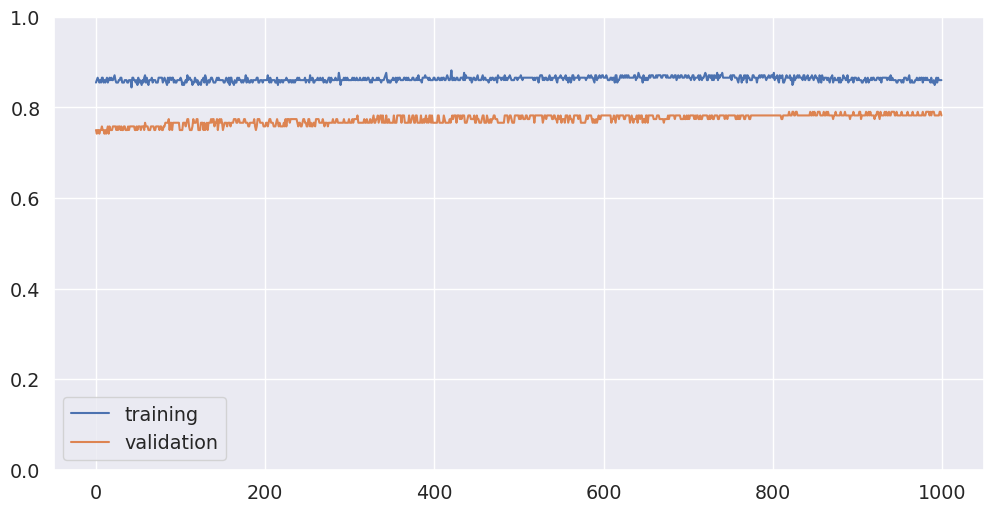

In [114]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.ylim(0, 1)
plt.legend()

Puedo ademas guardar el mejor modelo usando ModelCheckpoint

In [115]:
mc = ModelCheckpoint('mejor_modelo.h5', monitor='val_acc', mode='max')

In [116]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping, mc],
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9163 - accuracy: 0.8438

186/186 [==============================] - 0s 592us/step - loss: 3.8617 - accuracy: 0.7043 - val_loss: 4.5507 - val_accuracy: 0.6290


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.4054 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 3.6572 - accuracy: 0.7043 - val_loss: 4.3596 - val_accuracy: 0.6290


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2815 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 3.5077 - accuracy: 0.7043 - val_loss: 4.1945 - val_accuracy: 0.6290


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4887 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 3.3743 - accuracy: 0.7043 - val_loss: 4.0315 - val_accuracy: 0.6290


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.9453 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 3.2482 - accuracy: 0.7043 - val_loss: 3.8815 - val_accuracy: 0.6371


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3992 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 3.1285 - accuracy: 0.7043 - val_loss: 3.7345 - val_accuracy: 0.6371


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.2734 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 3.0141 - accuracy: 0.7043 - val_loss: 3.5953 - val_accuracy: 0.6371


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0392 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 2.9019 - accuracy: 0.7043 - val_loss: 3.4558 - val_accuracy: 0.6371


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0480 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 2.7876 - accuracy: 0.7043 - val_loss: 3.3117 - val_accuracy: 0.6371


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.6653 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 2.6741 - accuracy: 0.7043 - val_loss: 3.1835 - val_accuracy: 0.6371


/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.9973 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 2.5698 - accuracy: 0.7043 - val_loss: 3.0590 - val_accuracy: 0.6371


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5447 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 2.4680 - accuracy: 0.7043 - val_loss: 2.9403 - val_accuracy: 0.6371


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4543 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 2.3694 - accuracy: 0.7043 - val_loss: 2.8300 - val_accuracy: 0.6371


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9815 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 2.2769 - accuracy: 0.7043 - val_loss: 2.7148 - val_accuracy: 0.6371


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1568 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 2.1872 - accuracy: 0.7043 - val_loss: 2.6106 - val_accuracy: 0.6371


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0030 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 2.1003 - accuracy: 0.7043 - val_loss: 2.5030 - val_accuracy: 0.6371


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0647 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 2.0174 - accuracy: 0.7043 - val_loss: 2.4040 - val_accuracy: 0.6371


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2722 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 1.9398 - accuracy: 0.7043 - val_loss: 2.3048 - val_accuracy: 0.6371


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9481 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 1.8641 - accuracy: 0.7043 - val_loss: 2.2129 - val_accuracy: 0.6371


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3008 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 1.7936 - accuracy: 0.7043 - val_loss: 2.1275 - val_accuracy: 0.6371


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6499 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 1.7263 - accuracy: 0.7043 - val_loss: 2.0468 - val_accuracy: 0.6371


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6423 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 1.6638 - accuracy: 0.7043 - val_loss: 1.9666 - val_accuracy: 0.6371


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5753 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 1.6008 - accuracy: 0.7043 - val_loss: 1.8875 - val_accuracy: 0.6371


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1689 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 1.5397 - accuracy: 0.7043 - val_loss: 1.8131 - val_accuracy: 0.6371


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0837 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 1.4808 - accuracy: 0.7043 - val_loss: 1.7361 - val_accuracy: 0.6371


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5801 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 1.4216 - accuracy: 0.7043 - val_loss: 1.6603 - val_accuracy: 0.6371


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5878 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 1.3612 - accuracy: 0.7043 - val_loss: 1.5831 - val_accuracy: 0.6371


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6307 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 1.3025 - accuracy: 0.7043 - val_loss: 1.5134 - val_accuracy: 0.6371


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9022 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 1.2460 - accuracy: 0.7043 - val_loss: 1.4393 - val_accuracy: 0.6371


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9899 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 1.1890 - accuracy: 0.7043 - val_loss: 1.3689 - val_accuracy: 0.6371


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0938 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 1.1339 - accuracy: 0.7043 - val_loss: 1.3011 - val_accuracy: 0.6371


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1916 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 1.0802 - accuracy: 0.7043 - val_loss: 1.2353 - val_accuracy: 0.6371


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9589 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 1.0288 - accuracy: 0.7043 - val_loss: 1.1705 - val_accuracy: 0.6371


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0856 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.9777 - accuracy: 0.7043 - val_loss: 1.1041 - val_accuracy: 0.6371


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8858 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.9262 - accuracy: 0.7043 - val_loss: 1.0397 - val_accuracy: 0.6371


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1329 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.8775 - accuracy: 0.7043 - val_loss: 0.9803 - val_accuracy: 0.6371


Epoch 37/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7768 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.8300 - accuracy: 0.7043 - val_loss: 0.9213 - val_accuracy: 0.6371


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7727 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.7829 - accuracy: 0.7043 - val_loss: 0.8702 - val_accuracy: 0.6371


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7165 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.7430 - accuracy: 0.7043 - val_loss: 0.8257 - val_accuracy: 0.6371


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9056 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.7090 - accuracy: 0.7043 - val_loss: 0.7881 - val_accuracy: 0.6371


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6051 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6748 - accuracy: 0.7043 - val_loss: 0.7539 - val_accuracy: 0.6371


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8344 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 0.6445 - accuracy: 0.7043 - val_loss: 0.7199 - val_accuracy: 0.6371


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6492 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6197 - accuracy: 0.7043 - val_loss: 0.6957 - val_accuracy: 0.6290


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4853 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.6002 - accuracy: 0.7043 - val_loss: 0.6781 - val_accuracy: 0.6210


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7393 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.5864 - accuracy: 0.7097 - val_loss: 0.6648 - val_accuracy: 0.6129


Epoch 46/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6507 - accuracy: 0.6250



186/186 [==============================] - 0s 64us/step - loss: 0.5778 - accuracy: 0.6935 - val_loss: 0.6574 - val_accuracy: 0.6129


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.5721 - accuracy: 0.6989 - val_loss: 0.6517 - val_accuracy: 0.6048


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5171 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5673 - accuracy: 0.7043 - val_loss: 0.6473 - val_accuracy: 0.6048


Epoch 49/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5633 - accuracy: 0.6989 - val_loss: 0.6441 - val_accuracy: 0.6048


Epoch 50/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5194 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5609 - accuracy: 0.6882 - val_loss: 0.6421 - val_accuracy: 0.6129


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6516 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.5568 - accuracy: 0.6989 - val_loss: 0.6415 - val_accuracy: 0.6048


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.5547 - accuracy: 0.6935 - val_loss: 0.6398 - val_accuracy: 0.6129


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6773 - accuracy: 0.5625

186/186 [==============================] - 0s 47us/step - loss: 0.5504 - accuracy: 0.6989 - val_loss: 0.6380 - val_accuracy: 0.6129


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5757 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5498 - accuracy: 0.6989 - val_loss: 0.6361 - val_accuracy: 0.6048


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5527 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.5470 - accuracy: 0.7043 - val_loss: 0.6343 - val_accuracy: 0.6129


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5808 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.5447 - accuracy: 0.6989 - val_loss: 0.6321 - val_accuracy: 0.6129


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5433 - accuracy: 0.6989 - val_loss: 0.6323 - val_accuracy: 0.6210


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6338 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 0.5411 - accuracy: 0.6882 - val_loss: 0.6314 - val_accuracy: 0.6210


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4408 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5385 - accuracy: 0.6935 - val_loss: 0.6342 - val_accuracy: 0.6210


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4717 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5374 - accuracy: 0.7097 - val_loss: 0.6378 - val_accuracy: 0.6129


Epoch 61/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5314 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5334 - accuracy: 0.7043 - val_loss: 0.6380 - val_accuracy: 0.6129


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5841 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5345 - accuracy: 0.7151 - val_loss: 0.6385 - val_accuracy: 0.6048


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5272 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5313 - accuracy: 0.7043 - val_loss: 0.6392 - val_accuracy: 0.6048


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4438 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5311 - accuracy: 0.7043 - val_loss: 0.6388 - val_accuracy: 0.6129


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5339 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.5296 - accuracy: 0.7097 - val_loss: 0.6389 - val_accuracy: 0.6129


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5634 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5296 - accuracy: 0.7097 - val_loss: 0.6369 - val_accuracy: 0.6129


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5746 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.5276 - accuracy: 0.7097 - val_loss: 0.6366 - val_accuracy: 0.6129


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4687 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.5259 - accuracy: 0.7043 - val_loss: 0.6382 - val_accuracy: 0.6048


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5260 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5285 - accuracy: 0.7097 - val_loss: 0.6364 - val_accuracy: 0.6129


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4361 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.5254 - accuracy: 0.7043 - val_loss: 0.6398 - val_accuracy: 0.5887


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7314 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.5253 - accuracy: 0.7043 - val_loss: 0.6386 - val_accuracy: 0.5968


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4690 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5242 - accuracy: 0.7204 - val_loss: 0.6316 - val_accuracy: 0.6129


Epoch 73/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5089 - accuracy: 0.7188



186/186 [==============================] - 0s 54us/step - loss: 0.5241 - accuracy: 0.7097 - val_loss: 0.6344 - val_accuracy: 0.6048


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5108 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5231 - accuracy: 0.7097 - val_loss: 0.6349 - val_accuracy: 0.5968


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.5225 - accuracy: 0.7097 - val_loss: 0.6330 - val_accuracy: 0.6048


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4539 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5206 - accuracy: 0.7151 - val_loss: 0.6295 - val_accuracy: 0.6129


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5691 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.5203 - accuracy: 0.7097 - val_loss: 0.6341 - val_accuracy: 0.5887


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4545 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5190 - accuracy: 0.7151 - val_loss: 0.6306 - val_accuracy: 0.6048


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4946 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5191 - accuracy: 0.7097 - val_loss: 0.6288 - val_accuracy: 0.6048


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4421 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5185 - accuracy: 0.7151 - val_loss: 0.6272 - val_accuracy: 0.6129


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5169 - accuracy: 0.7151 - val_loss: 0.6294 - val_accuracy: 0.5887


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5208 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.5172 - accuracy: 0.7204 - val_loss: 0.6270 - val_accuracy: 0.5968


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5344 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5152 - accuracy: 0.7097 - val_loss: 0.6314 - val_accuracy: 0.5806


Epoch 84/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.7500



186/186 [==============================] - 0s 49us/step - loss: 0.5151 - accuracy: 0.7151 - val_loss: 0.6292 - val_accuracy: 0.5806


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4569 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5143 - accuracy: 0.7151 - val_loss: 0.6286 - val_accuracy: 0.5806


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5138 - accuracy: 0.7151 - val_loss: 0.6281 - val_accuracy: 0.5806


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5688 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5133 - accuracy: 0.7151 - val_loss: 0.6260 - val_accuracy: 0.5887


Epoch 88/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.5105 - accuracy: 0.7204 - val_loss: 0.6237 - val_accuracy: 0.5968


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5584 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.5105 - accuracy: 0.7204 - val_loss: 0.6217 - val_accuracy: 0.5968


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4836 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5094 - accuracy: 0.7151 - val_loss: 0.6203 - val_accuracy: 0.6048


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6002 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.5083 - accuracy: 0.7204 - val_loss: 0.6208 - val_accuracy: 0.5968


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6141 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5099 - accuracy: 0.7204 - val_loss: 0.6186 - val_accuracy: 0.6048


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5509 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.5092 - accuracy: 0.7204 - val_loss: 0.6193 - val_accuracy: 0.5968


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5186 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.5067 - accuracy: 0.7258 - val_loss: 0.6164 - val_accuracy: 0.6048


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4797 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5055 - accuracy: 0.7204 - val_loss: 0.6146 - val_accuracy: 0.6048


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4495 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.5069 - accuracy: 0.7258 - val_loss: 0.6131 - val_accuracy: 0.6048


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5037 - accuracy: 0.7258 - val_loss: 0.6149 - val_accuracy: 0.6048


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5131 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5030 - accuracy: 0.7204 - val_loss: 0.6156 - val_accuracy: 0.6048


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5978 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.5030 - accuracy: 0.7204 - val_loss: 0.6140 - val_accuracy: 0.6048


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5770 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.5046 - accuracy: 0.7151 - val_loss: 0.6109 - val_accuracy: 0.6048


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.5006 - accuracy: 0.7204 - val_loss: 0.6089 - val_accuracy: 0.6048


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5013 - accuracy: 0.7204 - val_loss: 0.6091 - val_accuracy: 0.6048


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5014 - accuracy: 0.7312 - val_loss: 0.6086 - val_accuracy: 0.6048


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6213 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4994 - accuracy: 0.7204 - val_loss: 0.6089 - val_accuracy: 0.6048


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5504 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4980 - accuracy: 0.7312 - val_loss: 0.6080 - val_accuracy: 0.6048


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5365 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.4976 - accuracy: 0.7366 - val_loss: 0.6055 - val_accuracy: 0.6048


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4968 - accuracy: 0.7204 - val_loss: 0.6065 - val_accuracy: 0.5968


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4328 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4966 - accuracy: 0.7258 - val_loss: 0.6054 - val_accuracy: 0.6048


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4818 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4953 - accuracy: 0.7312 - val_loss: 0.6036 - val_accuracy: 0.6048


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4826 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4933 - accuracy: 0.7366 - val_loss: 0.6021 - val_accuracy: 0.6048


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4238 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4968 - accuracy: 0.7312 - val_loss: 0.6027 - val_accuracy: 0.5968


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.4923 - accuracy: 0.7366 - val_loss: 0.6019 - val_accuracy: 0.6048


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5857 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4941 - accuracy: 0.7258 - val_loss: 0.6007 - val_accuracy: 0.6048


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5229 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4912 - accuracy: 0.7366 - val_loss: 0.6018 - val_accuracy: 0.5968


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6032 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.4917 - accuracy: 0.7366 - val_loss: 0.5985 - val_accuracy: 0.6048


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4895 - accuracy: 0.7366 - val_loss: 0.5971 - val_accuracy: 0.6048


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4856 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4891 - accuracy: 0.7366 - val_loss: 0.5948 - val_accuracy: 0.6048


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4515 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4888 - accuracy: 0.7258 - val_loss: 0.5953 - val_accuracy: 0.6048


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4874 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4873 - accuracy: 0.7366 - val_loss: 0.5919 - val_accuracy: 0.6048


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4846 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4869 - accuracy: 0.7258 - val_loss: 0.5939 - val_accuracy: 0.6048


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5452 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.4868 - accuracy: 0.7258 - val_loss: 0.5955 - val_accuracy: 0.5968


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4858 - accuracy: 0.7366 - val_loss: 0.5924 - val_accuracy: 0.6048


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4437 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4848 - accuracy: 0.7312 - val_loss: 0.5922 - val_accuracy: 0.6048


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4839 - accuracy: 0.7419 - val_loss: 0.5888 - val_accuracy: 0.6129


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4576 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4826 - accuracy: 0.7312 - val_loss: 0.5904 - val_accuracy: 0.6048


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4822 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4834 - accuracy: 0.7366 - val_loss: 0.5925 - val_accuracy: 0.5887


Epoch 127/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5522 - accuracy: 0.6875



186/186 [==============================] - 0s 51us/step - loss: 0.4817 - accuracy: 0.7366 - val_loss: 0.5884 - val_accuracy: 0.6048


Epoch 128/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4625 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4808 - accuracy: 0.7312 - val_loss: 0.5898 - val_accuracy: 0.5968


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4795 - accuracy: 0.7473 - val_loss: 0.5878 - val_accuracy: 0.5968


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4847 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4792 - accuracy: 0.7366 - val_loss: 0.5901 - val_accuracy: 0.6048


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4797 - accuracy: 0.7473 - val_loss: 0.5894 - val_accuracy: 0.6048


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3833 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4795 - accuracy: 0.7419 - val_loss: 0.5857 - val_accuracy: 0.6129


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6522 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.4782 - accuracy: 0.7473 - val_loss: 0.5830 - val_accuracy: 0.6210


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4048 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4769 - accuracy: 0.7473 - val_loss: 0.5820 - val_accuracy: 0.6210


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4870 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4760 - accuracy: 0.7473 - val_loss: 0.5826 - val_accuracy: 0.6129


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3993 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4749 - accuracy: 0.7473 - val_loss: 0.5840 - val_accuracy: 0.5968


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5439 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4734 - accuracy: 0.7473 - val_loss: 0.5806 - val_accuracy: 0.6048


Epoch 138/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4921 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.4744 - accuracy: 0.7473 - val_loss: 0.5788 - val_accuracy: 0.6129


Epoch 139/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4956 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4716 - accuracy: 0.7419 - val_loss: 0.5790 - val_accuracy: 0.5968


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4433 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4702 - accuracy: 0.7473 - val_loss: 0.5782 - val_accuracy: 0.5968


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4647 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4708 - accuracy: 0.7473 - val_loss: 0.5763 - val_accuracy: 0.6048


Epoch 142/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5306 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4690 - accuracy: 0.7473 - val_loss: 0.5777 - val_accuracy: 0.6048


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5653 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4692 - accuracy: 0.7473 - val_loss: 0.5792 - val_accuracy: 0.6048


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5536 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4684 - accuracy: 0.7419 - val_loss: 0.5735 - val_accuracy: 0.6129


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5891 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.4670 - accuracy: 0.7473 - val_loss: 0.5743 - val_accuracy: 0.6048


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4891 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4658 - accuracy: 0.7419 - val_loss: 0.5722 - val_accuracy: 0.6048


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5729 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4660 - accuracy: 0.7419 - val_loss: 0.5708 - val_accuracy: 0.6210


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6365 - accuracy: 0.5312

186/186 [==============================] - 0s 50us/step - loss: 0.4637 - accuracy: 0.7473 - val_loss: 0.5678 - val_accuracy: 0.6290


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4130 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4632 - accuracy: 0.7473 - val_loss: 0.5661 - val_accuracy: 0.6290


Epoch 150/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5462 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.4641 - accuracy: 0.7473 - val_loss: 0.5656 - val_accuracy: 0.6290


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3777 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.4627 - accuracy: 0.7473 - val_loss: 0.5658 - val_accuracy: 0.6210


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4448 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4607 - accuracy: 0.7473 - val_loss: 0.5632 - val_accuracy: 0.6290


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4407 - accuracy: 0.7812

186/186 [==============================] - 0s 69us/step - loss: 0.4595 - accuracy: 0.7473 - val_loss: 0.5606 - val_accuracy: 0.6290


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.4591 - accuracy: 0.7473 - val_loss: 0.5631 - val_accuracy: 0.6210


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5658 - accuracy: 0.6875

186/186 [==============================] - 0s 69us/step - loss: 0.4587 - accuracy: 0.7473 - val_loss: 0.5646 - val_accuracy: 0.6048


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4186 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.4569 - accuracy: 0.7473 - val_loss: 0.5609 - val_accuracy: 0.6290


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5788 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.4570 - accuracy: 0.7473 - val_loss: 0.5643 - val_accuracy: 0.6129


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4628 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4553 - accuracy: 0.7473 - val_loss: 0.5666 - val_accuracy: 0.6129


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5213 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4547 - accuracy: 0.7473 - val_loss: 0.5656 - val_accuracy: 0.6129


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4558 - accuracy: 0.7527 - val_loss: 0.5653 - val_accuracy: 0.6048


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6147 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.4528 - accuracy: 0.7581 - val_loss: 0.5625 - val_accuracy: 0.6129


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4620 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4520 - accuracy: 0.7581 - val_loss: 0.5572 - val_accuracy: 0.6210


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4660 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4518 - accuracy: 0.7634 - val_loss: 0.5596 - val_accuracy: 0.6129


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5116 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4514 - accuracy: 0.7581 - val_loss: 0.5585 - val_accuracy: 0.6129


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4694 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4498 - accuracy: 0.7581 - val_loss: 0.5595 - val_accuracy: 0.6129


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4018 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4498 - accuracy: 0.7688 - val_loss: 0.5553 - val_accuracy: 0.6210


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4387 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4475 - accuracy: 0.7634 - val_loss: 0.5517 - val_accuracy: 0.6210


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4690 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4473 - accuracy: 0.7742 - val_loss: 0.5566 - val_accuracy: 0.6129


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3678 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4473 - accuracy: 0.7634 - val_loss: 0.5588 - val_accuracy: 0.6048


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5586 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.4458 - accuracy: 0.7796 - val_loss: 0.5568 - val_accuracy: 0.6048


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.4455 - accuracy: 0.7742 - val_loss: 0.5528 - val_accuracy: 0.6210


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4444 - accuracy: 0.7796 - val_loss: 0.5512 - val_accuracy: 0.6210


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5170 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4446 - accuracy: 0.7796 - val_loss: 0.5524 - val_accuracy: 0.6290


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4609 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4429 - accuracy: 0.7796 - val_loss: 0.5507 - val_accuracy: 0.6290


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4859 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4436 - accuracy: 0.7796 - val_loss: 0.5510 - val_accuracy: 0.6290


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4110 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4400 - accuracy: 0.7849 - val_loss: 0.5491 - val_accuracy: 0.6452


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3656 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.4415 - accuracy: 0.7796 - val_loss: 0.5491 - val_accuracy: 0.6452


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3782 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4394 - accuracy: 0.7849 - val_loss: 0.5492 - val_accuracy: 0.6371


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4401 - accuracy: 0.7796 - val_loss: 0.5465 - val_accuracy: 0.6452


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4374 - accuracy: 0.7796 - val_loss: 0.5489 - val_accuracy: 0.6371


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4401 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4364 - accuracy: 0.7849 - val_loss: 0.5525 - val_accuracy: 0.6452


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6106 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4365 - accuracy: 0.7796 - val_loss: 0.5503 - val_accuracy: 0.6532


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4352 - accuracy: 0.7849 - val_loss: 0.5523 - val_accuracy: 0.6532


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.4355 - accuracy: 0.7796 - val_loss: 0.5487 - val_accuracy: 0.6532


Epoch 185/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4343 - accuracy: 0.7957 - val_loss: 0.5473 - val_accuracy: 0.6613


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.4328 - accuracy: 0.7903 - val_loss: 0.5449 - val_accuracy: 0.6694


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3794 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4334 - accuracy: 0.7903 - val_loss: 0.5473 - val_accuracy: 0.6694


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5757 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4320 - accuracy: 0.8011 - val_loss: 0.5460 - val_accuracy: 0.6694


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4686 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4310 - accuracy: 0.7957 - val_loss: 0.5483 - val_accuracy: 0.6774


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5762 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.4310 - accuracy: 0.7957 - val_loss: 0.5458 - val_accuracy: 0.6774


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5173 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4292 - accuracy: 0.7957 - val_loss: 0.5455 - val_accuracy: 0.6774


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4291 - accuracy: 0.7957 - val_loss: 0.5404 - val_accuracy: 0.6774


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4325 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4282 - accuracy: 0.8011 - val_loss: 0.5407 - val_accuracy: 0.6774


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4384 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4276 - accuracy: 0.7957 - val_loss: 0.5439 - val_accuracy: 0.7016


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4826 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4269 - accuracy: 0.7903 - val_loss: 0.5448 - val_accuracy: 0.7016


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4270 - accuracy: 0.7957 - val_loss: 0.5391 - val_accuracy: 0.7016


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4258 - accuracy: 0.8065 - val_loss: 0.5405 - val_accuracy: 0.7016


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3740 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4248 - accuracy: 0.7957 - val_loss: 0.5388 - val_accuracy: 0.7016


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4239 - accuracy: 0.7957 - val_loss: 0.5353 - val_accuracy: 0.7016


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4912 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4236 - accuracy: 0.8011 - val_loss: 0.5383 - val_accuracy: 0.7016


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4224 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4235 - accuracy: 0.7957 - val_loss: 0.5348 - val_accuracy: 0.7016


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4451 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4223 - accuracy: 0.7957 - val_loss: 0.5377 - val_accuracy: 0.7016


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4222 - accuracy: 0.7957 - val_loss: 0.5363 - val_accuracy: 0.7016


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4305 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4224 - accuracy: 0.8011 - val_loss: 0.5342 - val_accuracy: 0.7016


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4416 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4222 - accuracy: 0.8011 - val_loss: 0.5376 - val_accuracy: 0.7016


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4201 - accuracy: 0.8011 - val_loss: 0.5348 - val_accuracy: 0.7016


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3414 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4206 - accuracy: 0.7957 - val_loss: 0.5318 - val_accuracy: 0.7016


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4077 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4205 - accuracy: 0.7957 - val_loss: 0.5314 - val_accuracy: 0.7016


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.4189 - accuracy: 0.8065 - val_loss: 0.5318 - val_accuracy: 0.7016


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4293 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4179 - accuracy: 0.8065 - val_loss: 0.5302 - val_accuracy: 0.7016


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4860 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4186 - accuracy: 0.8011 - val_loss: 0.5303 - val_accuracy: 0.7016


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4204 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4177 - accuracy: 0.8011 - val_loss: 0.5285 - val_accuracy: 0.7097


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4194 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4175 - accuracy: 0.8065 - val_loss: 0.5270 - val_accuracy: 0.7258


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4166 - accuracy: 0.8065 - val_loss: 0.5271 - val_accuracy: 0.7177


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4165 - accuracy: 0.8011 - val_loss: 0.5280 - val_accuracy: 0.7097


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4781 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4156 - accuracy: 0.8011 - val_loss: 0.5301 - val_accuracy: 0.7097


Epoch 217/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4154 - accuracy: 0.8065 - val_loss: 0.5284 - val_accuracy: 0.7097


Epoch 218/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4147 - accuracy: 0.8011 - val_loss: 0.5273 - val_accuracy: 0.7097


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4182 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4144 - accuracy: 0.8065 - val_loss: 0.5271 - val_accuracy: 0.7097


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4130 - accuracy: 0.8065 - val_loss: 0.5245 - val_accuracy: 0.7177


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3695 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4129 - accuracy: 0.8118 - val_loss: 0.5252 - val_accuracy: 0.7097


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4118 - accuracy: 0.8065 - val_loss: 0.5238 - val_accuracy: 0.7177


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4125 - accuracy: 0.8065 - val_loss: 0.5253 - val_accuracy: 0.7097


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4474 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.4118 - accuracy: 0.8065 - val_loss: 0.5256 - val_accuracy: 0.7097


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4507 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4117 - accuracy: 0.8065 - val_loss: 0.5259 - val_accuracy: 0.7097


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4098 - accuracy: 0.8065 - val_loss: 0.5217 - val_accuracy: 0.7177


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4128 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4098 - accuracy: 0.8065 - val_loss: 0.5228 - val_accuracy: 0.7177


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4958 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4094 - accuracy: 0.8065 - val_loss: 0.5209 - val_accuracy: 0.7177


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4099 - accuracy: 0.8065 - val_loss: 0.5220 - val_accuracy: 0.7177


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4919 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4093 - accuracy: 0.8011 - val_loss: 0.5198 - val_accuracy: 0.7177


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3952 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4083 - accuracy: 0.8065 - val_loss: 0.5170 - val_accuracy: 0.7339


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5174 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4075 - accuracy: 0.8118 - val_loss: 0.5202 - val_accuracy: 0.7177


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5031 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4076 - accuracy: 0.8118 - val_loss: 0.5231 - val_accuracy: 0.7016


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4183 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4072 - accuracy: 0.8118 - val_loss: 0.5193 - val_accuracy: 0.7097


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4856 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4068 - accuracy: 0.8011 - val_loss: 0.5199 - val_accuracy: 0.7097


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4058 - accuracy: 0.8065 - val_loss: 0.5192 - val_accuracy: 0.7097


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4074 - accuracy: 0.8065 - val_loss: 0.5200 - val_accuracy: 0.7097


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4448 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4056 - accuracy: 0.8065 - val_loss: 0.5204 - val_accuracy: 0.7097


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4050 - accuracy: 0.8065 - val_loss: 0.5196 - val_accuracy: 0.7097


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5021 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.4046 - accuracy: 0.8011 - val_loss: 0.5177 - val_accuracy: 0.7097


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4102 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4043 - accuracy: 0.8065 - val_loss: 0.5151 - val_accuracy: 0.7177


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4393 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4036 - accuracy: 0.8118 - val_loss: 0.5178 - val_accuracy: 0.7097


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4238 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4056 - accuracy: 0.8011 - val_loss: 0.5184 - val_accuracy: 0.7097


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4030 - accuracy: 0.8065 - val_loss: 0.5180 - val_accuracy: 0.7097


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4869 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4025 - accuracy: 0.8011 - val_loss: 0.5153 - val_accuracy: 0.7097


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4023 - accuracy: 0.8011 - val_loss: 0.5135 - val_accuracy: 0.7177


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4018 - accuracy: 0.8065 - val_loss: 0.5154 - val_accuracy: 0.7097


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4019 - accuracy: 0.8065 - val_loss: 0.5146 - val_accuracy: 0.7097


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4474 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4010 - accuracy: 0.8011 - val_loss: 0.5150 - val_accuracy: 0.7097


Epoch 250/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4011 - accuracy: 0.8065 - val_loss: 0.5119 - val_accuracy: 0.7177


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4000 - accuracy: 0.8011 - val_loss: 0.5132 - val_accuracy: 0.7097


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4001 - accuracy: 0.8011 - val_loss: 0.5113 - val_accuracy: 0.7177


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4007 - accuracy: 0.8011 - val_loss: 0.5129 - val_accuracy: 0.7177


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4011 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3995 - accuracy: 0.8011 - val_loss: 0.5106 - val_accuracy: 0.7177


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5909 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.3992 - accuracy: 0.7957 - val_loss: 0.5125 - val_accuracy: 0.7177


Epoch 256/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3976 - accuracy: 0.8065 - val_loss: 0.5110 - val_accuracy: 0.7177


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2596 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3977 - accuracy: 0.7957 - val_loss: 0.5096 - val_accuracy: 0.7177


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3971 - accuracy: 0.8011 - val_loss: 0.5058 - val_accuracy: 0.7339


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3973 - accuracy: 0.7903 - val_loss: 0.5039 - val_accuracy: 0.7500


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3967 - accuracy: 0.7903 - val_loss: 0.5065 - val_accuracy: 0.7258


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4758 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.3962 - accuracy: 0.7903 - val_loss: 0.5086 - val_accuracy: 0.7177


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3965 - accuracy: 0.7903 - val_loss: 0.5094 - val_accuracy: 0.7177


Epoch 263/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3960 - accuracy: 0.7957 - val_loss: 0.5098 - val_accuracy: 0.7177


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3957 - accuracy: 0.8011 - val_loss: 0.5080 - val_accuracy: 0.7177


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4247 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3946 - accuracy: 0.8011 - val_loss: 0.5067 - val_accuracy: 0.7258


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3940 - accuracy: 0.8011 - val_loss: 0.5009 - val_accuracy: 0.7581


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3852 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3938 - accuracy: 0.7957 - val_loss: 0.5029 - val_accuracy: 0.7339


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5070 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3939 - accuracy: 0.8065 - val_loss: 0.4994 - val_accuracy: 0.7581


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4807 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3927 - accuracy: 0.8011 - val_loss: 0.5015 - val_accuracy: 0.7419


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4453 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3933 - accuracy: 0.7957 - val_loss: 0.5031 - val_accuracy: 0.7339


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3926 - accuracy: 0.8172 - val_loss: 0.4981 - val_accuracy: 0.7581


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3917 - accuracy: 0.8011 - val_loss: 0.5003 - val_accuracy: 0.7339


Epoch 273/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3911 - accuracy: 0.8065 - val_loss: 0.5039 - val_accuracy: 0.7258


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4416 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3914 - accuracy: 0.8226 - val_loss: 0.4981 - val_accuracy: 0.7419


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4046 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3906 - accuracy: 0.8172 - val_loss: 0.4980 - val_accuracy: 0.7339


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4336 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3906 - accuracy: 0.8172 - val_loss: 0.4989 - val_accuracy: 0.7258


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5147 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3895 - accuracy: 0.8172 - val_loss: 0.4995 - val_accuracy: 0.7258


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3890 - accuracy: 0.8226 - val_loss: 0.4956 - val_accuracy: 0.7419


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4472 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3893 - accuracy: 0.8172 - val_loss: 0.4965 - val_accuracy: 0.7339


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3882 - accuracy: 0.8172 - val_loss: 0.4948 - val_accuracy: 0.7339


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3886 - accuracy: 0.8172 - val_loss: 0.4952 - val_accuracy: 0.7339


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2323 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3876 - accuracy: 0.8226 - val_loss: 0.4942 - val_accuracy: 0.7339


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4760 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3872 - accuracy: 0.8226 - val_loss: 0.4941 - val_accuracy: 0.7339


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3868 - accuracy: 0.8226 - val_loss: 0.4934 - val_accuracy: 0.7339


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4320 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3863 - accuracy: 0.8172 - val_loss: 0.4937 - val_accuracy: 0.7339


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3854 - accuracy: 0.8172 - val_loss: 0.4935 - val_accuracy: 0.7258


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4736 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3852 - accuracy: 0.8172 - val_loss: 0.4951 - val_accuracy: 0.7258


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3851 - accuracy: 0.8172 - val_loss: 0.4946 - val_accuracy: 0.7258


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3852 - accuracy: 0.8226 - val_loss: 0.4940 - val_accuracy: 0.7177


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3844 - accuracy: 0.8118 - val_loss: 0.4912 - val_accuracy: 0.7258


Epoch 291/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3840 - accuracy: 0.8226 - val_loss: 0.4891 - val_accuracy: 0.7419


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3836 - accuracy: 0.8118 - val_loss: 0.4911 - val_accuracy: 0.7258


Epoch 293/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3719 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3824 - accuracy: 0.8118 - val_loss: 0.4902 - val_accuracy: 0.7339


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3005 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3821 - accuracy: 0.8118 - val_loss: 0.4884 - val_accuracy: 0.7339


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4818 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3814 - accuracy: 0.8118 - val_loss: 0.4907 - val_accuracy: 0.7258


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3779 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3811 - accuracy: 0.8065 - val_loss: 0.4883 - val_accuracy: 0.7258


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3809 - accuracy: 0.8172 - val_loss: 0.4880 - val_accuracy: 0.7258


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2387 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3809 - accuracy: 0.8118 - val_loss: 0.4873 - val_accuracy: 0.7258


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3801 - accuracy: 0.8118 - val_loss: 0.4876 - val_accuracy: 0.7258


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4496 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3796 - accuracy: 0.8172 - val_loss: 0.4871 - val_accuracy: 0.7258


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3802 - accuracy: 0.8118 - val_loss: 0.4867 - val_accuracy: 0.7258


Epoch 302/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3784 - accuracy: 0.8172 - val_loss: 0.4849 - val_accuracy: 0.7419


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4006 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3783 - accuracy: 0.8118 - val_loss: 0.4871 - val_accuracy: 0.7258


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3822 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3776 - accuracy: 0.8065 - val_loss: 0.4877 - val_accuracy: 0.7258


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3771 - accuracy: 0.8118 - val_loss: 0.4854 - val_accuracy: 0.7258


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3778 - accuracy: 0.8118 - val_loss: 0.4862 - val_accuracy: 0.7258


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3771 - accuracy: 0.8226 - val_loss: 0.4842 - val_accuracy: 0.7339


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3766 - accuracy: 0.8118 - val_loss: 0.4839 - val_accuracy: 0.7339


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4209 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3756 - accuracy: 0.8172 - val_loss: 0.4840 - val_accuracy: 0.7339


Epoch 310/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3762 - accuracy: 0.8065 - val_loss: 0.4821 - val_accuracy: 0.7339


Epoch 311/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3756 - accuracy: 0.8118 - val_loss: 0.4822 - val_accuracy: 0.7419


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4717 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3747 - accuracy: 0.8118 - val_loss: 0.4837 - val_accuracy: 0.7419


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3741 - accuracy: 0.8065 - val_loss: 0.4830 - val_accuracy: 0.7419


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3744 - accuracy: 0.8065 - val_loss: 0.4820 - val_accuracy: 0.7419


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3739 - accuracy: 0.8172 - val_loss: 0.4801 - val_accuracy: 0.7419


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4068 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3735 - accuracy: 0.8118 - val_loss: 0.4810 - val_accuracy: 0.7339


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3735 - accuracy: 0.8118 - val_loss: 0.4824 - val_accuracy: 0.7419


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3728 - accuracy: 0.8118 - val_loss: 0.4839 - val_accuracy: 0.7339


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3756 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3722 - accuracy: 0.8226 - val_loss: 0.4789 - val_accuracy: 0.7500


Epoch 320/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4152 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3721 - accuracy: 0.8118 - val_loss: 0.4810 - val_accuracy: 0.7419


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4639 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3718 - accuracy: 0.8172 - val_loss: 0.4794 - val_accuracy: 0.7419


Epoch 322/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3714 - accuracy: 0.8118 - val_loss: 0.4806 - val_accuracy: 0.7419


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3714 - accuracy: 0.8118 - val_loss: 0.4831 - val_accuracy: 0.7339


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3708 - accuracy: 0.8226 - val_loss: 0.4837 - val_accuracy: 0.7258


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2340 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3713 - accuracy: 0.8226 - val_loss: 0.4816 - val_accuracy: 0.7339


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3700 - accuracy: 0.8118 - val_loss: 0.4819 - val_accuracy: 0.7339


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3699 - accuracy: 0.8333 - val_loss: 0.4769 - val_accuracy: 0.7419


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4618 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3697 - accuracy: 0.8172 - val_loss: 0.4768 - val_accuracy: 0.7419


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4153 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3697 - accuracy: 0.8226 - val_loss: 0.4803 - val_accuracy: 0.7339


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4570 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3690 - accuracy: 0.8172 - val_loss: 0.4762 - val_accuracy: 0.7419


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3933 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3687 - accuracy: 0.8172 - val_loss: 0.4780 - val_accuracy: 0.7419


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3683 - accuracy: 0.8280 - val_loss: 0.4754 - val_accuracy: 0.7500


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3686 - accuracy: 0.8226 - val_loss: 0.4773 - val_accuracy: 0.7419


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3744 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3681 - accuracy: 0.8118 - val_loss: 0.4775 - val_accuracy: 0.7419


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3677 - accuracy: 0.8280 - val_loss: 0.4763 - val_accuracy: 0.7419


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4762 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3671 - accuracy: 0.8226 - val_loss: 0.4789 - val_accuracy: 0.7339


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3668 - accuracy: 0.8226 - val_loss: 0.4780 - val_accuracy: 0.7500


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4663 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3671 - accuracy: 0.8280 - val_loss: 0.4788 - val_accuracy: 0.7339


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.8125

186/186 [==============================] - 0s 70us/step - loss: 0.3658 - accuracy: 0.8226 - val_loss: 0.4758 - val_accuracy: 0.7500


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4588 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3665 - accuracy: 0.8333 - val_loss: 0.4756 - val_accuracy: 0.7500


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3380 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3653 - accuracy: 0.8280 - val_loss: 0.4735 - val_accuracy: 0.7581


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3761 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3655 - accuracy: 0.8226 - val_loss: 0.4717 - val_accuracy: 0.7581


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3649 - accuracy: 0.8387 - val_loss: 0.4720 - val_accuracy: 0.7500


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3645 - accuracy: 0.8172 - val_loss: 0.4728 - val_accuracy: 0.7500


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3579 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3641 - accuracy: 0.8172 - val_loss: 0.4743 - val_accuracy: 0.7500


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3654 - accuracy: 0.8226 - val_loss: 0.4739 - val_accuracy: 0.7500


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4682 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3639 - accuracy: 0.8280 - val_loss: 0.4733 - val_accuracy: 0.7500


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3822 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3641 - accuracy: 0.8333 - val_loss: 0.4730 - val_accuracy: 0.7581


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3636 - accuracy: 0.8387 - val_loss: 0.4707 - val_accuracy: 0.7581


Epoch 350/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4526 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3631 - accuracy: 0.8226 - val_loss: 0.4756 - val_accuracy: 0.7500


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4408 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3621 - accuracy: 0.8333 - val_loss: 0.4729 - val_accuracy: 0.7581


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4175 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3623 - accuracy: 0.8226 - val_loss: 0.4730 - val_accuracy: 0.7581


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3880 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3623 - accuracy: 0.8387 - val_loss: 0.4739 - val_accuracy: 0.7500


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3614 - accuracy: 0.8280 - val_loss: 0.4749 - val_accuracy: 0.7500


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3150 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3632 - accuracy: 0.8333 - val_loss: 0.4741 - val_accuracy: 0.7500


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3958 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3622 - accuracy: 0.8226 - val_loss: 0.4716 - val_accuracy: 0.7661


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3609 - accuracy: 0.8280 - val_loss: 0.4741 - val_accuracy: 0.7500


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3609 - accuracy: 0.8333 - val_loss: 0.4733 - val_accuracy: 0.7500


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3752 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3603 - accuracy: 0.8333 - val_loss: 0.4694 - val_accuracy: 0.7661


Epoch 360/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3601 - accuracy: 0.8333 - val_loss: 0.4665 - val_accuracy: 0.7661


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4077 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3600 - accuracy: 0.8280 - val_loss: 0.4658 - val_accuracy: 0.7742


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3599 - accuracy: 0.8333 - val_loss: 0.4679 - val_accuracy: 0.7661


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3598 - accuracy: 0.8387 - val_loss: 0.4684 - val_accuracy: 0.7661


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3590 - accuracy: 0.8280 - val_loss: 0.4715 - val_accuracy: 0.7581


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4623 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3595 - accuracy: 0.8333 - val_loss: 0.4688 - val_accuracy: 0.7661


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3585 - accuracy: 0.8441 - val_loss: 0.4677 - val_accuracy: 0.7661


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3583 - accuracy: 0.8333 - val_loss: 0.4670 - val_accuracy: 0.7661


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4428 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.3574 - accuracy: 0.8333 - val_loss: 0.4654 - val_accuracy: 0.7661


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3584 - accuracy: 0.8280 - val_loss: 0.4650 - val_accuracy: 0.7661


Epoch 370/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3992 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3579 - accuracy: 0.8441 - val_loss: 0.4658 - val_accuracy: 0.7661


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3576 - accuracy: 0.8387 - val_loss: 0.4658 - val_accuracy: 0.7661


Epoch 372/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3566 - accuracy: 0.8387 - val_loss: 0.4675 - val_accuracy: 0.7581


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8750



186/186 [==============================] - 0s 43us/step - loss: 0.3571 - accuracy: 0.8387 - val_loss: 0.4644 - val_accuracy: 0.7661


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4256 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3566 - accuracy: 0.8333 - val_loss: 0.4661 - val_accuracy: 0.7661


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5615 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3563 - accuracy: 0.8333 - val_loss: 0.4646 - val_accuracy: 0.7661


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3567 - accuracy: 0.8387 - val_loss: 0.4638 - val_accuracy: 0.7661


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3556 - accuracy: 0.8441 - val_loss: 0.4640 - val_accuracy: 0.7661


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4221 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3562 - accuracy: 0.8441 - val_loss: 0.4642 - val_accuracy: 0.7661


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4428 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3549 - accuracy: 0.8333 - val_loss: 0.4652 - val_accuracy: 0.7581


Epoch 380/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3548 - accuracy: 0.8441 - val_loss: 0.4623 - val_accuracy: 0.7661


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3555 - accuracy: 0.8333 - val_loss: 0.4603 - val_accuracy: 0.7742


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3549 - accuracy: 0.8441 - val_loss: 0.4646 - val_accuracy: 0.7581


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4028 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3547 - accuracy: 0.8333 - val_loss: 0.4630 - val_accuracy: 0.7661


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4837 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3547 - accuracy: 0.8387 - val_loss: 0.4674 - val_accuracy: 0.7581


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3550 - accuracy: 0.8441 - val_loss: 0.4653 - val_accuracy: 0.7581


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3082 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3534 - accuracy: 0.8387 - val_loss: 0.4670 - val_accuracy: 0.7581


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3539 - accuracy: 0.8441 - val_loss: 0.4628 - val_accuracy: 0.7581


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3533 - accuracy: 0.8387 - val_loss: 0.4627 - val_accuracy: 0.7661


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4596 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3527 - accuracy: 0.8387 - val_loss: 0.4630 - val_accuracy: 0.7581


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5009 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3530 - accuracy: 0.8441 - val_loss: 0.4609 - val_accuracy: 0.7661


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3528 - accuracy: 0.8495 - val_loss: 0.4628 - val_accuracy: 0.7661


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3522 - accuracy: 0.8441 - val_loss: 0.4625 - val_accuracy: 0.7581


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3526 - accuracy: 0.8387 - val_loss: 0.4643 - val_accuracy: 0.7581


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5166 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3527 - accuracy: 0.8441 - val_loss: 0.4614 - val_accuracy: 0.7661


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3205 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3519 - accuracy: 0.8333 - val_loss: 0.4625 - val_accuracy: 0.7581


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4070 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3519 - accuracy: 0.8441 - val_loss: 0.4659 - val_accuracy: 0.7581


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3521 - accuracy: 0.8441 - val_loss: 0.4645 - val_accuracy: 0.7581


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3514 - accuracy: 0.8495 - val_loss: 0.4632 - val_accuracy: 0.7581


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3516 - accuracy: 0.8441 - val_loss: 0.4614 - val_accuracy: 0.7581


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3508 - accuracy: 0.8495 - val_loss: 0.4593 - val_accuracy: 0.7661


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3502 - accuracy: 0.8548 - val_loss: 0.4590 - val_accuracy: 0.7661


Epoch 402/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3502 - accuracy: 0.8548 - val_loss: 0.4586 - val_accuracy: 0.7661


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3524 - accuracy: 0.8548 - val_loss: 0.4618 - val_accuracy: 0.7581


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2954 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3501 - accuracy: 0.8441 - val_loss: 0.4610 - val_accuracy: 0.7581


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3493 - accuracy: 0.8495 - val_loss: 0.4604 - val_accuracy: 0.7581


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3489 - accuracy: 0.8495 - val_loss: 0.4607 - val_accuracy: 0.7581


Epoch 407/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4647 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3490 - accuracy: 0.8548 - val_loss: 0.4624 - val_accuracy: 0.7581


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3485 - accuracy: 0.8548 - val_loss: 0.4664 - val_accuracy: 0.7581


Epoch 409/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3496 - accuracy: 0.8548 - val_loss: 0.4661 - val_accuracy: 0.7581


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3483 - accuracy: 0.8602 - val_loss: 0.4630 - val_accuracy: 0.7581


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3488 - accuracy: 0.8495 - val_loss: 0.4606 - val_accuracy: 0.7581


Epoch 412/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3479 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.7581


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3474 - accuracy: 0.8602 - val_loss: 0.4584 - val_accuracy: 0.7581


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4597 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3473 - accuracy: 0.8495 - val_loss: 0.4615 - val_accuracy: 0.7581


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3466 - accuracy: 0.8656 - val_loss: 0.4545 - val_accuracy: 0.7661


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3477 - accuracy: 0.8495 - val_loss: 0.4587 - val_accuracy: 0.7581


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3466 - accuracy: 0.8548 - val_loss: 0.4572 - val_accuracy: 0.7581


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3464 - accuracy: 0.8548 - val_loss: 0.4615 - val_accuracy: 0.7581


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3458 - accuracy: 0.8602 - val_loss: 0.4578 - val_accuracy: 0.7581


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3468 - accuracy: 0.8656 - val_loss: 0.4573 - val_accuracy: 0.7581


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3470 - accuracy: 0.8548 - val_loss: 0.4572 - val_accuracy: 0.7581


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3458 - accuracy: 0.8548 - val_loss: 0.4595 - val_accuracy: 0.7581


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3460 - accuracy: 0.8656 - val_loss: 0.4595 - val_accuracy: 0.7581


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2199 - accuracy: 1.0000

186/186 [==============================] - 0s 45us/step - loss: 0.3452 - accuracy: 0.8602 - val_loss: 0.4566 - val_accuracy: 0.7581


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3667 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3446 - accuracy: 0.8548 - val_loss: 0.4586 - val_accuracy: 0.7581


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4895 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3449 - accuracy: 0.8602 - val_loss: 0.4566 - val_accuracy: 0.7581


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3449 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7581


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3442 - accuracy: 0.8548 - val_loss: 0.4593 - val_accuracy: 0.7581


Epoch 429/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3446 - accuracy: 0.8602 - val_loss: 0.4562 - val_accuracy: 0.7581


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4031 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3438 - accuracy: 0.8710 - val_loss: 0.4550 - val_accuracy: 0.7581


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4732 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.3447 - accuracy: 0.8548 - val_loss: 0.4594 - val_accuracy: 0.7581


Epoch 432/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3430 - accuracy: 0.8710 - val_loss: 0.4544 - val_accuracy: 0.7581


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3412 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3436 - accuracy: 0.8656 - val_loss: 0.4562 - val_accuracy: 0.7581


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3430 - accuracy: 0.8602 - val_loss: 0.4539 - val_accuracy: 0.7581


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3437 - accuracy: 0.8495 - val_loss: 0.4559 - val_accuracy: 0.7581


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3432 - accuracy: 0.8495 - val_loss: 0.4565 - val_accuracy: 0.7581


Epoch 437/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4301 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3425 - accuracy: 0.8548 - val_loss: 0.4576 - val_accuracy: 0.7581


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3428 - accuracy: 0.8602 - val_loss: 0.4568 - val_accuracy: 0.7581


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3426 - accuracy: 0.8602 - val_loss: 0.4597 - val_accuracy: 0.7581


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2964 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3422 - accuracy: 0.8548 - val_loss: 0.4569 - val_accuracy: 0.7581


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4525 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3421 - accuracy: 0.8602 - val_loss: 0.4507 - val_accuracy: 0.7581


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3414 - accuracy: 0.8602 - val_loss: 0.4527 - val_accuracy: 0.7581


Epoch 443/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3421 - accuracy: 0.8602 - val_loss: 0.4540 - val_accuracy: 0.7581


Epoch 444/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3411 - accuracy: 0.8602 - val_loss: 0.4575 - val_accuracy: 0.7581


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3416 - accuracy: 0.8602 - val_loss: 0.4540 - val_accuracy: 0.7581


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3416 - accuracy: 0.8548 - val_loss: 0.4501 - val_accuracy: 0.7581


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3416 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7581


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3405 - accuracy: 0.8602 - val_loss: 0.4494 - val_accuracy: 0.7581


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3402 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7581


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3401 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7581


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3405 - accuracy: 0.8548 - val_loss: 0.4515 - val_accuracy: 0.7581


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3404 - accuracy: 0.8602 - val_loss: 0.4535 - val_accuracy: 0.7581


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3397 - accuracy: 0.8602 - val_loss: 0.4563 - val_accuracy: 0.7500


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1797 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3401 - accuracy: 0.8656 - val_loss: 0.4519 - val_accuracy: 0.7581


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2282 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3397 - accuracy: 0.8602 - val_loss: 0.4480 - val_accuracy: 0.7661


Epoch 456/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3398 - accuracy: 0.8602 - val_loss: 0.4534 - val_accuracy: 0.7581


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3201 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3395 - accuracy: 0.8656 - val_loss: 0.4503 - val_accuracy: 0.7581


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3394 - accuracy: 0.8602 - val_loss: 0.4475 - val_accuracy: 0.7661


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3490 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3388 - accuracy: 0.8602 - val_loss: 0.4490 - val_accuracy: 0.7581


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3383 - accuracy: 0.8548 - val_loss: 0.4501 - val_accuracy: 0.7581


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2062 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3390 - accuracy: 0.8602 - val_loss: 0.4481 - val_accuracy: 0.7581


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3381 - accuracy: 0.8602 - val_loss: 0.4490 - val_accuracy: 0.7581


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4277 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3386 - accuracy: 0.8602 - val_loss: 0.4535 - val_accuracy: 0.7581


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3383 - accuracy: 0.8656 - val_loss: 0.4477 - val_accuracy: 0.7581


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3006 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3380 - accuracy: 0.8602 - val_loss: 0.4484 - val_accuracy: 0.7581


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3382 - accuracy: 0.8548 - val_loss: 0.4440 - val_accuracy: 0.7742


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3539 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3375 - accuracy: 0.8656 - val_loss: 0.4498 - val_accuracy: 0.7661


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3480 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3376 - accuracy: 0.8602 - val_loss: 0.4493 - val_accuracy: 0.7661


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3375 - accuracy: 0.8602 - val_loss: 0.4434 - val_accuracy: 0.7742


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3372 - accuracy: 0.8602 - val_loss: 0.4440 - val_accuracy: 0.7661


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3371 - accuracy: 0.8602 - val_loss: 0.4463 - val_accuracy: 0.7661


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3367 - accuracy: 0.8656 - val_loss: 0.4438 - val_accuracy: 0.7661


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4916 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3372 - accuracy: 0.8602 - val_loss: 0.4503 - val_accuracy: 0.7661


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4618 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3369 - accuracy: 0.8602 - val_loss: 0.4475 - val_accuracy: 0.7661


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3368 - accuracy: 0.8602 - val_loss: 0.4492 - val_accuracy: 0.7661


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3366 - accuracy: 0.8656 - val_loss: 0.4493 - val_accuracy: 0.7661


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3368 - accuracy: 0.8602 - val_loss: 0.4498 - val_accuracy: 0.7661


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3363 - accuracy: 0.8710 - val_loss: 0.4524 - val_accuracy: 0.7661


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3361 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3361 - accuracy: 0.8710 - val_loss: 0.4526 - val_accuracy: 0.7661


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3358 - accuracy: 0.8710 - val_loss: 0.4452 - val_accuracy: 0.7661


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3357 - accuracy: 0.8602 - val_loss: 0.4469 - val_accuracy: 0.7661


Epoch 482/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3352 - accuracy: 0.8602 - val_loss: 0.4493 - val_accuracy: 0.7661


Epoch 483/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3363 - accuracy: 0.8710 - val_loss: 0.4437 - val_accuracy: 0.7742


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3359 - accuracy: 0.8656 - val_loss: 0.4446 - val_accuracy: 0.7742


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4772 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3364 - accuracy: 0.8602 - val_loss: 0.4460 - val_accuracy: 0.7661


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2654 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3350 - accuracy: 0.8656 - val_loss: 0.4476 - val_accuracy: 0.7581


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3353 - accuracy: 0.8656 - val_loss: 0.4463 - val_accuracy: 0.7661


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3346 - accuracy: 0.8656 - val_loss: 0.4447 - val_accuracy: 0.7661


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2779 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3343 - accuracy: 0.8656 - val_loss: 0.4426 - val_accuracy: 0.7742


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.9375

186/186 [==============================] - 0s 90us/step - loss: 0.3354 - accuracy: 0.8656 - val_loss: 0.4430 - val_accuracy: 0.7742


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3338 - accuracy: 0.8602 - val_loss: 0.4450 - val_accuracy: 0.7581


Epoch 492/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2038 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3344 - accuracy: 0.8656 - val_loss: 0.4431 - val_accuracy: 0.7581


Epoch 493/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3343 - accuracy: 0.8602 - val_loss: 0.4430 - val_accuracy: 0.7581


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3341 - accuracy: 0.8602 - val_loss: 0.4450 - val_accuracy: 0.7581


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3342 - accuracy: 0.8656 - val_loss: 0.4448 - val_accuracy: 0.7581


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3341 - accuracy: 0.8602 - val_loss: 0.4423 - val_accuracy: 0.7661


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2060 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3335 - accuracy: 0.8548 - val_loss: 0.4453 - val_accuracy: 0.7581


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3331 - accuracy: 0.8656 - val_loss: 0.4422 - val_accuracy: 0.7661


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3330 - accuracy: 0.8710 - val_loss: 0.4438 - val_accuracy: 0.7581


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2483 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3325 - accuracy: 0.8656 - val_loss: 0.4392 - val_accuracy: 0.7742


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3327 - accuracy: 0.8656 - val_loss: 0.4459 - val_accuracy: 0.7581


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2433 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3341 - accuracy: 0.8656 - val_loss: 0.4415 - val_accuracy: 0.7661


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3326 - accuracy: 0.8656 - val_loss: 0.4451 - val_accuracy: 0.7581


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1991 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3329 - accuracy: 0.8602 - val_loss: 0.4445 - val_accuracy: 0.7581


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3328 - accuracy: 0.8710 - val_loss: 0.4449 - val_accuracy: 0.7581


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3321 - accuracy: 0.8656 - val_loss: 0.4406 - val_accuracy: 0.7661


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3939 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3322 - accuracy: 0.8602 - val_loss: 0.4396 - val_accuracy: 0.7661


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3325 - accuracy: 0.8656 - val_loss: 0.4430 - val_accuracy: 0.7581


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3321 - accuracy: 0.8656 - val_loss: 0.4437 - val_accuracy: 0.7581


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3319 - accuracy: 0.8656 - val_loss: 0.4401 - val_accuracy: 0.7661


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3322 - accuracy: 0.8710 - val_loss: 0.4406 - val_accuracy: 0.7661


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3322 - accuracy: 0.8656 - val_loss: 0.4407 - val_accuracy: 0.7661


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3313 - accuracy: 0.8602 - val_loss: 0.4395 - val_accuracy: 0.7661


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4213 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3317 - accuracy: 0.8656 - val_loss: 0.4440 - val_accuracy: 0.7581


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3311 - accuracy: 0.8656 - val_loss: 0.4390 - val_accuracy: 0.7661


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3309 - accuracy: 0.8602 - val_loss: 0.4411 - val_accuracy: 0.7661


Epoch 517/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2440 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3315 - accuracy: 0.8602 - val_loss: 0.4428 - val_accuracy: 0.7581


Epoch 518/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3308 - accuracy: 0.8763 - val_loss: 0.4422 - val_accuracy: 0.7661


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3313 - accuracy: 0.8763 - val_loss: 0.4403 - val_accuracy: 0.7661


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3557 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3312 - accuracy: 0.8710 - val_loss: 0.4416 - val_accuracy: 0.7581


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3303 - accuracy: 0.8602 - val_loss: 0.4390 - val_accuracy: 0.7661


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2412 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3304 - accuracy: 0.8710 - val_loss: 0.4435 - val_accuracy: 0.7500


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3301 - accuracy: 0.8656 - val_loss: 0.4417 - val_accuracy: 0.7661


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1783 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3299 - accuracy: 0.8602 - val_loss: 0.4407 - val_accuracy: 0.7661


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2328 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3304 - accuracy: 0.8656 - val_loss: 0.4436 - val_accuracy: 0.7581


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3304 - accuracy: 0.8656 - val_loss: 0.4416 - val_accuracy: 0.7661


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3297 - accuracy: 0.8710 - val_loss: 0.4412 - val_accuracy: 0.7742


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2007 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3296 - accuracy: 0.8602 - val_loss: 0.4392 - val_accuracy: 0.7661


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3352 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3301 - accuracy: 0.8602 - val_loss: 0.4368 - val_accuracy: 0.7742


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3288 - accuracy: 0.8602 - val_loss: 0.4375 - val_accuracy: 0.7661


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3291 - accuracy: 0.8656 - val_loss: 0.4436 - val_accuracy: 0.7581


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3298 - accuracy: 0.8548 - val_loss: 0.4422 - val_accuracy: 0.7581


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2591 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3284 - accuracy: 0.8656 - val_loss: 0.4382 - val_accuracy: 0.7661


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3291 - accuracy: 0.8656 - val_loss: 0.4386 - val_accuracy: 0.7661


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3286 - accuracy: 0.8602 - val_loss: 0.4407 - val_accuracy: 0.7661


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2195 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3285 - accuracy: 0.8602 - val_loss: 0.4386 - val_accuracy: 0.7661


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3288 - accuracy: 0.8656 - val_loss: 0.4374 - val_accuracy: 0.7661


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3296 - accuracy: 0.8656 - val_loss: 0.4369 - val_accuracy: 0.7661


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3283 - accuracy: 0.8656 - val_loss: 0.4373 - val_accuracy: 0.7661


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3280 - accuracy: 0.8656 - val_loss: 0.4359 - val_accuracy: 0.7742


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3283 - accuracy: 0.8656 - val_loss: 0.4373 - val_accuracy: 0.7661


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2759 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3284 - accuracy: 0.8656 - val_loss: 0.4413 - val_accuracy: 0.7661


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3281 - accuracy: 0.8656 - val_loss: 0.4418 - val_accuracy: 0.7661


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3285 - accuracy: 0.8548 - val_loss: 0.4411 - val_accuracy: 0.7581


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5099 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3282 - accuracy: 0.8602 - val_loss: 0.4390 - val_accuracy: 0.7661


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.3269 - accuracy: 0.8710 - val_loss: 0.4396 - val_accuracy: 0.7661


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3275 - accuracy: 0.8710 - val_loss: 0.4405 - val_accuracy: 0.7742


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4322 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3286 - accuracy: 0.8656 - val_loss: 0.4354 - val_accuracy: 0.7742


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3274 - accuracy: 0.8656 - val_loss: 0.4350 - val_accuracy: 0.7742


Epoch 550/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3273 - accuracy: 0.8656 - val_loss: 0.4380 - val_accuracy: 0.7742


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2923 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3271 - accuracy: 0.8656 - val_loss: 0.4404 - val_accuracy: 0.7581


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3270 - accuracy: 0.8656 - val_loss: 0.4412 - val_accuracy: 0.7742


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3557 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3269 - accuracy: 0.8602 - val_loss: 0.4418 - val_accuracy: 0.7581


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3267 - accuracy: 0.8656 - val_loss: 0.4371 - val_accuracy: 0.7742


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3273 - accuracy: 0.8656 - val_loss: 0.4396 - val_accuracy: 0.7742


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3266 - accuracy: 0.8710 - val_loss: 0.4387 - val_accuracy: 0.7742


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3264 - accuracy: 0.8656 - val_loss: 0.4366 - val_accuracy: 0.7742


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5137 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.3270 - accuracy: 0.8656 - val_loss: 0.4406 - val_accuracy: 0.7742


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3263 - accuracy: 0.8710 - val_loss: 0.4418 - val_accuracy: 0.7661


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3270 - accuracy: 0.8602 - val_loss: 0.4394 - val_accuracy: 0.7742


Epoch 561/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4273 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3258 - accuracy: 0.8656 - val_loss: 0.4361 - val_accuracy: 0.7742


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3278 - accuracy: 0.8656 - val_loss: 0.4370 - val_accuracy: 0.7742


Epoch 563/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3258 - accuracy: 0.8656 - val_loss: 0.4377 - val_accuracy: 0.7742


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3262 - accuracy: 0.8656 - val_loss: 0.4366 - val_accuracy: 0.7742


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3258 - accuracy: 0.8656 - val_loss: 0.4339 - val_accuracy: 0.7742


Epoch 566/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3253 - accuracy: 0.8656 - val_loss: 0.4401 - val_accuracy: 0.7742


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.3261 - accuracy: 0.8710 - val_loss: 0.4420 - val_accuracy: 0.7581


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3267 - accuracy: 0.8602 - val_loss: 0.4363 - val_accuracy: 0.7742


Epoch 569/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3255 - accuracy: 0.8656 - val_loss: 0.4366 - val_accuracy: 0.7742


Epoch 570/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.3252 - accuracy: 0.8656 - val_loss: 0.4360 - val_accuracy: 0.7742


Epoch 571/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4592 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3256 - accuracy: 0.8656 - val_loss: 0.4383 - val_accuracy: 0.7742


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3954 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3259 - accuracy: 0.8656 - val_loss: 0.4352 - val_accuracy: 0.7742


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3252 - accuracy: 0.8656 - val_loss: 0.4342 - val_accuracy: 0.7742


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3260 - accuracy: 0.8656 - val_loss: 0.4341 - val_accuracy: 0.7742


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3251 - accuracy: 0.8656 - val_loss: 0.4345 - val_accuracy: 0.7742


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3260 - accuracy: 0.8656 - val_loss: 0.4372 - val_accuracy: 0.7742


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3249 - accuracy: 0.8656 - val_loss: 0.4345 - val_accuracy: 0.7742


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2262 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3256 - accuracy: 0.8656 - val_loss: 0.4360 - val_accuracy: 0.7742


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3248 - accuracy: 0.8656 - val_loss: 0.4395 - val_accuracy: 0.7742


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3253 - accuracy: 0.8602 - val_loss: 0.4384 - val_accuracy: 0.7742


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3585 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3247 - accuracy: 0.8656 - val_loss: 0.4368 - val_accuracy: 0.7742


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3245 - accuracy: 0.8602 - val_loss: 0.4349 - val_accuracy: 0.7742


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3248 - accuracy: 0.8656 - val_loss: 0.4367 - val_accuracy: 0.7742


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4252 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3244 - accuracy: 0.8656 - val_loss: 0.4393 - val_accuracy: 0.7742


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3241 - accuracy: 0.8656 - val_loss: 0.4373 - val_accuracy: 0.7742


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2191 - accuracy: 0.9375

186/186 [==============================] - 0s 42us/step - loss: 0.3244 - accuracy: 0.8656 - val_loss: 0.4361 - val_accuracy: 0.7742


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2110 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3236 - accuracy: 0.8656 - val_loss: 0.4337 - val_accuracy: 0.7742


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3251 - accuracy: 0.8656 - val_loss: 0.4331 - val_accuracy: 0.7742


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3244 - accuracy: 0.8602 - val_loss: 0.4362 - val_accuracy: 0.7742


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3247 - accuracy: 0.8602 - val_loss: 0.4339 - val_accuracy: 0.7742


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3235 - accuracy: 0.8656 - val_loss: 0.4336 - val_accuracy: 0.7742


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3237 - accuracy: 0.8602 - val_loss: 0.4356 - val_accuracy: 0.7742


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3244 - accuracy: 0.8656 - val_loss: 0.4360 - val_accuracy: 0.7742


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3236 - accuracy: 0.8656 - val_loss: 0.4340 - val_accuracy: 0.7742


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5223 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3234 - accuracy: 0.8656 - val_loss: 0.4348 - val_accuracy: 0.7742


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4141 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3233 - accuracy: 0.8656 - val_loss: 0.4372 - val_accuracy: 0.7742


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4361 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3231 - accuracy: 0.8656 - val_loss: 0.4362 - val_accuracy: 0.7742


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3006 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3233 - accuracy: 0.8656 - val_loss: 0.4366 - val_accuracy: 0.7823


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3236 - accuracy: 0.8602 - val_loss: 0.4341 - val_accuracy: 0.7742


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2844 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3240 - accuracy: 0.8656 - val_loss: 0.4328 - val_accuracy: 0.7742


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3234 - accuracy: 0.8602 - val_loss: 0.4334 - val_accuracy: 0.7742


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2318 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3236 - accuracy: 0.8656 - val_loss: 0.4359 - val_accuracy: 0.7742


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3230 - accuracy: 0.8710 - val_loss: 0.4344 - val_accuracy: 0.7742


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3232 - accuracy: 0.8656 - val_loss: 0.4336 - val_accuracy: 0.7742


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3234 - accuracy: 0.8656 - val_loss: 0.4337 - val_accuracy: 0.7742


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2140 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3226 - accuracy: 0.8656 - val_loss: 0.4322 - val_accuracy: 0.7742


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3232 - accuracy: 0.8656 - val_loss: 0.4337 - val_accuracy: 0.7742


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3234 - accuracy: 0.8656 - val_loss: 0.4358 - val_accuracy: 0.7742


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3219 - accuracy: 0.8656 - val_loss: 0.4337 - val_accuracy: 0.7742


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3221 - accuracy: 0.8602 - val_loss: 0.4302 - val_accuracy: 0.7742


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3226 - accuracy: 0.8656 - val_loss: 0.4354 - val_accuracy: 0.7742


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3225 - accuracy: 0.8656 - val_loss: 0.4303 - val_accuracy: 0.7742


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2829 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3227 - accuracy: 0.8656 - val_loss: 0.4329 - val_accuracy: 0.7742


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3227 - accuracy: 0.8656 - val_loss: 0.4374 - val_accuracy: 0.7823


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2282 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3219 - accuracy: 0.8656 - val_loss: 0.4368 - val_accuracy: 0.7823


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3223 - accuracy: 0.8656 - val_loss: 0.4357 - val_accuracy: 0.7823


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3219 - accuracy: 0.8656 - val_loss: 0.4345 - val_accuracy: 0.7823


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3223 - accuracy: 0.8602 - val_loss: 0.4350 - val_accuracy: 0.7742


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3219 - accuracy: 0.8656 - val_loss: 0.4350 - val_accuracy: 0.7742


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3218 - accuracy: 0.8656 - val_loss: 0.4368 - val_accuracy: 0.7823


Epoch 621/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3211 - accuracy: 0.8656 - val_loss: 0.4383 - val_accuracy: 0.7823


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3224 - accuracy: 0.8548 - val_loss: 0.4345 - val_accuracy: 0.7823


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3190 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3216 - accuracy: 0.8602 - val_loss: 0.4336 - val_accuracy: 0.7823


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4100 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3213 - accuracy: 0.8602 - val_loss: 0.4371 - val_accuracy: 0.7823


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3211 - accuracy: 0.8602 - val_loss: 0.4324 - val_accuracy: 0.7823


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.3216 - accuracy: 0.8602 - val_loss: 0.4308 - val_accuracy: 0.7823


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3207 - accuracy: 0.8602 - val_loss: 0.4372 - val_accuracy: 0.7823


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1557 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3212 - accuracy: 0.8602 - val_loss: 0.4324 - val_accuracy: 0.7823


Epoch 629/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3207 - accuracy: 0.8656 - val_loss: 0.4357 - val_accuracy: 0.7823


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2265 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3214 - accuracy: 0.8710 - val_loss: 0.4350 - val_accuracy: 0.7823


Epoch 631/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1490 - accuracy: 1.0000

186/186 [==============================] - 0s 48us/step - loss: 0.3224 - accuracy: 0.8656 - val_loss: 0.4347 - val_accuracy: 0.7823


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2404 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4358 - val_accuracy: 0.7823


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2864 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3209 - accuracy: 0.8602 - val_loss: 0.4344 - val_accuracy: 0.7823


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3206 - accuracy: 0.8602 - val_loss: 0.4306 - val_accuracy: 0.7823


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3215 - accuracy: 0.8656 - val_loss: 0.4315 - val_accuracy: 0.7823


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3203 - accuracy: 0.8602 - val_loss: 0.4350 - val_accuracy: 0.7823


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3817 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3206 - accuracy: 0.8602 - val_loss: 0.4308 - val_accuracy: 0.7823


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3209 - accuracy: 0.8656 - val_loss: 0.4361 - val_accuracy: 0.7742


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4437 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3201 - accuracy: 0.8656 - val_loss: 0.4368 - val_accuracy: 0.7742


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.8125



186/186 [==============================] - 0s 69us/step - loss: 0.3202 - accuracy: 0.8656 - val_loss: 0.4345 - val_accuracy: 0.7823


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3197 - accuracy: 0.8656 - val_loss: 0.4313 - val_accuracy: 0.7823


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3202 - accuracy: 0.8548 - val_loss: 0.4315 - val_accuracy: 0.7823


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3209 - accuracy: 0.8495 - val_loss: 0.4325 - val_accuracy: 0.7823


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2171 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3211 - accuracy: 0.8548 - val_loss: 0.4304 - val_accuracy: 0.7823


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3199 - accuracy: 0.8602 - val_loss: 0.4330 - val_accuracy: 0.7823


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.9062



186/186 [==============================] - 0s 43us/step - loss: 0.3198 - accuracy: 0.8656 - val_loss: 0.4317 - val_accuracy: 0.7823


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3200 - accuracy: 0.8602 - val_loss: 0.4334 - val_accuracy: 0.7823


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8750



186/186 [==============================] - 0s 43us/step - loss: 0.3199 - accuracy: 0.8548 - val_loss: 0.4365 - val_accuracy: 0.7823


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3205 - accuracy: 0.8656 - val_loss: 0.4374 - val_accuracy: 0.7823


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3195 - accuracy: 0.8548 - val_loss: 0.4357 - val_accuracy: 0.7903


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3194 - accuracy: 0.8602 - val_loss: 0.4308 - val_accuracy: 0.7823


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3197 - accuracy: 0.8656 - val_loss: 0.4315 - val_accuracy: 0.7903


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4582 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3196 - accuracy: 0.8548 - val_loss: 0.4304 - val_accuracy: 0.7903


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3414 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3195 - accuracy: 0.8656 - val_loss: 0.4322 - val_accuracy: 0.7903


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3208 - accuracy: 0.8602 - val_loss: 0.4299 - val_accuracy: 0.7823


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1941 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3189 - accuracy: 0.8602 - val_loss: 0.4311 - val_accuracy: 0.7903


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5400 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3187 - accuracy: 0.8548 - val_loss: 0.4309 - val_accuracy: 0.7903


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3191 - accuracy: 0.8548 - val_loss: 0.4316 - val_accuracy: 0.7903


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3191 - accuracy: 0.8602 - val_loss: 0.4336 - val_accuracy: 0.7903


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2034 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3189 - accuracy: 0.8710 - val_loss: 0.4292 - val_accuracy: 0.7903


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3196 - accuracy: 0.8602 - val_loss: 0.4309 - val_accuracy: 0.7903


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3182 - accuracy: 0.8548 - val_loss: 0.4312 - val_accuracy: 0.7984


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3184 - accuracy: 0.8656 - val_loss: 0.4293 - val_accuracy: 0.7984


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3184 - accuracy: 0.8656 - val_loss: 0.4282 - val_accuracy: 0.8065


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3191 - accuracy: 0.8548 - val_loss: 0.4334 - val_accuracy: 0.7903


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3186 - accuracy: 0.8602 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3967 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3187 - accuracy: 0.8602 - val_loss: 0.4318 - val_accuracy: 0.7984


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3181 - accuracy: 0.8602 - val_loss: 0.4303 - val_accuracy: 0.7984


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3178 - accuracy: 0.8602 - val_loss: 0.4302 - val_accuracy: 0.7903


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3186 - accuracy: 0.8602 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2065 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3174 - accuracy: 0.8656 - val_loss: 0.4328 - val_accuracy: 0.7984


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3190 - accuracy: 0.8656 - val_loss: 0.4325 - val_accuracy: 0.7984


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3563 - accuracy: 0.8125

186/186 [==============================] - 0s 75us/step - loss: 0.3174 - accuracy: 0.8602 - val_loss: 0.4276 - val_accuracy: 0.7984


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3170 - accuracy: 0.8656 - val_loss: 0.4299 - val_accuracy: 0.7984


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3174 - accuracy: 0.8602 - val_loss: 0.4323 - val_accuracy: 0.7903


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3170 - accuracy: 0.8656 - val_loss: 0.4305 - val_accuracy: 0.7984


Epoch 677/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2053 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3187 - accuracy: 0.8602 - val_loss: 0.4307 - val_accuracy: 0.7984


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3170 - accuracy: 0.8710 - val_loss: 0.4324 - val_accuracy: 0.7984


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3175 - accuracy: 0.8656 - val_loss: 0.4315 - val_accuracy: 0.7984


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3175 - accuracy: 0.8602 - val_loss: 0.4277 - val_accuracy: 0.7984


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3177 - accuracy: 0.8656 - val_loss: 0.4323 - val_accuracy: 0.7984


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2328 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3168 - accuracy: 0.8602 - val_loss: 0.4316 - val_accuracy: 0.7984


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3168 - accuracy: 0.8602 - val_loss: 0.4292 - val_accuracy: 0.7984


Epoch 684/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3173 - accuracy: 0.8548 - val_loss: 0.4303 - val_accuracy: 0.7984


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3162 - accuracy: 0.8656 - val_loss: 0.4335 - val_accuracy: 0.7903


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3759 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.3174 - accuracy: 0.8656 - val_loss: 0.4293 - val_accuracy: 0.7984


Epoch 687/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3167 - accuracy: 0.8656 - val_loss: 0.4313 - val_accuracy: 0.7984


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3164 - accuracy: 0.8656 - val_loss: 0.4314 - val_accuracy: 0.7984


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4546 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3168 - accuracy: 0.8548 - val_loss: 0.4269 - val_accuracy: 0.7984


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3166 - accuracy: 0.8656 - val_loss: 0.4291 - val_accuracy: 0.7984


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3167 - accuracy: 0.8602 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1790 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3158 - accuracy: 0.8602 - val_loss: 0.4285 - val_accuracy: 0.7984


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2394 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3164 - accuracy: 0.8656 - val_loss: 0.4321 - val_accuracy: 0.7984


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3163 - accuracy: 0.8656 - val_loss: 0.4326 - val_accuracy: 0.7984


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3162 - accuracy: 0.8602 - val_loss: 0.4282 - val_accuracy: 0.7984


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1542 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3166 - accuracy: 0.8656 - val_loss: 0.4295 - val_accuracy: 0.7984


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3159 - accuracy: 0.8656 - val_loss: 0.4322 - val_accuracy: 0.7984


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3159 - accuracy: 0.8602 - val_loss: 0.4319 - val_accuracy: 0.7984


Epoch 699/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4054 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3168 - accuracy: 0.8656 - val_loss: 0.4299 - val_accuracy: 0.7984


Epoch 700/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3156 - accuracy: 0.8602 - val_loss: 0.4287 - val_accuracy: 0.7984


Epoch 701/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4256 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3163 - accuracy: 0.8656 - val_loss: 0.4278 - val_accuracy: 0.7984


Epoch 702/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3161 - accuracy: 0.8656 - val_loss: 0.4298 - val_accuracy: 0.7984


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3161 - accuracy: 0.8548 - val_loss: 0.4303 - val_accuracy: 0.7984


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2600 - accuracy: 0.9375

186/186 [==============================] - 0s 42us/step - loss: 0.3151 - accuracy: 0.8602 - val_loss: 0.4323 - val_accuracy: 0.7984


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3019 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3152 - accuracy: 0.8656 - val_loss: 0.4274 - val_accuracy: 0.7984


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3152 - accuracy: 0.8710 - val_loss: 0.4323 - val_accuracy: 0.7984


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4678 - accuracy: 0.7500

186/186 [==============================] - 0s 41us/step - loss: 0.3152 - accuracy: 0.8495 - val_loss: 0.4310 - val_accuracy: 0.7984


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3154 - accuracy: 0.8656 - val_loss: 0.4303 - val_accuracy: 0.7984


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3150 - accuracy: 0.8602 - val_loss: 0.4292 - val_accuracy: 0.7984


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.9375

186/186 [==============================] - 0s 42us/step - loss: 0.3150 - accuracy: 0.8656 - val_loss: 0.4313 - val_accuracy: 0.7984


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3152 - accuracy: 0.8495 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4690 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3162 - accuracy: 0.8548 - val_loss: 0.4317 - val_accuracy: 0.7984


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3150 - accuracy: 0.8602 - val_loss: 0.4308 - val_accuracy: 0.7984


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3145 - accuracy: 0.8656 - val_loss: 0.4333 - val_accuracy: 0.7984


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.3145 - accuracy: 0.8495 - val_loss: 0.4260 - val_accuracy: 0.7984


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4074 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3150 - accuracy: 0.8602 - val_loss: 0.4282 - val_accuracy: 0.7984


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3144 - accuracy: 0.8656 - val_loss: 0.4311 - val_accuracy: 0.7984


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1970 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3150 - accuracy: 0.8656 - val_loss: 0.4290 - val_accuracy: 0.7984


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3154 - accuracy: 0.8656 - val_loss: 0.4283 - val_accuracy: 0.7984


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.7500

186/186 [==============================] - 0s 42us/step - loss: 0.3139 - accuracy: 0.8602 - val_loss: 0.4292 - val_accuracy: 0.7984


Epoch 721/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3143 - accuracy: 0.8602 - val_loss: 0.4267 - val_accuracy: 0.7984


Epoch 722/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3149 - accuracy: 0.8602 - val_loss: 0.4288 - val_accuracy: 0.7984


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2231 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.3140 - accuracy: 0.8656 - val_loss: 0.4278 - val_accuracy: 0.7984


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3009 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3142 - accuracy: 0.8548 - val_loss: 0.4269 - val_accuracy: 0.7984


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3042 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3154 - accuracy: 0.8602 - val_loss: 0.4278 - val_accuracy: 0.7984


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3134 - accuracy: 0.8656 - val_loss: 0.4293 - val_accuracy: 0.7984


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3144 - accuracy: 0.8602 - val_loss: 0.4319 - val_accuracy: 0.7984


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3147 - accuracy: 0.8656 - val_loss: 0.4326 - val_accuracy: 0.7984


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4905 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3140 - accuracy: 0.8495 - val_loss: 0.4306 - val_accuracy: 0.7984


Epoch 730/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3150 - accuracy: 0.8548 - val_loss: 0.4277 - val_accuracy: 0.7984


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3509 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3141 - accuracy: 0.8548 - val_loss: 0.4264 - val_accuracy: 0.7984


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3135 - accuracy: 0.8656 - val_loss: 0.4283 - val_accuracy: 0.7984


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3136 - accuracy: 0.8656 - val_loss: 0.4289 - val_accuracy: 0.7984


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3134 - accuracy: 0.8656 - val_loss: 0.4308 - val_accuracy: 0.7984


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3605 - accuracy: 0.7812

186/186 [==============================] - 0s 42us/step - loss: 0.3140 - accuracy: 0.8602 - val_loss: 0.4322 - val_accuracy: 0.7984


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3892 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3135 - accuracy: 0.8656 - val_loss: 0.4259 - val_accuracy: 0.7984


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3139 - accuracy: 0.8602 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3314 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3127 - accuracy: 0.8548 - val_loss: 0.4263 - val_accuracy: 0.7984


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4073 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3137 - accuracy: 0.8602 - val_loss: 0.4296 - val_accuracy: 0.7984


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2324 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3143 - accuracy: 0.8602 - val_loss: 0.4270 - val_accuracy: 0.7984


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3128 - accuracy: 0.8602 - val_loss: 0.4336 - val_accuracy: 0.7984


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5012 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.3132 - accuracy: 0.8548 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3155 - accuracy: 0.8602 - val_loss: 0.4289 - val_accuracy: 0.7984


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3134 - accuracy: 0.8495 - val_loss: 0.4322 - val_accuracy: 0.7984


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3126 - accuracy: 0.8602 - val_loss: 0.4304 - val_accuracy: 0.7984


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3127 - accuracy: 0.8548 - val_loss: 0.4305 - val_accuracy: 0.7984


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2234 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3135 - accuracy: 0.8548 - val_loss: 0.4277 - val_accuracy: 0.7984


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3130 - accuracy: 0.8656 - val_loss: 0.4320 - val_accuracy: 0.7984


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3137 - accuracy: 0.8602 - val_loss: 0.4288 - val_accuracy: 0.7984


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2589 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3127 - accuracy: 0.8548 - val_loss: 0.4290 - val_accuracy: 0.7984


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3138 - accuracy: 0.8602 - val_loss: 0.4317 - val_accuracy: 0.7984


Epoch 752/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2268 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3122 - accuracy: 0.8548 - val_loss: 0.4331 - val_accuracy: 0.7984


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3129 - accuracy: 0.8656 - val_loss: 0.4318 - val_accuracy: 0.7984


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3134 - accuracy: 0.8548 - val_loss: 0.4299 - val_accuracy: 0.7984


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2239 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3125 - accuracy: 0.8548 - val_loss: 0.4299 - val_accuracy: 0.7984


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2263 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3126 - accuracy: 0.8548 - val_loss: 0.4330 - val_accuracy: 0.7984


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3127 - accuracy: 0.8602 - val_loss: 0.4313 - val_accuracy: 0.7984


Epoch 758/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3125 - accuracy: 0.8548 - val_loss: 0.4289 - val_accuracy: 0.7984


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3148 - accuracy: 0.8548 - val_loss: 0.4302 - val_accuracy: 0.7984


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3119 - accuracy: 0.8495 - val_loss: 0.4279 - val_accuracy: 0.7984


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2205 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3134 - accuracy: 0.8548 - val_loss: 0.4313 - val_accuracy: 0.7984


Epoch 762/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2263 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3121 - accuracy: 0.8602 - val_loss: 0.4320 - val_accuracy: 0.7984


Epoch 763/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3130 - accuracy: 0.8548 - val_loss: 0.4316 - val_accuracy: 0.7984


Epoch 764/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2294 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3117 - accuracy: 0.8602 - val_loss: 0.4314 - val_accuracy: 0.7984


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3122 - accuracy: 0.8602 - val_loss: 0.4290 - val_accuracy: 0.7984


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3125 - accuracy: 0.8495 - val_loss: 0.4327 - val_accuracy: 0.7984


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3125 - accuracy: 0.8548 - val_loss: 0.4328 - val_accuracy: 0.7984


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3023 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3127 - accuracy: 0.8602 - val_loss: 0.4305 - val_accuracy: 0.7984


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4093 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3125 - accuracy: 0.8548 - val_loss: 0.4322 - val_accuracy: 0.7984


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3117 - accuracy: 0.8602 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3114 - accuracy: 0.8602 - val_loss: 0.4251 - val_accuracy: 0.7984


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2051 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3115 - accuracy: 0.8602 - val_loss: 0.4308 - val_accuracy: 0.7984


Epoch 773/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2373 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3128 - accuracy: 0.8656 - val_loss: 0.4273 - val_accuracy: 0.7984


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3127 - accuracy: 0.8602 - val_loss: 0.4282 - val_accuracy: 0.7984


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1188 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3120 - accuracy: 0.8548 - val_loss: 0.4242 - val_accuracy: 0.7984


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3120 - accuracy: 0.8602 - val_loss: 0.4289 - val_accuracy: 0.7984


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3112 - accuracy: 0.8548 - val_loss: 0.4296 - val_accuracy: 0.7984


Epoch 778/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3108 - accuracy: 0.8602 - val_loss: 0.4241 - val_accuracy: 0.7984


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4965 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3120 - accuracy: 0.8602 - val_loss: 0.4325 - val_accuracy: 0.7903


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3113 - accuracy: 0.8495 - val_loss: 0.4263 - val_accuracy: 0.7984


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3124 - accuracy: 0.8548 - val_loss: 0.4279 - val_accuracy: 0.7984


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3118 - accuracy: 0.8656 - val_loss: 0.4291 - val_accuracy: 0.7984


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3114 - accuracy: 0.8602 - val_loss: 0.4270 - val_accuracy: 0.7984


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3118 - accuracy: 0.8548 - val_loss: 0.4280 - val_accuracy: 0.7984


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3107 - accuracy: 0.8602 - val_loss: 0.4303 - val_accuracy: 0.7984


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3108 - accuracy: 0.8548 - val_loss: 0.4382 - val_accuracy: 0.7903


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4294 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3123 - accuracy: 0.8548 - val_loss: 0.4275 - val_accuracy: 0.7984


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3114 - accuracy: 0.8656 - val_loss: 0.4295 - val_accuracy: 0.7984


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3108 - accuracy: 0.8548 - val_loss: 0.4329 - val_accuracy: 0.7903


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1896 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3112 - accuracy: 0.8602 - val_loss: 0.4311 - val_accuracy: 0.7984


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3336 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3105 - accuracy: 0.8548 - val_loss: 0.4300 - val_accuracy: 0.7984


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2666 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3122 - accuracy: 0.8495 - val_loss: 0.4267 - val_accuracy: 0.7984


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3117 - accuracy: 0.8548 - val_loss: 0.4262 - val_accuracy: 0.7984


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4419 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3119 - accuracy: 0.8495 - val_loss: 0.4326 - val_accuracy: 0.7903


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3106 - accuracy: 0.8548 - val_loss: 0.4290 - val_accuracy: 0.7984


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3111 - accuracy: 0.8548 - val_loss: 0.4282 - val_accuracy: 0.7984


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2137 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3109 - accuracy: 0.8548 - val_loss: 0.4267 - val_accuracy: 0.7984


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3115 - accuracy: 0.8548 - val_loss: 0.4266 - val_accuracy: 0.7984


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3104 - accuracy: 0.8548 - val_loss: 0.4307 - val_accuracy: 0.7984


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3102 - accuracy: 0.8548 - val_loss: 0.4265 - val_accuracy: 0.7984


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3113 - accuracy: 0.8656 - val_loss: 0.4308 - val_accuracy: 0.7984


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3104 - accuracy: 0.8602 - val_loss: 0.4331 - val_accuracy: 0.7903


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3107 - accuracy: 0.8548 - val_loss: 0.4260 - val_accuracy: 0.7984


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3106 - accuracy: 0.8548 - val_loss: 0.4293 - val_accuracy: 0.7984


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3006 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3107 - accuracy: 0.8548 - val_loss: 0.4283 - val_accuracy: 0.7984


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3102 - accuracy: 0.8548 - val_loss: 0.4301 - val_accuracy: 0.7984


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3111 - accuracy: 0.8548 - val_loss: 0.4290 - val_accuracy: 0.7984


Epoch 808/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3103 - accuracy: 0.8548 - val_loss: 0.4311 - val_accuracy: 0.7984


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3102 - accuracy: 0.8548 - val_loss: 0.4296 - val_accuracy: 0.7984


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3104 - accuracy: 0.8548 - val_loss: 0.4252 - val_accuracy: 0.7984


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1994 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3111 - accuracy: 0.8548 - val_loss: 0.4270 - val_accuracy: 0.7984


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3098 - accuracy: 0.8548 - val_loss: 0.4286 - val_accuracy: 0.7984


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3099 - accuracy: 0.8548 - val_loss: 0.4292 - val_accuracy: 0.7984


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3829 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3105 - accuracy: 0.8656 - val_loss: 0.4306 - val_accuracy: 0.7984


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3107 - accuracy: 0.8548 - val_loss: 0.4298 - val_accuracy: 0.7984


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3101 - accuracy: 0.8602 - val_loss: 0.4316 - val_accuracy: 0.7903


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3107 - accuracy: 0.8602 - val_loss: 0.4324 - val_accuracy: 0.7903


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3099 - accuracy: 0.8548 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3321 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3107 - accuracy: 0.8602 - val_loss: 0.4279 - val_accuracy: 0.7984


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3097 - accuracy: 0.8548 - val_loss: 0.4263 - val_accuracy: 0.7984


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3095 - accuracy: 0.8602 - val_loss: 0.4334 - val_accuracy: 0.7903


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3103 - accuracy: 0.8548 - val_loss: 0.4310 - val_accuracy: 0.7903


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2419 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3121 - accuracy: 0.8602 - val_loss: 0.4305 - val_accuracy: 0.7903


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3100 - accuracy: 0.8548 - val_loss: 0.4286 - val_accuracy: 0.7984


Epoch 825/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2672 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3093 - accuracy: 0.8602 - val_loss: 0.4301 - val_accuracy: 0.7984


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2523 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3103 - accuracy: 0.8602 - val_loss: 0.4344 - val_accuracy: 0.7903


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3106 - accuracy: 0.8656 - val_loss: 0.4279 - val_accuracy: 0.7984


Epoch 828/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3096 - accuracy: 0.8602 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3102 - accuracy: 0.8602 - val_loss: 0.4296 - val_accuracy: 0.7984


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3100 - accuracy: 0.8548 - val_loss: 0.4265 - val_accuracy: 0.7984


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2234 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3093 - accuracy: 0.8602 - val_loss: 0.4304 - val_accuracy: 0.7984


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3089 - accuracy: 0.8602 - val_loss: 0.4297 - val_accuracy: 0.7984


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3062 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3088 - accuracy: 0.8602 - val_loss: 0.4240 - val_accuracy: 0.7984


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2219 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3094 - accuracy: 0.8548 - val_loss: 0.4305 - val_accuracy: 0.7903


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3103 - accuracy: 0.8602 - val_loss: 0.4290 - val_accuracy: 0.7984


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3095 - accuracy: 0.8548 - val_loss: 0.4253 - val_accuracy: 0.7984


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2187 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3096 - accuracy: 0.8548 - val_loss: 0.4254 - val_accuracy: 0.7984


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3094 - accuracy: 0.8602 - val_loss: 0.4274 - val_accuracy: 0.7984


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3092 - accuracy: 0.8602 - val_loss: 0.4278 - val_accuracy: 0.7984


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 1.0000

186/186 [==============================] - 0s 44us/step - loss: 0.3088 - accuracy: 0.8602 - val_loss: 0.4269 - val_accuracy: 0.7984


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2048 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3090 - accuracy: 0.8602 - val_loss: 0.4296 - val_accuracy: 0.7984


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2401 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3110 - accuracy: 0.8548 - val_loss: 0.4245 - val_accuracy: 0.7984


Epoch 843/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3934 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3084 - accuracy: 0.8602 - val_loss: 0.4294 - val_accuracy: 0.7984


Epoch 844/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2838 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3089 - accuracy: 0.8656 - val_loss: 0.4242 - val_accuracy: 0.7984


Epoch 845/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3100 - accuracy: 0.8602 - val_loss: 0.4275 - val_accuracy: 0.7984


Epoch 846/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3092 - accuracy: 0.8548 - val_loss: 0.4297 - val_accuracy: 0.7984


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3094 - accuracy: 0.8602 - val_loss: 0.4302 - val_accuracy: 0.7903


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4395 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3089 - accuracy: 0.8602 - val_loss: 0.4271 - val_accuracy: 0.7984


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3086 - accuracy: 0.8602 - val_loss: 0.4326 - val_accuracy: 0.7903


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3097 - accuracy: 0.8602 - val_loss: 0.4336 - val_accuracy: 0.7903


Epoch 851/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3091 - accuracy: 0.8602 - val_loss: 0.4321 - val_accuracy: 0.7903


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3087 - accuracy: 0.8602 - val_loss: 0.4282 - val_accuracy: 0.7984


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3087 - accuracy: 0.8602 - val_loss: 0.4290 - val_accuracy: 0.7984


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3099 - accuracy: 0.8548 - val_loss: 0.4271 - val_accuracy: 0.7984


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3089 - accuracy: 0.8602 - val_loss: 0.4288 - val_accuracy: 0.7984


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3089 - accuracy: 0.8602 - val_loss: 0.4328 - val_accuracy: 0.7903


Epoch 857/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2528 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3097 - accuracy: 0.8602 - val_loss: 0.4298 - val_accuracy: 0.7984


Epoch 858/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3094 - accuracy: 0.8548 - val_loss: 0.4283 - val_accuracy: 0.7984


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.3085 - accuracy: 0.8656 - val_loss: 0.4316 - val_accuracy: 0.7903


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3086 - accuracy: 0.8548 - val_loss: 0.4308 - val_accuracy: 0.7903


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3094 - accuracy: 0.8548 - val_loss: 0.4249 - val_accuracy: 0.7984


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3091 - accuracy: 0.8548 - val_loss: 0.4252 - val_accuracy: 0.7984


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3295 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3092 - accuracy: 0.8656 - val_loss: 0.4249 - val_accuracy: 0.7984


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4129 - accuracy: 0.7500

186/186 [==============================] - 0s 42us/step - loss: 0.3090 - accuracy: 0.8602 - val_loss: 0.4275 - val_accuracy: 0.7984


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3087 - accuracy: 0.8710 - val_loss: 0.4292 - val_accuracy: 0.7984


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3078 - accuracy: 0.8548 - val_loss: 0.4345 - val_accuracy: 0.7903


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3088 - accuracy: 0.8548 - val_loss: 0.4314 - val_accuracy: 0.7903


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2156 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3084 - accuracy: 0.8548 - val_loss: 0.4328 - val_accuracy: 0.7903


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3084 - accuracy: 0.8602 - val_loss: 0.4345 - val_accuracy: 0.7903


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3091 - accuracy: 0.8602 - val_loss: 0.4322 - val_accuracy: 0.7903


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1823 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3088 - accuracy: 0.8548 - val_loss: 0.4285 - val_accuracy: 0.7984


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3074 - accuracy: 0.8602 - val_loss: 0.4312 - val_accuracy: 0.7903


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3097 - accuracy: 0.8602 - val_loss: 0.4313 - val_accuracy: 0.7903


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3078 - accuracy: 0.8602 - val_loss: 0.4292 - val_accuracy: 0.7984


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3082 - accuracy: 0.8548 - val_loss: 0.4316 - val_accuracy: 0.7903


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3073 - accuracy: 0.8548 - val_loss: 0.4305 - val_accuracy: 0.7984


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3083 - accuracy: 0.8548 - val_loss: 0.4264 - val_accuracy: 0.7984


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1984 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.3080 - accuracy: 0.8548 - val_loss: 0.4279 - val_accuracy: 0.7984


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3078 - accuracy: 0.8602 - val_loss: 0.4298 - val_accuracy: 0.7984


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3080 - accuracy: 0.8602 - val_loss: 0.4305 - val_accuracy: 0.7984


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3087 - accuracy: 0.8602 - val_loss: 0.4343 - val_accuracy: 0.7903


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3423 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3077 - accuracy: 0.8548 - val_loss: 0.4326 - val_accuracy: 0.7984


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2178 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3081 - accuracy: 0.8548 - val_loss: 0.4341 - val_accuracy: 0.7903


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4201 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3079 - accuracy: 0.8602 - val_loss: 0.4259 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3086 - accuracy: 0.8548 - val_loss: 0.4297 - val_accuracy: 0.7984


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3071 - accuracy: 0.8548 - val_loss: 0.4247 - val_accuracy: 0.7984


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3079 - accuracy: 0.8602 - val_loss: 0.4253 - val_accuracy: 0.7984


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3081 - accuracy: 0.8548 - val_loss: 0.4243 - val_accuracy: 0.7984


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3078 - accuracy: 0.8548 - val_loss: 0.4248 - val_accuracy: 0.7984


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8750

186/186 [==============================] - 0s 41us/step - loss: 0.3077 - accuracy: 0.8602 - val_loss: 0.4307 - val_accuracy: 0.7903


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3075 - accuracy: 0.8548 - val_loss: 0.4344 - val_accuracy: 0.7903


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3079 - accuracy: 0.8548 - val_loss: 0.4280 - val_accuracy: 0.7984


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3066 - accuracy: 0.8602 - val_loss: 0.4266 - val_accuracy: 0.7984


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3075 - accuracy: 0.8656 - val_loss: 0.4299 - val_accuracy: 0.7903


Epoch 895/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3081 - accuracy: 0.8548 - val_loss: 0.4268 - val_accuracy: 0.7984


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.8438

186/186 [==============================] - 0s 41us/step - loss: 0.3086 - accuracy: 0.8602 - val_loss: 0.4238 - val_accuracy: 0.7984


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3071 - accuracy: 0.8602 - val_loss: 0.4292 - val_accuracy: 0.7984


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3077 - accuracy: 0.8548 - val_loss: 0.4245 - val_accuracy: 0.7984


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3080 - accuracy: 0.8602 - val_loss: 0.4291 - val_accuracy: 0.7984


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3073 - accuracy: 0.8602 - val_loss: 0.4320 - val_accuracy: 0.7903


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3071 - accuracy: 0.8548 - val_loss: 0.4268 - val_accuracy: 0.7984


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3078 - accuracy: 0.8602 - val_loss: 0.4319 - val_accuracy: 0.7903


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3072 - accuracy: 0.8548 - val_loss: 0.4302 - val_accuracy: 0.7984


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3073 - accuracy: 0.8548 - val_loss: 0.4312 - val_accuracy: 0.7984


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3068 - accuracy: 0.8602 - val_loss: 0.4272 - val_accuracy: 0.7984


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3074 - accuracy: 0.8602 - val_loss: 0.4274 - val_accuracy: 0.7984


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4487 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3074 - accuracy: 0.8548 - val_loss: 0.4312 - val_accuracy: 0.7984


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3072 - accuracy: 0.8548 - val_loss: 0.4327 - val_accuracy: 0.7903


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.3076 - accuracy: 0.8548 - val_loss: 0.4301 - val_accuracy: 0.7984


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1953 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3075 - accuracy: 0.8602 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 911/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1747 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3076 - accuracy: 0.8602 - val_loss: 0.4286 - val_accuracy: 0.7984


Epoch 912/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2171 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3069 - accuracy: 0.8602 - val_loss: 0.4288 - val_accuracy: 0.7984


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3087 - accuracy: 0.8548 - val_loss: 0.4268 - val_accuracy: 0.7984


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3932 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3069 - accuracy: 0.8548 - val_loss: 0.4287 - val_accuracy: 0.7984


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3064 - accuracy: 0.8548 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3125 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3063 - accuracy: 0.8548 - val_loss: 0.4243 - val_accuracy: 0.7984


Epoch 917/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3934 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3068 - accuracy: 0.8602 - val_loss: 0.4271 - val_accuracy: 0.7984


Epoch 918/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2864 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3082 - accuracy: 0.8548 - val_loss: 0.4246 - val_accuracy: 0.7984


Epoch 919/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3071 - accuracy: 0.8548 - val_loss: 0.4277 - val_accuracy: 0.7984


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1311 - accuracy: 0.9688



186/186 [==============================] - 0s 44us/step - loss: 0.3067 - accuracy: 0.8602 - val_loss: 0.4315 - val_accuracy: 0.7903


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3059 - accuracy: 0.8548 - val_loss: 0.4312 - val_accuracy: 0.7984


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.7812

186/186 [==============================] - 0s 42us/step - loss: 0.3073 - accuracy: 0.8548 - val_loss: 0.4276 - val_accuracy: 0.7984


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3077 - accuracy: 0.8656 - val_loss: 0.4303 - val_accuracy: 0.7984


Epoch 924/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3066 - accuracy: 0.8548 - val_loss: 0.4308 - val_accuracy: 0.7984


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2382 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3070 - accuracy: 0.8548 - val_loss: 0.4285 - val_accuracy: 0.7984


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1688 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3059 - accuracy: 0.8602 - val_loss: 0.4302 - val_accuracy: 0.7984


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3073 - accuracy: 0.8548 - val_loss: 0.4257 - val_accuracy: 0.7984


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3057 - accuracy: 0.8602 - val_loss: 0.4316 - val_accuracy: 0.7903


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1964 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3064 - accuracy: 0.8548 - val_loss: 0.4349 - val_accuracy: 0.7984


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3085 - accuracy: 0.8602 - val_loss: 0.4304 - val_accuracy: 0.7984


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3066 - accuracy: 0.8602 - val_loss: 0.4284 - val_accuracy: 0.7984


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3067 - accuracy: 0.8602 - val_loss: 0.4317 - val_accuracy: 0.7984


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1748 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3056 - accuracy: 0.8548 - val_loss: 0.4325 - val_accuracy: 0.7903


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3063 - accuracy: 0.8548 - val_loss: 0.4288 - val_accuracy: 0.7984


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3052 - accuracy: 0.8548 - val_loss: 0.4310 - val_accuracy: 0.7984


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3066 - accuracy: 0.8602 - val_loss: 0.4270 - val_accuracy: 0.7984


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3061 - accuracy: 0.8656 - val_loss: 0.4347 - val_accuracy: 0.7903


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3064 - accuracy: 0.8548 - val_loss: 0.4335 - val_accuracy: 0.7984


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3081 - accuracy: 0.8602 - val_loss: 0.4297 - val_accuracy: 0.7984


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3055 - accuracy: 0.8548 - val_loss: 0.4308 - val_accuracy: 0.7984


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3057 - accuracy: 0.8548 - val_loss: 0.4324 - val_accuracy: 0.7984


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2628 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3058 - accuracy: 0.8548 - val_loss: 0.4302 - val_accuracy: 0.7984


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3066 - accuracy: 0.8710 - val_loss: 0.4276 - val_accuracy: 0.7984


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1618 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3071 - accuracy: 0.8548 - val_loss: 0.4268 - val_accuracy: 0.7984


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3064 - accuracy: 0.8548 - val_loss: 0.4310 - val_accuracy: 0.7984


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3062 - accuracy: 0.8548 - val_loss: 0.4283 - val_accuracy: 0.7984


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2748 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3063 - accuracy: 0.8548 - val_loss: 0.4302 - val_accuracy: 0.7984


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3053 - accuracy: 0.8602 - val_loss: 0.4251 - val_accuracy: 0.7984


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3056 - accuracy: 0.8548 - val_loss: 0.4278 - val_accuracy: 0.7984


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1917 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3061 - accuracy: 0.8548 - val_loss: 0.4250 - val_accuracy: 0.7984


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3059 - accuracy: 0.8602 - val_loss: 0.4267 - val_accuracy: 0.7984


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3059 - accuracy: 0.8656 - val_loss: 0.4274 - val_accuracy: 0.7984


Epoch 953/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3058 - accuracy: 0.8548 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 954/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3055 - accuracy: 0.8602 - val_loss: 0.4316 - val_accuracy: 0.7903


Epoch 955/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3060 - accuracy: 0.8548 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3057 - accuracy: 0.8548 - val_loss: 0.4303 - val_accuracy: 0.7984


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3064 - accuracy: 0.8602 - val_loss: 0.4333 - val_accuracy: 0.7903


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1704 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.3056 - accuracy: 0.8602 - val_loss: 0.4256 - val_accuracy: 0.7984


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3053 - accuracy: 0.8548 - val_loss: 0.4304 - val_accuracy: 0.7903


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3061 - accuracy: 0.8548 - val_loss: 0.4317 - val_accuracy: 0.7903


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2033 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3062 - accuracy: 0.8548 - val_loss: 0.4287 - val_accuracy: 0.7984


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3050 - accuracy: 0.8548 - val_loss: 0.4243 - val_accuracy: 0.7984


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1622 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3054 - accuracy: 0.8548 - val_loss: 0.4301 - val_accuracy: 0.7984


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3054 - accuracy: 0.8602 - val_loss: 0.4279 - val_accuracy: 0.7984


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3052 - accuracy: 0.8656 - val_loss: 0.4307 - val_accuracy: 0.7984


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3047 - accuracy: 0.8602 - val_loss: 0.4300 - val_accuracy: 0.7984


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3054 - accuracy: 0.8548 - val_loss: 0.4303 - val_accuracy: 0.7984


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3059 - accuracy: 0.8548 - val_loss: 0.4289 - val_accuracy: 0.7984


Epoch 969/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4658 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3048 - accuracy: 0.8548 - val_loss: 0.4280 - val_accuracy: 0.7984


Epoch 970/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4071 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3059 - accuracy: 0.8548 - val_loss: 0.4305 - val_accuracy: 0.7984


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3782 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3045 - accuracy: 0.8548 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3056 - accuracy: 0.8602 - val_loss: 0.4316 - val_accuracy: 0.7984


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3055 - accuracy: 0.8602 - val_loss: 0.4258 - val_accuracy: 0.7984


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3056 - accuracy: 0.8656 - val_loss: 0.4289 - val_accuracy: 0.7984


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3059 - accuracy: 0.8548 - val_loss: 0.4284 - val_accuracy: 0.7984


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2430 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3045 - accuracy: 0.8548 - val_loss: 0.4307 - val_accuracy: 0.7984


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4375 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3051 - accuracy: 0.8548 - val_loss: 0.4321 - val_accuracy: 0.7984


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3059 - accuracy: 0.8548 - val_loss: 0.4287 - val_accuracy: 0.7984


Epoch 979/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3046 - accuracy: 0.8602 - val_loss: 0.4296 - val_accuracy: 0.7984


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3047 - accuracy: 0.8548 - val_loss: 0.4359 - val_accuracy: 0.7903


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3058 - accuracy: 0.8548 - val_loss: 0.4305 - val_accuracy: 0.7984


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2642 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3044 - accuracy: 0.8548 - val_loss: 0.4264 - val_accuracy: 0.7984


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2335 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.3056 - accuracy: 0.8602 - val_loss: 0.4297 - val_accuracy: 0.7984


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3048 - accuracy: 0.8548 - val_loss: 0.4290 - val_accuracy: 0.7984


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.3055 - accuracy: 0.8656 - val_loss: 0.4278 - val_accuracy: 0.7984


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3044 - accuracy: 0.8602 - val_loss: 0.4268 - val_accuracy: 0.7984


Epoch 987/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1869 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3049 - accuracy: 0.8548 - val_loss: 0.4279 - val_accuracy: 0.7984


Epoch 988/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1773 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3040 - accuracy: 0.8602 - val_loss: 0.4237 - val_accuracy: 0.7984


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3057 - accuracy: 0.8548 - val_loss: 0.4295 - val_accuracy: 0.7984


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3051 - accuracy: 0.8602 - val_loss: 0.4272 - val_accuracy: 0.7984


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3053 - accuracy: 0.8602 - val_loss: 0.4253 - val_accuracy: 0.7984


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4373 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3043 - accuracy: 0.8548 - val_loss: 0.4299 - val_accuracy: 0.7984


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3046 - accuracy: 0.8548 - val_loss: 0.4250 - val_accuracy: 0.7984


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3051 - accuracy: 0.8656 - val_loss: 0.4290 - val_accuracy: 0.7984


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3561 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3046 - accuracy: 0.8548 - val_loss: 0.4309 - val_accuracy: 0.7984


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3049 - accuracy: 0.8548 - val_loss: 0.4244 - val_accuracy: 0.7984


Epoch 997/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3051 - accuracy: 0.8602 - val_loss: 0.4287 - val_accuracy: 0.7984


Epoch 998/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3043 - accuracy: 0.8602 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3045 - accuracy: 0.8602 - val_loss: 0.4325 - val_accuracy: 0.7903


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3370 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3048 - accuracy: 0.8548 - val_loss: 0.4297 - val_accuracy: 0.7984


# Puntos clave

- usar activación de tipo "linear" como capa final en regresión y "softmax" en clasificación
- Para mayor cantidad de neuronas y capas -> métodos de regularización:
    - Dropout
    - Regularización l2, l1, l1-l2
    - Early stopping
- Es recomendable usar activaciones de tipo relu para redes profundas
- No siempre los optimizadores más sofisticados funcionan mejor: tengo más parámetros de los cuales muchos les dejo el valor por default, a veces es mejor tener un método simple como SGD e ir controlando el learning rate
- Navaja de occam: ir de pocas neuronas y pocas capas a modelos más complejos(más cosas pueden fallar en el  entrenamiento)
- No es simple el diagnóstico a partir de la curva de aprendizaje, se va adquiriendo un poco con la práctica.